### __BUSA8001 Group Assignment - Predicting Used Car Sale Prices__

---

**Kaggle Competition Ends:** Friday, 31 May 2024 @ 3:00pm (Week 13)  
**Assignment Due Date on iLearn:** Friday, 31 May 2024 @ 11.59pm (Week 13)  

**Overview:**   

- In the group assignment you will form a team of 3 students and participate in a forecasting competition on Kaggle
- The goal is to predict prices of used cars based on car characteristics and regression models

**Instructions:**

- Form a team of 3 students
- Each team member needs to join [https://www.kaggle.com](https://www.kaggle.com/)  
- Choose a team leader and form a team on Kaggle [https://www.kaggle.com/t/ff5fb5beaeb14f7686df98fef9d1c0bc](https://www.kaggle.com/t/ff5fb5beaeb14f7686df98fef9d1c0bc)
    - Team leader to click on `team` and join and invite other 2 team members to join
    - Your **team's name must start** with our unit code, for instance you could have a team called BUSA8001_masterful_geniuses
- All team members should work on all the tasks however   
    - Each team member will be responsible for one of the 3 tasks listed below    
- **Your predictions must be generated by a model you develop here**
    - You will receive a mark of **zero** if your code is not able produce the forecasts you submit to Kaggle

**Competition Rankings**

The rankings for the competition are determined through two different leaderboards:

- **Public Leaderboard Ranking**: Available during the competition, these rankings are calculated based on 50% of the test dataset, which includes 1,500 observations. This allows participants to see how they are performing while the competition is still ongoing.
- **Final Leaderboard Ranking**: These rankings are recalculated from the other 50% of the test dataset, which consists of the remaining 1,500 observations, and are revealed 5 minutes after the competition concludes. This final evaluation determines the ultimate standings of the competition.



**Marks**:

- Total Marks: 40
- Your individual mark will consist of:  
    - 50% x overall assignment mark + 45% x mark for the task that you are responsible for + 5% x mark received from your teammates for your effort in group work
- 1 mark: Ranking in the top 5 positions on the **final** leaderboard for your unit
- 3 marks: Reaching the 1st place in your unit according to the **final** leaderboard ranking


**Submissions:**  

1. On Kaggle: submit your team's forecast in order to be ranked by Kaggle
    - Limit of 20 submission per day
2. On iLearn **only team leader to submit** the assignment Jupyter notebook re-named to your team's name on Kaggle   
    - The Jupyter notebook must contain team members names/ID numbers, and the group name Kaggle
    - One 15 minute video recording of your work
        - 5 marks will be deducted from each Task for which there is no video presentation or if you don't follow the above instructions
3. On iLearn each student needs to submit a file with their teammates' names, ID number and a mark for their group effort (out of 100%)
    - You don't need to score yourself

---
---

**Fill out the following information**

- Team Name on Kaggle: `BUSA8001_Girliepops`
- Team Leader and Team Member 1: `Beatrice Pamittan`
- Team Member 2: `Rachel Angelo`
- Team Member 3: `N/A`

---

## Task 1: Problem Description and Initial Data Analysis

1. Based on the Competition Overview, datasets and additional information provided on Kaggle, along with insights gained from personal research of the topic, write **Problem Description** (about 500 words) focusing on the sections listed below:
- Forecasting Problem - explain what we are trying to do and how it could be used in the real world, e.g. who and how may benefit from it (3 marks)    
- Evaluation Criteria - discuss the criteria that  is used to assess forecasting performance in detail (3 marks)     
- Categorise the variables provided in the dataset according to their type; Hint: similar to what we had in Programming Task 1 (2 marks)  
- Missing Values - only explain what you find for both the training and test datasets at this stage (2 marks)
- Provide and discuss some interesting *univariate* summary statistics and distributions in the training dataset  (2 marks)       
- Other Hints:
    - You should **not** discuss any specific predictive algorithms at this stage
    - Minimise the number of cells you use to enhance presentation and readability

**Total Marks: 12**   

Student in charge of this task: `(Beatrice + Rachel)`

**Import Libraries**

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import os
import tensorflow as tf
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVR

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from keras_tuner import RandomSearch, Objective

from xgboost import XGBRegressor

from mlxtend.regressor import StackingCVRegressor

from catboost import CatBoostRegressor

In [2]:
df_test = pd.read_csv('data/test.csv')
df_train = pd.read_csv('data/train.csv')

df = pd.concat([df_train, df_test])

In [3]:
df.head()

vin back_legroom        body_type      city  \
0  2HGFC2F60LH543004      37.4 in            Sedan     Indio   
1  3VW2B7AJ7HM347446      38.1 in            Sedan   Houston   
2  WBAJA5C36HG897684      36.5 in            Sedan     Vista   
3  2GKFLWEK3F6333294      39.9 in  SUV / Crossover  Ft Myers   
4  5N1AT2MV0LC786510      37.9 in  SUV / Crossover      Avon   

   city_fuel_economy  daysonmarket  dealer_zip  engine_displacement  \
0               30.0           189       92203               2000.0   
1               28.0            12       77074               1400.0   
2               24.0            10       92081               2000.0   
3               20.0             2       33905               2400.0   
4               25.0           195       46123               2500.0   

  engine_type          exterior_color  ... savings_amount seller_rating  \
0          I4    Cosmic Blue Metallic  ...            0.0      4.666667   
1          I4                     NaN  ...          148.0      4.250000   
2          I4  Dark Graphite Metallic  ...          617.0      4.416667   
3          I4              Onyx Black  ...         1170.0           NaN   
4          I4    Magnetic Black Pearl  ...            NaN      3.734940   

                  torque transmission                transmission_display  \
0  138 lb-ft @ 4,200 RPM          CVT  Continuously Variable Transmission   
1  184 lb-ft @ 1,600 RPM            A                           Automatic   
2  258 lb-ft @ 1,500 RPM            A                           Automatic   
3  272 lb-ft @ 4,800 RPM            A                           Automatic   
4  175 lb-ft @ 4,400 RPM          CVT  Continuously Variable Transmission   

   wheel_system  wheelbase    width  year    price  
0           FWD   106.3 in  70.8 in  2020  21605.0  
1           FWD   104.4 in    70 in  2017  11991.0  
2           RWD   117.1 in  83.7 in  2017  31974.0  
3           AWD   112.5 in  72.8 in  2015  14550.0  
4           AWD   106.5 in  72.4 in  2020  23500.0  

[5 rows x 39 columns]

In [4]:
df.describe()

city_fuel_economy  daysonmarket    dealer_zip  engine_displacement  \
count        9651.000000  10000.000000  10000.000000          9973.000000   
mean           21.823231     75.498100  50414.763400          2896.139577   
std             6.264948    107.035465  27234.929995          1240.442862   
min             8.000000      0.000000    960.000000           700.000000   
25%            18.000000     14.000000  30047.000000          2000.000000   
50%            21.000000     35.000000  47304.000000          2500.000000   
75%            26.000000     79.250000  76461.500000          3500.000000   
max           127.000000   2067.000000  99362.000000          8100.000000   

       highway_fuel_economy   horsepower     latitude     longitude  \
count           9651.000000  9973.000000  9825.000000  10000.000000   
mean              28.885711   245.908653    36.943092    -90.561341   
std                6.361925    88.608025     5.041407     13.860088   
min               11.000000    74.000000    18.398800   -123.205000   
25%               25.000000   174.000000    33.483400    -96.929800   
50%               28.000000   241.000000    37.790200    -86.817300   
75%               33.000000   300.000000    40.947000    -80.678800   
max              111.000000   797.000000    48.861600    -66.158200   

             mileage  savings_amount  seller_rating          year  \
count    9569.000000     9850.000000    9871.000000  10000.000000   
mean    31060.030515      546.092183       4.275315   2017.761300   
std     44188.326472      927.031381       0.517296      3.594776   
min         0.000000        0.000000       1.000000   1990.000000   
25%         6.000000        0.000000       4.026491   2017.000000   
50%     10799.000000        0.000000       4.357143   2019.000000   
75%     43365.000000      820.000000       4.615385   2020.000000   
max    286963.000000    12596.000000       5.000000   2021.000000   

               price  
count    7000.000000  
mean    28851.277693  
std     17582.731720  
min       650.000000  
25%     17986.500000  
50%     25387.000000  
75%     36992.000000  
max    350000.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 2999
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   vin                   10000 non-null  object 
 1   back_legroom          9972 non-null   object 
 2   body_type             10000 non-null  object 
 3   city                  10000 non-null  object 
 4   city_fuel_economy     9651 non-null   float64
 5   daysonmarket          10000 non-null  int64  
 6   dealer_zip            10000 non-null  int64  
 7   engine_displacement   9973 non-null   float64
 8   engine_type           9941 non-null   object 
 9   exterior_color        9845 non-null   object 
 10  franchise_dealer      9877 non-null   object 
 11  front_legroom         9972 non-null   object 
 12  fuel_tank_volume      9972 non-null   object 
 13  fuel_type             9955 non-null   object 
 14  height                9972 non-null   object 
 15  highway_fuel_economy

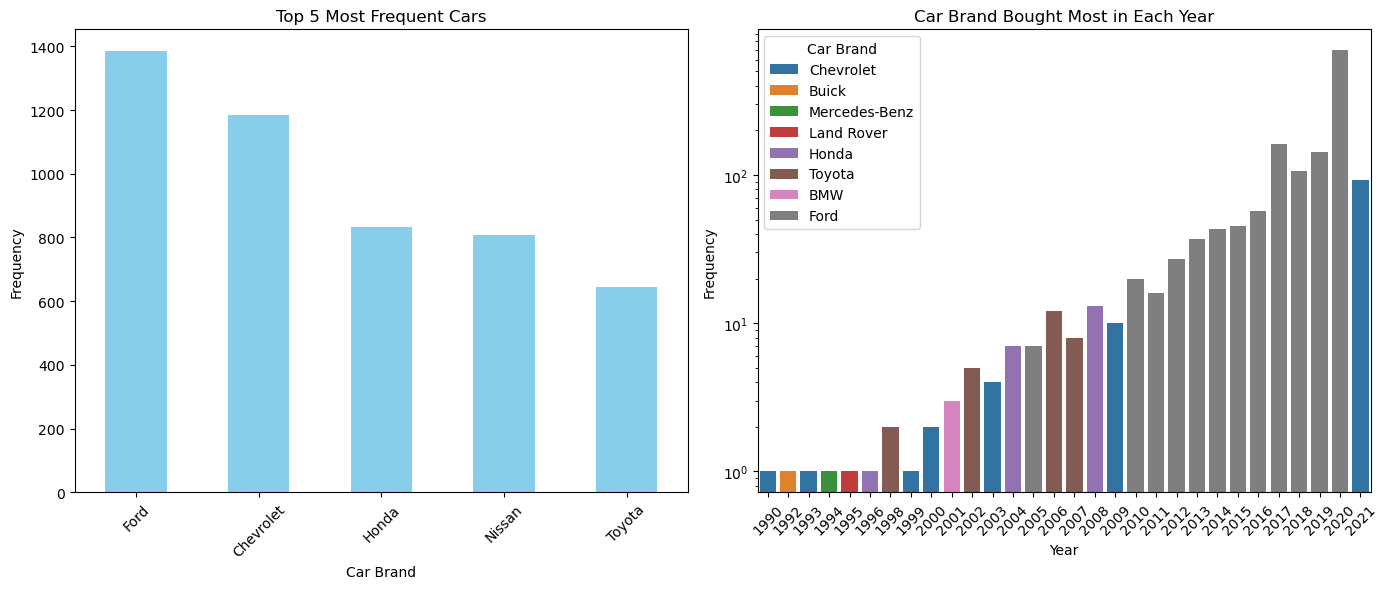

In [6]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plotting top 5 most frequent cars
top_5_makes = df['make_name'].value_counts().head(5)
top_5_makes.plot(kind='bar', color='skyblue', ax=axes[0])
axes[0].set_title('Top 5 Most Frequent Cars')
axes[0].set_xlabel('Car Brand')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', rotation=45)

# Plotting the car brand bought most in each year
car_brand_year = df.groupby(['year', 'make_name']).size().reset_index(name='count')
car_brand_year = car_brand_year.loc[car_brand_year.groupby('year')['count'].idxmax()]
sns.barplot(x='year', y='count', hue='make_name', data=car_brand_year, ax=axes[1])
axes[1].set_title('Car Brand Bought Most in Each Year')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Frequency')
axes[1].legend(title='Car Brand')
axes[1].tick_params(axis='x', rotation=45)

# Adjust y-axis scale to logarithmic scale for car brand bought most in each year plot
axes[1].set_yscale('log')

plt.tight_layout()
plt.show()

# Task 1
## Problem Statement

### Forecasting Problem:
The primary objective of this contest is to forecast the prices of used cars based on their features. Accurate car price predictions are valuable in several real-world contexts:

- **Dealerships and Sellers:** Car dealerships and individual sellers can set competitive prices for their inventory, ensuring quick sales while maximizing profit. Accurately priced vehicles attract more buyers, reducing the time cars spend on the market.
- **Buyers:** Potential car buyers can determine if a car is priced fairly. This helps in making informed purchasing decisions and negotiating better deals.
- **Financial Institutions:** Banks and insurance companies can use these predictions to assess the value of cars for loans and insurance purposes. This minimizes risk and ensures appropriate financial decisions.
- **Market Analysts:** Analysts can track market trends and price fluctuations, providing insights into the automotive market's health and guiding future investments.

Given the train and test datasets from Kaggle, the aim of this project is to predict the prices of the listed car models based on the car’s attributes. We will take the necessary steps, such as cleaning the data, conducting critical analysis, and constructing predictive models to deliver forecasts. In the real world, a company might want to predict the price of a new car model based on the historical data of different car models. The forecast can be used to predict sales and other business metrics. Overall, predictive analytics utilizes current and historical data to make predictions about the future or other unknown events.

### Evaluation Criteria:   

The evaluation metric for this competition is the Mean Absolute Percentage Error (MAPE). MAPE is widely used in time series analysis and regression settings to measure the accuracy of predictive models. A MAPE if 0 indicates perfect accuracy, where the predicted values exactly match the actual values. Lower MAPE values indicate better model accuracy, while higher values suggest poor predictive performance.

$$MAPE = \frac{1}{n} \sum_{i=1}^{n} \lvert {\frac{y_{i}-\hat{y}_i}{y_{i}}} \rvert * 100 $$

- $y_i$: The actual value for the i-th observation.
- $\hat{y}_i$: The predicted value for the i-th observation.
- $n$: The number of observations or data points.

The formula calculates the absolute percentage error for each prediction by taking the absolute difference between the actual and predicted values, divided by the actual value. This gives the percentage error for each data point. The average of these percentage errors is then computed to give the MAPE. Multiplying by 100 converts the error into a percentage, which is easier to interpret.

MAPE expresses prediction accuracy as a percentage, making it easy to interpret and compare across different datasets and models. It provides a clear indication of the average error relative to the actual values, which is particularly useful for evaluating the performance of forecasting models in practical applications.

However, MAPE can be misleading if the actual values $y_i$ are close to zero, as it can result in extremely high percentage errors. Furthermore, it does not capture the direction of errors, only the magnitude, which might not always be sufficient for certain applications. Lastly, it assumes all percentage errors are equally imporatnt, which might not always be the case in scenarios where larger errors have a disproportionate impact.

### Types of Variables/Features:  
39 variables

| Variable Kind | Number of Features | Feature Names |
| --- | --- | --- |
| Numeric | 15 | city_fuel_economy, daysonmarket, dealer_zip, engine_displacement, highway_fuel_economy, horsepower, latitude, longitude, mileage, seller_rating, savings_amount, year, power, torque, price |
| Nominal  | 16 | vin, city, engine_type, exterior_color, franchise_dealer, fuel_type, interior_color, is_new, listed_date, listing_color, make_name, model_name, transmission, transmission_display, wheel_system, body_type |
| Ordinal  | 8 | back_legroom, front_legroom, fuel_tank_volume, height, length, maximum_seating, wheelbase, width |

### Data Summary and Main Data Characteristics:

- **Data Summary**
    - **Data Content**
        - Contains data of vehicle listings and provides the vehicle's specifications and features.
        - Goal is to forecast the prices of listed cars on the basis of car features
    - **Size and Shape**
        - The data consists of 10,000 rows and 39 columns
    - **Datatype Count**
    
<div style="width: 25%;">

| **Datatype** | **Count** |
| --- | --- |
| object               | 25                    |
| float64              | 10                    |
| int64                | 3                    |
| bool                 | 1                     |

</div>

- **Data Details**

### Missing Values:   
In any dataset, missing values are a common occurrence and can stem from various sources such as data entry errors, incomplete data collection, or inconsistencies in recording. They are represented as NaN (Not a Number) or None values in Python. Understanding the presence of missing values in the dataset is crucial as they can impact the quality and reliability of the analysis and predictive models.

In the provided dataset, there are missing values across multiple columns. Here's a breakdown of columns with missing values along with the reasons why they might be mi \ssing:

- **back_legroom, front_legroom, height, length, maximum_seating, width, wheelbase:** These features might have missing values due to inconsistencies in measurement recording or data entry errors during the collection process.

- **city_fuel_economy, highway_fuel_economy:** Missing fuel economy values could be a result of incomplete data collection or reporting, where certain vehicles may not have had their fuel economy measured or recorded properly.

- **engine_displacement, horsepower, torque, fuel_tank_volume:** Missing engine-related attributes could arise from various factors such as data entry errors or incomplete vehicle specifications provided by the manufacturer or dealer.

- **exterior_color, interior_color, power, savings_amount, seller_rating:** These attributes might have missing values due to non-response or incomplete information provided by sellers or dealers.

- **franchise_dealer, fuel_type, transmission, transmission_display, wheel_system:** Missing categorical values could result from data entry errors or inconsistencies in the data recording process.

- **latitude, longitude, mileage:** Missing geographical or mileage data could stem from inaccuracies in the data collection process or technical issues during data transmission or storage.

Understanding the reasons behind missing values is crucial for determining the appropriate handling strategy. Imputation techniques such as mean or median imputation, mode imputation, or advanced methods like predictive modeling or interpolation can be used to fill in missing values based on the nature and context of the data. It's essential to handle missing values carefully to ensure the integrity and reliability of subsequent analyses and predictive modeling tasks.

| Feature Name           | No. of Missing Value
|------------------------|-------
| back_legroom           | 28
| city_fuel_economy      | 349
| engine_displacement    | 27
| engine_type            | 59
| exterior_color         | 155
| franchise_dealer       | 123
| front_legroom          | 28
| fuel_tank_volume       | 28
| fuel_type              | 45
| height                 | 28
| highway_fuel_economy   | 349
| horsepower             | 27
| interior_color         | 1184
| latitude               | 175
| length                 | 28
| maximum_seating        | 28
| mileage                | 431
| power                  | 333
| savings_amount         | 150
| seller_rating          | 129
| torque                 | 365
| transmission           | 134
| transmission_display   | 134
| wheel_system           | 11
| wheelbase              | 28
| width                  | 28
|**Total**               | **4404**

---

## Task 2: Data Cleaning, Missing Observations and Feature Engineering
- In this task you need to follow a set of instructions/questions listed below.
- Make sure you explain each answer carefully both in Markdown text, as well as on your video.

**Total Marks: 12**

Student in charge of this task: `(Beatrice and Rachel)`

**Task 2, Question 1**: Clean **all** numerical features so that they can be used in training algorithms. For instance, back_legroom feature is in object format containing both numerical values and text. Extract numerical values (equivalently eliminate the text) so that the numerical values can be used as a regular feature.  
(2 marks)

In [7]:
# Remove " in" from back_legroom, front_legroom, height, length, wheelbase, width
df['back_legroom'] = df['back_legroom'].str.replace(' in', '')
df['front_legroom'] = df['front_legroom'].str.replace(' in', '')
df['height'] = df['height'].str.replace(' in', '')
df['length'] = df['length'].str.replace(' in', '')
df['wheelbase'] = df['wheelbase'].str.replace(' in', '')
df['width'] = df['width'].str.replace(' in', '')

# Remove " gal" from fuel_tank_volume
df['fuel_tank_volume'] = df['fuel_tank_volume'].str.replace(' gal', '')

# Remove " seats" from maximum_seating
df['maximum_seating'] = df['maximum_seating'].str.replace(' seats', '')

# Change data types to float
df.replace('--', np.nan, inplace=True)
df['back_legroom'] = df['back_legroom'].astype(float)
df['front_legroom'] = df['front_legroom'].astype(float)
df['height'] = df['height'].astype(float)
df['length'] = df['length'].astype(float)
df['wheelbase'] = df['wheelbase'].astype(float)
df['width'] = df['width'].astype(float)
df['fuel_tank_volume'] = df['fuel_tank_volume'].astype(float)
df['maximum_seating'] = df['maximum_seating'].astype(float)

The following features are features that contain numerical information but are accompanied with unit of measurements in text
- fuel_tank_volume
- back_legroom
- front_legroom
- height
- length
- wheelbase
- width
- maximum_seating

In order to clean the data within these columns for easier analysis and computations of numeric variables, the following steps were employed:

1. Removal of unit of measurements in text: For the features back_legroom, front_legroom, fuel_tank_volume, height, length, maximum_seating, wheelbase, and width the textual components ('in', 'gal', 'seats') were removed so that only the numerical values were retained.

2. All numeric variables were also converted into a float data type for analysis later on.

**Task 2, Question 2** Create at least 5 new features from the existing numerical variables which contain multiple items of information, for example you could extract maximum torque and torque rpm from the torque variable.  
(2 marks)

In [8]:
# Extract day, month, year, and day of the week from listed_date
df['listed_date'] = pd.to_datetime(df['listed_date'])
df['listed_day'] = df['listed_date'].dt.day
df['listed_month'] = df['listed_date'].dt.month
df['listed_year'] = df['listed_date'].dt.year
df['listed_dayofweek'] = df['listed_date'].dt.day_name()

df.drop(columns=['listed_date'], inplace=True)

# Extract hp and RPM from power and place into 2 columns maximum_power and power_rpm
# Function to split power string and extract power and RPM
def split_power(text):
    if pd.notna(text):
        parts = str(text).split('@')
        if len(parts) == 2:
            power_part = parts[0].strip()
            rpm_part = parts[1].strip()
            # Extract power value and RPM
            power_value = power_part.split('hp')[0].strip()
            rpm_value = rpm_part.split('RPM')[0].replace(',', '').strip()
            return power_value, rpm_value
    return None, None

# Apply the function to split power and extract power value and RPM
df[['maximum_power', 'power_rpm']] = df['power'].apply(lambda x: pd.Series(split_power(x)))

# Drop the original column containing the combined power info
df.drop(columns=['power'], inplace=True)

# Convert 'power_rpm' and 'maximum_power' to numerical data types
df['power_rpm'] = pd.to_numeric(df['power_rpm'], errors='coerce')
df['maximum_power'] = pd.to_numeric(df['maximum_power'], errors='coerce')

# Extract lb-ft and RPM from torque and place into maximum_torque and torque_rpm
# Function to split torque string and extract torque and RPM
def split_torque(text):
    if pd.notna(text):
        parts = text.split('@')
        if len(parts) == 2:
            torque_part = parts[0].strip()
            rpm_part = parts[1].strip()
            # Extract torque value and RPM
            torque_value = torque_part.split('lb-ft')[0].strip()
            rpm_value = rpm_part.split('RPM')[0].replace(',', '').strip()
            return torque_value, rpm_value
    return None, None

# Apply the function to split torque and extract torque value and RPM
df[['maximum_torque', 'torque_rpm']] = df['torque'].apply(lambda x: pd.Series(split_torque(str(x))))

# Drop the original column containing the combined torque info
df.drop(columns=['torque'], inplace=True)

# Convert the 'maximum_torque' column to numeric and coerce errors to NaN in the original DataFrame
df['maximum_torque'] = pd.to_numeric(df['maximum_torque'], errors='coerce')

# Sort the unique values in ascending order
unique_maximum_torque = np.sort(df['maximum_torque'].unique())
print(unique_maximum_torque)


# Convert the 'torque_rpm' column to numeric and coerce errors to NaN in the original DataFrame
df['torque_rpm'] = pd.to_numeric(df['torque_rpm'], errors='coerce')

# Sort the unique values in ascending order
unique_torque_rpm = np.sort(df['torque_rpm'].unique())
print(unique_torque_rpm)

#df.head

[ 74.  98. 103. 105. 106. 107. 110. 111. 112. 113. 114. 118. 119. 122.
 123. 125. 126. 127. 128. 129. 130. 131. 132. 133. 136. 137. 138. 139.
 140. 141. 144. 145. 146. 147. 148. 149. 150. 151. 152. 154. 155. 156.
 160. 161. 162. 163. 165. 166. 167. 168. 169. 170. 171. 172. 173. 174.
 175. 176. 177. 178. 179. 180. 181. 182. 183. 184. 185. 186. 188. 190.
 191. 192. 193. 195. 196. 199. 200. 201. 203. 205. 206. 207. 209. 210.
 214. 215. 216. 217. 220. 221. 222. 223. 225. 226. 227. 229. 230. 232.
 233. 234. 235. 236. 237. 238. 239. 240. 242. 244. 245. 246. 247. 248.
 249. 250. 251. 252. 253. 254. 255. 256. 257. 258. 259. 260. 261. 262.
 263. 264. 265. 266. 267. 268. 269. 270. 271. 272. 273. 274. 275. 276.
 277. 278. 280. 281. 282. 284. 285. 287. 288. 290. 291. 293. 295. 300.
 305. 306. 309. 310. 315. 320. 322. 324. 325. 329. 330. 331. 332. 334.
 335. 336. 338. 339. 340. 345. 346. 347. 350. 354. 360. 365. 368. 369.
 370. 373. 375. 376. 379. 380. 383. 384. 385. 387. 390. 391. 393. 394.
 395. 

The 3 numerical variables chosen to derive new features are power, torque, and listed_date.

1. An example of information in power is "158 hp @ 6,500 RPM" where 158 hp represents the maximum power and 6,500 RPM represents the revolutions per minute. We split the data and put it into 2 columns where 158 hp would be placed in a new column called maximum_power and 6,500 RPM would be placed in another new column called power_rpm. The columns are then cleaned by removing the unit of measurement 'hp' and 'RPM', leaving numerical values for analysis and computations.
2. An example of information in torque is "138 lb-ft @ 4,200 RPM" where 138 lb-ft represents the maximum torque and 4,200 RPM represents the revolutions per minute. We split the data and put it into 2 columns where 138 lb-ft would be placed in a new column called maximum_torque and 6,500 RPM would be placed in another new column called torque_rpm. The columns are then cleaned by removing the unit of measurement 'lb-ft' and 'RPM', leaving numerical values for analysis and computations.
3. An example of information in listed_date is 2020-03-07 which is in the format YYYY-MM-DD. From this, we generated 4 new features called listed_month, listed_day, listed_year, and listed_dayofweek

All original columns were dropped, leaving the newly extracted features. A total of 8 new features were created.

| Original Feature | Number of New Features Generated | Feature Names |
| --- | --- | --- |
| power | 2 | maximum_power, power_rpm |
| torque  | 2 | maximum_torque, torque_rpm |
| listed_date  | 4 | listed_month, listed_day, listed_year, and listed_dayofweek |

**Task 2, Question 3**: Impute the missing values for all features in both the training and test datasets.   
(3 marks)

In [9]:
## Task 2, Question 3 Code Here

# columns to impute with mean
cols_mean = ['back_legroom', 'front_legroom', 'fuel_tank_volume', 'height', 'length', 'wheelbase', 'width',
                     'city_fuel_economy', 'engine_displacement', 'highway_fuel_economy', 'horsepower', 'latitude',
                     'mileage', 'savings_amount', 'seller_rating']

# Impute missing values with the mean of each column
for column in cols_mean:
    df[column] = df[column].fillna(df[column].mean())


# List of columns to impute missing values with mode
cols_mode = ['maximum_seating', 'maximum_power', 'power_rpm', 'maximum_torque', 'torque_rpm',
                          'exterior_color', 'transmission_display', 'engine_type', 'franchise_dealer',
                          'fuel_type', 'interior_color', 'transmission', 'wheel_system']

# Impute missing values with the mode of each column
for column in cols_mode:
    mode_value = df[column].mode()[0]  # Calculate the mode value
    df[column] = df[column].fillna(mode_value)

df.head()

vin  back_legroom        body_type      city  \
0  2HGFC2F60LH543004          37.4            Sedan     Indio   
1  3VW2B7AJ7HM347446          38.1            Sedan   Houston   
2  WBAJA5C36HG897684          36.5            Sedan     Vista   
3  2GKFLWEK3F6333294          39.9  SUV / Crossover  Ft Myers   
4  5N1AT2MV0LC786510          37.9  SUV / Crossover      Avon   

   city_fuel_economy  daysonmarket  dealer_zip  engine_displacement  \
0               30.0           189       92203               2000.0   
1               28.0            12       77074               1400.0   
2               24.0            10       92081               2000.0   
3               20.0             2       33905               2400.0   
4               25.0           195       46123               2500.0   

  engine_type          exterior_color  ...  year    price  listed_day  \
0          I4    Cosmic Blue Metallic  ...  2020  21605.0           7   
1          I4                   Black  ...  2017  11991.0          30   
2          I4  Dark Graphite Metallic  ...  2017  31974.0           2   
3          I4              Onyx Black  ...  2015  14550.0           8   
4          I4    Magnetic Black Pearl  ...  2020  23500.0          29   

  listed_month  listed_year  listed_dayofweek  maximum_power power_rpm  \
0            3         2020          Saturday          158.0    6500.0   
1            8         2020            Sunday          150.0    5000.0   
2            9         2020         Wednesday          248.0    5200.0   
3            9         2020           Tuesday          301.0    6500.0   
4            2         2020          Saturday          170.0    6000.0   

   maximum_torque  torque_rpm  
0           138.0      4200.0  
1           184.0      1600.0  
2           258.0      1500.0  
3           272.0      4800.0  
4           175.0      4400.0  

[5 rows x 44 columns]

The following steps were taken to impute the missing values in the dataset:
1. **Identified features with missing values:** The features that contained missing values were identified from Task 1.

2. **Identified features with continuous data:** Features with continuous numerical values had their missing values imputed by the mean. This is the average of the data points within each column. By imputing the mean, it would maintain the distribution of the data.

3. **Identified features with discrete data:** Features with discrete categorical data were imputed with mode. As this is the most frequently occuring data point and will be within the categories defined.

**Task 2, Question 4**: Encode all categorical variables appropriately as discussed in class.

- Where multiple values are given for an observation encode the observation as 'other'.
- Where a categorical feature contains more than 5 unique values, map the features into 5 most frequent values + 'other' and then encode appropriately. For instance, map colours into 5 basic colours + 'other': [red, yellow, green, blue, purple, other] and then encode.  
(2 marks)

In [10]:
# Function to extract the last word from a string
def extract_last_word(text):
    if pd.notna(text) and isinstance(text, str):
        return text.split()[-1]
    return ''

# Apply the function to extract the last word and create the 'exterior_finish' column
df['exterior_finish'] = df['exterior_color'].apply(extract_last_word)
df.loc[df['exterior_finish'].isin(['Black', 'White', 'Gray', 'Silver', 'Blue', 'Red','', 'Mica', 'WHITE', 'BLACK']), 'exterior_finish'] = np.nan

# Metallic Data cleaning
def replace_metallic1(text):
    if pd.notna(text) and isinstance(text, str):
        import re
        # Define the variations to be replaced with "Metallic"
        variations = ['METALLIC', 'CORALREDMETAL', 'Metallilc','metallic', 'Metallic', 'Metallic)','METALIC', 'METAL', 'Metallilc', 'Metallic', 'METALLI', 'METALL', 'Metalic', 'Metall', 'Metalli']
        # Create a regular expression pattern to match any of the variations
        pattern = '|'.join(r'\b{}\b'.format(re.escape(var)) for var in variations)
        # Perform the replacement using the regular expression pattern
        return re.sub(pattern, 'Metallic', text)
    return text

# Pearlcoat data cleaning
def replace_pearlcoat(text):
    if pd.notna(text) and isinstance(text, str):
        import re
        # Define the variations to be replaced with "Pearlcoat"
        variations = ['PEARL', 'Pearlcoa', 'Pearl', 'Pear']
        # Create a regular expression pattern to match any of the variations
        pattern = '|'.join(r'\b{}\b'.format(re.escape(var)) for var in variations)
        # Perform the replacement using the regular expression pattern
        return re.sub(pattern, 'Pearlcoat', text)
    return text

# Clearcoat data cleaning
def replace_clearcoat(text):
    if pd.notna(text) and isinstance(text, str):
        import re
        # Define the variations to be replaced with "Clearcoat"
        variations = ['clearcoat', 'Clearcoat\)']
        # Create a regular expression pattern to match any of the variations
        pattern = '|'.join(r'\b{}\b'.format(re.escape(var)) for var in variations)
        # Perform the replacement using the regular expression pattern
        return re.sub(pattern, 'Clearcoat', text)
    return text

# Tricoat data cleaning
def replace_tricoat(text):
    if pd.notna(text) and isinstance(text, str):
        import re
        # Define the variations to be replaced with "Tricoat"
        variations = ['Tri-Coat', 'TRICOAT', 'TRI-COAT', 'Tricoat)', 'Tricoat-CO', 'tricoat', 'TRI-Coat', 'TRI', 'Tri-Coat)', 'TRI-CO']
        # Create a regular expression pattern to match any of the variations
        pattern = '|'.join(r'\b{}\b'.format(re.escape(var)) for var in variations)
        # Perform the replacement using the regular expression pattern
        return re.sub(pattern, 'Tricoat', text)
    return text

# Tintcoat data cleaning
def replace_tintcoat(text):
    if pd.notna(text) and isinstance(text, str):
        import re
        # Define the variations to be replaced with "Tintcoat"
        variations = ['Tint', 'TINTED', 'TINTCOAT', 'Tinted']
        # Create a regular expression pattern to match any of the variations
        pattern = '|'.join(r'\b{}\b'.format(re.escape(var)) for var in variations)
        # Perform the replacement using the regular expression pattern
        return re.sub(pattern, 'Tintcoat', text)
    return text


# Apply the function unify categories in column
df['exterior_finish'] = df['exterior_finish'].apply(replace_metallic1)
df['exterior_finish'] = df['exterior_finish'].apply(replace_pearlcoat)
df['exterior_finish'] = df['exterior_finish'].apply(replace_clearcoat)
df['exterior_finish'] = df['exterior_finish'].apply(replace_tricoat)
df['exterior_finish'] = df['exterior_finish'].apply(replace_tintcoat)

print(df['exterior_finish'].value_counts())


Metallic       2587
Pearlcoat       988
Clearcoat       631
Tricoat         220
Tintcoat         92
               ... 
Green)            1
OXFORD            1
01j9              1
RAINFOREST_       1
Ember             1
Name: exterior_finish, Length: 315, dtype: int64


In [11]:
# Splitting the 'interior_color' column into two separate columns using two separators '(' and '/'
df[['interior_colors', 'interior_finish']] = df['interior_color'].str.split('[(/]', 1, expand=True)

# Removing the trailing ')' from the 'interior_finish' column
df['interior_finish'] = df['interior_finish'].str.rstrip(')')

# Find rows containing 'black' in 'interior_colors' column and replace the entire string with top 5 interior color
df.loc[df['interior_colors'].str.contains(r'(?i)black'), 'interior_colors'] = 'Black'
df.loc[df['interior_colors'].str.contains(r'(?i)gray'), 'interior_colors'] = 'Gray'
df.loc[df['interior_colors'].str.contains(r'(?i)grey'), 'interior_colors'] = 'Gray'
df.loc[df['interior_colors'].str.contains(r'(?i)brown'), 'interior_colors'] = 'Brown'
df.loc[df['interior_colors'].str.contains(r'(?i)white'), 'interior_colors'] = 'White'
df.loc[df['interior_colors'].str.contains(r'(?i)red'), 'interior_colors'] = 'Red'


# Displaying the updated DataFrame
df.head()

#Top 5 interior_finish data cleaning
# Find rows containing 'black' in 'interior_finish' column and replace the entire string with top 5 interior finish
df['interior_finish'].fillna('NA', inplace=True)
df.loc[df['interior_finish'].str.contains(r'(?i)charcoal'), 'interior_finish'] = 'Charcoal'
df.loc[df['interior_finish'].str.contains(r'(?i)ebony'), 'interior_finish'] = 'Ebony'
df.loc[df['interior_finish'].str.contains(r'(?i)beige'), 'interior_finish'] = 'Beige'
df.loc[df['interior_finish'].str.contains(r'(?i)black'), 'interior_finish'] = 'Black'
df.loc[df['interior_finish'].str.contains(r'(?i)tan'), 'interior_finish'] = 'Tan'
df['interior_finish'].value_counts()

NA                   7210
Ebony                 577
Charcoal              478
Beige                 303
Black                 205
                     ... 
Destination Theme       1
CLOTH                   1
Amber Lth               1
Blk Clth Fabric         1
Medium Graystone        1
Name: interior_finish, Length: 408, dtype: int64

In [12]:
categorical_features = ['body_type', 'city', 'engine_type', 'exterior_color', 'fuel_type', 'interior_color',
                        'listing_color', 'make_name', 'model_name', 'transmission', 'wheel_system',
                        'transmission_display', 'interior_colors', 'interior_finish', 'listed_dayofweek', 'exterior_finish']

# Calculate the top 5 values for each categorical feature in the dataset
top_5_values_dict = {}
for feature in categorical_features:
    top_5_values = df[feature].value_counts().nlargest(5).index
    top_5_values_dict[feature] = top_5_values

# Map features into 5 most frequent values + other
for feature in categorical_features:
    df[feature] = df[feature].where(df[feature].isin(top_5_values_dict[feature]) | df[feature].isna(), 'other')

dummy_variables = pd.get_dummies(df[categorical_features])
df = pd.concat([df, dummy_variables], axis=1)

# Drop the original categorical features
df.drop(categorical_features, axis=1, inplace=True)
df.columns.tolist()

['vin',
 'back_legroom',
 'city_fuel_economy',
 'daysonmarket',
 'dealer_zip',
 'engine_displacement',
 'franchise_dealer',
 'front_legroom',
 'fuel_tank_volume',
 'height',
 'highway_fuel_economy',
 'horsepower',
 'is_new',
 'latitude',
 'length',
 'longitude',
 'maximum_seating',
 'mileage',
 'savings_amount',
 'seller_rating',
 'wheelbase',
 'width',
 'year',
 'price',
 'listed_day',
 'listed_month',
 'listed_year',
 'maximum_power',
 'power_rpm',
 'maximum_torque',
 'torque_rpm',
 'body_type_Coupe',
 'body_type_Minivan',
 'body_type_Pickup Truck',
 'body_type_SUV / Crossover',
 'body_type_Sedan',
 'body_type_other',
 'city_Columbus',
 'city_Houston',
 'city_Las Vegas',
 'city_Miami',
 'city_San Antonio',
 'city_other',
 'engine_type_H4',
 'engine_type_I4',
 'engine_type_V6',
 'engine_type_V6 Flex Fuel Vehicle',
 'engine_type_V8',
 'engine_type_other',
 'exterior_color_Black',
 'exterior_color_Gray',
 'exterior_color_Silver',
 'exterior_color_Summit White',
 'exterior_color_White',


**Identifying Categorical Features:**
We start by defining a list of 'categorical features' in our dataset. These features are stored in the 'categorical_features' list. The features include attributes like 'body_type', 'city', 'engine_type', etc.

**Calculating the top 5 values for each Feature:**
We initialize an empty dictionary called 'top_5_values_dict'. For each feature in the 'categorical_features' list, we calculate the top 5 most frequent values using the value_counts().nlargest(5) method on the feature column of the DataFrame 'df'. These top 5 values for each feature are then stored in the 'top_5_values_dict' dictionary, with the feature name as the key and the top 5 values as the value (an index object).

**Mapping features to top 5 Values or 'Other':**
We loop through each feature in the 'categorical_features' list again. For each feature, we use the 'where' method to keep only the values that are in the top 5 most frequent values (or NaN values), and all other values are replaced with the string 'other'. This is done to reduce the number of unique categories for each feature to six (the top 5 values plus 'other').

**Creating Dummy Variables:**
We use the 'pd.get_dummies' function to convert the modified categorical features into dummy variables (one-hot encoding). The 'drop_first=True' parameter is used to avoid the dummy variable trap by dropping the first category in each feature, reducing multicollinearity. This results in a new DataFrame called 'dummy_variables' containing the dummy variables for each feature.

**Concatenating Dummy Variables with Original DataFrame:**
We concatenate the 'dummy_variables' DataFrame to the original DataFrame 'df' along the column axis (axis=1). This adds the new dummy variable columns to our original DataFrame.

**Dropping Original Categorical Features:**
Finally, we drop the original categorical feature columns from the DataFrame 'df' using the 'drop' method. This leaves us with a DataFrame that contains the new dummy variable columns instead of the original categorical columns.

By following these steps, we effectively reduce the complexity of our categorical features and prepare the data for modeling by converting categorical variables into a numerical format suitable for machine learning algorithms.

**Task 2, Question 5**: Perform any other actions you think need to be done on the data before constructing predictive models, and clearly explain what you have done.   
(1 marks)

In [13]:
## Task 2, Question 5 Code Here

## scaling all the numerical data feature

scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('price')
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [14]:
# Compute correlations with 'price'
correlations = df.corrwith(df['price'])

# Find insignificant correlations (absolute correlation < 0.2)
insignificant_correlations = correlations[abs(correlations) < 0.2]

# Get the feature names from the insignificant correlations
insignificant_features = insignificant_correlations.index.tolist()

In [15]:
# Get all feature names from the dataframe
all_features = df.columns.tolist()

# Filter out the insignificant features
selected_features = [feature for feature in all_features if feature not in insignificant_features]

# Further filter out the 'price' and 'vin' columns
selected_features = [feature for feature in selected_features if feature not in ['price', 'vin']]

# Display the final list of selected features
selected_features

['back_legroom',
 'city_fuel_economy',
 'engine_displacement',
 'franchise_dealer',
 'fuel_tank_volume',
 'height',
 'highway_fuel_economy',
 'horsepower',
 'is_new',
 'length',
 'mileage',
 'wheelbase',
 'width',
 'year',
 'maximum_power',
 'maximum_torque',
 'body_type_Pickup Truck',
 'body_type_Sedan',
 'engine_type_I4',
 'engine_type_V8',
 'fuel_type_other',
 'wheel_system_4WD',
 'wheel_system_FWD']

Feature scaling is a preprocessing technique used to standardize the range of independent variables or features in the data. The goal is to ensure that all features have a similar scale to prevent features with larger magnitudes from dominating those with smaller magnitudes during model training.

1. **Defining the scaler:** An instance of StandardScaler is created and stored in the variable 'scaler'. StandardScaler is a preprocessing technique that scales numerical features so that they have a mean of 0 and a standard deviation of 1, making the distribution of values more Gaussian-like.

2. **Selecting numerical columns:** The 'select_dtypes' method is used to filter out columns in the DataFrame that have data types of float64 or int64, representing numerical features. The 'drop('price')' method is then applied to remove the target variable 'price' from the list of numerical columns, ensuring that it is not scaled along with the other features.

3. **Scaling numerical features:** The 'fit_transform' method of the StandardScaler object is applied to the numerical columns selected in the previous step. This method both fits the scaler to the data and transforms it, resulting in the standardized values.

4. **Updating the DataFrame:** The scaled numerical features are assigned back to their respective columns in the DataFrame 'df', replacing the original values.

Next, we compute Correlations between each feature in the dataset and the target variable 'price'. This helps identify features that have a strong linear relationship with the target variable features with absolute correlations less than 0.2 with the target variable were considered insignificant. These features may have weak linear relationships with the target and might not contribute significantly to predictive modeling. Features identified as insignificant based on their correlations with the target variable were filtered out from the list of all features. Additionally, specific columns such as 'price', and 'vin' were further excluded from the selected features list. The final list of selected features, excluding insignificant features and specific columns, was displayed. These selected features are deemed potentially more relevant for constructing predictive models.

Overall, these preprocessing actions ensure that the data is appropriately scaled and that only significant features are retained for predictive modeling, which can improve model performance and interpretability.

**Task 2, Question 6**: Perform some EDA to measure the relationship between the features and the target and carefully explain your findings.
(2 marks)

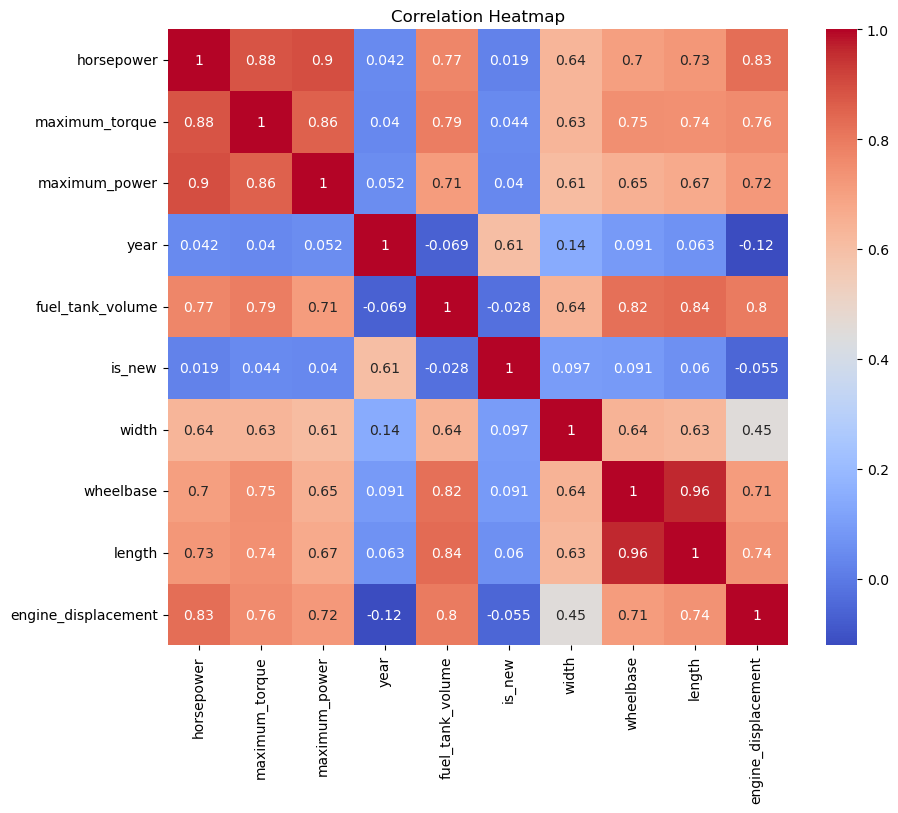

In [16]:
## Task 2, Question 6 Code Here

correlation = df.corr()
sorted_corr = correlation['price'].sort_values(ascending=False)

# Select the top correlated columns, excluding 'price'
top_corr_cols = sorted_corr[sorted_corr.index != 'price'].index[:10]

# Create a subset DataFrame with the top correlated columns
subset_df = df[top_corr_cols]

# Create the correlation matrix for the subset DataFrame
subset_corr = subset_df.corr()

# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(subset_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

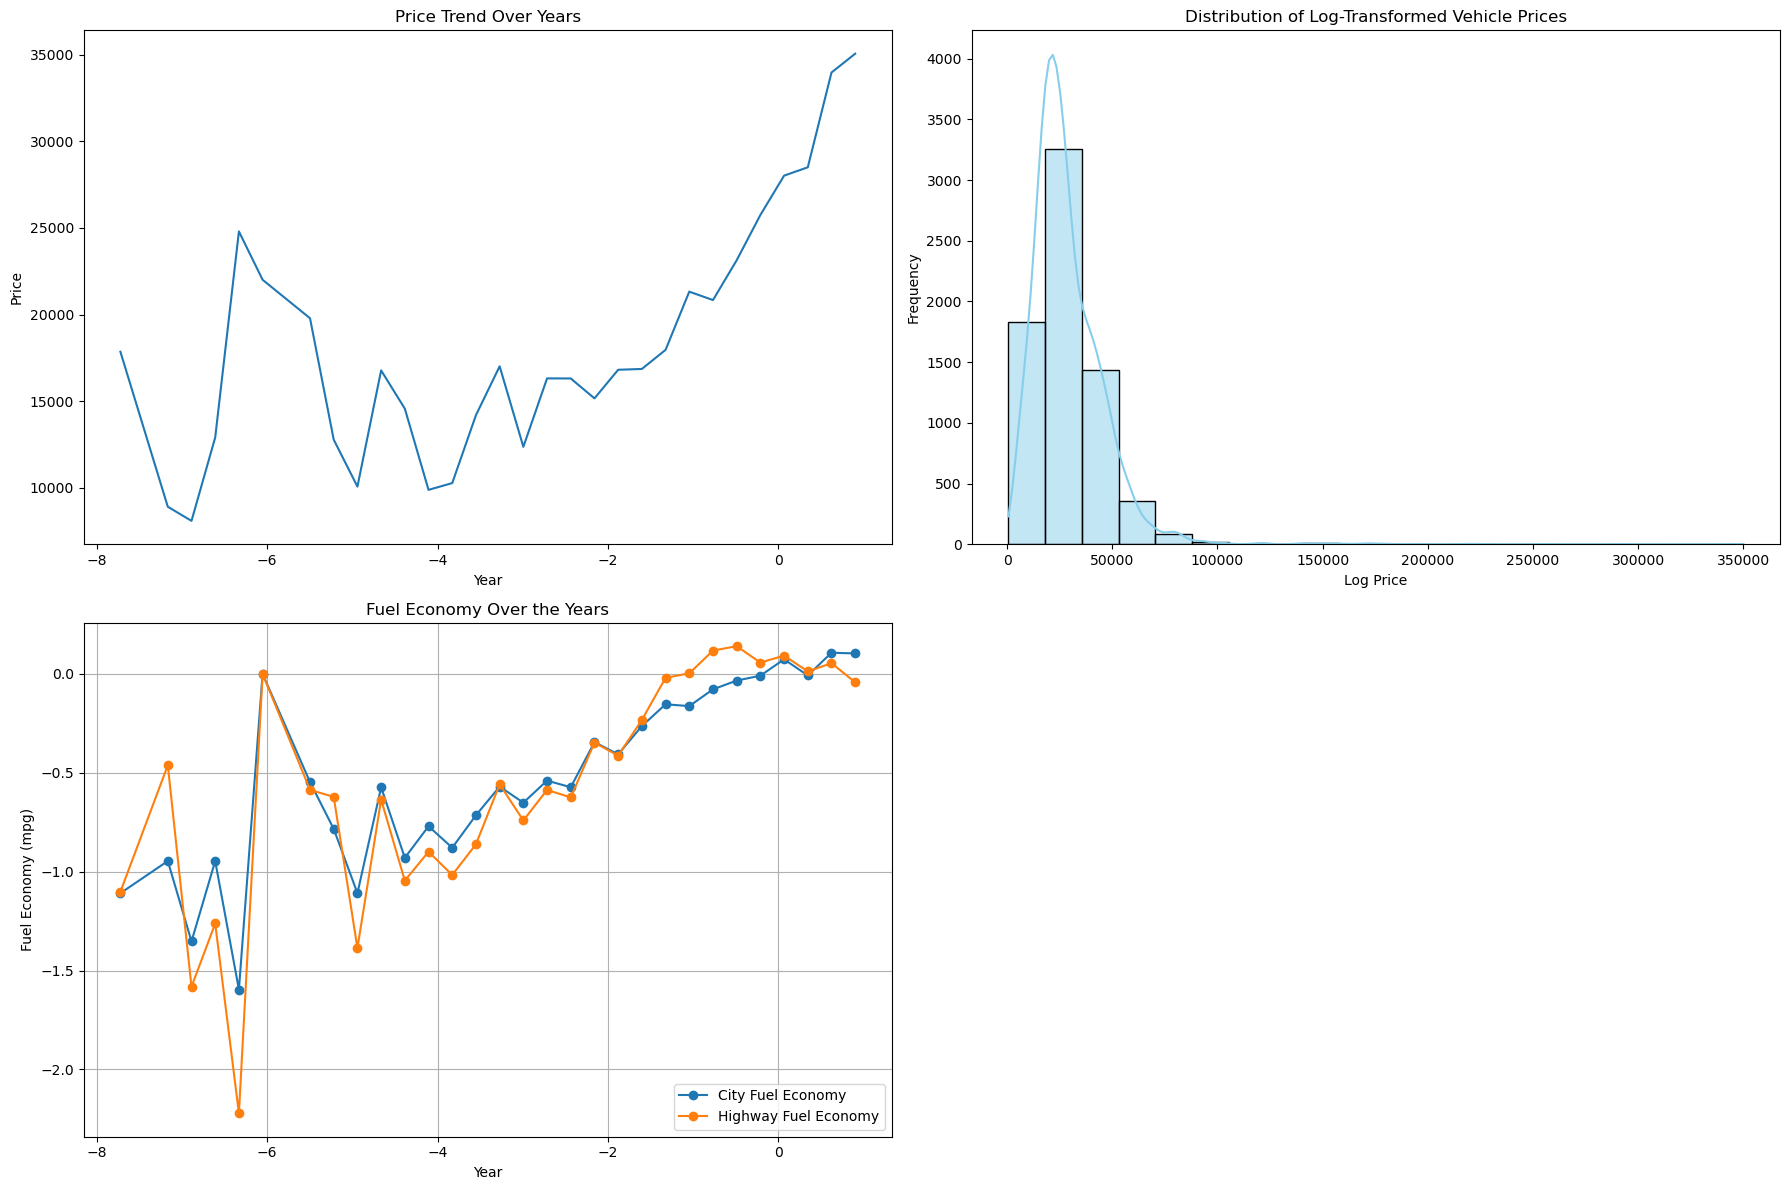

In [17]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Price trend over years
sns.lineplot(x='year', y='price', data=df, ci=None, ax=axes[0, 0])
axes[0, 0].set_title('Price Trend Over Years')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Price')

# Distribution of vehicle prices
sns.histplot(df['price'], bins=20, kde=True, color='skyblue', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Vehicle Prices')
axes[0, 1].set_xlabel('Price')
axes[0, 1].set_ylabel('Frequency')

# Fuel economy over the years
df_grouped = df.groupby('year').agg({
    'city_fuel_economy': 'mean',
    'highway_fuel_economy': 'mean'
}).reset_index()

axes[1, 0].plot(df_grouped['year'], df_grouped['city_fuel_economy'], label='City Fuel Economy', marker='o')
axes[1, 0].plot(df_grouped['year'], df_grouped['highway_fuel_economy'], label='Highway Fuel Economy', marker='o')
axes[1, 0].set_title('Fuel Economy Over the Years')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Fuel Economy (mpg)')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Remove the unused last subplot
fig.delaxes(axes[1, 1])

plt.tight_layout()
plt.show()

In [18]:
# List of features
features = [col for col in df.columns if col != 'price']

# Compute the correlation with 'price'
price_corr = df[['price'] + features].corr()['price'].drop('price')

#Display the top 5 correlated features with 'price'
print(price_corr.abs().sort_values(ascending=False).head(20))

horsepower              0.618147
maximum_torque          0.602940
maximum_power           0.593351
mileage                 0.480533
year                    0.462949
fuel_tank_volume        0.415915
is_new                  0.407299
width                   0.398075
wheel_system_FWD        0.392537
wheelbase               0.385905
length                  0.382032
engine_displacement     0.378950
highway_fuel_economy    0.371216
city_fuel_economy       0.340206
engine_type_I4          0.330155
engine_type_V8          0.329618
height                  0.314281
franchise_dealer        0.295939
back_legroom            0.275125
wheel_system_4WD        0.274448
Name: price, dtype: float64


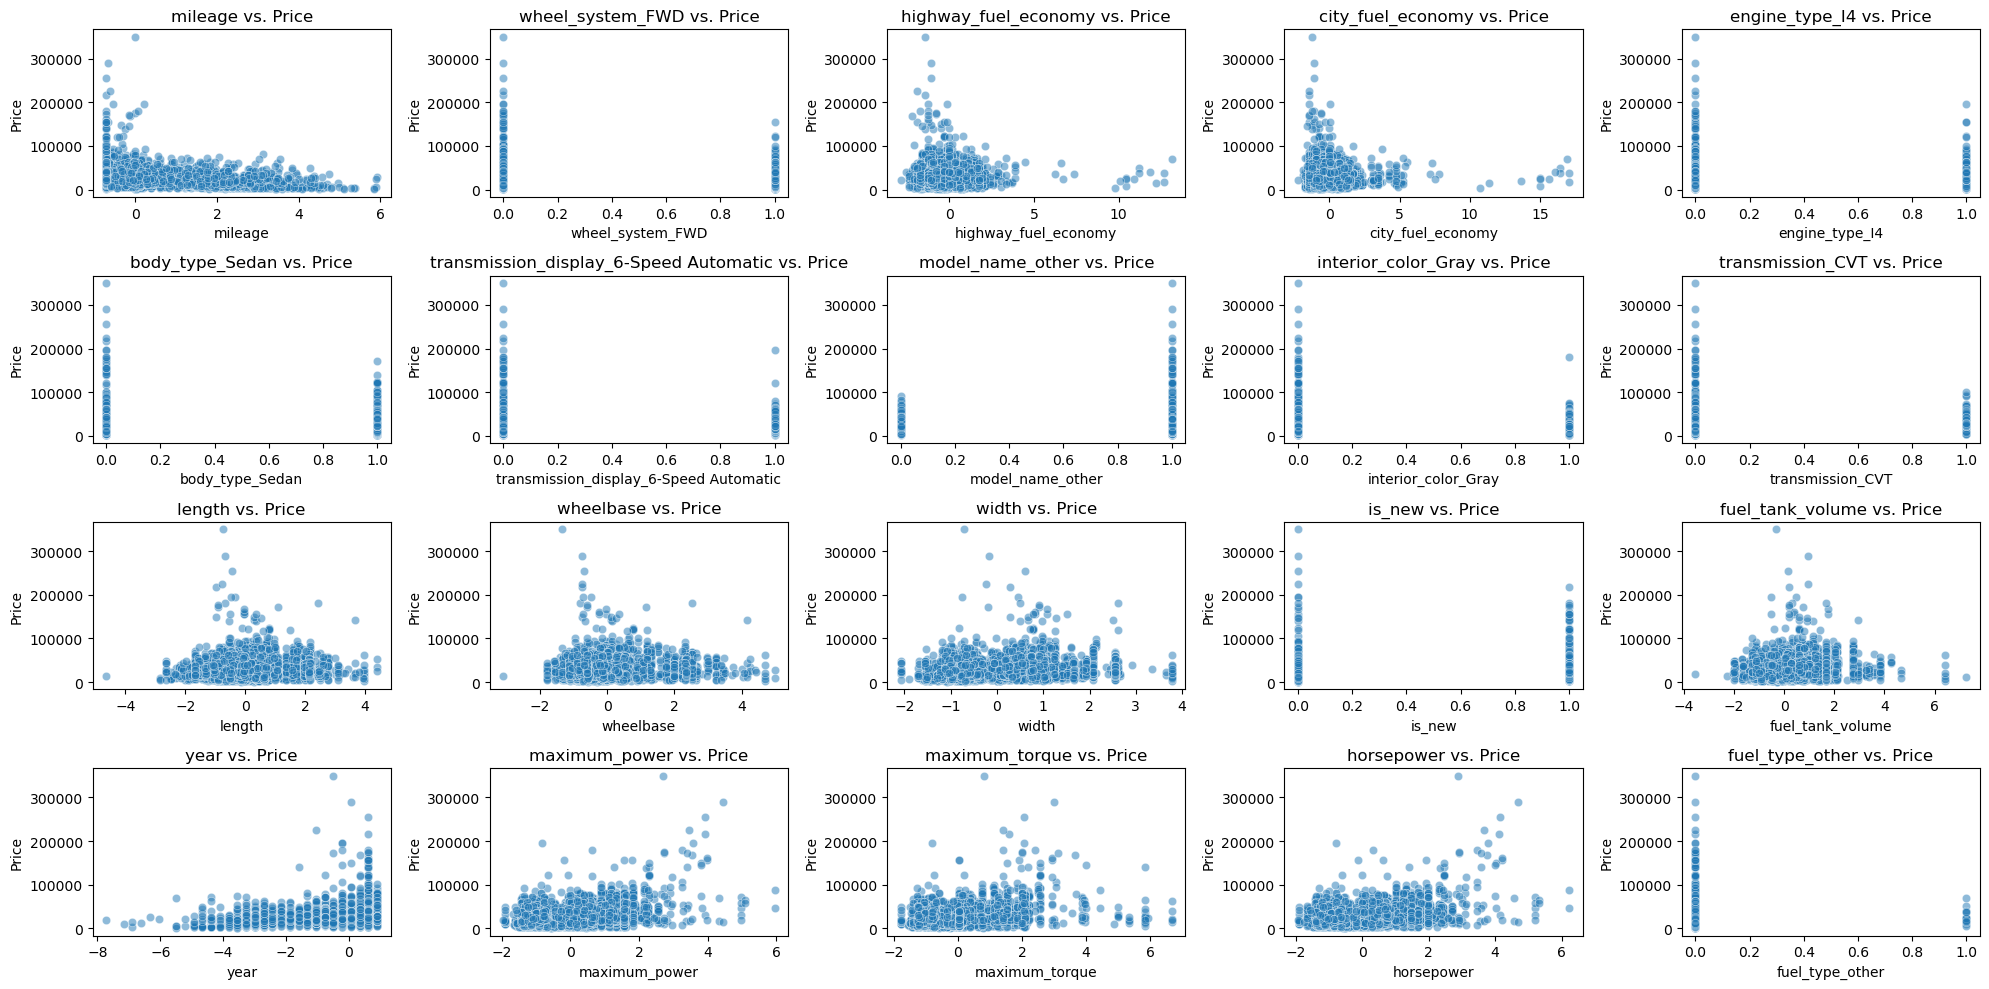

In [19]:
# Compute the correlation with 'price'
price_corr = df[['price'] + features].corr()['price'].drop('price')

# Select top 10 positive and top 10 negative correlations
top_correlations = price_corr.sort_values().head(10).append(price_corr.sort_values().tail(10))

# Create a grid of scatterplots
plt.figure(figsize=(20, 10))

# Iterate over the selected features and plot them in the grid
for idx, feature in enumerate(top_correlations.index):
    plt.subplot(4, 5, idx+1)
    sns.scatterplot(data=df, x=feature, y='price', alpha=0.5)
    plt.title(f"{feature} vs. Price")
    plt.xlabel(feature)
    plt.ylabel("Price")

# Adjust the layout for better visibility
plt.tight_layout()
plt.show()

We perform a thorough EDA that not only identifies important features but also provides a visual understanding of how these features interact with the target variable 'price'.

1. **Correlation Heatmap:** It is done to visualize the relationships between the features and the target variable (price) and among the features themselves. This helps to identify which features have the strongest linear relationships with price, both positively and negatively.

2. **Price Trend:** We then understand the distribution of price, its trend over the years, and how fuel economy metrics have evolved. These graphs provides insights into how prices and fuel economy have changed over time.

3. **Correlation with Price:** We identify and display the top 5 features that have the highest absolute correlation with price. his highlights the features that are most strongly associated with the price, which can be important for predictive modeling and understanding key drivers of price.

4. **Scatterplots of Top Correlations:** To visually explore the relationships between the most strongly correlated features (both positive and negative) and the target variable price. This visual analysis helps to understand the nature (linear, non-linear, etc.) and strength of the relationships between the top correlated features and the price, aiding in feature selection and model interpretation.

---
## Task 3: Fit and tune a forecasting model, submit predictions & win competition

Make sure you **clearly explain each step** you do both in Markdown and on the recoded video.   
*In this task you must not create any additional features and should only relly on the datasets constructed in Task 2.*

1. Build and explain at least 3 machine learning (ML) regression models taking into account the outcomes of Tasks 1 & 2 (3 marks)    
2. Fit the models and tune hyperparameters via cross-validation: make sure you comment and explain each step clearly (3 marks)   
3. Select your best algorithm, create predictions using the test dataset, and submit your predictions on Kaggle's competition page. Make sure you explain all the steps that led you to chose this algorithm both in the video presentation and in your written answer. (4 marks)   
4. Provide Kaggle ranking and score (screenshot your final submission) and comment (e.g. how could you improve your ranking?) (2 mark)   

- Hints:
    - To perform well you will need to iterate Tasks 2 and Task 3
    - Make sure your Python code works, so that a marker that can replicate your Kaggle submission and score.
    - You will receive the mark of zero if your code does not produce the forecasts uploaded to Kaggle

**Total Marks: 12**

Student in charge of this task: `(Beatrice and Rachel)`

## Model Training with Selected Features
After the relevant features have been identified, we train our predictive model. The df is then split back into the train and test sets `df_train` and `df_test`. Where `X` has the features and `y` has the target variable price. For each model, we used the train_test_split on `df_train` from sklearn in order to train the model on a subset of the data with complete target variables and validate the performance of the model. The test size set is 0.2 which means that 20% of the data will be used to predict while 80% of the data will be for training the model. The `random_state=42` ensures that the results obtained from the model are reproducible, as it controls the shuffling applied to the data before the split.

In [20]:
#Train dataset
df_train = df[df['price'].notnull()]
X = df_train[selected_features]
y = df_train['price']

#Test dataset
df_test = df[df['price'].isnull()]
X_test = df_test[selected_features]
y_test = df_test['price']

## Linear Regression

In [22]:
# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with a linear regression model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regression', LinearRegression())
])

# Define hyperparameters to tune
parameters = {
    'regression__fit_intercept': [True, False]
}

# Perform GridSearchCV for hyperparameter tuning with cross-validation using MAPE as scoring
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)
grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring=mape_scorer)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Print the best parameters found
print("Best Parameters for Linear Regression:", grid_search.best_params_)

# Perform cross-validation on the training data
y_pred = cross_val_predict(best_model, X_train, y_train, cv=5)

# Calculate MAPE on the training data
train_mape = mean_absolute_percentage_error(y_train, y_pred)
print("Validation MAPE:", train_mape)

Best Parameters for Linear Regression: {'regression__fit_intercept': True}
Validation MAPE: 0.27023562370312065


### Hyperparameter Tuning with Linear Regression and GridSearchCV

The code illustrates how to use a pipeline and GridSearchCV with cross-validation to train and optimise a linear regression model. A pipeline is built to standardise the data and apply the regression model after the data is divided into training and validation sets. In order to tune the hyperparameters (fit_intercept), GridSearchCV is used, and the scoring measure is mean absolute percentage error (MAPE). The optimal model is determined and its best hyperparameter is printed. This model is used to make cross-validation predictions on the training set. Performance is evaluated by calculating MAPE, which guarantees that the model is both optimised and that its accuracy is measured.

The results indicate that the best hyperparameter setting found through the grid search is to normalize the features ('regression__normalize': True) in the linear regression model. 

The Training MAPE (Mean Absolute Percentage Error) of approximately 0.27 suggests that, on average, the model's predictions deviate from the actual values by about 27%, which implies that the model's performance on the training data is reasonable but still has more room for improvement. The training dataset has been validated, we proceed to building models by using the training dataset to predict the prices on the test dataset.

In [23]:
#Linear Regression Model

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a new linear regression model on the entire training dataset
final_model = LinearRegression(fit_intercept=best_model.named_steps['regression'].fit_intercept)
final_model.fit(X_train, y_train)

# Predict the target variable for the test dataset
y_pred_test_LR = final_model.predict(X_test_scaled)

# Display predictions
print("Linear Regression predictions for test set:")
print(y_pred_test_LR)

# Create a DataFrame with 'vin' and 'price'
LRpredictions_df = pd.DataFrame({'vin': df_test['vin'], 'price': y_pred_test_LR})

# Save the DataFrame to a CSV file
LRpredictions_df.to_csv('LRpredictions.csv', index=False)

Linear Regression predictions for test set:
[45977.11866522 40130.64178512   669.43367529 ... 26666.29403012
 45421.22884743 54026.2515278 ]


Once the model has been trained, we predict on the test data set.

-  To ensure that every feature contributes equally to the model's performance, the training and test datasets' features are first standardised using {StandardScaler}, which removes the mean and scales to unit variance. In particular, just the scaler fitted on the training data is used to transform the test data; 
- Using the `best_estimator_` from `GridSearchCV`, we predict the prices on `X_test`.
- To keep a reference to the original data, the predictions are printed and saved in a DataFrame next to the test dataset's "vin" column.
- This dataframe is then saved to a csv file to upload the results on Kaggle.

## AdaBoost

In [24]:
## AdaBoost

# Define the hyperparameters to tune for AdaBoost Regressor
ada_param_grid = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5, 0.75, 1.0],
    'loss': ['linear', 'square', 'exponential']
}

# Create AdaBoost Regressor
ada_model = AdaBoostRegressor(random_state=42)

# Perform RandomizedSearchCV for hyperparameter tuning with cross-validation using MAPE as scoring
ada_search = RandomizedSearchCV(estimator=ada_model,
                                param_distributions=ada_param_grid,
                                n_iter=100,
                                cv=5,
                                scoring=make_scorer(mean_absolute_percentage_error, greater_is_better=False),
                                random_state=42,
                                n_jobs=-1)

# Fit the model
ada_search.fit(X_train, y_train)

# Best parameters for AdaBoost Regressor
print("Best parameters for AdaBoost Regressor: ", ada_search.best_params_)

# Predictions on validation data
y_pred_val = ada_search.best_estimator_.predict(X_val)

# Calculate MAPE on the validation data
val_mape_ada_tuned = mean_absolute_percentage_error(y_val, y_pred_val)
print("AdaBoost Regressor w/ tuned hyperparameters validation MAPE:", val_mape_ada_tuned)

Best parameters for AdaBoost Regressor:  {'n_estimators': 50, 'loss': 'exponential', 'learning_rate': 0.01}
AdaBoost Regressor w/ tuned hyperparameters validation MAPE: 0.2590047219727723


### Hyperparameter Tuning with Adaboost and RandomizedSearchCV

A grid of hyperparameters is defined, specifying a range of values for n_estimators, learning_rate, and loss. These parameters control the number of boosting stages, the learning rate, and the loss function used in AdaBoost, respectively.

We build an AdaBoostRegressor model and use RandomizedSearchCV to tune its hyperparameters. In order to determine the optimal set of parameters, this technique use 5-fold cross-validation to test the model and select random samples from the given hyperparameter grid. Lower MAPE values are preferred, as indicated by greater_is_better=False, when using MAPE as the scoring parameter. In order to expedite computing, the search procedure is carried out with 100 iterations (n_iter=100), using all available CPU cores (n_jobs=-1).

After fitting the model to the training data, the best hyperparameters found during the search are printed. The best hyperparameters are the following: {'n_estimators': 50, 'loss': 'exponential', 'learning_rate': 0.01}. After predicting it on the validation set, it achieved a validation MAPE of 0.259, indicating its reasonable predictive performance. For the test set, the AdaBoost Regressor's predictions ranged from approximately 10,091 to 48,366, providing insights into its predictive behavior across the dataset.

In [25]:
# Predict on the test data
y_pred_test_ada = ada_search.best_estimator_.predict(X_test)

# Display predictions
print("AdaBoost Regressor predictions for test set:")
print(y_pred_test_ada)

# Create a DataFrame with 'vin' and 'price'
ada_predictions_df = pd.DataFrame({'vin': df_test['vin'], 'price': y_pred_test_ada})

# Save the DataFrame to a CSV file
ada_predictions_df.to_csv('AdaPredictions.csv', index=False)

AdaBoost Regressor predictions for test set:
[43215.28962818 44172.36060209 10091.74671053 ... 39756.02502157
 48366.20465116 18821.93617021]


Once the model has been trained, we predict on the test data set.

- Using the `best_estimator_`, we predict the prices on `X_test`.
- To keep a reference to the original data, the predictions are printed and saved in a DataFrame next to the test dataset's "vin" column.
- This dataframe is then saved to a csv file to upload the results on Kaggle.

## XGBoost

In [26]:
# Splitting train dataset into train and validation sets
X_train_XGB, X_val_XGB, y_train_XGB, y_val_XGB = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


# Define the hyperparameters to tune
xgb_para = {
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'n_estimators': [100, 200, 300],
    'reg_lambda': [0.1, 1.0, 10.0],  # L2 regularization term
    'reg_alpha': [0.1, 1.0, 10.0]    # L1 regularization term
}

# Create XGBoost regressor
xgb_model = xgb.XGBRegressor()

# Perform RandomizedSearchCV for hyperparameter tuning with cross-validation using MAPE as scoring
random_search_xgb = RandomizedSearchCV(estimator=xgb_model, 
                                       param_distributions=xgb_para, 
                                       n_iter=100,  # Number of parameter settings that are sampled
                                       cv=5, 
                                       scoring=mape_scorer,
                                       random_state=42)

# Fit the model
random_search_xgb.fit(X_train_XGB, y_train_XGB)

# Best parameters for XGBoost
print("Best parameters for XGBoost: ", random_search_xgb.best_params_)
y_pred_val = random_search_xgb.best_estimator_.predict(X_val_XGB)

# Calculate MAPE on the validation data
val_mape_XGB = mean_absolute_percentage_error(y_val_XGB, y_pred_val)
print("XGBoost w/ tuned hyperparameters validation MAPE:", val_mape_XGB)

Best parameters for XGBoost:  {'subsample': 1.0, 'reg_lambda': 1.0, 'reg_alpha': 0.1, 'n_estimators': 300, 'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.6}
XGBoost w/ tuned hyperparameters validation MAPE: 0.12089855564620804


### Hyperparameter Tuning XGBoost with RandomizedSearchCV

For tuning, a dictionary of hyperparameters is provided. Max_depth, min_child_weight, learning_rate, sampling (subsample, colsample_bytree), number of boosting rounds (n_estimators), regularisation terms (reg_alpha for L1 regularisation, and reg_lambda for L2 regularisation) are some of the parameters that control the model's complexity. Afterwhich, an XGBoost regressor model is initalized. The configuration of RandomizedSearchCV allows for hyperparameter customization. It employs 5-fold cross-validation (cv=5) and samples 100 distinct hyperparameter combinations (n_iter=100). The scoring measure is MAPE (scoring=mape_scorer), and reproducibility is guaranteed by random_state=42. The model is fitted into the training data where it evaluated different parameter combiantions. The best hyperparameters are then printed and they are the following: {'subsample': 1.0, 'reg_lambda': 1.0, 'reg_alpha': 0.1, 'n_estimators': 300, 'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.6}. It exhibited a validation MAPE of 0.121, indicating strong predictive performance. For the test set, XGBoost made predictions ranging from approximately 8,220 to 51,574, showcasing its predictive capabilities across the dataset.


In [27]:
# Predict on the test data
predicted_prices_xgb = random_search_xgb.best_estimator_.predict(X_test)

# Display predictions
print("XG Boost predictions for test set:")
print(predicted_prices_xgb)

# Create a DataFrame with 'vin' and 'price'
XGpredictions_df = pd.DataFrame({'vin': df_test['vin'], 'price': predicted_prices_xgb})

# Save the DataFrame to an Excel file
XGpredictions_df.to_csv('XGBpredictions.csv', index=False)

XG Boost predictions for test set:
[51573.977 33889.37   8219.989 ... 34589.027 47278.38  33982.406]


Once the model has been trained, we predict on the test data set.

- Using the `best_estimator_`, we predict the prices on `X_test`.
- To keep a reference to the original data, the predictions are printed and saved in a DataFrame next to the test dataset's "vin" column.
- This dataframe is then saved to a csv file to upload the results on Kaggle.

## Random Forest

In [28]:
# Assuming X_train and y_train are already defined
# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the hyperparameters to tune
rf_para = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.5, 0.8],
    'oob_score': [True],
    'bootstrap': [True]
}

# Create Random Forest regressor
rf_model = RandomForestRegressor(random_state=42)

# Define a custom scorer using MAPE
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

# Perform RandomizedSearchCV for hyperparameter tuning with cross-validation using MAPE as scoring
random_search_rf = RandomizedSearchCV(estimator=rf_model, 
                                      param_distributions=rf_para, 
                                      n_iter=100,  # Number of parameter settings that are sampled
                                      cv=5, 
                                      scoring=mape_scorer,
                                      random_state=42,
                                      n_jobs=-1)  # Use all available cores

# Fit the model
random_search_rf.fit(X_train, y_train)

# Best parameters for Random Forest
print("Best parameters for Random Forest: ", random_search_rf.best_params_)
y_pred_val_rf = random_search_rf.best_estimator_.predict(X_val)

# Calculate MAPE on the validation data
val_mape_rf = mean_absolute_percentage_error(y_val, y_pred_val_rf)
print("Random Forest w/ tuned hyperparameters validation MAPE:", val_mape_rf)


Best parameters for Random Forest:  {'oob_score': True, 'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.5, 'max_depth': 30, 'bootstrap': True}
Random Forest w/ tuned hyperparameters validation MAPE: 0.12147984538567513


### Hyperparameter Tuning XGBoost with RandomizedSearchCV

For tuning, a dictionary of hyperparameters is defined. Among them are variables that regulate the Random Forest model's complexity and organization:

- n_estimators: Number of trees in the forest.
- max_depth: Maximum depth of each tree.
- min_samples_split: Minimum number of samples required to split an internal node.
- min_samples_leaf: Minimum number of samples required to be at a leaf node.
- max_features: Number of features to consider when looking for the best split.
- oob_score: Whether to use out-of-bag samples to estimate the generalization error.
- bootstrap: Whether to use bootstrap samples when building trees.

Afterwhich, the RandomForestRegressor is created with a fixed random_state for reproducibility. The configuration of RandomizedSearchCV allows for hyperparameter customization. It makes advantage of 5-fold cross-validation (cv=5) and randomly samples 100 distinct combinations of the hyperparameters (n_iter=100). All CPU cores are employed (n_jobs=-1) and the custom MAPE scorer (scoring=mape_scorer) is used.

The hyperparameter tuning procedure is carried out after the model has been trained using the training set of data. The best hyperparameters found during the tuning process are printed: {'oob_score': True, 'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.5, 'max_depth': 30, 'bootstrap': True}. It achieved a validation MAPE of 0.121, indicating solid predictive performance. For the test set, Random Forest made predictions ranging from approximately 8,515 to 49,553, showcasing its predictive capabilities across the dataset.

In [29]:
# Random Forest on Test Data

# Predict on the test data
predicted_prices_RF = random_search_rf.best_estimator_.predict(X_test)

# Display predictions
print("Random Forest with XG Boost predictions for test set:")
print(predicted_prices_RF)

# Create a DataFrame with 'vin' and 'price'
RFpredictions_df = pd.DataFrame({'vin': df_test['vin'], 'price': predicted_prices_RF})

# Save the DataFrame to an Excel file
RFpredictions_df.to_csv('RFpredictions.csv', index=False)


Random Forest with XG Boost predictions for test set:
[49552.650875   37569.7475      8514.6075     ... 36748.7275
 42371.17363393 29232.865     ]


Once the model has been trained, we predict on the test data set.

- Using the `best_estimator_`, we predict the prices on `X_test`.
- To keep a reference to the original data, the predictions are printed and saved in a DataFrame next to the test dataset's "vin" column.
- This dataframe is then saved to a csv file to upload the results on Kaggle.

## Random Forest with XGBoost

In [30]:
#Random Forest with XGBoost Training Validation

# Define Mean Absolute Percentage Error (MAPE) function
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))

# Define MAPE scorer
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

# Splitting train dataset into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define pipeline with RandomForestRegressor model
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor())
])

# Define pipeline with XGBoost model
xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', xgb.XGBRegressor())
])

# Define hyperparameters to tune for RandomForestRegressor
rf_parameters = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20]
}

# Define hyperparameters to tune for XGBoost
xgb_parameters = {
    'xgb__n_estimators': [50, 100, 200],
    'xgb__max_depth': [3, 5, 7]
}

# Perform GridSearchCV for hyperparameter tuning with cross-validation using MAPE as scoring for RandomForestRegressor
rf_grid_search = GridSearchCV(rf_pipeline, rf_parameters, cv=5, scoring=mape_scorer)
rf_grid_search.fit(X_train, y_train)

# Perform GridSearchCV for hyperparameter tuning with cross-validation using MAPE as scoring for XGBoost
xgb_grid_search = GridSearchCV(xgb_pipeline, xgb_parameters, cv=5, scoring=mape_scorer)
xgb_grid_search.fit(X_train, y_train)

# Get the best models
best_rf_model = rf_grid_search.best_estimator_
best_xgb_model = xgb_grid_search.best_estimator_


# Assuming xgb_grid_search and rf_grid_search are already defined and fitted
xgb_best_params = xgb_grid_search.best_params_
rf_best_params = rf_grid_search.best_params_

# Print best parameters for each model
print("Best parameters for the individual models:")
print("Random Forest best parameters:", rf_best_params)
print("XGBoost best parameters:", xgb_best_params)

# Combine the best models using VotingRegressor
voting_regressor = VotingRegressor([('rf', best_rf_model), ('xgb', best_xgb_model)])
voting_regressor.fit(X_train, y_train)

# Get the best parameters of the combined model
best_combined_params = voting_regressor.named_estimators_

# Best Parameters
print("\nBest parameters for the combined model (Voting Regressor):")
print("Random Forest best parameters:", rf_best_params)
print("XGBoost best parameters:", xgb_best_params)

# Predict on the validation data
y_pred_val_1 = voting_regressor.predict(X_val)

# Calculate MAPE on the validation data
val_mape = mean_absolute_percentage_error(y_val, y_pred_val_1)
print("Validation MAPE:", val_mape)

Best parameters for the individual models:
Random Forest best parameters: {'rf__max_depth': None, 'rf__n_estimators': 200}
XGBoost best parameters: {'xgb__max_depth': 5, 'xgb__n_estimators': 200}

Best parameters for the combined model (Voting Regressor):
Random Forest best parameters: {'rf__max_depth': None, 'rf__n_estimators': 200}
XGBoost best parameters: {'xgb__max_depth': 5, 'xgb__n_estimators': 200}
Validation MAPE: 0.12017809227960326


### Hyperparameter Tuning Random Forest and XGBoost with RandomizedSearchCV

2 pipelines are created, each consisting of a StandardScaler for feature scaling and a regressor for each model: Random Forest and XGBoost. Next, for the purpose of hyperparameter tuning, two dictionaries are constructed, with ranges of values for max_depth and n_estimators for each model. Hyperparameter tuning for each pipeline is done with GridSearchCV, utilizing the custom MAPE scoring and 5-fold cross-validation. The optimal hyperparameters are determined by fitting the models to the training set. After which, the best estimators (models with the optimal hyperparameters) are extracted from the grid search results and printed. The best Random Forest and XGBoost models' predictions are combined using VotingRegressor. Next, the training set of data is fitted to this ensemble model.

The validation MAPE for the combined model was 0.120, indicating strong predictive performance. For the test set, predictions ranged from approximately 7,897 to 52,353, demonstrating the model's effectiveness in predicting the target variable across the dataset.

In [31]:
# Random Forest with XG Boost on Test Data

# Predict on the test data
predicted_prices_RFXGB = voting_regressor.predict(X_test)

# Display predictions
print("Random Forest with XG Boost predictions for test set:")
print(predicted_prices_RFXGB)

# Create a DataFrame with 'vin' and 'price'
RFXGBpredictions_df = pd.DataFrame({'vin': df_test['vin'], 'price': predicted_prices_RFXGB})

# Save the DataFrame to an Excel file
RFXGBpredictions_df.to_csv('RFXGBpredictions.csv', index=False)


Random Forest with XG Boost predictions for test set:
[52352.61417188 36642.70734375  7896.59632812 ... 37335.43273438
 44041.31930729 33080.75011719]


Once the model has been trained, we predict on the test data set.

- To keep a reference to the original data, the predictions are printed and saved in a DataFrame next to the test dataset's "vin" column.
- This dataframe is then saved to a csv file to upload the results on Kaggle.

## Catboost

In [34]:
# Define the hyperparameters to tune for Catboost
catboost_param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.05, 0.1, 0.2],
    'l2_leaf_reg': [1, 3, 5],
    'iterations': [100, 200, 300],
    'random_strength': [0.1, 0.5, 1.0]
}

# Create CatBoost regressor
catboost_model = CatBoostRegressor()

# Perform GridSearchCV for hyperparameter tuning with cross-validation using MAPE as scoring
cb_search = RandomizedSearchCV(estimator=CatBoostRegressor(),
                               param_distributions=catboost_param_grid,
                               n_iter=100,
                               cv=5,
                               scoring=make_scorer(mean_absolute_percentage_error, greater_is_better=False),
                               random_state=42)
cb_search.fit(X_train, y_train)

# Best parameters for CatBoost
print("Best parameters for CatBoost: ", cb_search.best_params_)
y_pred_val = cb_search.best_estimator_.predict(X_val)


# Calculate MAPE on the validation data
val_mape_CB_tuned = mean_absolute_percentage_error(y_val, y_pred_val)
print("Catboost w/ tuned hyperparameters validation MAPE:", val_mape_CB_tuned)

0:	learn: 15221.6393590	total: 176ms	remaining: 17.4s
1:	learn: 13681.1808231	total: 177ms	remaining: 8.68s
2:	learn: 12411.7821984	total: 178ms	remaining: 5.77s
3:	learn: 11417.4584034	total: 179ms	remaining: 4.31s
4:	learn: 10641.8655891	total: 180ms	remaining: 3.43s
5:	learn: 9971.5477448	total: 182ms	remaining: 2.84s
6:	learn: 9374.6492946	total: 183ms	remaining: 2.42s
7:	learn: 8903.1324510	total: 184ms	remaining: 2.11s
8:	learn: 8547.6062919	total: 185ms	remaining: 1.87s
9:	learn: 8216.0549248	total: 186ms	remaining: 1.67s
10:	learn: 7969.9593297	total: 187ms	remaining: 1.51s
11:	learn: 7782.1982847	total: 188ms	remaining: 1.38s
12:	learn: 7583.5231386	total: 190ms	remaining: 1.27s
13:	learn: 7474.3010405	total: 191ms	remaining: 1.18s
14:	learn: 7409.4020021	total: 193ms	remaining: 1.09s
15:	learn: 7274.6030607	total: 194ms	remaining: 1.02s
16:	learn: 7143.5079849	total: 195ms	remaining: 951ms
17:	learn: 7113.6569594	total: 196ms	remaining: 892ms
18:	learn: 7013.4575395	total: 19

59:	learn: 5530.0423915	total: 93ms	remaining: 62ms
60:	learn: 5526.2903718	total: 94.6ms	remaining: 60.5ms
61:	learn: 5522.7709048	total: 95.8ms	remaining: 58.7ms
62:	learn: 5506.6747602	total: 97ms	remaining: 57ms
63:	learn: 5484.8844198	total: 98.4ms	remaining: 55.3ms
64:	learn: 5460.1297893	total: 99.7ms	remaining: 53.7ms
65:	learn: 5438.2781625	total: 101ms	remaining: 52ms
66:	learn: 5426.2339219	total: 102ms	remaining: 50.3ms
67:	learn: 5397.9575166	total: 103ms	remaining: 48.7ms
68:	learn: 5394.8167818	total: 105ms	remaining: 47ms
69:	learn: 5373.2563763	total: 106ms	remaining: 45.4ms
70:	learn: 5342.6886998	total: 107ms	remaining: 43.8ms
71:	learn: 5336.9215399	total: 109ms	remaining: 42.5ms
72:	learn: 5313.7867880	total: 111ms	remaining: 41.1ms
73:	learn: 5275.9875530	total: 113ms	remaining: 39.6ms
74:	learn: 5256.6821079	total: 114ms	remaining: 38ms
75:	learn: 5254.3475151	total: 115ms	remaining: 36.4ms
76:	learn: 5235.1676185	total: 116ms	remaining: 34.8ms
77:	learn: 5233.76

16:	learn: 6545.5886480	total: 20.7ms	remaining: 101ms
17:	learn: 6468.5135681	total: 22.3ms	remaining: 102ms
18:	learn: 6357.2631714	total: 23.6ms	remaining: 100ms
19:	learn: 6262.1396300	total: 24.8ms	remaining: 99.2ms
20:	learn: 6218.1133215	total: 26.1ms	remaining: 98ms
21:	learn: 6148.7026275	total: 27.3ms	remaining: 96.7ms
22:	learn: 6095.5196328	total: 28.5ms	remaining: 95.5ms
23:	learn: 6048.9802405	total: 29.8ms	remaining: 94.2ms
24:	learn: 5986.9335407	total: 30.9ms	remaining: 92.6ms
25:	learn: 5943.7944146	total: 32.1ms	remaining: 91.3ms
26:	learn: 5896.6262629	total: 33.2ms	remaining: 89.9ms
27:	learn: 5854.8106370	total: 34.5ms	remaining: 88.8ms
28:	learn: 5796.1409286	total: 36.4ms	remaining: 89.1ms
29:	learn: 5759.6872144	total: 38.9ms	remaining: 90.8ms
30:	learn: 5725.1126560	total: 40.5ms	remaining: 90.1ms
31:	learn: 5667.2805356	total: 41.6ms	remaining: 88.4ms
32:	learn: 5633.1462296	total: 42.9ms	remaining: 87.1ms
33:	learn: 5608.0315195	total: 44ms	remaining: 85.5ms

0:	learn: 15055.1115189	total: 1.26ms	remaining: 125ms
1:	learn: 13383.3783901	total: 2.51ms	remaining: 123ms
2:	learn: 12065.4672108	total: 3.63ms	remaining: 117ms
3:	learn: 11059.2271867	total: 4.66ms	remaining: 112ms
4:	learn: 10259.3655485	total: 5.67ms	remaining: 108ms
5:	learn: 9615.4101039	total: 6.8ms	remaining: 107ms
6:	learn: 9013.9977858	total: 7.86ms	remaining: 104ms
7:	learn: 8542.5510536	total: 8.79ms	remaining: 101ms
8:	learn: 8089.8647330	total: 9.84ms	remaining: 99.5ms
9:	learn: 7813.2583782	total: 10.9ms	remaining: 98.2ms
10:	learn: 7584.9561630	total: 12ms	remaining: 96.8ms
11:	learn: 7365.0637731	total: 13.5ms	remaining: 99.2ms
12:	learn: 7198.3710942	total: 15.1ms	remaining: 101ms
13:	learn: 7073.3725561	total: 16.7ms	remaining: 103ms
14:	learn: 6970.4433069	total: 17.8ms	remaining: 101ms
15:	learn: 6829.8271179	total: 18.8ms	remaining: 98.9ms
16:	learn: 6754.4443809	total: 20.2ms	remaining: 98.4ms
17:	learn: 6630.9111244	total: 21.2ms	remaining: 96.5ms
18:	learn: 

37:	learn: 5130.0152537	total: 83ms	remaining: 572ms
38:	learn: 5110.9711294	total: 86ms	remaining: 576ms
39:	learn: 5073.3641139	total: 88.3ms	remaining: 574ms
40:	learn: 5031.4039983	total: 90.3ms	remaining: 570ms
41:	learn: 4997.1414165	total: 92.3ms	remaining: 567ms
42:	learn: 4973.3195692	total: 94.1ms	remaining: 563ms
43:	learn: 4968.0201463	total: 95.9ms	remaining: 558ms
44:	learn: 4935.0149550	total: 98.3ms	remaining: 557ms
45:	learn: 4921.5169159	total: 100ms	remaining: 554ms
46:	learn: 4874.4623318	total: 103ms	remaining: 552ms
47:	learn: 4840.0062937	total: 105ms	remaining: 549ms
48:	learn: 4807.9621304	total: 107ms	remaining: 547ms
49:	learn: 4794.7500383	total: 109ms	remaining: 546ms
50:	learn: 4772.9324046	total: 111ms	remaining: 544ms
51:	learn: 4764.1418864	total: 114ms	remaining: 544ms
52:	learn: 4760.3648721	total: 117ms	remaining: 545ms
53:	learn: 4733.3398112	total: 119ms	remaining: 542ms
54:	learn: 4692.1437844	total: 121ms	remaining: 538ms
55:	learn: 4665.5404960	

233:	learn: 3050.7495824	total: 492ms	remaining: 139ms
234:	learn: 3048.2709558	total: 496ms	remaining: 137ms
235:	learn: 3042.9027349	total: 499ms	remaining: 135ms
236:	learn: 3039.2658558	total: 501ms	remaining: 133ms
237:	learn: 3036.7450673	total: 503ms	remaining: 131ms
238:	learn: 3035.9536674	total: 505ms	remaining: 129ms
239:	learn: 3035.8016690	total: 507ms	remaining: 127ms
240:	learn: 3031.8467709	total: 509ms	remaining: 124ms
241:	learn: 3026.3658661	total: 511ms	remaining: 122ms
242:	learn: 3025.3669099	total: 513ms	remaining: 120ms
243:	learn: 3020.9082065	total: 515ms	remaining: 118ms
244:	learn: 3016.9434126	total: 517ms	remaining: 116ms
245:	learn: 3012.2284925	total: 520ms	remaining: 114ms
246:	learn: 3010.9838845	total: 522ms	remaining: 112ms
247:	learn: 3007.2171604	total: 524ms	remaining: 110ms
248:	learn: 3004.5625957	total: 528ms	remaining: 108ms
249:	learn: 2998.5332464	total: 530ms	remaining: 106ms
250:	learn: 2997.2694721	total: 532ms	remaining: 104ms
251:	learn

94:	learn: 3775.5528763	total: 216ms	remaining: 465ms
95:	learn: 3760.4127258	total: 218ms	remaining: 463ms
96:	learn: 3753.2264352	total: 220ms	remaining: 460ms
97:	learn: 3745.4120950	total: 222ms	remaining: 457ms
98:	learn: 3736.8803939	total: 224ms	remaining: 455ms
99:	learn: 3729.0723500	total: 226ms	remaining: 452ms
100:	learn: 3727.9337205	total: 228ms	remaining: 448ms
101:	learn: 3727.6270414	total: 231ms	remaining: 448ms
102:	learn: 3721.0552523	total: 234ms	remaining: 447ms
103:	learn: 3706.2850065	total: 236ms	remaining: 444ms
104:	learn: 3697.0287293	total: 238ms	remaining: 442ms
105:	learn: 3687.5291984	total: 240ms	remaining: 440ms
106:	learn: 3681.6742233	total: 243ms	remaining: 438ms
107:	learn: 3673.7042626	total: 246ms	remaining: 437ms
108:	learn: 3656.1815330	total: 249ms	remaining: 436ms
109:	learn: 3647.7709501	total: 251ms	remaining: 433ms
110:	learn: 3637.5377432	total: 253ms	remaining: 431ms
111:	learn: 3622.9248803	total: 256ms	remaining: 429ms
112:	learn: 3616

258:	learn: 2900.1768176	total: 614ms	remaining: 97.1ms
259:	learn: 2898.4049442	total: 616ms	remaining: 94.8ms
260:	learn: 2896.8903651	total: 618ms	remaining: 92.4ms
261:	learn: 2894.2646352	total: 620ms	remaining: 90ms
262:	learn: 2891.6948268	total: 623ms	remaining: 87.7ms
263:	learn: 2889.3139594	total: 625ms	remaining: 85.3ms
264:	learn: 2884.0401194	total: 628ms	remaining: 82.9ms
265:	learn: 2881.6792198	total: 630ms	remaining: 80.5ms
266:	learn: 2879.7519336	total: 632ms	remaining: 78.1ms
267:	learn: 2876.6790954	total: 634ms	remaining: 75.7ms
268:	learn: 2872.3770113	total: 637ms	remaining: 73.4ms
269:	learn: 2864.8613619	total: 641ms	remaining: 71.2ms
270:	learn: 2862.7823545	total: 644ms	remaining: 68.9ms
271:	learn: 2859.6798644	total: 646ms	remaining: 66.5ms
272:	learn: 2858.2763551	total: 649ms	remaining: 64.1ms
273:	learn: 2854.7375324	total: 651ms	remaining: 61.8ms
274:	learn: 2853.8571677	total: 653ms	remaining: 59.4ms
275:	learn: 2852.2101436	total: 656ms	remaining: 5

111:	learn: 3884.8041396	total: 246ms	remaining: 413ms
112:	learn: 3864.0620345	total: 250ms	remaining: 413ms
113:	learn: 3852.0500231	total: 252ms	remaining: 411ms
114:	learn: 3842.4776882	total: 254ms	remaining: 409ms
115:	learn: 3827.0760978	total: 256ms	remaining: 407ms
116:	learn: 3809.7870187	total: 259ms	remaining: 405ms
117:	learn: 3796.9947184	total: 262ms	remaining: 404ms
118:	learn: 3775.7436037	total: 264ms	remaining: 401ms
119:	learn: 3757.9093055	total: 266ms	remaining: 399ms
120:	learn: 3753.7259101	total: 268ms	remaining: 396ms
121:	learn: 3740.3339540	total: 270ms	remaining: 393ms
122:	learn: 3739.8163398	total: 271ms	remaining: 390ms
123:	learn: 3729.2259690	total: 273ms	remaining: 388ms
124:	learn: 3718.0860470	total: 275ms	remaining: 385ms
125:	learn: 3708.7737035	total: 279ms	remaining: 385ms
126:	learn: 3697.6077025	total: 281ms	remaining: 383ms
127:	learn: 3688.9121175	total: 283ms	remaining: 380ms
128:	learn: 3673.8399198	total: 285ms	remaining: 378ms
129:	learn

299:	learn: 2924.6782912	total: 655ms	remaining: 0us
0:	learn: 15184.1808006	total: 2.16ms	remaining: 647ms
1:	learn: 13370.2548728	total: 4.07ms	remaining: 606ms
2:	learn: 12008.2433707	total: 6.1ms	remaining: 604ms
3:	learn: 10870.6177762	total: 7.95ms	remaining: 588ms
4:	learn: 10037.5991559	total: 9.77ms	remaining: 576ms
5:	learn: 9363.9246500	total: 11.8ms	remaining: 578ms
6:	learn: 8766.8682297	total: 13.7ms	remaining: 572ms
7:	learn: 8232.0839855	total: 15.6ms	remaining: 571ms
8:	learn: 7868.8268199	total: 17.7ms	remaining: 572ms
9:	learn: 7535.7240269	total: 19.6ms	remaining: 568ms
10:	learn: 7264.7387385	total: 21.6ms	remaining: 568ms
11:	learn: 7085.6268307	total: 24.6ms	remaining: 590ms
12:	learn: 6869.7541752	total: 27.4ms	remaining: 605ms
13:	learn: 6672.2410006	total: 29.3ms	remaining: 598ms
14:	learn: 6542.3163941	total: 31.3ms	remaining: 595ms
15:	learn: 6428.3895813	total: 33.2ms	remaining: 590ms
16:	learn: 6294.8041989	total: 35.2ms	remaining: 586ms
17:	learn: 6197.34

164:	learn: 3339.4281378	total: 357ms	remaining: 292ms
165:	learn: 3330.9164420	total: 359ms	remaining: 290ms
166:	learn: 3327.3364638	total: 361ms	remaining: 288ms
167:	learn: 3321.9120036	total: 363ms	remaining: 286ms
168:	learn: 3319.4367929	total: 366ms	remaining: 284ms
169:	learn: 3311.9611282	total: 368ms	remaining: 281ms
170:	learn: 3308.5195645	total: 370ms	remaining: 279ms
171:	learn: 3303.8514463	total: 373ms	remaining: 277ms
172:	learn: 3295.9492454	total: 376ms	remaining: 276ms
173:	learn: 3294.0379917	total: 379ms	remaining: 274ms
174:	learn: 3290.5628242	total: 381ms	remaining: 272ms
175:	learn: 3284.6146313	total: 383ms	remaining: 270ms
176:	learn: 3282.0956808	total: 385ms	remaining: 267ms
177:	learn: 3279.9984520	total: 387ms	remaining: 265ms
178:	learn: 3272.7236535	total: 389ms	remaining: 263ms
179:	learn: 3267.4128480	total: 391ms	remaining: 261ms
180:	learn: 3265.2963132	total: 393ms	remaining: 258ms
181:	learn: 3259.6508009	total: 395ms	remaining: 256ms
182:	learn

29:	learn: 5399.2752522	total: 80.3ms	remaining: 722ms
30:	learn: 5352.8888619	total: 82.7ms	remaining: 718ms
31:	learn: 5310.4033915	total: 84.9ms	remaining: 711ms
32:	learn: 5284.0368318	total: 87.2ms	remaining: 706ms
33:	learn: 5251.9766302	total: 89.5ms	remaining: 700ms
34:	learn: 5213.8662940	total: 91.6ms	remaining: 694ms
35:	learn: 5179.2166099	total: 94.2ms	remaining: 691ms
36:	learn: 5114.3731897	total: 97.2ms	remaining: 691ms
37:	learn: 5086.7843303	total: 99.9ms	remaining: 689ms
38:	learn: 5069.4407495	total: 102ms	remaining: 682ms
39:	learn: 5018.2211238	total: 104ms	remaining: 676ms
40:	learn: 4994.0032991	total: 106ms	remaining: 671ms
41:	learn: 4953.4949801	total: 108ms	remaining: 664ms
42:	learn: 4948.4608067	total: 110ms	remaining: 658ms
43:	learn: 4910.5297017	total: 112ms	remaining: 654ms
44:	learn: 4871.4104996	total: 114ms	remaining: 648ms
45:	learn: 4835.8072728	total: 116ms	remaining: 643ms
46:	learn: 4800.5594209	total: 118ms	remaining: 637ms
47:	learn: 4787.987

214:	learn: 3095.2870911	total: 481ms	remaining: 190ms
215:	learn: 3093.0102612	total: 483ms	remaining: 188ms
216:	learn: 3085.3862796	total: 486ms	remaining: 186ms
217:	learn: 3084.5054835	total: 488ms	remaining: 184ms
218:	learn: 3082.4187852	total: 491ms	remaining: 181ms
219:	learn: 3077.3982519	total: 493ms	remaining: 179ms
220:	learn: 3075.7353996	total: 496ms	remaining: 177ms
221:	learn: 3070.7543365	total: 498ms	remaining: 175ms
222:	learn: 3065.6957901	total: 500ms	remaining: 173ms
223:	learn: 3061.6411418	total: 502ms	remaining: 170ms
224:	learn: 3053.8101860	total: 504ms	remaining: 168ms
225:	learn: 3050.5526744	total: 506ms	remaining: 166ms
226:	learn: 3046.2546485	total: 509ms	remaining: 164ms
227:	learn: 3041.0818651	total: 512ms	remaining: 162ms
228:	learn: 3037.7828568	total: 514ms	remaining: 159ms
229:	learn: 3033.6856782	total: 516ms	remaining: 157ms
230:	learn: 3029.2331426	total: 519ms	remaining: 155ms
231:	learn: 3028.7615314	total: 521ms	remaining: 153ms
232:	learn

77:	learn: 3597.4742467	total: 415ms	remaining: 1.18s
78:	learn: 3576.8649108	total: 421ms	remaining: 1.18s
79:	learn: 3553.4213171	total: 428ms	remaining: 1.18s
80:	learn: 3543.0867470	total: 434ms	remaining: 1.17s
81:	learn: 3535.2456406	total: 439ms	remaining: 1.17s
82:	learn: 3520.9742713	total: 446ms	remaining: 1.17s
83:	learn: 3509.1593902	total: 452ms	remaining: 1.16s
84:	learn: 3496.2982562	total: 458ms	remaining: 1.16s
85:	learn: 3476.6189094	total: 464ms	remaining: 1.15s
86:	learn: 3468.1383784	total: 470ms	remaining: 1.15s
87:	learn: 3440.6460973	total: 477ms	remaining: 1.15s
88:	learn: 3432.0256908	total: 483ms	remaining: 1.15s
89:	learn: 3422.6510308	total: 489ms	remaining: 1.14s
90:	learn: 3419.8989666	total: 495ms	remaining: 1.14s
91:	learn: 3418.4510396	total: 501ms	remaining: 1.13s
92:	learn: 3417.6735309	total: 509ms	remaining: 1.13s
93:	learn: 3411.3434154	total: 515ms	remaining: 1.13s
94:	learn: 3390.2612721	total: 521ms	remaining: 1.12s
95:	learn: 3389.4670519	tota

234:	learn: 2520.3786201	total: 2.1s	remaining: 582ms
235:	learn: 2515.4554014	total: 2.12s	remaining: 575ms
236:	learn: 2510.5266910	total: 2.13s	remaining: 567ms
237:	learn: 2509.2644102	total: 2.15s	remaining: 560ms
238:	learn: 2505.6507394	total: 2.16s	remaining: 552ms
239:	learn: 2504.0101962	total: 2.17s	remaining: 543ms
240:	learn: 2498.7861507	total: 2.19s	remaining: 535ms
241:	learn: 2495.2664081	total: 2.2s	remaining: 528ms
242:	learn: 2493.7947185	total: 2.21s	remaining: 520ms
243:	learn: 2489.7969519	total: 2.23s	remaining: 512ms
244:	learn: 2487.7078917	total: 2.24s	remaining: 503ms
245:	learn: 2482.9633309	total: 2.25s	remaining: 495ms
246:	learn: 2479.9074383	total: 2.27s	remaining: 487ms
247:	learn: 2476.3495488	total: 2.28s	remaining: 479ms
248:	learn: 2474.6903815	total: 2.3s	remaining: 471ms
249:	learn: 2471.4754594	total: 2.31s	remaining: 462ms
250:	learn: 2468.2156002	total: 2.32s	remaining: 453ms
251:	learn: 2466.0990828	total: 2.34s	remaining: 445ms
252:	learn: 2

91:	learn: 3318.8209316	total: 1.27s	remaining: 2.87s
92:	learn: 3309.7891704	total: 1.28s	remaining: 2.86s
93:	learn: 3304.1574902	total: 1.3s	remaining: 2.85s
94:	learn: 3291.3768298	total: 1.32s	remaining: 2.84s
95:	learn: 3278.9019100	total: 1.33s	remaining: 2.83s
96:	learn: 3274.2069922	total: 1.35s	remaining: 2.82s
97:	learn: 3257.2726936	total: 1.36s	remaining: 2.81s
98:	learn: 3247.1255676	total: 1.38s	remaining: 2.8s
99:	learn: 3241.2871948	total: 1.39s	remaining: 2.79s
100:	learn: 3240.6761211	total: 1.4s	remaining: 2.75s
101:	learn: 3238.9892634	total: 1.4s	remaining: 2.72s
102:	learn: 3226.1453469	total: 1.42s	remaining: 2.71s
103:	learn: 3222.9619589	total: 1.43s	remaining: 2.7s
104:	learn: 3211.6527925	total: 1.45s	remaining: 2.69s
105:	learn: 3203.6224963	total: 1.47s	remaining: 2.69s
106:	learn: 3195.4932217	total: 1.48s	remaining: 2.67s
107:	learn: 3180.6443018	total: 1.5s	remaining: 2.67s
108:	learn: 3167.9844336	total: 1.52s	remaining: 2.66s
109:	learn: 3156.9766185	

257:	learn: 2416.7072203	total: 3.35s	remaining: 545ms
258:	learn: 2415.6673297	total: 3.36s	remaining: 531ms
259:	learn: 2412.4845192	total: 3.37s	remaining: 518ms
260:	learn: 2410.3494068	total: 3.38s	remaining: 505ms
261:	learn: 2408.4514197	total: 3.39s	remaining: 492ms
262:	learn: 2405.3898229	total: 3.4s	remaining: 479ms
263:	learn: 2402.2567364	total: 3.42s	remaining: 466ms
264:	learn: 2400.4659841	total: 3.42s	remaining: 452ms
265:	learn: 2395.2219237	total: 3.44s	remaining: 439ms
266:	learn: 2392.5936589	total: 3.45s	remaining: 426ms
267:	learn: 2390.0373220	total: 3.46s	remaining: 413ms
268:	learn: 2387.6090348	total: 3.47s	remaining: 400ms
269:	learn: 2384.8053093	total: 3.48s	remaining: 387ms
270:	learn: 2381.8217331	total: 3.49s	remaining: 374ms
271:	learn: 2380.5341421	total: 3.5s	remaining: 360ms
272:	learn: 2378.3178139	total: 3.51s	remaining: 347ms
273:	learn: 2374.6042936	total: 3.52s	remaining: 334ms
274:	learn: 2373.6811927	total: 3.53s	remaining: 321ms
275:	learn: 

110:	learn: 3310.2858683	total: 1.15s	remaining: 1.95s
111:	learn: 3302.6268673	total: 1.16s	remaining: 1.94s
112:	learn: 3290.0957535	total: 1.17s	remaining: 1.94s
113:	learn: 3282.5673904	total: 1.18s	remaining: 1.93s
114:	learn: 3281.5330412	total: 1.19s	remaining: 1.91s
115:	learn: 3264.6243066	total: 1.2s	remaining: 1.91s
116:	learn: 3252.9202535	total: 1.21s	remaining: 1.9s
117:	learn: 3248.0465556	total: 1.22s	remaining: 1.88s
118:	learn: 3244.3689135	total: 1.23s	remaining: 1.88s
119:	learn: 3235.9203103	total: 1.24s	remaining: 1.86s
120:	learn: 3222.9994108	total: 1.25s	remaining: 1.85s
121:	learn: 3213.8512818	total: 1.26s	remaining: 1.84s
122:	learn: 3204.5431350	total: 1.27s	remaining: 1.83s
123:	learn: 3192.0041807	total: 1.28s	remaining: 1.82s
124:	learn: 3183.7966088	total: 1.3s	remaining: 1.82s
125:	learn: 3177.7280512	total: 1.31s	remaining: 1.81s
126:	learn: 3163.0364651	total: 1.32s	remaining: 1.79s
127:	learn: 3156.4992754	total: 1.33s	remaining: 1.79s
128:	learn: 3

267:	learn: 2505.5703102	total: 2.82s	remaining: 337ms
268:	learn: 2504.3262727	total: 2.83s	remaining: 326ms
269:	learn: 2502.6365482	total: 2.84s	remaining: 315ms
270:	learn: 2498.5716767	total: 2.85s	remaining: 305ms
271:	learn: 2495.8116868	total: 2.86s	remaining: 294ms
272:	learn: 2495.7748860	total: 2.87s	remaining: 283ms
273:	learn: 2492.5815257	total: 2.87s	remaining: 273ms
274:	learn: 2492.3965462	total: 2.88s	remaining: 262ms
275:	learn: 2488.0864343	total: 2.89s	remaining: 252ms
276:	learn: 2485.4848833	total: 2.9s	remaining: 241ms
277:	learn: 2481.4643761	total: 2.91s	remaining: 230ms
278:	learn: 2477.5859385	total: 2.92s	remaining: 220ms
279:	learn: 2472.9645970	total: 2.93s	remaining: 209ms
280:	learn: 2470.2947616	total: 2.94s	remaining: 199ms
281:	learn: 2468.7754746	total: 2.95s	remaining: 188ms
282:	learn: 2467.4636598	total: 2.96s	remaining: 178ms
283:	learn: 2466.5623171	total: 2.97s	remaining: 167ms
284:	learn: 2464.7694057	total: 2.98s	remaining: 157ms
285:	learn:

140:	learn: 3047.7050654	total: 1.29s	remaining: 1.46s
141:	learn: 3035.5850222	total: 1.3s	remaining: 1.45s
142:	learn: 3029.2745945	total: 1.31s	remaining: 1.44s
143:	learn: 3017.8108388	total: 1.32s	remaining: 1.43s
144:	learn: 3012.5970303	total: 1.33s	remaining: 1.42s
145:	learn: 3003.2892536	total: 1.34s	remaining: 1.41s
146:	learn: 2996.0043412	total: 1.35s	remaining: 1.41s
147:	learn: 2983.1163035	total: 1.36s	remaining: 1.4s
148:	learn: 2978.2758397	total: 1.37s	remaining: 1.39s
149:	learn: 2970.5888451	total: 1.38s	remaining: 1.38s
150:	learn: 2966.4579459	total: 1.39s	remaining: 1.37s
151:	learn: 2963.6891325	total: 1.4s	remaining: 1.36s
152:	learn: 2952.5844754	total: 1.4s	remaining: 1.35s
153:	learn: 2944.2218450	total: 1.41s	remaining: 1.34s
154:	learn: 2935.4982483	total: 1.42s	remaining: 1.33s
155:	learn: 2929.6699405	total: 1.43s	remaining: 1.32s
156:	learn: 2919.2318357	total: 1.44s	remaining: 1.31s
157:	learn: 2913.7704048	total: 1.45s	remaining: 1.3s
158:	learn: 290

0:	learn: 14974.6543986	total: 11.9ms	remaining: 3.56s
1:	learn: 13174.9615515	total: 23.5ms	remaining: 3.5s
2:	learn: 11737.9342414	total: 35ms	remaining: 3.47s
3:	learn: 10485.2776255	total: 51ms	remaining: 3.77s
4:	learn: 9612.9841963	total: 64.4ms	remaining: 3.8s
5:	learn: 8898.3178097	total: 79.3ms	remaining: 3.88s
6:	learn: 8309.9632557	total: 92.6ms	remaining: 3.88s
7:	learn: 7779.7379527	total: 106ms	remaining: 3.87s
8:	learn: 7352.9269731	total: 119ms	remaining: 3.84s
9:	learn: 7015.5885014	total: 131ms	remaining: 3.8s
10:	learn: 6678.2134755	total: 145ms	remaining: 3.8s
11:	learn: 6382.1252786	total: 156ms	remaining: 3.75s
12:	learn: 6176.5948504	total: 167ms	remaining: 3.69s
13:	learn: 6025.9802132	total: 180ms	remaining: 3.67s
14:	learn: 5872.9267348	total: 191ms	remaining: 3.63s
15:	learn: 5783.9632483	total: 203ms	remaining: 3.6s
16:	learn: 5627.7979030	total: 215ms	remaining: 3.57s
17:	learn: 5547.4509229	total: 228ms	remaining: 3.57s
18:	learn: 5435.7979712	total: 240ms

158:	learn: 2880.5942449	total: 1.89s	remaining: 1.67s
159:	learn: 2878.6663801	total: 1.9s	remaining: 1.66s
160:	learn: 2870.5340286	total: 1.91s	remaining: 1.65s
161:	learn: 2862.8807255	total: 1.92s	remaining: 1.63s
162:	learn: 2856.2330508	total: 1.93s	remaining: 1.62s
163:	learn: 2853.9895958	total: 1.94s	remaining: 1.61s
164:	learn: 2848.4437702	total: 1.95s	remaining: 1.59s
165:	learn: 2847.8216244	total: 1.96s	remaining: 1.58s
166:	learn: 2842.0251445	total: 1.97s	remaining: 1.57s
167:	learn: 2841.8454215	total: 1.98s	remaining: 1.56s
168:	learn: 2838.4481301	total: 2s	remaining: 1.55s
169:	learn: 2833.1415440	total: 2.01s	remaining: 1.53s
170:	learn: 2826.3235551	total: 2.02s	remaining: 1.52s
171:	learn: 2825.4962769	total: 2.03s	remaining: 1.51s
172:	learn: 2825.3002122	total: 2.03s	remaining: 1.49s
173:	learn: 2817.7282193	total: 2.04s	remaining: 1.48s
174:	learn: 2805.8629054	total: 2.05s	remaining: 1.47s
175:	learn: 2803.4762424	total: 2.06s	remaining: 1.46s
176:	learn: 28

27:	learn: 6479.2483087	total: 275ms	remaining: 2.67s
28:	learn: 6388.6285031	total: 284ms	remaining: 2.65s
29:	learn: 6311.8230395	total: 293ms	remaining: 2.64s
30:	learn: 6229.7530921	total: 302ms	remaining: 2.62s
31:	learn: 6139.6991681	total: 312ms	remaining: 2.61s
32:	learn: 6078.4791347	total: 320ms	remaining: 2.59s
33:	learn: 6006.2522554	total: 329ms	remaining: 2.57s
34:	learn: 5975.4048990	total: 338ms	remaining: 2.56s
35:	learn: 5923.9066770	total: 347ms	remaining: 2.54s
36:	learn: 5869.1341685	total: 355ms	remaining: 2.53s
37:	learn: 5832.1479847	total: 364ms	remaining: 2.51s
38:	learn: 5809.4553253	total: 376ms	remaining: 2.51s
39:	learn: 5768.0223713	total: 387ms	remaining: 2.51s
40:	learn: 5709.4440399	total: 397ms	remaining: 2.51s
41:	learn: 5664.3378505	total: 410ms	remaining: 2.52s
42:	learn: 5624.6795914	total: 421ms	remaining: 2.51s
43:	learn: 5578.5745288	total: 431ms	remaining: 2.51s
44:	learn: 5541.6117849	total: 444ms	remaining: 2.52s
45:	learn: 5507.6285211	tota

195:	learn: 3637.9838199	total: 2.12s	remaining: 1.12s
196:	learn: 3637.7381850	total: 2.13s	remaining: 1.11s
197:	learn: 3631.4235785	total: 2.14s	remaining: 1.1s
198:	learn: 3630.7691554	total: 2.15s	remaining: 1.09s
199:	learn: 3630.5352229	total: 2.16s	remaining: 1.08s
200:	learn: 3626.5121905	total: 2.17s	remaining: 1.07s
201:	learn: 3621.3852895	total: 2.19s	remaining: 1.06s
202:	learn: 3621.1851732	total: 2.19s	remaining: 1.05s
203:	learn: 3608.4242736	total: 2.21s	remaining: 1.04s
204:	learn: 3591.6943566	total: 2.22s	remaining: 1.03s
205:	learn: 3591.3743859	total: 2.23s	remaining: 1.02s
206:	learn: 3582.8638524	total: 2.24s	remaining: 1s
207:	learn: 3582.5430196	total: 2.25s	remaining: 995ms
208:	learn: 3578.0137611	total: 2.26s	remaining: 985ms
209:	learn: 3571.4380355	total: 2.27s	remaining: 973ms
210:	learn: 3571.2344229	total: 2.28s	remaining: 963ms
211:	learn: 3566.9557763	total: 2.29s	remaining: 951ms
212:	learn: 3562.3897155	total: 2.3s	remaining: 940ms
213:	learn: 355

63:	learn: 4844.6567661	total: 633ms	remaining: 2.33s
64:	learn: 4813.3503131	total: 644ms	remaining: 2.33s
65:	learn: 4803.1296530	total: 655ms	remaining: 2.32s
66:	learn: 4775.3438794	total: 663ms	remaining: 2.31s
67:	learn: 4753.1781163	total: 673ms	remaining: 2.29s
68:	learn: 4722.8976493	total: 683ms	remaining: 2.29s
69:	learn: 4714.4237111	total: 691ms	remaining: 2.27s
70:	learn: 4705.1541266	total: 701ms	remaining: 2.26s
71:	learn: 4687.5604087	total: 709ms	remaining: 2.25s
72:	learn: 4661.6125603	total: 720ms	remaining: 2.24s
73:	learn: 4647.0542752	total: 729ms	remaining: 2.23s
74:	learn: 4631.3600855	total: 738ms	remaining: 2.21s
75:	learn: 4598.6252293	total: 748ms	remaining: 2.21s
76:	learn: 4568.6575148	total: 757ms	remaining: 2.19s
77:	learn: 4552.1674309	total: 767ms	remaining: 2.18s
78:	learn: 4528.3300568	total: 776ms	remaining: 2.17s
79:	learn: 4516.3206563	total: 787ms	remaining: 2.16s
80:	learn: 4495.8286286	total: 796ms	remaining: 2.15s
81:	learn: 4478.5829109	tota

216:	learn: 3316.8875681	total: 2.33s	remaining: 891ms
217:	learn: 3313.0527799	total: 2.34s	remaining: 881ms
218:	learn: 3312.4153034	total: 2.35s	remaining: 871ms
219:	learn: 3310.1063590	total: 2.37s	remaining: 860ms
220:	learn: 3309.1860030	total: 2.38s	remaining: 850ms
221:	learn: 3304.2854402	total: 2.39s	remaining: 840ms
222:	learn: 3300.0969854	total: 2.4s	remaining: 829ms
223:	learn: 3295.5383711	total: 2.41s	remaining: 818ms
224:	learn: 3288.5258156	total: 2.42s	remaining: 807ms
225:	learn: 3284.2913869	total: 2.43s	remaining: 796ms
226:	learn: 3276.1913725	total: 2.44s	remaining: 786ms
227:	learn: 3271.5005262	total: 2.45s	remaining: 774ms
228:	learn: 3264.9979140	total: 2.46s	remaining: 763ms
229:	learn: 3260.8806321	total: 2.47s	remaining: 752ms
230:	learn: 3257.4167778	total: 2.48s	remaining: 741ms
231:	learn: 3253.2669871	total: 2.49s	remaining: 729ms
232:	learn: 3249.9178848	total: 2.5s	remaining: 718ms
233:	learn: 3247.0793056	total: 2.51s	remaining: 707ms
234:	learn: 

73:	learn: 5183.6568888	total: 854ms	remaining: 2.61s
74:	learn: 5170.3573925	total: 892ms	remaining: 2.68s
75:	learn: 5166.9706509	total: 904ms	remaining: 2.66s
76:	learn: 5115.1636109	total: 924ms	remaining: 2.67s
77:	learn: 5079.7692499	total: 937ms	remaining: 2.67s
78:	learn: 5056.5850051	total: 947ms	remaining: 2.65s
79:	learn: 5039.2602962	total: 958ms	remaining: 2.63s
80:	learn: 5036.2818991	total: 971ms	remaining: 2.62s
81:	learn: 5000.2623874	total: 983ms	remaining: 2.61s
82:	learn: 4996.8389322	total: 1s	remaining: 2.62s
83:	learn: 4994.5829872	total: 1s	remaining: 2.58s
84:	learn: 4960.1409440	total: 1.02s	remaining: 2.58s
85:	learn: 4941.0818904	total: 1.04s	remaining: 2.58s
86:	learn: 4908.7636232	total: 1.05s	remaining: 2.57s
87:	learn: 4905.9562062	total: 1.06s	remaining: 2.57s
88:	learn: 4889.7046219	total: 1.08s	remaining: 2.56s
89:	learn: 4865.2170831	total: 1.09s	remaining: 2.55s
90:	learn: 4861.5528020	total: 1.1s	remaining: 2.53s
91:	learn: 4850.2672802	total: 1.11

226:	learn: 3581.5825287	total: 2.53s	remaining: 813ms
227:	learn: 3576.9997776	total: 2.54s	remaining: 802ms
228:	learn: 3570.6142916	total: 2.55s	remaining: 790ms
229:	learn: 3570.3819570	total: 2.56s	remaining: 778ms
230:	learn: 3563.8339532	total: 2.57s	remaining: 767ms
231:	learn: 3559.9980448	total: 2.58s	remaining: 755ms
232:	learn: 3559.8393603	total: 2.58s	remaining: 743ms
233:	learn: 3553.5042730	total: 2.59s	remaining: 732ms
234:	learn: 3545.4588138	total: 2.6s	remaining: 720ms
235:	learn: 3545.3044101	total: 2.61s	remaining: 708ms
236:	learn: 3541.3195704	total: 2.62s	remaining: 697ms
237:	learn: 3534.4746818	total: 2.63s	remaining: 685ms
238:	learn: 3530.0010362	total: 2.64s	remaining: 674ms
239:	learn: 3523.6717022	total: 2.65s	remaining: 662ms
240:	learn: 3523.4863368	total: 2.65s	remaining: 650ms
241:	learn: 3518.1718673	total: 2.66s	remaining: 638ms
242:	learn: 3516.2634989	total: 2.67s	remaining: 627ms
243:	learn: 3513.4491768	total: 2.68s	remaining: 614ms
244:	learn:

92:	learn: 4548.7200282	total: 900ms	remaining: 2s
93:	learn: 4530.3909209	total: 909ms	remaining: 1.99s
94:	learn: 4524.2898472	total: 917ms	remaining: 1.98s
95:	learn: 4504.4229651	total: 926ms	remaining: 1.97s
96:	learn: 4480.2828882	total: 935ms	remaining: 1.96s
97:	learn: 4449.5201937	total: 943ms	remaining: 1.94s
98:	learn: 4431.0193477	total: 952ms	remaining: 1.93s
99:	learn: 4412.5226831	total: 960ms	remaining: 1.92s
100:	learn: 4401.4814175	total: 970ms	remaining: 1.91s
101:	learn: 4394.8734802	total: 978ms	remaining: 1.9s
102:	learn: 4389.4703160	total: 986ms	remaining: 1.89s
103:	learn: 4367.8948427	total: 994ms	remaining: 1.87s
104:	learn: 4346.6146814	total: 1s	remaining: 1.86s
105:	learn: 4344.0677042	total: 1.01s	remaining: 1.85s
106:	learn: 4341.1814257	total: 1.02s	remaining: 1.84s
107:	learn: 4322.6096030	total: 1.03s	remaining: 1.83s
108:	learn: 4303.5126557	total: 1.04s	remaining: 1.82s
109:	learn: 4298.9447922	total: 1.04s	remaining: 1.8s
110:	learn: 4285.2644268	t

254:	learn: 3341.4976248	total: 2.35s	remaining: 414ms
255:	learn: 3332.9894227	total: 2.35s	remaining: 405ms
256:	learn: 3326.0613006	total: 2.37s	remaining: 396ms
257:	learn: 3323.6238982	total: 2.37s	remaining: 387ms
258:	learn: 3318.4023124	total: 2.38s	remaining: 377ms
259:	learn: 3313.6897986	total: 2.39s	remaining: 368ms
260:	learn: 3309.5792920	total: 2.4s	remaining: 359ms
261:	learn: 3305.1131821	total: 2.41s	remaining: 349ms
262:	learn: 3304.0530703	total: 2.42s	remaining: 340ms
263:	learn: 3302.8323166	total: 2.43s	remaining: 331ms
264:	learn: 3298.2700778	total: 2.44s	remaining: 322ms
265:	learn: 3293.7783056	total: 2.44s	remaining: 312ms
266:	learn: 3285.8903720	total: 2.45s	remaining: 303ms
267:	learn: 3281.3209455	total: 2.46s	remaining: 294ms
268:	learn: 3277.7411154	total: 2.47s	remaining: 285ms
269:	learn: 3276.4985249	total: 2.48s	remaining: 276ms
270:	learn: 3269.4841986	total: 2.49s	remaining: 267ms
271:	learn: 3264.8996016	total: 2.5s	remaining: 257ms
272:	learn: 

108:	learn: 4249.7203705	total: 1.2s	remaining: 2.1s
109:	learn: 4234.0467458	total: 1.21s	remaining: 2.1s
110:	learn: 4232.8308922	total: 1.22s	remaining: 2.08s
111:	learn: 4221.2475110	total: 1.23s	remaining: 2.07s
112:	learn: 4219.9930480	total: 1.24s	remaining: 2.06s
113:	learn: 4206.8423671	total: 1.26s	remaining: 2.05s
114:	learn: 4194.6632193	total: 1.27s	remaining: 2.04s
115:	learn: 4184.5073111	total: 1.27s	remaining: 2.02s
116:	learn: 4171.7839960	total: 1.28s	remaining: 2.01s
117:	learn: 4169.3473722	total: 1.29s	remaining: 2s
118:	learn: 4166.6166924	total: 1.3s	remaining: 1.98s
119:	learn: 4155.2264794	total: 1.31s	remaining: 1.97s
120:	learn: 4132.1816239	total: 1.32s	remaining: 1.96s
121:	learn: 4120.1946260	total: 1.33s	remaining: 1.95s
122:	learn: 4097.8828923	total: 1.34s	remaining: 1.93s
123:	learn: 4094.5006322	total: 1.35s	remaining: 1.92s
124:	learn: 4084.1903895	total: 1.36s	remaining: 1.91s
125:	learn: 4076.0954715	total: 1.37s	remaining: 1.9s
126:	learn: 4075.2

259:	learn: 3291.0132625	total: 2.67s	remaining: 411ms
260:	learn: 3290.7822928	total: 2.68s	remaining: 401ms
261:	learn: 3285.1565628	total: 2.69s	remaining: 390ms
262:	learn: 3281.8137745	total: 2.7s	remaining: 380ms
263:	learn: 3279.6608474	total: 2.71s	remaining: 369ms
264:	learn: 3279.0964434	total: 2.71s	remaining: 359ms
265:	learn: 3270.6880866	total: 2.72s	remaining: 348ms
266:	learn: 3270.5743445	total: 2.73s	remaining: 338ms
267:	learn: 3267.3132112	total: 2.74s	remaining: 327ms
268:	learn: 3264.0967907	total: 2.75s	remaining: 317ms
269:	learn: 3259.1054069	total: 2.76s	remaining: 307ms
270:	learn: 3254.2681745	total: 2.77s	remaining: 296ms
271:	learn: 3251.2035069	total: 2.78s	remaining: 286ms
272:	learn: 3247.1856545	total: 2.79s	remaining: 276ms
273:	learn: 3246.4568061	total: 2.79s	remaining: 265ms
274:	learn: 3241.0736430	total: 2.8s	remaining: 255ms
275:	learn: 3236.0853930	total: 2.81s	remaining: 244ms
276:	learn: 3230.8653518	total: 2.82s	remaining: 234ms
277:	learn: 

12:	learn: 8301.6859446	total: 123ms	remaining: 823ms
13:	learn: 7997.6425493	total: 132ms	remaining: 813ms
14:	learn: 7750.9147124	total: 144ms	remaining: 816ms
15:	learn: 7504.2080078	total: 154ms	remaining: 808ms
16:	learn: 7289.6403393	total: 165ms	remaining: 804ms
17:	learn: 7089.4076604	total: 177ms	remaining: 807ms
18:	learn: 6874.2119581	total: 189ms	remaining: 806ms
19:	learn: 6724.7577640	total: 201ms	remaining: 804ms
20:	learn: 6589.0587007	total: 212ms	remaining: 798ms
21:	learn: 6463.1632375	total: 224ms	remaining: 794ms
22:	learn: 6345.4745627	total: 236ms	remaining: 791ms
23:	learn: 6222.6365205	total: 249ms	remaining: 789ms
24:	learn: 6140.1979873	total: 261ms	remaining: 783ms
25:	learn: 6066.8962254	total: 273ms	remaining: 776ms
26:	learn: 5999.0370472	total: 284ms	remaining: 767ms
27:	learn: 5911.4395729	total: 294ms	remaining: 755ms
28:	learn: 5831.8320607	total: 305ms	remaining: 746ms
29:	learn: 5777.0327790	total: 315ms	remaining: 736ms
30:	learn: 5700.2171836	tota

66:	learn: 4797.7560934	total: 713ms	remaining: 351ms
67:	learn: 4775.8851733	total: 722ms	remaining: 340ms
68:	learn: 4756.0877681	total: 731ms	remaining: 328ms
69:	learn: 4731.3041923	total: 741ms	remaining: 318ms
70:	learn: 4703.7234376	total: 749ms	remaining: 306ms
71:	learn: 4682.7196061	total: 758ms	remaining: 295ms
72:	learn: 4648.6782646	total: 766ms	remaining: 283ms
73:	learn: 4643.2770408	total: 776ms	remaining: 273ms
74:	learn: 4627.7464923	total: 784ms	remaining: 261ms
75:	learn: 4598.4192995	total: 792ms	remaining: 250ms
76:	learn: 4576.8137415	total: 800ms	remaining: 239ms
77:	learn: 4572.0645150	total: 810ms	remaining: 229ms
78:	learn: 4564.3574217	total: 818ms	remaining: 218ms
79:	learn: 4551.4248267	total: 826ms	remaining: 207ms
80:	learn: 4542.0551126	total: 834ms	remaining: 196ms
81:	learn: 4518.3405016	total: 843ms	remaining: 185ms
82:	learn: 4500.5828236	total: 851ms	remaining: 174ms
83:	learn: 4490.0508730	total: 859ms	remaining: 164ms
84:	learn: 4487.1489403	tota

22:	learn: 6573.8346285	total: 209ms	remaining: 699ms
23:	learn: 6446.8389433	total: 217ms	remaining: 688ms
24:	learn: 6339.3812035	total: 228ms	remaining: 684ms
25:	learn: 6235.1418341	total: 237ms	remaining: 674ms
26:	learn: 6155.8223891	total: 245ms	remaining: 664ms
27:	learn: 6082.4428931	total: 255ms	remaining: 656ms
28:	learn: 6012.7444917	total: 264ms	remaining: 647ms
29:	learn: 5911.3019836	total: 273ms	remaining: 638ms
30:	learn: 5821.0746857	total: 282ms	remaining: 627ms
31:	learn: 5755.4003923	total: 291ms	remaining: 619ms
32:	learn: 5684.6926467	total: 299ms	remaining: 608ms
33:	learn: 5634.7343554	total: 308ms	remaining: 598ms
34:	learn: 5577.0909254	total: 317ms	remaining: 588ms
35:	learn: 5490.9672414	total: 327ms	remaining: 581ms
36:	learn: 5453.7252813	total: 336ms	remaining: 571ms
37:	learn: 5383.8884120	total: 344ms	remaining: 562ms
38:	learn: 5335.5805613	total: 356ms	remaining: 557ms
39:	learn: 5297.3823380	total: 366ms	remaining: 549ms
40:	learn: 5262.5323659	tota

84:	learn: 3820.2745907	total: 838ms	remaining: 1.13s
85:	learn: 3793.4592947	total: 847ms	remaining: 1.12s
86:	learn: 3791.5058562	total: 857ms	remaining: 1.11s
87:	learn: 3776.0553742	total: 865ms	remaining: 1.1s
88:	learn: 3756.6295034	total: 873ms	remaining: 1.09s
89:	learn: 3738.2547814	total: 882ms	remaining: 1.08s
90:	learn: 3719.7354034	total: 892ms	remaining: 1.07s
91:	learn: 3718.8457954	total: 900ms	remaining: 1.06s
92:	learn: 3711.8246119	total: 908ms	remaining: 1.04s
93:	learn: 3698.5411954	total: 917ms	remaining: 1.03s
94:	learn: 3692.0378456	total: 926ms	remaining: 1.02s
95:	learn: 3680.8454840	total: 935ms	remaining: 1.01s
96:	learn: 3668.3870201	total: 943ms	remaining: 1s
97:	learn: 3646.8524448	total: 951ms	remaining: 989ms
98:	learn: 3632.7958855	total: 960ms	remaining: 979ms
99:	learn: 3612.8900549	total: 969ms	remaining: 969ms
100:	learn: 3595.2031316	total: 976ms	remaining: 957ms
101:	learn: 3585.2972584	total: 985ms	remaining: 946ms
102:	learn: 3567.1139285	total

45:	learn: 4394.3531351	total: 521ms	remaining: 1.74s
46:	learn: 4352.2081596	total: 530ms	remaining: 1.73s
47:	learn: 4335.8139990	total: 540ms	remaining: 1.71s
48:	learn: 4310.2271572	total: 550ms	remaining: 1.7s
49:	learn: 4278.5562448	total: 560ms	remaining: 1.68s
50:	learn: 4247.5484836	total: 571ms	remaining: 1.67s
51:	learn: 4215.7676876	total: 582ms	remaining: 1.66s
52:	learn: 4189.8565530	total: 594ms	remaining: 1.65s
53:	learn: 4170.4568087	total: 606ms	remaining: 1.64s
54:	learn: 4134.6481315	total: 616ms	remaining: 1.62s
55:	learn: 4080.2447401	total: 627ms	remaining: 1.61s
56:	learn: 4053.2923704	total: 639ms	remaining: 1.6s
57:	learn: 4029.8684145	total: 649ms	remaining: 1.59s
58:	learn: 3996.1281840	total: 660ms	remaining: 1.58s
59:	learn: 3973.9817178	total: 671ms	remaining: 1.57s
60:	learn: 3956.4315455	total: 681ms	remaining: 1.55s
61:	learn: 3933.9789916	total: 691ms	remaining: 1.54s
62:	learn: 3917.4927711	total: 701ms	remaining: 1.52s
63:	learn: 3895.4972575	total:

0:	learn: 14817.2877298	total: 9.45ms	remaining: 1.88s
1:	learn: 13265.0300211	total: 20.6ms	remaining: 2.03s
2:	learn: 11879.8040667	total: 29.4ms	remaining: 1.93s
3:	learn: 10762.2630215	total: 37.6ms	remaining: 1.84s
4:	learn: 9949.5771812	total: 45.8ms	remaining: 1.79s
5:	learn: 9204.9515650	total: 55.4ms	remaining: 1.79s
6:	learn: 8646.5983360	total: 63.5ms	remaining: 1.75s
7:	learn: 8178.9066035	total: 71.7ms	remaining: 1.72s
8:	learn: 7781.6560484	total: 81.7ms	remaining: 1.73s
9:	learn: 7434.0168784	total: 91ms	remaining: 1.73s
10:	learn: 7186.5981457	total: 99.9ms	remaining: 1.72s
11:	learn: 6928.2483650	total: 108ms	remaining: 1.7s
12:	learn: 6745.7044132	total: 119ms	remaining: 1.71s
13:	learn: 6605.8166085	total: 128ms	remaining: 1.69s
14:	learn: 6443.1587576	total: 136ms	remaining: 1.68s
15:	learn: 6340.0287611	total: 145ms	remaining: 1.67s
16:	learn: 6283.6064379	total: 154ms	remaining: 1.66s
17:	learn: 6147.8187742	total: 163ms	remaining: 1.65s
18:	learn: 6017.9740095	to

154:	learn: 3225.7092576	total: 1.67s	remaining: 484ms
155:	learn: 3215.1089964	total: 1.68s	remaining: 475ms
156:	learn: 3208.5953431	total: 1.7s	remaining: 464ms
157:	learn: 3205.2580506	total: 1.71s	remaining: 454ms
158:	learn: 3199.8017828	total: 1.72s	remaining: 443ms
159:	learn: 3189.2202921	total: 1.73s	remaining: 433ms
160:	learn: 3188.2747520	total: 1.74s	remaining: 422ms
161:	learn: 3177.9792182	total: 1.75s	remaining: 412ms
162:	learn: 3173.4043748	total: 1.76s	remaining: 401ms
163:	learn: 3165.5689097	total: 1.78s	remaining: 390ms
164:	learn: 3161.1869308	total: 1.79s	remaining: 379ms
165:	learn: 3151.8746278	total: 1.8s	remaining: 368ms
166:	learn: 3143.1884837	total: 1.81s	remaining: 358ms
167:	learn: 3136.5168566	total: 1.82s	remaining: 347ms
168:	learn: 3130.2759093	total: 1.83s	remaining: 336ms
169:	learn: 3121.5470090	total: 1.84s	remaining: 325ms
170:	learn: 3116.0909842	total: 1.85s	remaining: 314ms
171:	learn: 3107.9988351	total: 1.86s	remaining: 303ms
172:	learn: 

123:	learn: 3407.7280325	total: 1.09s	remaining: 671ms
124:	learn: 3404.0773798	total: 1.1s	remaining: 663ms
125:	learn: 3397.8180748	total: 1.11s	remaining: 654ms
126:	learn: 3392.4386267	total: 1.12s	remaining: 646ms
127:	learn: 3386.2132536	total: 1.13s	remaining: 638ms
128:	learn: 3371.7470055	total: 1.14s	remaining: 629ms
129:	learn: 3352.9925623	total: 1.15s	remaining: 620ms
130:	learn: 3344.5092484	total: 1.16s	remaining: 611ms
131:	learn: 3343.9099371	total: 1.17s	remaining: 602ms
132:	learn: 3336.7399972	total: 1.18s	remaining: 594ms
133:	learn: 3327.4678396	total: 1.19s	remaining: 585ms
134:	learn: 3322.7457137	total: 1.2s	remaining: 576ms
135:	learn: 3318.2716103	total: 1.21s	remaining: 567ms
136:	learn: 3308.8234231	total: 1.22s	remaining: 559ms
137:	learn: 3301.5705718	total: 1.22s	remaining: 550ms
138:	learn: 3292.4258644	total: 1.23s	remaining: 541ms
139:	learn: 3282.2532383	total: 1.24s	remaining: 533ms
140:	learn: 3274.8772740	total: 1.25s	remaining: 524ms
141:	learn: 

76:	learn: 4018.9750605	total: 694ms	remaining: 1.11s
77:	learn: 4017.6739565	total: 703ms	remaining: 1.1s
78:	learn: 4000.7246908	total: 714ms	remaining: 1.09s
79:	learn: 3996.9991790	total: 722ms	remaining: 1.08s
80:	learn: 3961.2489675	total: 731ms	remaining: 1.07s
81:	learn: 3959.7209282	total: 742ms	remaining: 1.07s
82:	learn: 3958.6419707	total: 751ms	remaining: 1.06s
83:	learn: 3942.3408704	total: 760ms	remaining: 1.05s
84:	learn: 3934.3075411	total: 769ms	remaining: 1.04s
85:	learn: 3919.0436111	total: 780ms	remaining: 1.03s
86:	learn: 3905.2988564	total: 789ms	remaining: 1.02s
87:	learn: 3887.5634203	total: 798ms	remaining: 1.01s
88:	learn: 3860.7179728	total: 808ms	remaining: 1.01s
89:	learn: 3859.8438380	total: 817ms	remaining: 998ms
90:	learn: 3859.0669282	total: 826ms	remaining: 989ms
91:	learn: 3842.5489238	total: 835ms	remaining: 980ms
92:	learn: 3812.6987652	total: 846ms	remaining: 973ms
93:	learn: 3774.6701677	total: 855ms	remaining: 964ms
94:	learn: 3756.1629206	total

45:	learn: 4569.9830653	total: 199ms	remaining: 1.1s
46:	learn: 4541.8334623	total: 204ms	remaining: 1.1s
47:	learn: 4539.5163704	total: 207ms	remaining: 1.09s
48:	learn: 4506.3442914	total: 211ms	remaining: 1.08s
49:	learn: 4471.7948527	total: 215ms	remaining: 1.08s
50:	learn: 4456.6129472	total: 219ms	remaining: 1.07s
51:	learn: 4454.7525311	total: 223ms	remaining: 1.06s
52:	learn: 4447.5156131	total: 227ms	remaining: 1.05s
53:	learn: 4429.6406830	total: 232ms	remaining: 1.06s
54:	learn: 4409.2105827	total: 236ms	remaining: 1.05s
55:	learn: 4407.1765044	total: 240ms	remaining: 1.04s
56:	learn: 4389.7824476	total: 244ms	remaining: 1.04s
57:	learn: 4356.7231738	total: 248ms	remaining: 1.03s
58:	learn: 4337.9119998	total: 252ms	remaining: 1.03s
59:	learn: 4311.7649308	total: 255ms	remaining: 1.02s
60:	learn: 4282.5285179	total: 259ms	remaining: 1.02s
61:	learn: 4280.6946115	total: 265ms	remaining: 1.02s
62:	learn: 4279.3143682	total: 269ms	remaining: 1.01s
63:	learn: 4259.6629045	total:

206:	learn: 3096.7883204	total: 991ms	remaining: 445ms
207:	learn: 3094.0640944	total: 997ms	remaining: 441ms
208:	learn: 3084.3712255	total: 1s	remaining: 436ms
209:	learn: 3078.6811330	total: 1s	remaining: 431ms
210:	learn: 3073.1826387	total: 1.01s	remaining: 426ms
211:	learn: 3071.6047884	total: 1.01s	remaining: 421ms
212:	learn: 3068.0042574	total: 1.02s	remaining: 416ms
213:	learn: 3062.9567608	total: 1.02s	remaining: 412ms
214:	learn: 3060.5051061	total: 1.03s	remaining: 407ms
215:	learn: 3057.7783257	total: 1.03s	remaining: 402ms
216:	learn: 3050.7603787	total: 1.04s	remaining: 397ms
217:	learn: 3048.3307551	total: 1.04s	remaining: 392ms
218:	learn: 3041.0438752	total: 1.04s	remaining: 387ms
219:	learn: 3036.8379135	total: 1.05s	remaining: 382ms
220:	learn: 3030.4957940	total: 1.05s	remaining: 377ms
221:	learn: 3029.7519422	total: 1.06s	remaining: 372ms
222:	learn: 3026.9136379	total: 1.06s	remaining: 367ms
223:	learn: 3024.5146300	total: 1.07s	remaining: 362ms
224:	learn: 3021

74:	learn: 3946.5928764	total: 327ms	remaining: 981ms
75:	learn: 3917.2789670	total: 331ms	remaining: 976ms
76:	learn: 3899.4402693	total: 335ms	remaining: 970ms
77:	learn: 3886.3659041	total: 339ms	remaining: 965ms
78:	learn: 3876.0158889	total: 343ms	remaining: 960ms
79:	learn: 3864.6169867	total: 348ms	remaining: 956ms
80:	learn: 3854.1733743	total: 352ms	remaining: 951ms
81:	learn: 3843.6183747	total: 356ms	remaining: 947ms
82:	learn: 3828.6510509	total: 360ms	remaining: 942ms
83:	learn: 3823.9893890	total: 364ms	remaining: 936ms
84:	learn: 3809.2068484	total: 368ms	remaining: 930ms
85:	learn: 3794.7103299	total: 372ms	remaining: 925ms
86:	learn: 3787.6280128	total: 376ms	remaining: 920ms
87:	learn: 3778.8744159	total: 381ms	remaining: 918ms
88:	learn: 3766.8796987	total: 386ms	remaining: 915ms
89:	learn: 3755.1461780	total: 390ms	remaining: 910ms
90:	learn: 3741.0797365	total: 394ms	remaining: 905ms
91:	learn: 3722.4834067	total: 398ms	remaining: 900ms
92:	learn: 3709.0942476	tota

267:	learn: 2823.3484662	total: 1.14s	remaining: 136ms
268:	learn: 2821.8522626	total: 1.15s	remaining: 132ms
269:	learn: 2818.8124544	total: 1.15s	remaining: 128ms
270:	learn: 2818.2499473	total: 1.15s	remaining: 124ms
271:	learn: 2815.3242290	total: 1.16s	remaining: 119ms
272:	learn: 2811.1627145	total: 1.16s	remaining: 115ms
273:	learn: 2808.3747526	total: 1.17s	remaining: 111ms
274:	learn: 2805.0537517	total: 1.17s	remaining: 106ms
275:	learn: 2803.6306423	total: 1.18s	remaining: 102ms
276:	learn: 2799.1026550	total: 1.18s	remaining: 98ms
277:	learn: 2795.0995191	total: 1.18s	remaining: 93.7ms
278:	learn: 2791.1391454	total: 1.19s	remaining: 89.5ms
279:	learn: 2790.3235555	total: 1.19s	remaining: 85.2ms
280:	learn: 2788.9375699	total: 1.2s	remaining: 81ms
281:	learn: 2785.4491581	total: 1.2s	remaining: 76.7ms
282:	learn: 2784.5275047	total: 1.21s	remaining: 72.5ms
283:	learn: 2781.6165584	total: 1.21s	remaining: 68.2ms
284:	learn: 2776.4484798	total: 1.21s	remaining: 63.9ms
285:	le

155:	learn: 3455.0466085	total: 617ms	remaining: 570ms
156:	learn: 3454.7334903	total: 621ms	remaining: 566ms
157:	learn: 3454.1625226	total: 625ms	remaining: 561ms
158:	learn: 3451.1393238	total: 628ms	remaining: 557ms
159:	learn: 3447.6430724	total: 633ms	remaining: 554ms
160:	learn: 3442.4588457	total: 638ms	remaining: 550ms
161:	learn: 3431.9483047	total: 641ms	remaining: 546ms
162:	learn: 3430.4247812	total: 645ms	remaining: 542ms
163:	learn: 3430.1442182	total: 649ms	remaining: 538ms
164:	learn: 3420.2233994	total: 653ms	remaining: 534ms
165:	learn: 3408.3319364	total: 657ms	remaining: 530ms
166:	learn: 3404.2438036	total: 661ms	remaining: 526ms
167:	learn: 3400.5462742	total: 666ms	remaining: 523ms
168:	learn: 3394.6326047	total: 670ms	remaining: 520ms
169:	learn: 3393.0728694	total: 674ms	remaining: 516ms
170:	learn: 3384.2327455	total: 679ms	remaining: 512ms
171:	learn: 3383.3477293	total: 683ms	remaining: 508ms
172:	learn: 3372.8723265	total: 687ms	remaining: 504ms
173:	learn

35:	learn: 4954.7651187	total: 140ms	remaining: 1.02s
36:	learn: 4926.9174496	total: 144ms	remaining: 1.03s
37:	learn: 4917.1152697	total: 148ms	remaining: 1.02s
38:	learn: 4876.0842899	total: 152ms	remaining: 1.02s
39:	learn: 4843.8117234	total: 156ms	remaining: 1.01s
40:	learn: 4838.4039714	total: 159ms	remaining: 1.01s
41:	learn: 4820.8017909	total: 163ms	remaining: 1s
42:	learn: 4792.8810281	total: 166ms	remaining: 995ms
43:	learn: 4767.8832102	total: 170ms	remaining: 989ms
44:	learn: 4712.7998823	total: 174ms	remaining: 984ms
45:	learn: 4708.3902057	total: 178ms	remaining: 985ms
46:	learn: 4682.4319206	total: 182ms	remaining: 979ms
47:	learn: 4663.2903287	total: 185ms	remaining: 974ms
48:	learn: 4651.6506151	total: 189ms	remaining: 968ms
49:	learn: 4634.4092694	total: 193ms	remaining: 964ms
50:	learn: 4610.7420049	total: 196ms	remaining: 958ms
51:	learn: 4571.7059203	total: 200ms	remaining: 953ms
52:	learn: 4550.1752752	total: 203ms	remaining: 948ms
53:	learn: 4512.7701866	total: 

189:	learn: 3186.8903431	total: 738ms	remaining: 427ms
190:	learn: 3180.2109231	total: 742ms	remaining: 423ms
191:	learn: 3176.1883761	total: 747ms	remaining: 420ms
192:	learn: 3173.3060383	total: 751ms	remaining: 416ms
193:	learn: 3168.5000841	total: 755ms	remaining: 412ms
194:	learn: 3157.9368709	total: 759ms	remaining: 409ms
195:	learn: 3153.0937488	total: 762ms	remaining: 404ms
196:	learn: 3146.4610788	total: 766ms	remaining: 401ms
197:	learn: 3140.6997439	total: 770ms	remaining: 397ms
198:	learn: 3139.3938439	total: 774ms	remaining: 393ms
199:	learn: 3135.4389308	total: 778ms	remaining: 389ms
200:	learn: 3130.5788855	total: 783ms	remaining: 385ms
201:	learn: 3125.4233890	total: 786ms	remaining: 381ms
202:	learn: 3122.2568364	total: 790ms	remaining: 377ms
203:	learn: 3121.4279368	total: 794ms	remaining: 373ms
204:	learn: 3113.7128501	total: 797ms	remaining: 369ms
205:	learn: 3110.1848638	total: 801ms	remaining: 366ms
206:	learn: 3107.7419215	total: 805ms	remaining: 362ms
207:	learn

77:	learn: 4010.6406286	total: 300ms	remaining: 853ms
78:	learn: 4000.9249290	total: 305ms	remaining: 854ms
79:	learn: 3999.3741664	total: 309ms	remaining: 849ms
80:	learn: 3984.4723099	total: 313ms	remaining: 845ms
81:	learn: 3979.4356395	total: 316ms	remaining: 841ms
82:	learn: 3960.7531572	total: 320ms	remaining: 837ms
83:	learn: 3939.9391607	total: 324ms	remaining: 833ms
84:	learn: 3938.5815228	total: 327ms	remaining: 828ms
85:	learn: 3931.1123429	total: 331ms	remaining: 825ms
86:	learn: 3930.0495792	total: 336ms	remaining: 823ms
87:	learn: 3911.0041047	total: 340ms	remaining: 819ms
88:	learn: 3897.5898496	total: 344ms	remaining: 815ms
89:	learn: 3885.4696139	total: 348ms	remaining: 811ms
90:	learn: 3876.2366536	total: 351ms	remaining: 807ms
91:	learn: 3860.9803874	total: 355ms	remaining: 803ms
92:	learn: 3842.2424020	total: 359ms	remaining: 800ms
93:	learn: 3832.1905095	total: 363ms	remaining: 796ms
94:	learn: 3819.6599634	total: 368ms	remaining: 795ms
95:	learn: 3796.5964221	tota

227:	learn: 3002.7668078	total: 897ms	remaining: 283ms
228:	learn: 2998.4282285	total: 901ms	remaining: 279ms
229:	learn: 2996.0409272	total: 906ms	remaining: 276ms
230:	learn: 2993.6210303	total: 910ms	remaining: 272ms
231:	learn: 2993.4646740	total: 913ms	remaining: 268ms
232:	learn: 2990.9707882	total: 917ms	remaining: 264ms
233:	learn: 2988.6661946	total: 921ms	remaining: 260ms
234:	learn: 2985.9823096	total: 925ms	remaining: 256ms
235:	learn: 2983.0856364	total: 929ms	remaining: 252ms
236:	learn: 2978.5610737	total: 933ms	remaining: 248ms
237:	learn: 2977.8812295	total: 937ms	remaining: 244ms
238:	learn: 2972.3627240	total: 941ms	remaining: 240ms
239:	learn: 2971.5477900	total: 945ms	remaining: 236ms
240:	learn: 2969.1514195	total: 948ms	remaining: 232ms
241:	learn: 2965.2963417	total: 952ms	remaining: 228ms
242:	learn: 2962.0334180	total: 956ms	remaining: 224ms
243:	learn: 2958.7556671	total: 960ms	remaining: 220ms
244:	learn: 2953.4980003	total: 963ms	remaining: 216ms
245:	learn

0:	learn: 16147.7911462	total: 2.56ms	remaining: 253ms
1:	learn: 15658.6233919	total: 4.82ms	remaining: 236ms
2:	learn: 15209.6089036	total: 6.8ms	remaining: 220ms
3:	learn: 14777.9363812	total: 8.81ms	remaining: 212ms
4:	learn: 14374.6074912	total: 11ms	remaining: 209ms
5:	learn: 13974.8602095	total: 13ms	remaining: 203ms
6:	learn: 13605.2997004	total: 14.9ms	remaining: 198ms
7:	learn: 13257.2485079	total: 16.8ms	remaining: 194ms
8:	learn: 12932.1608642	total: 18.8ms	remaining: 190ms
9:	learn: 12633.6618534	total: 20.7ms	remaining: 186ms
10:	learn: 12356.7362264	total: 22.6ms	remaining: 183ms
11:	learn: 12067.7758953	total: 24.7ms	remaining: 181ms
12:	learn: 11812.3267932	total: 27.4ms	remaining: 183ms
13:	learn: 11580.3977912	total: 30.5ms	remaining: 187ms
14:	learn: 11356.5033858	total: 32.5ms	remaining: 184ms
15:	learn: 11132.5371098	total: 34.4ms	remaining: 181ms
16:	learn: 10920.7706109	total: 36.4ms	remaining: 178ms
17:	learn: 10714.4199681	total: 38.4ms	remaining: 175ms
18:	lea

51:	learn: 7599.7608685	total: 113ms	remaining: 105ms
52:	learn: 7558.7358717	total: 116ms	remaining: 103ms
53:	learn: 7513.7148080	total: 118ms	remaining: 101ms
54:	learn: 7475.3266039	total: 120ms	remaining: 98.6ms
55:	learn: 7439.0546964	total: 123ms	remaining: 96.3ms
56:	learn: 7400.1542896	total: 125ms	remaining: 94.1ms
57:	learn: 7366.6335198	total: 127ms	remaining: 91.8ms
58:	learn: 7328.1577322	total: 129ms	remaining: 89.7ms
59:	learn: 7295.6414213	total: 132ms	remaining: 87.8ms
60:	learn: 7267.8107937	total: 134ms	remaining: 85.7ms
61:	learn: 7237.7763958	total: 136ms	remaining: 83.3ms
62:	learn: 7206.4040806	total: 138ms	remaining: 81ms
63:	learn: 7172.4415964	total: 140ms	remaining: 78.7ms
64:	learn: 7146.6284498	total: 142ms	remaining: 76.5ms
65:	learn: 7110.3820282	total: 144ms	remaining: 74.2ms
66:	learn: 7103.0549803	total: 147ms	remaining: 72.2ms
67:	learn: 7075.3296642	total: 149ms	remaining: 70ms
68:	learn: 7047.8332470	total: 151ms	remaining: 67.7ms
69:	learn: 7018.2

90:	learn: 6315.0757485	total: 199ms	remaining: 19.6ms
91:	learn: 6301.6985079	total: 202ms	remaining: 17.6ms
92:	learn: 6285.3884163	total: 204ms	remaining: 15.4ms
93:	learn: 6271.6547014	total: 206ms	remaining: 13.2ms
94:	learn: 6262.1252056	total: 208ms	remaining: 11ms
95:	learn: 6240.8486487	total: 210ms	remaining: 8.76ms
96:	learn: 6238.0218938	total: 213ms	remaining: 6.57ms
97:	learn: 6235.2756304	total: 214ms	remaining: 4.38ms
98:	learn: 6220.1838011	total: 216ms	remaining: 2.19ms
99:	learn: 6197.5242123	total: 218ms	remaining: 0us
0:	learn: 16029.9399389	total: 4.19ms	remaining: 835ms
1:	learn: 15000.0194370	total: 7.95ms	remaining: 787ms
2:	learn: 14115.2081997	total: 11.6ms	remaining: 760ms
3:	learn: 13363.4407207	total: 15.1ms	remaining: 738ms
4:	learn: 12625.9900064	total: 18.4ms	remaining: 719ms
5:	learn: 11934.3529658	total: 22ms	remaining: 712ms
6:	learn: 11333.2516546	total: 26.8ms	remaining: 740ms
7:	learn: 10774.7948401	total: 30.4ms	remaining: 730ms
8:	learn: 10313.9

141:	learn: 4053.4742139	total: 548ms	remaining: 224ms
142:	learn: 4046.2561277	total: 552ms	remaining: 220ms
143:	learn: 4037.5574793	total: 556ms	remaining: 216ms
144:	learn: 4033.0347905	total: 559ms	remaining: 212ms
145:	learn: 4014.8628725	total: 563ms	remaining: 208ms
146:	learn: 4011.8415627	total: 567ms	remaining: 205ms
147:	learn: 3999.2157085	total: 571ms	remaining: 201ms
148:	learn: 3985.5987569	total: 574ms	remaining: 197ms
149:	learn: 3980.6856645	total: 578ms	remaining: 193ms
150:	learn: 3971.9044530	total: 582ms	remaining: 189ms
151:	learn: 3967.5162020	total: 585ms	remaining: 185ms
152:	learn: 3957.7012536	total: 589ms	remaining: 181ms
153:	learn: 3947.4747656	total: 593ms	remaining: 177ms
154:	learn: 3942.2624036	total: 598ms	remaining: 174ms
155:	learn: 3938.6947235	total: 601ms	remaining: 170ms
156:	learn: 3930.5561505	total: 605ms	remaining: 166ms
157:	learn: 3920.2302903	total: 608ms	remaining: 162ms
158:	learn: 3910.2157186	total: 612ms	remaining: 158ms
159:	learn

124:	learn: 4043.5835933	total: 533ms	remaining: 320ms
125:	learn: 4036.0262355	total: 538ms	remaining: 316ms
126:	learn: 4022.9921311	total: 543ms	remaining: 312ms
127:	learn: 4016.7873483	total: 549ms	remaining: 309ms
128:	learn: 4010.3851145	total: 555ms	remaining: 305ms
129:	learn: 4001.8270214	total: 561ms	remaining: 302ms
130:	learn: 3988.9960111	total: 566ms	remaining: 298ms
131:	learn: 3970.9225340	total: 572ms	remaining: 294ms
132:	learn: 3964.5401279	total: 577ms	remaining: 291ms
133:	learn: 3957.8128834	total: 581ms	remaining: 286ms
134:	learn: 3954.1541839	total: 587ms	remaining: 283ms
135:	learn: 3941.0684768	total: 593ms	remaining: 279ms
136:	learn: 3934.4736721	total: 597ms	remaining: 275ms
137:	learn: 3925.2630812	total: 602ms	remaining: 270ms
138:	learn: 3917.0141962	total: 606ms	remaining: 266ms
139:	learn: 3912.4586365	total: 610ms	remaining: 262ms
140:	learn: 3900.9224381	total: 614ms	remaining: 257ms
141:	learn: 3883.8753007	total: 620ms	remaining: 253ms
142:	learn

94:	learn: 4568.8465727	total: 401ms	remaining: 443ms
95:	learn: 4556.3005878	total: 405ms	remaining: 439ms
96:	learn: 4551.2120932	total: 410ms	remaining: 435ms
97:	learn: 4536.1733399	total: 414ms	remaining: 431ms
98:	learn: 4520.3589261	total: 418ms	remaining: 427ms
99:	learn: 4509.6864991	total: 422ms	remaining: 422ms
100:	learn: 4501.0909290	total: 426ms	remaining: 418ms
101:	learn: 4486.4277095	total: 431ms	remaining: 414ms
102:	learn: 4473.5359088	total: 437ms	remaining: 412ms
103:	learn: 4460.9884563	total: 442ms	remaining: 408ms
104:	learn: 4448.3135604	total: 446ms	remaining: 404ms
105:	learn: 4427.5653866	total: 450ms	remaining: 399ms
106:	learn: 4412.6085798	total: 454ms	remaining: 395ms
107:	learn: 4403.6322707	total: 458ms	remaining: 390ms
108:	learn: 4385.4584023	total: 462ms	remaining: 386ms
109:	learn: 4377.9559409	total: 466ms	remaining: 381ms
110:	learn: 4365.3218366	total: 469ms	remaining: 376ms
111:	learn: 4351.4225295	total: 475ms	remaining: 373ms
112:	learn: 4341

77:	learn: 4850.4140597	total: 318ms	remaining: 498ms
78:	learn: 4827.2792305	total: 323ms	remaining: 495ms
79:	learn: 4814.6822715	total: 327ms	remaining: 491ms
80:	learn: 4788.6464120	total: 331ms	remaining: 486ms
81:	learn: 4766.8833338	total: 335ms	remaining: 482ms
82:	learn: 4745.0288696	total: 338ms	remaining: 477ms
83:	learn: 4728.2573078	total: 342ms	remaining: 473ms
84:	learn: 4707.7206702	total: 346ms	remaining: 468ms
85:	learn: 4698.7320951	total: 349ms	remaining: 463ms
86:	learn: 4667.7291177	total: 354ms	remaining: 460ms
87:	learn: 4639.0842977	total: 359ms	remaining: 457ms
88:	learn: 4631.6706093	total: 362ms	remaining: 452ms
89:	learn: 4612.1238633	total: 366ms	remaining: 447ms
90:	learn: 4600.9035661	total: 370ms	remaining: 443ms
91:	learn: 4580.3338265	total: 373ms	remaining: 438ms
92:	learn: 4564.4407283	total: 377ms	remaining: 434ms
93:	learn: 4558.0663172	total: 380ms	remaining: 429ms
94:	learn: 4542.5847966	total: 385ms	remaining: 425ms
95:	learn: 4536.4437690	tota

68:	learn: 4868.9825984	total: 263ms	remaining: 499ms
69:	learn: 4855.4912133	total: 268ms	remaining: 497ms
70:	learn: 4836.4729919	total: 272ms	remaining: 494ms
71:	learn: 4823.0874258	total: 276ms	remaining: 490ms
72:	learn: 4811.1055791	total: 280ms	remaining: 487ms
73:	learn: 4789.9199736	total: 283ms	remaining: 483ms
74:	learn: 4774.9307509	total: 287ms	remaining: 478ms
75:	learn: 4762.4836403	total: 291ms	remaining: 474ms
76:	learn: 4750.0964040	total: 295ms	remaining: 472ms
77:	learn: 4722.1805272	total: 300ms	remaining: 469ms
78:	learn: 4704.5135326	total: 303ms	remaining: 464ms
79:	learn: 4686.8944107	total: 307ms	remaining: 460ms
80:	learn: 4659.5937109	total: 311ms	remaining: 457ms
81:	learn: 4647.4164024	total: 315ms	remaining: 453ms
82:	learn: 4641.1842587	total: 318ms	remaining: 449ms
83:	learn: 4628.1568851	total: 322ms	remaining: 444ms
84:	learn: 4593.1887618	total: 326ms	remaining: 441ms
85:	learn: 4577.0141868	total: 331ms	remaining: 438ms
86:	learn: 4566.4786760	tota

101:	learn: 6590.2455931	total: 227ms	remaining: 218ms
102:	learn: 6583.0099136	total: 229ms	remaining: 216ms
103:	learn: 6580.7475195	total: 231ms	remaining: 214ms
104:	learn: 6562.7545810	total: 233ms	remaining: 211ms
105:	learn: 6529.8944236	total: 235ms	remaining: 209ms
106:	learn: 6517.0576672	total: 237ms	remaining: 206ms
107:	learn: 6487.3838634	total: 239ms	remaining: 204ms
108:	learn: 6471.1333765	total: 241ms	remaining: 202ms
109:	learn: 6456.0808818	total: 244ms	remaining: 200ms
110:	learn: 6447.6726141	total: 247ms	remaining: 198ms
111:	learn: 6445.8239689	total: 249ms	remaining: 195ms
112:	learn: 6439.4986659	total: 251ms	remaining: 193ms
113:	learn: 6424.5201530	total: 252ms	remaining: 190ms
114:	learn: 6411.4165541	total: 254ms	remaining: 188ms
115:	learn: 6396.3131912	total: 257ms	remaining: 186ms
116:	learn: 6383.9155196	total: 259ms	remaining: 183ms
117:	learn: 6381.8829484	total: 260ms	remaining: 181ms
118:	learn: 6377.4175723	total: 262ms	remaining: 179ms
119:	learn

60:	learn: 7089.9903235	total: 132ms	remaining: 300ms
61:	learn: 7061.4927977	total: 135ms	remaining: 300ms
62:	learn: 7027.4288110	total: 137ms	remaining: 298ms
63:	learn: 6991.7543046	total: 139ms	remaining: 295ms
64:	learn: 6962.9452454	total: 141ms	remaining: 293ms
65:	learn: 6932.6441487	total: 143ms	remaining: 290ms
66:	learn: 6904.0702345	total: 145ms	remaining: 288ms
67:	learn: 6881.7586299	total: 147ms	remaining: 286ms
68:	learn: 6855.4102862	total: 149ms	remaining: 283ms
69:	learn: 6825.2561718	total: 151ms	remaining: 281ms
70:	learn: 6801.5150021	total: 153ms	remaining: 278ms
71:	learn: 6779.5313930	total: 155ms	remaining: 275ms
72:	learn: 6750.8872847	total: 157ms	remaining: 273ms
73:	learn: 6728.4226469	total: 159ms	remaining: 270ms
74:	learn: 6710.8280785	total: 162ms	remaining: 269ms
75:	learn: 6684.6195019	total: 164ms	remaining: 268ms
76:	learn: 6661.7602052	total: 167ms	remaining: 266ms
77:	learn: 6639.1882534	total: 169ms	remaining: 264ms
78:	learn: 6613.2676539	tota

91:	learn: 6726.4025667	total: 213ms	remaining: 250ms
92:	learn: 6701.6279522	total: 216ms	remaining: 249ms
93:	learn: 6679.5968724	total: 219ms	remaining: 247ms
94:	learn: 6672.7759989	total: 221ms	remaining: 244ms
95:	learn: 6642.2813912	total: 223ms	remaining: 242ms
96:	learn: 6635.4481067	total: 225ms	remaining: 239ms
97:	learn: 6616.4675083	total: 229ms	remaining: 238ms
98:	learn: 6591.7979821	total: 231ms	remaining: 235ms
99:	learn: 6569.4754532	total: 233ms	remaining: 233ms
100:	learn: 6553.7736848	total: 235ms	remaining: 230ms
101:	learn: 6534.8840210	total: 237ms	remaining: 228ms
102:	learn: 6529.3161341	total: 239ms	remaining: 225ms
103:	learn: 6523.9916507	total: 242ms	remaining: 223ms
104:	learn: 6504.1088260	total: 244ms	remaining: 220ms
105:	learn: 6498.9944518	total: 246ms	remaining: 218ms
106:	learn: 6485.4992450	total: 248ms	remaining: 216ms
107:	learn: 6466.9214875	total: 250ms	remaining: 213ms
108:	learn: 6453.0186524	total: 252ms	remaining: 211ms
109:	learn: 6436.76

48:	learn: 7767.3864433	total: 102ms	remaining: 315ms
49:	learn: 7721.2018429	total: 105ms	remaining: 314ms
50:	learn: 7675.3393424	total: 107ms	remaining: 312ms
51:	learn: 7626.0682638	total: 109ms	remaining: 309ms
52:	learn: 7581.4508870	total: 111ms	remaining: 307ms
53:	learn: 7540.0325161	total: 113ms	remaining: 305ms
54:	learn: 7502.5370602	total: 115ms	remaining: 302ms
55:	learn: 7459.7513229	total: 117ms	remaining: 301ms
56:	learn: 7418.4533969	total: 120ms	remaining: 301ms
57:	learn: 7384.0579970	total: 122ms	remaining: 299ms
58:	learn: 7350.1392384	total: 124ms	remaining: 297ms
59:	learn: 7314.1536889	total: 126ms	remaining: 295ms
60:	learn: 7301.1705055	total: 128ms	remaining: 293ms
61:	learn: 7269.3723397	total: 130ms	remaining: 290ms
62:	learn: 7237.7525483	total: 133ms	remaining: 289ms
63:	learn: 7196.1930503	total: 135ms	remaining: 287ms
64:	learn: 7167.0631023	total: 137ms	remaining: 285ms
65:	learn: 7139.7138136	total: 139ms	remaining: 283ms
66:	learn: 7116.1227433	tota

5:	learn: 14509.4934097	total: 14.5ms	remaining: 470ms
6:	learn: 14161.3206073	total: 17.1ms	remaining: 473ms
7:	learn: 13816.8364956	total: 19.4ms	remaining: 465ms
8:	learn: 13481.4821232	total: 21.5ms	remaining: 455ms
9:	learn: 13164.9777851	total: 23.8ms	remaining: 452ms
10:	learn: 12876.9522604	total: 26ms	remaining: 447ms
11:	learn: 12607.2673385	total: 28.1ms	remaining: 440ms
12:	learn: 12347.0349701	total: 30.5ms	remaining: 439ms
13:	learn: 12092.8198901	total: 32.7ms	remaining: 434ms
14:	learn: 11862.0816940	total: 34.8ms	remaining: 430ms
15:	learn: 11631.0346947	total: 36.9ms	remaining: 424ms
16:	learn: 11415.8680084	total: 39.5ms	remaining: 426ms
17:	learn: 11216.0414988	total: 42.4ms	remaining: 429ms
18:	learn: 11016.6806161	total: 44.7ms	remaining: 426ms
19:	learn: 10832.7864594	total: 46.9ms	remaining: 422ms
20:	learn: 10656.7916771	total: 49.1ms	remaining: 419ms
21:	learn: 10488.7100754	total: 51.3ms	remaining: 415ms
22:	learn: 10325.1447139	total: 53.8ms	remaining: 414ms

184:	learn: 5646.8942336	total: 407ms	remaining: 33ms
185:	learn: 5639.6598455	total: 410ms	remaining: 30.8ms
186:	learn: 5629.4264533	total: 412ms	remaining: 28.6ms
187:	learn: 5619.9332670	total: 414ms	remaining: 26.4ms
188:	learn: 5611.9129249	total: 416ms	remaining: 24.2ms
189:	learn: 5599.5990699	total: 418ms	remaining: 22ms
190:	learn: 5586.9138286	total: 420ms	remaining: 19.8ms
191:	learn: 5579.6047037	total: 423ms	remaining: 17.6ms
192:	learn: 5566.1421966	total: 426ms	remaining: 15.4ms
193:	learn: 5560.5186929	total: 427ms	remaining: 13.2ms
194:	learn: 5554.2050150	total: 430ms	remaining: 11ms
195:	learn: 5545.9469226	total: 432ms	remaining: 8.81ms
196:	learn: 5538.1061226	total: 434ms	remaining: 6.6ms
197:	learn: 5530.5409213	total: 436ms	remaining: 4.4ms
198:	learn: 5525.3934880	total: 438ms	remaining: 2.2ms
199:	learn: 5513.3781922	total: 440ms	remaining: 0us
0:	learn: 16607.9377036	total: 9.33ms	remaining: 1.86s
1:	learn: 16118.8978576	total: 17.6ms	remaining: 1.74s
2:	lea

156:	learn: 4838.1523298	total: 1.38s	remaining: 377ms
157:	learn: 4818.0641030	total: 1.39s	remaining: 369ms
158:	learn: 4806.0066892	total: 1.4s	remaining: 361ms
159:	learn: 4796.1693954	total: 1.41s	remaining: 352ms
160:	learn: 4785.7587573	total: 1.42s	remaining: 343ms
161:	learn: 4766.9029920	total: 1.43s	remaining: 335ms
162:	learn: 4760.9055831	total: 1.44s	remaining: 326ms
163:	learn: 4755.7188078	total: 1.45s	remaining: 318ms
164:	learn: 4747.1005184	total: 1.46s	remaining: 309ms
165:	learn: 4740.4122860	total: 1.47s	remaining: 301ms
166:	learn: 4723.5868130	total: 1.48s	remaining: 292ms
167:	learn: 4722.7176082	total: 1.49s	remaining: 283ms
168:	learn: 4706.3716638	total: 1.5s	remaining: 274ms
169:	learn: 4691.7300694	total: 1.5s	remaining: 266ms
170:	learn: 4679.9884436	total: 1.51s	remaining: 257ms
171:	learn: 4673.7077936	total: 1.52s	remaining: 248ms
172:	learn: 4662.6821137	total: 1.53s	remaining: 239ms
173:	learn: 4654.0966623	total: 1.54s	remaining: 231ms
174:	learn: 4

119:	learn: 5046.8680082	total: 1.05s	remaining: 700ms
120:	learn: 5030.2347469	total: 1.06s	remaining: 691ms
121:	learn: 5009.8286052	total: 1.07s	remaining: 683ms
122:	learn: 4998.6395588	total: 1.08s	remaining: 674ms
123:	learn: 4980.8803528	total: 1.08s	remaining: 665ms
124:	learn: 4978.6246627	total: 1.09s	remaining: 656ms
125:	learn: 4963.0217273	total: 1.1s	remaining: 648ms
126:	learn: 4949.6957002	total: 1.11s	remaining: 638ms
127:	learn: 4930.2453844	total: 1.12s	remaining: 629ms
128:	learn: 4915.1750266	total: 1.13s	remaining: 620ms
129:	learn: 4905.0859944	total: 1.14s	remaining: 612ms
130:	learn: 4900.3142409	total: 1.14s	remaining: 602ms
131:	learn: 4888.8753392	total: 1.15s	remaining: 593ms
132:	learn: 4876.8812249	total: 1.16s	remaining: 584ms
133:	learn: 4872.2884975	total: 1.17s	remaining: 576ms
134:	learn: 4858.0803312	total: 1.18s	remaining: 566ms
135:	learn: 4843.2237761	total: 1.18s	remaining: 558ms
136:	learn: 4834.8572694	total: 1.19s	remaining: 549ms
137:	learn:

84:	learn: 5915.6466628	total: 739ms	remaining: 1s
85:	learn: 5896.6573167	total: 748ms	remaining: 991ms
86:	learn: 5889.3465966	total: 758ms	remaining: 985ms
87:	learn: 5884.0281554	total: 766ms	remaining: 975ms
88:	learn: 5879.4365851	total: 775ms	remaining: 967ms
89:	learn: 5874.4992253	total: 783ms	remaining: 957ms
90:	learn: 5836.8427130	total: 793ms	remaining: 949ms
91:	learn: 5806.3029380	total: 801ms	remaining: 940ms
92:	learn: 5790.2582486	total: 810ms	remaining: 931ms
93:	learn: 5762.2825554	total: 818ms	remaining: 922ms
94:	learn: 5729.3624994	total: 827ms	remaining: 914ms
95:	learn: 5704.8498080	total: 835ms	remaining: 905ms
96:	learn: 5689.5928943	total: 844ms	remaining: 896ms
97:	learn: 5659.0646568	total: 853ms	remaining: 888ms
98:	learn: 5648.1094169	total: 861ms	remaining: 878ms
99:	learn: 5639.2419728	total: 870ms	remaining: 870ms
100:	learn: 5632.5038222	total: 878ms	remaining: 861ms
101:	learn: 5627.9982454	total: 888ms	remaining: 853ms
102:	learn: 5609.0567241	tota

43:	learn: 7295.9001872	total: 435ms	remaining: 1.54s
44:	learn: 7231.1768283	total: 446ms	remaining: 1.53s
45:	learn: 7159.8956621	total: 454ms	remaining: 1.52s
46:	learn: 7083.6559441	total: 463ms	remaining: 1.5s
47:	learn: 7028.2453596	total: 472ms	remaining: 1.5s
48:	learn: 6965.9565183	total: 482ms	remaining: 1.48s
49:	learn: 6901.3607797	total: 490ms	remaining: 1.47s
50:	learn: 6858.0293233	total: 499ms	remaining: 1.46s
51:	learn: 6810.4162585	total: 509ms	remaining: 1.45s
52:	learn: 6762.3622606	total: 518ms	remaining: 1.44s
53:	learn: 6718.4945164	total: 526ms	remaining: 1.42s
54:	learn: 6676.5392201	total: 535ms	remaining: 1.41s
55:	learn: 6610.3861644	total: 544ms	remaining: 1.4s
56:	learn: 6574.8809764	total: 552ms	remaining: 1.39s
57:	learn: 6539.2276022	total: 561ms	remaining: 1.37s
58:	learn: 6498.8666352	total: 570ms	remaining: 1.36s
59:	learn: 6465.7048310	total: 579ms	remaining: 1.35s
60:	learn: 6421.5624402	total: 588ms	remaining: 1.34s
61:	learn: 6382.6436323	total: 

4:	learn: 14800.6745387	total: 50.8ms	remaining: 1.98s
5:	learn: 14382.7522436	total: 60.7ms	remaining: 1.96s
6:	learn: 13989.0041408	total: 69.4ms	remaining: 1.91s
7:	learn: 13607.6462506	total: 79.6ms	remaining: 1.91s
8:	learn: 13248.6709293	total: 88.3ms	remaining: 1.87s
9:	learn: 12892.4221771	total: 96.8ms	remaining: 1.84s
10:	learn: 12587.0819982	total: 106ms	remaining: 1.81s
11:	learn: 12286.6728919	total: 115ms	remaining: 1.8s
12:	learn: 11995.2805043	total: 125ms	remaining: 1.79s
13:	learn: 11730.4091584	total: 133ms	remaining: 1.77s
14:	learn: 11455.5964641	total: 144ms	remaining: 1.77s
15:	learn: 11202.2291151	total: 152ms	remaining: 1.74s
16:	learn: 10957.3054888	total: 160ms	remaining: 1.72s
17:	learn: 10730.0110885	total: 168ms	remaining: 1.7s
18:	learn: 10506.6653188	total: 178ms	remaining: 1.7s
19:	learn: 10313.1191103	total: 187ms	remaining: 1.68s
20:	learn: 10116.4057899	total: 195ms	remaining: 1.67s
21:	learn: 9927.5283153	total: 205ms	remaining: 1.66s
22:	learn: 973

173:	learn: 4658.7643729	total: 1.5s	remaining: 225ms
174:	learn: 4657.4453498	total: 1.51s	remaining: 216ms
175:	learn: 4646.5639952	total: 1.52s	remaining: 208ms
176:	learn: 4645.5148902	total: 1.53s	remaining: 199ms
177:	learn: 4634.8605205	total: 1.54s	remaining: 191ms
178:	learn: 4624.7021636	total: 1.55s	remaining: 182ms
179:	learn: 4623.6194090	total: 1.56s	remaining: 173ms
180:	learn: 4610.3041829	total: 1.57s	remaining: 165ms
181:	learn: 4594.2277243	total: 1.58s	remaining: 156ms
182:	learn: 4584.0843867	total: 1.59s	remaining: 147ms
183:	learn: 4577.1734024	total: 1.6s	remaining: 139ms
184:	learn: 4575.6798842	total: 1.6s	remaining: 130ms
185:	learn: 4573.9288697	total: 1.61s	remaining: 121ms
186:	learn: 4567.2242065	total: 1.62s	remaining: 113ms
187:	learn: 4558.7151874	total: 1.63s	remaining: 104ms
188:	learn: 4555.4953797	total: 1.64s	remaining: 95.5ms
189:	learn: 4547.5341443	total: 1.65s	remaining: 86.8ms
190:	learn: 4539.4107216	total: 1.66s	remaining: 78.2ms
191:	learn

131:	learn: 4815.4444810	total: 1.18s	remaining: 1.5s
132:	learn: 4801.7855106	total: 1.19s	remaining: 1.5s
133:	learn: 4790.3582861	total: 1.2s	remaining: 1.49s
134:	learn: 4775.5364260	total: 1.21s	remaining: 1.48s
135:	learn: 4768.5086660	total: 1.22s	remaining: 1.47s
136:	learn: 4757.5320788	total: 1.23s	remaining: 1.46s
137:	learn: 4750.8595091	total: 1.24s	remaining: 1.45s
138:	learn: 4738.6549596	total: 1.25s	remaining: 1.44s
139:	learn: 4733.7981052	total: 1.26s	remaining: 1.44s
140:	learn: 4724.1446365	total: 1.26s	remaining: 1.43s
141:	learn: 4712.3437855	total: 1.27s	remaining: 1.42s
142:	learn: 4695.5724077	total: 1.28s	remaining: 1.41s
143:	learn: 4688.4205410	total: 1.29s	remaining: 1.4s
144:	learn: 4683.4480293	total: 1.3s	remaining: 1.39s
145:	learn: 4674.0689498	total: 1.31s	remaining: 1.38s
146:	learn: 4662.9205705	total: 1.32s	remaining: 1.37s
147:	learn: 4642.2577233	total: 1.33s	remaining: 1.37s
148:	learn: 4637.1899196	total: 1.34s	remaining: 1.36s
149:	learn: 461

298:	learn: 3701.7448674	total: 2.66s	remaining: 8.9ms
299:	learn: 3699.4505652	total: 2.67s	remaining: 0us
0:	learn: 16135.2134335	total: 10.6ms	remaining: 3.16s
1:	learn: 15644.5259159	total: 18.6ms	remaining: 2.77s
2:	learn: 15174.7441553	total: 26.4ms	remaining: 2.61s
3:	learn: 14683.6296392	total: 34.4ms	remaining: 2.54s
4:	learn: 14230.6158421	total: 43.7ms	remaining: 2.58s
5:	learn: 13804.4034753	total: 53.2ms	remaining: 2.61s
6:	learn: 13413.8043448	total: 61.4ms	remaining: 2.57s
7:	learn: 13031.7095911	total: 71.3ms	remaining: 2.6s
8:	learn: 12670.5885491	total: 79.3ms	remaining: 2.56s
9:	learn: 12324.4780653	total: 87.3ms	remaining: 2.53s
10:	learn: 12009.2669839	total: 95.4ms	remaining: 2.51s
11:	learn: 11710.4887555	total: 105ms	remaining: 2.52s
12:	learn: 11402.5538653	total: 113ms	remaining: 2.5s
13:	learn: 11102.9033816	total: 122ms	remaining: 2.48s
14:	learn: 10848.2220298	total: 130ms	remaining: 2.46s
15:	learn: 10595.2806902	total: 140ms	remaining: 2.48s
16:	learn: 10

156:	learn: 4391.3904822	total: 1.37s	remaining: 1.25s
157:	learn: 4380.2897056	total: 1.38s	remaining: 1.24s
158:	learn: 4369.5201831	total: 1.39s	remaining: 1.23s
159:	learn: 4356.3827288	total: 1.4s	remaining: 1.23s
160:	learn: 4338.0860551	total: 1.41s	remaining: 1.22s
161:	learn: 4331.9043763	total: 1.42s	remaining: 1.21s
162:	learn: 4322.7786228	total: 1.43s	remaining: 1.2s
163:	learn: 4312.9144949	total: 1.44s	remaining: 1.19s
164:	learn: 4305.2099762	total: 1.45s	remaining: 1.19s
165:	learn: 4292.9593996	total: 1.46s	remaining: 1.18s
166:	learn: 4289.4312298	total: 1.47s	remaining: 1.17s
167:	learn: 4281.9127128	total: 1.48s	remaining: 1.16s
168:	learn: 4274.1355230	total: 1.49s	remaining: 1.15s
169:	learn: 4262.2991690	total: 1.49s	remaining: 1.14s
170:	learn: 4254.9701056	total: 1.5s	remaining: 1.13s
171:	learn: 4245.5564151	total: 1.51s	remaining: 1.13s
172:	learn: 4237.5484848	total: 1.53s	remaining: 1.12s
173:	learn: 4228.0234430	total: 1.54s	remaining: 1.11s
174:	learn: 4

15:	learn: 10801.6630674	total: 139ms	remaining: 2.47s
16:	learn: 10561.4811489	total: 148ms	remaining: 2.46s
17:	learn: 10321.4820169	total: 157ms	remaining: 2.47s
18:	learn: 10103.9223562	total: 166ms	remaining: 2.45s
19:	learn: 9880.6305262	total: 174ms	remaining: 2.44s
20:	learn: 9691.3189567	total: 183ms	remaining: 2.43s
21:	learn: 9506.9189338	total: 192ms	remaining: 2.42s
22:	learn: 9336.6899797	total: 200ms	remaining: 2.41s
23:	learn: 9177.5783512	total: 209ms	remaining: 2.4s
24:	learn: 9025.1470012	total: 217ms	remaining: 2.38s
25:	learn: 8876.6369009	total: 227ms	remaining: 2.39s
26:	learn: 8727.0813574	total: 234ms	remaining: 2.37s
27:	learn: 8591.5374732	total: 243ms	remaining: 2.36s
28:	learn: 8446.7086095	total: 251ms	remaining: 2.35s
29:	learn: 8322.0521763	total: 261ms	remaining: 2.35s
30:	learn: 8211.7736198	total: 269ms	remaining: 2.33s
31:	learn: 8100.0999427	total: 277ms	remaining: 2.32s
32:	learn: 7972.4344925	total: 286ms	remaining: 2.31s
33:	learn: 7868.0383204	t

183:	learn: 4336.3537269	total: 1.61s	remaining: 1.02s
184:	learn: 4326.5205832	total: 1.62s	remaining: 1.01s
185:	learn: 4320.6631174	total: 1.63s	remaining: 1000ms
186:	learn: 4317.4119460	total: 1.64s	remaining: 992ms
187:	learn: 4316.0188605	total: 1.65s	remaining: 983ms
188:	learn: 4310.5639197	total: 1.66s	remaining: 974ms
189:	learn: 4309.0251822	total: 1.67s	remaining: 965ms
190:	learn: 4301.4987818	total: 1.68s	remaining: 957ms
191:	learn: 4295.2089726	total: 1.69s	remaining: 949ms
192:	learn: 4292.8582906	total: 1.7s	remaining: 940ms
193:	learn: 4285.3257154	total: 1.7s	remaining: 931ms
194:	learn: 4283.7408280	total: 1.71s	remaining: 922ms
195:	learn: 4278.6221589	total: 1.72s	remaining: 914ms
196:	learn: 4275.6981725	total: 1.73s	remaining: 905ms
197:	learn: 4265.4322450	total: 1.74s	remaining: 896ms
198:	learn: 4264.7385359	total: 1.74s	remaining: 885ms
199:	learn: 4261.8463305	total: 1.75s	remaining: 876ms
200:	learn: 4255.4616130	total: 1.76s	remaining: 868ms
201:	learn:

47:	learn: 6737.4274542	total: 428ms	remaining: 2.25s
48:	learn: 6668.2665394	total: 437ms	remaining: 2.24s
49:	learn: 6606.4101452	total: 446ms	remaining: 2.23s
50:	learn: 6551.5240261	total: 455ms	remaining: 2.22s
51:	learn: 6499.9965236	total: 463ms	remaining: 2.21s
52:	learn: 6452.1725184	total: 472ms	remaining: 2.2s
53:	learn: 6403.2190183	total: 480ms	remaining: 2.19s
54:	learn: 6356.7175401	total: 490ms	remaining: 2.18s
55:	learn: 6322.5412270	total: 498ms	remaining: 2.17s
56:	learn: 6281.7405888	total: 506ms	remaining: 2.16s
57:	learn: 6229.1617949	total: 515ms	remaining: 2.15s
58:	learn: 6184.8655900	total: 524ms	remaining: 2.14s
59:	learn: 6143.4311462	total: 532ms	remaining: 2.13s
60:	learn: 6105.8079235	total: 540ms	remaining: 2.12s
61:	learn: 6072.8471162	total: 548ms	remaining: 2.1s
62:	learn: 6041.4298523	total: 557ms	remaining: 2.1s
63:	learn: 5996.5382237	total: 565ms	remaining: 2.08s
64:	learn: 5953.5418297	total: 574ms	remaining: 2.07s
65:	learn: 5913.5855166	total: 

221:	learn: 4077.0199508	total: 2.09s	remaining: 735ms
222:	learn: 4073.3732841	total: 2.1s	remaining: 726ms
223:	learn: 4072.6719075	total: 2.11s	remaining: 716ms
224:	learn: 4067.5349256	total: 2.12s	remaining: 706ms
225:	learn: 4060.5042189	total: 2.13s	remaining: 697ms
226:	learn: 4059.3668472	total: 2.13s	remaining: 687ms
227:	learn: 4054.3155575	total: 2.14s	remaining: 677ms
228:	learn: 4050.2777145	total: 2.15s	remaining: 667ms
229:	learn: 4049.8144101	total: 2.16s	remaining: 658ms
230:	learn: 4046.3350112	total: 2.17s	remaining: 648ms
231:	learn: 4045.8901795	total: 2.18s	remaining: 638ms
232:	learn: 4042.1154208	total: 2.18s	remaining: 628ms
233:	learn: 4037.5042155	total: 2.19s	remaining: 619ms
234:	learn: 4032.9041590	total: 2.2s	remaining: 610ms
235:	learn: 4026.5353820	total: 2.21s	remaining: 600ms
236:	learn: 4018.6840894	total: 2.22s	remaining: 591ms
237:	learn: 4007.6604183	total: 2.23s	remaining: 581ms
238:	learn: 3998.8715724	total: 2.24s	remaining: 571ms
239:	learn: 

77:	learn: 5566.5643999	total: 723ms	remaining: 2.06s
78:	learn: 5546.5911236	total: 732ms	remaining: 2.05s
79:	learn: 5522.2372851	total: 741ms	remaining: 2.04s
80:	learn: 5509.0310376	total: 750ms	remaining: 2.03s
81:	learn: 5488.1403706	total: 760ms	remaining: 2.02s
82:	learn: 5463.6217209	total: 768ms	remaining: 2.01s
83:	learn: 5449.1006049	total: 777ms	remaining: 2s
84:	learn: 5424.8873953	total: 787ms	remaining: 1.99s
85:	learn: 5404.3020022	total: 795ms	remaining: 1.98s
86:	learn: 5377.1269486	total: 805ms	remaining: 1.97s
87:	learn: 5348.5870369	total: 814ms	remaining: 1.96s
88:	learn: 5324.3208019	total: 823ms	remaining: 1.95s
89:	learn: 5302.5197069	total: 831ms	remaining: 1.94s
90:	learn: 5271.4606665	total: 840ms	remaining: 1.93s
91:	learn: 5250.4273150	total: 848ms	remaining: 1.92s
92:	learn: 5218.4030654	total: 858ms	remaining: 1.91s
93:	learn: 5206.5727085	total: 866ms	remaining: 1.9s
94:	learn: 5195.4829399	total: 875ms	remaining: 1.89s
95:	learn: 5185.5983489	total: 8

244:	learn: 3901.7649076	total: 2.17s	remaining: 486ms
245:	learn: 3896.4876820	total: 2.17s	remaining: 477ms
246:	learn: 3892.2175066	total: 2.18s	remaining: 469ms
247:	learn: 3885.9773869	total: 2.19s	remaining: 460ms
248:	learn: 3885.5246881	total: 2.2s	remaining: 451ms
249:	learn: 3885.0278827	total: 2.21s	remaining: 442ms
250:	learn: 3877.8031108	total: 2.22s	remaining: 433ms
251:	learn: 3870.6579956	total: 2.23s	remaining: 424ms
252:	learn: 3870.2184876	total: 2.23s	remaining: 415ms
253:	learn: 3868.7206387	total: 2.24s	remaining: 406ms
254:	learn: 3863.0908236	total: 2.25s	remaining: 397ms
255:	learn: 3857.2069720	total: 2.26s	remaining: 388ms
256:	learn: 3851.5098793	total: 2.27s	remaining: 379ms
257:	learn: 3848.2499912	total: 2.27s	remaining: 370ms
258:	learn: 3845.9871488	total: 2.28s	remaining: 362ms
259:	learn: 3839.1568813	total: 2.29s	remaining: 353ms
260:	learn: 3838.6708901	total: 2.3s	remaining: 344ms
261:	learn: 3838.2704012	total: 2.31s	remaining: 335ms
262:	learn: 

0:	learn: 14518.9618128	total: 9.03ms	remaining: 894ms
1:	learn: 12813.4736143	total: 19.3ms	remaining: 947ms
2:	learn: 11347.9118923	total: 27.8ms	remaining: 899ms
3:	learn: 10103.5942850	total: 35.9ms	remaining: 862ms
4:	learn: 9179.1744999	total: 44.5ms	remaining: 845ms
5:	learn: 8474.8318979	total: 53.9ms	remaining: 844ms
6:	learn: 7824.2682099	total: 62.5ms	remaining: 830ms
7:	learn: 7345.8190538	total: 71ms	remaining: 817ms
8:	learn: 6986.1250990	total: 79.5ms	remaining: 804ms
9:	learn: 6614.1357470	total: 88.7ms	remaining: 798ms
10:	learn: 6361.0155968	total: 97.1ms	remaining: 786ms
11:	learn: 6195.3471138	total: 106ms	remaining: 775ms
12:	learn: 5975.2552485	total: 114ms	remaining: 761ms
13:	learn: 5881.4936462	total: 123ms	remaining: 753ms
14:	learn: 5749.0791279	total: 131ms	remaining: 744ms
15:	learn: 5543.5995906	total: 140ms	remaining: 734ms
16:	learn: 5463.6408612	total: 149ms	remaining: 729ms
17:	learn: 5305.4936769	total: 157ms	remaining: 717ms
18:	learn: 5186.8629089	t

57:	learn: 3743.8807083	total: 534ms	remaining: 387ms
58:	learn: 3717.3491630	total: 544ms	remaining: 378ms
59:	learn: 3699.1056113	total: 553ms	remaining: 369ms
60:	learn: 3695.8654054	total: 562ms	remaining: 359ms
61:	learn: 3673.4456511	total: 573ms	remaining: 351ms
62:	learn: 3661.0617679	total: 581ms	remaining: 341ms
63:	learn: 3633.3012231	total: 591ms	remaining: 332ms
64:	learn: 3617.6961995	total: 599ms	remaining: 323ms
65:	learn: 3607.3989610	total: 608ms	remaining: 313ms
66:	learn: 3593.5138948	total: 617ms	remaining: 304ms
67:	learn: 3579.4868091	total: 626ms	remaining: 294ms
68:	learn: 3548.4409453	total: 635ms	remaining: 285ms
69:	learn: 3524.2196527	total: 644ms	remaining: 276ms
70:	learn: 3506.1185929	total: 653ms	remaining: 267ms
71:	learn: 3494.8045417	total: 662ms	remaining: 257ms
72:	learn: 3476.3802278	total: 672ms	remaining: 248ms
73:	learn: 3461.3482481	total: 680ms	remaining: 239ms
74:	learn: 3441.1395709	total: 689ms	remaining: 230ms
75:	learn: 3429.5150666	tota

31:	learn: 4466.5149304	total: 283ms	remaining: 601ms
32:	learn: 4411.5793412	total: 292ms	remaining: 593ms
33:	learn: 4374.3168908	total: 301ms	remaining: 583ms
34:	learn: 4341.5303839	total: 310ms	remaining: 577ms
35:	learn: 4300.7031267	total: 321ms	remaining: 570ms
36:	learn: 4252.2162708	total: 329ms	remaining: 561ms
37:	learn: 4209.8727238	total: 339ms	remaining: 552ms
38:	learn: 4182.2618675	total: 348ms	remaining: 544ms
39:	learn: 4157.8012937	total: 356ms	remaining: 534ms
40:	learn: 4133.2007991	total: 365ms	remaining: 525ms
41:	learn: 4109.3274104	total: 375ms	remaining: 518ms
42:	learn: 4056.6851540	total: 384ms	remaining: 509ms
43:	learn: 4047.4461799	total: 392ms	remaining: 499ms
44:	learn: 4001.6658650	total: 402ms	remaining: 491ms
45:	learn: 3972.8268253	total: 410ms	remaining: 482ms
46:	learn: 3958.4115938	total: 420ms	remaining: 474ms
47:	learn: 3950.2261356	total: 428ms	remaining: 464ms
48:	learn: 3944.2052304	total: 435ms	remaining: 453ms
49:	learn: 3923.8499405	tota

87:	learn: 5524.4724955	total: 346ms	remaining: 47.1ms
88:	learn: 5505.1944812	total: 350ms	remaining: 43.2ms
89:	learn: 5493.7512769	total: 354ms	remaining: 39.3ms
90:	learn: 5475.7645839	total: 358ms	remaining: 35.4ms
91:	learn: 5456.8924858	total: 361ms	remaining: 31.4ms
92:	learn: 5447.9469832	total: 365ms	remaining: 27.5ms
93:	learn: 5438.2648578	total: 369ms	remaining: 23.5ms
94:	learn: 5420.3520523	total: 373ms	remaining: 19.6ms
95:	learn: 5406.6196433	total: 378ms	remaining: 15.7ms
96:	learn: 5393.9846523	total: 381ms	remaining: 11.8ms
97:	learn: 5381.0265043	total: 385ms	remaining: 7.85ms
98:	learn: 5357.6709940	total: 389ms	remaining: 3.93ms
99:	learn: 5332.3235865	total: 393ms	remaining: 0us
0:	learn: 16135.6777653	total: 4.28ms	remaining: 424ms
1:	learn: 15592.6545341	total: 8.01ms	remaining: 392ms
2:	learn: 15073.9303453	total: 12ms	remaining: 389ms
3:	learn: 14580.9435825	total: 15.8ms	remaining: 379ms
4:	learn: 14131.3480032	total: 19.3ms	remaining: 367ms
5:	learn: 13698

66:	learn: 6039.8378529	total: 259ms	remaining: 127ms
67:	learn: 6008.2862352	total: 262ms	remaining: 124ms
68:	learn: 5968.0210318	total: 266ms	remaining: 120ms
69:	learn: 5936.3722817	total: 270ms	remaining: 116ms
70:	learn: 5913.9122960	total: 274ms	remaining: 112ms
71:	learn: 5892.8237427	total: 277ms	remaining: 108ms
72:	learn: 5875.7130234	total: 280ms	remaining: 104ms
73:	learn: 5858.7944878	total: 285ms	remaining: 100ms
74:	learn: 5837.6165353	total: 289ms	remaining: 96.3ms
75:	learn: 5812.9298966	total: 292ms	remaining: 92.3ms
76:	learn: 5794.5218174	total: 296ms	remaining: 88.4ms
77:	learn: 5781.2846882	total: 300ms	remaining: 84.6ms
78:	learn: 5766.2214750	total: 303ms	remaining: 80.6ms
79:	learn: 5736.5173671	total: 307ms	remaining: 76.7ms
80:	learn: 5721.1879735	total: 310ms	remaining: 72.8ms
81:	learn: 5709.8769231	total: 314ms	remaining: 68.9ms
82:	learn: 5694.7650623	total: 319ms	remaining: 65.3ms
83:	learn: 5675.6407294	total: 322ms	remaining: 61.4ms
84:	learn: 5647.74

50:	learn: 6572.6633330	total: 203ms	remaining: 195ms
51:	learn: 6520.6584753	total: 207ms	remaining: 191ms
52:	learn: 6473.0820994	total: 211ms	remaining: 187ms
53:	learn: 6430.2912915	total: 214ms	remaining: 183ms
54:	learn: 6376.0908131	total: 220ms	remaining: 180ms
55:	learn: 6332.9954271	total: 223ms	remaining: 175ms
56:	learn: 6294.6852584	total: 227ms	remaining: 171ms
57:	learn: 6266.1014578	total: 230ms	remaining: 167ms
58:	learn: 6220.9050775	total: 234ms	remaining: 163ms
59:	learn: 6176.8309685	total: 238ms	remaining: 158ms
60:	learn: 6142.6568959	total: 241ms	remaining: 154ms
61:	learn: 6114.3881228	total: 245ms	remaining: 150ms
62:	learn: 6085.1336456	total: 250ms	remaining: 147ms
63:	learn: 6049.9449352	total: 254ms	remaining: 143ms
64:	learn: 6015.4548838	total: 258ms	remaining: 139ms
65:	learn: 5986.2102885	total: 262ms	remaining: 135ms
66:	learn: 5961.7639985	total: 266ms	remaining: 131ms
67:	learn: 5940.8974970	total: 269ms	remaining: 127ms
68:	learn: 5906.0054387	tota

156:	learn: 3629.6878625	total: 610ms	remaining: 556ms
157:	learn: 3621.8789832	total: 614ms	remaining: 552ms
158:	learn: 3619.4110297	total: 617ms	remaining: 548ms
159:	learn: 3614.0083231	total: 621ms	remaining: 543ms
160:	learn: 3601.7775662	total: 625ms	remaining: 539ms
161:	learn: 3601.2080462	total: 628ms	remaining: 535ms
162:	learn: 3590.9754432	total: 633ms	remaining: 532ms
163:	learn: 3585.0532790	total: 636ms	remaining: 528ms
164:	learn: 3579.0580446	total: 640ms	remaining: 524ms
165:	learn: 3577.6775837	total: 643ms	remaining: 519ms
166:	learn: 3573.1304293	total: 647ms	remaining: 515ms
167:	learn: 3562.5749666	total: 651ms	remaining: 511ms
168:	learn: 3554.5754930	total: 654ms	remaining: 507ms
169:	learn: 3549.8051587	total: 658ms	remaining: 503ms
170:	learn: 3542.4941631	total: 662ms	remaining: 499ms
171:	learn: 3534.7979242	total: 666ms	remaining: 496ms
172:	learn: 3525.5232695	total: 670ms	remaining: 492ms
173:	learn: 3515.3457874	total: 674ms	remaining: 488ms
174:	learn

53:	learn: 4598.1904631	total: 210ms	remaining: 959ms
54:	learn: 4561.4521781	total: 215ms	remaining: 959ms
55:	learn: 4526.8638301	total: 220ms	remaining: 957ms
56:	learn: 4514.6052477	total: 225ms	remaining: 958ms
57:	learn: 4481.8213137	total: 228ms	remaining: 952ms
58:	learn: 4469.3250124	total: 232ms	remaining: 948ms
59:	learn: 4442.4342293	total: 236ms	remaining: 943ms
60:	learn: 4429.5502575	total: 239ms	remaining: 938ms
61:	learn: 4416.5822188	total: 244ms	remaining: 936ms
62:	learn: 4392.1965655	total: 248ms	remaining: 932ms
63:	learn: 4364.3451915	total: 251ms	remaining: 927ms
64:	learn: 4345.5951054	total: 255ms	remaining: 923ms
65:	learn: 4333.7807182	total: 259ms	remaining: 919ms
66:	learn: 4332.4540442	total: 263ms	remaining: 915ms
67:	learn: 4311.4729863	total: 267ms	remaining: 911ms
68:	learn: 4299.6581044	total: 271ms	remaining: 908ms
69:	learn: 4285.8137495	total: 276ms	remaining: 905ms
70:	learn: 4260.1139887	total: 280ms	remaining: 902ms
71:	learn: 4223.7898849	tota

204:	learn: 3233.9637440	total: 810ms	remaining: 375ms
205:	learn: 3228.1827185	total: 815ms	remaining: 372ms
206:	learn: 3221.5228666	total: 819ms	remaining: 368ms
207:	learn: 3217.3252790	total: 823ms	remaining: 364ms
208:	learn: 3213.2910162	total: 826ms	remaining: 360ms
209:	learn: 3210.4289174	total: 830ms	remaining: 356ms
210:	learn: 3203.8908699	total: 834ms	remaining: 352ms
211:	learn: 3200.8422345	total: 838ms	remaining: 348ms
212:	learn: 3194.8026516	total: 841ms	remaining: 344ms
213:	learn: 3191.3371760	total: 846ms	remaining: 340ms
214:	learn: 3188.0967847	total: 850ms	remaining: 336ms
215:	learn: 3180.0051575	total: 854ms	remaining: 332ms
216:	learn: 3174.2329172	total: 858ms	remaining: 328ms
217:	learn: 3169.4047054	total: 862ms	remaining: 324ms
218:	learn: 3166.8817860	total: 866ms	remaining: 320ms
219:	learn: 3163.9611065	total: 870ms	remaining: 316ms
220:	learn: 3160.1088545	total: 873ms	remaining: 312ms
221:	learn: 3156.3814767	total: 878ms	remaining: 308ms
222:	learn

106:	learn: 4156.9359926	total: 416ms	remaining: 750ms
107:	learn: 4149.5552994	total: 420ms	remaining: 746ms
108:	learn: 4120.1076105	total: 424ms	remaining: 742ms
109:	learn: 4113.5133940	total: 427ms	remaining: 738ms
110:	learn: 4105.0225647	total: 431ms	remaining: 734ms
111:	learn: 4100.5579546	total: 436ms	remaining: 731ms
112:	learn: 4085.6696195	total: 439ms	remaining: 727ms
113:	learn: 4071.3757270	total: 443ms	remaining: 723ms
114:	learn: 4065.8836461	total: 447ms	remaining: 719ms
115:	learn: 4042.6138881	total: 451ms	remaining: 715ms
116:	learn: 4042.1982973	total: 454ms	remaining: 710ms
117:	learn: 4025.4098064	total: 458ms	remaining: 706ms
118:	learn: 4016.3930171	total: 462ms	remaining: 703ms
119:	learn: 4009.6995617	total: 467ms	remaining: 700ms
120:	learn: 3995.5697719	total: 471ms	remaining: 696ms
121:	learn: 3993.7513908	total: 474ms	remaining: 692ms
122:	learn: 3980.9759073	total: 479ms	remaining: 689ms
123:	learn: 3976.3238811	total: 482ms	remaining: 684ms
124:	learn

263:	learn: 3177.7700014	total: 1.03s	remaining: 141ms
264:	learn: 3177.3324336	total: 1.04s	remaining: 137ms
265:	learn: 3177.0454773	total: 1.04s	remaining: 133ms
266:	learn: 3169.6755556	total: 1.05s	remaining: 129ms
267:	learn: 3166.2928944	total: 1.05s	remaining: 126ms
268:	learn: 3161.5620558	total: 1.05s	remaining: 122ms
269:	learn: 3159.8013247	total: 1.06s	remaining: 118ms
270:	learn: 3159.7387546	total: 1.06s	remaining: 114ms
271:	learn: 3155.3314130	total: 1.07s	remaining: 110ms
272:	learn: 3152.6171037	total: 1.07s	remaining: 106ms
273:	learn: 3149.2120890	total: 1.08s	remaining: 102ms
274:	learn: 3145.4574500	total: 1.08s	remaining: 98.2ms
275:	learn: 3140.4932838	total: 1.08s	remaining: 94.3ms
276:	learn: 3133.4292322	total: 1.09s	remaining: 90.4ms
277:	learn: 3130.3776008	total: 1.09s	remaining: 86.5ms
278:	learn: 3128.4134938	total: 1.1s	remaining: 82.7ms
279:	learn: 3124.6388221	total: 1.1s	remaining: 78.8ms
280:	learn: 3124.5771709	total: 1.11s	remaining: 74.8ms
281:	

158:	learn: 3579.9469360	total: 618ms	remaining: 548ms
159:	learn: 3573.8556968	total: 622ms	remaining: 544ms
160:	learn: 3572.0165382	total: 625ms	remaining: 540ms
161:	learn: 3563.3723604	total: 629ms	remaining: 535ms
162:	learn: 3555.9797536	total: 632ms	remaining: 532ms
163:	learn: 3550.6072460	total: 636ms	remaining: 527ms
164:	learn: 3542.3751475	total: 640ms	remaining: 523ms
165:	learn: 3540.0748690	total: 643ms	remaining: 519ms
166:	learn: 3538.8655177	total: 647ms	remaining: 515ms
167:	learn: 3531.7582100	total: 651ms	remaining: 512ms
168:	learn: 3525.6694685	total: 654ms	remaining: 507ms
169:	learn: 3517.0275522	total: 658ms	remaining: 503ms
170:	learn: 3508.1178737	total: 662ms	remaining: 499ms
171:	learn: 3501.3289433	total: 665ms	remaining: 495ms
172:	learn: 3497.1996387	total: 669ms	remaining: 491ms
173:	learn: 3488.9926743	total: 672ms	remaining: 487ms
174:	learn: 3488.7350519	total: 676ms	remaining: 483ms
175:	learn: 3484.9383460	total: 680ms	remaining: 479ms
176:	learn

56:	learn: 4876.5843502	total: 211ms	remaining: 898ms
57:	learn: 4848.8483055	total: 215ms	remaining: 895ms
58:	learn: 4806.0227836	total: 218ms	remaining: 891ms
59:	learn: 4785.8127228	total: 222ms	remaining: 886ms
60:	learn: 4782.5976060	total: 226ms	remaining: 887ms
61:	learn: 4775.4524298	total: 230ms	remaining: 885ms
62:	learn: 4767.3738222	total: 234ms	remaining: 881ms
63:	learn: 4737.1384012	total: 238ms	remaining: 877ms
64:	learn: 4729.6211308	total: 242ms	remaining: 873ms
65:	learn: 4706.0631293	total: 245ms	remaining: 869ms
66:	learn: 4703.1581993	total: 248ms	remaining: 864ms
67:	learn: 4689.6847394	total: 252ms	remaining: 860ms
68:	learn: 4663.2463245	total: 256ms	remaining: 857ms
69:	learn: 4632.9179025	total: 260ms	remaining: 856ms
70:	learn: 4588.2944125	total: 264ms	remaining: 852ms
71:	learn: 4585.8715676	total: 267ms	remaining: 847ms
72:	learn: 4583.2582351	total: 271ms	remaining: 842ms
73:	learn: 4543.9712105	total: 275ms	remaining: 839ms
74:	learn: 4504.6570915	tota

211:	learn: 3310.5418103	total: 806ms	remaining: 335ms
212:	learn: 3302.0323849	total: 810ms	remaining: 331ms
213:	learn: 3301.4911259	total: 814ms	remaining: 327ms
214:	learn: 3295.7677384	total: 818ms	remaining: 323ms
215:	learn: 3291.5209857	total: 822ms	remaining: 320ms
216:	learn: 3286.0704466	total: 826ms	remaining: 316ms
217:	learn: 3285.7143923	total: 831ms	remaining: 312ms
218:	learn: 3281.9496271	total: 835ms	remaining: 309ms
219:	learn: 3278.7842648	total: 839ms	remaining: 305ms
220:	learn: 3274.5846598	total: 843ms	remaining: 301ms
221:	learn: 3270.4518119	total: 847ms	remaining: 298ms
222:	learn: 3267.3043843	total: 851ms	remaining: 294ms
223:	learn: 3267.1332099	total: 855ms	remaining: 290ms
224:	learn: 3259.0231560	total: 858ms	remaining: 286ms
225:	learn: 3255.0133606	total: 863ms	remaining: 283ms
226:	learn: 3248.8342151	total: 868ms	remaining: 279ms
227:	learn: 3247.4238916	total: 871ms	remaining: 275ms
228:	learn: 3239.8776812	total: 876ms	remaining: 271ms
229:	learn

74:	learn: 6074.1366084	total: 641ms	remaining: 1.92s
75:	learn: 6045.9422857	total: 651ms	remaining: 1.92s
76:	learn: 6024.5198862	total: 660ms	remaining: 1.91s
77:	learn: 5987.6164796	total: 668ms	remaining: 1.9s
78:	learn: 5970.7351903	total: 676ms	remaining: 1.89s
79:	learn: 5937.9573863	total: 685ms	remaining: 1.88s
80:	learn: 5921.7015007	total: 694ms	remaining: 1.88s
81:	learn: 5895.0638986	total: 701ms	remaining: 1.86s
82:	learn: 5875.7736167	total: 710ms	remaining: 1.86s
83:	learn: 5855.4663310	total: 719ms	remaining: 1.85s
84:	learn: 5821.0489689	total: 728ms	remaining: 1.84s
85:	learn: 5799.9177268	total: 736ms	remaining: 1.83s
86:	learn: 5777.9833852	total: 745ms	remaining: 1.82s
87:	learn: 5749.4935808	total: 754ms	remaining: 1.81s
88:	learn: 5729.7429010	total: 762ms	remaining: 1.81s
89:	learn: 5701.7800839	total: 770ms	remaining: 1.8s
90:	learn: 5671.1014347	total: 780ms	remaining: 1.79s
91:	learn: 5647.6581811	total: 789ms	remaining: 1.78s
92:	learn: 5630.5553342	total:

240:	learn: 4194.8833985	total: 2.11s	remaining: 516ms
241:	learn: 4194.5240812	total: 2.12s	remaining: 508ms
242:	learn: 4188.9406135	total: 2.13s	remaining: 499ms
243:	learn: 4188.5957103	total: 2.13s	remaining: 490ms
244:	learn: 4184.7315765	total: 2.14s	remaining: 481ms
245:	learn: 4179.4798711	total: 2.15s	remaining: 473ms
246:	learn: 4176.5639192	total: 2.16s	remaining: 464ms
247:	learn: 4169.7848631	total: 2.17s	remaining: 455ms
248:	learn: 4162.8260944	total: 2.18s	remaining: 446ms
249:	learn: 4157.1090346	total: 2.19s	remaining: 438ms
250:	learn: 4151.4435246	total: 2.2s	remaining: 429ms
251:	learn: 4151.1286007	total: 2.21s	remaining: 420ms
252:	learn: 4143.7360491	total: 2.21s	remaining: 412ms
253:	learn: 4138.4036218	total: 2.22s	remaining: 403ms
254:	learn: 4137.9205114	total: 2.23s	remaining: 394ms
255:	learn: 4130.8230112	total: 2.24s	remaining: 385ms
256:	learn: 4130.5183414	total: 2.25s	remaining: 376ms
257:	learn: 4122.5755938	total: 2.26s	remaining: 368ms
258:	learn:

97:	learn: 5324.4812879	total: 862ms	remaining: 1.78s
98:	learn: 5304.4293275	total: 870ms	remaining: 1.77s
99:	learn: 5289.5975454	total: 880ms	remaining: 1.76s
100:	learn: 5280.8482405	total: 888ms	remaining: 1.75s
101:	learn: 5272.3161192	total: 897ms	remaining: 1.74s
102:	learn: 5266.7189669	total: 906ms	remaining: 1.73s
103:	learn: 5255.6935392	total: 915ms	remaining: 1.72s
104:	learn: 5236.3377529	total: 924ms	remaining: 1.72s
105:	learn: 5227.6137742	total: 932ms	remaining: 1.7s
106:	learn: 5201.5581084	total: 941ms	remaining: 1.7s
107:	learn: 5192.6621005	total: 949ms	remaining: 1.69s
108:	learn: 5180.1697761	total: 958ms	remaining: 1.68s
109:	learn: 5168.6039164	total: 966ms	remaining: 1.67s
110:	learn: 5157.0236738	total: 975ms	remaining: 1.66s
111:	learn: 5144.5875926	total: 984ms	remaining: 1.65s
112:	learn: 5136.1987946	total: 992ms	remaining: 1.64s
113:	learn: 5126.9266488	total: 1s	remaining: 1.63s
114:	learn: 5119.6093622	total: 1.01s	remaining: 1.62s
115:	learn: 5104.6

263:	learn: 3930.7106492	total: 2.32s	remaining: 316ms
264:	learn: 3925.2996228	total: 2.33s	remaining: 307ms
265:	learn: 3924.9573336	total: 2.34s	remaining: 299ms
266:	learn: 3918.1334851	total: 2.35s	remaining: 290ms
267:	learn: 3910.6503007	total: 2.35s	remaining: 281ms
268:	learn: 3900.7171190	total: 2.36s	remaining: 273ms
269:	learn: 3896.7585871	total: 2.37s	remaining: 264ms
270:	learn: 3893.3380263	total: 2.38s	remaining: 255ms
271:	learn: 3890.2785783	total: 2.39s	remaining: 246ms
272:	learn: 3885.1679293	total: 2.4s	remaining: 238ms
273:	learn: 3876.9593181	total: 2.41s	remaining: 229ms
274:	learn: 3871.0134675	total: 2.42s	remaining: 220ms
275:	learn: 3862.6894815	total: 2.43s	remaining: 211ms
276:	learn: 3859.7634671	total: 2.44s	remaining: 202ms
277:	learn: 3857.5734910	total: 2.45s	remaining: 194ms
278:	learn: 3857.1276178	total: 2.46s	remaining: 185ms
279:	learn: 3849.9566430	total: 2.47s	remaining: 176ms
280:	learn: 3844.6481013	total: 2.48s	remaining: 167ms
281:	learn:

122:	learn: 5398.0896957	total: 1.05s	remaining: 1.51s
123:	learn: 5390.0723187	total: 1.06s	remaining: 1.5s
124:	learn: 5387.1375068	total: 1.07s	remaining: 1.5s
125:	learn: 5383.6434340	total: 1.08s	remaining: 1.49s
126:	learn: 5381.4284535	total: 1.08s	remaining: 1.48s
127:	learn: 5350.8662571	total: 1.09s	remaining: 1.47s
128:	learn: 5337.0780508	total: 1.1s	remaining: 1.46s
129:	learn: 5334.7075103	total: 1.11s	remaining: 1.45s
130:	learn: 5331.5492727	total: 1.12s	remaining: 1.44s
131:	learn: 5316.6535360	total: 1.13s	remaining: 1.43s
132:	learn: 5294.8726796	total: 1.14s	remaining: 1.43s
133:	learn: 5292.9697595	total: 1.14s	remaining: 1.42s
134:	learn: 5287.9284872	total: 1.15s	remaining: 1.41s
135:	learn: 5270.0436575	total: 1.16s	remaining: 1.4s
136:	learn: 5246.0895862	total: 1.17s	remaining: 1.39s
137:	learn: 5243.3295378	total: 1.18s	remaining: 1.39s
138:	learn: 5232.3969567	total: 1.19s	remaining: 1.38s
139:	learn: 5221.7766663	total: 1.2s	remaining: 1.37s
140:	learn: 520

287:	learn: 4245.6715351	total: 2.5s	remaining: 104ms
288:	learn: 4239.9378526	total: 2.51s	remaining: 95.5ms
289:	learn: 4230.3447043	total: 2.52s	remaining: 86.8ms
290:	learn: 4221.5764816	total: 2.53s	remaining: 78.1ms
291:	learn: 4214.0569895	total: 2.54s	remaining: 69.5ms
292:	learn: 4212.2183302	total: 2.54s	remaining: 60.8ms
293:	learn: 4209.0256910	total: 2.55s	remaining: 52.1ms
294:	learn: 4205.4354222	total: 2.56s	remaining: 43.4ms
295:	learn: 4199.5688690	total: 2.57s	remaining: 34.8ms
296:	learn: 4198.1288530	total: 2.58s	remaining: 26.1ms
297:	learn: 4188.4558709	total: 2.59s	remaining: 17.4ms
298:	learn: 4184.2405183	total: 2.6s	remaining: 8.69ms
299:	learn: 4183.9231436	total: 2.61s	remaining: 0us
0:	learn: 16569.5406557	total: 9.24ms	remaining: 2.76s
1:	learn: 16101.0417079	total: 17.3ms	remaining: 2.57s
2:	learn: 15622.5224845	total: 27.5ms	remaining: 2.73s
3:	learn: 15169.0359306	total: 36.1ms	remaining: 2.67s
4:	learn: 14753.6933308	total: 44.5ms	remaining: 2.63s
5:	

143:	learn: 4949.0221177	total: 1.25s	remaining: 1.36s
144:	learn: 4940.9194104	total: 1.26s	remaining: 1.35s
145:	learn: 4926.3403350	total: 1.27s	remaining: 1.34s
146:	learn: 4914.3756397	total: 1.28s	remaining: 1.33s
147:	learn: 4904.9108680	total: 1.29s	remaining: 1.32s
148:	learn: 4894.9492568	total: 1.3s	remaining: 1.32s
149:	learn: 4886.1639066	total: 1.31s	remaining: 1.31s
150:	learn: 4871.6909942	total: 1.32s	remaining: 1.3s
151:	learn: 4859.5542320	total: 1.33s	remaining: 1.29s
152:	learn: 4848.6802719	total: 1.33s	remaining: 1.28s
153:	learn: 4844.6785767	total: 1.34s	remaining: 1.27s
154:	learn: 4828.4336318	total: 1.35s	remaining: 1.27s
155:	learn: 4818.8388098	total: 1.36s	remaining: 1.26s
156:	learn: 4804.7129569	total: 1.37s	remaining: 1.25s
157:	learn: 4796.7125843	total: 1.38s	remaining: 1.24s
158:	learn: 4792.0992538	total: 1.39s	remaining: 1.23s
159:	learn: 4781.1181048	total: 1.4s	remaining: 1.22s
160:	learn: 4768.9680529	total: 1.41s	remaining: 1.22s
161:	learn: 4

2:	learn: 15662.7403212	total: 27.1ms	remaining: 2.68s
3:	learn: 15220.8578494	total: 36.1ms	remaining: 2.67s
4:	learn: 14800.6745387	total: 45.7ms	remaining: 2.7s
5:	learn: 14382.7522436	total: 53.8ms	remaining: 2.63s
6:	learn: 13989.0041408	total: 62.6ms	remaining: 2.62s
7:	learn: 13607.6462506	total: 70.9ms	remaining: 2.59s
8:	learn: 13248.6709293	total: 80.8ms	remaining: 2.61s
9:	learn: 12892.4221771	total: 89ms	remaining: 2.58s
10:	learn: 12587.0819982	total: 97.8ms	remaining: 2.57s
11:	learn: 12286.6728919	total: 106ms	remaining: 2.55s
12:	learn: 11995.2805043	total: 115ms	remaining: 2.53s
13:	learn: 11730.4091584	total: 123ms	remaining: 2.51s
14:	learn: 11455.5964641	total: 131ms	remaining: 2.49s
15:	learn: 11202.2291151	total: 140ms	remaining: 2.49s
16:	learn: 10957.3054888	total: 149ms	remaining: 2.47s
17:	learn: 10730.0110885	total: 157ms	remaining: 2.46s
18:	learn: 10506.6653188	total: 166ms	remaining: 2.45s
19:	learn: 10313.1191103	total: 175ms	remaining: 2.45s
20:	learn: 1

168:	learn: 4690.2107946	total: 1.48s	remaining: 1.15s
169:	learn: 4686.9917257	total: 1.49s	remaining: 1.14s
170:	learn: 4672.1741152	total: 1.5s	remaining: 1.13s
171:	learn: 4671.0744749	total: 1.51s	remaining: 1.12s
172:	learn: 4669.2292593	total: 1.52s	remaining: 1.11s
173:	learn: 4658.7643729	total: 1.53s	remaining: 1.11s
174:	learn: 4657.4453498	total: 1.54s	remaining: 1.1s
175:	learn: 4646.5639952	total: 1.55s	remaining: 1.09s
176:	learn: 4645.5148902	total: 1.56s	remaining: 1.08s
177:	learn: 4634.8605205	total: 1.57s	remaining: 1.07s
178:	learn: 4624.7021636	total: 1.58s	remaining: 1.06s
179:	learn: 4623.6194090	total: 1.58s	remaining: 1.06s
180:	learn: 4610.3041829	total: 1.59s	remaining: 1.05s
181:	learn: 4594.2277243	total: 1.6s	remaining: 1.04s
182:	learn: 4584.0843867	total: 1.61s	remaining: 1.03s
183:	learn: 4577.1734024	total: 1.62s	remaining: 1.02s
184:	learn: 4575.6798842	total: 1.63s	remaining: 1.01s
185:	learn: 4573.9288697	total: 1.64s	remaining: 1s
186:	learn: 4567

85:	learn: 4733.7395529	total: 193ms	remaining: 31.5ms
86:	learn: 4720.2219814	total: 196ms	remaining: 29.3ms
87:	learn: 4713.4081811	total: 198ms	remaining: 27.1ms
88:	learn: 4704.8566250	total: 200ms	remaining: 24.8ms
89:	learn: 4687.1954371	total: 203ms	remaining: 22.6ms
90:	learn: 4675.8982869	total: 205ms	remaining: 20.3ms
91:	learn: 4653.6911060	total: 208ms	remaining: 18.1ms
92:	learn: 4640.1020254	total: 210ms	remaining: 15.8ms
93:	learn: 4612.3648957	total: 212ms	remaining: 13.5ms
94:	learn: 4603.4112543	total: 214ms	remaining: 11.3ms
95:	learn: 4588.1137366	total: 217ms	remaining: 9.02ms
96:	learn: 4580.0256401	total: 219ms	remaining: 6.79ms
97:	learn: 4561.5914666	total: 222ms	remaining: 4.53ms
98:	learn: 4547.9471211	total: 225ms	remaining: 2.27ms
99:	learn: 4546.7108035	total: 227ms	remaining: 0us
0:	learn: 14688.9100662	total: 2.23ms	remaining: 221ms
1:	learn: 13070.4161436	total: 5.13ms	remaining: 251ms
2:	learn: 11899.4115961	total: 7.61ms	remaining: 246ms
3:	learn: 109

0:	learn: 15147.1904177	total: 2.42ms	remaining: 240ms
1:	learn: 13508.4947172	total: 4.93ms	remaining: 241ms
2:	learn: 12263.0973416	total: 7.07ms	remaining: 229ms
3:	learn: 11286.1969383	total: 9.26ms	remaining: 222ms
4:	learn: 10465.6927987	total: 11.4ms	remaining: 218ms
5:	learn: 9752.6796333	total: 14.3ms	remaining: 223ms
6:	learn: 9139.1443389	total: 16.8ms	remaining: 223ms
7:	learn: 8711.4694398	total: 18.8ms	remaining: 216ms
8:	learn: 8343.9246689	total: 20.9ms	remaining: 211ms
9:	learn: 7937.5891720	total: 23.1ms	remaining: 208ms
10:	learn: 7710.1006051	total: 25ms	remaining: 203ms
11:	learn: 7513.4758868	total: 27.1ms	remaining: 199ms
12:	learn: 7348.5643068	total: 29.1ms	remaining: 195ms
13:	learn: 7164.2680047	total: 31.2ms	remaining: 192ms
14:	learn: 7024.4116271	total: 33.1ms	remaining: 188ms
15:	learn: 6903.1081889	total: 35.2ms	remaining: 185ms
16:	learn: 6797.2144343	total: 37.1ms	remaining: 181ms
17:	learn: 6722.5742689	total: 38.9ms	remaining: 177ms
18:	learn: 6637.2

53:	learn: 5143.1384946	total: 116ms	remaining: 98.6ms
54:	learn: 5127.9969550	total: 118ms	remaining: 96.6ms
55:	learn: 5113.8893428	total: 120ms	remaining: 94.4ms
56:	learn: 5097.8726641	total: 122ms	remaining: 92.2ms
57:	learn: 5086.1485877	total: 124ms	remaining: 90ms
58:	learn: 5033.6656272	total: 126ms	remaining: 87.8ms
59:	learn: 5006.9677737	total: 129ms	remaining: 85.7ms
60:	learn: 4979.2572716	total: 131ms	remaining: 83.6ms
61:	learn: 4973.2018513	total: 133ms	remaining: 81.3ms
62:	learn: 4947.3503084	total: 135ms	remaining: 79.2ms
63:	learn: 4921.4300711	total: 137ms	remaining: 77.2ms
64:	learn: 4902.3126366	total: 140ms	remaining: 75.2ms
65:	learn: 4889.4637132	total: 142ms	remaining: 73.3ms
66:	learn: 4884.5895229	total: 145ms	remaining: 71.2ms
67:	learn: 4864.9283643	total: 147ms	remaining: 69ms
68:	learn: 4847.8693635	total: 149ms	remaining: 66.8ms
69:	learn: 4829.5407613	total: 151ms	remaining: 64.6ms
70:	learn: 4826.6630270	total: 153ms	remaining: 62.5ms
71:	learn: 482

117:	learn: 5199.1080582	total: 241ms	remaining: 372ms
118:	learn: 5193.0128211	total: 245ms	remaining: 372ms
119:	learn: 5191.1544338	total: 247ms	remaining: 370ms
120:	learn: 5189.4039095	total: 249ms	remaining: 368ms
121:	learn: 5183.0758651	total: 251ms	remaining: 367ms
122:	learn: 5177.1666659	total: 253ms	remaining: 365ms
123:	learn: 5166.2832551	total: 255ms	remaining: 363ms
124:	learn: 5159.1716645	total: 258ms	remaining: 361ms
125:	learn: 5130.4090429	total: 260ms	remaining: 359ms
126:	learn: 5100.4210292	total: 262ms	remaining: 357ms
127:	learn: 5087.9653499	total: 264ms	remaining: 355ms
128:	learn: 5071.9788485	total: 266ms	remaining: 353ms
129:	learn: 5055.8234978	total: 268ms	remaining: 351ms
130:	learn: 5049.0092715	total: 271ms	remaining: 349ms
131:	learn: 5040.5610915	total: 274ms	remaining: 348ms
132:	learn: 5035.8149931	total: 276ms	remaining: 347ms
133:	learn: 5031.3342925	total: 278ms	remaining: 345ms
134:	learn: 5010.4401161	total: 281ms	remaining: 343ms
135:	learn

290:	learn: 4132.2830337	total: 630ms	remaining: 19.5ms
291:	learn: 4131.3825709	total: 633ms	remaining: 17.3ms
292:	learn: 4128.9076686	total: 635ms	remaining: 15.2ms
293:	learn: 4126.3666424	total: 637ms	remaining: 13ms
294:	learn: 4122.3150335	total: 639ms	remaining: 10.8ms
295:	learn: 4118.8177430	total: 641ms	remaining: 8.66ms
296:	learn: 4113.3451763	total: 643ms	remaining: 6.5ms
297:	learn: 4108.7228604	total: 646ms	remaining: 4.34ms
298:	learn: 4101.2857683	total: 649ms	remaining: 2.17ms
299:	learn: 4097.2902522	total: 652ms	remaining: 0us
0:	learn: 15650.7480853	total: 2.52ms	remaining: 754ms
1:	learn: 14797.2102890	total: 4.89ms	remaining: 728ms
2:	learn: 13966.2936670	total: 7.14ms	remaining: 707ms
3:	learn: 13233.6033322	total: 10.1ms	remaining: 744ms
4:	learn: 12625.7858574	total: 13.3ms	remaining: 787ms
5:	learn: 12097.0836574	total: 15.6ms	remaining: 766ms
6:	learn: 11539.8107637	total: 17.9ms	remaining: 748ms
7:	learn: 11094.4002881	total: 20.2ms	remaining: 736ms
8:	lea

226:	learn: 4251.3490689	total: 509ms	remaining: 164ms
227:	learn: 4247.4851373	total: 512ms	remaining: 162ms
228:	learn: 4243.4841517	total: 515ms	remaining: 160ms
229:	learn: 4234.8509818	total: 517ms	remaining: 157ms
230:	learn: 4229.4958954	total: 519ms	remaining: 155ms
231:	learn: 4229.1334590	total: 521ms	remaining: 153ms
232:	learn: 4228.7238716	total: 523ms	remaining: 150ms
233:	learn: 4220.1512011	total: 525ms	remaining: 148ms
234:	learn: 4219.9017101	total: 527ms	remaining: 146ms
235:	learn: 4216.6823162	total: 529ms	remaining: 144ms
236:	learn: 4212.4088408	total: 531ms	remaining: 141ms
237:	learn: 4201.1093535	total: 534ms	remaining: 139ms
238:	learn: 4191.0941788	total: 536ms	remaining: 137ms
239:	learn: 4188.6095709	total: 538ms	remaining: 135ms
240:	learn: 4184.8491531	total: 541ms	remaining: 132ms
241:	learn: 4181.1242556	total: 544ms	remaining: 130ms
242:	learn: 4176.5651748	total: 546ms	remaining: 128ms
243:	learn: 4173.1908492	total: 548ms	remaining: 126ms
244:	learn

89:	learn: 5650.2421508	total: 202ms	remaining: 471ms
90:	learn: 5643.4004490	total: 204ms	remaining: 469ms
91:	learn: 5637.6645271	total: 206ms	remaining: 466ms
92:	learn: 5622.1280807	total: 208ms	remaining: 464ms
93:	learn: 5616.1733823	total: 210ms	remaining: 461ms
94:	learn: 5610.9744759	total: 213ms	remaining: 459ms
95:	learn: 5602.6392285	total: 215ms	remaining: 457ms
96:	learn: 5599.4175388	total: 218ms	remaining: 457ms
97:	learn: 5579.7887861	total: 220ms	remaining: 454ms
98:	learn: 5568.8738267	total: 222ms	remaining: 451ms
99:	learn: 5560.3640645	total: 225ms	remaining: 449ms
100:	learn: 5550.3806282	total: 227ms	remaining: 446ms
101:	learn: 5532.4284911	total: 229ms	remaining: 444ms
102:	learn: 5516.3611935	total: 231ms	remaining: 442ms
103:	learn: 5511.2730070	total: 233ms	remaining: 439ms
104:	learn: 5493.4353562	total: 235ms	remaining: 437ms
105:	learn: 5480.9732617	total: 237ms	remaining: 434ms
106:	learn: 5478.6579282	total: 239ms	remaining: 432ms
107:	learn: 5459.6214

249:	learn: 4319.4014152	total: 569ms	remaining: 114ms
250:	learn: 4309.1867939	total: 571ms	remaining: 111ms
251:	learn: 4304.6762191	total: 573ms	remaining: 109ms
252:	learn: 4299.4936093	total: 575ms	remaining: 107ms
253:	learn: 4298.8864498	total: 577ms	remaining: 105ms
254:	learn: 4294.4489849	total: 579ms	remaining: 102ms
255:	learn: 4284.5990785	total: 581ms	remaining: 99.9ms
256:	learn: 4275.3039347	total: 584ms	remaining: 97.7ms
257:	learn: 4264.4767216	total: 587ms	remaining: 95.6ms
258:	learn: 4259.4776864	total: 589ms	remaining: 93.3ms
259:	learn: 4257.6559215	total: 591ms	remaining: 91ms
260:	learn: 4257.0934211	total: 593ms	remaining: 88.7ms
261:	learn: 4256.6136715	total: 595ms	remaining: 86.4ms
262:	learn: 4250.4733391	total: 598ms	remaining: 84.1ms
263:	learn: 4245.3032121	total: 600ms	remaining: 81.8ms
264:	learn: 4240.0735182	total: 602ms	remaining: 79.5ms
265:	learn: 4239.6107122	total: 604ms	remaining: 77.2ms
266:	learn: 4239.3978503	total: 606ms	remaining: 74.9ms


105:	learn: 5318.4974948	total: 238ms	remaining: 435ms
106:	learn: 5307.0998517	total: 240ms	remaining: 433ms
107:	learn: 5294.6718799	total: 243ms	remaining: 431ms
108:	learn: 5277.2193818	total: 245ms	remaining: 429ms
109:	learn: 5270.6101956	total: 247ms	remaining: 426ms
110:	learn: 5265.3504686	total: 249ms	remaining: 424ms
111:	learn: 5255.1864005	total: 251ms	remaining: 422ms
112:	learn: 5245.2098563	total: 254ms	remaining: 421ms
113:	learn: 5227.0049829	total: 257ms	remaining: 419ms
114:	learn: 5219.4064167	total: 259ms	remaining: 417ms
115:	learn: 5215.1784476	total: 261ms	remaining: 414ms
116:	learn: 5205.9860028	total: 263ms	remaining: 412ms
117:	learn: 5201.7630032	total: 265ms	remaining: 409ms
118:	learn: 5188.3150993	total: 268ms	remaining: 408ms
119:	learn: 5185.9048788	total: 270ms	remaining: 405ms
120:	learn: 5182.5957097	total: 272ms	remaining: 403ms
121:	learn: 5180.5081980	total: 274ms	remaining: 400ms
122:	learn: 5178.5098059	total: 276ms	remaining: 398ms
123:	learn

275:	learn: 4222.4061162	total: 627ms	remaining: 54.5ms
276:	learn: 4217.9495140	total: 630ms	remaining: 52.3ms
277:	learn: 4210.3070810	total: 632ms	remaining: 50ms
278:	learn: 4208.1414590	total: 634ms	remaining: 47.7ms
279:	learn: 4204.7348044	total: 636ms	remaining: 45.4ms
280:	learn: 4200.0234519	total: 638ms	remaining: 43.1ms
281:	learn: 4197.1567002	total: 640ms	remaining: 40.9ms
282:	learn: 4196.4252816	total: 642ms	remaining: 38.6ms
283:	learn: 4194.6074729	total: 644ms	remaining: 36.3ms
284:	learn: 4191.9680924	total: 646ms	remaining: 34ms
285:	learn: 4189.6412532	total: 648ms	remaining: 31.7ms
286:	learn: 4181.5176696	total: 650ms	remaining: 29.5ms
287:	learn: 4178.8587539	total: 652ms	remaining: 27.2ms
288:	learn: 4177.7637165	total: 655ms	remaining: 24.9ms
289:	learn: 4174.6424745	total: 658ms	remaining: 22.7ms
290:	learn: 4174.3572975	total: 660ms	remaining: 20.4ms
291:	learn: 4167.9409458	total: 662ms	remaining: 18.1ms
292:	learn: 4166.4390670	total: 664ms	remaining: 15.

131:	learn: 4898.4949797	total: 286ms	remaining: 364ms
132:	learn: 4894.3010023	total: 289ms	remaining: 362ms
133:	learn: 4882.6214735	total: 291ms	remaining: 360ms
134:	learn: 4871.1235266	total: 293ms	remaining: 358ms
135:	learn: 4856.3108105	total: 295ms	remaining: 356ms
136:	learn: 4846.7960271	total: 298ms	remaining: 354ms
137:	learn: 4839.7866237	total: 300ms	remaining: 352ms
138:	learn: 4825.6867419	total: 303ms	remaining: 351ms
139:	learn: 4813.6299273	total: 306ms	remaining: 350ms
140:	learn: 4811.3218973	total: 309ms	remaining: 349ms
141:	learn: 4801.9887972	total: 312ms	remaining: 347ms
142:	learn: 4798.7701451	total: 314ms	remaining: 345ms
143:	learn: 4795.0103597	total: 317ms	remaining: 343ms
144:	learn: 4789.4533076	total: 319ms	remaining: 341ms
145:	learn: 4786.8950708	total: 321ms	remaining: 338ms
146:	learn: 4783.3048893	total: 323ms	remaining: 336ms
147:	learn: 4774.7572529	total: 325ms	remaining: 334ms
148:	learn: 4756.5780556	total: 327ms	remaining: 331ms
149:	learn

0:	learn: 16640.9944658	total: 5.07ms	remaining: 1.01s
1:	learn: 16147.4748664	total: 9.15ms	remaining: 906ms
2:	learn: 15642.2735347	total: 12.9ms	remaining: 844ms
3:	learn: 15185.6419399	total: 16.9ms	remaining: 829ms
4:	learn: 14761.5285810	total: 20.9ms	remaining: 815ms
5:	learn: 14338.8406466	total: 24.6ms	remaining: 796ms
6:	learn: 13937.3835016	total: 28.3ms	remaining: 780ms
7:	learn: 13566.9310891	total: 33.3ms	remaining: 800ms
8:	learn: 13212.6840944	total: 37.7ms	remaining: 799ms
9:	learn: 12859.9362372	total: 41.6ms	remaining: 790ms
10:	learn: 12538.7585458	total: 45.1ms	remaining: 775ms
11:	learn: 12253.5059086	total: 48.9ms	remaining: 766ms
12:	learn: 11942.5546751	total: 52.6ms	remaining: 757ms
13:	learn: 11674.1552926	total: 56.9ms	remaining: 755ms
14:	learn: 11404.3986290	total: 60.5ms	remaining: 746ms
15:	learn: 11172.3835794	total: 66ms	remaining: 758ms
16:	learn: 10944.1497937	total: 69.7ms	remaining: 750ms
17:	learn: 10731.4018724	total: 73.4ms	remaining: 742ms
18:	

152:	learn: 5401.5822935	total: 606ms	remaining: 186ms
153:	learn: 5394.8983357	total: 610ms	remaining: 182ms
154:	learn: 5393.9775632	total: 614ms	remaining: 178ms
155:	learn: 5381.1008413	total: 617ms	remaining: 174ms
156:	learn: 5373.1921830	total: 621ms	remaining: 170ms
157:	learn: 5358.4041057	total: 625ms	remaining: 166ms
158:	learn: 5343.2984624	total: 628ms	remaining: 162ms
159:	learn: 5326.8571018	total: 632ms	remaining: 158ms
160:	learn: 5315.1739472	total: 637ms	remaining: 154ms
161:	learn: 5300.7642069	total: 641ms	remaining: 150ms
162:	learn: 5292.8882137	total: 644ms	remaining: 146ms
163:	learn: 5292.0334618	total: 648ms	remaining: 142ms
164:	learn: 5275.9163455	total: 652ms	remaining: 138ms
165:	learn: 5267.6850954	total: 655ms	remaining: 134ms
166:	learn: 5253.2485286	total: 659ms	remaining: 130ms
167:	learn: 5246.6838677	total: 662ms	remaining: 126ms
168:	learn: 5245.7921337	total: 666ms	remaining: 122ms
169:	learn: 5234.3425256	total: 670ms	remaining: 118ms
170:	learn

106:	learn: 5521.7703282	total: 414ms	remaining: 360ms
107:	learn: 5507.0601836	total: 419ms	remaining: 357ms
108:	learn: 5499.9922311	total: 422ms	remaining: 353ms
109:	learn: 5479.6996098	total: 426ms	remaining: 349ms
110:	learn: 5467.9978480	total: 432ms	remaining: 346ms
111:	learn: 5457.6546703	total: 435ms	remaining: 342ms
112:	learn: 5440.5377147	total: 439ms	remaining: 338ms
113:	learn: 5430.5153612	total: 443ms	remaining: 334ms
114:	learn: 5417.6169596	total: 447ms	remaining: 330ms
115:	learn: 5406.4136082	total: 450ms	remaining: 326ms
116:	learn: 5384.2538444	total: 454ms	remaining: 322ms
117:	learn: 5376.4205645	total: 458ms	remaining: 318ms
118:	learn: 5366.5267090	total: 463ms	remaining: 315ms
119:	learn: 5357.3218243	total: 467ms	remaining: 311ms
120:	learn: 5346.0541777	total: 470ms	remaining: 307ms
121:	learn: 5337.7241747	total: 474ms	remaining: 303ms
122:	learn: 5331.1089368	total: 477ms	remaining: 299ms
123:	learn: 5318.8278113	total: 481ms	remaining: 295ms
124:	learn

105:	learn: 6003.4017436	total: 406ms	remaining: 360ms
106:	learn: 5979.9339515	total: 411ms	remaining: 357ms
107:	learn: 5957.3222867	total: 415ms	remaining: 354ms
108:	learn: 5943.6399717	total: 419ms	remaining: 350ms
109:	learn: 5922.0936833	total: 423ms	remaining: 346ms
110:	learn: 5919.2543640	total: 426ms	remaining: 342ms
111:	learn: 5899.6206402	total: 430ms	remaining: 338ms
112:	learn: 5875.6080964	total: 434ms	remaining: 334ms
113:	learn: 5861.5183652	total: 438ms	remaining: 330ms
114:	learn: 5859.0783268	total: 441ms	remaining: 326ms
115:	learn: 5838.9125891	total: 446ms	remaining: 323ms
116:	learn: 5822.6745625	total: 450ms	remaining: 319ms
117:	learn: 5820.8516436	total: 453ms	remaining: 315ms
118:	learn: 5802.2137780	total: 457ms	remaining: 311ms
119:	learn: 5788.6740213	total: 461ms	remaining: 307ms
120:	learn: 5783.5345543	total: 464ms	remaining: 303ms
121:	learn: 5775.6985562	total: 468ms	remaining: 299ms
122:	learn: 5768.3887001	total: 471ms	remaining: 295ms
123:	learn

103:	learn: 5827.6604870	total: 411ms	remaining: 379ms
104:	learn: 5812.9597922	total: 415ms	remaining: 375ms
105:	learn: 5789.1582663	total: 419ms	remaining: 371ms
106:	learn: 5771.5558054	total: 422ms	remaining: 367ms
107:	learn: 5756.5860848	total: 427ms	remaining: 364ms
108:	learn: 5744.8576716	total: 431ms	remaining: 360ms
109:	learn: 5734.7689678	total: 434ms	remaining: 355ms
110:	learn: 5730.4199866	total: 438ms	remaining: 351ms
111:	learn: 5716.7029412	total: 442ms	remaining: 347ms
112:	learn: 5701.2121110	total: 445ms	remaining: 343ms
113:	learn: 5688.0342072	total: 449ms	remaining: 339ms
114:	learn: 5683.8724692	total: 453ms	remaining: 335ms
115:	learn: 5677.3427607	total: 457ms	remaining: 331ms
116:	learn: 5675.0969000	total: 462ms	remaining: 327ms
117:	learn: 5666.4320895	total: 465ms	remaining: 323ms
118:	learn: 5645.2208446	total: 469ms	remaining: 319ms
119:	learn: 5642.1634845	total: 473ms	remaining: 315ms
120:	learn: 5625.4497268	total: 476ms	remaining: 311ms
121:	learn

54:	learn: 6839.1081303	total: 210ms	remaining: 553ms
55:	learn: 6784.1949594	total: 214ms	remaining: 551ms
56:	learn: 6744.9739580	total: 219ms	remaining: 549ms
57:	learn: 6708.2960052	total: 225ms	remaining: 552ms
58:	learn: 6668.4003993	total: 239ms	remaining: 571ms
59:	learn: 6631.0587845	total: 245ms	remaining: 573ms
60:	learn: 6597.9795540	total: 250ms	remaining: 569ms
61:	learn: 6552.3467696	total: 255ms	remaining: 567ms
62:	learn: 6519.1917096	total: 259ms	remaining: 563ms
63:	learn: 6484.4296227	total: 263ms	remaining: 560ms
64:	learn: 6456.5576550	total: 268ms	remaining: 557ms
65:	learn: 6431.0946673	total: 274ms	remaining: 556ms
66:	learn: 6402.5825106	total: 278ms	remaining: 552ms
67:	learn: 6365.3942047	total: 282ms	remaining: 548ms
68:	learn: 6326.2671705	total: 286ms	remaining: 544ms
69:	learn: 6297.9785279	total: 291ms	remaining: 540ms
70:	learn: 6273.4644653	total: 295ms	remaining: 536ms
71:	learn: 6234.7450319	total: 299ms	remaining: 531ms
72:	learn: 6203.7035968	tota

53:	learn: 5036.4447133	total: 124ms	remaining: 335ms
54:	learn: 5008.9058304	total: 126ms	remaining: 333ms
55:	learn: 4991.0433367	total: 129ms	remaining: 331ms
56:	learn: 4980.9245076	total: 131ms	remaining: 328ms
57:	learn: 4956.3748153	total: 133ms	remaining: 326ms
58:	learn: 4931.0139508	total: 135ms	remaining: 324ms
59:	learn: 4926.0025756	total: 137ms	remaining: 321ms
60:	learn: 4904.2233786	total: 140ms	remaining: 320ms
61:	learn: 4888.2556194	total: 144ms	remaining: 320ms
62:	learn: 4861.8706706	total: 146ms	remaining: 317ms
63:	learn: 4830.7062344	total: 148ms	remaining: 315ms
64:	learn: 4808.8736113	total: 151ms	remaining: 313ms
65:	learn: 4781.0601332	total: 153ms	remaining: 311ms
66:	learn: 4769.6018290	total: 156ms	remaining: 309ms
67:	learn: 4742.8191792	total: 158ms	remaining: 306ms
68:	learn: 4737.1779862	total: 160ms	remaining: 304ms
69:	learn: 4727.7599753	total: 162ms	remaining: 301ms
70:	learn: 4715.6031679	total: 164ms	remaining: 299ms
71:	learn: 4699.6899852	tota

86:	learn: 4448.0484580	total: 193ms	remaining: 250ms
87:	learn: 4435.0301513	total: 195ms	remaining: 249ms
88:	learn: 4424.0954170	total: 198ms	remaining: 247ms
89:	learn: 4413.7741984	total: 200ms	remaining: 245ms
90:	learn: 4407.8075460	total: 202ms	remaining: 242ms
91:	learn: 4395.8582021	total: 205ms	remaining: 240ms
92:	learn: 4389.5111769	total: 207ms	remaining: 238ms
93:	learn: 4375.1235780	total: 209ms	remaining: 236ms
94:	learn: 4350.6027726	total: 211ms	remaining: 234ms
95:	learn: 4343.2493109	total: 214ms	remaining: 232ms
96:	learn: 4327.6089664	total: 216ms	remaining: 229ms
97:	learn: 4317.5577493	total: 218ms	remaining: 227ms
98:	learn: 4296.4950165	total: 221ms	remaining: 225ms
99:	learn: 4286.7875407	total: 224ms	remaining: 224ms
100:	learn: 4275.5463357	total: 226ms	remaining: 222ms
101:	learn: 4270.0568950	total: 229ms	remaining: 220ms
102:	learn: 4264.3739451	total: 231ms	remaining: 217ms
103:	learn: 4260.9174159	total: 233ms	remaining: 215ms
104:	learn: 4256.1437861

117:	learn: 4186.3252186	total: 270ms	remaining: 188ms
118:	learn: 4181.2536863	total: 273ms	remaining: 186ms
119:	learn: 4171.0166992	total: 276ms	remaining: 184ms
120:	learn: 4163.2038784	total: 278ms	remaining: 181ms
121:	learn: 4155.4840603	total: 280ms	remaining: 179ms
122:	learn: 4144.1981623	total: 282ms	remaining: 177ms
123:	learn: 4138.1667812	total: 285ms	remaining: 174ms
124:	learn: 4133.2677986	total: 287ms	remaining: 172ms
125:	learn: 4128.8521454	total: 289ms	remaining: 170ms
126:	learn: 4123.9603854	total: 291ms	remaining: 167ms
127:	learn: 4115.0719717	total: 293ms	remaining: 165ms
128:	learn: 4108.4661487	total: 295ms	remaining: 162ms
129:	learn: 4104.5264769	total: 297ms	remaining: 160ms
130:	learn: 4100.3473970	total: 299ms	remaining: 158ms
131:	learn: 4091.5082170	total: 302ms	remaining: 156ms
132:	learn: 4087.5092239	total: 304ms	remaining: 153ms
133:	learn: 4080.6211540	total: 306ms	remaining: 151ms
134:	learn: 4075.3321032	total: 308ms	remaining: 148ms
135:	learn

98:	learn: 4384.5251788	total: 213ms	remaining: 217ms
99:	learn: 4373.5854271	total: 216ms	remaining: 216ms
100:	learn: 4359.9375178	total: 218ms	remaining: 213ms
101:	learn: 4350.1501783	total: 220ms	remaining: 211ms
102:	learn: 4330.6737109	total: 222ms	remaining: 209ms
103:	learn: 4314.7233336	total: 224ms	remaining: 207ms
104:	learn: 4309.6362802	total: 226ms	remaining: 205ms
105:	learn: 4295.7669468	total: 230ms	remaining: 204ms
106:	learn: 4279.8309302	total: 232ms	remaining: 202ms
107:	learn: 4274.4572372	total: 234ms	remaining: 199ms
108:	learn: 4270.2216279	total: 236ms	remaining: 197ms
109:	learn: 4262.5229803	total: 238ms	remaining: 194ms
110:	learn: 4248.9856210	total: 240ms	remaining: 192ms
111:	learn: 4244.8238452	total: 242ms	remaining: 190ms
112:	learn: 4228.7859780	total: 244ms	remaining: 188ms
113:	learn: 4210.3688750	total: 246ms	remaining: 186ms
114:	learn: 4198.7951040	total: 248ms	remaining: 184ms
115:	learn: 4188.3863264	total: 251ms	remaining: 181ms
116:	learn: 

49:	learn: 5037.4275483	total: 108ms	remaining: 325ms
50:	learn: 5008.2525405	total: 112ms	remaining: 327ms
51:	learn: 4996.3410364	total: 114ms	remaining: 326ms
52:	learn: 4968.7992948	total: 117ms	remaining: 324ms
53:	learn: 4924.6827155	total: 119ms	remaining: 322ms
54:	learn: 4900.3240365	total: 121ms	remaining: 320ms
55:	learn: 4879.7000486	total: 123ms	remaining: 317ms
56:	learn: 4864.5245565	total: 126ms	remaining: 315ms
57:	learn: 4855.5793078	total: 128ms	remaining: 312ms
58:	learn: 4848.8549963	total: 130ms	remaining: 310ms
59:	learn: 4839.6269019	total: 132ms	remaining: 308ms
60:	learn: 4825.6776974	total: 134ms	remaining: 305ms
61:	learn: 4809.2126514	total: 137ms	remaining: 304ms
62:	learn: 4795.4382919	total: 139ms	remaining: 301ms
63:	learn: 4782.5281961	total: 141ms	remaining: 300ms
64:	learn: 4769.1119217	total: 145ms	remaining: 300ms
65:	learn: 4750.5626507	total: 147ms	remaining: 298ms
66:	learn: 4726.8296354	total: 149ms	remaining: 296ms
67:	learn: 4698.9952577	tota

0:	learn: 16657.3716201	total: 3.42ms	remaining: 339ms
1:	learn: 16184.4671640	total: 5.96ms	remaining: 292ms
2:	learn: 15745.6955795	total: 8.37ms	remaining: 271ms
3:	learn: 15359.2557312	total: 10.6ms	remaining: 253ms
4:	learn: 14941.1241958	total: 12.7ms	remaining: 242ms
5:	learn: 14573.3236632	total: 14.8ms	remaining: 232ms
6:	learn: 14219.6123102	total: 16.8ms	remaining: 223ms
7:	learn: 13880.8388309	total: 19.4ms	remaining: 223ms
8:	learn: 13559.8663255	total: 22.4ms	remaining: 227ms
9:	learn: 13250.5328967	total: 24.5ms	remaining: 221ms
10:	learn: 12964.4510832	total: 26.6ms	remaining: 215ms
11:	learn: 12681.1148694	total: 28.5ms	remaining: 209ms
12:	learn: 12441.0789188	total: 30.4ms	remaining: 204ms
13:	learn: 12183.1450911	total: 32.5ms	remaining: 199ms
14:	learn: 11953.6832366	total: 34.7ms	remaining: 197ms
15:	learn: 11725.4582112	total: 37.2ms	remaining: 195ms
16:	learn: 11535.5001320	total: 40.2ms	remaining: 196ms
17:	learn: 11328.4240328	total: 42.5ms	remaining: 194ms
18

61:	learn: 7153.8230743	total: 135ms	remaining: 82.9ms
62:	learn: 7123.8683721	total: 138ms	remaining: 80.9ms
63:	learn: 7087.0092609	total: 140ms	remaining: 78.8ms
64:	learn: 7061.5635898	total: 142ms	remaining: 76.6ms
65:	learn: 7033.7133525	total: 144ms	remaining: 74.4ms
66:	learn: 7009.3382346	total: 147ms	remaining: 72.2ms
67:	learn: 6975.0435613	total: 149ms	remaining: 70ms
68:	learn: 6944.5015533	total: 152ms	remaining: 68.1ms
69:	learn: 6920.2094340	total: 154ms	remaining: 66.1ms
70:	learn: 6896.9642093	total: 157ms	remaining: 64.3ms
71:	learn: 6871.9195516	total: 159ms	remaining: 62ms
72:	learn: 6833.3331657	total: 162ms	remaining: 59.8ms
73:	learn: 6814.8171337	total: 164ms	remaining: 57.6ms
74:	learn: 6794.2978771	total: 166ms	remaining: 55.4ms
75:	learn: 6775.0626555	total: 168ms	remaining: 53.2ms
76:	learn: 6740.5875723	total: 171ms	remaining: 51ms
77:	learn: 6721.3997135	total: 173ms	remaining: 48.8ms
78:	learn: 6681.3961260	total: 175ms	remaining: 46.6ms
79:	learn: 6660.

88:	learn: 6781.5940840	total: 195ms	remaining: 24.1ms
89:	learn: 6775.4384722	total: 197ms	remaining: 21.9ms
90:	learn: 6753.9099131	total: 199ms	remaining: 19.7ms
91:	learn: 6736.4947956	total: 201ms	remaining: 17.5ms
92:	learn: 6718.5845996	total: 203ms	remaining: 15.3ms
93:	learn: 6702.2460024	total: 205ms	remaining: 13.1ms
94:	learn: 6697.9195134	total: 207ms	remaining: 10.9ms
95:	learn: 6682.8982569	total: 209ms	remaining: 8.71ms
96:	learn: 6651.4506505	total: 212ms	remaining: 6.56ms
97:	learn: 6634.2494751	total: 215ms	remaining: 4.38ms
98:	learn: 6615.7369206	total: 217ms	remaining: 2.19ms
99:	learn: 6608.0405285	total: 219ms	remaining: 0us
0:	learn: 16621.6306497	total: 2.5ms	remaining: 247ms
1:	learn: 16158.4682146	total: 5.1ms	remaining: 250ms
2:	learn: 15719.5352793	total: 8.09ms	remaining: 261ms
3:	learn: 15311.6518388	total: 10.2ms	remaining: 245ms
4:	learn: 14904.7795213	total: 12.2ms	remaining: 232ms
5:	learn: 14526.8909788	total: 14.1ms	remaining: 221ms
6:	learn: 14171

69:	learn: 5817.6760788	total: 270ms	remaining: 501ms
70:	learn: 5787.8583904	total: 274ms	remaining: 498ms
71:	learn: 5757.8628139	total: 278ms	remaining: 494ms
72:	learn: 5737.8228308	total: 284ms	remaining: 493ms
73:	learn: 5718.7141633	total: 288ms	remaining: 490ms
74:	learn: 5694.6518858	total: 291ms	remaining: 486ms
75:	learn: 5673.6968331	total: 295ms	remaining: 482ms
76:	learn: 5656.0472878	total: 300ms	remaining: 479ms
77:	learn: 5632.2814884	total: 303ms	remaining: 474ms
78:	learn: 5609.1518722	total: 307ms	remaining: 470ms
79:	learn: 5588.5800649	total: 311ms	remaining: 466ms
80:	learn: 5565.1953589	total: 316ms	remaining: 465ms
81:	learn: 5541.6382371	total: 320ms	remaining: 461ms
82:	learn: 5523.9408614	total: 324ms	remaining: 457ms
83:	learn: 5500.1363115	total: 328ms	remaining: 453ms
84:	learn: 5478.3944539	total: 332ms	remaining: 449ms
85:	learn: 5467.1715426	total: 336ms	remaining: 445ms
86:	learn: 5454.0030210	total: 340ms	remaining: 441ms
87:	learn: 5433.7574101	tota

60:	learn: 5912.1528220	total: 239ms	remaining: 545ms
61:	learn: 5875.1126404	total: 244ms	remaining: 544ms
62:	learn: 5848.5603052	total: 248ms	remaining: 539ms
63:	learn: 5812.6785849	total: 252ms	remaining: 535ms
64:	learn: 5789.0903130	total: 256ms	remaining: 532ms
65:	learn: 5765.5999009	total: 260ms	remaining: 528ms
66:	learn: 5743.7194447	total: 264ms	remaining: 524ms
67:	learn: 5720.7865851	total: 268ms	remaining: 520ms
68:	learn: 5697.0240101	total: 273ms	remaining: 518ms
69:	learn: 5667.3228800	total: 278ms	remaining: 516ms
70:	learn: 5638.8064536	total: 281ms	remaining: 511ms
71:	learn: 5613.4331907	total: 286ms	remaining: 508ms
72:	learn: 5595.1056004	total: 289ms	remaining: 503ms
73:	learn: 5573.8097666	total: 293ms	remaining: 499ms
74:	learn: 5538.5567408	total: 297ms	remaining: 495ms
75:	learn: 5518.9225192	total: 301ms	remaining: 492ms
76:	learn: 5499.0150105	total: 306ms	remaining: 489ms
77:	learn: 5475.1740925	total: 310ms	remaining: 485ms
78:	learn: 5461.7162978	tota

53:	learn: 6398.6479879	total: 202ms	remaining: 546ms
54:	learn: 6361.4652412	total: 207ms	remaining: 547ms
55:	learn: 6329.8959003	total: 211ms	remaining: 543ms
56:	learn: 6273.9758697	total: 215ms	remaining: 538ms
57:	learn: 6235.9297483	total: 218ms	remaining: 534ms
58:	learn: 6198.7241648	total: 222ms	remaining: 531ms
59:	learn: 6173.6685693	total: 226ms	remaining: 527ms
60:	learn: 6134.2717444	total: 230ms	remaining: 523ms
61:	learn: 6102.6406362	total: 233ms	remaining: 519ms
62:	learn: 6074.0910811	total: 238ms	remaining: 518ms
63:	learn: 6037.2988168	total: 242ms	remaining: 514ms
64:	learn: 6003.0807557	total: 246ms	remaining: 510ms
65:	learn: 5982.4134348	total: 249ms	remaining: 505ms
66:	learn: 5960.8723398	total: 253ms	remaining: 502ms
67:	learn: 5933.4585339	total: 256ms	remaining: 498ms
68:	learn: 5907.0412905	total: 260ms	remaining: 493ms
69:	learn: 5877.2680401	total: 263ms	remaining: 489ms
70:	learn: 5858.5249657	total: 267ms	remaining: 486ms
71:	learn: 5826.1640174	tota

51:	learn: 6378.6587311	total: 206ms	remaining: 586ms
52:	learn: 6321.7633516	total: 210ms	remaining: 582ms
53:	learn: 6284.6262178	total: 213ms	remaining: 577ms
54:	learn: 6241.0427023	total: 217ms	remaining: 572ms
55:	learn: 6197.2162440	total: 222ms	remaining: 570ms
56:	learn: 6157.1038578	total: 226ms	remaining: 566ms
57:	learn: 6124.6109326	total: 229ms	remaining: 562ms
58:	learn: 6095.2794831	total: 233ms	remaining: 557ms
59:	learn: 6054.0133737	total: 237ms	remaining: 553ms
60:	learn: 6023.9705904	total: 240ms	remaining: 548ms
61:	learn: 5990.6925519	total: 244ms	remaining: 543ms
62:	learn: 5962.4271215	total: 248ms	remaining: 538ms
63:	learn: 5928.4534132	total: 252ms	remaining: 535ms
64:	learn: 5896.7488803	total: 256ms	remaining: 532ms
65:	learn: 5861.2113447	total: 260ms	remaining: 527ms
66:	learn: 5834.6417482	total: 263ms	remaining: 523ms
67:	learn: 5811.6167673	total: 267ms	remaining: 519ms
68:	learn: 5788.2668047	total: 271ms	remaining: 514ms
69:	learn: 5767.4324725	tota

37:	learn: 7225.5083667	total: 153ms	remaining: 653ms
38:	learn: 7146.8853766	total: 158ms	remaining: 651ms
39:	learn: 7065.5374810	total: 162ms	remaining: 648ms
40:	learn: 6978.8147201	total: 166ms	remaining: 643ms
41:	learn: 6893.4083707	total: 169ms	remaining: 637ms
42:	learn: 6830.4724232	total: 173ms	remaining: 632ms
43:	learn: 6763.2604676	total: 177ms	remaining: 627ms
44:	learn: 6702.5142814	total: 180ms	remaining: 621ms
45:	learn: 6639.9889547	total: 184ms	remaining: 616ms
46:	learn: 6585.9758144	total: 188ms	remaining: 611ms
47:	learn: 6536.7328954	total: 193ms	remaining: 611ms
48:	learn: 6475.9608851	total: 197ms	remaining: 607ms
49:	learn: 6429.0625930	total: 201ms	remaining: 602ms
50:	learn: 6385.4285834	total: 204ms	remaining: 596ms
51:	learn: 6339.7457836	total: 208ms	remaining: 592ms
52:	learn: 6301.6907882	total: 212ms	remaining: 588ms
53:	learn: 6257.6369175	total: 216ms	remaining: 583ms
54:	learn: 6220.9789977	total: 219ms	remaining: 579ms
55:	learn: 6175.6372280	tota

193:	learn: 4306.1497781	total: 766ms	remaining: 23.7ms
194:	learn: 4298.3135051	total: 770ms	remaining: 19.7ms
195:	learn: 4284.9594817	total: 773ms	remaining: 15.8ms
196:	learn: 4279.5426040	total: 777ms	remaining: 11.8ms
197:	learn: 4270.2368900	total: 781ms	remaining: 7.89ms
198:	learn: 4264.5402716	total: 784ms	remaining: 3.94ms
199:	learn: 4259.7083925	total: 788ms	remaining: 0us
0:	learn: 16105.0276399	total: 2.51ms	remaining: 499ms
1:	learn: 15197.0028355	total: 4.8ms	remaining: 475ms
2:	learn: 14350.3537349	total: 7.09ms	remaining: 465ms
3:	learn: 13619.4255894	total: 9.37ms	remaining: 459ms
4:	learn: 12940.0748078	total: 11.6ms	remaining: 452ms
5:	learn: 12353.3662255	total: 14ms	remaining: 453ms
6:	learn: 11762.0359197	total: 17ms	remaining: 469ms
7:	learn: 11247.2635386	total: 19.5ms	remaining: 468ms
8:	learn: 10769.8755363	total: 21.7ms	remaining: 462ms
9:	learn: 10343.7715802	total: 24ms	remaining: 456ms
10:	learn: 9951.0482098	total: 26.2ms	remaining: 450ms
11:	learn: 96

0:	learn: 15607.1222336	total: 2.43ms	remaining: 483ms
1:	learn: 14705.8670344	total: 4.99ms	remaining: 494ms
2:	learn: 13849.9005956	total: 7.09ms	remaining: 466ms
3:	learn: 13147.5508493	total: 9.33ms	remaining: 457ms
4:	learn: 12502.1653407	total: 11.8ms	remaining: 460ms
5:	learn: 11958.1636874	total: 14ms	remaining: 452ms
6:	learn: 11412.4363019	total: 16.1ms	remaining: 445ms
7:	learn: 10919.2922529	total: 18.4ms	remaining: 441ms
8:	learn: 10515.9722807	total: 20.6ms	remaining: 436ms
9:	learn: 10134.0549401	total: 22.5ms	remaining: 428ms
10:	learn: 9777.0120606	total: 24.6ms	remaining: 423ms
11:	learn: 9451.9281640	total: 26.9ms	remaining: 422ms
12:	learn: 9175.9439112	total: 29.8ms	remaining: 429ms
13:	learn: 8928.2479896	total: 32.3ms	remaining: 430ms
14:	learn: 8672.7090921	total: 34.5ms	remaining: 425ms
15:	learn: 8462.2728462	total: 36.4ms	remaining: 418ms
16:	learn: 8267.9365506	total: 38.5ms	remaining: 414ms
17:	learn: 8084.5600625	total: 40.7ms	remaining: 412ms
18:	learn: 7

182:	learn: 4368.4112893	total: 400ms	remaining: 37.2ms
183:	learn: 4363.2655424	total: 404ms	remaining: 35.1ms
184:	learn: 4361.2410550	total: 406ms	remaining: 32.9ms
185:	learn: 4351.0411200	total: 408ms	remaining: 30.7ms
186:	learn: 4348.1609213	total: 410ms	remaining: 28.5ms
187:	learn: 4342.7202423	total: 412ms	remaining: 26.3ms
188:	learn: 4335.5069708	total: 414ms	remaining: 24.1ms
189:	learn: 4329.1471048	total: 416ms	remaining: 21.9ms
190:	learn: 4321.8437652	total: 418ms	remaining: 19.7ms
191:	learn: 4314.0288893	total: 420ms	remaining: 17.5ms
192:	learn: 4312.3315222	total: 422ms	remaining: 15.3ms
193:	learn: 4307.5549813	total: 424ms	remaining: 13.1ms
194:	learn: 4299.7319769	total: 427ms	remaining: 10.9ms
195:	learn: 4291.0271565	total: 429ms	remaining: 8.75ms
196:	learn: 4286.1896105	total: 431ms	remaining: 6.56ms
197:	learn: 4283.3750594	total: 434ms	remaining: 4.38ms
198:	learn: 4280.5206354	total: 436ms	remaining: 2.19ms
199:	learn: 4276.4507463	total: 438ms	remaining:

198:	learn: 4402.1694990	total: 505ms	remaining: 2.54ms
199:	learn: 4397.6061936	total: 509ms	remaining: 0us
0:	learn: 16033.5862591	total: 2.56ms	remaining: 510ms
1:	learn: 15081.5551013	total: 4.83ms	remaining: 479ms
2:	learn: 14248.5673822	total: 7.02ms	remaining: 461ms
3:	learn: 13493.6792670	total: 10.4ms	remaining: 511ms
4:	learn: 12829.3152178	total: 13.2ms	remaining: 515ms
5:	learn: 12221.6196245	total: 15.2ms	remaining: 493ms
6:	learn: 11683.9504873	total: 17.5ms	remaining: 482ms
7:	learn: 11172.2817683	total: 19.4ms	remaining: 467ms
8:	learn: 10741.4942769	total: 21.5ms	remaining: 457ms
9:	learn: 10322.9598534	total: 24.1ms	remaining: 457ms
10:	learn: 9942.5525481	total: 26.2ms	remaining: 450ms
11:	learn: 9601.6620084	total: 28.2ms	remaining: 442ms
12:	learn: 9324.3921310	total: 30.3ms	remaining: 436ms
13:	learn: 9053.0871079	total: 32.6ms	remaining: 433ms
14:	learn: 8811.7450637	total: 34.6ms	remaining: 427ms
15:	learn: 8585.4584016	total: 36.7ms	remaining: 422ms
16:	learn: 

155:	learn: 4641.9965818	total: 335ms	remaining: 94.4ms
156:	learn: 4632.2543278	total: 338ms	remaining: 92.5ms
157:	learn: 4627.8565452	total: 340ms	remaining: 90.3ms
158:	learn: 4624.0755073	total: 342ms	remaining: 88.1ms
159:	learn: 4615.8101100	total: 344ms	remaining: 85.9ms
160:	learn: 4609.5635076	total: 346ms	remaining: 83.8ms
161:	learn: 4601.4862793	total: 348ms	remaining: 81.7ms
162:	learn: 4595.8682232	total: 351ms	remaining: 79.7ms
163:	learn: 4589.3368217	total: 353ms	remaining: 77.6ms
164:	learn: 4584.0689276	total: 356ms	remaining: 75.4ms
165:	learn: 4576.4121705	total: 357ms	remaining: 73.2ms
166:	learn: 4570.5126674	total: 359ms	remaining: 71ms
167:	learn: 4568.2750667	total: 362ms	remaining: 68.9ms
168:	learn: 4557.4659844	total: 364ms	remaining: 66.8ms
169:	learn: 4551.6800938	total: 366ms	remaining: 64.6ms
170:	learn: 4547.9432504	total: 368ms	remaining: 62.4ms
171:	learn: 4537.5416789	total: 370ms	remaining: 60.2ms
172:	learn: 4532.7257016	total: 372ms	remaining: 5

110:	learn: 4982.2442058	total: 244ms	remaining: 196ms
111:	learn: 4972.9871450	total: 248ms	remaining: 195ms
112:	learn: 4953.7704687	total: 250ms	remaining: 193ms
113:	learn: 4930.2867783	total: 253ms	remaining: 190ms
114:	learn: 4921.8974064	total: 255ms	remaining: 188ms
115:	learn: 4917.3783947	total: 257ms	remaining: 186ms
116:	learn: 4913.4098036	total: 259ms	remaining: 184ms
117:	learn: 4905.7340960	total: 261ms	remaining: 182ms
118:	learn: 4897.4121657	total: 263ms	remaining: 179ms
119:	learn: 4887.7535184	total: 265ms	remaining: 177ms
120:	learn: 4883.1234236	total: 267ms	remaining: 175ms
121:	learn: 4876.8604607	total: 269ms	remaining: 172ms
122:	learn: 4869.6770454	total: 272ms	remaining: 170ms
123:	learn: 4857.5304620	total: 274ms	remaining: 168ms
124:	learn: 4851.3011878	total: 277ms	remaining: 166ms
125:	learn: 4831.4023073	total: 280ms	remaining: 164ms
126:	learn: 4820.1231372	total: 282ms	remaining: 162ms
127:	learn: 4816.6297994	total: 284ms	remaining: 160ms
128:	learn

65:	learn: 5103.9525898	total: 581ms	remaining: 299ms
66:	learn: 5080.0112317	total: 590ms	remaining: 290ms
67:	learn: 5056.5146644	total: 598ms	remaining: 282ms
68:	learn: 5051.0078900	total: 607ms	remaining: 273ms
69:	learn: 5029.1651560	total: 617ms	remaining: 264ms
70:	learn: 5013.4690969	total: 626ms	remaining: 256ms
71:	learn: 5000.7210064	total: 635ms	remaining: 247ms
72:	learn: 4981.6799148	total: 645ms	remaining: 239ms
73:	learn: 4960.5202194	total: 654ms	remaining: 230ms
74:	learn: 4936.9493109	total: 662ms	remaining: 221ms
75:	learn: 4915.9189960	total: 671ms	remaining: 212ms
76:	learn: 4898.1053401	total: 680ms	remaining: 203ms
77:	learn: 4865.9499410	total: 689ms	remaining: 194ms
78:	learn: 4854.9895325	total: 697ms	remaining: 185ms
79:	learn: 4825.4836348	total: 706ms	remaining: 177ms
80:	learn: 4801.3008345	total: 716ms	remaining: 168ms
81:	learn: 4790.9204398	total: 725ms	remaining: 159ms
82:	learn: 4755.0005185	total: 734ms	remaining: 150ms
83:	learn: 4748.8775649	tota

34:	learn: 6283.3657654	total: 301ms	remaining: 560ms
35:	learn: 6210.2993810	total: 310ms	remaining: 550ms
36:	learn: 6115.0750857	total: 318ms	remaining: 541ms
37:	learn: 6044.5754576	total: 326ms	remaining: 532ms
38:	learn: 5994.3703967	total: 336ms	remaining: 526ms
39:	learn: 5956.3119943	total: 344ms	remaining: 515ms
40:	learn: 5943.2363682	total: 352ms	remaining: 506ms
41:	learn: 5908.7492258	total: 359ms	remaining: 496ms
42:	learn: 5857.1233518	total: 369ms	remaining: 489ms
43:	learn: 5802.1917649	total: 377ms	remaining: 479ms
44:	learn: 5792.0709181	total: 379ms	remaining: 464ms
45:	learn: 5761.1471771	total: 387ms	remaining: 455ms
46:	learn: 5749.8740633	total: 395ms	remaining: 446ms
47:	learn: 5705.2220569	total: 404ms	remaining: 437ms
48:	learn: 5694.4313252	total: 412ms	remaining: 428ms
49:	learn: 5661.9469859	total: 419ms	remaining: 419ms
50:	learn: 5633.7753049	total: 427ms	remaining: 411ms
51:	learn: 5610.4054333	total: 436ms	remaining: 403ms
52:	learn: 5575.5241303	tota

96:	learn: 4607.3140583	total: 869ms	remaining: 26.9ms
97:	learn: 4589.7810185	total: 879ms	remaining: 17.9ms
98:	learn: 4565.3864964	total: 888ms	remaining: 8.96ms
99:	learn: 4538.1630929	total: 899ms	remaining: 0us
0:	learn: 16130.5766599	total: 10.5ms	remaining: 1.04s
1:	learn: 15202.9383311	total: 22.3ms	remaining: 1.09s
2:	learn: 14329.1588656	total: 31.8ms	remaining: 1.03s
3:	learn: 13537.5863653	total: 41.7ms	remaining: 1s
4:	learn: 12877.6110037	total: 52.6ms	remaining: 999ms
5:	learn: 12235.4314940	total: 62.1ms	remaining: 973ms
6:	learn: 11628.2692477	total: 71.6ms	remaining: 952ms
7:	learn: 11095.0051828	total: 84.6ms	remaining: 973ms
8:	learn: 10654.6364017	total: 93.6ms	remaining: 946ms
9:	learn: 10227.4482169	total: 103ms	remaining: 926ms
10:	learn: 9843.6937292	total: 112ms	remaining: 909ms
11:	learn: 9502.3454636	total: 125ms	remaining: 916ms
12:	learn: 9160.2946131	total: 135ms	remaining: 903ms
13:	learn: 8848.1749985	total: 144ms	remaining: 885ms
14:	learn: 8607.79983

49:	learn: 6200.0958092	total: 487ms	remaining: 487ms
50:	learn: 6138.0709187	total: 497ms	remaining: 477ms
51:	learn: 6087.8326833	total: 506ms	remaining: 467ms
52:	learn: 6031.6884371	total: 516ms	remaining: 457ms
53:	learn: 5995.0314392	total: 526ms	remaining: 448ms
54:	learn: 5947.2082981	total: 534ms	remaining: 437ms
55:	learn: 5911.3818878	total: 545ms	remaining: 428ms
56:	learn: 5876.9725219	total: 553ms	remaining: 417ms
57:	learn: 5833.7236988	total: 562ms	remaining: 407ms
58:	learn: 5800.5535667	total: 573ms	remaining: 398ms
59:	learn: 5752.1502369	total: 582ms	remaining: 388ms
60:	learn: 5720.5110896	total: 591ms	remaining: 378ms
61:	learn: 5686.1760384	total: 600ms	remaining: 368ms
62:	learn: 5656.2414508	total: 611ms	remaining: 359ms
63:	learn: 5626.6294743	total: 619ms	remaining: 348ms
64:	learn: 5597.0407257	total: 629ms	remaining: 338ms
65:	learn: 5569.1506290	total: 639ms	remaining: 329ms
66:	learn: 5534.0499604	total: 648ms	remaining: 319ms
67:	learn: 5508.4532247	tota

16:	learn: 10175.7161980	total: 156ms	remaining: 761ms
17:	learn: 9925.7864611	total: 165ms	remaining: 752ms
18:	learn: 9717.4125727	total: 175ms	remaining: 745ms
19:	learn: 9508.5996093	total: 185ms	remaining: 738ms
20:	learn: 9303.4115570	total: 193ms	remaining: 727ms
21:	learn: 9106.1614879	total: 203ms	remaining: 719ms
22:	learn: 8927.1408292	total: 212ms	remaining: 711ms
23:	learn: 8763.9124288	total: 222ms	remaining: 704ms
24:	learn: 8597.5243186	total: 231ms	remaining: 693ms
25:	learn: 8425.4248491	total: 240ms	remaining: 682ms
26:	learn: 8270.8257633	total: 250ms	remaining: 675ms
27:	learn: 8137.5953140	total: 259ms	remaining: 666ms
28:	learn: 8017.0234130	total: 268ms	remaining: 656ms
29:	learn: 7878.5225864	total: 277ms	remaining: 647ms
30:	learn: 7768.2415940	total: 287ms	remaining: 638ms
31:	learn: 7657.5941048	total: 295ms	remaining: 628ms
32:	learn: 7545.8847032	total: 304ms	remaining: 618ms
33:	learn: 7439.1521113	total: 314ms	remaining: 610ms
34:	learn: 7339.3365393	tot

68:	learn: 5423.9347590	total: 635ms	remaining: 285ms
69:	learn: 5400.4624764	total: 644ms	remaining: 276ms
70:	learn: 5368.9444434	total: 653ms	remaining: 267ms
71:	learn: 5329.5698904	total: 664ms	remaining: 258ms
72:	learn: 5296.1257316	total: 674ms	remaining: 249ms
73:	learn: 5274.1941764	total: 683ms	remaining: 240ms
74:	learn: 5244.0923113	total: 695ms	remaining: 232ms
75:	learn: 5227.9676530	total: 705ms	remaining: 223ms
76:	learn: 5204.6217479	total: 714ms	remaining: 213ms
77:	learn: 5179.0531878	total: 724ms	remaining: 204ms
78:	learn: 5159.0026877	total: 734ms	remaining: 195ms
79:	learn: 5140.5187696	total: 743ms	remaining: 186ms
80:	learn: 5119.1584709	total: 753ms	remaining: 177ms
81:	learn: 5104.6199204	total: 764ms	remaining: 168ms
82:	learn: 5091.4230983	total: 773ms	remaining: 158ms
83:	learn: 5076.1041801	total: 782ms	remaining: 149ms
84:	learn: 5058.0304329	total: 793ms	remaining: 140ms
85:	learn: 5035.4753447	total: 803ms	remaining: 131ms
86:	learn: 5012.6816317	tota

55:	learn: 7395.6254046	total: 129ms	remaining: 101ms
56:	learn: 7352.5450190	total: 131ms	remaining: 99.1ms
57:	learn: 7315.8979056	total: 134ms	remaining: 96.9ms
58:	learn: 7272.4573454	total: 136ms	remaining: 94.4ms
59:	learn: 7242.1557399	total: 138ms	remaining: 92.1ms
60:	learn: 7214.5815816	total: 140ms	remaining: 89.7ms
61:	learn: 7182.5408555	total: 142ms	remaining: 87.3ms
62:	learn: 7155.3719310	total: 145ms	remaining: 85.5ms
63:	learn: 7122.8032649	total: 148ms	remaining: 83.3ms
64:	learn: 7095.3559420	total: 150ms	remaining: 81ms
65:	learn: 7064.7206214	total: 152ms	remaining: 78.5ms
66:	learn: 7040.1256260	total: 155ms	remaining: 76.2ms
67:	learn: 7020.9907462	total: 157ms	remaining: 73.9ms
68:	learn: 6989.7040064	total: 159ms	remaining: 71.6ms
69:	learn: 6963.8003533	total: 162ms	remaining: 69.5ms
70:	learn: 6934.2783575	total: 164ms	remaining: 67.1ms
71:	learn: 6897.9061557	total: 166ms	remaining: 64.7ms
72:	learn: 6881.8586187	total: 169ms	remaining: 62.3ms
73:	learn: 68

58:	learn: 7335.2249940	total: 146ms	remaining: 101ms
59:	learn: 7304.0165466	total: 148ms	remaining: 98.8ms
60:	learn: 7271.8348355	total: 150ms	remaining: 96ms
61:	learn: 7245.0333498	total: 152ms	remaining: 93.3ms
62:	learn: 7213.2327825	total: 154ms	remaining: 90.7ms
63:	learn: 7166.7856062	total: 156ms	remaining: 88ms
64:	learn: 7158.1200125	total: 158ms	remaining: 85.3ms
65:	learn: 7150.1876984	total: 160ms	remaining: 82.7ms
66:	learn: 7125.1161096	total: 163ms	remaining: 80.4ms
67:	learn: 7117.5979539	total: 166ms	remaining: 78.1ms
68:	learn: 7095.8137944	total: 168ms	remaining: 75.5ms
69:	learn: 7072.8619050	total: 170ms	remaining: 72.8ms
70:	learn: 7069.3780620	total: 171ms	remaining: 70ms
71:	learn: 7046.2678862	total: 174ms	remaining: 67.5ms
72:	learn: 7019.2798279	total: 176ms	remaining: 65ms
73:	learn: 7001.5794993	total: 178ms	remaining: 62.6ms
74:	learn: 6984.1735200	total: 180ms	remaining: 60.1ms
75:	learn: 6958.7256639	total: 182ms	remaining: 57.6ms
76:	learn: 6937.984

85:	learn: 6461.2714542	total: 205ms	remaining: 33.3ms
86:	learn: 6432.3153906	total: 208ms	remaining: 31ms
87:	learn: 6402.3834325	total: 210ms	remaining: 28.7ms
88:	learn: 6391.7615282	total: 212ms	remaining: 26.3ms
89:	learn: 6374.1446888	total: 215ms	remaining: 23.8ms
90:	learn: 6361.5434308	total: 217ms	remaining: 21.4ms
91:	learn: 6348.9834207	total: 219ms	remaining: 19ms
92:	learn: 6336.8240166	total: 221ms	remaining: 16.6ms
93:	learn: 6323.4463064	total: 223ms	remaining: 14.3ms
94:	learn: 6313.8690757	total: 226ms	remaining: 11.9ms
95:	learn: 6294.2689606	total: 228ms	remaining: 9.48ms
96:	learn: 6288.7513640	total: 230ms	remaining: 7.1ms
97:	learn: 6274.0210359	total: 232ms	remaining: 4.73ms
98:	learn: 6255.5803171	total: 234ms	remaining: 2.36ms
99:	learn: 6245.2605498	total: 236ms	remaining: 0us
0:	learn: 16657.3716201	total: 2.41ms	remaining: 720ms
1:	learn: 16184.4671640	total: 4.58ms	remaining: 682ms
2:	learn: 15745.6955795	total: 6.57ms	remaining: 650ms
3:	learn: 15359.25

219:	learn: 5555.1107584	total: 506ms	remaining: 184ms
220:	learn: 5546.6881313	total: 511ms	remaining: 183ms
221:	learn: 5537.0938038	total: 513ms	remaining: 180ms
222:	learn: 5536.4096662	total: 515ms	remaining: 178ms
223:	learn: 5535.7303138	total: 517ms	remaining: 175ms
224:	learn: 5535.0685464	total: 519ms	remaining: 173ms
225:	learn: 5534.4113001	total: 521ms	remaining: 171ms
226:	learn: 5533.7648881	total: 523ms	remaining: 168ms
227:	learn: 5526.2763441	total: 525ms	remaining: 166ms
228:	learn: 5520.4242362	total: 528ms	remaining: 164ms
229:	learn: 5519.7880068	total: 529ms	remaining: 161ms
230:	learn: 5515.6264518	total: 532ms	remaining: 159ms
231:	learn: 5515.0133037	total: 534ms	remaining: 156ms
232:	learn: 5514.4045794	total: 536ms	remaining: 154ms
233:	learn: 5506.4504937	total: 539ms	remaining: 152ms
234:	learn: 5500.4270886	total: 542ms	remaining: 150ms
235:	learn: 5499.9277335	total: 544ms	remaining: 148ms
236:	learn: 5496.1591291	total: 546ms	remaining: 145ms
237:	learn

87:	learn: 6510.3459251	total: 203ms	remaining: 490ms
88:	learn: 6487.0695080	total: 206ms	remaining: 490ms
89:	learn: 6475.4836291	total: 209ms	remaining: 487ms
90:	learn: 6464.0896710	total: 211ms	remaining: 484ms
91:	learn: 6449.1483759	total: 213ms	remaining: 482ms
92:	learn: 6426.1350086	total: 216ms	remaining: 480ms
93:	learn: 6416.4347835	total: 218ms	remaining: 478ms
94:	learn: 6403.8654087	total: 220ms	remaining: 475ms
95:	learn: 6387.6337333	total: 222ms	remaining: 473ms
96:	learn: 6368.9323393	total: 225ms	remaining: 470ms
97:	learn: 6353.3294158	total: 227ms	remaining: 468ms
98:	learn: 6341.4909491	total: 229ms	remaining: 466ms
99:	learn: 6325.7864897	total: 232ms	remaining: 465ms
100:	learn: 6312.3874975	total: 236ms	remaining: 464ms
101:	learn: 6302.7764467	total: 238ms	remaining: 462ms
102:	learn: 6291.1021438	total: 240ms	remaining: 459ms
103:	learn: 6278.4111517	total: 242ms	remaining: 457ms
104:	learn: 6249.9887069	total: 245ms	remaining: 455ms
105:	learn: 6233.101191

253:	learn: 5133.0315540	total: 597ms	remaining: 108ms
254:	learn: 5126.2246307	total: 600ms	remaining: 106ms
255:	learn: 5123.3299127	total: 602ms	remaining: 104ms
256:	learn: 5112.6002695	total: 605ms	remaining: 101ms
257:	learn: 5109.9230314	total: 608ms	remaining: 99ms
258:	learn: 5107.4004465	total: 610ms	remaining: 96.6ms
259:	learn: 5104.2919727	total: 613ms	remaining: 94.3ms
260:	learn: 5092.4699068	total: 615ms	remaining: 91.9ms
261:	learn: 5082.7720456	total: 618ms	remaining: 89.6ms
262:	learn: 5075.4105705	total: 620ms	remaining: 87.2ms
263:	learn: 5069.7372636	total: 623ms	remaining: 84.9ms
264:	learn: 5060.7639787	total: 626ms	remaining: 82.6ms
265:	learn: 5056.1851313	total: 628ms	remaining: 80.3ms
266:	learn: 5049.2487110	total: 631ms	remaining: 78ms
267:	learn: 5043.4021863	total: 634ms	remaining: 75.7ms
268:	learn: 5037.9961372	total: 637ms	remaining: 73.4ms
269:	learn: 5032.0790145	total: 639ms	remaining: 71ms
270:	learn: 5026.0000059	total: 641ms	remaining: 68.6ms
27

160:	learn: 6037.6681126	total: 419ms	remaining: 362ms
161:	learn: 6024.5073826	total: 422ms	remaining: 359ms
162:	learn: 6019.1446358	total: 426ms	remaining: 358ms
163:	learn: 6002.6287500	total: 429ms	remaining: 355ms
164:	learn: 6001.1096153	total: 431ms	remaining: 353ms
165:	learn: 5999.6307481	total: 433ms	remaining: 350ms
166:	learn: 5985.8323478	total: 436ms	remaining: 348ms
167:	learn: 5982.0198438	total: 439ms	remaining: 345ms
168:	learn: 5966.0818314	total: 441ms	remaining: 342ms
169:	learn: 5960.2116165	total: 443ms	remaining: 339ms
170:	learn: 5950.2308898	total: 446ms	remaining: 336ms
171:	learn: 5934.3376515	total: 448ms	remaining: 333ms
172:	learn: 5932.9345090	total: 450ms	remaining: 330ms
173:	learn: 5926.7897069	total: 452ms	remaining: 328ms
174:	learn: 5916.5964571	total: 455ms	remaining: 325ms
175:	learn: 5903.0982179	total: 459ms	remaining: 323ms
176:	learn: 5894.7352654	total: 462ms	remaining: 321ms
177:	learn: 5882.1103283	total: 465ms	remaining: 319ms
178:	learn

80:	learn: 6896.7830154	total: 200ms	remaining: 542ms
81:	learn: 6888.2166022	total: 202ms	remaining: 538ms
82:	learn: 6880.4591653	total: 205ms	remaining: 536ms
83:	learn: 6860.4728549	total: 208ms	remaining: 535ms
84:	learn: 6853.4871190	total: 210ms	remaining: 531ms
85:	learn: 6834.8713551	total: 212ms	remaining: 528ms
86:	learn: 6806.6233942	total: 214ms	remaining: 525ms
87:	learn: 6792.0279846	total: 216ms	remaining: 522ms
88:	learn: 6781.5940840	total: 219ms	remaining: 518ms
89:	learn: 6775.4384722	total: 221ms	remaining: 515ms
90:	learn: 6753.9099131	total: 223ms	remaining: 512ms
91:	learn: 6736.4947956	total: 225ms	remaining: 509ms
92:	learn: 6718.5845996	total: 227ms	remaining: 506ms
93:	learn: 6702.2460024	total: 230ms	remaining: 503ms
94:	learn: 6697.9195134	total: 231ms	remaining: 499ms
95:	learn: 6682.8982569	total: 233ms	remaining: 496ms
96:	learn: 6651.4506505	total: 237ms	remaining: 495ms
97:	learn: 6634.2494751	total: 241ms	remaining: 496ms
98:	learn: 6615.7369206	tota

258:	learn: 5411.5055719	total: 585ms	remaining: 92.7ms
259:	learn: 5405.3358381	total: 588ms	remaining: 90.5ms
260:	learn: 5404.4143964	total: 590ms	remaining: 88.2ms
261:	learn: 5403.7554844	total: 592ms	remaining: 85.9ms
262:	learn: 5403.1102255	total: 594ms	remaining: 83.6ms
263:	learn: 5389.4642670	total: 596ms	remaining: 81.3ms
264:	learn: 5386.0551531	total: 598ms	remaining: 79ms
265:	learn: 5373.5552678	total: 600ms	remaining: 76.7ms
266:	learn: 5370.2778947	total: 603ms	remaining: 74.5ms
267:	learn: 5369.4274283	total: 606ms	remaining: 72.3ms
268:	learn: 5362.4949512	total: 608ms	remaining: 70ms
269:	learn: 5358.1485869	total: 610ms	remaining: 67.7ms
270:	learn: 5353.3732147	total: 612ms	remaining: 65.5ms
271:	learn: 5346.8666609	total: 614ms	remaining: 63.2ms
272:	learn: 5340.8339319	total: 616ms	remaining: 60.9ms
273:	learn: 5335.1976395	total: 619ms	remaining: 58.7ms
274:	learn: 5324.2117986	total: 621ms	remaining: 56.4ms
275:	learn: 5321.3241992	total: 623ms	remaining: 54.

184:	learn: 5634.5816290	total: 436ms	remaining: 271ms
185:	learn: 5629.3320590	total: 438ms	remaining: 269ms
186:	learn: 5616.8321076	total: 441ms	remaining: 266ms
187:	learn: 5601.2209373	total: 443ms	remaining: 264ms
188:	learn: 5600.4745146	total: 445ms	remaining: 261ms
189:	learn: 5599.3732133	total: 447ms	remaining: 259ms
190:	learn: 5588.3879937	total: 449ms	remaining: 256ms
191:	learn: 5576.9981418	total: 451ms	remaining: 254ms
192:	learn: 5575.6284959	total: 453ms	remaining: 251ms
193:	learn: 5563.5511333	total: 456ms	remaining: 249ms
194:	learn: 5557.0300807	total: 458ms	remaining: 247ms
195:	learn: 5553.3962045	total: 461ms	remaining: 244ms
196:	learn: 5549.0163652	total: 463ms	remaining: 242ms
197:	learn: 5540.7050210	total: 465ms	remaining: 240ms
198:	learn: 5534.6895892	total: 467ms	remaining: 237ms
199:	learn: 5533.6750814	total: 469ms	remaining: 235ms
200:	learn: 5528.6584677	total: 471ms	remaining: 232ms
201:	learn: 5527.7098000	total: 473ms	remaining: 230ms
202:	learn

62:	learn: 5215.9681298	total: 266ms	remaining: 156ms
63:	learn: 5184.3797639	total: 271ms	remaining: 152ms
64:	learn: 5158.7059371	total: 275ms	remaining: 148ms
65:	learn: 5155.9740623	total: 279ms	remaining: 144ms
66:	learn: 5141.6879464	total: 282ms	remaining: 139ms
67:	learn: 5122.5358997	total: 286ms	remaining: 135ms
68:	learn: 5098.9829705	total: 292ms	remaining: 131ms
69:	learn: 5075.3052860	total: 296ms	remaining: 127ms
70:	learn: 5039.0689713	total: 300ms	remaining: 123ms
71:	learn: 5017.1182183	total: 305ms	remaining: 118ms
72:	learn: 4996.4446534	total: 308ms	remaining: 114ms
73:	learn: 4982.5005624	total: 312ms	remaining: 110ms
74:	learn: 4978.6320660	total: 316ms	remaining: 105ms
75:	learn: 4958.2404951	total: 320ms	remaining: 101ms
76:	learn: 4934.5336191	total: 325ms	remaining: 97.1ms
77:	learn: 4922.6395404	total: 329ms	remaining: 92.8ms
78:	learn: 4908.1279259	total: 333ms	remaining: 88.5ms
79:	learn: 4888.6147317	total: 337ms	remaining: 84.2ms
80:	learn: 4859.9160401	

36:	learn: 6058.8770027	total: 143ms	remaining: 244ms
37:	learn: 6040.6895932	total: 149ms	remaining: 243ms
38:	learn: 5998.3751875	total: 153ms	remaining: 239ms
39:	learn: 5962.1111705	total: 156ms	remaining: 235ms
40:	learn: 5904.7916341	total: 160ms	remaining: 231ms
41:	learn: 5889.5105369	total: 164ms	remaining: 226ms
42:	learn: 5879.7945532	total: 168ms	remaining: 222ms
43:	learn: 5841.6096529	total: 171ms	remaining: 218ms
44:	learn: 5829.7761917	total: 176ms	remaining: 215ms
45:	learn: 5822.4930770	total: 180ms	remaining: 211ms
46:	learn: 5809.8898030	total: 183ms	remaining: 207ms
47:	learn: 5803.5185967	total: 187ms	remaining: 203ms
48:	learn: 5797.8263524	total: 191ms	remaining: 199ms
49:	learn: 5746.6458532	total: 195ms	remaining: 195ms
50:	learn: 5710.4337550	total: 199ms	remaining: 191ms
51:	learn: 5661.6696939	total: 202ms	remaining: 187ms
52:	learn: 5610.9234493	total: 206ms	remaining: 183ms
53:	learn: 5570.8688480	total: 211ms	remaining: 180ms
54:	learn: 5551.1855347	tota

8:	learn: 10337.0175673	total: 37.7ms	remaining: 382ms
9:	learn: 9917.6450694	total: 42.1ms	remaining: 379ms
10:	learn: 9545.1997973	total: 46ms	remaining: 372ms
11:	learn: 9193.2065067	total: 49.9ms	remaining: 366ms
12:	learn: 8859.2561673	total: 53.9ms	remaining: 360ms
13:	learn: 8562.1650443	total: 57.6ms	remaining: 354ms
14:	learn: 8291.9142732	total: 62.3ms	remaining: 353ms
15:	learn: 8052.8337602	total: 66.6ms	remaining: 350ms
16:	learn: 7832.4078809	total: 70.9ms	remaining: 346ms
17:	learn: 7638.6263628	total: 75.1ms	remaining: 342ms
18:	learn: 7448.0397283	total: 79ms	remaining: 337ms
19:	learn: 7293.2384849	total: 83.2ms	remaining: 333ms
20:	learn: 7138.3419862	total: 87.3ms	remaining: 329ms
21:	learn: 6982.5830662	total: 91.7ms	remaining: 325ms
22:	learn: 6854.9493778	total: 111ms	remaining: 371ms
23:	learn: 6739.2871853	total: 115ms	remaining: 363ms
24:	learn: 6630.6756488	total: 118ms	remaining: 355ms
25:	learn: 6556.3540052	total: 122ms	remaining: 347ms
26:	learn: 6451.196

99:	learn: 6058.0447580	total: 402ms	remaining: 804ms
100:	learn: 6030.0328222	total: 406ms	remaining: 800ms
101:	learn: 6014.6734151	total: 410ms	remaining: 796ms
102:	learn: 6001.1488009	total: 414ms	remaining: 791ms
103:	learn: 5981.1098411	total: 419ms	remaining: 789ms
104:	learn: 5956.9644550	total: 423ms	remaining: 785ms
105:	learn: 5948.8499930	total: 427ms	remaining: 781ms
106:	learn: 5934.7796235	total: 431ms	remaining: 777ms
107:	learn: 5919.3192056	total: 434ms	remaining: 772ms
108:	learn: 5909.5449512	total: 438ms	remaining: 767ms
109:	learn: 5892.8801795	total: 441ms	remaining: 762ms
110:	learn: 5879.6972304	total: 445ms	remaining: 758ms
111:	learn: 5865.2716174	total: 449ms	remaining: 754ms
112:	learn: 5854.1255163	total: 453ms	remaining: 750ms
113:	learn: 5836.7309789	total: 457ms	remaining: 746ms
114:	learn: 5825.3852098	total: 461ms	remaining: 742ms
115:	learn: 5821.3348195	total: 466ms	remaining: 739ms
116:	learn: 5806.8822252	total: 471ms	remaining: 736ms
117:	learn:

255:	learn: 4748.2698307	total: 1.02s	remaining: 176ms
256:	learn: 4743.6590843	total: 1.03s	remaining: 172ms
257:	learn: 4739.1546032	total: 1.03s	remaining: 168ms
258:	learn: 4726.0082170	total: 1.03s	remaining: 164ms
259:	learn: 4725.5379779	total: 1.04s	remaining: 160ms
260:	learn: 4723.9822977	total: 1.04s	remaining: 156ms
261:	learn: 4714.0955942	total: 1.04s	remaining: 152ms
262:	learn: 4709.6164318	total: 1.05s	remaining: 148ms
263:	learn: 4703.4406594	total: 1.05s	remaining: 144ms
264:	learn: 4693.5055493	total: 1.06s	remaining: 140ms
265:	learn: 4688.1539297	total: 1.06s	remaining: 136ms
266:	learn: 4683.1600768	total: 1.06s	remaining: 132ms
267:	learn: 4679.3599589	total: 1.07s	remaining: 128ms
268:	learn: 4669.7684169	total: 1.07s	remaining: 124ms
269:	learn: 4665.2333467	total: 1.08s	remaining: 120ms
270:	learn: 4662.8454710	total: 1.08s	remaining: 116ms
271:	learn: 4655.4652355	total: 1.09s	remaining: 112ms
272:	learn: 4655.0007282	total: 1.09s	remaining: 108ms
273:	learn

150:	learn: 5227.4320568	total: 615ms	remaining: 607ms
151:	learn: 5222.6235498	total: 619ms	remaining: 603ms
152:	learn: 5215.8940052	total: 623ms	remaining: 598ms
153:	learn: 5214.7976279	total: 626ms	remaining: 594ms
154:	learn: 5202.3782270	total: 631ms	remaining: 591ms
155:	learn: 5190.1054838	total: 636ms	remaining: 587ms
156:	learn: 5179.8801270	total: 639ms	remaining: 582ms
157:	learn: 5166.4399773	total: 644ms	remaining: 579ms
158:	learn: 5154.5614530	total: 648ms	remaining: 575ms
159:	learn: 5141.5319248	total: 652ms	remaining: 570ms
160:	learn: 5134.6239356	total: 656ms	remaining: 566ms
161:	learn: 5121.6427019	total: 660ms	remaining: 562ms
162:	learn: 5109.0535392	total: 665ms	remaining: 559ms
163:	learn: 5106.0609208	total: 668ms	remaining: 554ms
164:	learn: 5096.9988979	total: 672ms	remaining: 550ms
165:	learn: 5093.8415022	total: 676ms	remaining: 546ms
166:	learn: 5089.9571270	total: 680ms	remaining: 541ms
167:	learn: 5085.0214850	total: 683ms	remaining: 537ms
168:	learn

26:	learn: 9231.8192330	total: 111ms	remaining: 1.12s
27:	learn: 9101.9636385	total: 115ms	remaining: 1.12s
28:	learn: 8970.6030994	total: 120ms	remaining: 1.12s
29:	learn: 8852.0475335	total: 123ms	remaining: 1.11s
30:	learn: 8733.7915973	total: 127ms	remaining: 1.1s
31:	learn: 8635.3057411	total: 131ms	remaining: 1.09s
32:	learn: 8543.3603375	total: 135ms	remaining: 1.09s
33:	learn: 8432.7767762	total: 140ms	remaining: 1.09s
34:	learn: 8345.5194230	total: 143ms	remaining: 1.08s
35:	learn: 8258.9920050	total: 147ms	remaining: 1.07s
36:	learn: 8169.5633306	total: 151ms	remaining: 1.07s
37:	learn: 8093.1724939	total: 155ms	remaining: 1.07s
38:	learn: 8009.0382736	total: 158ms	remaining: 1.06s
39:	learn: 7942.7156615	total: 162ms	remaining: 1.05s
40:	learn: 7874.1387820	total: 166ms	remaining: 1.05s
41:	learn: 7810.7504673	total: 171ms	remaining: 1.05s
42:	learn: 7752.4728893	total: 174ms	remaining: 1.04s
43:	learn: 7694.5467719	total: 178ms	remaining: 1.03s
44:	learn: 7623.2683988	total

184:	learn: 5337.0162110	total: 723ms	remaining: 449ms
185:	learn: 5324.9513361	total: 727ms	remaining: 446ms
186:	learn: 5324.0504998	total: 731ms	remaining: 441ms
187:	learn: 5318.4951528	total: 734ms	remaining: 437ms
188:	learn: 5309.1818422	total: 740ms	remaining: 435ms
189:	learn: 5302.1616852	total: 744ms	remaining: 431ms
190:	learn: 5298.3937145	total: 748ms	remaining: 427ms
191:	learn: 5296.7844606	total: 752ms	remaining: 423ms
192:	learn: 5294.6336683	total: 756ms	remaining: 419ms
193:	learn: 5293.4162633	total: 761ms	remaining: 416ms
194:	learn: 5289.0955888	total: 764ms	remaining: 412ms
195:	learn: 5286.6659327	total: 768ms	remaining: 408ms
196:	learn: 5276.0539825	total: 774ms	remaining: 405ms
197:	learn: 5264.4992933	total: 778ms	remaining: 401ms
198:	learn: 5263.3463434	total: 782ms	remaining: 397ms
199:	learn: 5251.8896032	total: 786ms	remaining: 393ms
200:	learn: 5238.4422409	total: 790ms	remaining: 389ms
201:	learn: 5226.9445088	total: 794ms	remaining: 385ms
202:	learn

71:	learn: 6427.2661794	total: 287ms	remaining: 908ms
72:	learn: 6402.1832136	total: 291ms	remaining: 905ms
73:	learn: 6378.0316924	total: 295ms	remaining: 900ms
74:	learn: 6356.8917953	total: 299ms	remaining: 897ms
75:	learn: 6351.3653804	total: 303ms	remaining: 892ms
76:	learn: 6332.5736622	total: 307ms	remaining: 888ms
77:	learn: 6314.0904031	total: 310ms	remaining: 884ms
78:	learn: 6294.0392467	total: 315ms	remaining: 881ms
79:	learn: 6287.5192478	total: 320ms	remaining: 880ms
80:	learn: 6260.5735691	total: 324ms	remaining: 875ms
81:	learn: 6249.8853402	total: 327ms	remaining: 870ms
82:	learn: 6224.6032003	total: 331ms	remaining: 866ms
83:	learn: 6206.8122841	total: 335ms	remaining: 860ms
84:	learn: 6189.5889168	total: 338ms	remaining: 855ms
85:	learn: 6173.5325361	total: 342ms	remaining: 850ms
86:	learn: 6165.7749735	total: 345ms	remaining: 845ms
87:	learn: 6138.2898370	total: 350ms	remaining: 844ms
88:	learn: 6119.1785884	total: 354ms	remaining: 839ms
89:	learn: 6104.6103446	tota

260:	learn: 4723.7847122	total: 1.09s	remaining: 163ms
261:	learn: 4720.7479510	total: 1.09s	remaining: 159ms
262:	learn: 4715.5416618	total: 1.1s	remaining: 155ms
263:	learn: 4705.1141642	total: 1.1s	remaining: 151ms
264:	learn: 4698.1973880	total: 1.11s	remaining: 146ms
265:	learn: 4697.2287120	total: 1.11s	remaining: 142ms
266:	learn: 4688.2151904	total: 1.12s	remaining: 138ms
267:	learn: 4685.5348805	total: 1.12s	remaining: 134ms
268:	learn: 4670.5451142	total: 1.13s	remaining: 130ms
269:	learn: 4670.1708468	total: 1.13s	remaining: 125ms
270:	learn: 4669.7629829	total: 1.13s	remaining: 121ms
271:	learn: 4666.5164832	total: 1.14s	remaining: 117ms
272:	learn: 4666.0328023	total: 1.14s	remaining: 113ms
273:	learn: 4658.2997728	total: 1.15s	remaining: 109ms
274:	learn: 4652.1298194	total: 1.15s	remaining: 105ms
275:	learn: 4648.4839056	total: 1.15s	remaining: 100ms
276:	learn: 4648.1222199	total: 1.16s	remaining: 96.1ms
277:	learn: 4640.3189249	total: 1.16s	remaining: 91.9ms
278:	learn

155:	learn: 5314.1687937	total: 605ms	remaining: 559ms
156:	learn: 5300.7528751	total: 610ms	remaining: 556ms
157:	learn: 5289.7780146	total: 614ms	remaining: 552ms
158:	learn: 5270.8854212	total: 618ms	remaining: 548ms
159:	learn: 5269.7976620	total: 620ms	remaining: 543ms
160:	learn: 5248.4150894	total: 624ms	remaining: 539ms
161:	learn: 5237.9630744	total: 628ms	remaining: 535ms
162:	learn: 5237.0400898	total: 631ms	remaining: 531ms
163:	learn: 5233.7786291	total: 635ms	remaining: 527ms
164:	learn: 5224.6707129	total: 640ms	remaining: 523ms
165:	learn: 5223.7894096	total: 644ms	remaining: 520ms
166:	learn: 5213.5457385	total: 648ms	remaining: 516ms
167:	learn: 5212.2868956	total: 652ms	remaining: 512ms
168:	learn: 5204.5705794	total: 656ms	remaining: 508ms
169:	learn: 5185.5383242	total: 660ms	remaining: 504ms
170:	learn: 5184.6862213	total: 663ms	remaining: 500ms
171:	learn: 5181.2395746	total: 667ms	remaining: 496ms
172:	learn: 5173.5657323	total: 671ms	remaining: 492ms
173:	learn

37:	learn: 5627.3508424	total: 144ms	remaining: 613ms
38:	learn: 5577.4521896	total: 148ms	remaining: 610ms
39:	learn: 5502.2988709	total: 151ms	remaining: 605ms
40:	learn: 5462.0356335	total: 155ms	remaining: 600ms
41:	learn: 5425.8428605	total: 158ms	remaining: 595ms
42:	learn: 5387.5498642	total: 162ms	remaining: 593ms
43:	learn: 5343.0631786	total: 167ms	remaining: 591ms
44:	learn: 5306.3513917	total: 170ms	remaining: 586ms
45:	learn: 5283.3836215	total: 174ms	remaining: 582ms
46:	learn: 5255.1459866	total: 177ms	remaining: 578ms
47:	learn: 5231.0201045	total: 181ms	remaining: 573ms
48:	learn: 5191.3182882	total: 185ms	remaining: 569ms
49:	learn: 5170.8761591	total: 189ms	remaining: 566ms
50:	learn: 5130.2513356	total: 192ms	remaining: 562ms
51:	learn: 5096.4928084	total: 198ms	remaining: 562ms
52:	learn: 5064.4497823	total: 201ms	remaining: 557ms
53:	learn: 5045.6323655	total: 204ms	remaining: 553ms
54:	learn: 5032.1738084	total: 208ms	remaining: 549ms
55:	learn: 5007.8490991	tota

192:	learn: 3565.5901780	total: 736ms	remaining: 26.7ms
193:	learn: 3558.9225792	total: 740ms	remaining: 22.9ms
194:	learn: 3552.9576793	total: 744ms	remaining: 19.1ms
195:	learn: 3552.4535753	total: 747ms	remaining: 15.2ms
196:	learn: 3546.9288946	total: 751ms	remaining: 11.4ms
197:	learn: 3541.7360596	total: 754ms	remaining: 7.62ms
198:	learn: 3535.8657717	total: 758ms	remaining: 3.81ms
199:	learn: 3530.0303522	total: 762ms	remaining: 0us
0:	learn: 15521.4714129	total: 3.87ms	remaining: 771ms
1:	learn: 14524.4542665	total: 7.28ms	remaining: 721ms
2:	learn: 13585.8909920	total: 10.9ms	remaining: 716ms
3:	learn: 12782.8524975	total: 15.4ms	remaining: 757ms
4:	learn: 12056.7724443	total: 18.9ms	remaining: 738ms
5:	learn: 11404.9741024	total: 22.2ms	remaining: 717ms
6:	learn: 10787.1932232	total: 25.5ms	remaining: 704ms
7:	learn: 10261.3855631	total: 29.3ms	remaining: 702ms
8:	learn: 9785.9568962	total: 32.7ms	remaining: 695ms
9:	learn: 9348.5077428	total: 36ms	remaining: 684ms
10:	learn

173:	learn: 3572.6853721	total: 721ms	remaining: 108ms
174:	learn: 3565.0846386	total: 725ms	remaining: 104ms
175:	learn: 3560.9602650	total: 729ms	remaining: 99.4ms
176:	learn: 3555.3831263	total: 733ms	remaining: 95.3ms
177:	learn: 3546.7711451	total: 737ms	remaining: 91.1ms
178:	learn: 3542.5475412	total: 741ms	remaining: 86.9ms
179:	learn: 3535.2886108	total: 747ms	remaining: 83ms
180:	learn: 3528.3421392	total: 751ms	remaining: 78.9ms
181:	learn: 3524.1122332	total: 755ms	remaining: 74.7ms
182:	learn: 3517.7575945	total: 760ms	remaining: 70.6ms
183:	learn: 3513.2525169	total: 764ms	remaining: 66.4ms
184:	learn: 3510.4873135	total: 768ms	remaining: 62.3ms
185:	learn: 3501.9186701	total: 772ms	remaining: 58.1ms
186:	learn: 3498.2746369	total: 777ms	remaining: 54ms
187:	learn: 3492.6824624	total: 781ms	remaining: 49.9ms
188:	learn: 3489.6857052	total: 785ms	remaining: 45.7ms
189:	learn: 3485.8295626	total: 789ms	remaining: 41.5ms
190:	learn: 3481.8382443	total: 793ms	remaining: 37.4m

151:	learn: 3909.8414655	total: 635ms	remaining: 201ms
152:	learn: 3903.0158952	total: 640ms	remaining: 196ms
153:	learn: 3896.5848898	total: 643ms	remaining: 192ms
154:	learn: 3883.2880959	total: 648ms	remaining: 188ms
155:	learn: 3877.3014536	total: 651ms	remaining: 184ms
156:	learn: 3871.4254486	total: 656ms	remaining: 180ms
157:	learn: 3863.0436077	total: 660ms	remaining: 175ms
158:	learn: 3853.4915987	total: 665ms	remaining: 171ms
159:	learn: 3852.2363785	total: 669ms	remaining: 167ms
160:	learn: 3845.2837211	total: 673ms	remaining: 163ms
161:	learn: 3837.8302420	total: 677ms	remaining: 159ms
162:	learn: 3833.8643072	total: 681ms	remaining: 155ms
163:	learn: 3825.6907657	total: 685ms	remaining: 150ms
164:	learn: 3820.5850840	total: 689ms	remaining: 146ms
165:	learn: 3813.4586532	total: 693ms	remaining: 142ms
166:	learn: 3806.1216455	total: 699ms	remaining: 138ms
167:	learn: 3805.2242783	total: 702ms	remaining: 134ms
168:	learn: 3803.5682395	total: 706ms	remaining: 130ms
169:	learn

134:	learn: 3979.0492637	total: 543ms	remaining: 261ms
135:	learn: 3970.9973195	total: 547ms	remaining: 258ms
136:	learn: 3960.8153692	total: 551ms	remaining: 253ms
137:	learn: 3957.6002103	total: 554ms	remaining: 249ms
138:	learn: 3941.1045469	total: 558ms	remaining: 245ms
139:	learn: 3932.9866615	total: 564ms	remaining: 242ms
140:	learn: 3925.5742256	total: 568ms	remaining: 237ms
141:	learn: 3916.2691934	total: 571ms	remaining: 233ms
142:	learn: 3907.0874147	total: 575ms	remaining: 229ms
143:	learn: 3900.3758141	total: 579ms	remaining: 225ms
144:	learn: 3892.1163724	total: 582ms	remaining: 221ms
145:	learn: 3885.5542962	total: 586ms	remaining: 217ms
146:	learn: 3880.2090549	total: 590ms	remaining: 213ms
147:	learn: 3872.3578715	total: 598ms	remaining: 210ms
148:	learn: 3866.6885078	total: 603ms	remaining: 206ms
149:	learn: 3862.0345843	total: 608ms	remaining: 203ms
150:	learn: 3857.4675480	total: 611ms	remaining: 198ms
151:	learn: 3847.9154986	total: 615ms	remaining: 194ms
152:	learn

101:	learn: 4187.3839446	total: 485ms	remaining: 466ms
102:	learn: 4180.0410994	total: 492ms	remaining: 463ms
103:	learn: 4175.0491566	total: 496ms	remaining: 458ms
104:	learn: 4158.8168088	total: 501ms	remaining: 453ms
105:	learn: 4153.7967180	total: 505ms	remaining: 448ms
106:	learn: 4140.7860888	total: 510ms	remaining: 443ms
107:	learn: 4132.9203561	total: 515ms	remaining: 439ms
108:	learn: 4120.1290871	total: 522ms	remaining: 436ms
109:	learn: 4111.9982160	total: 526ms	remaining: 431ms
110:	learn: 4099.1782895	total: 531ms	remaining: 426ms
111:	learn: 4087.3565303	total: 537ms	remaining: 422ms
112:	learn: 4085.0369091	total: 541ms	remaining: 417ms
113:	learn: 4073.8987592	total: 545ms	remaining: 411ms
114:	learn: 4071.8714992	total: 551ms	remaining: 407ms
115:	learn: 4061.8102359	total: 556ms	remaining: 402ms
116:	learn: 4052.6817857	total: 560ms	remaining: 397ms
117:	learn: 4035.2242430	total: 565ms	remaining: 392ms
118:	learn: 4024.1312123	total: 570ms	remaining: 388ms
119:	learn

58:	learn: 5637.9648617	total: 665ms	remaining: 2.72s
59:	learn: 5601.1013972	total: 677ms	remaining: 2.71s
60:	learn: 5562.8603755	total: 687ms	remaining: 2.69s
61:	learn: 5537.4325507	total: 698ms	remaining: 2.68s
62:	learn: 5508.0160114	total: 710ms	remaining: 2.67s
63:	learn: 5480.2897897	total: 720ms	remaining: 2.65s
64:	learn: 5450.2353154	total: 731ms	remaining: 2.64s
65:	learn: 5430.5200497	total: 742ms	remaining: 2.63s
66:	learn: 5407.1692310	total: 752ms	remaining: 2.62s
67:	learn: 5386.3066993	total: 763ms	remaining: 2.6s
68:	learn: 5356.1400057	total: 776ms	remaining: 2.6s
69:	learn: 5328.0009479	total: 787ms	remaining: 2.58s
70:	learn: 5305.1281284	total: 797ms	remaining: 2.57s
71:	learn: 5281.4928724	total: 810ms	remaining: 2.57s
72:	learn: 5262.4582665	total: 821ms	remaining: 2.55s
73:	learn: 5237.4207084	total: 831ms	remaining: 2.54s
74:	learn: 5203.4836979	total: 842ms	remaining: 2.53s
75:	learn: 5187.5302715	total: 852ms	remaining: 2.51s
76:	learn: 5164.2749413	total:

214:	learn: 3715.6722036	total: 2.33s	remaining: 922ms
215:	learn: 3710.2830474	total: 2.34s	remaining: 912ms
216:	learn: 3705.2727974	total: 2.35s	remaining: 900ms
217:	learn: 3698.2983996	total: 2.37s	remaining: 890ms
218:	learn: 3687.4960008	total: 2.38s	remaining: 879ms
219:	learn: 3682.9867537	total: 2.39s	remaining: 868ms
220:	learn: 3677.6862926	total: 2.4s	remaining: 857ms
221:	learn: 3671.6413951	total: 2.41s	remaining: 846ms
222:	learn: 3668.0426666	total: 2.42s	remaining: 835ms
223:	learn: 3663.3333793	total: 2.43s	remaining: 825ms
224:	learn: 3653.8565058	total: 2.44s	remaining: 814ms
225:	learn: 3647.8250445	total: 2.45s	remaining: 803ms
226:	learn: 3643.7814993	total: 2.46s	remaining: 792ms
227:	learn: 3640.2319853	total: 2.47s	remaining: 781ms
228:	learn: 3635.4394247	total: 2.48s	remaining: 770ms
229:	learn: 3625.8781233	total: 2.5s	remaining: 760ms
230:	learn: 3619.8749766	total: 2.51s	remaining: 749ms
231:	learn: 3611.0524712	total: 2.52s	remaining: 738ms
232:	learn: 

85:	learn: 4787.2627263	total: 913ms	remaining: 2.27s
86:	learn: 4755.8707865	total: 922ms	remaining: 2.26s
87:	learn: 4726.6344297	total: 931ms	remaining: 2.24s
88:	learn: 4709.4538832	total: 939ms	remaining: 2.23s
89:	learn: 4700.2484263	total: 948ms	remaining: 2.21s
90:	learn: 4686.0842112	total: 957ms	remaining: 2.2s
91:	learn: 4671.3610370	total: 966ms	remaining: 2.18s
92:	learn: 4659.0463692	total: 976ms	remaining: 2.17s
93:	learn: 4648.7332148	total: 984ms	remaining: 2.16s
94:	learn: 4635.3112580	total: 994ms	remaining: 2.15s
95:	learn: 4625.9892401	total: 1s	remaining: 2.13s
96:	learn: 4615.9541508	total: 1.01s	remaining: 2.12s
97:	learn: 4605.5818998	total: 1.02s	remaining: 2.11s
98:	learn: 4588.0179517	total: 1.03s	remaining: 2.09s
99:	learn: 4573.9965302	total: 1.04s	remaining: 2.08s
100:	learn: 4560.5831658	total: 1.05s	remaining: 2.07s
101:	learn: 4544.9572320	total: 1.06s	remaining: 2.06s
102:	learn: 4531.7895167	total: 1.07s	remaining: 2.04s
103:	learn: 4518.4612075	tota

257:	learn: 3358.8632339	total: 2.56s	remaining: 418ms
258:	learn: 3353.5607502	total: 2.58s	remaining: 408ms
259:	learn: 3348.6847780	total: 2.58s	remaining: 397ms
260:	learn: 3346.2394145	total: 2.59s	remaining: 388ms
261:	learn: 3341.8449301	total: 2.6s	remaining: 378ms
262:	learn: 3338.4346116	total: 2.61s	remaining: 367ms
263:	learn: 3334.2681369	total: 2.62s	remaining: 357ms
264:	learn: 3328.8784215	total: 2.63s	remaining: 347ms
265:	learn: 3323.8451979	total: 2.64s	remaining: 337ms
266:	learn: 3320.5086385	total: 2.65s	remaining: 327ms
267:	learn: 3316.9397313	total: 2.66s	remaining: 317ms
268:	learn: 3314.0932126	total: 2.67s	remaining: 307ms
269:	learn: 3310.1841384	total: 2.67s	remaining: 297ms
270:	learn: 3306.4451820	total: 2.68s	remaining: 287ms
271:	learn: 3303.4176667	total: 2.69s	remaining: 277ms
272:	learn: 3300.5262570	total: 2.7s	remaining: 267ms
273:	learn: 3297.0892856	total: 2.71s	remaining: 257ms
274:	learn: 3294.1424941	total: 2.72s	remaining: 247ms
275:	learn: 

126:	learn: 4407.1171846	total: 1.47s	remaining: 2s
127:	learn: 4403.2712258	total: 1.48s	remaining: 1.99s
128:	learn: 4393.4859947	total: 1.49s	remaining: 1.97s
129:	learn: 4384.5067732	total: 1.5s	remaining: 1.96s
130:	learn: 4373.3878417	total: 1.51s	remaining: 1.95s
131:	learn: 4357.8674247	total: 1.52s	remaining: 1.93s
132:	learn: 4345.9024428	total: 1.53s	remaining: 1.92s
133:	learn: 4334.0300595	total: 1.54s	remaining: 1.91s
134:	learn: 4325.8752888	total: 1.55s	remaining: 1.89s
135:	learn: 4309.9665621	total: 1.56s	remaining: 1.88s
136:	learn: 4302.9501933	total: 1.57s	remaining: 1.86s
137:	learn: 4295.5083323	total: 1.58s	remaining: 1.85s
138:	learn: 4277.3424996	total: 1.58s	remaining: 1.84s
139:	learn: 4268.7939258	total: 1.6s	remaining: 1.82s
140:	learn: 4258.8658820	total: 1.61s	remaining: 1.81s
141:	learn: 4249.7501177	total: 1.61s	remaining: 1.8s
142:	learn: 4237.5260972	total: 1.62s	remaining: 1.78s
143:	learn: 4231.6612276	total: 1.63s	remaining: 1.77s
144:	learn: 4221

283:	learn: 3428.7659114	total: 2.92s	remaining: 164ms
284:	learn: 3427.3668179	total: 2.93s	remaining: 154ms
285:	learn: 3424.1475257	total: 2.94s	remaining: 144ms
286:	learn: 3420.7833386	total: 2.94s	remaining: 133ms
287:	learn: 3417.6600439	total: 2.95s	remaining: 123ms
288:	learn: 3414.8165508	total: 2.96s	remaining: 113ms
289:	learn: 3409.5867854	total: 2.97s	remaining: 102ms
290:	learn: 3407.5727609	total: 2.98s	remaining: 92.2ms
291:	learn: 3400.4213365	total: 2.99s	remaining: 81.9ms
292:	learn: 3399.0597359	total: 3s	remaining: 71.6ms
293:	learn: 3395.6769590	total: 3.01s	remaining: 61.4ms
294:	learn: 3391.5654288	total: 3.01s	remaining: 51.1ms
295:	learn: 3387.4110434	total: 3.02s	remaining: 40.9ms
296:	learn: 3383.8411416	total: 3.03s	remaining: 30.6ms
297:	learn: 3380.5036841	total: 3.04s	remaining: 20.4ms
298:	learn: 3376.9124887	total: 3.05s	remaining: 10.2ms
299:	learn: 3373.7411589	total: 3.06s	remaining: 0us
0:	learn: 16496.9808790	total: 9.6ms	remaining: 2.87s
1:	lear

136:	learn: 4255.4355106	total: 1.26s	remaining: 1.5s
137:	learn: 4243.1535449	total: 1.27s	remaining: 1.49s
138:	learn: 4231.9902479	total: 1.28s	remaining: 1.48s
139:	learn: 4225.8194901	total: 1.29s	remaining: 1.47s
140:	learn: 4215.9763781	total: 1.3s	remaining: 1.46s
141:	learn: 4207.7313219	total: 1.31s	remaining: 1.45s
142:	learn: 4200.1499769	total: 1.31s	remaining: 1.44s
143:	learn: 4182.5591976	total: 1.32s	remaining: 1.43s
144:	learn: 4175.1376897	total: 1.33s	remaining: 1.43s
145:	learn: 4167.9817920	total: 1.34s	remaining: 1.42s
146:	learn: 4162.8852566	total: 1.35s	remaining: 1.41s
147:	learn: 4154.4424704	total: 1.36s	remaining: 1.4s
148:	learn: 4145.0400197	total: 1.37s	remaining: 1.39s
149:	learn: 4140.7977704	total: 1.38s	remaining: 1.38s
150:	learn: 4135.0298197	total: 1.4s	remaining: 1.38s
151:	learn: 4129.6567910	total: 1.41s	remaining: 1.37s
152:	learn: 4125.8966320	total: 1.42s	remaining: 1.36s
153:	learn: 4114.6328011	total: 1.43s	remaining: 1.35s
154:	learn: 41

0:	learn: 16509.2202341	total: 9.17ms	remaining: 2.74s
1:	learn: 15957.9864651	total: 18.2ms	remaining: 2.72s
2:	learn: 15390.3842734	total: 28.7ms	remaining: 2.84s
3:	learn: 14886.4307606	total: 37.9ms	remaining: 2.81s
4:	learn: 14405.6088461	total: 46.7ms	remaining: 2.76s
5:	learn: 13962.6242036	total: 55.6ms	remaining: 2.73s
6:	learn: 13497.2200382	total: 64.8ms	remaining: 2.71s
7:	learn: 13072.2397103	total: 73.5ms	remaining: 2.68s
8:	learn: 12676.0579296	total: 82ms	remaining: 2.65s
9:	learn: 12279.2366802	total: 91.4ms	remaining: 2.65s
10:	learn: 11894.5921363	total: 100ms	remaining: 2.63s
11:	learn: 11564.1733597	total: 111ms	remaining: 2.66s
12:	learn: 11215.2447916	total: 121ms	remaining: 2.66s
13:	learn: 10894.4106559	total: 129ms	remaining: 2.65s
14:	learn: 10600.2747752	total: 138ms	remaining: 2.63s
15:	learn: 10328.5754397	total: 147ms	remaining: 2.6s
16:	learn: 10059.5185149	total: 156ms	remaining: 2.59s
17:	learn: 9810.4186377	total: 164ms	remaining: 2.57s
18:	learn: 957

160:	learn: 4019.0370506	total: 1.47s	remaining: 1.27s
161:	learn: 4010.0950225	total: 1.48s	remaining: 1.26s
162:	learn: 4007.2324935	total: 1.49s	remaining: 1.25s
163:	learn: 4002.0083788	total: 1.5s	remaining: 1.24s
164:	learn: 3993.7829292	total: 1.51s	remaining: 1.23s
165:	learn: 3983.6281310	total: 1.51s	remaining: 1.22s
166:	learn: 3975.4343583	total: 1.52s	remaining: 1.21s
167:	learn: 3970.6791790	total: 1.53s	remaining: 1.2s
168:	learn: 3966.5170783	total: 1.54s	remaining: 1.19s
169:	learn: 3955.1936698	total: 1.55s	remaining: 1.18s
170:	learn: 3944.7318329	total: 1.56s	remaining: 1.18s
171:	learn: 3937.8208198	total: 1.57s	remaining: 1.17s
172:	learn: 3926.3524612	total: 1.57s	remaining: 1.16s
173:	learn: 3920.3132633	total: 1.58s	remaining: 1.15s
174:	learn: 3916.4059686	total: 1.59s	remaining: 1.14s
175:	learn: 3912.9348762	total: 1.6s	remaining: 1.13s
176:	learn: 3904.8473326	total: 1.61s	remaining: 1.12s
177:	learn: 3901.2856382	total: 1.62s	remaining: 1.11s
178:	learn: 3

69:	learn: 5289.4262511	total: 201ms	remaining: 86.3ms
70:	learn: 5260.3761214	total: 205ms	remaining: 83.7ms
71:	learn: 5233.0700155	total: 208ms	remaining: 80.8ms
72:	learn: 5230.8324877	total: 211ms	remaining: 78ms
73:	learn: 5223.1194576	total: 215ms	remaining: 75.5ms
74:	learn: 5204.2751712	total: 218ms	remaining: 72.5ms
75:	learn: 5177.6579204	total: 223ms	remaining: 70.4ms
76:	learn: 5149.9867588	total: 227ms	remaining: 67.8ms
77:	learn: 5134.9162314	total: 231ms	remaining: 65.1ms
78:	learn: 5116.6358352	total: 234ms	remaining: 62.1ms
79:	learn: 5102.9673715	total: 237ms	remaining: 59.2ms
80:	learn: 5094.1931447	total: 239ms	remaining: 56.1ms
81:	learn: 5092.3827767	total: 242ms	remaining: 53.1ms
82:	learn: 5070.8906314	total: 245ms	remaining: 50.1ms
83:	learn: 5069.2126238	total: 248ms	remaining: 47.2ms
84:	learn: 5055.7448926	total: 251ms	remaining: 44.3ms
85:	learn: 5043.6994861	total: 255ms	remaining: 41.5ms
86:	learn: 5042.1227111	total: 257ms	remaining: 38.5ms
87:	learn: 5

52:	learn: 5757.6344946	total: 124ms	remaining: 110ms
53:	learn: 5752.2050759	total: 126ms	remaining: 108ms
54:	learn: 5746.7824779	total: 128ms	remaining: 105ms
55:	learn: 5741.8224404	total: 130ms	remaining: 102ms
56:	learn: 5694.7725418	total: 133ms	remaining: 100ms
57:	learn: 5690.3522989	total: 135ms	remaining: 97.6ms
58:	learn: 5651.9908048	total: 137ms	remaining: 95.2ms
59:	learn: 5647.6098878	total: 139ms	remaining: 92.5ms
60:	learn: 5618.2776291	total: 141ms	remaining: 90.3ms
61:	learn: 5615.0804674	total: 144ms	remaining: 88.5ms
62:	learn: 5560.4733009	total: 147ms	remaining: 86.2ms
63:	learn: 5530.6060274	total: 149ms	remaining: 83.8ms
64:	learn: 5527.1743988	total: 151ms	remaining: 81.2ms
65:	learn: 5511.9526504	total: 153ms	remaining: 78.8ms
66:	learn: 5506.0440597	total: 155ms	remaining: 76.5ms
67:	learn: 5475.6119440	total: 157ms	remaining: 74.1ms
68:	learn: 5429.0071382	total: 160ms	remaining: 71.7ms
69:	learn: 5416.4349545	total: 162ms	remaining: 69.4ms
70:	learn: 5405

57:	learn: 5406.1837525	total: 147ms	remaining: 106ms
58:	learn: 5399.2043512	total: 150ms	remaining: 104ms
59:	learn: 5393.1072486	total: 152ms	remaining: 101ms
60:	learn: 5353.5564672	total: 154ms	remaining: 98.7ms
61:	learn: 5328.7880693	total: 158ms	remaining: 96.7ms
62:	learn: 5292.5638500	total: 160ms	remaining: 94ms
63:	learn: 5287.2635370	total: 162ms	remaining: 91.1ms
64:	learn: 5271.3299447	total: 164ms	remaining: 88.6ms
65:	learn: 5248.0112003	total: 166ms	remaining: 85.8ms
66:	learn: 5207.2015734	total: 169ms	remaining: 83.1ms
67:	learn: 5174.5353230	total: 171ms	remaining: 80.4ms
68:	learn: 5138.6964411	total: 173ms	remaining: 77.9ms
69:	learn: 5118.0764850	total: 175ms	remaining: 75.2ms
70:	learn: 5109.9301189	total: 178ms	remaining: 72.5ms
71:	learn: 5088.1073962	total: 181ms	remaining: 70.3ms
72:	learn: 5069.6073752	total: 183ms	remaining: 67.6ms
73:	learn: 5034.8667313	total: 186ms	remaining: 65.2ms
74:	learn: 5015.5604089	total: 189ms	remaining: 63.1ms
75:	learn: 4990

173:	learn: 3768.2637151	total: 431ms	remaining: 312ms
174:	learn: 3759.9152524	total: 434ms	remaining: 310ms
175:	learn: 3753.7082456	total: 436ms	remaining: 307ms
176:	learn: 3751.4486744	total: 438ms	remaining: 305ms
177:	learn: 3750.0553831	total: 440ms	remaining: 302ms
178:	learn: 3741.9325908	total: 443ms	remaining: 299ms
179:	learn: 3739.4841174	total: 445ms	remaining: 297ms
180:	learn: 3733.8720301	total: 447ms	remaining: 294ms
181:	learn: 3726.6361395	total: 450ms	remaining: 292ms
182:	learn: 3723.2709500	total: 452ms	remaining: 289ms
183:	learn: 3719.1358467	total: 455ms	remaining: 287ms
184:	learn: 3715.2151526	total: 457ms	remaining: 284ms
185:	learn: 3709.8247529	total: 459ms	remaining: 281ms
186:	learn: 3703.9979807	total: 462ms	remaining: 279ms
187:	learn: 3697.3369652	total: 464ms	remaining: 276ms
188:	learn: 3694.0387049	total: 466ms	remaining: 274ms
189:	learn: 3691.1655913	total: 469ms	remaining: 271ms
190:	learn: 3680.8692873	total: 471ms	remaining: 269ms
191:	learn

89:	learn: 4413.7741984	total: 229ms	remaining: 535ms
90:	learn: 4407.8075460	total: 232ms	remaining: 533ms
91:	learn: 4395.8582021	total: 235ms	remaining: 531ms
92:	learn: 4389.5111769	total: 237ms	remaining: 527ms
93:	learn: 4375.1235780	total: 239ms	remaining: 524ms
94:	learn: 4350.6027726	total: 242ms	remaining: 521ms
95:	learn: 4343.2493109	total: 244ms	remaining: 519ms
96:	learn: 4327.6089664	total: 246ms	remaining: 516ms
97:	learn: 4317.5577493	total: 249ms	remaining: 513ms
98:	learn: 4296.4950165	total: 252ms	remaining: 512ms
99:	learn: 4286.7875407	total: 255ms	remaining: 509ms
100:	learn: 4275.5463357	total: 257ms	remaining: 505ms
101:	learn: 4270.0568950	total: 259ms	remaining: 502ms
102:	learn: 4264.3739451	total: 261ms	remaining: 499ms
103:	learn: 4260.9174159	total: 263ms	remaining: 496ms
104:	learn: 4256.1437861	total: 266ms	remaining: 493ms
105:	learn: 4237.6861770	total: 268ms	remaining: 490ms
106:	learn: 4225.2551701	total: 270ms	remaining: 487ms
107:	learn: 4220.0652

253:	learn: 3416.7275760	total: 624ms	remaining: 113ms
254:	learn: 3414.3545608	total: 628ms	remaining: 111ms
255:	learn: 3405.5410992	total: 630ms	remaining: 108ms
256:	learn: 3399.9004810	total: 633ms	remaining: 106ms
257:	learn: 3394.8624477	total: 635ms	remaining: 103ms
258:	learn: 3393.3863621	total: 637ms	remaining: 101ms
259:	learn: 3390.8695245	total: 640ms	remaining: 98.4ms
260:	learn: 3387.3717222	total: 642ms	remaining: 95.9ms
261:	learn: 3383.1748491	total: 645ms	remaining: 93.5ms
262:	learn: 3380.6147340	total: 647ms	remaining: 91ms
263:	learn: 3377.4501648	total: 649ms	remaining: 88.5ms
264:	learn: 3376.4754001	total: 652ms	remaining: 86.1ms
265:	learn: 3373.3170863	total: 655ms	remaining: 83.7ms
266:	learn: 3371.4918456	total: 658ms	remaining: 81.3ms
267:	learn: 3367.8768013	total: 660ms	remaining: 78.9ms
268:	learn: 3366.4751599	total: 663ms	remaining: 76.4ms
269:	learn: 3365.7375158	total: 665ms	remaining: 73.9ms
270:	learn: 3364.4329364	total: 667ms	remaining: 71.4ms


171:	learn: 3808.5974650	total: 426ms	remaining: 317ms
172:	learn: 3803.8930471	total: 430ms	remaining: 315ms
173:	learn: 3798.4833166	total: 432ms	remaining: 313ms
174:	learn: 3789.7728591	total: 434ms	remaining: 310ms
175:	learn: 3785.9634655	total: 437ms	remaining: 308ms
176:	learn: 3780.2142613	total: 440ms	remaining: 306ms
177:	learn: 3773.8774024	total: 442ms	remaining: 303ms
178:	learn: 3769.6742892	total: 445ms	remaining: 301ms
179:	learn: 3769.0976053	total: 447ms	remaining: 298ms
180:	learn: 3764.6846932	total: 449ms	remaining: 295ms
181:	learn: 3758.7360896	total: 452ms	remaining: 293ms
182:	learn: 3751.4669967	total: 454ms	remaining: 290ms
183:	learn: 3745.8587241	total: 457ms	remaining: 288ms
184:	learn: 3739.4357018	total: 460ms	remaining: 286ms
185:	learn: 3735.7552212	total: 462ms	remaining: 283ms
186:	learn: 3727.3112911	total: 464ms	remaining: 281ms
187:	learn: 3723.4729286	total: 467ms	remaining: 278ms
188:	learn: 3716.4228758	total: 470ms	remaining: 276ms
189:	learn

73:	learn: 4709.6090089	total: 211ms	remaining: 644ms
74:	learn: 4693.8970224	total: 214ms	remaining: 642ms
75:	learn: 4679.4827687	total: 218ms	remaining: 642ms
76:	learn: 4657.5679393	total: 222ms	remaining: 642ms
77:	learn: 4642.0441021	total: 225ms	remaining: 640ms
78:	learn: 4629.1267869	total: 227ms	remaining: 636ms
79:	learn: 4613.6558728	total: 230ms	remaining: 633ms
80:	learn: 4600.8344577	total: 233ms	remaining: 630ms
81:	learn: 4585.5023019	total: 236ms	remaining: 628ms
82:	learn: 4573.0670555	total: 239ms	remaining: 625ms
83:	learn: 4555.7150431	total: 242ms	remaining: 622ms
84:	learn: 4535.8647446	total: 244ms	remaining: 618ms
85:	learn: 4532.7716485	total: 247ms	remaining: 615ms
86:	learn: 4520.9622780	total: 251ms	remaining: 614ms
87:	learn: 4513.3359579	total: 254ms	remaining: 612ms
88:	learn: 4495.4117185	total: 257ms	remaining: 608ms
89:	learn: 4483.8535844	total: 259ms	remaining: 605ms
90:	learn: 4466.9093130	total: 263ms	remaining: 603ms
91:	learn: 4455.0890224	tota

294:	learn: 3384.1500857	total: 795ms	remaining: 13.5ms
295:	learn: 3379.3484946	total: 798ms	remaining: 10.8ms
296:	learn: 3376.8657625	total: 800ms	remaining: 8.08ms
297:	learn: 3375.0690102	total: 804ms	remaining: 5.39ms
298:	learn: 3374.1546199	total: 806ms	remaining: 2.7ms
299:	learn: 3367.1810113	total: 809ms	remaining: 0us
0:	learn: 15060.7428204	total: 2.75ms	remaining: 821ms
1:	learn: 13461.8159458	total: 5.52ms	remaining: 822ms
2:	learn: 12096.1009134	total: 7.63ms	remaining: 755ms
3:	learn: 11050.3157548	total: 9.95ms	remaining: 736ms
4:	learn: 10192.8067779	total: 12.5ms	remaining: 738ms
5:	learn: 9516.8054025	total: 14.7ms	remaining: 720ms
6:	learn: 8971.4905184	total: 16.7ms	remaining: 697ms
7:	learn: 8521.1084958	total: 19ms	remaining: 693ms
8:	learn: 8152.2830314	total: 21.5ms	remaining: 695ms
9:	learn: 7791.3752120	total: 23.7ms	remaining: 688ms
10:	learn: 7506.1895028	total: 27.7ms	remaining: 729ms
11:	learn: 7204.5662771	total: 30.1ms	remaining: 723ms
12:	learn: 7042

163:	learn: 3769.5338054	total: 507ms	remaining: 420ms
164:	learn: 3765.0701014	total: 510ms	remaining: 417ms
165:	learn: 3757.2267613	total: 512ms	remaining: 414ms
166:	learn: 3749.1162350	total: 515ms	remaining: 410ms
167:	learn: 3744.9976590	total: 517ms	remaining: 406ms
168:	learn: 3736.0411264	total: 520ms	remaining: 403ms
169:	learn: 3732.8539537	total: 523ms	remaining: 400ms
170:	learn: 3724.5372021	total: 525ms	remaining: 396ms
171:	learn: 3719.3279266	total: 528ms	remaining: 393ms
172:	learn: 3714.6291249	total: 530ms	remaining: 389ms
173:	learn: 3713.6533686	total: 532ms	remaining: 385ms
174:	learn: 3704.5015796	total: 534ms	remaining: 382ms
175:	learn: 3696.4637221	total: 537ms	remaining: 378ms
176:	learn: 3691.4678636	total: 539ms	remaining: 375ms
177:	learn: 3687.3659890	total: 541ms	remaining: 371ms
178:	learn: 3684.0098877	total: 543ms	remaining: 367ms
179:	learn: 3679.7494312	total: 546ms	remaining: 364ms
180:	learn: 3678.0592350	total: 548ms	remaining: 360ms
181:	learn

85:	learn: 6875.8643963	total: 203ms	remaining: 33ms
86:	learn: 6851.7740257	total: 205ms	remaining: 30.7ms
87:	learn: 6832.4894591	total: 208ms	remaining: 28.3ms
88:	learn: 6815.1953053	total: 210ms	remaining: 25.9ms
89:	learn: 6790.9477204	total: 212ms	remaining: 23.6ms
90:	learn: 6773.8298237	total: 214ms	remaining: 21.2ms
91:	learn: 6754.8982507	total: 217ms	remaining: 18.8ms
92:	learn: 6738.8721674	total: 219ms	remaining: 16.5ms
93:	learn: 6715.3630844	total: 221ms	remaining: 14.1ms
94:	learn: 6706.7894137	total: 223ms	remaining: 11.8ms
95:	learn: 6687.3069613	total: 227ms	remaining: 9.45ms
96:	learn: 6671.4441110	total: 229ms	remaining: 7.1ms
97:	learn: 6648.1638542	total: 232ms	remaining: 4.73ms
98:	learn: 6628.1433446	total: 234ms	remaining: 2.37ms
99:	learn: 6617.4693604	total: 237ms	remaining: 0us
0:	learn: 16161.4214779	total: 2.28ms	remaining: 226ms
1:	learn: 15678.8047773	total: 4.46ms	remaining: 218ms
2:	learn: 15241.8257741	total: 6.56ms	remaining: 212ms
3:	learn: 14817.

80:	learn: 6945.5158242	total: 213ms	remaining: 50ms
81:	learn: 6924.7676057	total: 216ms	remaining: 47.3ms
82:	learn: 6902.3037829	total: 218ms	remaining: 44.6ms
83:	learn: 6863.4050192	total: 220ms	remaining: 41.9ms
84:	learn: 6844.1248674	total: 222ms	remaining: 39.2ms
85:	learn: 6833.1973071	total: 224ms	remaining: 36.5ms
86:	learn: 6824.7114780	total: 226ms	remaining: 33.7ms
87:	learn: 6787.7088780	total: 228ms	remaining: 31.1ms
88:	learn: 6767.4648306	total: 231ms	remaining: 28.6ms
89:	learn: 6759.3122549	total: 234ms	remaining: 26ms
90:	learn: 6734.2883238	total: 236ms	remaining: 23.4ms
91:	learn: 6726.4025667	total: 238ms	remaining: 20.7ms
92:	learn: 6701.6279522	total: 240ms	remaining: 18.1ms
93:	learn: 6679.5968724	total: 243ms	remaining: 15.5ms
94:	learn: 6672.7759989	total: 245ms	remaining: 12.9ms
95:	learn: 6642.2813912	total: 247ms	remaining: 10.3ms
96:	learn: 6635.4481067	total: 249ms	remaining: 7.71ms
97:	learn: 6616.4675083	total: 251ms	remaining: 5.13ms
98:	learn: 659

82:	learn: 6768.9723775	total: 202ms	remaining: 41.4ms
83:	learn: 6754.2821516	total: 204ms	remaining: 38.9ms
84:	learn: 6740.1694051	total: 206ms	remaining: 36.4ms
85:	learn: 6711.9054781	total: 208ms	remaining: 33.9ms
86:	learn: 6698.5105368	total: 210ms	remaining: 31.4ms
87:	learn: 6667.0930929	total: 213ms	remaining: 29ms
88:	learn: 6661.4507241	total: 215ms	remaining: 26.5ms
89:	learn: 6625.3844728	total: 218ms	remaining: 24.2ms
90:	learn: 6621.2291324	total: 221ms	remaining: 21.9ms
91:	learn: 6617.5255710	total: 223ms	remaining: 19.4ms
92:	learn: 6583.7666203	total: 226ms	remaining: 17ms
93:	learn: 6573.2442492	total: 229ms	remaining: 14.6ms
94:	learn: 6551.5877704	total: 231ms	remaining: 12.2ms
95:	learn: 6517.8536500	total: 233ms	remaining: 9.72ms
96:	learn: 6501.8136706	total: 235ms	remaining: 7.27ms
97:	learn: 6483.3191792	total: 238ms	remaining: 4.85ms
98:	learn: 6478.6101010	total: 239ms	remaining: 2.42ms
99:	learn: 6462.7150775	total: 242ms	remaining: 0us
0:	learn: 16616.3

162:	learn: 5248.3586689	total: 715ms	remaining: 162ms
163:	learn: 5241.2778659	total: 720ms	remaining: 158ms
164:	learn: 5222.9502680	total: 724ms	remaining: 154ms
165:	learn: 5210.8760783	total: 729ms	remaining: 149ms
166:	learn: 5197.8496306	total: 733ms	remaining: 145ms
167:	learn: 5193.4619233	total: 737ms	remaining: 140ms
168:	learn: 5192.5097620	total: 741ms	remaining: 136ms
169:	learn: 5189.9713325	total: 747ms	remaining: 132ms
170:	learn: 5172.6964214	total: 751ms	remaining: 127ms
171:	learn: 5168.1909529	total: 755ms	remaining: 123ms
172:	learn: 5155.6107584	total: 759ms	remaining: 119ms
173:	learn: 5151.3226769	total: 763ms	remaining: 114ms
174:	learn: 5143.0680070	total: 767ms	remaining: 110ms
175:	learn: 5136.4801790	total: 771ms	remaining: 105ms
176:	learn: 5125.3312189	total: 776ms	remaining: 101ms
177:	learn: 5116.8916554	total: 781ms	remaining: 96.6ms
178:	learn: 5112.7489932	total: 785ms	remaining: 92.1ms
179:	learn: 5096.0038070	total: 789ms	remaining: 87.7ms
180:	le

115:	learn: 5360.6121195	total: 596ms	remaining: 432ms
116:	learn: 5356.1893917	total: 600ms	remaining: 426ms
117:	learn: 5343.3601871	total: 604ms	remaining: 420ms
118:	learn: 5329.5335776	total: 611ms	remaining: 416ms
119:	learn: 5319.5448094	total: 616ms	remaining: 411ms
120:	learn: 5306.2560371	total: 621ms	remaining: 406ms
121:	learn: 5298.5241523	total: 626ms	remaining: 400ms
122:	learn: 5283.4818263	total: 630ms	remaining: 394ms
123:	learn: 5275.8687723	total: 634ms	remaining: 389ms
124:	learn: 5264.0387954	total: 642ms	remaining: 385ms
125:	learn: 5248.0733664	total: 647ms	remaining: 380ms
126:	learn: 5234.6847342	total: 652ms	remaining: 375ms
127:	learn: 5224.0575819	total: 658ms	remaining: 370ms
128:	learn: 5214.4246282	total: 665ms	remaining: 366ms
129:	learn: 5210.8306668	total: 675ms	remaining: 364ms
130:	learn: 5207.0734581	total: 687ms	remaining: 362ms
131:	learn: 5203.0143545	total: 696ms	remaining: 359ms
132:	learn: 5199.2601662	total: 704ms	remaining: 354ms
133:	learn

75:	learn: 6275.1452697	total: 451ms	remaining: 736ms
76:	learn: 6250.9931642	total: 462ms	remaining: 737ms
77:	learn: 6233.6735214	total: 467ms	remaining: 730ms
78:	learn: 6214.3586419	total: 472ms	remaining: 723ms
79:	learn: 6187.1052296	total: 480ms	remaining: 719ms
80:	learn: 6182.0015366	total: 485ms	remaining: 713ms
81:	learn: 6166.6327346	total: 490ms	remaining: 704ms
82:	learn: 6153.4212875	total: 495ms	remaining: 698ms
83:	learn: 6134.9172770	total: 500ms	remaining: 690ms
84:	learn: 6125.5912526	total: 504ms	remaining: 682ms
85:	learn: 6113.4000133	total: 511ms	remaining: 677ms
86:	learn: 6108.1015096	total: 516ms	remaining: 670ms
87:	learn: 6099.1498206	total: 521ms	remaining: 663ms
88:	learn: 6090.5451140	total: 526ms	remaining: 656ms
89:	learn: 6073.7527751	total: 531ms	remaining: 649ms
90:	learn: 6060.5340765	total: 535ms	remaining: 641ms
91:	learn: 6055.7942623	total: 540ms	remaining: 634ms
92:	learn: 6051.1982106	total: 545ms	remaining: 627ms
93:	learn: 6046.5430650	tota

47:	learn: 7149.9546932	total: 203ms	remaining: 642ms
48:	learn: 7100.2507447	total: 208ms	remaining: 641ms
49:	learn: 7051.5940026	total: 216ms	remaining: 647ms
50:	learn: 6998.8465858	total: 220ms	remaining: 642ms
51:	learn: 6948.6950013	total: 224ms	remaining: 638ms
52:	learn: 6897.6758567	total: 228ms	remaining: 632ms
53:	learn: 6847.1800889	total: 232ms	remaining: 627ms
54:	learn: 6808.2182333	total: 236ms	remaining: 621ms
55:	learn: 6763.0063553	total: 242ms	remaining: 622ms
56:	learn: 6726.7999303	total: 246ms	remaining: 617ms
57:	learn: 6690.4856690	total: 250ms	remaining: 612ms
58:	learn: 6652.9800092	total: 255ms	remaining: 609ms
59:	learn: 6616.3410230	total: 259ms	remaining: 604ms
60:	learn: 6576.2667688	total: 263ms	remaining: 599ms
61:	learn: 6540.5296707	total: 267ms	remaining: 593ms
62:	learn: 6503.0331987	total: 272ms	remaining: 592ms
63:	learn: 6470.1689996	total: 277ms	remaining: 589ms
64:	learn: 6434.3128399	total: 281ms	remaining: 584ms
65:	learn: 6404.0835574	tota

12:	learn: 11854.5163832	total: 55.5ms	remaining: 798ms
13:	learn: 11600.9235174	total: 59.8ms	remaining: 795ms
14:	learn: 11350.3989790	total: 63.5ms	remaining: 784ms
15:	learn: 11108.1231206	total: 67.7ms	remaining: 778ms
16:	learn: 10876.4874936	total: 71.6ms	remaining: 770ms
17:	learn: 10647.6428012	total: 75.5ms	remaining: 763ms
18:	learn: 10442.5278518	total: 79.3ms	remaining: 755ms
19:	learn: 10240.9516628	total: 83.7ms	remaining: 753ms
20:	learn: 10049.2385462	total: 89.7ms	remaining: 765ms
21:	learn: 9860.4336358	total: 95ms	remaining: 769ms
22:	learn: 9688.8062326	total: 101ms	remaining: 774ms
23:	learn: 9512.2096880	total: 105ms	remaining: 773ms
24:	learn: 9354.7124243	total: 110ms	remaining: 771ms
25:	learn: 9193.2316411	total: 116ms	remaining: 775ms
26:	learn: 9052.8623072	total: 121ms	remaining: 777ms
27:	learn: 8921.6314198	total: 126ms	remaining: 777ms
28:	learn: 8786.7911425	total: 132ms	remaining: 779ms
29:	learn: 8658.9685771	total: 137ms	remaining: 774ms
30:	learn: 

0:	learn: 14995.6632935	total: 3.88ms	remaining: 385ms
1:	learn: 13124.4574478	total: 7.84ms	remaining: 384ms
2:	learn: 11751.2159762	total: 12.7ms	remaining: 411ms
3:	learn: 10684.5147202	total: 16.3ms	remaining: 390ms
4:	learn: 9751.9161999	total: 19.7ms	remaining: 373ms
5:	learn: 9019.1881769	total: 23.2ms	remaining: 364ms
6:	learn: 8452.3159418	total: 27.5ms	remaining: 366ms
7:	learn: 7992.3616025	total: 31.3ms	remaining: 360ms
8:	learn: 7619.2553498	total: 35.6ms	remaining: 360ms
9:	learn: 7305.4248424	total: 38.9ms	remaining: 350ms
10:	learn: 7075.7161617	total: 43.3ms	remaining: 351ms
11:	learn: 6828.2316747	total: 47.9ms	remaining: 351ms
12:	learn: 6652.8022892	total: 51.4ms	remaining: 344ms
13:	learn: 6469.8826141	total: 55.2ms	remaining: 339ms
14:	learn: 6320.1047124	total: 59.2ms	remaining: 336ms
15:	learn: 6156.3099983	total: 63.2ms	remaining: 332ms
16:	learn: 6041.0628268	total: 66.6ms	remaining: 325ms
17:	learn: 5959.9901547	total: 70.2ms	remaining: 320ms
18:	learn: 5872.

82:	learn: 3828.6510509	total: 350ms	remaining: 71.8ms
83:	learn: 3823.9893890	total: 356ms	remaining: 67.9ms
84:	learn: 3809.2068484	total: 360ms	remaining: 63.6ms
85:	learn: 3794.7103299	total: 364ms	remaining: 59.2ms
86:	learn: 3787.6280128	total: 368ms	remaining: 55ms
87:	learn: 3778.8744159	total: 373ms	remaining: 50.8ms
88:	learn: 3766.8796987	total: 376ms	remaining: 46.5ms
89:	learn: 3755.1461780	total: 380ms	remaining: 42.3ms
90:	learn: 3741.0797365	total: 386ms	remaining: 38.2ms
91:	learn: 3722.4834067	total: 391ms	remaining: 34ms
92:	learn: 3709.0942476	total: 395ms	remaining: 29.7ms
93:	learn: 3701.1837715	total: 399ms	remaining: 25.5ms
94:	learn: 3698.3797477	total: 403ms	remaining: 21.2ms
95:	learn: 3690.6503173	total: 406ms	remaining: 16.9ms
96:	learn: 3681.1412778	total: 410ms	remaining: 12.7ms
97:	learn: 3673.7899059	total: 414ms	remaining: 8.44ms
98:	learn: 3651.8671298	total: 419ms	remaining: 4.24ms
99:	learn: 3637.6882033	total: 424ms	remaining: 0us
0:	learn: 14813.2

54:	learn: 4505.1817150	total: 224ms	remaining: 184ms
55:	learn: 4479.2672399	total: 228ms	remaining: 179ms
56:	learn: 4468.5477449	total: 232ms	remaining: 175ms
57:	learn: 4416.6462963	total: 236ms	remaining: 171ms
58:	learn: 4395.5051630	total: 241ms	remaining: 167ms
59:	learn: 4386.2596087	total: 244ms	remaining: 163ms
60:	learn: 4334.4809163	total: 248ms	remaining: 159ms
61:	learn: 4316.2631466	total: 253ms	remaining: 155ms
62:	learn: 4303.3371430	total: 258ms	remaining: 151ms
63:	learn: 4283.1492954	total: 262ms	remaining: 147ms
64:	learn: 4278.1876171	total: 266ms	remaining: 143ms
65:	learn: 4261.7411080	total: 270ms	remaining: 139ms
66:	learn: 4251.1440997	total: 273ms	remaining: 135ms
67:	learn: 4245.4822859	total: 277ms	remaining: 130ms
68:	learn: 4233.0424157	total: 282ms	remaining: 127ms
69:	learn: 4214.6955688	total: 286ms	remaining: 123ms
70:	learn: 4194.8846801	total: 290ms	remaining: 118ms
71:	learn: 4168.9936118	total: 294ms	remaining: 114ms
72:	learn: 4151.4567842	tota

22:	learn: 4826.9082117	total: 222ms	remaining: 1.71s
23:	learn: 4764.0088433	total: 232ms	remaining: 1.7s
24:	learn: 4676.3320329	total: 241ms	remaining: 1.69s
25:	learn: 4610.8848008	total: 250ms	remaining: 1.67s
26:	learn: 4545.3461058	total: 259ms	remaining: 1.66s
27:	learn: 4517.1566490	total: 267ms	remaining: 1.64s
28:	learn: 4456.0772778	total: 276ms	remaining: 1.63s
29:	learn: 4414.6802892	total: 285ms	remaining: 1.61s
30:	learn: 4382.8951422	total: 295ms	remaining: 1.61s
31:	learn: 4333.5064821	total: 303ms	remaining: 1.59s
32:	learn: 4306.7686270	total: 312ms	remaining: 1.58s
33:	learn: 4249.8515322	total: 323ms	remaining: 1.58s
34:	learn: 4230.7540861	total: 332ms	remaining: 1.57s
35:	learn: 4170.0143630	total: 341ms	remaining: 1.55s
36:	learn: 4124.1651634	total: 351ms	remaining: 1.54s
37:	learn: 4087.1371586	total: 360ms	remaining: 1.53s
38:	learn: 4059.6001114	total: 368ms	remaining: 1.52s
39:	learn: 4015.6653738	total: 377ms	remaining: 1.51s
40:	learn: 3997.2977885	total

183:	learn: 2463.2738800	total: 1.9s	remaining: 166ms
184:	learn: 2457.2089001	total: 1.92s	remaining: 156ms
185:	learn: 2451.9130174	total: 1.93s	remaining: 145ms
186:	learn: 2444.3736670	total: 1.94s	remaining: 135ms
187:	learn: 2441.9891784	total: 1.95s	remaining: 125ms
188:	learn: 2437.6395461	total: 1.96s	remaining: 114ms
189:	learn: 2431.5380573	total: 1.97s	remaining: 104ms
190:	learn: 2428.1572364	total: 1.98s	remaining: 93.4ms
191:	learn: 2426.0607378	total: 1.99s	remaining: 83ms
192:	learn: 2422.2776278	total: 2s	remaining: 72.6ms
193:	learn: 2418.6898927	total: 2.01s	remaining: 62.3ms
194:	learn: 2411.9867133	total: 2.02s	remaining: 51.9ms
195:	learn: 2408.0825839	total: 2.03s	remaining: 41.5ms
196:	learn: 2401.4907690	total: 2.04s	remaining: 31.1ms
197:	learn: 2395.8362977	total: 2.05s	remaining: 20.8ms
198:	learn: 2391.4973115	total: 2.06s	remaining: 10.4ms
199:	learn: 2383.9395904	total: 2.08s	remaining: 0us
0:	learn: 14551.5171215	total: 11.3ms	remaining: 2.26s
1:	learn:

144:	learn: 2656.3310134	total: 1.67s	remaining: 632ms
145:	learn: 2649.2554205	total: 1.68s	remaining: 620ms
146:	learn: 2645.1241767	total: 1.69s	remaining: 608ms
147:	learn: 2637.3563045	total: 1.69s	remaining: 595ms
148:	learn: 2627.1117883	total: 1.71s	remaining: 584ms
149:	learn: 2619.6611330	total: 1.71s	remaining: 571ms
150:	learn: 2618.2359400	total: 1.72s	remaining: 559ms
151:	learn: 2613.5405398	total: 1.73s	remaining: 547ms
152:	learn: 2609.5721385	total: 1.74s	remaining: 535ms
153:	learn: 2604.9136717	total: 1.75s	remaining: 523ms
154:	learn: 2597.2714528	total: 1.76s	remaining: 512ms
155:	learn: 2593.0943423	total: 1.77s	remaining: 500ms
156:	learn: 2586.9839720	total: 1.78s	remaining: 489ms
157:	learn: 2579.8591096	total: 1.79s	remaining: 477ms
158:	learn: 2572.8459802	total: 1.8s	remaining: 465ms
159:	learn: 2565.5702352	total: 1.81s	remaining: 454ms
160:	learn: 2562.8995741	total: 1.82s	remaining: 442ms
161:	learn: 2557.0847882	total: 1.83s	remaining: 431ms
162:	learn:

99:	learn: 3117.5804193	total: 889ms	remaining: 889ms
100:	learn: 3103.8598805	total: 898ms	remaining: 881ms
101:	learn: 3099.9952696	total: 907ms	remaining: 871ms
102:	learn: 3093.2010698	total: 915ms	remaining: 861ms
103:	learn: 3084.3314157	total: 923ms	remaining: 852ms
104:	learn: 3076.8132509	total: 932ms	remaining: 843ms
105:	learn: 3061.5419368	total: 941ms	remaining: 834ms
106:	learn: 3053.7540761	total: 949ms	remaining: 825ms
107:	learn: 3045.4173842	total: 959ms	remaining: 817ms
108:	learn: 3030.6937795	total: 967ms	remaining: 808ms
109:	learn: 3025.7502618	total: 975ms	remaining: 798ms
110:	learn: 3012.9343107	total: 983ms	remaining: 788ms
111:	learn: 3006.8982931	total: 993ms	remaining: 780ms
112:	learn: 3000.1743560	total: 1s	remaining: 770ms
113:	learn: 2991.9561817	total: 1.01s	remaining: 761ms
114:	learn: 2984.7334120	total: 1.02s	remaining: 751ms
115:	learn: 2969.9479744	total: 1.02s	remaining: 743ms
116:	learn: 2963.9159183	total: 1.03s	remaining: 733ms
117:	learn: 29

70:	learn: 3433.0581907	total: 642ms	remaining: 1.17s
71:	learn: 3419.8990505	total: 652ms	remaining: 1.16s
72:	learn: 3404.8396306	total: 661ms	remaining: 1.15s
73:	learn: 3388.7871087	total: 670ms	remaining: 1.14s
74:	learn: 3371.8338932	total: 678ms	remaining: 1.13s
75:	learn: 3355.9098548	total: 686ms	remaining: 1.12s
76:	learn: 3344.9753417	total: 695ms	remaining: 1.11s
77:	learn: 3331.1023567	total: 704ms	remaining: 1.1s
78:	learn: 3321.0765149	total: 712ms	remaining: 1.09s
79:	learn: 3314.0956430	total: 722ms	remaining: 1.08s
80:	learn: 3294.3904374	total: 730ms	remaining: 1.07s
81:	learn: 3283.8413310	total: 738ms	remaining: 1.06s
82:	learn: 3265.7809365	total: 746ms	remaining: 1.05s
83:	learn: 3253.4068638	total: 755ms	remaining: 1.04s
84:	learn: 3238.4844165	total: 763ms	remaining: 1.03s
85:	learn: 3223.5341669	total: 771ms	remaining: 1.02s
86:	learn: 3212.5792505	total: 779ms	remaining: 1.01s
87:	learn: 3190.0398256	total: 789ms	remaining: 1s
88:	learn: 3179.0344293	total: 7

33:	learn: 4233.4917632	total: 287ms	remaining: 1.4s
34:	learn: 4192.3717071	total: 296ms	remaining: 1.39s
35:	learn: 4175.4638990	total: 304ms	remaining: 1.38s
36:	learn: 4142.5069395	total: 311ms	remaining: 1.37s
37:	learn: 4124.9174000	total: 320ms	remaining: 1.36s
38:	learn: 4078.5635098	total: 328ms	remaining: 1.35s
39:	learn: 4058.0362319	total: 336ms	remaining: 1.34s
40:	learn: 4031.4062108	total: 344ms	remaining: 1.33s
41:	learn: 4011.1955056	total: 353ms	remaining: 1.33s
42:	learn: 3986.7064562	total: 360ms	remaining: 1.31s
43:	learn: 3960.2345759	total: 368ms	remaining: 1.3s
44:	learn: 3909.1728672	total: 376ms	remaining: 1.29s
45:	learn: 3881.6354252	total: 386ms	remaining: 1.29s
46:	learn: 3865.8616799	total: 394ms	remaining: 1.28s
47:	learn: 3851.2010843	total: 402ms	remaining: 1.27s
48:	learn: 3842.7065648	total: 409ms	remaining: 1.26s
49:	learn: 3810.0362404	total: 420ms	remaining: 1.26s
50:	learn: 3777.8223194	total: 428ms	remaining: 1.25s
51:	learn: 3743.1723004	total:

185:	learn: 2472.4510026	total: 1.77s	remaining: 133ms
186:	learn: 2469.1088511	total: 1.78s	remaining: 124ms
187:	learn: 2466.2023630	total: 1.79s	remaining: 114ms
188:	learn: 2463.5652351	total: 1.8s	remaining: 105ms
189:	learn: 2459.0915320	total: 1.81s	remaining: 95.3ms
190:	learn: 2454.5778767	total: 1.82s	remaining: 85.8ms
191:	learn: 2447.8974975	total: 1.83s	remaining: 76.3ms
192:	learn: 2442.7980899	total: 1.84s	remaining: 66.8ms
193:	learn: 2440.7957469	total: 1.85s	remaining: 57.3ms
194:	learn: 2437.9158365	total: 1.86s	remaining: 47.8ms
195:	learn: 2436.5475297	total: 1.87s	remaining: 38.3ms
196:	learn: 2432.2344881	total: 1.88s	remaining: 28.7ms
197:	learn: 2429.0223299	total: 1.89s	remaining: 19.1ms
198:	learn: 2425.2141111	total: 1.9s	remaining: 9.57ms
199:	learn: 2423.3535680	total: 1.92s	remaining: 0us
0:	learn: 16582.2810448	total: 4.65ms	remaining: 1.39s
1:	learn: 16035.1171066	total: 9.44ms	remaining: 1.41s
2:	learn: 15520.4957036	total: 13.5ms	remaining: 1.33s
3:	l

151:	learn: 4828.0842846	total: 617ms	remaining: 601ms
152:	learn: 4817.8902464	total: 621ms	remaining: 597ms
153:	learn: 4812.0723177	total: 625ms	remaining: 593ms
154:	learn: 4806.8851583	total: 629ms	remaining: 588ms
155:	learn: 4795.8193419	total: 634ms	remaining: 585ms
156:	learn: 4778.8481721	total: 638ms	remaining: 581ms
157:	learn: 4772.3016917	total: 642ms	remaining: 577ms
158:	learn: 4768.1284872	total: 646ms	remaining: 573ms
159:	learn: 4764.3883632	total: 649ms	remaining: 568ms
160:	learn: 4758.6696816	total: 653ms	remaining: 564ms
161:	learn: 4748.6935023	total: 657ms	remaining: 559ms
162:	learn: 4740.9041168	total: 660ms	remaining: 555ms
163:	learn: 4731.5916292	total: 665ms	remaining: 552ms
164:	learn: 4717.6031666	total: 669ms	remaining: 547ms
165:	learn: 4712.2601352	total: 672ms	remaining: 543ms
166:	learn: 4706.3360300	total: 676ms	remaining: 539ms
167:	learn: 4694.3959336	total: 680ms	remaining: 534ms
168:	learn: 4689.1878187	total: 684ms	remaining: 530ms
169:	learn

0:	learn: 16154.8849751	total: 4.28ms	remaining: 1.28s
1:	learn: 15632.0740944	total: 9.44ms	remaining: 1.41s
2:	learn: 15151.5127918	total: 13.2ms	remaining: 1.31s
3:	learn: 14702.0318380	total: 17ms	remaining: 1.26s
4:	learn: 14265.5489938	total: 20.9ms	remaining: 1.23s
5:	learn: 13834.0253631	total: 24.6ms	remaining: 1.21s
6:	learn: 13416.7099420	total: 28.3ms	remaining: 1.18s
7:	learn: 13049.5797923	total: 32.1ms	remaining: 1.17s
8:	learn: 12682.6465284	total: 35.7ms	remaining: 1.15s
9:	learn: 12353.3732364	total: 40.6ms	remaining: 1.18s
10:	learn: 12030.2204958	total: 45.1ms	remaining: 1.18s
11:	learn: 11740.0622189	total: 49.3ms	remaining: 1.18s
12:	learn: 11423.3942567	total: 53.6ms	remaining: 1.18s
13:	learn: 11154.3044811	total: 57.4ms	remaining: 1.17s
14:	learn: 10904.4599398	total: 60.9ms	remaining: 1.16s
15:	learn: 10652.5207231	total: 64.5ms	remaining: 1.15s
16:	learn: 10408.9083817	total: 68.3ms	remaining: 1.14s
17:	learn: 10171.2042305	total: 73.3ms	remaining: 1.15s
18:	

154:	learn: 4759.9466753	total: 610ms	remaining: 571ms
155:	learn: 4756.7716396	total: 615ms	remaining: 568ms
156:	learn: 4745.0284734	total: 619ms	remaining: 564ms
157:	learn: 4739.4916156	total: 623ms	remaining: 560ms
158:	learn: 4734.5208562	total: 627ms	remaining: 556ms
159:	learn: 4725.1024640	total: 631ms	remaining: 552ms
160:	learn: 4707.4271346	total: 634ms	remaining: 548ms
161:	learn: 4695.7245691	total: 639ms	remaining: 544ms
162:	learn: 4691.6852428	total: 643ms	remaining: 541ms
163:	learn: 4684.5697931	total: 648ms	remaining: 537ms
164:	learn: 4667.2791485	total: 652ms	remaining: 533ms
165:	learn: 4662.4710293	total: 655ms	remaining: 529ms
166:	learn: 4650.6022809	total: 659ms	remaining: 525ms
167:	learn: 4646.1270423	total: 663ms	remaining: 521ms
168:	learn: 4634.4179246	total: 666ms	remaining: 517ms
169:	learn: 4626.1142769	total: 670ms	remaining: 512ms
170:	learn: 4620.4362552	total: 674ms	remaining: 508ms
171:	learn: 4613.3344897	total: 679ms	remaining: 505ms
172:	learn

52:	learn: 6693.1551626	total: 205ms	remaining: 955ms
53:	learn: 6661.2729225	total: 210ms	remaining: 957ms
54:	learn: 6616.3535546	total: 213ms	remaining: 950ms
55:	learn: 6570.7242536	total: 217ms	remaining: 945ms
56:	learn: 6532.3516976	total: 221ms	remaining: 940ms
57:	learn: 6482.0147733	total: 224ms	remaining: 935ms
58:	learn: 6432.3774227	total: 228ms	remaining: 930ms
59:	learn: 6399.6846419	total: 231ms	remaining: 925ms
60:	learn: 6347.9985906	total: 235ms	remaining: 920ms
61:	learn: 6328.4765649	total: 239ms	remaining: 919ms
62:	learn: 6303.0774685	total: 243ms	remaining: 914ms
63:	learn: 6275.5687677	total: 246ms	remaining: 908ms
64:	learn: 6252.5127886	total: 250ms	remaining: 903ms
65:	learn: 6227.6051956	total: 254ms	remaining: 899ms
66:	learn: 6204.5044101	total: 257ms	remaining: 894ms
67:	learn: 6178.3003794	total: 261ms	remaining: 889ms
68:	learn: 6160.6614827	total: 264ms	remaining: 883ms
69:	learn: 6108.1290833	total: 268ms	remaining: 880ms
70:	learn: 6080.7172033	tota

218:	learn: 4417.5389277	total: 826ms	remaining: 305ms
219:	learn: 4411.2168440	total: 830ms	remaining: 302ms
220:	learn: 4407.7264127	total: 834ms	remaining: 298ms
221:	learn: 4402.2401169	total: 838ms	remaining: 294ms
222:	learn: 4390.0446395	total: 842ms	remaining: 291ms
223:	learn: 4380.1490992	total: 846ms	remaining: 287ms
224:	learn: 4375.8840897	total: 850ms	remaining: 283ms
225:	learn: 4367.8961941	total: 853ms	remaining: 279ms
226:	learn: 4354.9444375	total: 857ms	remaining: 276ms
227:	learn: 4353.0893304	total: 861ms	remaining: 272ms
228:	learn: 4351.0270997	total: 864ms	remaining: 268ms
229:	learn: 4344.3715049	total: 868ms	remaining: 264ms
230:	learn: 4338.5833448	total: 872ms	remaining: 260ms
231:	learn: 4331.0200324	total: 877ms	remaining: 257ms
232:	learn: 4323.0248599	total: 881ms	remaining: 253ms
233:	learn: 4321.0412847	total: 884ms	remaining: 249ms
234:	learn: 4314.6053464	total: 888ms	remaining: 246ms
235:	learn: 4306.9434738	total: 892ms	remaining: 242ms
236:	learn

114:	learn: 5178.1143017	total: 445ms	remaining: 716ms
115:	learn: 5160.2088915	total: 451ms	remaining: 715ms
116:	learn: 5139.9157314	total: 455ms	remaining: 711ms
117:	learn: 5129.5345776	total: 458ms	remaining: 707ms
118:	learn: 5114.1895498	total: 462ms	remaining: 703ms
119:	learn: 5106.0399010	total: 466ms	remaining: 699ms
120:	learn: 5094.3592338	total: 470ms	remaining: 695ms
121:	learn: 5085.7804066	total: 473ms	remaining: 691ms
122:	learn: 5080.3662579	total: 477ms	remaining: 686ms
123:	learn: 5070.3837465	total: 482ms	remaining: 684ms
124:	learn: 5059.2684593	total: 486ms	remaining: 680ms
125:	learn: 5048.9776043	total: 489ms	remaining: 676ms
126:	learn: 5037.8708323	total: 493ms	remaining: 672ms
127:	learn: 5029.6092038	total: 497ms	remaining: 668ms
128:	learn: 5025.1390288	total: 501ms	remaining: 664ms
129:	learn: 5013.2824474	total: 504ms	remaining: 659ms
130:	learn: 5001.1700280	total: 508ms	remaining: 655ms
131:	learn: 4988.2066833	total: 513ms	remaining: 653ms
132:	learn

272:	learn: 4041.4514787	total: 1.05s	remaining: 104ms
273:	learn: 4032.0384078	total: 1.06s	remaining: 100ms
274:	learn: 4027.3884630	total: 1.06s	remaining: 96.4ms
275:	learn: 4026.0860604	total: 1.06s	remaining: 92.5ms
276:	learn: 4021.6025386	total: 1.07s	remaining: 88.7ms
277:	learn: 4018.1715770	total: 1.07s	remaining: 84.8ms
278:	learn: 4016.0221010	total: 1.07s	remaining: 80.9ms
279:	learn: 4015.4740015	total: 1.08s	remaining: 77ms
280:	learn: 4010.6660142	total: 1.08s	remaining: 73.2ms
281:	learn: 4005.3319740	total: 1.09s	remaining: 69.4ms
282:	learn: 4004.2502045	total: 1.09s	remaining: 65.5ms
283:	learn: 4003.1212314	total: 1.09s	remaining: 61.6ms
284:	learn: 3999.1288704	total: 1.1s	remaining: 57.8ms
285:	learn: 3994.4342662	total: 1.1s	remaining: 53.9ms
286:	learn: 3988.4940727	total: 1.1s	remaining: 50ms
287:	learn: 3980.6261219	total: 1.11s	remaining: 46.2ms
288:	learn: 3977.8506536	total: 1.11s	remaining: 42.3ms
289:	learn: 3973.1262765	total: 1.12s	remaining: 38.5ms
2

169:	learn: 4624.6934582	total: 666ms	remaining: 509ms
170:	learn: 4619.1707404	total: 672ms	remaining: 507ms
171:	learn: 4610.2430981	total: 676ms	remaining: 503ms
172:	learn: 4604.1432873	total: 680ms	remaining: 499ms
173:	learn: 4597.4928820	total: 684ms	remaining: 495ms
174:	learn: 4587.2000698	total: 687ms	remaining: 491ms
175:	learn: 4573.1665312	total: 691ms	remaining: 487ms
176:	learn: 4560.2107854	total: 694ms	remaining: 483ms
177:	learn: 4557.4435358	total: 698ms	remaining: 478ms
178:	learn: 4549.0289141	total: 703ms	remaining: 475ms
179:	learn: 4542.3196174	total: 707ms	remaining: 471ms
180:	learn: 4538.9542365	total: 710ms	remaining: 467ms
181:	learn: 4536.2644989	total: 713ms	remaining: 463ms
182:	learn: 4527.7666742	total: 717ms	remaining: 459ms
183:	learn: 4525.0049615	total: 721ms	remaining: 455ms
184:	learn: 4517.9699448	total: 725ms	remaining: 450ms
185:	learn: 4513.8758146	total: 728ms	remaining: 446ms
186:	learn: 4512.0279143	total: 732ms	remaining: 442ms
187:	learn

30:	learn: 5065.3460475	total: 270ms	remaining: 2.35s
31:	learn: 5016.8407998	total: 279ms	remaining: 2.34s
32:	learn: 4949.3538181	total: 288ms	remaining: 2.33s
33:	learn: 4917.3481883	total: 296ms	remaining: 2.31s
34:	learn: 4884.0320525	total: 304ms	remaining: 2.3s
35:	learn: 4875.4554355	total: 313ms	remaining: 2.29s
36:	learn: 4799.5365058	total: 321ms	remaining: 2.28s
37:	learn: 4792.4756546	total: 330ms	remaining: 2.27s
38:	learn: 4780.4590896	total: 338ms	remaining: 2.26s
39:	learn: 4735.4723690	total: 348ms	remaining: 2.26s
40:	learn: 4731.6108204	total: 356ms	remaining: 2.25s
41:	learn: 4688.1846190	total: 365ms	remaining: 2.24s
42:	learn: 4683.3798252	total: 373ms	remaining: 2.23s
43:	learn: 4640.4085410	total: 383ms	remaining: 2.23s
44:	learn: 4585.6814370	total: 391ms	remaining: 2.22s
45:	learn: 4582.7441683	total: 400ms	remaining: 2.21s
46:	learn: 4578.9622402	total: 408ms	remaining: 2.19s
47:	learn: 4528.0399640	total: 417ms	remaining: 2.19s
48:	learn: 4524.6611334	total

198:	learn: 2873.0354788	total: 1.74s	remaining: 882ms
199:	learn: 2870.0931590	total: 1.75s	remaining: 874ms
200:	learn: 2862.0480045	total: 1.76s	remaining: 866ms
201:	learn: 2857.6117066	total: 1.76s	remaining: 856ms
202:	learn: 2852.0410501	total: 1.77s	remaining: 848ms
203:	learn: 2844.5888684	total: 1.78s	remaining: 839ms
204:	learn: 2841.0671217	total: 1.79s	remaining: 830ms
205:	learn: 2835.7218903	total: 1.8s	remaining: 821ms
206:	learn: 2831.6389952	total: 1.81s	remaining: 813ms
207:	learn: 2827.5811053	total: 1.82s	remaining: 804ms
208:	learn: 2816.4358100	total: 1.83s	remaining: 795ms
209:	learn: 2812.4218212	total: 1.83s	remaining: 786ms
210:	learn: 2803.2280695	total: 1.84s	remaining: 778ms
211:	learn: 2799.3193095	total: 1.85s	remaining: 769ms
212:	learn: 2792.8531138	total: 1.86s	remaining: 760ms
213:	learn: 2787.4617229	total: 1.87s	remaining: 752ms
214:	learn: 2783.5193737	total: 1.88s	remaining: 743ms
215:	learn: 2777.0575752	total: 1.89s	remaining: 734ms
216:	learn:

59:	learn: 3801.0215506	total: 504ms	remaining: 2.01s
60:	learn: 3784.4444647	total: 513ms	remaining: 2.01s
61:	learn: 3781.8030208	total: 521ms	remaining: 2s
62:	learn: 3780.5174827	total: 529ms	remaining: 1.99s
63:	learn: 3770.5822300	total: 538ms	remaining: 1.99s
64:	learn: 3738.1060301	total: 546ms	remaining: 1.98s
65:	learn: 3734.5804552	total: 555ms	remaining: 1.97s
66:	learn: 3718.0832183	total: 564ms	remaining: 1.96s
67:	learn: 3707.0247769	total: 573ms	remaining: 1.95s
68:	learn: 3706.0238154	total: 581ms	remaining: 1.94s
69:	learn: 3680.5459865	total: 589ms	remaining: 1.94s
70:	learn: 3654.2463991	total: 597ms	remaining: 1.93s
71:	learn: 3640.4848336	total: 607ms	remaining: 1.92s
72:	learn: 3621.1047819	total: 615ms	remaining: 1.91s
73:	learn: 3607.7468600	total: 623ms	remaining: 1.9s
74:	learn: 3607.1158684	total: 632ms	remaining: 1.9s
75:	learn: 3602.2996018	total: 641ms	remaining: 1.89s
76:	learn: 3600.0481072	total: 650ms	remaining: 1.88s
77:	learn: 3581.5453581	total: 65

230:	learn: 2654.0535715	total: 1.99s	remaining: 593ms
231:	learn: 2650.2464270	total: 2s	remaining: 585ms
232:	learn: 2646.7998248	total: 2s	remaining: 576ms
233:	learn: 2645.2053810	total: 2.01s	remaining: 568ms
234:	learn: 2638.2240888	total: 2.02s	remaining: 559ms
235:	learn: 2634.0656571	total: 2.03s	remaining: 550ms
236:	learn: 2631.9863104	total: 2.04s	remaining: 542ms
237:	learn: 2627.2978394	total: 2.05s	remaining: 533ms
238:	learn: 2625.9428876	total: 2.05s	remaining: 524ms
239:	learn: 2623.4099388	total: 2.06s	remaining: 516ms
240:	learn: 2619.9838188	total: 2.07s	remaining: 508ms
241:	learn: 2615.3623509	total: 2.08s	remaining: 499ms
242:	learn: 2612.4435596	total: 2.09s	remaining: 490ms
243:	learn: 2610.2843540	total: 2.1s	remaining: 482ms
244:	learn: 2607.0080922	total: 2.11s	remaining: 473ms
245:	learn: 2605.3389060	total: 2.12s	remaining: 465ms
246:	learn: 2602.6048399	total: 2.13s	remaining: 456ms
247:	learn: 2600.2932254	total: 2.13s	remaining: 448ms
248:	learn: 2595.

100:	learn: 3664.0277519	total: 852ms	remaining: 1.68s
101:	learn: 3654.2416787	total: 861ms	remaining: 1.67s
102:	learn: 3647.2271235	total: 869ms	remaining: 1.66s
103:	learn: 3628.8851291	total: 877ms	remaining: 1.65s
104:	learn: 3607.5391481	total: 886ms	remaining: 1.64s
105:	learn: 3585.9945292	total: 894ms	remaining: 1.64s
106:	learn: 3563.2629173	total: 902ms	remaining: 1.63s
107:	learn: 3562.2466805	total: 909ms	remaining: 1.62s
108:	learn: 3561.5893823	total: 918ms	remaining: 1.61s
109:	learn: 3551.9682412	total: 926ms	remaining: 1.6s
110:	learn: 3551.5795424	total: 934ms	remaining: 1.59s
111:	learn: 3543.3789960	total: 942ms	remaining: 1.58s
112:	learn: 3531.6879038	total: 950ms	remaining: 1.57s
113:	learn: 3522.9468274	total: 959ms	remaining: 1.56s
114:	learn: 3514.4106392	total: 966ms	remaining: 1.55s
115:	learn: 3503.4922386	total: 974ms	remaining: 1.54s
116:	learn: 3502.5345310	total: 983ms	remaining: 1.54s
117:	learn: 3501.7838717	total: 991ms	remaining: 1.53s
118:	learn:

250:	learn: 2770.8109996	total: 2.33s	remaining: 454ms
251:	learn: 2768.2329626	total: 2.33s	remaining: 445ms
252:	learn: 2766.2012253	total: 2.34s	remaining: 435ms
253:	learn: 2759.1782857	total: 2.35s	remaining: 426ms
254:	learn: 2756.1911171	total: 2.36s	remaining: 417ms
255:	learn: 2750.7398427	total: 2.37s	remaining: 407ms
256:	learn: 2745.5215112	total: 2.38s	remaining: 398ms
257:	learn: 2741.3706181	total: 2.39s	remaining: 388ms
258:	learn: 2740.1708510	total: 2.39s	remaining: 379ms
259:	learn: 2737.0686609	total: 2.4s	remaining: 370ms
260:	learn: 2734.2883345	total: 2.41s	remaining: 360ms
261:	learn: 2728.5452244	total: 2.42s	remaining: 351ms
262:	learn: 2726.4876047	total: 2.43s	remaining: 342ms
263:	learn: 2725.7562695	total: 2.44s	remaining: 332ms
264:	learn: 2720.2351926	total: 2.44s	remaining: 323ms
265:	learn: 2716.8655913	total: 2.45s	remaining: 314ms
266:	learn: 2713.6390745	total: 2.46s	remaining: 304ms
267:	learn: 2710.6241686	total: 2.47s	remaining: 295ms
268:	learn:

115:	learn: 3492.4577233	total: 981ms	remaining: 1.56s
116:	learn: 3485.5144727	total: 990ms	remaining: 1.55s
117:	learn: 3477.9496225	total: 998ms	remaining: 1.54s
118:	learn: 3469.5800019	total: 1.01s	remaining: 1.53s
119:	learn: 3461.3532965	total: 1.01s	remaining: 1.52s
120:	learn: 3445.3561421	total: 1.02s	remaining: 1.51s
121:	learn: 3425.6208082	total: 1.03s	remaining: 1.5s
122:	learn: 3417.7441486	total: 1.04s	remaining: 1.5s
123:	learn: 3399.9991256	total: 1.05s	remaining: 1.49s
124:	learn: 3390.0155777	total: 1.06s	remaining: 1.48s
125:	learn: 3378.8730100	total: 1.06s	remaining: 1.47s
126:	learn: 3376.1422846	total: 1.07s	remaining: 1.46s
127:	learn: 3360.2597262	total: 1.08s	remaining: 1.45s
128:	learn: 3353.6892604	total: 1.09s	remaining: 1.45s
129:	learn: 3338.5896407	total: 1.1s	remaining: 1.44s
130:	learn: 3334.0509042	total: 1.11s	remaining: 1.43s
131:	learn: 3324.5798154	total: 1.12s	remaining: 1.42s
132:	learn: 3319.6777342	total: 1.13s	remaining: 1.41s
133:	learn: 3

282:	learn: 2584.3325075	total: 2.44s	remaining: 147ms
283:	learn: 2581.3258625	total: 2.45s	remaining: 138ms
284:	learn: 2576.6540486	total: 2.46s	remaining: 129ms
285:	learn: 2575.9309708	total: 2.47s	remaining: 121ms
286:	learn: 2572.9309192	total: 2.48s	remaining: 112ms
287:	learn: 2570.9887140	total: 2.48s	remaining: 104ms
288:	learn: 2566.0840312	total: 2.49s	remaining: 94.9ms
289:	learn: 2561.4053086	total: 2.5s	remaining: 86.4ms
290:	learn: 2558.5248510	total: 2.51s	remaining: 77.7ms
291:	learn: 2556.2372142	total: 2.52s	remaining: 69.1ms
292:	learn: 2552.5972255	total: 2.53s	remaining: 60.4ms
293:	learn: 2549.8384610	total: 2.54s	remaining: 51.8ms
294:	learn: 2547.6131351	total: 2.55s	remaining: 43.2ms
295:	learn: 2544.7437190	total: 2.56s	remaining: 34.5ms
296:	learn: 2540.9867388	total: 2.56s	remaining: 25.9ms
297:	learn: 2535.9778818	total: 2.57s	remaining: 17.3ms
298:	learn: 2532.8794413	total: 2.58s	remaining: 8.64ms
299:	learn: 2530.7101997	total: 2.59s	remaining: 0us
0:

148:	learn: 3202.4167278	total: 1.26s	remaining: 1.28s
149:	learn: 3190.3442698	total: 1.27s	remaining: 1.27s
150:	learn: 3177.2547743	total: 1.28s	remaining: 1.26s
151:	learn: 3166.0426332	total: 1.29s	remaining: 1.25s
152:	learn: 3159.5268703	total: 1.3s	remaining: 1.25s
153:	learn: 3153.3766752	total: 1.31s	remaining: 1.24s
154:	learn: 3152.9942845	total: 1.31s	remaining: 1.23s
155:	learn: 3142.4830652	total: 1.32s	remaining: 1.22s
156:	learn: 3136.8846572	total: 1.33s	remaining: 1.22s
157:	learn: 3129.0609849	total: 1.34s	remaining: 1.21s
158:	learn: 3117.2234568	total: 1.35s	remaining: 1.2s
159:	learn: 3108.4854621	total: 1.36s	remaining: 1.19s
160:	learn: 3098.8771382	total: 1.37s	remaining: 1.18s
161:	learn: 3094.8824476	total: 1.38s	remaining: 1.17s
162:	learn: 3086.1506530	total: 1.39s	remaining: 1.16s
163:	learn: 3071.1293332	total: 1.39s	remaining: 1.16s
164:	learn: 3066.3294163	total: 1.4s	remaining: 1.15s
165:	learn: 3066.1029022	total: 1.41s	remaining: 1.14s
166:	learn: 3

39:	learn: 6949.4580638	total: 82.8ms	remaining: 538ms
40:	learn: 6900.2820040	total: 86.7ms	remaining: 547ms
41:	learn: 6844.7811115	total: 89ms	remaining: 547ms
42:	learn: 6826.3081589	total: 91.2ms	remaining: 545ms
43:	learn: 6782.7406591	total: 93.2ms	remaining: 543ms
44:	learn: 6740.8725119	total: 95.4ms	remaining: 540ms
45:	learn: 6696.2777855	total: 97.5ms	remaining: 538ms
46:	learn: 6669.4747739	total: 99.7ms	remaining: 537ms
47:	learn: 6633.0469708	total: 102ms	remaining: 534ms
48:	learn: 6592.6808937	total: 104ms	remaining: 532ms
49:	learn: 6566.8077685	total: 106ms	remaining: 531ms
50:	learn: 6535.0704740	total: 108ms	remaining: 528ms
51:	learn: 6505.2022318	total: 110ms	remaining: 525ms
52:	learn: 6474.2636455	total: 112ms	remaining: 522ms
53:	learn: 6457.5763872	total: 114ms	remaining: 520ms
54:	learn: 6423.8722831	total: 118ms	remaining: 524ms
55:	learn: 6397.9163767	total: 120ms	remaining: 521ms
56:	learn: 6394.2648200	total: 121ms	remaining: 518ms
57:	learn: 6390.490382

222:	learn: 4659.5186083	total: 486ms	remaining: 168ms
223:	learn: 4655.8936771	total: 490ms	remaining: 166ms
224:	learn: 4650.6390593	total: 492ms	remaining: 164ms
225:	learn: 4646.8972925	total: 494ms	remaining: 162ms
226:	learn: 4646.4684488	total: 496ms	remaining: 159ms
227:	learn: 4646.0508781	total: 498ms	remaining: 157ms
228:	learn: 4645.2450838	total: 500ms	remaining: 155ms
229:	learn: 4644.0304828	total: 502ms	remaining: 153ms
230:	learn: 4643.6408806	total: 504ms	remaining: 151ms
231:	learn: 4629.1935633	total: 506ms	remaining: 148ms
232:	learn: 4619.3353982	total: 508ms	remaining: 146ms
233:	learn: 4603.2953398	total: 511ms	remaining: 144ms
234:	learn: 4596.0140251	total: 513ms	remaining: 142ms
235:	learn: 4591.8660019	total: 515ms	remaining: 140ms
236:	learn: 4585.7702799	total: 518ms	remaining: 138ms
237:	learn: 4585.3894103	total: 520ms	remaining: 136ms
238:	learn: 4585.0315071	total: 522ms	remaining: 133ms
239:	learn: 4584.6854433	total: 524ms	remaining: 131ms
240:	learn

94:	learn: 5375.0888679	total: 195ms	remaining: 421ms
95:	learn: 5360.4222408	total: 198ms	remaining: 420ms
96:	learn: 5356.2719850	total: 200ms	remaining: 418ms
97:	learn: 5354.0582930	total: 201ms	remaining: 415ms
98:	learn: 5339.3960212	total: 203ms	remaining: 413ms
99:	learn: 5334.0082788	total: 205ms	remaining: 411ms
100:	learn: 5329.4089278	total: 207ms	remaining: 409ms
101:	learn: 5320.0104770	total: 210ms	remaining: 407ms
102:	learn: 5319.0537303	total: 212ms	remaining: 405ms
103:	learn: 5304.2826861	total: 214ms	remaining: 404ms
104:	learn: 5291.8945265	total: 217ms	remaining: 403ms
105:	learn: 5288.3683270	total: 219ms	remaining: 401ms
106:	learn: 5285.8306390	total: 221ms	remaining: 399ms
107:	learn: 5280.4610396	total: 223ms	remaining: 397ms
108:	learn: 5265.1639413	total: 225ms	remaining: 395ms
109:	learn: 5253.0837799	total: 227ms	remaining: 393ms
110:	learn: 5247.7473904	total: 230ms	remaining: 391ms
111:	learn: 5237.2394480	total: 232ms	remaining: 389ms
112:	learn: 5225

268:	learn: 4215.2710934	total: 582ms	remaining: 67.1ms
269:	learn: 4209.8677439	total: 585ms	remaining: 65ms
270:	learn: 4206.3935870	total: 588ms	remaining: 62.9ms
271:	learn: 4203.8091949	total: 590ms	remaining: 60.7ms
272:	learn: 4197.8241033	total: 592ms	remaining: 58.6ms
273:	learn: 4193.6534516	total: 594ms	remaining: 56.4ms
274:	learn: 4193.4045339	total: 596ms	remaining: 54.2ms
275:	learn: 4190.2481119	total: 598ms	remaining: 52ms
276:	learn: 4187.3664669	total: 601ms	remaining: 49.9ms
277:	learn: 4183.9463615	total: 603ms	remaining: 47.7ms
278:	learn: 4175.6201977	total: 605ms	remaining: 45.5ms
279:	learn: 4173.7758807	total: 607ms	remaining: 43.4ms
280:	learn: 4170.4582042	total: 609ms	remaining: 41.2ms
281:	learn: 4165.3136710	total: 611ms	remaining: 39ms
282:	learn: 4161.3393755	total: 613ms	remaining: 36.8ms
283:	learn: 4159.5402062	total: 616ms	remaining: 34.7ms
284:	learn: 4154.1241993	total: 619ms	remaining: 32.6ms
285:	learn: 4150.6058570	total: 621ms	remaining: 30.4m

122:	learn: 5552.4839679	total: 269ms	remaining: 387ms
123:	learn: 5538.7641100	total: 272ms	remaining: 386ms
124:	learn: 5537.2628965	total: 274ms	remaining: 383ms
125:	learn: 5535.6208517	total: 276ms	remaining: 381ms
126:	learn: 5524.4023255	total: 278ms	remaining: 379ms
127:	learn: 5519.4649181	total: 280ms	remaining: 377ms
128:	learn: 5506.0726164	total: 282ms	remaining: 374ms
129:	learn: 5504.9998460	total: 285ms	remaining: 373ms
130:	learn: 5492.3484388	total: 288ms	remaining: 371ms
131:	learn: 5490.5631273	total: 290ms	remaining: 369ms
132:	learn: 5485.1437294	total: 292ms	remaining: 366ms
133:	learn: 5483.7525929	total: 294ms	remaining: 364ms
134:	learn: 5478.7684920	total: 296ms	remaining: 362ms
135:	learn: 5477.1100648	total: 298ms	remaining: 360ms
136:	learn: 5465.3740458	total: 301ms	remaining: 358ms
137:	learn: 5460.6843767	total: 303ms	remaining: 355ms
138:	learn: 5459.4216260	total: 305ms	remaining: 353ms
139:	learn: 5458.3930940	total: 307ms	remaining: 350ms
140:	learn

293:	learn: 4378.6644508	total: 659ms	remaining: 13.5ms
294:	learn: 4373.0519376	total: 662ms	remaining: 11.2ms
295:	learn: 4365.4929451	total: 664ms	remaining: 8.97ms
296:	learn: 4360.0995698	total: 666ms	remaining: 6.73ms
297:	learn: 4353.0772978	total: 668ms	remaining: 4.49ms
298:	learn: 4351.2282066	total: 670ms	remaining: 2.24ms
299:	learn: 4350.7661852	total: 673ms	remaining: 0us
0:	learn: 16100.2058270	total: 2.36ms	remaining: 705ms
1:	learn: 15185.6562322	total: 4.55ms	remaining: 678ms
2:	learn: 14408.7101548	total: 6.66ms	remaining: 660ms
3:	learn: 13669.4298935	total: 8.7ms	remaining: 644ms
4:	learn: 13037.2749570	total: 11.4ms	remaining: 670ms
5:	learn: 12472.9489373	total: 13.4ms	remaining: 657ms
6:	learn: 11949.1505205	total: 15.5ms	remaining: 649ms
7:	learn: 11476.2199276	total: 17.6ms	remaining: 641ms
8:	learn: 11058.5917803	total: 19.6ms	remaining: 634ms
9:	learn: 10698.2975387	total: 21.6ms	remaining: 627ms
10:	learn: 10348.6353871	total: 23.6ms	remaining: 621ms
11:	le

153:	learn: 5135.1862373	total: 336ms	remaining: 318ms
154:	learn: 5129.5028846	total: 339ms	remaining: 317ms
155:	learn: 5117.5277737	total: 341ms	remaining: 315ms
156:	learn: 5115.7973826	total: 343ms	remaining: 313ms
157:	learn: 5115.4198972	total: 345ms	remaining: 310ms
158:	learn: 5103.0284505	total: 347ms	remaining: 308ms
159:	learn: 5095.5796259	total: 349ms	remaining: 305ms
160:	learn: 5084.4238971	total: 351ms	remaining: 303ms
161:	learn: 5084.1007723	total: 353ms	remaining: 301ms
162:	learn: 5072.9946109	total: 355ms	remaining: 299ms
163:	learn: 5060.0994854	total: 357ms	remaining: 296ms
164:	learn: 5047.8644056	total: 359ms	remaining: 294ms
165:	learn: 5039.6521908	total: 361ms	remaining: 292ms
166:	learn: 5039.2966625	total: 363ms	remaining: 289ms
167:	learn: 5038.9858408	total: 365ms	remaining: 287ms
168:	learn: 5038.6545154	total: 368ms	remaining: 285ms
169:	learn: 5025.7346577	total: 370ms	remaining: 283ms
170:	learn: 5005.3362966	total: 372ms	remaining: 281ms
171:	learn

16:	learn: 8837.5855747	total: 36.2ms	remaining: 603ms
17:	learn: 8640.6911750	total: 39ms	remaining: 611ms
18:	learn: 8466.2150611	total: 41.5ms	remaining: 614ms
19:	learn: 8301.7317271	total: 43.6ms	remaining: 610ms
20:	learn: 8162.1407311	total: 45.8ms	remaining: 609ms
21:	learn: 8035.8489287	total: 47.8ms	remaining: 604ms
22:	learn: 7914.6974043	total: 49.9ms	remaining: 601ms
23:	learn: 7799.9202783	total: 52ms	remaining: 598ms
24:	learn: 7687.7964094	total: 53.9ms	remaining: 593ms
25:	learn: 7595.8415926	total: 55.8ms	remaining: 588ms
26:	learn: 7499.9902502	total: 57.9ms	remaining: 585ms
27:	learn: 7429.8668244	total: 59.8ms	remaining: 581ms
28:	learn: 7357.2577462	total: 61.9ms	remaining: 578ms
29:	learn: 7301.6349870	total: 63.7ms	remaining: 573ms
30:	learn: 7250.1696120	total: 65.6ms	remaining: 569ms
31:	learn: 7236.8504575	total: 67.6ms	remaining: 566ms
32:	learn: 7177.6557731	total: 70.3ms	remaining: 569ms
33:	learn: 7112.0944514	total: 72.6ms	remaining: 568ms
34:	learn: 709

204:	learn: 4597.3445768	total: 427ms	remaining: 198ms
205:	learn: 4591.4607700	total: 430ms	remaining: 196ms
206:	learn: 4580.5814031	total: 432ms	remaining: 194ms
207:	learn: 4573.9668687	total: 434ms	remaining: 192ms
208:	learn: 4568.6208199	total: 436ms	remaining: 190ms
209:	learn: 4567.6823054	total: 438ms	remaining: 188ms
210:	learn: 4556.6315696	total: 440ms	remaining: 186ms
211:	learn: 4555.7645137	total: 443ms	remaining: 184ms
212:	learn: 4555.4052405	total: 445ms	remaining: 182ms
213:	learn: 4545.2783210	total: 447ms	remaining: 180ms
214:	learn: 4544.9871541	total: 449ms	remaining: 178ms
215:	learn: 4539.8708246	total: 451ms	remaining: 176ms
216:	learn: 4533.8741585	total: 454ms	remaining: 174ms
217:	learn: 4528.8993892	total: 456ms	remaining: 171ms
218:	learn: 4525.5162026	total: 458ms	remaining: 169ms
219:	learn: 4523.7511326	total: 460ms	remaining: 167ms
220:	learn: 4520.1977564	total: 462ms	remaining: 165ms
221:	learn: 4512.9615844	total: 464ms	remaining: 163ms
222:	learn

89:	learn: 5682.8485009	total: 346ms	remaining: 423ms
90:	learn: 5666.7709980	total: 351ms	remaining: 420ms
91:	learn: 5652.5081930	total: 355ms	remaining: 416ms
92:	learn: 5639.3841124	total: 358ms	remaining: 412ms
93:	learn: 5625.2408349	total: 361ms	remaining: 408ms
94:	learn: 5611.7607874	total: 365ms	remaining: 404ms
95:	learn: 5599.7951907	total: 369ms	remaining: 400ms
96:	learn: 5576.5077516	total: 372ms	remaining: 395ms
97:	learn: 5553.8494798	total: 376ms	remaining: 391ms
98:	learn: 5536.3009434	total: 380ms	remaining: 387ms
99:	learn: 5518.6752907	total: 385ms	remaining: 385ms
100:	learn: 5501.5280413	total: 388ms	remaining: 380ms
101:	learn: 5486.0351519	total: 392ms	remaining: 376ms
102:	learn: 5469.6891316	total: 395ms	remaining: 372ms
103:	learn: 5461.0147725	total: 399ms	remaining: 368ms
104:	learn: 5440.5575096	total: 402ms	remaining: 364ms
105:	learn: 5426.1358882	total: 406ms	remaining: 360ms
106:	learn: 5410.8978745	total: 410ms	remaining: 356ms
107:	learn: 5391.4190

80:	learn: 5675.9519197	total: 346ms	remaining: 508ms
81:	learn: 5657.9494684	total: 350ms	remaining: 503ms
82:	learn: 5639.5111393	total: 353ms	remaining: 498ms
83:	learn: 5622.0169917	total: 357ms	remaining: 493ms
84:	learn: 5608.3610813	total: 362ms	remaining: 489ms
85:	learn: 5586.5774739	total: 365ms	remaining: 484ms
86:	learn: 5572.3724182	total: 369ms	remaining: 479ms
87:	learn: 5555.9826088	total: 372ms	remaining: 474ms
88:	learn: 5532.1737782	total: 376ms	remaining: 470ms
89:	learn: 5520.8090897	total: 380ms	remaining: 465ms
90:	learn: 5509.5530116	total: 384ms	remaining: 460ms
91:	learn: 5494.4730617	total: 388ms	remaining: 455ms
92:	learn: 5483.7932492	total: 392ms	remaining: 451ms
93:	learn: 5471.3674168	total: 396ms	remaining: 447ms
94:	learn: 5456.9678506	total: 400ms	remaining: 442ms
95:	learn: 5438.4283643	total: 403ms	remaining: 437ms
96:	learn: 5420.5700809	total: 407ms	remaining: 433ms
97:	learn: 5404.9555035	total: 411ms	remaining: 428ms
98:	learn: 5387.1891888	tota

74:	learn: 6034.0076005	total: 292ms	remaining: 487ms
75:	learn: 6017.0233067	total: 297ms	remaining: 484ms
76:	learn: 6010.3271033	total: 300ms	remaining: 479ms
77:	learn: 6003.7265464	total: 304ms	remaining: 475ms
78:	learn: 5997.4999076	total: 307ms	remaining: 471ms
79:	learn: 5984.7307788	total: 311ms	remaining: 466ms
80:	learn: 5966.9109058	total: 315ms	remaining: 462ms
81:	learn: 5962.3975026	total: 318ms	remaining: 457ms
82:	learn: 5956.9343579	total: 321ms	remaining: 453ms
83:	learn: 5942.2748680	total: 326ms	remaining: 450ms
84:	learn: 5938.0457085	total: 330ms	remaining: 446ms
85:	learn: 5922.3649963	total: 333ms	remaining: 442ms
86:	learn: 5904.0023903	total: 337ms	remaining: 437ms
87:	learn: 5885.8042117	total: 340ms	remaining: 433ms
88:	learn: 5867.3466195	total: 344ms	remaining: 429ms
89:	learn: 5850.0576594	total: 347ms	remaining: 425ms
90:	learn: 5834.6140798	total: 351ms	remaining: 421ms
91:	learn: 5830.0616976	total: 356ms	remaining: 418ms
92:	learn: 5818.8750639	tota

71:	learn: 5986.0737033	total: 282ms	remaining: 502ms
72:	learn: 5960.2533291	total: 287ms	remaining: 499ms
73:	learn: 5937.8938165	total: 290ms	remaining: 494ms
74:	learn: 5914.9272332	total: 294ms	remaining: 490ms
75:	learn: 5890.7739154	total: 298ms	remaining: 486ms
76:	learn: 5868.1952994	total: 303ms	remaining: 483ms
77:	learn: 5842.4450989	total: 306ms	remaining: 479ms
78:	learn: 5821.1304050	total: 310ms	remaining: 475ms
79:	learn: 5792.0395093	total: 314ms	remaining: 470ms
80:	learn: 5773.2763867	total: 318ms	remaining: 467ms
81:	learn: 5755.0113877	total: 321ms	remaining: 462ms
82:	learn: 5729.0863348	total: 325ms	remaining: 458ms
83:	learn: 5710.1459105	total: 329ms	remaining: 454ms
84:	learn: 5683.8135382	total: 335ms	remaining: 453ms
85:	learn: 5664.3529913	total: 339ms	remaining: 450ms
86:	learn: 5642.1739615	total: 344ms	remaining: 446ms
87:	learn: 5619.9014762	total: 347ms	remaining: 442ms
88:	learn: 5609.9905676	total: 351ms	remaining: 438ms
89:	learn: 5594.1839466	tota

68:	learn: 5988.3270869	total: 260ms	remaining: 493ms
69:	learn: 5954.9915714	total: 265ms	remaining: 492ms
70:	learn: 5931.1167972	total: 269ms	remaining: 488ms
71:	learn: 5911.4790432	total: 272ms	remaining: 484ms
72:	learn: 5885.6554237	total: 276ms	remaining: 480ms
73:	learn: 5854.7794361	total: 280ms	remaining: 476ms
74:	learn: 5838.8512228	total: 283ms	remaining: 472ms
75:	learn: 5815.9076550	total: 287ms	remaining: 468ms
76:	learn: 5799.8486526	total: 290ms	remaining: 464ms
77:	learn: 5772.5261012	total: 295ms	remaining: 461ms
78:	learn: 5750.7819057	total: 298ms	remaining: 457ms
79:	learn: 5723.9112389	total: 302ms	remaining: 453ms
80:	learn: 5708.7415545	total: 306ms	remaining: 449ms
81:	learn: 5695.3507772	total: 310ms	remaining: 445ms
82:	learn: 5676.7043548	total: 313ms	remaining: 441ms
83:	learn: 5656.9519692	total: 317ms	remaining: 438ms
84:	learn: 5632.6979260	total: 320ms	remaining: 433ms
85:	learn: 5612.8297905	total: 324ms	remaining: 430ms
86:	learn: 5595.4873902	tota

68:	learn: 4896.4801541	total: 274ms	remaining: 520ms
69:	learn: 4887.9213630	total: 278ms	remaining: 517ms
70:	learn: 4866.2215376	total: 282ms	remaining: 512ms
71:	learn: 4848.1286106	total: 286ms	remaining: 508ms
72:	learn: 4839.3618149	total: 290ms	remaining: 504ms
73:	learn: 4816.0858145	total: 294ms	remaining: 501ms
74:	learn: 4790.2835801	total: 298ms	remaining: 497ms
75:	learn: 4772.6069293	total: 302ms	remaining: 493ms
76:	learn: 4750.4725440	total: 305ms	remaining: 488ms
77:	learn: 4721.2226822	total: 309ms	remaining: 484ms
78:	learn: 4712.0726759	total: 313ms	remaining: 479ms
79:	learn: 4704.4884622	total: 316ms	remaining: 474ms
80:	learn: 4691.1166562	total: 320ms	remaining: 470ms
81:	learn: 4677.1354805	total: 324ms	remaining: 466ms
82:	learn: 4670.6603293	total: 329ms	remaining: 463ms
83:	learn: 4659.0639417	total: 332ms	remaining: 459ms
84:	learn: 4634.9631954	total: 336ms	remaining: 454ms
85:	learn: 4618.3142441	total: 340ms	remaining: 451ms
86:	learn: 4596.3151724	tota

63:	learn: 4885.6218172	total: 234ms	remaining: 498ms
64:	learn: 4849.2408574	total: 238ms	remaining: 495ms
65:	learn: 4824.0799971	total: 242ms	remaining: 491ms
66:	learn: 4795.0779237	total: 246ms	remaining: 488ms
67:	learn: 4771.8590891	total: 249ms	remaining: 484ms
68:	learn: 4764.0260009	total: 254ms	remaining: 482ms
69:	learn: 4741.8509054	total: 258ms	remaining: 479ms
70:	learn: 4723.5776963	total: 261ms	remaining: 475ms
71:	learn: 4708.1875507	total: 265ms	remaining: 471ms
72:	learn: 4689.7127439	total: 268ms	remaining: 467ms
73:	learn: 4681.6794182	total: 272ms	remaining: 463ms
74:	learn: 4670.4599768	total: 275ms	remaining: 459ms
75:	learn: 4659.3535580	total: 279ms	remaining: 455ms
76:	learn: 4633.3578621	total: 283ms	remaining: 452ms
77:	learn: 4612.3967019	total: 287ms	remaining: 449ms
78:	learn: 4600.3892784	total: 291ms	remaining: 445ms
79:	learn: 4574.3399177	total: 294ms	remaining: 441ms
80:	learn: 4541.5852631	total: 298ms	remaining: 438ms
81:	learn: 4532.9715892	tota

63:	learn: 5010.3135401	total: 244ms	remaining: 519ms
64:	learn: 4988.1095887	total: 250ms	remaining: 519ms
65:	learn: 4965.0043242	total: 253ms	remaining: 515ms
66:	learn: 4941.9672697	total: 257ms	remaining: 510ms
67:	learn: 4924.7023364	total: 261ms	remaining: 506ms
68:	learn: 4912.4943597	total: 265ms	remaining: 503ms
69:	learn: 4899.4285982	total: 269ms	remaining: 500ms
70:	learn: 4889.0393573	total: 273ms	remaining: 495ms
71:	learn: 4870.0235338	total: 276ms	remaining: 491ms
72:	learn: 4862.7425800	total: 281ms	remaining: 488ms
73:	learn: 4846.6308476	total: 285ms	remaining: 485ms
74:	learn: 4809.5251850	total: 288ms	remaining: 481ms
75:	learn: 4803.8136417	total: 292ms	remaining: 476ms
76:	learn: 4795.2419684	total: 296ms	remaining: 473ms
77:	learn: 4758.3063171	total: 300ms	remaining: 469ms
78:	learn: 4731.8865786	total: 303ms	remaining: 465ms
79:	learn: 4712.2679391	total: 307ms	remaining: 461ms
80:	learn: 4683.7542842	total: 312ms	remaining: 458ms
81:	learn: 4668.0404538	tota

67:	learn: 4906.9919078	total: 258ms	remaining: 501ms
68:	learn: 4889.0028766	total: 262ms	remaining: 497ms
69:	learn: 4871.0511820	total: 265ms	remaining: 493ms
70:	learn: 4856.8058744	total: 269ms	remaining: 489ms
71:	learn: 4839.1554617	total: 273ms	remaining: 485ms
72:	learn: 4826.0635600	total: 276ms	remaining: 480ms
73:	learn: 4804.4031292	total: 280ms	remaining: 476ms
74:	learn: 4796.5484231	total: 283ms	remaining: 472ms
75:	learn: 4778.9017739	total: 287ms	remaining: 469ms
76:	learn: 4766.4784931	total: 292ms	remaining: 466ms
77:	learn: 4736.4391487	total: 295ms	remaining: 462ms
78:	learn: 4713.5312533	total: 299ms	remaining: 458ms
79:	learn: 4708.7063475	total: 303ms	remaining: 454ms
80:	learn: 4673.1368861	total: 306ms	remaining: 450ms
81:	learn: 4658.6424885	total: 310ms	remaining: 446ms
82:	learn: 4636.8434759	total: 313ms	remaining: 442ms
83:	learn: 4616.1588359	total: 317ms	remaining: 438ms
84:	learn: 4605.8735115	total: 322ms	remaining: 435ms
85:	learn: 4589.5513067	tota

70:	learn: 4737.7412617	total: 272ms	remaining: 493ms
71:	learn: 4725.3647670	total: 276ms	remaining: 491ms
72:	learn: 4705.2206782	total: 280ms	remaining: 488ms
73:	learn: 4682.1058377	total: 285ms	remaining: 485ms
74:	learn: 4670.1396030	total: 289ms	remaining: 481ms
75:	learn: 4652.9440805	total: 293ms	remaining: 477ms
76:	learn: 4629.9945890	total: 297ms	remaining: 474ms
77:	learn: 4617.4203849	total: 302ms	remaining: 472ms
78:	learn: 4604.9224142	total: 306ms	remaining: 469ms
79:	learn: 4579.1208920	total: 311ms	remaining: 466ms
80:	learn: 4564.7135122	total: 315ms	remaining: 463ms
81:	learn: 4547.5591977	total: 319ms	remaining: 459ms
82:	learn: 4542.4617763	total: 323ms	remaining: 456ms
83:	learn: 4524.9395358	total: 327ms	remaining: 452ms
84:	learn: 4491.0155277	total: 332ms	remaining: 449ms
85:	learn: 4474.1148560	total: 337ms	remaining: 447ms
86:	learn: 4441.8108062	total: 341ms	remaining: 443ms
87:	learn: 4428.5984211	total: 345ms	remaining: 439ms
88:	learn: 4417.0733325	tota

81:	learn: 4807.9843959	total: 183ms	remaining: 40.1ms
82:	learn: 4801.3347863	total: 186ms	remaining: 38.1ms
83:	learn: 4787.0685171	total: 188ms	remaining: 35.8ms
84:	learn: 4752.9403535	total: 190ms	remaining: 33.6ms
85:	learn: 4751.6269985	total: 192ms	remaining: 31.3ms
86:	learn: 4740.5115649	total: 194ms	remaining: 29ms
87:	learn: 4724.3410924	total: 197ms	remaining: 26.8ms
88:	learn: 4710.0437405	total: 199ms	remaining: 24.6ms
89:	learn: 4702.7475320	total: 201ms	remaining: 22.3ms
90:	learn: 4690.5815727	total: 203ms	remaining: 20.1ms
91:	learn: 4681.6761869	total: 205ms	remaining: 17.8ms
92:	learn: 4662.7015455	total: 207ms	remaining: 15.6ms
93:	learn: 4656.5766356	total: 209ms	remaining: 13.3ms
94:	learn: 4655.6664765	total: 211ms	remaining: 11.1ms
95:	learn: 4652.4863517	total: 214ms	remaining: 8.92ms
96:	learn: 4636.3752864	total: 217ms	remaining: 6.7ms
97:	learn: 4627.7151081	total: 219ms	remaining: 4.46ms
98:	learn: 4610.6609841	total: 221ms	remaining: 2.23ms
99:	learn: 46

94:	learn: 4772.2603380	total: 261ms	remaining: 13.7ms
95:	learn: 4759.4126647	total: 264ms	remaining: 11ms
96:	learn: 4741.3006945	total: 267ms	remaining: 8.25ms
97:	learn: 4727.0361186	total: 269ms	remaining: 5.49ms
98:	learn: 4706.2286507	total: 272ms	remaining: 2.74ms
99:	learn: 4689.2460501	total: 274ms	remaining: 0us
0:	learn: 15242.7336004	total: 2.52ms	remaining: 250ms
1:	learn: 13653.9293757	total: 4.83ms	remaining: 237ms
2:	learn: 12384.4479708	total: 7.09ms	remaining: 229ms
3:	learn: 11431.5010744	total: 9.37ms	remaining: 225ms
4:	learn: 10564.4923007	total: 11.5ms	remaining: 219ms
5:	learn: 9855.8326552	total: 13.6ms	remaining: 213ms
6:	learn: 9299.6980391	total: 16.2ms	remaining: 215ms
7:	learn: 8859.9248058	total: 19.2ms	remaining: 221ms
8:	learn: 8538.2701613	total: 21.3ms	remaining: 215ms
9:	learn: 8280.9156766	total: 23.4ms	remaining: 211ms
10:	learn: 8080.8143528	total: 25.5ms	remaining: 206ms
11:	learn: 7868.2020742	total: 27.6ms	remaining: 203ms
12:	learn: 7703.1884

0:	learn: 14702.7736751	total: 9.95ms	remaining: 1.98s
1:	learn: 12664.3762573	total: 19.6ms	remaining: 1.94s
2:	learn: 11107.5686577	total: 28.1ms	remaining: 1.84s
3:	learn: 9842.5152984	total: 36.5ms	remaining: 1.79s
4:	learn: 8906.4373612	total: 45.6ms	remaining: 1.78s
5:	learn: 8140.2573417	total: 54.4ms	remaining: 1.76s
6:	learn: 7547.9827992	total: 63.3ms	remaining: 1.75s
7:	learn: 7064.5566345	total: 71.6ms	remaining: 1.72s
8:	learn: 6659.6500569	total: 81.4ms	remaining: 1.73s
9:	learn: 6352.9403190	total: 89.4ms	remaining: 1.7s
10:	learn: 6092.0940996	total: 98.4ms	remaining: 1.69s
11:	learn: 5877.1206877	total: 107ms	remaining: 1.67s
12:	learn: 5665.6574367	total: 116ms	remaining: 1.67s
13:	learn: 5533.7821004	total: 124ms	remaining: 1.65s
14:	learn: 5359.2396702	total: 133ms	remaining: 1.64s
15:	learn: 5235.0792334	total: 143ms	remaining: 1.64s
16:	learn: 5113.1494253	total: 151ms	remaining: 1.63s
17:	learn: 5025.4137000	total: 160ms	remaining: 1.61s
18:	learn: 4926.1006481	t

168:	learn: 2498.3127139	total: 1.48s	remaining: 271ms
169:	learn: 2494.1116224	total: 1.49s	remaining: 262ms
170:	learn: 2488.8998785	total: 1.49s	remaining: 253ms
171:	learn: 2485.3964665	total: 1.5s	remaining: 245ms
172:	learn: 2480.9048550	total: 1.51s	remaining: 236ms
173:	learn: 2477.1874088	total: 1.52s	remaining: 227ms
174:	learn: 2474.7858782	total: 1.53s	remaining: 218ms
175:	learn: 2472.8584771	total: 1.54s	remaining: 210ms
176:	learn: 2468.6944496	total: 1.54s	remaining: 201ms
177:	learn: 2465.6718875	total: 1.55s	remaining: 192ms
178:	learn: 2463.0245686	total: 1.56s	remaining: 183ms
179:	learn: 2458.7470750	total: 1.57s	remaining: 175ms
180:	learn: 2456.8635205	total: 1.58s	remaining: 166ms
181:	learn: 2452.9322713	total: 1.59s	remaining: 157ms
182:	learn: 2448.8293857	total: 1.6s	remaining: 148ms
183:	learn: 2442.2720576	total: 1.6s	remaining: 140ms
184:	learn: 2436.4060080	total: 1.61s	remaining: 131ms
185:	learn: 2431.6967351	total: 1.62s	remaining: 122ms
186:	learn: 2

130:	learn: 2707.2942136	total: 1.12s	remaining: 589ms
131:	learn: 2703.1810271	total: 1.13s	remaining: 580ms
132:	learn: 2693.9463015	total: 1.14s	remaining: 572ms
133:	learn: 2688.5491386	total: 1.14s	remaining: 563ms
134:	learn: 2682.1207213	total: 1.15s	remaining: 555ms
135:	learn: 2673.4703552	total: 1.16s	remaining: 547ms
136:	learn: 2667.4542755	total: 1.17s	remaining: 538ms
137:	learn: 2660.1100209	total: 1.18s	remaining: 530ms
138:	learn: 2656.1116793	total: 1.19s	remaining: 521ms
139:	learn: 2651.0306321	total: 1.2s	remaining: 513ms
140:	learn: 2642.9646567	total: 1.2s	remaining: 504ms
141:	learn: 2639.2099300	total: 1.21s	remaining: 496ms
142:	learn: 2628.6706818	total: 1.22s	remaining: 487ms
143:	learn: 2622.6245692	total: 1.23s	remaining: 479ms
144:	learn: 2618.3290544	total: 1.24s	remaining: 470ms
145:	learn: 2608.7413236	total: 1.25s	remaining: 462ms
146:	learn: 2605.2833619	total: 1.26s	remaining: 454ms
147:	learn: 2594.2721750	total: 1.27s	remaining: 445ms
148:	learn: 

98:	learn: 3078.3345836	total: 846ms	remaining: 863ms
99:	learn: 3070.3734892	total: 855ms	remaining: 855ms
100:	learn: 3062.6175298	total: 864ms	remaining: 847ms
101:	learn: 3053.7233816	total: 873ms	remaining: 838ms
102:	learn: 3041.7245117	total: 881ms	remaining: 829ms
103:	learn: 3036.1807104	total: 889ms	remaining: 820ms
104:	learn: 3028.7197233	total: 898ms	remaining: 812ms
105:	learn: 3026.2282423	total: 906ms	remaining: 803ms
106:	learn: 3017.2870679	total: 914ms	remaining: 794ms
107:	learn: 3009.1997229	total: 922ms	remaining: 785ms
108:	learn: 3003.4361129	total: 931ms	remaining: 778ms
109:	learn: 2993.7470511	total: 939ms	remaining: 768ms
110:	learn: 2986.5245725	total: 948ms	remaining: 760ms
111:	learn: 2974.2520431	total: 956ms	remaining: 751ms
112:	learn: 2964.6498747	total: 966ms	remaining: 743ms
113:	learn: 2963.0752561	total: 973ms	remaining: 734ms
114:	learn: 2958.0596432	total: 981ms	remaining: 725ms
115:	learn: 2942.5352988	total: 989ms	remaining: 717ms
116:	learn: 

65:	learn: 3465.8574999	total: 546ms	remaining: 1.11s
66:	learn: 3445.7856502	total: 555ms	remaining: 1.1s
67:	learn: 3439.2818103	total: 565ms	remaining: 1.1s
68:	learn: 3428.1932684	total: 575ms	remaining: 1.09s
69:	learn: 3419.7469977	total: 584ms	remaining: 1.08s
70:	learn: 3406.4826588	total: 595ms	remaining: 1.08s
71:	learn: 3394.2733366	total: 604ms	remaining: 1.07s
72:	learn: 3380.4579433	total: 613ms	remaining: 1.06s
73:	learn: 3364.9174972	total: 621ms	remaining: 1.06s
74:	learn: 3348.7319860	total: 631ms	remaining: 1.05s
75:	learn: 3335.3723861	total: 640ms	remaining: 1.04s
76:	learn: 3321.6570038	total: 648ms	remaining: 1.03s
77:	learn: 3305.5171202	total: 657ms	remaining: 1.03s
78:	learn: 3288.8599142	total: 665ms	remaining: 1.02s
79:	learn: 3283.9535103	total: 673ms	remaining: 1.01s
80:	learn: 3276.2867845	total: 681ms	remaining: 1s
81:	learn: 3262.4448789	total: 690ms	remaining: 993ms
82:	learn: 3256.7641911	total: 699ms	remaining: 985ms
83:	learn: 3238.3125587	total: 70

25:	learn: 4435.9842641	total: 228ms	remaining: 1.52s
26:	learn: 4376.5965062	total: 236ms	remaining: 1.51s
27:	learn: 4340.0066112	total: 245ms	remaining: 1.5s
28:	learn: 4293.7845325	total: 253ms	remaining: 1.49s
29:	learn: 4256.1781396	total: 261ms	remaining: 1.48s
30:	learn: 4238.3206148	total: 266ms	remaining: 1.45s
31:	learn: 4208.3804724	total: 274ms	remaining: 1.44s
32:	learn: 4163.4287587	total: 283ms	remaining: 1.43s
33:	learn: 4094.1305573	total: 292ms	remaining: 1.42s
34:	learn: 4054.3097977	total: 300ms	remaining: 1.41s
35:	learn: 4028.9030301	total: 308ms	remaining: 1.41s
36:	learn: 3997.1561661	total: 317ms	remaining: 1.4s
37:	learn: 3956.0539748	total: 325ms	remaining: 1.39s
38:	learn: 3947.2156272	total: 333ms	remaining: 1.37s
39:	learn: 3930.0223631	total: 342ms	remaining: 1.37s
40:	learn: 3906.1507687	total: 350ms	remaining: 1.36s
41:	learn: 3880.1424997	total: 358ms	remaining: 1.35s
42:	learn: 3845.2627551	total: 366ms	remaining: 1.33s
43:	learn: 3814.4653898	total:

197:	learn: 2410.3416909	total: 1.69s	remaining: 17.1ms
198:	learn: 2405.4906875	total: 1.7s	remaining: 8.55ms
199:	learn: 2400.7484923	total: 1.71s	remaining: 0us
0:	learn: 16171.9178179	total: 2.91ms	remaining: 870ms
1:	learn: 15274.1116028	total: 5.38ms	remaining: 801ms
2:	learn: 14509.7194612	total: 7.3ms	remaining: 723ms
3:	learn: 13801.5091088	total: 9.3ms	remaining: 688ms
4:	learn: 13135.1238391	total: 11.3ms	remaining: 665ms
5:	learn: 12560.5149353	total: 13.1ms	remaining: 641ms
6:	learn: 12045.4243381	total: 14.9ms	remaining: 622ms
7:	learn: 11543.9338664	total: 17.4ms	remaining: 636ms
8:	learn: 11096.5540580	total: 19.6ms	remaining: 633ms
9:	learn: 10713.8728223	total: 21.7ms	remaining: 629ms
10:	learn: 10370.7449000	total: 23.6ms	remaining: 620ms
11:	learn: 10044.2485679	total: 25.4ms	remaining: 610ms
12:	learn: 9692.5890408	total: 27.3ms	remaining: 604ms
13:	learn: 9436.7108215	total: 29.2ms	remaining: 597ms
14:	learn: 9226.0279339	total: 31.3ms	remaining: 594ms
15:	learn: 

149:	learn: 4993.5414994	total: 313ms	remaining: 313ms
150:	learn: 4979.1696282	total: 316ms	remaining: 312ms
151:	learn: 4970.1099205	total: 318ms	remaining: 310ms
152:	learn: 4961.5942787	total: 320ms	remaining: 308ms
153:	learn: 4939.2375940	total: 323ms	remaining: 306ms
154:	learn: 4929.6622741	total: 325ms	remaining: 304ms
155:	learn: 4928.6713186	total: 327ms	remaining: 302ms
156:	learn: 4920.5227396	total: 329ms	remaining: 299ms
157:	learn: 4915.2435991	total: 331ms	remaining: 297ms
158:	learn: 4904.1264130	total: 333ms	remaining: 295ms
159:	learn: 4903.4490127	total: 335ms	remaining: 293ms
160:	learn: 4897.4570025	total: 336ms	remaining: 290ms
161:	learn: 4888.5796374	total: 339ms	remaining: 288ms
162:	learn: 4875.2651249	total: 341ms	remaining: 286ms
163:	learn: 4866.7178480	total: 343ms	remaining: 285ms
164:	learn: 4858.7019381	total: 346ms	remaining: 283ms
165:	learn: 4850.0088830	total: 348ms	remaining: 281ms
166:	learn: 4839.7242757	total: 350ms	remaining: 279ms
167:	learn

14:	learn: 8943.7953088	total: 35.2ms	remaining: 668ms
15:	learn: 8732.7746470	total: 38.5ms	remaining: 683ms
16:	learn: 8504.9940054	total: 41.1ms	remaining: 684ms
17:	learn: 8312.4269634	total: 43.2ms	remaining: 677ms
18:	learn: 8116.2092992	total: 45.4ms	remaining: 671ms
19:	learn: 7961.2936646	total: 47.5ms	remaining: 665ms
20:	learn: 7833.3168225	total: 49.7ms	remaining: 661ms
21:	learn: 7680.0154274	total: 52.3ms	remaining: 661ms
22:	learn: 7560.2944864	total: 54.4ms	remaining: 655ms
23:	learn: 7453.0182675	total: 56.5ms	remaining: 649ms
24:	learn: 7353.9273144	total: 58.7ms	remaining: 646ms
25:	learn: 7264.0623291	total: 60.9ms	remaining: 642ms
26:	learn: 7172.2624866	total: 63ms	remaining: 637ms
27:	learn: 7106.0598315	total: 65.2ms	remaining: 633ms
28:	learn: 7031.4128682	total: 67.8ms	remaining: 633ms
29:	learn: 6952.7858668	total: 71.2ms	remaining: 641ms
30:	learn: 6882.9714089	total: 73.5ms	remaining: 638ms
31:	learn: 6820.1667089	total: 76ms	remaining: 637ms
32:	learn: 675

189:	learn: 4477.2565523	total: 436ms	remaining: 252ms
190:	learn: 4469.8081814	total: 439ms	remaining: 250ms
191:	learn: 4466.0131812	total: 442ms	remaining: 249ms
192:	learn: 4461.2056621	total: 444ms	remaining: 246ms
193:	learn: 4448.5241220	total: 446ms	remaining: 244ms
194:	learn: 4442.3714315	total: 449ms	remaining: 242ms
195:	learn: 4438.0818003	total: 451ms	remaining: 239ms
196:	learn: 4428.6158256	total: 453ms	remaining: 237ms
197:	learn: 4423.4266144	total: 456ms	remaining: 235ms
198:	learn: 4418.5634434	total: 458ms	remaining: 232ms
199:	learn: 4410.3026372	total: 460ms	remaining: 230ms
200:	learn: 4408.9698197	total: 462ms	remaining: 228ms
201:	learn: 4404.6249921	total: 464ms	remaining: 225ms
202:	learn: 4399.1686295	total: 466ms	remaining: 223ms
203:	learn: 4394.9038697	total: 469ms	remaining: 221ms
204:	learn: 4387.6090758	total: 472ms	remaining: 219ms
205:	learn: 4385.7114873	total: 475ms	remaining: 217ms
206:	learn: 4378.4430607	total: 477ms	remaining: 214ms
207:	learn

41:	learn: 6720.3315275	total: 87.4ms	remaining: 537ms
42:	learn: 6698.2705100	total: 89.8ms	remaining: 537ms
43:	learn: 6675.4230572	total: 91.7ms	remaining: 534ms
44:	learn: 6662.0005084	total: 93.6ms	remaining: 531ms
45:	learn: 6609.1907591	total: 95.7ms	remaining: 529ms
46:	learn: 6547.2864077	total: 97.7ms	remaining: 526ms
47:	learn: 6505.5315248	total: 99.8ms	remaining: 524ms
48:	learn: 6486.2213405	total: 102ms	remaining: 524ms
49:	learn: 6478.3814499	total: 105ms	remaining: 527ms
50:	learn: 6450.1242189	total: 107ms	remaining: 524ms
51:	learn: 6440.4913203	total: 109ms	remaining: 521ms
52:	learn: 6410.6565548	total: 111ms	remaining: 518ms
53:	learn: 6382.9295731	total: 113ms	remaining: 515ms
54:	learn: 6375.7074243	total: 115ms	remaining: 512ms
55:	learn: 6347.5809684	total: 117ms	remaining: 510ms
56:	learn: 6319.5961105	total: 119ms	remaining: 507ms
57:	learn: 6300.6239413	total: 121ms	remaining: 505ms
58:	learn: 6281.3394802	total: 123ms	remaining: 503ms
59:	learn: 6257.22527

222:	learn: 4527.7749268	total: 488ms	remaining: 169ms
223:	learn: 4522.9450487	total: 491ms	remaining: 167ms
224:	learn: 4519.0380286	total: 493ms	remaining: 164ms
225:	learn: 4516.9613299	total: 495ms	remaining: 162ms
226:	learn: 4515.3962018	total: 497ms	remaining: 160ms
227:	learn: 4514.8222424	total: 499ms	remaining: 158ms
228:	learn: 4510.2454515	total: 501ms	remaining: 155ms
229:	learn: 4504.9846230	total: 503ms	remaining: 153ms
230:	learn: 4495.4404009	total: 506ms	remaining: 151ms
231:	learn: 4488.0518288	total: 509ms	remaining: 149ms
232:	learn: 4485.5034587	total: 511ms	remaining: 147ms
233:	learn: 4479.9973403	total: 513ms	remaining: 145ms
234:	learn: 4475.1069276	total: 515ms	remaining: 142ms
235:	learn: 4474.7127671	total: 517ms	remaining: 140ms
236:	learn: 4469.6129579	total: 519ms	remaining: 138ms
237:	learn: 4458.1502841	total: 521ms	remaining: 136ms
238:	learn: 4453.6395880	total: 523ms	remaining: 134ms
239:	learn: 4450.1665220	total: 526ms	remaining: 131ms
240:	learn

90:	learn: 5544.0027395	total: 194ms	remaining: 445ms
91:	learn: 5541.1855003	total: 197ms	remaining: 446ms
92:	learn: 5524.4779744	total: 199ms	remaining: 444ms
93:	learn: 5510.8083942	total: 201ms	remaining: 441ms
94:	learn: 5502.7415868	total: 204ms	remaining: 439ms
95:	learn: 5500.3806168	total: 205ms	remaining: 436ms
96:	learn: 5498.3197752	total: 207ms	remaining: 434ms
97:	learn: 5483.9774643	total: 210ms	remaining: 432ms
98:	learn: 5477.9386241	total: 212ms	remaining: 430ms
99:	learn: 5476.1367705	total: 214ms	remaining: 427ms
100:	learn: 5458.5166871	total: 216ms	remaining: 425ms
101:	learn: 5455.8780377	total: 218ms	remaining: 422ms
102:	learn: 5434.7467978	total: 220ms	remaining: 420ms
103:	learn: 5414.5009349	total: 222ms	remaining: 418ms
104:	learn: 5403.1558991	total: 224ms	remaining: 417ms
105:	learn: 5387.0426352	total: 227ms	remaining: 416ms
106:	learn: 5375.3318887	total: 230ms	remaining: 414ms
107:	learn: 5365.5910315	total: 232ms	remaining: 412ms
108:	learn: 5358.511

265:	learn: 4276.1565915	total: 595ms	remaining: 76.1ms
266:	learn: 4270.6234036	total: 599ms	remaining: 74ms
267:	learn: 4267.0074938	total: 601ms	remaining: 71.8ms
268:	learn: 4264.7516459	total: 603ms	remaining: 69.5ms
269:	learn: 4264.4523925	total: 605ms	remaining: 67.2ms
270:	learn: 4259.7667381	total: 607ms	remaining: 65ms
271:	learn: 4252.9371163	total: 609ms	remaining: 62.7ms
272:	learn: 4252.5279025	total: 612ms	remaining: 60.5ms
273:	learn: 4245.1856802	total: 614ms	remaining: 58.2ms
274:	learn: 4240.5860854	total: 616ms	remaining: 56ms
275:	learn: 4234.6168798	total: 618ms	remaining: 53.8ms
276:	learn: 4227.9735038	total: 620ms	remaining: 51.5ms
277:	learn: 4224.1713869	total: 623ms	remaining: 49.3ms
278:	learn: 4217.9734819	total: 625ms	remaining: 47ms
279:	learn: 4211.7130110	total: 628ms	remaining: 44.9ms
280:	learn: 4209.1254749	total: 631ms	remaining: 42.6ms
281:	learn: 4208.8878077	total: 633ms	remaining: 40.4ms
282:	learn: 4204.0443561	total: 635ms	remaining: 38.1ms


122:	learn: 5024.2940469	total: 276ms	remaining: 397ms
123:	learn: 5014.5845250	total: 279ms	remaining: 397ms
124:	learn: 5005.6073375	total: 282ms	remaining: 394ms
125:	learn: 5003.1140582	total: 284ms	remaining: 392ms
126:	learn: 4989.2957265	total: 286ms	remaining: 389ms
127:	learn: 4974.1592828	total: 288ms	remaining: 387ms
128:	learn: 4972.9447658	total: 291ms	remaining: 385ms
129:	learn: 4968.3212087	total: 293ms	remaining: 383ms
130:	learn: 4966.2858621	total: 295ms	remaining: 380ms
131:	learn: 4963.4799367	total: 297ms	remaining: 378ms
132:	learn: 4959.5698645	total: 299ms	remaining: 376ms
133:	learn: 4942.6933123	total: 301ms	remaining: 373ms
134:	learn: 4926.5518683	total: 304ms	remaining: 371ms
135:	learn: 4913.0182191	total: 306ms	remaining: 369ms
136:	learn: 4892.2806410	total: 309ms	remaining: 368ms
137:	learn: 4891.2898316	total: 312ms	remaining: 366ms
138:	learn: 4875.1256063	total: 314ms	remaining: 363ms
139:	learn: 4867.3845564	total: 316ms	remaining: 361ms
140:	learn

299:	learn: 4020.7602158	total: 679ms	remaining: 0us
0:	learn: 15955.4438843	total: 9.25ms	remaining: 916ms
1:	learn: 14959.1370776	total: 18.7ms	remaining: 919ms
2:	learn: 13989.5719113	total: 27ms	remaining: 872ms
3:	learn: 13113.2137375	total: 35.1ms	remaining: 842ms
4:	learn: 12377.5333326	total: 43.5ms	remaining: 827ms
5:	learn: 11692.6305842	total: 52.2ms	remaining: 817ms
6:	learn: 11079.9075519	total: 60.2ms	remaining: 800ms
7:	learn: 10527.9697540	total: 68.3ms	remaining: 785ms
8:	learn: 10009.9030519	total: 76.9ms	remaining: 777ms
9:	learn: 9539.5462997	total: 85.4ms	remaining: 768ms
10:	learn: 9131.3331084	total: 93.9ms	remaining: 760ms
11:	learn: 8813.6404930	total: 102ms	remaining: 745ms
12:	learn: 8448.3546579	total: 111ms	remaining: 740ms
13:	learn: 8183.3119275	total: 119ms	remaining: 732ms
14:	learn: 7902.0348814	total: 127ms	remaining: 719ms
15:	learn: 7663.2428176	total: 135ms	remaining: 706ms
16:	learn: 7445.2040873	total: 144ms	remaining: 702ms
17:	learn: 7263.80682

57:	learn: 4508.4293776	total: 474ms	remaining: 343ms
58:	learn: 4484.8217603	total: 483ms	remaining: 336ms
59:	learn: 4466.0417059	total: 492ms	remaining: 328ms
60:	learn: 4445.0220932	total: 500ms	remaining: 320ms
61:	learn: 4418.9799755	total: 509ms	remaining: 312ms
62:	learn: 4393.1417935	total: 517ms	remaining: 304ms
63:	learn: 4379.3138449	total: 527ms	remaining: 296ms
64:	learn: 4355.4469356	total: 535ms	remaining: 288ms
65:	learn: 4319.2105560	total: 543ms	remaining: 280ms
66:	learn: 4297.8446735	total: 551ms	remaining: 272ms
67:	learn: 4261.0431455	total: 561ms	remaining: 264ms
68:	learn: 4250.8191426	total: 569ms	remaining: 256ms
69:	learn: 4246.2627861	total: 578ms	remaining: 248ms
70:	learn: 4229.2007042	total: 586ms	remaining: 239ms
71:	learn: 4195.5941100	total: 596ms	remaining: 232ms
72:	learn: 4160.0754404	total: 604ms	remaining: 223ms
73:	learn: 4147.1138562	total: 612ms	remaining: 215ms
74:	learn: 4120.7404686	total: 620ms	remaining: 207ms
75:	learn: 4100.8826216	tota

16:	learn: 7386.2975824	total: 142ms	remaining: 691ms
17:	learn: 7150.3008421	total: 150ms	remaining: 682ms
18:	learn: 6967.3898468	total: 158ms	remaining: 675ms
19:	learn: 6804.3439569	total: 167ms	remaining: 666ms
20:	learn: 6629.6620141	total: 175ms	remaining: 657ms
21:	learn: 6465.3955784	total: 182ms	remaining: 647ms
22:	learn: 6333.9398454	total: 191ms	remaining: 639ms
23:	learn: 6201.9631672	total: 199ms	remaining: 631ms
24:	learn: 6116.2562082	total: 208ms	remaining: 623ms
25:	learn: 6016.2103893	total: 216ms	remaining: 614ms
26:	learn: 5926.7109669	total: 224ms	remaining: 605ms
27:	learn: 5839.6744667	total: 232ms	remaining: 597ms
28:	learn: 5764.6485794	total: 240ms	remaining: 588ms
29:	learn: 5702.8896912	total: 248ms	remaining: 578ms
30:	learn: 5632.1422250	total: 257ms	remaining: 571ms
31:	learn: 5572.0510087	total: 265ms	remaining: 563ms
32:	learn: 5512.3407960	total: 273ms	remaining: 554ms
33:	learn: 5456.9059124	total: 281ms	remaining: 545ms
34:	learn: 5400.9078216	tota

80:	learn: 4133.8635848	total: 700ms	remaining: 164ms
81:	learn: 4124.6614412	total: 711ms	remaining: 156ms
82:	learn: 4115.5323703	total: 720ms	remaining: 148ms
83:	learn: 4084.6982283	total: 729ms	remaining: 139ms
84:	learn: 4058.8159775	total: 739ms	remaining: 130ms
85:	learn: 4045.5025336	total: 747ms	remaining: 122ms
86:	learn: 4023.8848903	total: 755ms	remaining: 113ms
87:	learn: 4008.9720956	total: 763ms	remaining: 104ms
88:	learn: 3984.5397335	total: 773ms	remaining: 95.5ms
89:	learn: 3972.6322905	total: 781ms	remaining: 86.8ms
90:	learn: 3963.6234754	total: 789ms	remaining: 78ms
91:	learn: 3946.8107748	total: 797ms	remaining: 69.3ms
92:	learn: 3932.6794760	total: 806ms	remaining: 60.7ms
93:	learn: 3926.5774120	total: 815ms	remaining: 52ms
94:	learn: 3896.1456929	total: 823ms	remaining: 43.3ms
95:	learn: 3882.7203679	total: 832ms	remaining: 34.7ms
96:	learn: 3874.8589557	total: 841ms	remaining: 26ms
97:	learn: 3868.4034172	total: 849ms	remaining: 17.3ms
98:	learn: 3845.5467411	

190:	learn: 5495.9734268	total: 406ms	remaining: 19.1ms
191:	learn: 5488.8423578	total: 409ms	remaining: 17.1ms
192:	learn: 5484.3380520	total: 411ms	remaining: 14.9ms
193:	learn: 5475.6495535	total: 413ms	remaining: 12.8ms
194:	learn: 5474.5849203	total: 415ms	remaining: 10.6ms
195:	learn: 5466.8435414	total: 417ms	remaining: 8.51ms
196:	learn: 5465.7161235	total: 419ms	remaining: 6.38ms
197:	learn: 5461.4455311	total: 421ms	remaining: 4.25ms
198:	learn: 5460.2893650	total: 423ms	remaining: 2.13ms
199:	learn: 5453.9296831	total: 425ms	remaining: 0us
0:	learn: 16184.4992027	total: 2.24ms	remaining: 445ms
1:	learn: 15725.8992406	total: 4.64ms	remaining: 459ms
2:	learn: 15324.8787198	total: 6.79ms	remaining: 446ms
3:	learn: 14900.3818801	total: 8.75ms	remaining: 429ms
4:	learn: 14491.9110705	total: 10.8ms	remaining: 423ms
5:	learn: 14097.5184836	total: 12.9ms	remaining: 416ms
6:	learn: 13761.1922447	total: 14.8ms	remaining: 409ms
7:	learn: 13438.8463387	total: 16.8ms	remaining: 402ms
8:	

152:	learn: 5703.3090061	total: 331ms	remaining: 102ms
153:	learn: 5697.6022045	total: 334ms	remaining: 99.8ms
154:	learn: 5691.2157890	total: 336ms	remaining: 97.6ms
155:	learn: 5680.3484205	total: 338ms	remaining: 95.4ms
156:	learn: 5676.0017467	total: 340ms	remaining: 93.2ms
157:	learn: 5667.8220106	total: 342ms	remaining: 90.9ms
158:	learn: 5659.5000877	total: 344ms	remaining: 88.7ms
159:	learn: 5654.8388023	total: 346ms	remaining: 86.5ms
160:	learn: 5647.9487772	total: 348ms	remaining: 84.4ms
161:	learn: 5642.1002792	total: 351ms	remaining: 82.2ms
162:	learn: 5634.6186394	total: 353ms	remaining: 80ms
163:	learn: 5616.3464463	total: 355ms	remaining: 77.8ms
164:	learn: 5610.9091212	total: 357ms	remaining: 75.7ms
165:	learn: 5606.3673778	total: 359ms	remaining: 73.5ms
166:	learn: 5598.8023401	total: 362ms	remaining: 71.5ms
167:	learn: 5591.7737627	total: 365ms	remaining: 69.6ms
168:	learn: 5579.4374322	total: 367ms	remaining: 67.4ms
169:	learn: 5568.6324361	total: 369ms	remaining: 65

120:	learn: 6337.8077490	total: 248ms	remaining: 162ms
121:	learn: 6324.5677573	total: 251ms	remaining: 161ms
122:	learn: 6318.1119438	total: 253ms	remaining: 159ms
123:	learn: 6313.2226955	total: 255ms	remaining: 157ms
124:	learn: 6302.5442648	total: 257ms	remaining: 154ms
125:	learn: 6294.3518807	total: 260ms	remaining: 152ms
126:	learn: 6277.2823420	total: 262ms	remaining: 150ms
127:	learn: 6260.1397488	total: 264ms	remaining: 149ms
128:	learn: 6248.0572125	total: 266ms	remaining: 147ms
129:	learn: 6236.2570203	total: 268ms	remaining: 144ms
130:	learn: 6233.4483344	total: 270ms	remaining: 142ms
131:	learn: 6225.9050212	total: 272ms	remaining: 140ms
132:	learn: 6213.4869266	total: 275ms	remaining: 138ms
133:	learn: 6202.4286402	total: 276ms	remaining: 136ms
134:	learn: 6195.6853051	total: 278ms	remaining: 134ms
135:	learn: 6186.1211609	total: 281ms	remaining: 132ms
136:	learn: 6177.7149295	total: 284ms	remaining: 131ms
137:	learn: 6170.0003345	total: 286ms	remaining: 128ms
138:	learn

89:	learn: 6601.4251395	total: 193ms	remaining: 236ms
90:	learn: 6591.3789619	total: 196ms	remaining: 235ms
91:	learn: 6580.0466174	total: 198ms	remaining: 233ms
92:	learn: 6566.1588040	total: 200ms	remaining: 231ms
93:	learn: 6550.8145638	total: 203ms	remaining: 228ms
94:	learn: 6538.1490647	total: 205ms	remaining: 226ms
95:	learn: 6518.2285491	total: 207ms	remaining: 224ms
96:	learn: 6505.7060578	total: 209ms	remaining: 222ms
97:	learn: 6488.9245072	total: 211ms	remaining: 220ms
98:	learn: 6470.7878755	total: 213ms	remaining: 217ms
99:	learn: 6452.3916420	total: 215ms	remaining: 215ms
100:	learn: 6438.2008426	total: 217ms	remaining: 213ms
101:	learn: 6429.3566971	total: 220ms	remaining: 211ms
102:	learn: 6419.9328770	total: 222ms	remaining: 209ms
103:	learn: 6401.4942061	total: 224ms	remaining: 207ms
104:	learn: 6382.8700301	total: 226ms	remaining: 205ms
105:	learn: 6360.0050949	total: 228ms	remaining: 203ms
106:	learn: 6342.6077858	total: 230ms	remaining: 200ms
107:	learn: 6315.1648

57:	learn: 7340.8196060	total: 121ms	remaining: 296ms
58:	learn: 7292.1104552	total: 124ms	remaining: 297ms
59:	learn: 7260.0840225	total: 126ms	remaining: 295ms
60:	learn: 7226.4265279	total: 128ms	remaining: 292ms
61:	learn: 7201.5451288	total: 130ms	remaining: 290ms
62:	learn: 7175.0291313	total: 132ms	remaining: 288ms
63:	learn: 7138.3208201	total: 135ms	remaining: 287ms
64:	learn: 7112.3964169	total: 137ms	remaining: 285ms
65:	learn: 7084.6931889	total: 139ms	remaining: 283ms
66:	learn: 7057.7714754	total: 141ms	remaining: 280ms
67:	learn: 7032.2174897	total: 143ms	remaining: 278ms
68:	learn: 7004.5897284	total: 145ms	remaining: 276ms
69:	learn: 6976.3486823	total: 147ms	remaining: 274ms
70:	learn: 6954.4479067	total: 150ms	remaining: 272ms
71:	learn: 6937.1706479	total: 153ms	remaining: 272ms
72:	learn: 6905.4159805	total: 156ms	remaining: 271ms
73:	learn: 6878.7003065	total: 158ms	remaining: 269ms
74:	learn: 6859.1565503	total: 160ms	remaining: 266ms
75:	learn: 6836.2128929	tota

30:	learn: 8109.7842306	total: 262ms	remaining: 582ms
31:	learn: 7987.3252726	total: 270ms	remaining: 574ms
32:	learn: 7869.7577490	total: 280ms	remaining: 568ms
33:	learn: 7765.6128450	total: 288ms	remaining: 559ms
34:	learn: 7670.5302379	total: 296ms	remaining: 550ms
35:	learn: 7570.2957025	total: 304ms	remaining: 541ms
36:	learn: 7475.3532666	total: 314ms	remaining: 535ms
37:	learn: 7378.4306890	total: 322ms	remaining: 526ms
38:	learn: 7295.5427922	total: 331ms	remaining: 517ms
39:	learn: 7214.7602058	total: 339ms	remaining: 508ms
40:	learn: 7135.2670936	total: 349ms	remaining: 502ms
41:	learn: 7058.8045789	total: 357ms	remaining: 493ms
42:	learn: 6992.5317768	total: 365ms	remaining: 484ms
43:	learn: 6924.1422470	total: 373ms	remaining: 475ms
44:	learn: 6862.7993715	total: 382ms	remaining: 467ms
45:	learn: 6839.3025317	total: 390ms	remaining: 457ms
46:	learn: 6819.9702281	total: 398ms	remaining: 448ms
47:	learn: 6776.1667185	total: 405ms	remaining: 439ms
48:	learn: 6723.9087630	tota

98:	learn: 5108.9609199	total: 839ms	remaining: 8.48ms
99:	learn: 5091.5719051	total: 849ms	remaining: 0us
0:	learn: 16400.0434108	total: 10.9ms	remaining: 1.07s
1:	learn: 15878.0128252	total: 19.1ms	remaining: 938ms
2:	learn: 15348.0046272	total: 27.4ms	remaining: 887ms
3:	learn: 14851.8269066	total: 35.2ms	remaining: 844ms
4:	learn: 14405.5280119	total: 44.6ms	remaining: 848ms
5:	learn: 13960.9348556	total: 52.5ms	remaining: 822ms
6:	learn: 13537.9854918	total: 60.4ms	remaining: 803ms
7:	learn: 13145.3462906	total: 68.5ms	remaining: 788ms
8:	learn: 12787.0189094	total: 78.7ms	remaining: 795ms
9:	learn: 12440.6065256	total: 86.5ms	remaining: 778ms
10:	learn: 12095.9456288	total: 94.1ms	remaining: 761ms
11:	learn: 11777.0005656	total: 102ms	remaining: 749ms
12:	learn: 11471.1935116	total: 112ms	remaining: 747ms
13:	learn: 11187.2405482	total: 119ms	remaining: 732ms
14:	learn: 10911.6442525	total: 128ms	remaining: 723ms
15:	learn: 10660.8321904	total: 136ms	remaining: 712ms
16:	learn: 1

58:	learn: 6110.9470893	total: 627ms	remaining: 436ms
59:	learn: 6077.8471472	total: 637ms	remaining: 425ms
60:	learn: 6041.7989910	total: 646ms	remaining: 413ms
61:	learn: 6010.4041597	total: 656ms	remaining: 402ms
62:	learn: 5991.7852497	total: 665ms	remaining: 391ms
63:	learn: 5958.5751936	total: 674ms	remaining: 379ms
64:	learn: 5929.1272493	total: 684ms	remaining: 368ms
65:	learn: 5904.3363216	total: 695ms	remaining: 358ms
66:	learn: 5875.2462511	total: 705ms	remaining: 347ms
67:	learn: 5842.2314553	total: 715ms	remaining: 336ms
68:	learn: 5812.4174764	total: 725ms	remaining: 326ms
69:	learn: 5801.1955529	total: 735ms	remaining: 315ms
70:	learn: 5785.0524502	total: 745ms	remaining: 304ms
71:	learn: 5774.2639194	total: 756ms	remaining: 294ms
72:	learn: 5760.6754389	total: 764ms	remaining: 283ms
73:	learn: 5729.0097441	total: 773ms	remaining: 272ms
74:	learn: 5695.6628806	total: 782ms	remaining: 261ms
75:	learn: 5671.3570521	total: 792ms	remaining: 250ms
76:	learn: 5660.5565146	tota

33:	learn: 4932.4487546	total: 139ms	remaining: 681ms
34:	learn: 4875.6093021	total: 144ms	remaining: 678ms
35:	learn: 4819.0145824	total: 148ms	remaining: 673ms
36:	learn: 4798.6052877	total: 152ms	remaining: 669ms
37:	learn: 4735.1397896	total: 156ms	remaining: 664ms
38:	learn: 4709.3453650	total: 160ms	remaining: 659ms
39:	learn: 4656.3383286	total: 163ms	remaining: 654ms
40:	learn: 4587.6271218	total: 169ms	remaining: 654ms
41:	learn: 4548.7487114	total: 173ms	remaining: 650ms
42:	learn: 4530.1629446	total: 177ms	remaining: 647ms
43:	learn: 4485.5321634	total: 182ms	remaining: 645ms
44:	learn: 4458.5462246	total: 186ms	remaining: 640ms
45:	learn: 4435.3974596	total: 190ms	remaining: 635ms
46:	learn: 4423.4673162	total: 193ms	remaining: 630ms
47:	learn: 4382.5937054	total: 198ms	remaining: 627ms
48:	learn: 4339.1624738	total: 203ms	remaining: 625ms
49:	learn: 4315.3227002	total: 207ms	remaining: 621ms
50:	learn: 4297.0928833	total: 211ms	remaining: 616ms
51:	learn: 4268.3349350	tota

3:	learn: 10374.9764097	total: 19.4ms	remaining: 949ms
4:	learn: 9474.6244254	total: 24ms	remaining: 936ms
5:	learn: 8722.8040915	total: 28.3ms	remaining: 914ms
6:	learn: 8077.2746237	total: 32.4ms	remaining: 895ms
7:	learn: 7638.6907815	total: 38.1ms	remaining: 914ms
8:	learn: 7305.0420767	total: 43ms	remaining: 913ms
9:	learn: 7047.3937206	total: 47.1ms	remaining: 896ms
10:	learn: 6833.1360362	total: 51.9ms	remaining: 892ms
11:	learn: 6638.5324025	total: 56.3ms	remaining: 882ms
12:	learn: 6434.5376445	total: 60.4ms	remaining: 869ms
13:	learn: 6312.5384934	total: 64.6ms	remaining: 858ms
14:	learn: 6167.2546932	total: 70ms	remaining: 863ms
15:	learn: 6022.7247920	total: 74.5ms	remaining: 857ms
16:	learn: 5864.1061572	total: 78.8ms	remaining: 849ms
17:	learn: 5769.3690548	total: 82.9ms	remaining: 839ms
18:	learn: 5686.3603838	total: 86.9ms	remaining: 828ms
19:	learn: 5603.3023355	total: 91.1ms	remaining: 820ms
20:	learn: 5528.8954086	total: 95.3ms	remaining: 813ms
21:	learn: 5480.873858

186:	learn: 2981.4281307	total: 830ms	remaining: 57.7ms
187:	learn: 2976.6866796	total: 837ms	remaining: 53.4ms
188:	learn: 2973.2365214	total: 841ms	remaining: 48.9ms
189:	learn: 2967.6535521	total: 846ms	remaining: 44.5ms
190:	learn: 2962.9046274	total: 851ms	remaining: 40.1ms
191:	learn: 2959.5042455	total: 855ms	remaining: 35.6ms
192:	learn: 2954.3068376	total: 860ms	remaining: 31.2ms
193:	learn: 2951.6998201	total: 867ms	remaining: 26.8ms
194:	learn: 2948.9929951	total: 872ms	remaining: 22.4ms
195:	learn: 2945.4849176	total: 877ms	remaining: 17.9ms
196:	learn: 2939.6215633	total: 883ms	remaining: 13.4ms
197:	learn: 2937.9496743	total: 887ms	remaining: 8.96ms
198:	learn: 2934.6533519	total: 892ms	remaining: 4.48ms
199:	learn: 2931.5545975	total: 899ms	remaining: 0us
0:	learn: 14694.2310956	total: 4.91ms	remaining: 977ms
1:	learn: 12943.0258983	total: 9.21ms	remaining: 912ms
2:	learn: 11480.4521369	total: 14.4ms	remaining: 947ms
3:	learn: 10363.4585231	total: 18.6ms	remaining: 911ms

153:	learn: 3235.1724252	total: 696ms	remaining: 208ms
154:	learn: 3227.9814645	total: 701ms	remaining: 203ms
155:	learn: 3223.4246783	total: 705ms	remaining: 199ms
156:	learn: 3220.8769817	total: 709ms	remaining: 194ms
157:	learn: 3218.7174035	total: 714ms	remaining: 190ms
158:	learn: 3215.8046923	total: 718ms	remaining: 185ms
159:	learn: 3210.8147580	total: 722ms	remaining: 181ms
160:	learn: 3205.7932427	total: 727ms	remaining: 176ms
161:	learn: 3200.5563219	total: 731ms	remaining: 171ms
162:	learn: 3196.8692680	total: 735ms	remaining: 167ms
163:	learn: 3188.5762469	total: 739ms	remaining: 162ms
164:	learn: 3184.7170263	total: 745ms	remaining: 158ms
165:	learn: 3181.9807129	total: 749ms	remaining: 153ms
166:	learn: 3177.9948815	total: 753ms	remaining: 149ms
167:	learn: 3174.9776719	total: 758ms	remaining: 144ms
168:	learn: 3172.3782163	total: 762ms	remaining: 140ms
169:	learn: 3169.4604215	total: 766ms	remaining: 135ms
170:	learn: 3167.4446505	total: 770ms	remaining: 131ms
171:	learn

120:	learn: 3423.6053346	total: 534ms	remaining: 348ms
121:	learn: 3421.7501798	total: 539ms	remaining: 344ms
122:	learn: 3410.5355821	total: 544ms	remaining: 340ms
123:	learn: 3400.5388417	total: 548ms	remaining: 336ms
124:	learn: 3388.3672302	total: 552ms	remaining: 331ms
125:	learn: 3377.3989535	total: 557ms	remaining: 327ms
126:	learn: 3368.7992767	total: 561ms	remaining: 323ms
127:	learn: 3364.4937688	total: 566ms	remaining: 318ms
128:	learn: 3357.8723059	total: 570ms	remaining: 314ms
129:	learn: 3347.9987894	total: 576ms	remaining: 310ms
130:	learn: 3343.8689145	total: 580ms	remaining: 305ms
131:	learn: 3334.9325942	total: 584ms	remaining: 301ms
132:	learn: 3328.1108229	total: 589ms	remaining: 297ms
133:	learn: 3322.7093711	total: 593ms	remaining: 292ms
134:	learn: 3318.8863135	total: 597ms	remaining: 288ms
135:	learn: 3310.7515769	total: 602ms	remaining: 283ms
136:	learn: 3305.6893429	total: 608ms	remaining: 279ms
137:	learn: 3302.1086887	total: 612ms	remaining: 275ms
138:	learn

86:	learn: 3701.7547766	total: 395ms	remaining: 513ms
87:	learn: 3683.3372590	total: 400ms	remaining: 509ms
88:	learn: 3668.9738969	total: 404ms	remaining: 504ms
89:	learn: 3660.0874140	total: 409ms	remaining: 500ms
90:	learn: 3643.6730849	total: 413ms	remaining: 495ms
91:	learn: 3635.0771709	total: 417ms	remaining: 490ms
92:	learn: 3622.1988486	total: 421ms	remaining: 485ms
93:	learn: 3605.5726354	total: 427ms	remaining: 481ms
94:	learn: 3592.8683781	total: 431ms	remaining: 476ms
95:	learn: 3579.8538579	total: 435ms	remaining: 472ms
96:	learn: 3572.8693257	total: 440ms	remaining: 467ms
97:	learn: 3562.9876440	total: 445ms	remaining: 463ms
98:	learn: 3555.7611318	total: 449ms	remaining: 458ms
99:	learn: 3546.3020866	total: 453ms	remaining: 453ms
100:	learn: 3531.8443437	total: 459ms	remaining: 450ms
101:	learn: 3530.1763103	total: 462ms	remaining: 444ms
102:	learn: 3528.4045071	total: 467ms	remaining: 440ms
103:	learn: 3523.6637618	total: 471ms	remaining: 435ms
104:	learn: 3513.3552638

42:	learn: 6992.5317768	total: 439ms	remaining: 1.6s
43:	learn: 6924.1422470	total: 451ms	remaining: 1.6s
44:	learn: 6862.7993715	total: 461ms	remaining: 1.59s
45:	learn: 6839.3025317	total: 470ms	remaining: 1.57s
46:	learn: 6819.9702281	total: 481ms	remaining: 1.56s
47:	learn: 6776.1667185	total: 490ms	remaining: 1.55s
48:	learn: 6723.9087630	total: 500ms	remaining: 1.54s
49:	learn: 6696.9394015	total: 510ms	remaining: 1.53s
50:	learn: 6637.3168161	total: 519ms	remaining: 1.52s
51:	learn: 6570.8607308	total: 529ms	remaining: 1.5s
52:	learn: 6532.0947101	total: 539ms	remaining: 1.49s
53:	learn: 6481.4899780	total: 549ms	remaining: 1.49s
54:	learn: 6432.5858614	total: 559ms	remaining: 1.47s
55:	learn: 6392.8100393	total: 569ms	remaining: 1.46s
56:	learn: 6357.4529755	total: 580ms	remaining: 1.46s
57:	learn: 6316.9077781	total: 590ms	remaining: 1.44s
58:	learn: 6276.1555068	total: 600ms	remaining: 1.43s
59:	learn: 6253.7584036	total: 611ms	remaining: 1.43s
60:	learn: 6216.0864186	total: 

2:	learn: 15083.7123546	total: 32.1ms	remaining: 2.11s
3:	learn: 14603.5071161	total: 42.5ms	remaining: 2.08s
4:	learn: 14134.7335856	total: 51.9ms	remaining: 2.02s
5:	learn: 13707.4208567	total: 62.5ms	remaining: 2.02s
6:	learn: 13312.1660971	total: 72.5ms	remaining: 2s
7:	learn: 12921.7498113	total: 83.1ms	remaining: 2s
8:	learn: 12546.4596358	total: 92.8ms	remaining: 1.97s
9:	learn: 12204.8301988	total: 103ms	remaining: 1.95s
10:	learn: 11862.4000642	total: 114ms	remaining: 1.95s
11:	learn: 11550.8886190	total: 124ms	remaining: 1.94s
12:	learn: 11242.6753028	total: 133ms	remaining: 1.91s
13:	learn: 10963.9041439	total: 144ms	remaining: 1.91s
14:	learn: 10695.9195113	total: 154ms	remaining: 1.9s
15:	learn: 10444.1670780	total: 163ms	remaining: 1.88s
16:	learn: 10204.0855745	total: 174ms	remaining: 1.87s
17:	learn: 9979.7525861	total: 183ms	remaining: 1.85s
18:	learn: 9760.7912841	total: 194ms	remaining: 1.85s
19:	learn: 9560.7747388	total: 205ms	remaining: 1.84s
20:	learn: 9371.58596

168:	learn: 4353.2721620	total: 1.71s	remaining: 314ms
169:	learn: 4346.9826772	total: 1.72s	remaining: 304ms
170:	learn: 4336.9572492	total: 1.73s	remaining: 294ms
171:	learn: 4326.6879724	total: 1.74s	remaining: 283ms
172:	learn: 4311.9531085	total: 1.75s	remaining: 273ms
173:	learn: 4300.1851158	total: 1.76s	remaining: 263ms
174:	learn: 4295.8052043	total: 1.77s	remaining: 253ms
175:	learn: 4284.2846730	total: 1.78s	remaining: 242ms
176:	learn: 4278.0367789	total: 1.78s	remaining: 232ms
177:	learn: 4265.1954636	total: 1.8s	remaining: 222ms
178:	learn: 4259.8206100	total: 1.8s	remaining: 212ms
179:	learn: 4251.1091406	total: 1.81s	remaining: 202ms
180:	learn: 4244.2462247	total: 1.82s	remaining: 191ms
181:	learn: 4235.4183342	total: 1.83s	remaining: 181ms
182:	learn: 4227.0908175	total: 1.84s	remaining: 171ms
183:	learn: 4226.1734155	total: 1.85s	remaining: 161ms
184:	learn: 4217.7793008	total: 1.86s	remaining: 151ms
185:	learn: 4206.3792180	total: 1.87s	remaining: 141ms
186:	learn: 

127:	learn: 5316.5297416	total: 1.12s	remaining: 629ms
128:	learn: 5314.1069770	total: 1.13s	remaining: 620ms
129:	learn: 5311.8063401	total: 1.13s	remaining: 611ms
130:	learn: 5309.4656735	total: 1.14s	remaining: 602ms
131:	learn: 5307.1704903	total: 1.15s	remaining: 593ms
132:	learn: 5303.2481792	total: 1.16s	remaining: 584ms
133:	learn: 5296.4572497	total: 1.17s	remaining: 576ms
134:	learn: 5294.3719498	total: 1.18s	remaining: 567ms
135:	learn: 5278.1936490	total: 1.18s	remaining: 558ms
136:	learn: 5268.1657970	total: 1.19s	remaining: 549ms
137:	learn: 5265.2424608	total: 1.2s	remaining: 540ms
138:	learn: 5263.3052642	total: 1.2s	remaining: 529ms
139:	learn: 5261.3128312	total: 1.21s	remaining: 520ms
140:	learn: 5246.0039708	total: 1.22s	remaining: 511ms
141:	learn: 5243.5461872	total: 1.23s	remaining: 503ms
142:	learn: 5228.2946946	total: 1.24s	remaining: 494ms
143:	learn: 5214.5982316	total: 1.25s	remaining: 485ms
144:	learn: 5204.0068259	total: 1.25s	remaining: 476ms
145:	learn: 

98:	learn: 5272.5149405	total: 848ms	remaining: 865ms
99:	learn: 5265.1823208	total: 860ms	remaining: 860ms
100:	learn: 5248.0637452	total: 871ms	remaining: 854ms
101:	learn: 5240.9779121	total: 881ms	remaining: 847ms
102:	learn: 5234.5529237	total: 891ms	remaining: 839ms
103:	learn: 5219.1606334	total: 901ms	remaining: 831ms
104:	learn: 5190.6736971	total: 909ms	remaining: 822ms
105:	learn: 5173.5554022	total: 918ms	remaining: 814ms
106:	learn: 5169.6798956	total: 926ms	remaining: 805ms
107:	learn: 5154.8385646	total: 935ms	remaining: 797ms
108:	learn: 5148.7271272	total: 943ms	remaining: 787ms
109:	learn: 5131.9722439	total: 953ms	remaining: 780ms
110:	learn: 5127.7393268	total: 961ms	remaining: 770ms
111:	learn: 5124.1534799	total: 970ms	remaining: 762ms
112:	learn: 5119.2308758	total: 978ms	remaining: 753ms
113:	learn: 5115.6955346	total: 987ms	remaining: 745ms
114:	learn: 5111.9697876	total: 996ms	remaining: 736ms
115:	learn: 5109.2886178	total: 1s	remaining: 727ms
116:	learn: 508

61:	learn: 5950.2715447	total: 508ms	remaining: 1.13s
62:	learn: 5919.3702282	total: 517ms	remaining: 1.12s
63:	learn: 5899.6676243	total: 525ms	remaining: 1.11s
64:	learn: 5868.4905212	total: 533ms	remaining: 1.11s
65:	learn: 5845.4682174	total: 542ms	remaining: 1.1s
66:	learn: 5810.0518596	total: 550ms	remaining: 1.09s
67:	learn: 5797.3752864	total: 558ms	remaining: 1.08s
68:	learn: 5784.6497283	total: 565ms	remaining: 1.07s
69:	learn: 5758.6274534	total: 575ms	remaining: 1.07s
70:	learn: 5721.9565584	total: 583ms	remaining: 1.06s
71:	learn: 5700.6845076	total: 591ms	remaining: 1.05s
72:	learn: 5674.6012347	total: 599ms	remaining: 1.04s
73:	learn: 5649.3661313	total: 608ms	remaining: 1.03s
74:	learn: 5624.0490699	total: 616ms	remaining: 1.03s
75:	learn: 5600.9977370	total: 625ms	remaining: 1.02s
76:	learn: 5573.6435318	total: 634ms	remaining: 1.01s
77:	learn: 5558.9208536	total: 642ms	remaining: 1s
78:	learn: 5537.8656129	total: 651ms	remaining: 997ms
79:	learn: 5533.1226180	total: 6

61:	learn: 5726.3428275	total: 220ms	remaining: 843ms
62:	learn: 5702.6801985	total: 224ms	remaining: 841ms
63:	learn: 5679.9932598	total: 227ms	remaining: 838ms
64:	learn: 5640.5021839	total: 231ms	remaining: 833ms
65:	learn: 5620.0059318	total: 234ms	remaining: 829ms
66:	learn: 5617.2409092	total: 238ms	remaining: 829ms
67:	learn: 5573.0195285	total: 242ms	remaining: 825ms
68:	learn: 5550.1537350	total: 245ms	remaining: 820ms
69:	learn: 5513.6898056	total: 248ms	remaining: 816ms
70:	learn: 5495.4982853	total: 252ms	remaining: 813ms
71:	learn: 5474.2785498	total: 255ms	remaining: 809ms
72:	learn: 5451.3080400	total: 259ms	remaining: 805ms
73:	learn: 5434.6726115	total: 262ms	remaining: 800ms
74:	learn: 5415.1207799	total: 265ms	remaining: 796ms
75:	learn: 5412.9804725	total: 270ms	remaining: 796ms
76:	learn: 5369.0092347	total: 274ms	remaining: 792ms
77:	learn: 5347.4303280	total: 277ms	remaining: 788ms
78:	learn: 5320.4474633	total: 280ms	remaining: 784ms
79:	learn: 5292.8846072	tota

222:	learn: 3983.2767459	total: 809ms	remaining: 279ms
223:	learn: 3974.6693551	total: 813ms	remaining: 276ms
224:	learn: 3968.7302221	total: 816ms	remaining: 272ms
225:	learn: 3960.6697291	total: 820ms	remaining: 269ms
226:	learn: 3960.0264721	total: 824ms	remaining: 265ms
227:	learn: 3955.5761759	total: 828ms	remaining: 262ms
228:	learn: 3949.6383986	total: 832ms	remaining: 258ms
229:	learn: 3946.8846185	total: 835ms	remaining: 254ms
230:	learn: 3946.4830280	total: 839ms	remaining: 251ms
231:	learn: 3943.0273760	total: 843ms	remaining: 247ms
232:	learn: 3938.1411079	total: 846ms	remaining: 243ms
233:	learn: 3937.9069847	total: 850ms	remaining: 240ms
234:	learn: 3933.9508844	total: 853ms	remaining: 236ms
235:	learn: 3930.6135183	total: 858ms	remaining: 233ms
236:	learn: 3923.1843033	total: 862ms	remaining: 229ms
237:	learn: 3919.2772951	total: 865ms	remaining: 225ms
238:	learn: 3913.3905118	total: 869ms	remaining: 222ms
239:	learn: 3904.6583703	total: 873ms	remaining: 218ms
240:	learn

72:	learn: 5197.6854995	total: 276ms	remaining: 858ms
73:	learn: 5180.9224470	total: 281ms	remaining: 859ms
74:	learn: 5168.2559210	total: 285ms	remaining: 855ms
75:	learn: 5157.0623176	total: 289ms	remaining: 851ms
76:	learn: 5135.9483293	total: 293ms	remaining: 849ms
77:	learn: 5116.2515473	total: 297ms	remaining: 845ms
78:	learn: 5105.6018518	total: 301ms	remaining: 841ms
79:	learn: 5096.7145408	total: 304ms	remaining: 837ms
80:	learn: 5084.7685936	total: 308ms	remaining: 833ms
81:	learn: 5066.0175540	total: 313ms	remaining: 833ms
82:	learn: 5034.1441709	total: 317ms	remaining: 829ms
83:	learn: 5024.9015326	total: 321ms	remaining: 825ms
84:	learn: 5016.4918299	total: 325ms	remaining: 821ms
85:	learn: 5009.1532079	total: 328ms	remaining: 817ms
86:	learn: 4994.5151734	total: 332ms	remaining: 813ms
87:	learn: 4976.5843373	total: 336ms	remaining: 809ms
88:	learn: 4963.9234512	total: 340ms	remaining: 805ms
89:	learn: 4943.3713557	total: 345ms	remaining: 804ms
90:	learn: 4927.4618043	tota

228:	learn: 3804.5617036	total: 884ms	remaining: 274ms
229:	learn: 3796.0690179	total: 889ms	remaining: 270ms
230:	learn: 3789.6084353	total: 892ms	remaining: 267ms
231:	learn: 3786.2761391	total: 896ms	remaining: 263ms
232:	learn: 3781.6654751	total: 900ms	remaining: 259ms
233:	learn: 3781.2289774	total: 904ms	remaining: 255ms
234:	learn: 3778.5019552	total: 908ms	remaining: 251ms
235:	learn: 3772.4982455	total: 912ms	remaining: 247ms
236:	learn: 3767.4022504	total: 916ms	remaining: 243ms
237:	learn: 3765.3479033	total: 920ms	remaining: 240ms
238:	learn: 3760.9650341	total: 924ms	remaining: 236ms
239:	learn: 3754.6490147	total: 928ms	remaining: 232ms
240:	learn: 3749.6536391	total: 931ms	remaining: 228ms
241:	learn: 3743.7265541	total: 935ms	remaining: 224ms
242:	learn: 3743.2316840	total: 939ms	remaining: 220ms
243:	learn: 3738.5118757	total: 944ms	remaining: 217ms
244:	learn: 3729.1997203	total: 948ms	remaining: 213ms
245:	learn: 3721.6320697	total: 952ms	remaining: 209ms
246:	learn

128:	learn: 4848.7928610	total: 482ms	remaining: 638ms
129:	learn: 4847.4523800	total: 487ms	remaining: 637ms
130:	learn: 4831.2121083	total: 492ms	remaining: 634ms
131:	learn: 4816.7063274	total: 496ms	remaining: 631ms
132:	learn: 4809.6677961	total: 500ms	remaining: 628ms
133:	learn: 4808.1203971	total: 504ms	remaining: 625ms
134:	learn: 4794.7211709	total: 509ms	remaining: 622ms
135:	learn: 4789.8182930	total: 513ms	remaining: 618ms
136:	learn: 4788.6100994	total: 518ms	remaining: 616ms
137:	learn: 4779.5806132	total: 522ms	remaining: 612ms
138:	learn: 4776.8013735	total: 526ms	remaining: 609ms
139:	learn: 4764.1332752	total: 530ms	remaining: 605ms
140:	learn: 4738.6222373	total: 534ms	remaining: 602ms
141:	learn: 4733.4959888	total: 538ms	remaining: 598ms
142:	learn: 4732.0372295	total: 542ms	remaining: 595ms
143:	learn: 4722.0242500	total: 548ms	remaining: 594ms
144:	learn: 4709.4229933	total: 553ms	remaining: 591ms
145:	learn: 4708.0475807	total: 557ms	remaining: 587ms
146:	learn

1:	learn: 15124.5650347	total: 9.13ms	remaining: 1.36s
2:	learn: 14317.4927678	total: 13.5ms	remaining: 1.34s
3:	learn: 13561.0190689	total: 17.5ms	remaining: 1.29s
4:	learn: 12870.2037553	total: 21.9ms	remaining: 1.29s
5:	learn: 12289.5774329	total: 26.8ms	remaining: 1.31s
6:	learn: 11728.5932727	total: 30.7ms	remaining: 1.28s
7:	learn: 11261.1448238	total: 34.7ms	remaining: 1.27s
8:	learn: 10837.7483985	total: 39ms	remaining: 1.26s
9:	learn: 10405.7166853	total: 42.9ms	remaining: 1.24s
10:	learn: 10089.5915540	total: 46.7ms	remaining: 1.23s
11:	learn: 9757.2126023	total: 50.5ms	remaining: 1.21s
12:	learn: 9427.7636968	total: 55.2ms	remaining: 1.22s
13:	learn: 9162.0677676	total: 59.5ms	remaining: 1.22s
14:	learn: 8904.3324702	total: 63.2ms	remaining: 1.2s
15:	learn: 8678.8691599	total: 67ms	remaining: 1.19s
16:	learn: 8463.0489078	total: 71.1ms	remaining: 1.18s
17:	learn: 8284.9825972	total: 75.1ms	remaining: 1.18s
18:	learn: 8128.0993073	total: 79ms	remaining: 1.17s
19:	learn: 7978.

197:	learn: 4130.1866261	total: 830ms	remaining: 428ms
198:	learn: 4121.7440004	total: 834ms	remaining: 424ms
199:	learn: 4116.2079060	total: 838ms	remaining: 419ms
200:	learn: 4096.5304890	total: 842ms	remaining: 415ms
201:	learn: 4090.8063010	total: 846ms	remaining: 411ms
202:	learn: 4086.1059057	total: 851ms	remaining: 407ms
203:	learn: 4083.6833579	total: 855ms	remaining: 402ms
204:	learn: 4072.9852057	total: 859ms	remaining: 398ms
205:	learn: 4067.3817142	total: 863ms	remaining: 394ms
206:	learn: 4054.7943382	total: 867ms	remaining: 389ms
207:	learn: 4043.3403919	total: 870ms	remaining: 385ms
208:	learn: 4035.1933447	total: 874ms	remaining: 381ms
209:	learn: 4031.8043033	total: 878ms	remaining: 376ms
210:	learn: 4029.1714008	total: 883ms	remaining: 372ms
211:	learn: 4025.7721167	total: 887ms	remaining: 368ms
212:	learn: 4022.5060050	total: 891ms	remaining: 364ms
213:	learn: 4014.7209577	total: 894ms	remaining: 359ms
214:	learn: 4009.7573755	total: 898ms	remaining: 355ms
215:	learn

89:	learn: 5064.5819294	total: 338ms	remaining: 789ms
90:	learn: 5056.5431382	total: 342ms	remaining: 785ms
91:	learn: 5033.8918250	total: 346ms	remaining: 781ms
92:	learn: 5014.9442687	total: 349ms	remaining: 777ms
93:	learn: 5013.3005616	total: 353ms	remaining: 773ms
94:	learn: 5011.1194049	total: 357ms	remaining: 771ms
95:	learn: 5009.5516054	total: 360ms	remaining: 766ms
96:	learn: 5007.5327241	total: 364ms	remaining: 761ms
97:	learn: 4970.5774727	total: 367ms	remaining: 757ms
98:	learn: 4949.4467680	total: 371ms	remaining: 753ms
99:	learn: 4934.8765734	total: 374ms	remaining: 749ms
100:	learn: 4933.0428859	total: 378ms	remaining: 744ms
101:	learn: 4914.8556508	total: 381ms	remaining: 740ms
102:	learn: 4908.5498375	total: 385ms	remaining: 736ms
103:	learn: 4907.0637688	total: 389ms	remaining: 734ms
104:	learn: 4890.2776331	total: 393ms	remaining: 729ms
105:	learn: 4888.5763599	total: 396ms	remaining: 725ms
106:	learn: 4864.5254268	total: 399ms	remaining: 720ms
107:	learn: 4852.6319

252:	learn: 3797.4197553	total: 945ms	remaining: 176ms
253:	learn: 3796.5886470	total: 949ms	remaining: 172ms
254:	learn: 3794.4050870	total: 953ms	remaining: 168ms
255:	learn: 3789.0236436	total: 957ms	remaining: 164ms
256:	learn: 3786.9255940	total: 962ms	remaining: 161ms
257:	learn: 3783.0305063	total: 965ms	remaining: 157ms
258:	learn: 3781.9483311	total: 969ms	remaining: 153ms
259:	learn: 3779.3737274	total: 973ms	remaining: 150ms
260:	learn: 3771.8749500	total: 976ms	remaining: 146ms
261:	learn: 3770.6398405	total: 980ms	remaining: 142ms
262:	learn: 3762.1418576	total: 983ms	remaining: 138ms
263:	learn: 3761.3175779	total: 987ms	remaining: 135ms
264:	learn: 3756.3566613	total: 991ms	remaining: 131ms
265:	learn: 3751.6405719	total: 995ms	remaining: 127ms
266:	learn: 3751.0750750	total: 998ms	remaining: 123ms
267:	learn: 3743.7602918	total: 1s	remaining: 120ms
268:	learn: 3737.1892058	total: 1s	remaining: 116ms
269:	learn: 3736.6384438	total: 1.01s	remaining: 112ms
270:	learn: 3730

109:	learn: 3964.8088708	total: 418ms	remaining: 342ms
110:	learn: 3949.8957503	total: 422ms	remaining: 338ms
111:	learn: 3930.4412670	total: 426ms	remaining: 334ms
112:	learn: 3928.0875408	total: 429ms	remaining: 330ms
113:	learn: 3927.6269213	total: 433ms	remaining: 326ms
114:	learn: 3917.7828783	total: 436ms	remaining: 323ms
115:	learn: 3906.5424254	total: 440ms	remaining: 319ms
116:	learn: 3898.6305742	total: 443ms	remaining: 315ms
117:	learn: 3879.4918789	total: 448ms	remaining: 311ms
118:	learn: 3859.8654097	total: 452ms	remaining: 308ms
119:	learn: 3842.9096208	total: 456ms	remaining: 304ms
120:	learn: 3833.5297285	total: 459ms	remaining: 300ms
121:	learn: 3828.5885151	total: 463ms	remaining: 296ms
122:	learn: 3819.8384894	total: 467ms	remaining: 292ms
123:	learn: 3819.3925592	total: 470ms	remaining: 288ms
124:	learn: 3817.0657776	total: 474ms	remaining: 284ms
125:	learn: 3806.2630795	total: 477ms	remaining: 280ms
126:	learn: 3797.7073973	total: 483ms	remaining: 277ms
127:	learn

80:	learn: 4036.8840083	total: 415ms	remaining: 610ms
81:	learn: 4023.8210074	total: 421ms	remaining: 606ms
82:	learn: 4012.5431578	total: 427ms	remaining: 602ms
83:	learn: 4000.2036404	total: 432ms	remaining: 597ms
84:	learn: 3997.8051359	total: 438ms	remaining: 593ms
85:	learn: 3983.8170201	total: 442ms	remaining: 586ms
86:	learn: 3972.7279385	total: 447ms	remaining: 581ms
87:	learn: 3965.5457733	total: 451ms	remaining: 574ms
88:	learn: 3951.3013151	total: 457ms	remaining: 569ms
89:	learn: 3935.4863861	total: 462ms	remaining: 565ms
90:	learn: 3912.2642022	total: 468ms	remaining: 561ms
91:	learn: 3902.7349128	total: 474ms	remaining: 556ms
92:	learn: 3896.0108562	total: 480ms	remaining: 552ms
93:	learn: 3876.4165914	total: 485ms	remaining: 547ms
94:	learn: 3863.0665754	total: 489ms	remaining: 541ms
95:	learn: 3851.6430031	total: 493ms	remaining: 535ms
96:	learn: 3838.2097750	total: 499ms	remaining: 530ms
97:	learn: 3826.0538921	total: 503ms	remaining: 524ms
98:	learn: 3814.1623511	tota

55:	learn: 4957.3857707	total: 224ms	remaining: 575ms
56:	learn: 4947.2242277	total: 228ms	remaining: 573ms
57:	learn: 4914.3435474	total: 232ms	remaining: 569ms
58:	learn: 4911.2927880	total: 236ms	remaining: 564ms
59:	learn: 4896.4512478	total: 240ms	remaining: 560ms
60:	learn: 4861.0665236	total: 244ms	remaining: 555ms
61:	learn: 4830.9694239	total: 247ms	remaining: 550ms
62:	learn: 4809.4684501	total: 251ms	remaining: 545ms
63:	learn: 4766.0881909	total: 256ms	remaining: 543ms
64:	learn: 4756.5139913	total: 260ms	remaining: 539ms
65:	learn: 4754.0053877	total: 263ms	remaining: 535ms
66:	learn: 4724.6214669	total: 267ms	remaining: 530ms
67:	learn: 4722.0326868	total: 271ms	remaining: 525ms
68:	learn: 4719.6346139	total: 274ms	remaining: 520ms
69:	learn: 4717.8203882	total: 277ms	remaining: 515ms
70:	learn: 4686.8525728	total: 281ms	remaining: 511ms
71:	learn: 4657.4594072	total: 285ms	remaining: 506ms
72:	learn: 4616.9205342	total: 290ms	remaining: 505ms
73:	learn: 4581.1692197	tota

57:	learn: 4671.5379880	total: 220ms	remaining: 540ms
58:	learn: 4649.3320688	total: 226ms	remaining: 539ms
59:	learn: 4623.1525581	total: 229ms	remaining: 535ms
60:	learn: 4615.0372387	total: 233ms	remaining: 531ms
61:	learn: 4600.5915683	total: 237ms	remaining: 527ms
62:	learn: 4594.5084284	total: 240ms	remaining: 522ms
63:	learn: 4567.1471754	total: 244ms	remaining: 518ms
64:	learn: 4558.3292609	total: 248ms	remaining: 514ms
65:	learn: 4533.3779518	total: 251ms	remaining: 510ms
66:	learn: 4524.8363875	total: 256ms	remaining: 507ms
67:	learn: 4502.4242012	total: 260ms	remaining: 504ms
68:	learn: 4489.0563675	total: 264ms	remaining: 500ms
69:	learn: 4477.1276075	total: 267ms	remaining: 496ms
70:	learn: 4472.9793500	total: 271ms	remaining: 492ms
71:	learn: 4462.1968940	total: 274ms	remaining: 488ms
72:	learn: 4421.8658432	total: 278ms	remaining: 484ms
73:	learn: 4417.2405051	total: 282ms	remaining: 480ms
74:	learn: 4413.2578548	total: 285ms	remaining: 476ms
75:	learn: 4365.9671016	tota

7:	learn: 8226.4780382	total: 30.2ms	remaining: 725ms
8:	learn: 7793.6098409	total: 34.1ms	remaining: 724ms
9:	learn: 7470.6382029	total: 37.5ms	remaining: 713ms
10:	learn: 7187.5960855	total: 40.9ms	remaining: 703ms
11:	learn: 7147.5756447	total: 44.2ms	remaining: 692ms
12:	learn: 6926.2966144	total: 49ms	remaining: 704ms
13:	learn: 6717.5646197	total: 52.4ms	remaining: 696ms
14:	learn: 6559.8749559	total: 55.9ms	remaining: 689ms
15:	learn: 6411.5482657	total: 59.2ms	remaining: 681ms
16:	learn: 6289.0605537	total: 63.2ms	remaining: 680ms
17:	learn: 6165.4241890	total: 66.8ms	remaining: 676ms
18:	learn: 6063.4436920	total: 70.3ms	remaining: 670ms
19:	learn: 5973.9218280	total: 73.8ms	remaining: 664ms
20:	learn: 5889.6784275	total: 78.5ms	remaining: 669ms
21:	learn: 5875.8150923	total: 82.5ms	remaining: 667ms
22:	learn: 5800.5006731	total: 85.9ms	remaining: 661ms
23:	learn: 5789.0883082	total: 89.3ms	remaining: 655ms
24:	learn: 5773.4482937	total: 93ms	remaining: 651ms
25:	learn: 5762.3

170:	learn: 3443.6007707	total: 638ms	remaining: 108ms
171:	learn: 3440.2106103	total: 642ms	remaining: 105ms
172:	learn: 3431.7817663	total: 646ms	remaining: 101ms
173:	learn: 3421.8913460	total: 650ms	remaining: 97.1ms
174:	learn: 3416.3807191	total: 654ms	remaining: 93.5ms
175:	learn: 3415.7867843	total: 658ms	remaining: 89.7ms
176:	learn: 3408.8412234	total: 661ms	remaining: 85.9ms
177:	learn: 3401.9043140	total: 665ms	remaining: 82.2ms
178:	learn: 3394.4409745	total: 669ms	remaining: 78.5ms
179:	learn: 3388.3629948	total: 672ms	remaining: 74.7ms
180:	learn: 3380.8764571	total: 676ms	remaining: 71ms
181:	learn: 3372.7236292	total: 680ms	remaining: 67.2ms
182:	learn: 3366.2431567	total: 683ms	remaining: 63.5ms
183:	learn: 3360.8439763	total: 688ms	remaining: 59.8ms
184:	learn: 3355.8395663	total: 692ms	remaining: 56.1ms
185:	learn: 3346.8685807	total: 695ms	remaining: 52.3ms
186:	learn: 3340.5838806	total: 699ms	remaining: 48.6ms
187:	learn: 3335.9223609	total: 702ms	remaining: 44.8

58:	learn: 4857.0732827	total: 220ms	remaining: 153ms
59:	learn: 4846.5761664	total: 224ms	remaining: 149ms
60:	learn: 4816.6628258	total: 228ms	remaining: 146ms
61:	learn: 4784.7992156	total: 232ms	remaining: 142ms
62:	learn: 4767.2881796	total: 235ms	remaining: 138ms
63:	learn: 4737.0656609	total: 240ms	remaining: 135ms
64:	learn: 4724.6669303	total: 244ms	remaining: 132ms
65:	learn: 4712.3338730	total: 248ms	remaining: 128ms
66:	learn: 4687.7068619	total: 252ms	remaining: 124ms
67:	learn: 4679.7766299	total: 256ms	remaining: 120ms
68:	learn: 4665.2309053	total: 259ms	remaining: 116ms
69:	learn: 4659.0465713	total: 263ms	remaining: 113ms
70:	learn: 4639.7784789	total: 266ms	remaining: 109ms
71:	learn: 4618.1919929	total: 270ms	remaining: 105ms
72:	learn: 4596.7904806	total: 275ms	remaining: 102ms
73:	learn: 4574.5844228	total: 279ms	remaining: 97.9ms
74:	learn: 4539.2394174	total: 282ms	remaining: 94.1ms
75:	learn: 4522.5046427	total: 286ms	remaining: 90.4ms
76:	learn: 4511.9379856	t

56:	learn: 5081.7259716	total: 208ms	remaining: 157ms
57:	learn: 5060.1667050	total: 212ms	remaining: 153ms
58:	learn: 5044.5590520	total: 215ms	remaining: 149ms
59:	learn: 5024.5108094	total: 218ms	remaining: 146ms
60:	learn: 5009.6503296	total: 222ms	remaining: 142ms
61:	learn: 4977.8513278	total: 227ms	remaining: 139ms
62:	learn: 4947.7414473	total: 231ms	remaining: 135ms
63:	learn: 4923.2246652	total: 234ms	remaining: 132ms
64:	learn: 4902.5544596	total: 237ms	remaining: 128ms
65:	learn: 4889.0499658	total: 241ms	remaining: 124ms
66:	learn: 4865.6010561	total: 244ms	remaining: 120ms
67:	learn: 4857.3325896	total: 248ms	remaining: 117ms
68:	learn: 4834.4847612	total: 251ms	remaining: 113ms
69:	learn: 4820.2563711	total: 255ms	remaining: 109ms
70:	learn: 4801.9498935	total: 259ms	remaining: 106ms
71:	learn: 4782.5857359	total: 263ms	remaining: 102ms
72:	learn: 4774.3981752	total: 266ms	remaining: 98.5ms
73:	learn: 4762.9504583	total: 270ms	remaining: 94.7ms
74:	learn: 4735.6445915	to

97:	learn: 6222.0210824	total: 201ms	remaining: 415ms
98:	learn: 6193.9627924	total: 205ms	remaining: 416ms
99:	learn: 6182.6191864	total: 207ms	remaining: 414ms
100:	learn: 6173.5632012	total: 209ms	remaining: 412ms
101:	learn: 6158.3361678	total: 211ms	remaining: 410ms
102:	learn: 6140.7577865	total: 213ms	remaining: 407ms
103:	learn: 6128.1550808	total: 215ms	remaining: 405ms
104:	learn: 6101.6346190	total: 217ms	remaining: 403ms
105:	learn: 6084.1319323	total: 219ms	remaining: 401ms
106:	learn: 6071.5526020	total: 221ms	remaining: 399ms
107:	learn: 6052.1592091	total: 223ms	remaining: 397ms
108:	learn: 6044.5629765	total: 225ms	remaining: 394ms
109:	learn: 6035.2577585	total: 227ms	remaining: 392ms
110:	learn: 6010.8913813	total: 229ms	remaining: 390ms
111:	learn: 6003.7443721	total: 231ms	remaining: 388ms
112:	learn: 5991.7617356	total: 234ms	remaining: 387ms
113:	learn: 5978.4122772	total: 236ms	remaining: 385ms
114:	learn: 5958.0619136	total: 238ms	remaining: 383ms
115:	learn: 5

279:	learn: 4862.9410975	total: 590ms	remaining: 42.1ms
280:	learn: 4851.0673868	total: 593ms	remaining: 40.1ms
281:	learn: 4850.3266672	total: 595ms	remaining: 38ms
282:	learn: 4848.0449006	total: 597ms	remaining: 35.8ms
283:	learn: 4840.0564709	total: 599ms	remaining: 33.8ms
284:	learn: 4838.3088433	total: 601ms	remaining: 31.6ms
285:	learn: 4831.0684312	total: 604ms	remaining: 29.6ms
286:	learn: 4820.6707014	total: 608ms	remaining: 27.5ms
287:	learn: 4813.4958116	total: 610ms	remaining: 25.4ms
288:	learn: 4810.0124762	total: 612ms	remaining: 23.3ms
289:	learn: 4803.3758366	total: 614ms	remaining: 21.2ms
290:	learn: 4798.9291266	total: 616ms	remaining: 19.1ms
291:	learn: 4792.4427517	total: 619ms	remaining: 16.9ms
292:	learn: 4788.6774969	total: 621ms	remaining: 14.8ms
293:	learn: 4785.6203977	total: 623ms	remaining: 12.7ms
294:	learn: 4778.6145082	total: 625ms	remaining: 10.6ms
295:	learn: 4770.3074633	total: 627ms	remaining: 8.48ms
296:	learn: 4767.5825908	total: 629ms	remaining: 6

143:	learn: 5577.0155721	total: 310ms	remaining: 336ms
144:	learn: 5571.4763115	total: 312ms	remaining: 334ms
145:	learn: 5564.7874921	total: 314ms	remaining: 331ms
146:	learn: 5550.4134378	total: 316ms	remaining: 329ms
147:	learn: 5540.7560104	total: 318ms	remaining: 327ms
148:	learn: 5527.4440084	total: 320ms	remaining: 325ms
149:	learn: 5518.1758607	total: 322ms	remaining: 322ms
150:	learn: 5514.4789641	total: 324ms	remaining: 320ms
151:	learn: 5510.1990830	total: 327ms	remaining: 319ms
152:	learn: 5499.7247644	total: 330ms	remaining: 317ms
153:	learn: 5493.7237739	total: 332ms	remaining: 315ms
154:	learn: 5487.0777422	total: 334ms	remaining: 312ms
155:	learn: 5471.2848152	total: 336ms	remaining: 310ms
156:	learn: 5455.8121937	total: 338ms	remaining: 308ms
157:	learn: 5451.2642499	total: 340ms	remaining: 306ms
158:	learn: 5445.4378286	total: 342ms	remaining: 303ms
159:	learn: 5436.6277979	total: 344ms	remaining: 301ms
160:	learn: 5431.2002032	total: 346ms	remaining: 299ms
161:	learn

0:	learn: 16431.8060522	total: 2.51ms	remaining: 750ms
1:	learn: 15934.0184923	total: 4.47ms	remaining: 666ms
2:	learn: 15478.4186725	total: 6.39ms	remaining: 633ms
3:	learn: 15040.6545320	total: 8.28ms	remaining: 613ms
4:	learn: 14610.4801070	total: 10.1ms	remaining: 599ms
5:	learn: 14214.5041206	total: 12.4ms	remaining: 607ms
6:	learn: 13836.4810356	total: 14.8ms	remaining: 620ms
7:	learn: 13473.7171201	total: 17.1ms	remaining: 625ms
8:	learn: 13158.3783762	total: 19.1ms	remaining: 618ms
9:	learn: 12846.7289907	total: 21.1ms	remaining: 611ms
10:	learn: 12556.3919048	total: 23ms	remaining: 605ms
11:	learn: 12285.8823669	total: 24.9ms	remaining: 596ms
12:	learn: 12001.9534936	total: 26.7ms	remaining: 590ms
13:	learn: 11731.1588003	total: 29ms	remaining: 592ms
14:	learn: 11489.4826358	total: 30.9ms	remaining: 587ms
15:	learn: 11248.6714165	total: 32.9ms	remaining: 584ms
16:	learn: 11028.5986895	total: 34.9ms	remaining: 581ms
17:	learn: 10827.1059788	total: 36.7ms	remaining: 576ms
18:	le

188:	learn: 5464.0470626	total: 399ms	remaining: 234ms
189:	learn: 5455.2507551	total: 401ms	remaining: 232ms
190:	learn: 5449.2270876	total: 404ms	remaining: 230ms
191:	learn: 5440.4060526	total: 406ms	remaining: 228ms
192:	learn: 5430.8110552	total: 408ms	remaining: 226ms
193:	learn: 5422.1976179	total: 410ms	remaining: 224ms
194:	learn: 5418.7089317	total: 413ms	remaining: 222ms
195:	learn: 5407.7305100	total: 415ms	remaining: 220ms
196:	learn: 5402.1924685	total: 418ms	remaining: 219ms
197:	learn: 5399.2698400	total: 420ms	remaining: 216ms
198:	learn: 5386.9727615	total: 422ms	remaining: 214ms
199:	learn: 5384.0866596	total: 424ms	remaining: 212ms
200:	learn: 5379.2873653	total: 426ms	remaining: 210ms
201:	learn: 5368.4432049	total: 428ms	remaining: 208ms
202:	learn: 5365.7855624	total: 431ms	remaining: 206ms
203:	learn: 5358.4136853	total: 433ms	remaining: 204ms
204:	learn: 5353.1330852	total: 435ms	remaining: 202ms
205:	learn: 5348.0217713	total: 437ms	remaining: 199ms
206:	learn

47:	learn: 7543.2872722	total: 102ms	remaining: 537ms
48:	learn: 7501.9176303	total: 105ms	remaining: 538ms
49:	learn: 7456.0867018	total: 107ms	remaining: 537ms
50:	learn: 7412.0729037	total: 109ms	remaining: 534ms
51:	learn: 7368.4293150	total: 112ms	remaining: 532ms
52:	learn: 7329.9332452	total: 114ms	remaining: 530ms
53:	learn: 7295.2242235	total: 116ms	remaining: 530ms
54:	learn: 7242.4663192	total: 118ms	remaining: 527ms
55:	learn: 7207.2542984	total: 120ms	remaining: 525ms
56:	learn: 7160.9180889	total: 123ms	remaining: 523ms
57:	learn: 7120.1024708	total: 125ms	remaining: 521ms
58:	learn: 7088.2384544	total: 127ms	remaining: 519ms
59:	learn: 7060.4860949	total: 129ms	remaining: 516ms
60:	learn: 7022.3548210	total: 131ms	remaining: 515ms
61:	learn: 6974.2543782	total: 135ms	remaining: 516ms
62:	learn: 6945.6594303	total: 137ms	remaining: 514ms
63:	learn: 6920.1407546	total: 139ms	remaining: 511ms
64:	learn: 6893.5375392	total: 141ms	remaining: 509ms
65:	learn: 6870.5298884	tota

219:	learn: 5147.0167774	total: 500ms	remaining: 182ms
220:	learn: 5139.5464544	total: 504ms	remaining: 180ms
221:	learn: 5132.4019096	total: 507ms	remaining: 178ms
222:	learn: 5126.6347956	total: 509ms	remaining: 176ms
223:	learn: 5113.3590768	total: 511ms	remaining: 173ms
224:	learn: 5101.0451544	total: 513ms	remaining: 171ms
225:	learn: 5098.2100374	total: 516ms	remaining: 169ms
226:	learn: 5091.9593465	total: 518ms	remaining: 167ms
227:	learn: 5085.6190715	total: 520ms	remaining: 164ms
228:	learn: 5078.6751919	total: 523ms	remaining: 162ms
229:	learn: 5070.9141081	total: 525ms	remaining: 160ms
230:	learn: 5063.0442655	total: 527ms	remaining: 158ms
231:	learn: 5058.0731060	total: 530ms	remaining: 155ms
232:	learn: 5052.5282082	total: 532ms	remaining: 153ms
233:	learn: 5046.5215738	total: 536ms	remaining: 151ms
234:	learn: 5042.4498181	total: 538ms	remaining: 149ms
235:	learn: 5037.3431704	total: 540ms	remaining: 146ms
236:	learn: 5033.3047143	total: 542ms	remaining: 144ms
237:	learn

129:	learn: 5685.3696351	total: 327ms	remaining: 428ms
130:	learn: 5675.5364153	total: 330ms	remaining: 426ms
131:	learn: 5664.5390273	total: 332ms	remaining: 423ms
132:	learn: 5648.1804758	total: 335ms	remaining: 421ms
133:	learn: 5632.0782767	total: 337ms	remaining: 418ms
134:	learn: 5623.6730656	total: 339ms	remaining: 415ms
135:	learn: 5614.0778880	total: 342ms	remaining: 412ms
136:	learn: 5602.8576839	total: 345ms	remaining: 410ms
137:	learn: 5593.5061725	total: 348ms	remaining: 408ms
138:	learn: 5580.4137347	total: 350ms	remaining: 405ms
139:	learn: 5572.7846564	total: 352ms	remaining: 402ms
140:	learn: 5567.7664615	total: 354ms	remaining: 399ms
141:	learn: 5557.2815638	total: 356ms	remaining: 396ms
142:	learn: 5542.2110222	total: 359ms	remaining: 394ms
143:	learn: 5529.1101070	total: 361ms	remaining: 391ms
144:	learn: 5521.3045347	total: 363ms	remaining: 388ms
145:	learn: 5513.0394842	total: 366ms	remaining: 386ms
146:	learn: 5500.9633080	total: 368ms	remaining: 383ms
147:	learn

297:	learn: 4618.9668711	total: 730ms	remaining: 4.9ms
298:	learn: 4617.8560078	total: 732ms	remaining: 2.45ms
299:	learn: 4610.5967230	total: 734ms	remaining: 0us
0:	learn: 16029.9399389	total: 4.86ms	remaining: 481ms
1:	learn: 15000.0194370	total: 9.17ms	remaining: 450ms
2:	learn: 14115.2081997	total: 13.2ms	remaining: 428ms
3:	learn: 13363.4407207	total: 18.7ms	remaining: 448ms
4:	learn: 12625.9900064	total: 22.7ms	remaining: 430ms
5:	learn: 11934.3529658	total: 26.2ms	remaining: 411ms
6:	learn: 11333.2516546	total: 30ms	remaining: 399ms
7:	learn: 10774.7948401	total: 34ms	remaining: 391ms
8:	learn: 10313.9995149	total: 37.7ms	remaining: 382ms
9:	learn: 9899.4791871	total: 41.7ms	remaining: 375ms
10:	learn: 9539.3913715	total: 45.7ms	remaining: 369ms
11:	learn: 9179.0519372	total: 50.5ms	remaining: 370ms
12:	learn: 8860.4227335	total: 54.3ms	remaining: 363ms
13:	learn: 8583.1286349	total: 58.1ms	remaining: 357ms
14:	learn: 8335.3513649	total: 61.8ms	remaining: 350ms
15:	learn: 8121.

84:	learn: 4611.6410753	total: 320ms	remaining: 56.5ms
85:	learn: 4595.2934312	total: 324ms	remaining: 52.8ms
86:	learn: 4587.9835260	total: 328ms	remaining: 49ms
87:	learn: 4570.5494327	total: 331ms	remaining: 45.2ms
88:	learn: 4557.6994296	total: 335ms	remaining: 41.5ms
89:	learn: 4524.1405206	total: 340ms	remaining: 37.8ms
90:	learn: 4509.8190321	total: 344ms	remaining: 34ms
91:	learn: 4494.4465339	total: 347ms	remaining: 30.2ms
92:	learn: 4476.7459175	total: 351ms	remaining: 26.4ms
93:	learn: 4467.3978272	total: 355ms	remaining: 22.7ms
94:	learn: 4454.4460279	total: 359ms	remaining: 18.9ms
95:	learn: 4444.4514373	total: 362ms	remaining: 15.1ms
96:	learn: 4413.1969524	total: 366ms	remaining: 11.3ms
97:	learn: 4391.2400501	total: 371ms	remaining: 7.57ms
98:	learn: 4373.5256467	total: 375ms	remaining: 3.78ms
99:	learn: 4358.7713119	total: 378ms	remaining: 0us
0:	learn: 15756.3415121	total: 4.32ms	remaining: 428ms
1:	learn: 14775.2467929	total: 8.13ms	remaining: 399ms
2:	learn: 13898.6

75:	learn: 4887.2633598	total: 286ms	remaining: 90.3ms
76:	learn: 4875.9588600	total: 290ms	remaining: 86.7ms
77:	learn: 4850.4140597	total: 294ms	remaining: 82.9ms
78:	learn: 4827.2792305	total: 297ms	remaining: 79ms
79:	learn: 4814.6822715	total: 301ms	remaining: 75.2ms
80:	learn: 4788.6464120	total: 306ms	remaining: 71.8ms
81:	learn: 4766.8833338	total: 310ms	remaining: 67.9ms
82:	learn: 4745.0288696	total: 313ms	remaining: 64.1ms
83:	learn: 4728.2573078	total: 316ms	remaining: 60.3ms
84:	learn: 4707.7206702	total: 320ms	remaining: 56.5ms
85:	learn: 4698.7320951	total: 324ms	remaining: 52.7ms
86:	learn: 4667.7291177	total: 327ms	remaining: 48.9ms
87:	learn: 4639.0842977	total: 331ms	remaining: 45.1ms
88:	learn: 4631.6706093	total: 335ms	remaining: 41.5ms
89:	learn: 4612.1238633	total: 339ms	remaining: 37.7ms
90:	learn: 4600.9035661	total: 343ms	remaining: 33.9ms
91:	learn: 4580.3338265	total: 346ms	remaining: 30.1ms
92:	learn: 4564.4407283	total: 350ms	remaining: 26.4ms
93:	learn: 4

31:	learn: 7305.0655376	total: 266ms	remaining: 565ms
32:	learn: 7178.8082667	total: 274ms	remaining: 556ms
33:	learn: 7071.9117855	total: 283ms	remaining: 550ms
34:	learn: 6969.6867293	total: 291ms	remaining: 540ms
35:	learn: 6868.8641193	total: 299ms	remaining: 532ms
36:	learn: 6781.5842437	total: 307ms	remaining: 522ms
37:	learn: 6696.4854534	total: 316ms	remaining: 516ms
38:	learn: 6616.0652593	total: 324ms	remaining: 506ms
39:	learn: 6528.6601715	total: 331ms	remaining: 497ms
40:	learn: 6441.1574553	total: 339ms	remaining: 488ms
41:	learn: 6363.9846716	total: 348ms	remaining: 481ms
42:	learn: 6296.5642616	total: 356ms	remaining: 472ms
43:	learn: 6233.9309790	total: 364ms	remaining: 463ms
44:	learn: 6169.8485624	total: 371ms	remaining: 454ms
45:	learn: 6109.7428659	total: 381ms	remaining: 447ms
46:	learn: 6054.6415874	total: 389ms	remaining: 439ms
47:	learn: 5990.5591862	total: 397ms	remaining: 430ms
48:	learn: 5940.9870732	total: 405ms	remaining: 422ms
49:	learn: 5885.6570444	tota

99:	learn: 4466.5523137	total: 850ms	remaining: 0us
0:	learn: 16341.6261412	total: 9.09ms	remaining: 900ms
1:	learn: 15768.4496848	total: 17.5ms	remaining: 856ms
2:	learn: 15216.3241454	total: 26.6ms	remaining: 859ms
3:	learn: 14683.7334302	total: 34.2ms	remaining: 820ms
4:	learn: 14177.8551787	total: 42.1ms	remaining: 800ms
5:	learn: 13735.1321677	total: 50ms	remaining: 783ms
6:	learn: 13286.6725139	total: 59.6ms	remaining: 791ms
7:	learn: 12857.8396931	total: 67.7ms	remaining: 778ms
8:	learn: 12451.5787971	total: 75.5ms	remaining: 763ms
9:	learn: 12065.8076195	total: 83.1ms	remaining: 748ms
10:	learn: 11711.5089024	total: 92.4ms	remaining: 747ms
11:	learn: 11365.6432890	total: 100ms	remaining: 736ms
12:	learn: 11028.8914578	total: 109ms	remaining: 727ms
13:	learn: 10740.1096883	total: 116ms	remaining: 716ms
14:	learn: 10446.1615131	total: 126ms	remaining: 712ms
15:	learn: 10185.2975964	total: 133ms	remaining: 700ms
16:	learn: 9922.5577921	total: 141ms	remaining: 690ms
17:	learn: 9679

62:	learn: 5322.0576240	total: 529ms	remaining: 311ms
63:	learn: 5293.5020642	total: 537ms	remaining: 302ms
64:	learn: 5266.6361263	total: 545ms	remaining: 294ms
65:	learn: 5224.4108633	total: 553ms	remaining: 285ms
66:	learn: 5200.4763375	total: 562ms	remaining: 277ms
67:	learn: 5170.3251262	total: 571ms	remaining: 268ms
68:	learn: 5143.4437628	total: 580ms	remaining: 260ms
69:	learn: 5111.5414472	total: 589ms	remaining: 252ms
70:	learn: 5091.3832838	total: 598ms	remaining: 244ms
71:	learn: 5066.4004686	total: 606ms	remaining: 236ms
72:	learn: 5035.8338197	total: 614ms	remaining: 227ms
73:	learn: 5006.6128080	total: 623ms	remaining: 219ms
74:	learn: 4981.0899971	total: 631ms	remaining: 210ms
75:	learn: 4961.2548833	total: 639ms	remaining: 202ms
76:	learn: 4939.3297122	total: 647ms	remaining: 193ms
77:	learn: 4912.6520482	total: 657ms	remaining: 185ms
78:	learn: 4896.6041798	total: 665ms	remaining: 177ms
79:	learn: 4874.0573600	total: 673ms	remaining: 168ms
80:	learn: 4850.5843012	tota

26:	learn: 4965.0528983	total: 229ms	remaining: 619ms
27:	learn: 4888.0065309	total: 237ms	remaining: 610ms
28:	learn: 4817.6219241	total: 246ms	remaining: 603ms
29:	learn: 4791.5669919	total: 254ms	remaining: 593ms
30:	learn: 4732.9624415	total: 262ms	remaining: 583ms
31:	learn: 4689.7519824	total: 269ms	remaining: 573ms
32:	learn: 4657.8713675	total: 278ms	remaining: 565ms
33:	learn: 4598.7494078	total: 286ms	remaining: 556ms
34:	learn: 4556.1989273	total: 295ms	remaining: 548ms
35:	learn: 4506.1760290	total: 303ms	remaining: 539ms
36:	learn: 4442.8067629	total: 312ms	remaining: 532ms
37:	learn: 4416.6124993	total: 321ms	remaining: 524ms
38:	learn: 4362.7174173	total: 329ms	remaining: 515ms
39:	learn: 4334.9685919	total: 339ms	remaining: 509ms
40:	learn: 4306.1649073	total: 347ms	remaining: 500ms
41:	learn: 4267.7743000	total: 356ms	remaining: 492ms
42:	learn: 4223.8735918	total: 364ms	remaining: 483ms
43:	learn: 4203.2286655	total: 374ms	remaining: 476ms
44:	learn: 4191.6704899	tota

0:	learn: 14746.8392855	total: 8.55ms	remaining: 847ms
1:	learn: 13141.0363061	total: 16.9ms	remaining: 827ms
2:	learn: 11655.8462189	total: 25.3ms	remaining: 817ms
3:	learn: 10417.8716430	total: 34.3ms	remaining: 823ms
4:	learn: 9487.1364561	total: 42ms	remaining: 798ms
5:	learn: 8772.6156079	total: 50.1ms	remaining: 784ms
6:	learn: 8193.9804092	total: 59.1ms	remaining: 785ms
7:	learn: 7678.6672280	total: 67.1ms	remaining: 772ms
8:	learn: 7252.5701461	total: 75.3ms	remaining: 762ms
9:	learn: 6923.6649429	total: 83.4ms	remaining: 751ms
10:	learn: 6653.3546417	total: 92.8ms	remaining: 751ms
11:	learn: 6443.4007334	total: 102ms	remaining: 747ms
12:	learn: 6254.0778957	total: 111ms	remaining: 740ms
13:	learn: 6100.3001984	total: 119ms	remaining: 731ms
14:	learn: 6003.0916614	total: 129ms	remaining: 732ms
15:	learn: 5888.0808365	total: 138ms	remaining: 724ms
16:	learn: 5811.8399508	total: 146ms	remaining: 715ms
17:	learn: 5644.8377230	total: 155ms	remaining: 707ms
18:	learn: 5552.3813139	t

66:	learn: 3771.9450468	total: 573ms	remaining: 282ms
67:	learn: 3743.3852910	total: 582ms	remaining: 274ms
68:	learn: 3742.2734728	total: 590ms	remaining: 265ms
69:	learn: 3731.9121268	total: 598ms	remaining: 256ms
70:	learn: 3718.7571777	total: 608ms	remaining: 248ms
71:	learn: 3717.5628925	total: 616ms	remaining: 240ms
72:	learn: 3698.9352302	total: 625ms	remaining: 231ms
73:	learn: 3697.8177240	total: 633ms	remaining: 222ms
74:	learn: 3675.7645253	total: 642ms	remaining: 214ms
75:	learn: 3665.7650208	total: 650ms	remaining: 205ms
76:	learn: 3651.9184882	total: 659ms	remaining: 197ms
77:	learn: 3644.3498052	total: 668ms	remaining: 188ms
78:	learn: 3636.9732985	total: 677ms	remaining: 180ms
79:	learn: 3619.8909423	total: 686ms	remaining: 171ms
80:	learn: 3606.9975945	total: 694ms	remaining: 163ms
81:	learn: 3589.0551382	total: 703ms	remaining: 154ms
82:	learn: 3572.3968350	total: 712ms	remaining: 146ms
83:	learn: 3556.0386019	total: 720ms	remaining: 137ms
84:	learn: 3539.3184781	tota

25:	learn: 4746.9291378	total: 215ms	remaining: 2.26s
26:	learn: 4687.9394377	total: 223ms	remaining: 2.25s
27:	learn: 4628.1252464	total: 231ms	remaining: 2.25s
28:	learn: 4605.9196858	total: 239ms	remaining: 2.24s
29:	learn: 4554.9016532	total: 247ms	remaining: 2.22s
30:	learn: 4524.9754241	total: 255ms	remaining: 2.21s
31:	learn: 4477.5943845	total: 262ms	remaining: 2.2s
32:	learn: 4454.2475764	total: 271ms	remaining: 2.19s
33:	learn: 4417.8454852	total: 280ms	remaining: 2.19s
34:	learn: 4378.6533594	total: 288ms	remaining: 2.18s
35:	learn: 4349.3536247	total: 297ms	remaining: 2.18s
36:	learn: 4298.7700008	total: 306ms	remaining: 2.17s
37:	learn: 4250.6828720	total: 314ms	remaining: 2.17s
38:	learn: 4201.1250330	total: 323ms	remaining: 2.16s
39:	learn: 4186.1748910	total: 333ms	remaining: 2.16s
40:	learn: 4176.8440923	total: 341ms	remaining: 2.15s
41:	learn: 4137.3719585	total: 350ms	remaining: 2.15s
42:	learn: 4114.0005919	total: 358ms	remaining: 2.14s
43:	learn: 4072.3480100	total

195:	learn: 2431.1019286	total: 1.7s	remaining: 902ms
196:	learn: 2427.2580855	total: 1.71s	remaining: 893ms
197:	learn: 2421.5960665	total: 1.72s	remaining: 884ms
198:	learn: 2415.0836820	total: 1.73s	remaining: 876ms
199:	learn: 2410.7045568	total: 1.73s	remaining: 867ms
200:	learn: 2408.2921713	total: 1.74s	remaining: 858ms
201:	learn: 2402.8461385	total: 1.75s	remaining: 849ms
202:	learn: 2400.4655318	total: 1.76s	remaining: 841ms
203:	learn: 2391.6086386	total: 1.77s	remaining: 832ms
204:	learn: 2389.4056071	total: 1.78s	remaining: 823ms
205:	learn: 2382.5381799	total: 1.78s	remaining: 814ms
206:	learn: 2378.6298148	total: 1.79s	remaining: 806ms
207:	learn: 2376.0614011	total: 1.8s	remaining: 797ms
208:	learn: 2371.6753223	total: 1.81s	remaining: 788ms
209:	learn: 2367.3518626	total: 1.82s	remaining: 779ms
210:	learn: 2361.3243354	total: 1.83s	remaining: 771ms
211:	learn: 2358.3151030	total: 1.84s	remaining: 762ms
212:	learn: 2356.2846678	total: 1.84s	remaining: 753ms
213:	learn: 

57:	learn: 3564.9737257	total: 473ms	remaining: 1.97s
58:	learn: 3550.8019542	total: 482ms	remaining: 1.97s
59:	learn: 3535.1770750	total: 491ms	remaining: 1.96s
60:	learn: 3505.9439835	total: 499ms	remaining: 1.95s
61:	learn: 3478.3284123	total: 509ms	remaining: 1.95s
62:	learn: 3468.3391063	total: 517ms	remaining: 1.95s
63:	learn: 3457.8154721	total: 527ms	remaining: 1.94s
64:	learn: 3442.1465533	total: 535ms	remaining: 1.93s
65:	learn: 3424.3399511	total: 544ms	remaining: 1.93s
66:	learn: 3407.4985059	total: 552ms	remaining: 1.92s
67:	learn: 3379.6615771	total: 561ms	remaining: 1.91s
68:	learn: 3366.8594009	total: 570ms	remaining: 1.91s
69:	learn: 3352.2720929	total: 579ms	remaining: 1.9s
70:	learn: 3330.6748297	total: 587ms	remaining: 1.89s
71:	learn: 3317.8893211	total: 596ms	remaining: 1.89s
72:	learn: 3305.8366096	total: 605ms	remaining: 1.88s
73:	learn: 3299.7261228	total: 613ms	remaining: 1.87s
74:	learn: 3284.6022426	total: 622ms	remaining: 1.86s
75:	learn: 3278.2438391	total

226:	learn: 2306.6704592	total: 1.94s	remaining: 623ms
227:	learn: 2303.6205716	total: 1.94s	remaining: 614ms
228:	learn: 2298.8128388	total: 1.95s	remaining: 605ms
229:	learn: 2294.0520614	total: 1.96s	remaining: 597ms
230:	learn: 2289.8688074	total: 1.97s	remaining: 589ms
231:	learn: 2287.8386050	total: 1.98s	remaining: 580ms
232:	learn: 2284.4932037	total: 1.99s	remaining: 571ms
233:	learn: 2278.9224508	total: 1.99s	remaining: 563ms
234:	learn: 2276.8209378	total: 2s	remaining: 554ms
235:	learn: 2274.2678406	total: 2.01s	remaining: 546ms
236:	learn: 2272.1983987	total: 2.02s	remaining: 537ms
237:	learn: 2265.8969766	total: 2.03s	remaining: 528ms
238:	learn: 2263.3771221	total: 2.04s	remaining: 520ms
239:	learn: 2260.3387693	total: 2.04s	remaining: 511ms
240:	learn: 2256.4227408	total: 2.05s	remaining: 503ms
241:	learn: 2252.8872709	total: 2.06s	remaining: 494ms
242:	learn: 2249.6082659	total: 2.07s	remaining: 486ms
243:	learn: 2247.4962774	total: 2.08s	remaining: 477ms
244:	learn: 2

100:	learn: 3127.2765240	total: 843ms	remaining: 1.66s
101:	learn: 3119.0483086	total: 851ms	remaining: 1.65s
102:	learn: 3108.7476461	total: 861ms	remaining: 1.65s
103:	learn: 3097.4662207	total: 869ms	remaining: 1.64s
104:	learn: 3093.9800707	total: 877ms	remaining: 1.63s
105:	learn: 3086.8638625	total: 885ms	remaining: 1.62s
106:	learn: 3078.1864043	total: 894ms	remaining: 1.61s
107:	learn: 3061.6777480	total: 902ms	remaining: 1.6s
108:	learn: 3053.4990332	total: 911ms	remaining: 1.6s
109:	learn: 3047.5322810	total: 919ms	remaining: 1.59s
110:	learn: 3032.4783385	total: 929ms	remaining: 1.58s
111:	learn: 3026.6643704	total: 937ms	remaining: 1.57s
112:	learn: 3018.2320020	total: 946ms	remaining: 1.56s
113:	learn: 3014.6753625	total: 955ms	remaining: 1.56s
114:	learn: 3011.7005031	total: 963ms	remaining: 1.55s
115:	learn: 3004.0812918	total: 972ms	remaining: 1.54s
116:	learn: 2995.3510879	total: 980ms	remaining: 1.53s
117:	learn: 2989.0450632	total: 990ms	remaining: 1.53s
118:	learn: 

269:	learn: 2262.9184954	total: 2.3s	remaining: 256ms
270:	learn: 2260.9963070	total: 2.31s	remaining: 247ms
271:	learn: 2257.4934233	total: 2.32s	remaining: 239ms
272:	learn: 2255.7489800	total: 2.33s	remaining: 230ms
273:	learn: 2250.4926974	total: 2.34s	remaining: 222ms
274:	learn: 2249.4316735	total: 2.35s	remaining: 213ms
275:	learn: 2247.4873318	total: 2.35s	remaining: 205ms
276:	learn: 2246.8524865	total: 2.36s	remaining: 196ms
277:	learn: 2242.0402937	total: 2.37s	remaining: 188ms
278:	learn: 2238.6198242	total: 2.38s	remaining: 179ms
279:	learn: 2237.2213546	total: 2.39s	remaining: 171ms
280:	learn: 2231.8351336	total: 2.4s	remaining: 162ms
281:	learn: 2226.5957626	total: 2.41s	remaining: 154ms
282:	learn: 2224.9667456	total: 2.42s	remaining: 145ms
283:	learn: 2221.9234246	total: 2.42s	remaining: 137ms
284:	learn: 2219.3374265	total: 2.43s	remaining: 128ms
285:	learn: 2218.1215694	total: 2.44s	remaining: 119ms
286:	learn: 2215.7209245	total: 2.45s	remaining: 111ms
287:	learn: 

135:	learn: 2816.8822252	total: 1.15s	remaining: 1.38s
136:	learn: 2808.8939780	total: 1.15s	remaining: 1.37s
137:	learn: 2800.8405415	total: 1.16s	remaining: 1.36s
138:	learn: 2795.6887174	total: 1.17s	remaining: 1.36s
139:	learn: 2791.7553939	total: 1.18s	remaining: 1.35s
140:	learn: 2786.6810533	total: 1.19s	remaining: 1.34s
141:	learn: 2781.4300221	total: 1.2s	remaining: 1.33s
142:	learn: 2772.3366272	total: 1.21s	remaining: 1.32s
143:	learn: 2767.0959886	total: 1.21s	remaining: 1.31s
144:	learn: 2761.5300534	total: 1.22s	remaining: 1.31s
145:	learn: 2756.8820206	total: 1.23s	remaining: 1.3s
146:	learn: 2748.4835601	total: 1.24s	remaining: 1.29s
147:	learn: 2741.7006389	total: 1.25s	remaining: 1.28s
148:	learn: 2737.2520291	total: 1.26s	remaining: 1.27s
149:	learn: 2734.6270940	total: 1.26s	remaining: 1.26s
150:	learn: 2726.4760758	total: 1.27s	remaining: 1.26s
151:	learn: 2716.6721234	total: 1.28s	remaining: 1.25s
152:	learn: 2711.6786233	total: 1.29s	remaining: 1.24s
153:	learn: 

0:	learn: 14988.2702651	total: 10.1ms	remaining: 3.02s
1:	learn: 13211.4240606	total: 18.1ms	remaining: 2.7s
2:	learn: 11684.7844769	total: 26ms	remaining: 2.58s
3:	learn: 10393.3624628	total: 33.7ms	remaining: 2.5s
4:	learn: 9497.6919940	total: 43.2ms	remaining: 2.55s
5:	learn: 8674.6630750	total: 51ms	remaining: 2.5s
6:	learn: 8026.2173424	total: 59.5ms	remaining: 2.49s
7:	learn: 7514.4264100	total: 67.1ms	remaining: 2.45s
8:	learn: 7147.2971010	total: 76.1ms	remaining: 2.46s
9:	learn: 6757.9455302	total: 83.9ms	remaining: 2.43s
10:	learn: 6541.0656642	total: 91.9ms	remaining: 2.41s
11:	learn: 6333.1866739	total: 99ms	remaining: 2.38s
12:	learn: 6100.2233672	total: 108ms	remaining: 2.38s
13:	learn: 5941.6335874	total: 115ms	remaining: 2.36s
14:	learn: 5802.7456007	total: 123ms	remaining: 2.34s
15:	learn: 5697.1155833	total: 131ms	remaining: 2.33s
16:	learn: 5583.4751832	total: 140ms	remaining: 2.33s
17:	learn: 5400.3630351	total: 148ms	remaining: 2.32s
18:	learn: 5327.5223401	total: 

176:	learn: 2583.1667806	total: 1.49s	remaining: 1.03s
177:	learn: 2577.9010666	total: 1.5s	remaining: 1.03s
178:	learn: 2576.9286616	total: 1.5s	remaining: 1.02s
179:	learn: 2572.5233638	total: 1.51s	remaining: 1.01s
180:	learn: 2566.5302396	total: 1.52s	remaining: 1s
181:	learn: 2559.4352290	total: 1.53s	remaining: 992ms
182:	learn: 2551.5971138	total: 1.54s	remaining: 984ms
183:	learn: 2545.5463853	total: 1.55s	remaining: 975ms
184:	learn: 2545.3789868	total: 1.55s	remaining: 963ms
185:	learn: 2541.9455974	total: 1.56s	remaining: 955ms
186:	learn: 2538.8119544	total: 1.57s	remaining: 947ms
187:	learn: 2534.4500863	total: 1.57s	remaining: 938ms
188:	learn: 2530.9727924	total: 1.58s	remaining: 930ms
189:	learn: 2525.2999044	total: 1.59s	remaining: 922ms
190:	learn: 2521.5847686	total: 1.6s	remaining: 914ms
191:	learn: 2518.6908475	total: 1.61s	remaining: 905ms
192:	learn: 2517.3697765	total: 1.62s	remaining: 897ms
193:	learn: 2512.5458545	total: 1.63s	remaining: 888ms
194:	learn: 2510

41:	learn: 5458.4781377	total: 355ms	remaining: 2.18s
42:	learn: 5428.5644739	total: 363ms	remaining: 2.17s
43:	learn: 5382.4928198	total: 372ms	remaining: 2.16s
44:	learn: 5348.4482939	total: 380ms	remaining: 2.15s
45:	learn: 5291.1750419	total: 388ms	remaining: 2.14s
46:	learn: 5246.7742364	total: 395ms	remaining: 2.13s
47:	learn: 5202.8398960	total: 405ms	remaining: 2.13s
48:	learn: 5183.5487039	total: 413ms	remaining: 2.11s
49:	learn: 5151.4991591	total: 421ms	remaining: 2.11s
50:	learn: 5111.7466346	total: 430ms	remaining: 2.1s
51:	learn: 5090.3027805	total: 439ms	remaining: 2.09s
52:	learn: 5054.5819141	total: 447ms	remaining: 2.08s
53:	learn: 5022.9580938	total: 455ms	remaining: 2.07s
54:	learn: 4984.1174018	total: 463ms	remaining: 2.06s
55:	learn: 4968.1864286	total: 472ms	remaining: 2.06s
56:	learn: 4941.5575601	total: 480ms	remaining: 2.05s
57:	learn: 4915.3270916	total: 488ms	remaining: 2.04s
58:	learn: 4887.0751761	total: 496ms	remaining: 2.02s
59:	learn: 4847.3621268	total

199:	learn: 3376.4073631	total: 1.83s	remaining: 914ms
200:	learn: 3372.9219633	total: 1.84s	remaining: 905ms
201:	learn: 3366.4095656	total: 1.85s	remaining: 896ms
202:	learn: 3361.0028156	total: 1.86s	remaining: 888ms
203:	learn: 3358.1106506	total: 1.87s	remaining: 879ms
204:	learn: 3353.9063916	total: 1.88s	remaining: 870ms
205:	learn: 3349.0920582	total: 1.89s	remaining: 861ms
206:	learn: 3342.4893004	total: 1.9s	remaining: 852ms
207:	learn: 3330.3415547	total: 1.91s	remaining: 843ms
208:	learn: 3330.0831458	total: 1.91s	remaining: 833ms
209:	learn: 3320.8327599	total: 1.92s	remaining: 825ms
210:	learn: 3316.7008546	total: 1.93s	remaining: 816ms
211:	learn: 3312.2421781	total: 1.94s	remaining: 806ms
212:	learn: 3306.9360358	total: 1.95s	remaining: 797ms
213:	learn: 3299.0606621	total: 1.96s	remaining: 788ms
214:	learn: 3293.7309409	total: 1.97s	remaining: 779ms
215:	learn: 3288.6567529	total: 1.98s	remaining: 769ms
216:	learn: 3280.2702346	total: 1.99s	remaining: 761ms
217:	learn:

58:	learn: 4769.9870014	total: 506ms	remaining: 2.07s
59:	learn: 4748.1849122	total: 516ms	remaining: 2.06s
60:	learn: 4720.0292369	total: 526ms	remaining: 2.06s
61:	learn: 4689.3672047	total: 537ms	remaining: 2.06s
62:	learn: 4672.2425972	total: 548ms	remaining: 2.06s
63:	learn: 4650.2639259	total: 557ms	remaining: 2.06s
64:	learn: 4629.5967203	total: 569ms	remaining: 2.06s
65:	learn: 4613.8070536	total: 579ms	remaining: 2.05s
66:	learn: 4587.7054452	total: 589ms	remaining: 2.05s
67:	learn: 4562.8072391	total: 599ms	remaining: 2.04s
68:	learn: 4542.6755763	total: 608ms	remaining: 2.04s
69:	learn: 4524.4159452	total: 617ms	remaining: 2.03s
70:	learn: 4512.8310414	total: 628ms	remaining: 2.02s
71:	learn: 4489.2383430	total: 638ms	remaining: 2.02s
72:	learn: 4470.7111692	total: 648ms	remaining: 2.02s
73:	learn: 4451.0880347	total: 657ms	remaining: 2.01s
74:	learn: 4412.0852287	total: 667ms	remaining: 2s
75:	learn: 4388.2722645	total: 676ms	remaining: 1.99s
76:	learn: 4376.2595773	total: 

224:	learn: 3113.4531508	total: 1.96s	remaining: 654ms
225:	learn: 3109.3888615	total: 1.97s	remaining: 645ms
226:	learn: 3106.2227970	total: 1.98s	remaining: 637ms
227:	learn: 3101.9368346	total: 1.99s	remaining: 628ms
228:	learn: 3100.1203943	total: 2s	remaining: 619ms
229:	learn: 3097.6372493	total: 2s	remaining: 611ms
230:	learn: 3092.0404825	total: 2.01s	remaining: 602ms
231:	learn: 3091.2438827	total: 2.02s	remaining: 593ms
232:	learn: 3086.8243914	total: 2.03s	remaining: 585ms
233:	learn: 3081.6541137	total: 2.04s	remaining: 576ms
234:	learn: 3077.4365211	total: 2.05s	remaining: 567ms
235:	learn: 3072.5441144	total: 2.06s	remaining: 559ms
236:	learn: 3071.4243761	total: 2.07s	remaining: 550ms
237:	learn: 3064.9649662	total: 2.08s	remaining: 541ms
238:	learn: 3061.5390498	total: 2.08s	remaining: 532ms
239:	learn: 3058.5046707	total: 2.09s	remaining: 523ms
240:	learn: 3056.1548103	total: 2.1s	remaining: 515ms
241:	learn: 3052.8683944	total: 2.11s	remaining: 506ms
242:	learn: 3047.

82:	learn: 4602.5741548	total: 744ms	remaining: 1.95s
83:	learn: 4588.6298933	total: 753ms	remaining: 1.94s
84:	learn: 4574.4327167	total: 762ms	remaining: 1.93s
85:	learn: 4564.3770358	total: 770ms	remaining: 1.92s
86:	learn: 4537.0488400	total: 778ms	remaining: 1.9s
87:	learn: 4518.0128034	total: 785ms	remaining: 1.89s
88:	learn: 4500.4736026	total: 794ms	remaining: 1.88s
89:	learn: 4498.5894507	total: 797ms	remaining: 1.86s
90:	learn: 4479.9320754	total: 806ms	remaining: 1.85s
91:	learn: 4465.7370749	total: 813ms	remaining: 1.84s
92:	learn: 4463.3140612	total: 822ms	remaining: 1.83s
93:	learn: 4450.6435467	total: 830ms	remaining: 1.82s
94:	learn: 4437.7548551	total: 839ms	remaining: 1.81s
95:	learn: 4435.3260773	total: 847ms	remaining: 1.8s
96:	learn: 4422.4360695	total: 856ms	remaining: 1.79s
97:	learn: 4399.7881247	total: 864ms	remaining: 1.78s
98:	learn: 4391.2429508	total: 871ms	remaining: 1.77s
99:	learn: 4368.5436548	total: 879ms	remaining: 1.76s
100:	learn: 4362.2580230	total

232:	learn: 3261.3021087	total: 2.01s	remaining: 577ms
233:	learn: 3257.2909260	total: 2.02s	remaining: 569ms
234:	learn: 3253.2183517	total: 2.03s	remaining: 561ms
235:	learn: 3244.3185552	total: 2.04s	remaining: 553ms
236:	learn: 3234.5993011	total: 2.05s	remaining: 544ms
237:	learn: 3230.6218103	total: 2.06s	remaining: 536ms
238:	learn: 3228.0078462	total: 2.07s	remaining: 528ms
239:	learn: 3223.1190407	total: 2.08s	remaining: 519ms
240:	learn: 3220.0219938	total: 2.08s	remaining: 511ms
241:	learn: 3217.5876194	total: 2.1s	remaining: 502ms
242:	learn: 3214.3675655	total: 2.1s	remaining: 494ms
243:	learn: 3211.5283838	total: 2.11s	remaining: 485ms
244:	learn: 3205.6592901	total: 2.12s	remaining: 477ms
245:	learn: 3202.3624051	total: 2.13s	remaining: 468ms
246:	learn: 3199.9911022	total: 2.14s	remaining: 460ms
247:	learn: 3198.1514710	total: 2.15s	remaining: 451ms
248:	learn: 3194.9112051	total: 2.16s	remaining: 443ms
249:	learn: 3192.5990318	total: 2.17s	remaining: 434ms
250:	learn: 

100:	learn: 4226.6668399	total: 832ms	remaining: 1.64s
101:	learn: 4215.0251527	total: 841ms	remaining: 1.63s
102:	learn: 4200.6376834	total: 849ms	remaining: 1.62s
103:	learn: 4187.3869502	total: 858ms	remaining: 1.62s
104:	learn: 4174.3049925	total: 866ms	remaining: 1.61s
105:	learn: 4172.2812356	total: 875ms	remaining: 1.6s
106:	learn: 4167.4355576	total: 882ms	remaining: 1.59s
107:	learn: 4148.8947935	total: 892ms	remaining: 1.59s
108:	learn: 4136.5960419	total: 900ms	remaining: 1.58s
109:	learn: 4122.7819414	total: 909ms	remaining: 1.57s
110:	learn: 4111.5962966	total: 918ms	remaining: 1.56s
111:	learn: 4103.6810771	total: 928ms	remaining: 1.56s
112:	learn: 4096.6437191	total: 936ms	remaining: 1.55s
113:	learn: 4094.0654517	total: 944ms	remaining: 1.54s
114:	learn: 4072.1134666	total: 952ms	remaining: 1.53s
115:	learn: 4056.3838640	total: 961ms	remaining: 1.52s
116:	learn: 4045.7667985	total: 970ms	remaining: 1.52s
117:	learn: 4033.6970339	total: 979ms	remaining: 1.51s
118:	learn:

271:	learn: 3058.4616444	total: 2.31s	remaining: 238ms
272:	learn: 3058.3475982	total: 2.32s	remaining: 229ms
273:	learn: 3057.0785356	total: 2.33s	remaining: 221ms
274:	learn: 3052.4777229	total: 2.33s	remaining: 212ms
275:	learn: 3050.2501243	total: 2.34s	remaining: 204ms
276:	learn: 3045.7712901	total: 2.35s	remaining: 195ms
277:	learn: 3043.1118146	total: 2.36s	remaining: 187ms
278:	learn: 3041.2731827	total: 2.37s	remaining: 178ms
279:	learn: 3036.2342158	total: 2.38s	remaining: 170ms
280:	learn: 3035.3148106	total: 2.39s	remaining: 162ms
281:	learn: 3031.8670810	total: 2.4s	remaining: 153ms
282:	learn: 3027.1556732	total: 2.4s	remaining: 144ms
283:	learn: 3024.4595942	total: 2.41s	remaining: 136ms
284:	learn: 3023.1238823	total: 2.42s	remaining: 128ms
285:	learn: 3018.0661267	total: 2.43s	remaining: 119ms
286:	learn: 3012.7416357	total: 2.44s	remaining: 111ms
287:	learn: 3010.3305910	total: 2.45s	remaining: 102ms
288:	learn: 3008.2078866	total: 2.46s	remaining: 93.5ms
289:	learn:

137:	learn: 3781.2056767	total: 1.15s	remaining: 1.35s
138:	learn: 3770.7398987	total: 1.16s	remaining: 1.34s
139:	learn: 3759.5063945	total: 1.17s	remaining: 1.34s
140:	learn: 3748.6717149	total: 1.18s	remaining: 1.33s
141:	learn: 3742.8259465	total: 1.19s	remaining: 1.32s
142:	learn: 3732.9414412	total: 1.2s	remaining: 1.31s
143:	learn: 3726.3435733	total: 1.2s	remaining: 1.3s
144:	learn: 3722.6515894	total: 1.21s	remaining: 1.3s
145:	learn: 3722.0166924	total: 1.22s	remaining: 1.29s
146:	learn: 3701.4226735	total: 1.23s	remaining: 1.28s
147:	learn: 3692.6543035	total: 1.24s	remaining: 1.27s
148:	learn: 3690.2233166	total: 1.25s	remaining: 1.26s
149:	learn: 3688.9204715	total: 1.25s	remaining: 1.25s
150:	learn: 3679.5206601	total: 1.26s	remaining: 1.24s
151:	learn: 3679.0043976	total: 1.27s	remaining: 1.23s
152:	learn: 3666.6825533	total: 1.28s	remaining: 1.23s
153:	learn: 3658.8479194	total: 1.29s	remaining: 1.22s
154:	learn: 3643.5276609	total: 1.29s	remaining: 1.21s
155:	learn: 36

0:	learn: 16640.9944658	total: 3.95ms	remaining: 1.18s
1:	learn: 16147.4748664	total: 7.68ms	remaining: 1.15s
2:	learn: 15642.2735347	total: 12.5ms	remaining: 1.24s
3:	learn: 15185.6419399	total: 15.8ms	remaining: 1.17s
4:	learn: 14761.5285810	total: 19.1ms	remaining: 1.13s
5:	learn: 14338.8406466	total: 22.2ms	remaining: 1.09s
6:	learn: 13937.3835016	total: 25.7ms	remaining: 1.07s
7:	learn: 13566.9310891	total: 29ms	remaining: 1.06s
8:	learn: 13212.6840944	total: 32.2ms	remaining: 1.04s
9:	learn: 12859.9362372	total: 35.7ms	remaining: 1.03s
10:	learn: 12538.7585458	total: 39.2ms	remaining: 1.03s
11:	learn: 12253.5059086	total: 44.1ms	remaining: 1.06s
12:	learn: 11942.5546751	total: 47.5ms	remaining: 1.05s
13:	learn: 11674.1552926	total: 50.9ms	remaining: 1.04s
14:	learn: 11404.3986290	total: 54.2ms	remaining: 1.03s
15:	learn: 11172.3835794	total: 57.7ms	remaining: 1.02s
16:	learn: 10944.1497937	total: 61ms	remaining: 1.01s
17:	learn: 10731.4018724	total: 64.3ms	remaining: 1.01s
18:	le

172:	learn: 5201.3547044	total: 631ms	remaining: 463ms
173:	learn: 5183.3738260	total: 635ms	remaining: 460ms
174:	learn: 5175.4909992	total: 639ms	remaining: 456ms
175:	learn: 5160.5925530	total: 643ms	remaining: 453ms
176:	learn: 5159.6792186	total: 648ms	remaining: 450ms
177:	learn: 5158.8246429	total: 651ms	remaining: 446ms
178:	learn: 5143.2006375	total: 654ms	remaining: 442ms
179:	learn: 5125.6029789	total: 658ms	remaining: 439ms
180:	learn: 5118.1152462	total: 662ms	remaining: 435ms
181:	learn: 5117.0341409	total: 665ms	remaining: 431ms
182:	learn: 5111.3269244	total: 669ms	remaining: 428ms
183:	learn: 5098.1400208	total: 673ms	remaining: 424ms
184:	learn: 5085.9968956	total: 679ms	remaining: 422ms
185:	learn: 5077.5852324	total: 683ms	remaining: 419ms
186:	learn: 5062.6416483	total: 686ms	remaining: 415ms
187:	learn: 5061.9177766	total: 690ms	remaining: 411ms
188:	learn: 5061.0114483	total: 694ms	remaining: 407ms
189:	learn: 5046.9021385	total: 697ms	remaining: 404ms
190:	learn

71:	learn: 6145.2803589	total: 292ms	remaining: 926ms
72:	learn: 6112.4334383	total: 296ms	remaining: 922ms
73:	learn: 6093.2410367	total: 300ms	remaining: 916ms
74:	learn: 6072.2650054	total: 303ms	remaining: 910ms
75:	learn: 6041.2289636	total: 308ms	remaining: 908ms
76:	learn: 6021.4768379	total: 312ms	remaining: 904ms
77:	learn: 6003.2863275	total: 316ms	remaining: 899ms
78:	learn: 5983.3322680	total: 320ms	remaining: 894ms
79:	learn: 5956.1529100	total: 323ms	remaining: 889ms
80:	learn: 5929.7833384	total: 327ms	remaining: 883ms
81:	learn: 5915.8959026	total: 330ms	remaining: 878ms
82:	learn: 5900.3118673	total: 334ms	remaining: 872ms
83:	learn: 5880.2550660	total: 337ms	remaining: 867ms
84:	learn: 5855.9596843	total: 342ms	remaining: 865ms
85:	learn: 5836.2948363	total: 346ms	remaining: 860ms
86:	learn: 5814.3001522	total: 349ms	remaining: 854ms
87:	learn: 5798.0323384	total: 353ms	remaining: 849ms
88:	learn: 5785.7152425	total: 356ms	remaining: 845ms
89:	learn: 5770.1828737	tota

226:	learn: 4593.0234389	total: 908ms	remaining: 292ms
227:	learn: 4590.2383977	total: 914ms	remaining: 288ms
228:	learn: 4578.8294697	total: 917ms	remaining: 284ms
229:	learn: 4570.3899810	total: 921ms	remaining: 280ms
230:	learn: 4562.1364579	total: 925ms	remaining: 276ms
231:	learn: 4561.0111363	total: 928ms	remaining: 272ms
232:	learn: 4560.5133951	total: 932ms	remaining: 268ms
233:	learn: 4559.7724201	total: 935ms	remaining: 264ms
234:	learn: 4550.2173723	total: 939ms	remaining: 260ms
235:	learn: 4549.6305162	total: 943ms	remaining: 256ms
236:	learn: 4542.3861155	total: 947ms	remaining: 252ms
237:	learn: 4542.1303474	total: 950ms	remaining: 248ms
238:	learn: 4537.4252593	total: 954ms	remaining: 243ms
239:	learn: 4528.0179260	total: 958ms	remaining: 239ms
240:	learn: 4522.6383938	total: 961ms	remaining: 235ms
241:	learn: 4518.6685129	total: 965ms	remaining: 231ms
242:	learn: 4513.9217416	total: 968ms	remaining: 227ms
243:	learn: 4513.3808408	total: 972ms	remaining: 223ms
244:	learn

79:	learn: 6319.8101039	total: 292ms	remaining: 804ms
80:	learn: 6310.3879274	total: 296ms	remaining: 800ms
81:	learn: 6305.8665998	total: 299ms	remaining: 795ms
82:	learn: 6283.9918350	total: 302ms	remaining: 791ms
83:	learn: 6270.2399213	total: 306ms	remaining: 787ms
84:	learn: 6265.8463032	total: 311ms	remaining: 786ms
85:	learn: 6247.4505885	total: 314ms	remaining: 782ms
86:	learn: 6241.1415988	total: 318ms	remaining: 778ms
87:	learn: 6224.6664975	total: 321ms	remaining: 774ms
88:	learn: 6219.2322346	total: 325ms	remaining: 770ms
89:	learn: 6186.2164228	total: 328ms	remaining: 766ms
90:	learn: 6176.3014822	total: 332ms	remaining: 762ms
91:	learn: 6156.6818749	total: 335ms	remaining: 757ms
92:	learn: 6143.1140529	total: 339ms	remaining: 754ms
93:	learn: 6137.6559644	total: 344ms	remaining: 753ms
94:	learn: 6131.7295115	total: 347ms	remaining: 749ms
95:	learn: 6122.1598564	total: 350ms	remaining: 745ms
96:	learn: 6104.8093664	total: 354ms	remaining: 741ms
97:	learn: 6095.5856096	tota

245:	learn: 4852.2115000	total: 916ms	remaining: 201ms
246:	learn: 4850.7270773	total: 921ms	remaining: 198ms
247:	learn: 4841.3513473	total: 927ms	remaining: 194ms
248:	learn: 4832.2456659	total: 932ms	remaining: 191ms
249:	learn: 4831.6182185	total: 938ms	remaining: 188ms
250:	learn: 4829.4716941	total: 943ms	remaining: 184ms
251:	learn: 4827.9799480	total: 947ms	remaining: 180ms
252:	learn: 4820.9113843	total: 952ms	remaining: 177ms
253:	learn: 4813.3173696	total: 957ms	remaining: 173ms
254:	learn: 4812.6365249	total: 961ms	remaining: 170ms
255:	learn: 4805.1897910	total: 966ms	remaining: 166ms
256:	learn: 4804.6884829	total: 972ms	remaining: 163ms
257:	learn: 4803.8685409	total: 976ms	remaining: 159ms
258:	learn: 4803.3013310	total: 980ms	remaining: 155ms
259:	learn: 4802.8179187	total: 984ms	remaining: 151ms
260:	learn: 4793.2039713	total: 989ms	remaining: 148ms
261:	learn: 4788.8251992	total: 993ms	remaining: 144ms
262:	learn: 4788.1389413	total: 997ms	remaining: 140ms
263:	learn

137:	learn: 5411.4329786	total: 503ms	remaining: 590ms
138:	learn: 5399.8501042	total: 507ms	remaining: 587ms
139:	learn: 5397.7333739	total: 510ms	remaining: 583ms
140:	learn: 5386.6709134	total: 514ms	remaining: 579ms
141:	learn: 5385.2308317	total: 517ms	remaining: 575ms
142:	learn: 5373.8347183	total: 521ms	remaining: 572ms
143:	learn: 5360.5449398	total: 525ms	remaining: 569ms
144:	learn: 5358.6851318	total: 529ms	remaining: 565ms
145:	learn: 5342.7492258	total: 532ms	remaining: 561ms
146:	learn: 5329.4616775	total: 536ms	remaining: 558ms
147:	learn: 5328.1023354	total: 539ms	remaining: 554ms
148:	learn: 5323.9303087	total: 542ms	remaining: 550ms
149:	learn: 5311.1382790	total: 546ms	remaining: 546ms
150:	learn: 5298.8783185	total: 549ms	remaining: 542ms
151:	learn: 5294.0273732	total: 554ms	remaining: 540ms
152:	learn: 5285.3797965	total: 558ms	remaining: 536ms
153:	learn: 5283.6831389	total: 561ms	remaining: 532ms
154:	learn: 5277.3788591	total: 565ms	remaining: 528ms
155:	learn

0:	learn: 16610.9060423	total: 3.97ms	remaining: 1.19s
1:	learn: 16095.4056428	total: 7.64ms	remaining: 1.14s
2:	learn: 15632.9707409	total: 11.2ms	remaining: 1.11s
3:	learn: 15179.8194203	total: 15.9ms	remaining: 1.18s
4:	learn: 14732.5483306	total: 19.3ms	remaining: 1.14s
5:	learn: 14317.9677037	total: 22.8ms	remaining: 1.12s
6:	learn: 13921.7997450	total: 26.2ms	remaining: 1.1s
7:	learn: 13535.1206997	total: 29.7ms	remaining: 1.08s
8:	learn: 13165.5788149	total: 33.2ms	remaining: 1.07s
9:	learn: 12838.0425620	total: 36.7ms	remaining: 1.06s
10:	learn: 12532.5154967	total: 40ms	remaining: 1.05s
11:	learn: 12247.5921325	total: 43.5ms	remaining: 1.04s
12:	learn: 11968.0118644	total: 48.2ms	remaining: 1.06s
13:	learn: 11700.5994416	total: 51.7ms	remaining: 1.06s
14:	learn: 11438.0168608	total: 55.1ms	remaining: 1.05s
15:	learn: 11183.6965263	total: 58.6ms	remaining: 1.04s
16:	learn: 10940.6311737	total: 62.5ms	remaining: 1.04s
17:	learn: 10713.2793062	total: 65.8ms	remaining: 1.03s
18:	l

163:	learn: 5129.0366337	total: 618ms	remaining: 512ms
164:	learn: 5128.0255309	total: 622ms	remaining: 509ms
165:	learn: 5127.0256599	total: 626ms	remaining: 505ms
166:	learn: 5117.6389212	total: 629ms	remaining: 501ms
167:	learn: 5112.7134214	total: 633ms	remaining: 498ms
168:	learn: 5098.7214231	total: 637ms	remaining: 494ms
169:	learn: 5093.2917411	total: 640ms	remaining: 490ms
170:	learn: 5074.6757908	total: 644ms	remaining: 486ms
171:	learn: 5064.7716517	total: 647ms	remaining: 482ms
172:	learn: 5063.7579826	total: 652ms	remaining: 478ms
173:	learn: 5060.9925022	total: 655ms	remaining: 474ms
174:	learn: 5049.4010094	total: 659ms	remaining: 470ms
175:	learn: 5040.5624941	total: 662ms	remaining: 466ms
176:	learn: 5032.4097109	total: 666ms	remaining: 463ms
177:	learn: 5020.1738999	total: 669ms	remaining: 459ms
178:	learn: 5009.6955910	total: 673ms	remaining: 455ms
179:	learn: 5008.9303981	total: 676ms	remaining: 451ms
180:	learn: 5007.8736168	total: 680ms	remaining: 447ms
181:	learn

12:	learn: 6816.2582317	total: 51.6ms	remaining: 346ms
13:	learn: 6667.7192879	total: 56ms	remaining: 344ms
14:	learn: 6518.6498318	total: 59.7ms	remaining: 338ms
15:	learn: 6406.8001301	total: 63.3ms	remaining: 332ms
16:	learn: 6287.1477547	total: 67.5ms	remaining: 329ms
17:	learn: 6211.7962895	total: 71ms	remaining: 324ms
18:	learn: 6141.0167089	total: 74.8ms	remaining: 319ms
19:	learn: 6020.4434418	total: 78.3ms	remaining: 313ms
20:	learn: 5914.2691125	total: 83.2ms	remaining: 313ms
21:	learn: 5824.8778041	total: 87.2ms	remaining: 309ms
22:	learn: 5770.6675897	total: 90.9ms	remaining: 304ms
23:	learn: 5676.8138483	total: 94.4ms	remaining: 299ms
24:	learn: 5666.8819030	total: 98ms	remaining: 294ms
25:	learn: 5551.6703694	total: 102ms	remaining: 289ms
26:	learn: 5469.4919738	total: 105ms	remaining: 285ms
27:	learn: 5415.2510814	total: 109ms	remaining: 280ms
28:	learn: 5377.1509632	total: 113ms	remaining: 276ms
29:	learn: 5343.7328113	total: 118ms	remaining: 274ms
30:	learn: 5297.24807

66:	learn: 4210.6909538	total: 245ms	remaining: 121ms
67:	learn: 4191.6317820	total: 249ms	remaining: 117ms
68:	learn: 4167.6084382	total: 252ms	remaining: 113ms
69:	learn: 4134.7123009	total: 256ms	remaining: 110ms
70:	learn: 4106.7778147	total: 260ms	remaining: 106ms
71:	learn: 4093.2768129	total: 264ms	remaining: 103ms
72:	learn: 4092.1904286	total: 267ms	remaining: 98.9ms
73:	learn: 4067.4589352	total: 271ms	remaining: 95.2ms
74:	learn: 4058.6568345	total: 274ms	remaining: 91.5ms
75:	learn: 4048.9764938	total: 278ms	remaining: 87.8ms
76:	learn: 4025.7905820	total: 282ms	remaining: 84.1ms
77:	learn: 4020.8715023	total: 285ms	remaining: 80.4ms
78:	learn: 4014.0397461	total: 289ms	remaining: 76.7ms
79:	learn: 3999.7979091	total: 294ms	remaining: 73.4ms
80:	learn: 3973.5182177	total: 297ms	remaining: 69.7ms
81:	learn: 3960.3376795	total: 301ms	remaining: 66.1ms
82:	learn: 3943.6366153	total: 304ms	remaining: 62.4ms
83:	learn: 3931.8601164	total: 308ms	remaining: 58.7ms
84:	learn: 3910.

57:	learn: 4475.7510797	total: 219ms	remaining: 159ms
58:	learn: 4452.5614311	total: 223ms	remaining: 155ms
59:	learn: 4429.1195179	total: 227ms	remaining: 151ms
60:	learn: 4378.3845546	total: 230ms	remaining: 147ms
61:	learn: 4373.5590398	total: 234ms	remaining: 143ms
62:	learn: 4367.7433928	total: 239ms	remaining: 140ms
63:	learn: 4353.1331835	total: 242ms	remaining: 136ms
64:	learn: 4350.3011014	total: 246ms	remaining: 132ms
65:	learn: 4326.4686895	total: 250ms	remaining: 129ms
66:	learn: 4316.4416468	total: 253ms	remaining: 125ms
67:	learn: 4276.6785706	total: 257ms	remaining: 121ms
68:	learn: 4240.2601942	total: 261ms	remaining: 117ms
69:	learn: 4225.6432815	total: 264ms	remaining: 113ms
70:	learn: 4207.0848933	total: 269ms	remaining: 110ms
71:	learn: 4202.5883444	total: 273ms	remaining: 106ms
72:	learn: 4191.1269716	total: 277ms	remaining: 102ms
73:	learn: 4168.9521840	total: 280ms	remaining: 98.5ms
74:	learn: 4150.7256885	total: 285ms	remaining: 94.8ms
75:	learn: 4122.1440588	to

55:	learn: 4143.1025148	total: 203ms	remaining: 885ms
56:	learn: 4118.0151052	total: 208ms	remaining: 887ms
57:	learn: 4105.6029531	total: 212ms	remaining: 884ms
58:	learn: 4083.0415557	total: 215ms	remaining: 879ms
59:	learn: 4061.9696542	total: 219ms	remaining: 875ms
60:	learn: 4051.7828599	total: 222ms	remaining: 871ms
61:	learn: 4036.7340968	total: 226ms	remaining: 866ms
62:	learn: 4010.5850049	total: 229ms	remaining: 861ms
63:	learn: 3990.1908005	total: 232ms	remaining: 857ms
64:	learn: 3972.6103583	total: 236ms	remaining: 852ms
65:	learn: 3969.0810276	total: 240ms	remaining: 851ms
66:	learn: 3950.7114027	total: 244ms	remaining: 849ms
67:	learn: 3932.6827140	total: 248ms	remaining: 845ms
68:	learn: 3916.4291595	total: 251ms	remaining: 841ms
69:	learn: 3895.9438823	total: 255ms	remaining: 838ms
70:	learn: 3881.0142633	total: 259ms	remaining: 835ms
71:	learn: 3858.4213819	total: 263ms	remaining: 832ms
72:	learn: 3853.9522101	total: 266ms	remaining: 827ms
73:	learn: 3834.5769219	tota

213:	learn: 2869.6393221	total: 805ms	remaining: 323ms
214:	learn: 2868.2084270	total: 810ms	remaining: 320ms
215:	learn: 2863.4337960	total: 813ms	remaining: 316ms
216:	learn: 2859.4344353	total: 817ms	remaining: 312ms
217:	learn: 2853.7523303	total: 821ms	remaining: 309ms
218:	learn: 2852.0145365	total: 824ms	remaining: 305ms
219:	learn: 2850.3993604	total: 828ms	remaining: 301ms
220:	learn: 2848.8624211	total: 831ms	remaining: 297ms
221:	learn: 2845.3923858	total: 835ms	remaining: 293ms
222:	learn: 2840.9653143	total: 840ms	remaining: 290ms
223:	learn: 2838.9440543	total: 843ms	remaining: 286ms
224:	learn: 2834.9294501	total: 847ms	remaining: 282ms
225:	learn: 2831.5793184	total: 850ms	remaining: 278ms
226:	learn: 2830.4468274	total: 855ms	remaining: 275ms
227:	learn: 2824.6889739	total: 859ms	remaining: 271ms
228:	learn: 2820.5818322	total: 862ms	remaining: 267ms
229:	learn: 2817.6549015	total: 866ms	remaining: 264ms
230:	learn: 2813.2853979	total: 871ms	remaining: 260ms
231:	learn

116:	learn: 3355.5138982	total: 442ms	remaining: 692ms
117:	learn: 3350.1885102	total: 446ms	remaining: 688ms
118:	learn: 3338.4177007	total: 450ms	remaining: 684ms
119:	learn: 3327.4468093	total: 453ms	remaining: 680ms
120:	learn: 3322.0469787	total: 457ms	remaining: 676ms
121:	learn: 3317.6474046	total: 460ms	remaining: 671ms
122:	learn: 3310.3956489	total: 464ms	remaining: 668ms
123:	learn: 3303.9777990	total: 467ms	remaining: 663ms
124:	learn: 3291.5477685	total: 471ms	remaining: 660ms
125:	learn: 3283.6929033	total: 476ms	remaining: 657ms
126:	learn: 3274.8158596	total: 480ms	remaining: 653ms
127:	learn: 3268.7758622	total: 483ms	remaining: 649ms
128:	learn: 3260.7131397	total: 487ms	remaining: 645ms
129:	learn: 3254.8686100	total: 491ms	remaining: 642ms
130:	learn: 3247.6467392	total: 494ms	remaining: 638ms
131:	learn: 3240.5812650	total: 498ms	remaining: 634ms
132:	learn: 3235.7912985	total: 502ms	remaining: 630ms
133:	learn: 3226.5574933	total: 507ms	remaining: 628ms
134:	learn

277:	learn: 2656.3981006	total: 1.06s	remaining: 83.6ms
278:	learn: 2653.8186694	total: 1.06s	remaining: 79.9ms
279:	learn: 2649.2052028	total: 1.06s	remaining: 76.1ms
280:	learn: 2648.1953425	total: 1.07s	remaining: 72.2ms
281:	learn: 2644.9574531	total: 1.07s	remaining: 68.5ms
282:	learn: 2642.1594510	total: 1.08s	remaining: 64.7ms
283:	learn: 2639.9987254	total: 1.08s	remaining: 60.9ms
284:	learn: 2637.9003185	total: 1.08s	remaining: 57.1ms
285:	learn: 2636.1503392	total: 1.09s	remaining: 53.3ms
286:	learn: 2632.1140610	total: 1.09s	remaining: 49.5ms
287:	learn: 2627.7169085	total: 1.09s	remaining: 45.6ms
288:	learn: 2623.9297047	total: 1.1s	remaining: 41.8ms
289:	learn: 2623.2923610	total: 1.1s	remaining: 38.1ms
290:	learn: 2619.3295872	total: 1.11s	remaining: 34.3ms
291:	learn: 2617.0959623	total: 1.11s	remaining: 30.5ms
292:	learn: 2615.8880129	total: 1.11s	remaining: 26.6ms
293:	learn: 2613.1799942	total: 1.12s	remaining: 22.9ms
294:	learn: 2610.8290357	total: 1.12s	remaining: 1

175:	learn: 3098.4288783	total: 668ms	remaining: 471ms
176:	learn: 3094.8745658	total: 674ms	remaining: 468ms
177:	learn: 3092.3750805	total: 677ms	remaining: 464ms
178:	learn: 3089.7933993	total: 681ms	remaining: 460ms
179:	learn: 3083.3543335	total: 684ms	remaining: 456ms
180:	learn: 3081.7518905	total: 688ms	remaining: 452ms
181:	learn: 3079.5987495	total: 691ms	remaining: 448ms
182:	learn: 3070.5268314	total: 695ms	remaining: 444ms
183:	learn: 3067.8314439	total: 699ms	remaining: 440ms
184:	learn: 3063.4642114	total: 702ms	remaining: 437ms
185:	learn: 3058.7530613	total: 707ms	remaining: 433ms
186:	learn: 3057.0492582	total: 710ms	remaining: 429ms
187:	learn: 3053.3291918	total: 714ms	remaining: 425ms
188:	learn: 3052.2946357	total: 717ms	remaining: 421ms
189:	learn: 3046.7567564	total: 721ms	remaining: 417ms
190:	learn: 3040.4154052	total: 725ms	remaining: 414ms
191:	learn: 3034.8816676	total: 728ms	remaining: 410ms
192:	learn: 3032.1462655	total: 732ms	remaining: 406ms
193:	learn

73:	learn: 3874.3293144	total: 280ms	remaining: 856ms
74:	learn: 3862.7036494	total: 284ms	remaining: 852ms
75:	learn: 3846.8390368	total: 288ms	remaining: 847ms
76:	learn: 3834.3511675	total: 291ms	remaining: 843ms
77:	learn: 3830.0200907	total: 296ms	remaining: 841ms
78:	learn: 3818.0144906	total: 299ms	remaining: 838ms
79:	learn: 3804.0670171	total: 303ms	remaining: 834ms
80:	learn: 3787.4838419	total: 307ms	remaining: 829ms
81:	learn: 3775.0619498	total: 311ms	remaining: 826ms
82:	learn: 3759.2893355	total: 314ms	remaining: 822ms
83:	learn: 3742.2041814	total: 318ms	remaining: 818ms
84:	learn: 3738.4100492	total: 321ms	remaining: 813ms
85:	learn: 3727.1439179	total: 326ms	remaining: 810ms
86:	learn: 3717.4054308	total: 330ms	remaining: 808ms
87:	learn: 3712.1528558	total: 333ms	remaining: 803ms
88:	learn: 3710.3834339	total: 337ms	remaining: 798ms
89:	learn: 3699.0896392	total: 341ms	remaining: 795ms
90:	learn: 3690.6503938	total: 344ms	remaining: 790ms
91:	learn: 3678.2912498	tota

233:	learn: 2831.4245142	total: 894ms	remaining: 252ms
234:	learn: 2829.4511877	total: 898ms	remaining: 248ms
235:	learn: 2827.1977576	total: 901ms	remaining: 244ms
236:	learn: 2823.1002859	total: 905ms	remaining: 241ms
237:	learn: 2820.1459830	total: 909ms	remaining: 237ms
238:	learn: 2817.2658285	total: 912ms	remaining: 233ms
239:	learn: 2815.7716062	total: 916ms	remaining: 229ms
240:	learn: 2813.0998836	total: 919ms	remaining: 225ms
241:	learn: 2810.6470161	total: 923ms	remaining: 221ms
242:	learn: 2808.2306297	total: 928ms	remaining: 218ms
243:	learn: 2807.1717675	total: 931ms	remaining: 214ms
244:	learn: 2805.2011662	total: 935ms	remaining: 210ms
245:	learn: 2801.0522050	total: 938ms	remaining: 206ms
246:	learn: 2798.6201037	total: 942ms	remaining: 202ms
247:	learn: 2796.1257720	total: 945ms	remaining: 198ms
248:	learn: 2793.5301580	total: 949ms	remaining: 194ms
249:	learn: 2791.3864107	total: 952ms	remaining: 190ms
250:	learn: 2787.6860418	total: 958ms	remaining: 187ms
251:	learn

135:	learn: 3211.4878449	total: 525ms	remaining: 633ms
136:	learn: 3206.1877620	total: 530ms	remaining: 631ms
137:	learn: 3201.7249723	total: 534ms	remaining: 626ms
138:	learn: 3199.5324891	total: 537ms	remaining: 622ms
139:	learn: 3196.6836642	total: 541ms	remaining: 618ms
140:	learn: 3187.8873927	total: 545ms	remaining: 614ms
141:	learn: 3183.2795621	total: 548ms	remaining: 610ms
142:	learn: 3179.4138904	total: 552ms	remaining: 606ms
143:	learn: 3176.0913689	total: 557ms	remaining: 603ms
144:	learn: 3170.6491325	total: 561ms	remaining: 600ms
145:	learn: 3166.0886046	total: 565ms	remaining: 596ms
146:	learn: 3160.3789373	total: 568ms	remaining: 592ms
147:	learn: 3152.0839812	total: 573ms	remaining: 588ms
148:	learn: 3149.6111707	total: 577ms	remaining: 584ms
149:	learn: 3141.6577620	total: 580ms	remaining: 580ms
150:	learn: 3138.6425966	total: 584ms	remaining: 576ms
151:	learn: 3134.5801809	total: 589ms	remaining: 573ms
152:	learn: 3123.0455729	total: 593ms	remaining: 569ms
153:	learn

285:	learn: 2640.7942402	total: 1.12s	remaining: 54.9ms
286:	learn: 2639.1339955	total: 1.13s	remaining: 51ms
287:	learn: 2637.3395416	total: 1.13s	remaining: 47ms
288:	learn: 2633.1110285	total: 1.13s	remaining: 43.1ms
289:	learn: 2631.2778547	total: 1.14s	remaining: 39.2ms
290:	learn: 2626.2427217	total: 1.14s	remaining: 35.3ms
291:	learn: 2623.0457391	total: 1.14s	remaining: 31.3ms
292:	learn: 2621.1326193	total: 1.15s	remaining: 27.4ms
293:	learn: 2617.3631207	total: 1.15s	remaining: 23.5ms
294:	learn: 2615.6268168	total: 1.16s	remaining: 19.6ms
295:	learn: 2615.5176167	total: 1.16s	remaining: 15.7ms
296:	learn: 2612.6708826	total: 1.16s	remaining: 11.8ms
297:	learn: 2610.4654409	total: 1.17s	remaining: 7.84ms
298:	learn: 2609.1072518	total: 1.17s	remaining: 3.92ms
299:	learn: 2607.2598310	total: 1.18s	remaining: 0us
0:	learn: 15906.7943025	total: 8.79ms	remaining: 1.75s
1:	learn: 14806.1810055	total: 18.2ms	remaining: 1.8s
2:	learn: 13754.7993266	total: 26ms	remaining: 1.71s
3:	le

136:	learn: 3391.3892318	total: 1.15s	remaining: 530ms
137:	learn: 3383.7906157	total: 1.16s	remaining: 522ms
138:	learn: 3376.8113858	total: 1.17s	remaining: 513ms
139:	learn: 3370.7928835	total: 1.18s	remaining: 505ms
140:	learn: 3359.4051382	total: 1.19s	remaining: 497ms
141:	learn: 3344.5060581	total: 1.2s	remaining: 488ms
142:	learn: 3338.9840815	total: 1.2s	remaining: 480ms
143:	learn: 3331.6085725	total: 1.21s	remaining: 472ms
144:	learn: 3324.6075900	total: 1.22s	remaining: 463ms
145:	learn: 3312.9622676	total: 1.23s	remaining: 455ms
146:	learn: 3306.3794595	total: 1.24s	remaining: 447ms
147:	learn: 3293.7836217	total: 1.25s	remaining: 438ms
148:	learn: 3292.3843029	total: 1.25s	remaining: 430ms
149:	learn: 3281.2843227	total: 1.26s	remaining: 422ms
150:	learn: 3268.6307161	total: 1.27s	remaining: 413ms
151:	learn: 3263.5123456	total: 1.28s	remaining: 405ms
152:	learn: 3258.3629726	total: 1.29s	remaining: 396ms
153:	learn: 3254.2176140	total: 1.3s	remaining: 388ms
154:	learn: 3

103:	learn: 3542.8776575	total: 865ms	remaining: 799ms
104:	learn: 3531.9031319	total: 873ms	remaining: 790ms
105:	learn: 3516.3504109	total: 883ms	remaining: 783ms
106:	learn: 3506.3913937	total: 891ms	remaining: 774ms
107:	learn: 3499.6365972	total: 899ms	remaining: 766ms
108:	learn: 3495.1241011	total: 907ms	remaining: 757ms
109:	learn: 3484.1620676	total: 917ms	remaining: 750ms
110:	learn: 3473.8356022	total: 924ms	remaining: 741ms
111:	learn: 3462.5500418	total: 933ms	remaining: 733ms
112:	learn: 3454.5058689	total: 942ms	remaining: 725ms
113:	learn: 3452.9783693	total: 951ms	remaining: 717ms
114:	learn: 3443.8215816	total: 959ms	remaining: 709ms
115:	learn: 3434.9484837	total: 967ms	remaining: 700ms
116:	learn: 3427.9341622	total: 975ms	remaining: 692ms
117:	learn: 3416.6002822	total: 984ms	remaining: 684ms
118:	learn: 3405.3822756	total: 993ms	remaining: 676ms
119:	learn: 3395.2403918	total: 1s	remaining: 667ms
120:	learn: 3387.4451608	total: 1.01s	remaining: 660ms
121:	learn: 3

75:	learn: 4031.7636758	total: 636ms	remaining: 1.04s
76:	learn: 4014.2688622	total: 644ms	remaining: 1.03s
77:	learn: 3996.1016646	total: 652ms	remaining: 1.02s
78:	learn: 3976.1574593	total: 661ms	remaining: 1.01s
79:	learn: 3971.5211503	total: 671ms	remaining: 1s
80:	learn: 3949.8975794	total: 679ms	remaining: 997ms
81:	learn: 3942.0121224	total: 687ms	remaining: 988ms
82:	learn: 3926.0806025	total: 695ms	remaining: 979ms
83:	learn: 3907.4282309	total: 704ms	remaining: 972ms
84:	learn: 3889.8630413	total: 713ms	remaining: 965ms
85:	learn: 3872.9481259	total: 721ms	remaining: 956ms
86:	learn: 3849.3021738	total: 730ms	remaining: 948ms
87:	learn: 3836.0612991	total: 739ms	remaining: 940ms
88:	learn: 3819.2474103	total: 748ms	remaining: 933ms
89:	learn: 3805.4966871	total: 756ms	remaining: 924ms
90:	learn: 3796.0513986	total: 765ms	remaining: 917ms
91:	learn: 3774.5300282	total: 774ms	remaining: 909ms
92:	learn: 3767.2710222	total: 782ms	remaining: 900ms
93:	learn: 3765.3591186	total: 

40:	learn: 4877.4635611	total: 340ms	remaining: 1.32s
41:	learn: 4839.1210540	total: 348ms	remaining: 1.31s
42:	learn: 4800.3040849	total: 359ms	remaining: 1.31s
43:	learn: 4777.0116259	total: 367ms	remaining: 1.3s
44:	learn: 4730.8057210	total: 377ms	remaining: 1.3s
45:	learn: 4711.0905682	total: 385ms	remaining: 1.29s
46:	learn: 4696.8552853	total: 394ms	remaining: 1.28s
47:	learn: 4685.1704880	total: 402ms	remaining: 1.27s
48:	learn: 4668.1208531	total: 410ms	remaining: 1.26s
49:	learn: 4638.5197545	total: 419ms	remaining: 1.25s
50:	learn: 4614.9943647	total: 428ms	remaining: 1.25s
51:	learn: 4586.4446285	total: 436ms	remaining: 1.24s
52:	learn: 4552.0974152	total: 444ms	remaining: 1.23s
53:	learn: 4518.8490492	total: 454ms	remaining: 1.23s
54:	learn: 4484.4604553	total: 462ms	remaining: 1.22s
55:	learn: 4461.6843709	total: 470ms	remaining: 1.21s
56:	learn: 4445.6537375	total: 479ms	remaining: 1.2s
57:	learn: 4422.2576927	total: 489ms	remaining: 1.2s
58:	learn: 4400.7689284	total: 4

3:	learn: 12859.8753992	total: 33.9ms	remaining: 1.66s
4:	learn: 12086.8976918	total: 43.2ms	remaining: 1.68s
5:	learn: 11376.9100560	total: 51.1ms	remaining: 1.65s
6:	learn: 10731.3555290	total: 59ms	remaining: 1.63s
7:	learn: 10131.5521028	total: 67ms	remaining: 1.61s
8:	learn: 9616.3192911	total: 75.4ms	remaining: 1.6s
9:	learn: 9144.4843047	total: 83.4ms	remaining: 1.58s
10:	learn: 8711.4940923	total: 91.1ms	remaining: 1.56s
11:	learn: 8310.7241194	total: 99.5ms	remaining: 1.56s
12:	learn: 7977.1439197	total: 107ms	remaining: 1.54s
13:	learn: 7669.9321150	total: 116ms	remaining: 1.54s
14:	learn: 7392.8213639	total: 124ms	remaining: 1.53s
15:	learn: 7177.0162513	total: 132ms	remaining: 1.52s
16:	learn: 6938.3174513	total: 140ms	remaining: 1.51s
17:	learn: 6749.5064271	total: 149ms	remaining: 1.5s
18:	learn: 6576.6298209	total: 156ms	remaining: 1.49s
19:	learn: 6405.1095218	total: 166ms	remaining: 1.49s
20:	learn: 6261.9415784	total: 174ms	remaining: 1.48s
21:	learn: 6105.6163242	tot

178:	learn: 3093.1109824	total: 1.51s	remaining: 177ms
179:	learn: 3084.3320439	total: 1.52s	remaining: 169ms
180:	learn: 3081.8499244	total: 1.53s	remaining: 160ms
181:	learn: 3077.3935299	total: 1.53s	remaining: 152ms
182:	learn: 3072.0363228	total: 1.54s	remaining: 143ms
183:	learn: 3067.0609553	total: 1.55s	remaining: 135ms
184:	learn: 3058.6054295	total: 1.56s	remaining: 127ms
185:	learn: 3054.8182502	total: 1.57s	remaining: 118ms
186:	learn: 3050.1265666	total: 1.58s	remaining: 110ms
187:	learn: 3047.9880149	total: 1.59s	remaining: 101ms
188:	learn: 3039.9275801	total: 1.59s	remaining: 92.9ms
189:	learn: 3032.8578350	total: 1.6s	remaining: 84.4ms
190:	learn: 3028.1070603	total: 1.61s	remaining: 76ms
191:	learn: 3027.6566386	total: 1.62s	remaining: 67.6ms
192:	learn: 3023.5190530	total: 1.63s	remaining: 59.1ms
193:	learn: 3016.4473930	total: 1.64s	remaining: 50.7ms
194:	learn: 3010.2494611	total: 1.65s	remaining: 42.2ms
195:	learn: 3006.2065988	total: 1.66s	remaining: 33.8ms
196:	

186:	learn: 4789.1262318	total: 386ms	remaining: 233ms
187:	learn: 4779.6030022	total: 388ms	remaining: 231ms
188:	learn: 4767.0479917	total: 391ms	remaining: 229ms
189:	learn: 4766.2217024	total: 393ms	remaining: 227ms
190:	learn: 4757.6480699	total: 395ms	remaining: 225ms
191:	learn: 4748.4901072	total: 397ms	remaining: 223ms
192:	learn: 4748.0057412	total: 399ms	remaining: 221ms
193:	learn: 4736.4517405	total: 401ms	remaining: 219ms
194:	learn: 4732.9498271	total: 404ms	remaining: 217ms
195:	learn: 4722.8928945	total: 406ms	remaining: 215ms
196:	learn: 4717.8359928	total: 408ms	remaining: 213ms
197:	learn: 4715.9162366	total: 410ms	remaining: 211ms
198:	learn: 4713.4087225	total: 412ms	remaining: 209ms
199:	learn: 4707.2148053	total: 414ms	remaining: 207ms
200:	learn: 4697.6063024	total: 416ms	remaining: 205ms
201:	learn: 4686.9427730	total: 418ms	remaining: 203ms
202:	learn: 4678.0483747	total: 420ms	remaining: 201ms
203:	learn: 4673.1883859	total: 422ms	remaining: 199ms
204:	learn

47:	learn: 6277.3917585	total: 100ms	remaining: 527ms
48:	learn: 6246.5957704	total: 103ms	remaining: 530ms
49:	learn: 6231.4561449	total: 106ms	remaining: 529ms
50:	learn: 6201.5441595	total: 108ms	remaining: 526ms
51:	learn: 6174.2040447	total: 110ms	remaining: 523ms
52:	learn: 6151.2917045	total: 112ms	remaining: 520ms
53:	learn: 6115.5451003	total: 114ms	remaining: 518ms
54:	learn: 6087.3808817	total: 116ms	remaining: 515ms
55:	learn: 6071.1925764	total: 118ms	remaining: 513ms
56:	learn: 6052.4211012	total: 120ms	remaining: 510ms
57:	learn: 6042.3154990	total: 122ms	remaining: 507ms
58:	learn: 6040.3951589	total: 123ms	remaining: 504ms
59:	learn: 6021.4053175	total: 125ms	remaining: 502ms
60:	learn: 6009.4504621	total: 127ms	remaining: 499ms
61:	learn: 5992.2572597	total: 129ms	remaining: 496ms
62:	learn: 5960.7921234	total: 132ms	remaining: 495ms
63:	learn: 5952.3747590	total: 134ms	remaining: 495ms
64:	learn: 5938.6683183	total: 137ms	remaining: 495ms
65:	learn: 5930.6805918	tota

225:	learn: 4298.5881772	total: 489ms	remaining: 160ms
226:	learn: 4291.8815522	total: 491ms	remaining: 158ms
227:	learn: 4288.1779317	total: 493ms	remaining: 156ms
228:	learn: 4281.3727488	total: 496ms	remaining: 154ms
229:	learn: 4277.7046535	total: 497ms	remaining: 151ms
230:	learn: 4275.8464386	total: 499ms	remaining: 149ms
231:	learn: 4270.0017894	total: 502ms	remaining: 147ms
232:	learn: 4266.7352254	total: 504ms	remaining: 145ms
233:	learn: 4261.6988080	total: 506ms	remaining: 143ms
234:	learn: 4256.9216916	total: 509ms	remaining: 141ms
235:	learn: 4252.9933980	total: 511ms	remaining: 139ms
236:	learn: 4247.5978759	total: 513ms	remaining: 136ms
237:	learn: 4240.7792281	total: 515ms	remaining: 134ms
238:	learn: 4236.4178602	total: 518ms	remaining: 132ms
239:	learn: 4229.3270159	total: 520ms	remaining: 130ms
240:	learn: 4224.3893462	total: 522ms	remaining: 128ms
241:	learn: 4215.3308811	total: 524ms	remaining: 126ms
242:	learn: 4207.2251040	total: 526ms	remaining: 123ms
243:	learn

99:	learn: 5734.1646345	total: 204ms	remaining: 409ms
100:	learn: 5731.1130618	total: 208ms	remaining: 409ms
101:	learn: 5725.8148879	total: 210ms	remaining: 407ms
102:	learn: 5713.5639548	total: 211ms	remaining: 404ms
103:	learn: 5704.4827341	total: 213ms	remaining: 402ms
104:	learn: 5682.8070486	total: 215ms	remaining: 400ms
105:	learn: 5677.9661404	total: 217ms	remaining: 398ms
106:	learn: 5669.6206113	total: 219ms	remaining: 396ms
107:	learn: 5666.6148302	total: 221ms	remaining: 393ms
108:	learn: 5663.8282332	total: 223ms	remaining: 391ms
109:	learn: 5660.7021059	total: 225ms	remaining: 388ms
110:	learn: 5658.0120289	total: 227ms	remaining: 386ms
111:	learn: 5639.4644980	total: 229ms	remaining: 384ms
112:	learn: 5621.4166565	total: 231ms	remaining: 382ms
113:	learn: 5618.9106781	total: 232ms	remaining: 379ms
114:	learn: 5617.0910722	total: 234ms	remaining: 377ms
115:	learn: 5599.0187944	total: 237ms	remaining: 377ms
116:	learn: 5592.4805027	total: 239ms	remaining: 375ms
117:	learn:

282:	learn: 4305.4048348	total: 603ms	remaining: 36.2ms
283:	learn: 4292.0106063	total: 607ms	remaining: 34.2ms
284:	learn: 4287.2956417	total: 609ms	remaining: 32.1ms
285:	learn: 4278.1391624	total: 611ms	remaining: 29.9ms
286:	learn: 4276.4987454	total: 613ms	remaining: 27.8ms
287:	learn: 4272.4763022	total: 615ms	remaining: 25.6ms
288:	learn: 4268.6369489	total: 618ms	remaining: 23.5ms
289:	learn: 4260.5689158	total: 620ms	remaining: 21.4ms
290:	learn: 4254.3608584	total: 623ms	remaining: 19.3ms
291:	learn: 4253.6846451	total: 625ms	remaining: 17.1ms
292:	learn: 4246.9434318	total: 627ms	remaining: 15ms
293:	learn: 4241.8976817	total: 629ms	remaining: 12.8ms
294:	learn: 4241.5700132	total: 631ms	remaining: 10.7ms
295:	learn: 4236.7664288	total: 633ms	remaining: 8.55ms
296:	learn: 4232.1586617	total: 635ms	remaining: 6.41ms
297:	learn: 4224.9943710	total: 638ms	remaining: 4.28ms
298:	learn: 4220.5115788	total: 640ms	remaining: 2.14ms
299:	learn: 4217.8559944	total: 642ms	remaining: 0

137:	learn: 5078.8607209	total: 301ms	remaining: 353ms
138:	learn: 5063.8914367	total: 304ms	remaining: 352ms
139:	learn: 5057.8818816	total: 306ms	remaining: 350ms
140:	learn: 5041.2542337	total: 309ms	remaining: 348ms
141:	learn: 5038.5096667	total: 311ms	remaining: 346ms
142:	learn: 5037.2942363	total: 313ms	remaining: 344ms
143:	learn: 5026.6300986	total: 315ms	remaining: 342ms
144:	learn: 5016.9754314	total: 319ms	remaining: 341ms
145:	learn: 5006.9757736	total: 321ms	remaining: 338ms
146:	learn: 4985.7759861	total: 323ms	remaining: 336ms
147:	learn: 4984.6345901	total: 325ms	remaining: 334ms
148:	learn: 4972.3333296	total: 327ms	remaining: 332ms
149:	learn: 4965.9694945	total: 329ms	remaining: 329ms
150:	learn: 4950.5167848	total: 332ms	remaining: 327ms
151:	learn: 4941.7664504	total: 334ms	remaining: 325ms
152:	learn: 4930.7587520	total: 336ms	remaining: 323ms
153:	learn: 4924.2026906	total: 339ms	remaining: 321ms
154:	learn: 4911.2755748	total: 341ms	remaining: 319ms
155:	learn

299:	learn: 4066.2883370	total: 681ms	remaining: 0us
0:	learn: 16195.4647204	total: 2.28ms	remaining: 682ms
1:	learn: 15298.6660277	total: 4.29ms	remaining: 639ms
2:	learn: 14517.0921188	total: 6.37ms	remaining: 630ms
3:	learn: 13855.9670489	total: 8.34ms	remaining: 617ms
4:	learn: 13182.8898671	total: 10.3ms	remaining: 605ms
5:	learn: 12619.3168447	total: 12.1ms	remaining: 595ms
6:	learn: 12096.4775346	total: 14.3ms	remaining: 598ms
7:	learn: 11615.1047114	total: 17.8ms	remaining: 648ms
8:	learn: 11172.7275420	total: 19.8ms	remaining: 639ms
9:	learn: 10769.1688285	total: 21.7ms	remaining: 629ms
10:	learn: 10428.2904055	total: 23.6ms	remaining: 619ms
11:	learn: 10106.7123641	total: 25.5ms	remaining: 611ms
12:	learn: 9819.4433780	total: 27.4ms	remaining: 606ms
13:	learn: 9566.4839574	total: 29.7ms	remaining: 607ms
14:	learn: 9337.5769565	total: 31.8ms	remaining: 603ms
15:	learn: 9108.4454352	total: 33.6ms	remaining: 597ms
16:	learn: 8891.3688602	total: 35.7ms	remaining: 594ms
17:	learn:

166:	learn: 4725.4856758	total: 351ms	remaining: 280ms
167:	learn: 4724.1236136	total: 353ms	remaining: 278ms
168:	learn: 4711.8541801	total: 356ms	remaining: 276ms
169:	learn: 4704.7330829	total: 360ms	remaining: 275ms
170:	learn: 4696.9488277	total: 362ms	remaining: 273ms
171:	learn: 4680.3754992	total: 365ms	remaining: 272ms
172:	learn: 4672.9846189	total: 368ms	remaining: 270ms
173:	learn: 4666.7088406	total: 371ms	remaining: 268ms
174:	learn: 4664.0893912	total: 373ms	remaining: 267ms
175:	learn: 4656.0918261	total: 376ms	remaining: 265ms
176:	learn: 4642.0683437	total: 379ms	remaining: 264ms
177:	learn: 4631.8907902	total: 382ms	remaining: 262ms
178:	learn: 4625.1145362	total: 385ms	remaining: 260ms
179:	learn: 4620.6824030	total: 389ms	remaining: 260ms
180:	learn: 4611.2599207	total: 393ms	remaining: 258ms
181:	learn: 4594.2800121	total: 396ms	remaining: 257ms
182:	learn: 4589.3142641	total: 398ms	remaining: 255ms
183:	learn: 4584.1642160	total: 400ms	remaining: 252ms
184:	learn

50:	learn: 7028.1010318	total: 208ms	remaining: 607ms
51:	learn: 6979.3005491	total: 212ms	remaining: 604ms
52:	learn: 6938.8250900	total: 216ms	remaining: 600ms
53:	learn: 6892.4321702	total: 220ms	remaining: 595ms
54:	learn: 6832.5038904	total: 224ms	remaining: 590ms
55:	learn: 6791.9838604	total: 229ms	remaining: 589ms
56:	learn: 6751.4958519	total: 233ms	remaining: 584ms
57:	learn: 6718.7804868	total: 236ms	remaining: 578ms
58:	learn: 6677.3666366	total: 240ms	remaining: 574ms
59:	learn: 6640.9119709	total: 244ms	remaining: 568ms
60:	learn: 6600.1469149	total: 247ms	remaining: 563ms
61:	learn: 6556.8963652	total: 250ms	remaining: 557ms
62:	learn: 6518.4614869	total: 254ms	remaining: 552ms
63:	learn: 6487.8665724	total: 259ms	remaining: 550ms
64:	learn: 6456.0810523	total: 263ms	remaining: 545ms
65:	learn: 6422.0744089	total: 266ms	remaining: 540ms
66:	learn: 6393.9693637	total: 269ms	remaining: 535ms
67:	learn: 6355.9008691	total: 273ms	remaining: 530ms
68:	learn: 6329.7644508	tota

0:	learn: 16166.1519973	total: 5.92ms	remaining: 1.18s
1:	learn: 15654.5507022	total: 10.1ms	remaining: 996ms
2:	learn: 15192.7716205	total: 13.7ms	remaining: 899ms
3:	learn: 14751.5281413	total: 17.5ms	remaining: 856ms
4:	learn: 14319.0481733	total: 21ms	remaining: 820ms
5:	learn: 13929.4294190	total: 24.6ms	remaining: 796ms
6:	learn: 13547.5218485	total: 28.2ms	remaining: 776ms
7:	learn: 13193.9317549	total: 31.8ms	remaining: 764ms
8:	learn: 12846.9572068	total: 36.6ms	remaining: 777ms
9:	learn: 12540.2445544	total: 40.1ms	remaining: 762ms
10:	learn: 12233.9196911	total: 43.6ms	remaining: 749ms
11:	learn: 11965.6759705	total: 47.2ms	remaining: 740ms
12:	learn: 11659.6533317	total: 51.1ms	remaining: 735ms
13:	learn: 11378.9688471	total: 54.7ms	remaining: 727ms
14:	learn: 11124.4592820	total: 58.3ms	remaining: 719ms
15:	learn: 10872.1292296	total: 61.9ms	remaining: 712ms
16:	learn: 10640.0584242	total: 66.1ms	remaining: 712ms
17:	learn: 10439.8045746	total: 70.2ms	remaining: 709ms
18:	

165:	learn: 4911.7323850	total: 625ms	remaining: 128ms
166:	learn: 4908.6458562	total: 629ms	remaining: 124ms
167:	learn: 4904.0911482	total: 632ms	remaining: 120ms
168:	learn: 4896.2724429	total: 636ms	remaining: 117ms
169:	learn: 4888.0330890	total: 641ms	remaining: 113ms
170:	learn: 4884.7459565	total: 644ms	remaining: 109ms
171:	learn: 4877.4151647	total: 648ms	remaining: 105ms
172:	learn: 4867.9804801	total: 651ms	remaining: 102ms
173:	learn: 4858.4624560	total: 655ms	remaining: 97.9ms
174:	learn: 4850.8943802	total: 659ms	remaining: 94.1ms
175:	learn: 4840.6730088	total: 662ms	remaining: 90.3ms
176:	learn: 4833.8278104	total: 666ms	remaining: 86.5ms
177:	learn: 4831.1303409	total: 670ms	remaining: 82.8ms
178:	learn: 4823.0111965	total: 674ms	remaining: 79.1ms
179:	learn: 4812.6217597	total: 678ms	remaining: 75.3ms
180:	learn: 4802.9595112	total: 681ms	remaining: 71.5ms
181:	learn: 4792.1459256	total: 685ms	remaining: 67.8ms
182:	learn: 4788.9174281	total: 689ms	remaining: 64ms
18

163:	learn: 5132.3151164	total: 630ms	remaining: 138ms
164:	learn: 5123.0676526	total: 634ms	remaining: 134ms
165:	learn: 5111.3302710	total: 638ms	remaining: 131ms
166:	learn: 5098.5817620	total: 641ms	remaining: 127ms
167:	learn: 5089.0267975	total: 645ms	remaining: 123ms
168:	learn: 5085.4900148	total: 649ms	remaining: 119ms
169:	learn: 5076.1078823	total: 652ms	remaining: 115ms
170:	learn: 5067.3462734	total: 656ms	remaining: 111ms
171:	learn: 5057.2228061	total: 661ms	remaining: 108ms
172:	learn: 5046.7958537	total: 665ms	remaining: 104ms
173:	learn: 5039.8006199	total: 668ms	remaining: 99.8ms
174:	learn: 5033.3410827	total: 672ms	remaining: 95.9ms
175:	learn: 5031.3043485	total: 675ms	remaining: 92.1ms
176:	learn: 5023.0332160	total: 679ms	remaining: 88.2ms
177:	learn: 5010.5043014	total: 682ms	remaining: 84.3ms
178:	learn: 5005.9806524	total: 686ms	remaining: 80.5ms
179:	learn: 4994.9546720	total: 690ms	remaining: 76.7ms
180:	learn: 4985.9607830	total: 695ms	remaining: 72.9ms
18

162:	learn: 4996.4898946	total: 624ms	remaining: 142ms
163:	learn: 4986.8184103	total: 628ms	remaining: 138ms
164:	learn: 4971.4026331	total: 632ms	remaining: 134ms
165:	learn: 4959.9320465	total: 636ms	remaining: 130ms
166:	learn: 4954.1616876	total: 641ms	remaining: 127ms
167:	learn: 4944.1380125	total: 645ms	remaining: 123ms
168:	learn: 4937.4722287	total: 649ms	remaining: 119ms
169:	learn: 4935.8130539	total: 653ms	remaining: 115ms
170:	learn: 4934.1613530	total: 657ms	remaining: 111ms
171:	learn: 4930.7096097	total: 660ms	remaining: 108ms
172:	learn: 4924.1014385	total: 664ms	remaining: 104ms
173:	learn: 4915.6891032	total: 668ms	remaining: 99.8ms
174:	learn: 4914.2007823	total: 673ms	remaining: 96.2ms
175:	learn: 4906.4281228	total: 677ms	remaining: 92.3ms
176:	learn: 4890.5034139	total: 681ms	remaining: 88.4ms
177:	learn: 4883.6362742	total: 685ms	remaining: 84.6ms
178:	learn: 4870.9673195	total: 689ms	remaining: 80.8ms
179:	learn: 4866.2511666	total: 692ms	remaining: 76.9ms
180

112:	learn: 5439.0215292	total: 420ms	remaining: 323ms
113:	learn: 5428.2163810	total: 423ms	remaining: 319ms
114:	learn: 5414.2182811	total: 427ms	remaining: 315ms
115:	learn: 5401.7793065	total: 430ms	remaining: 312ms
116:	learn: 5385.5696329	total: 434ms	remaining: 308ms
117:	learn: 5375.4562752	total: 438ms	remaining: 304ms
118:	learn: 5363.5386573	total: 441ms	remaining: 300ms
119:	learn: 5350.5803480	total: 444ms	remaining: 296ms
120:	learn: 5336.9160845	total: 448ms	remaining: 292ms
121:	learn: 5332.8867854	total: 452ms	remaining: 289ms
122:	learn: 5317.6820924	total: 456ms	remaining: 285ms
123:	learn: 5308.8034116	total: 460ms	remaining: 282ms
124:	learn: 5293.3098374	total: 463ms	remaining: 278ms
125:	learn: 5278.5928451	total: 467ms	remaining: 274ms
126:	learn: 5255.1481597	total: 470ms	remaining: 270ms
127:	learn: 5244.1770895	total: 474ms	remaining: 267ms
128:	learn: 5236.1489462	total: 477ms	remaining: 263ms
129:	learn: 5227.6821148	total: 482ms	remaining: 259ms
130:	learn

102:	learn: 4518.1589801	total: 224ms	remaining: 428ms
103:	learn: 4502.5467824	total: 227ms	remaining: 428ms
104:	learn: 4474.7678771	total: 230ms	remaining: 426ms
105:	learn: 4454.5029434	total: 232ms	remaining: 425ms
106:	learn: 4438.5845066	total: 234ms	remaining: 423ms
107:	learn: 4437.5066356	total: 237ms	remaining: 421ms
108:	learn: 4425.0723892	total: 239ms	remaining: 419ms
109:	learn: 4418.7879801	total: 241ms	remaining: 417ms
110:	learn: 4410.9564838	total: 243ms	remaining: 414ms
111:	learn: 4401.8020078	total: 245ms	remaining: 412ms
112:	learn: 4392.8098854	total: 247ms	remaining: 409ms
113:	learn: 4384.5629334	total: 250ms	remaining: 407ms
114:	learn: 4383.6329170	total: 252ms	remaining: 405ms
115:	learn: 4370.3721971	total: 255ms	remaining: 404ms
116:	learn: 4353.9132922	total: 258ms	remaining: 403ms
117:	learn: 4335.1425889	total: 261ms	remaining: 402ms
118:	learn: 4320.9797800	total: 263ms	remaining: 400ms
119:	learn: 4320.1661542	total: 265ms	remaining: 397ms
120:	learn

278:	learn: 3517.9666743	total: 622ms	remaining: 46.8ms
279:	learn: 3515.9004069	total: 625ms	remaining: 44.7ms
280:	learn: 3514.9344565	total: 628ms	remaining: 42.5ms
281:	learn: 3511.9496883	total: 630ms	remaining: 40.2ms
282:	learn: 3503.6577492	total: 632ms	remaining: 38ms
283:	learn: 3502.0982221	total: 634ms	remaining: 35.7ms
284:	learn: 3500.5295506	total: 636ms	remaining: 33.5ms
285:	learn: 3499.8149259	total: 638ms	remaining: 31.2ms
286:	learn: 3498.6049706	total: 640ms	remaining: 29ms
287:	learn: 3498.2040752	total: 642ms	remaining: 26.8ms
288:	learn: 3492.6329080	total: 644ms	remaining: 24.5ms
289:	learn: 3487.0105733	total: 646ms	remaining: 22.3ms
290:	learn: 3484.3866768	total: 648ms	remaining: 20ms
291:	learn: 3481.6445791	total: 650ms	remaining: 17.8ms
292:	learn: 3479.6144299	total: 652ms	remaining: 15.6ms
293:	learn: 3477.5898599	total: 655ms	remaining: 13.4ms
294:	learn: 3473.1013733	total: 658ms	remaining: 11.1ms
295:	learn: 3469.0011048	total: 660ms	remaining: 8.92m

136:	learn: 4039.8392065	total: 295ms	remaining: 351ms
137:	learn: 4034.1556104	total: 298ms	remaining: 349ms
138:	learn: 4029.9002925	total: 300ms	remaining: 347ms
139:	learn: 4025.5820156	total: 302ms	remaining: 345ms
140:	learn: 4020.5936110	total: 304ms	remaining: 342ms
141:	learn: 4020.0494929	total: 305ms	remaining: 340ms
142:	learn: 4012.2481153	total: 307ms	remaining: 337ms
143:	learn: 4006.0856647	total: 309ms	remaining: 335ms
144:	learn: 3995.4348952	total: 312ms	remaining: 333ms
145:	learn: 3989.0108866	total: 315ms	remaining: 332ms
146:	learn: 3988.5837965	total: 316ms	remaining: 329ms
147:	learn: 3982.4817643	total: 319ms	remaining: 327ms
148:	learn: 3979.9571605	total: 320ms	remaining: 325ms
149:	learn: 3969.0525366	total: 322ms	remaining: 322ms
150:	learn: 3961.9717695	total: 325ms	remaining: 320ms
151:	learn: 3957.2418094	total: 327ms	remaining: 318ms
152:	learn: 3954.8066105	total: 329ms	remaining: 316ms
153:	learn: 3950.3988351	total: 331ms	remaining: 314ms
154:	learn

0:	learn: 15028.6556086	total: 3.01ms	remaining: 900ms
1:	learn: 13460.5720734	total: 5.49ms	remaining: 819ms
2:	learn: 12179.9816059	total: 7.69ms	remaining: 762ms
3:	learn: 11175.9758927	total: 9.92ms	remaining: 734ms
4:	learn: 10318.6954643	total: 12ms	remaining: 710ms
5:	learn: 9652.0512939	total: 14ms	remaining: 688ms
6:	learn: 9147.5160443	total: 16ms	remaining: 668ms
7:	learn: 8686.4124664	total: 18.1ms	remaining: 660ms
8:	learn: 8326.0008070	total: 21.1ms	remaining: 684ms
9:	learn: 8030.7604478	total: 23.3ms	remaining: 676ms
10:	learn: 7829.5662288	total: 25.3ms	remaining: 665ms
11:	learn: 7592.2364893	total: 27.3ms	remaining: 656ms
12:	learn: 7427.8035167	total: 29.3ms	remaining: 647ms
13:	learn: 7292.4761597	total: 31.3ms	remaining: 639ms
14:	learn: 7274.2818325	total: 33.5ms	remaining: 637ms
15:	learn: 7153.4339908	total: 35.4ms	remaining: 629ms
16:	learn: 7030.4641774	total: 37.4ms	remaining: 622ms
17:	learn: 6905.8739760	total: 39.4ms	remaining: 618ms
18:	learn: 6811.28788

178:	learn: 3920.4503467	total: 388ms	remaining: 263ms
179:	learn: 3913.8039982	total: 392ms	remaining: 261ms
180:	learn: 3909.5473163	total: 394ms	remaining: 259ms
181:	learn: 3901.9863499	total: 396ms	remaining: 257ms
182:	learn: 3896.1641536	total: 398ms	remaining: 255ms
183:	learn: 3887.1333628	total: 400ms	remaining: 252ms
184:	learn: 3880.0694374	total: 403ms	remaining: 250ms
185:	learn: 3875.6529476	total: 405ms	remaining: 248ms
186:	learn: 3872.9197073	total: 407ms	remaining: 246ms
187:	learn: 3868.4484308	total: 409ms	remaining: 244ms
188:	learn: 3859.7405650	total: 411ms	remaining: 242ms
189:	learn: 3859.1729836	total: 413ms	remaining: 239ms
190:	learn: 3855.2627589	total: 416ms	remaining: 237ms
191:	learn: 3854.0486186	total: 418ms	remaining: 235ms
192:	learn: 3849.0948978	total: 422ms	remaining: 234ms
193:	learn: 3844.4217112	total: 424ms	remaining: 231ms
194:	learn: 3837.9030672	total: 426ms	remaining: 229ms
195:	learn: 3834.1477773	total: 428ms	remaining: 227ms
196:	learn

33:	learn: 5718.1905077	total: 75.7ms	remaining: 592ms
34:	learn: 5677.8049345	total: 78.6ms	remaining: 595ms
35:	learn: 5645.7236152	total: 80.5ms	remaining: 591ms
36:	learn: 5611.6742863	total: 82.6ms	remaining: 587ms
37:	learn: 5583.2298954	total: 84.8ms	remaining: 585ms
38:	learn: 5576.5123324	total: 86.8ms	remaining: 581ms
39:	learn: 5570.5546066	total: 89.2ms	remaining: 580ms
40:	learn: 5539.8921979	total: 91.2ms	remaining: 576ms
41:	learn: 5516.0588343	total: 93.2ms	remaining: 573ms
42:	learn: 5502.7084836	total: 95.3ms	remaining: 569ms
43:	learn: 5450.8920602	total: 97.3ms	remaining: 566ms
44:	learn: 5428.6899812	total: 99.2ms	remaining: 562ms
45:	learn: 5424.0078664	total: 101ms	remaining: 559ms
46:	learn: 5400.2065541	total: 103ms	remaining: 557ms
47:	learn: 5395.0814612	total: 106ms	remaining: 555ms
48:	learn: 5361.9114478	total: 109ms	remaining: 556ms
49:	learn: 5340.9072846	total: 111ms	remaining: 553ms
50:	learn: 5323.9753410	total: 112ms	remaining: 549ms
51:	learn: 5302.

221:	learn: 3707.5448077	total: 477ms	remaining: 168ms
222:	learn: 3705.1367453	total: 481ms	remaining: 166ms
223:	learn: 3701.7780491	total: 483ms	remaining: 164ms
224:	learn: 3696.2904059	total: 485ms	remaining: 162ms
225:	learn: 3694.3383848	total: 487ms	remaining: 160ms
226:	learn: 3688.2161536	total: 489ms	remaining: 157ms
227:	learn: 3684.7576026	total: 491ms	remaining: 155ms
228:	learn: 3684.0556763	total: 494ms	remaining: 153ms
229:	learn: 3679.1936311	total: 496ms	remaining: 151ms
230:	learn: 3676.1449502	total: 498ms	remaining: 149ms
231:	learn: 3672.6504130	total: 500ms	remaining: 147ms
232:	learn: 3666.2140543	total: 502ms	remaining: 144ms
233:	learn: 3663.4075757	total: 504ms	remaining: 142ms
234:	learn: 3662.6129925	total: 506ms	remaining: 140ms
235:	learn: 3660.1170015	total: 508ms	remaining: 138ms
236:	learn: 3654.2021297	total: 511ms	remaining: 136ms
237:	learn: 3650.3063577	total: 514ms	remaining: 134ms
238:	learn: 3644.9534504	total: 516ms	remaining: 132ms
239:	learn

89:	learn: 4557.5642308	total: 195ms	remaining: 456ms
90:	learn: 4542.4391780	total: 199ms	remaining: 457ms
91:	learn: 4527.6863644	total: 201ms	remaining: 455ms
92:	learn: 4508.9048251	total: 204ms	remaining: 453ms
93:	learn: 4499.3483955	total: 206ms	remaining: 451ms
94:	learn: 4488.5120006	total: 208ms	remaining: 448ms
95:	learn: 4479.3347608	total: 211ms	remaining: 447ms
96:	learn: 4471.9068035	total: 213ms	remaining: 445ms
97:	learn: 4457.9957496	total: 215ms	remaining: 442ms
98:	learn: 4448.2739177	total: 217ms	remaining: 440ms
99:	learn: 4437.5564406	total: 219ms	remaining: 438ms
100:	learn: 4430.7726669	total: 221ms	remaining: 435ms
101:	learn: 4427.8861541	total: 223ms	remaining: 433ms
102:	learn: 4422.1316148	total: 225ms	remaining: 431ms
103:	learn: 4415.1840224	total: 228ms	remaining: 430ms
104:	learn: 4409.2645401	total: 230ms	remaining: 427ms
105:	learn: 4398.6995594	total: 232ms	remaining: 425ms
106:	learn: 4386.2344388	total: 234ms	remaining: 422ms
107:	learn: 4370.1479

275:	learn: 3494.3516360	total: 596ms	remaining: 51.8ms
276:	learn: 3494.2250079	total: 599ms	remaining: 49.8ms
277:	learn: 3492.1798532	total: 601ms	remaining: 47.6ms
278:	learn: 3488.9503990	total: 603ms	remaining: 45.4ms
279:	learn: 3488.8135077	total: 605ms	remaining: 43.2ms
280:	learn: 3485.0252126	total: 608ms	remaining: 41.1ms
281:	learn: 3483.3362840	total: 610ms	remaining: 38.9ms
282:	learn: 3481.0688312	total: 612ms	remaining: 36.8ms
283:	learn: 3480.4850211	total: 614ms	remaining: 34.6ms
284:	learn: 3477.0382023	total: 616ms	remaining: 32.4ms
285:	learn: 3475.0460947	total: 618ms	remaining: 30.3ms
286:	learn: 3472.3735626	total: 620ms	remaining: 28.1ms
287:	learn: 3470.9719854	total: 622ms	remaining: 25.9ms
288:	learn: 3466.9756965	total: 624ms	remaining: 23.8ms
289:	learn: 3466.6468772	total: 626ms	remaining: 21.6ms
290:	learn: 3464.2457638	total: 629ms	remaining: 19.5ms
291:	learn: 3462.4093389	total: 631ms	remaining: 17.3ms
292:	learn: 3460.4611188	total: 634ms	remaining:

131:	learn: 5569.7262627	total: 502ms	remaining: 639ms
132:	learn: 5565.1552962	total: 506ms	remaining: 635ms
133:	learn: 5553.3906023	total: 509ms	remaining: 631ms
134:	learn: 5551.7111259	total: 513ms	remaining: 627ms
135:	learn: 5537.5614897	total: 517ms	remaining: 623ms
136:	learn: 5536.0783329	total: 521ms	remaining: 620ms
137:	learn: 5517.8455905	total: 525ms	remaining: 616ms
138:	learn: 5516.3965138	total: 528ms	remaining: 612ms
139:	learn: 5494.7074084	total: 532ms	remaining: 608ms
140:	learn: 5482.6351155	total: 536ms	remaining: 604ms
141:	learn: 5459.9351911	total: 539ms	remaining: 600ms
142:	learn: 5446.4529995	total: 543ms	remaining: 596ms
143:	learn: 5437.9935341	total: 547ms	remaining: 592ms
144:	learn: 5428.2704811	total: 551ms	remaining: 589ms
145:	learn: 5412.7078740	total: 555ms	remaining: 585ms
146:	learn: 5398.1306871	total: 558ms	remaining: 581ms
147:	learn: 5389.5779424	total: 562ms	remaining: 577ms
148:	learn: 5377.8060819	total: 566ms	remaining: 573ms
149:	learn

295:	learn: 4403.8525475	total: 1.12s	remaining: 15.2ms
296:	learn: 4396.5269932	total: 1.13s	remaining: 11.4ms
297:	learn: 4391.1559243	total: 1.13s	remaining: 7.59ms
298:	learn: 4390.8721721	total: 1.13s	remaining: 3.79ms
299:	learn: 4390.5925961	total: 1.14s	remaining: 0us
0:	learn: 16126.2375541	total: 16ms	remaining: 4.79s
1:	learn: 15621.1265938	total: 19.7ms	remaining: 2.94s
2:	learn: 15137.4153647	total: 23.4ms	remaining: 2.31s
3:	learn: 14687.5840123	total: 26.8ms	remaining: 1.99s
4:	learn: 14233.5622307	total: 30.4ms	remaining: 1.79s
5:	learn: 13808.6867821	total: 34.9ms	remaining: 1.71s
6:	learn: 13411.5431040	total: 38.4ms	remaining: 1.61s
7:	learn: 13023.2862477	total: 41.8ms	remaining: 1.52s
8:	learn: 12687.7422559	total: 45.1ms	remaining: 1.46s
9:	learn: 12362.7624065	total: 48.9ms	remaining: 1.42s
10:	learn: 12028.9966719	total: 52.4ms	remaining: 1.38s
11:	learn: 11745.1986025	total: 55.8ms	remaining: 1.34s
12:	learn: 11475.3684087	total: 59.2ms	remaining: 1.31s
13:	lea

191:	learn: 4676.4572671	total: 742ms	remaining: 417ms
192:	learn: 4672.1127734	total: 746ms	remaining: 414ms
193:	learn: 4662.7138340	total: 750ms	remaining: 410ms
194:	learn: 4659.6783849	total: 753ms	remaining: 406ms
195:	learn: 4658.3450576	total: 758ms	remaining: 402ms
196:	learn: 4652.4039564	total: 762ms	remaining: 398ms
197:	learn: 4642.9756339	total: 766ms	remaining: 394ms
198:	learn: 4639.2341467	total: 769ms	remaining: 390ms
199:	learn: 4634.0186645	total: 773ms	remaining: 387ms
200:	learn: 4632.1226652	total: 777ms	remaining: 383ms
201:	learn: 4626.6059161	total: 781ms	remaining: 379ms
202:	learn: 4622.4925953	total: 784ms	remaining: 375ms
203:	learn: 4620.1982107	total: 787ms	remaining: 370ms
204:	learn: 4616.3402052	total: 792ms	remaining: 367ms
205:	learn: 4609.9470359	total: 796ms	remaining: 363ms
206:	learn: 4604.0193263	total: 799ms	remaining: 359ms
207:	learn: 4597.2293939	total: 803ms	remaining: 355ms
208:	learn: 4594.8807913	total: 807ms	remaining: 351ms
209:	learn

92:	learn: 6051.1982106	total: 345ms	remaining: 768ms
93:	learn: 6046.5430650	total: 349ms	remaining: 765ms
94:	learn: 6022.6224935	total: 353ms	remaining: 761ms
95:	learn: 6010.8731388	total: 356ms	remaining: 757ms
96:	learn: 5983.8369062	total: 360ms	remaining: 753ms
97:	learn: 5976.1022004	total: 364ms	remaining: 750ms
98:	learn: 5971.6716052	total: 368ms	remaining: 747ms
99:	learn: 5966.5896482	total: 371ms	remaining: 742ms
100:	learn: 5962.2432489	total: 374ms	remaining: 737ms
101:	learn: 5946.0627071	total: 378ms	remaining: 734ms
102:	learn: 5942.4699632	total: 382ms	remaining: 730ms
103:	learn: 5938.9990695	total: 385ms	remaining: 726ms
104:	learn: 5936.0043331	total: 389ms	remaining: 722ms
105:	learn: 5915.1818948	total: 392ms	remaining: 718ms
106:	learn: 5911.4871364	total: 397ms	remaining: 716ms
107:	learn: 5888.6844003	total: 400ms	remaining: 712ms
108:	learn: 5884.6643140	total: 404ms	remaining: 707ms
109:	learn: 5862.4085721	total: 407ms	remaining: 704ms
110:	learn: 5859.2

257:	learn: 4694.9375195	total: 967ms	remaining: 157ms
258:	learn: 4692.7487473	total: 971ms	remaining: 154ms
259:	learn: 4684.6184558	total: 975ms	remaining: 150ms
260:	learn: 4676.4648249	total: 979ms	remaining: 146ms
261:	learn: 4671.3726364	total: 983ms	remaining: 143ms
262:	learn: 4664.1168700	total: 987ms	remaining: 139ms
263:	learn: 4663.5860395	total: 990ms	remaining: 135ms
264:	learn: 4658.0264011	total: 994ms	remaining: 131ms
265:	learn: 4650.7390258	total: 999ms	remaining: 128ms
266:	learn: 4650.0498800	total: 1s	remaining: 124ms
267:	learn: 4643.7333923	total: 1.01s	remaining: 120ms
268:	learn: 4643.1120782	total: 1.01s	remaining: 116ms
269:	learn: 4639.3291209	total: 1.01s	remaining: 113ms
270:	learn: 4633.4130408	total: 1.02s	remaining: 109ms
271:	learn: 4632.8363236	total: 1.02s	remaining: 105ms
272:	learn: 4627.4594192	total: 1.02s	remaining: 101ms
273:	learn: 4623.2740077	total: 1.03s	remaining: 97.7ms
274:	learn: 4616.5893637	total: 1.03s	remaining: 94ms
275:	learn: 4

108:	learn: 5724.1606613	total: 416ms	remaining: 730ms
109:	learn: 5713.7454167	total: 420ms	remaining: 726ms
110:	learn: 5696.7440560	total: 424ms	remaining: 722ms
111:	learn: 5682.9011363	total: 428ms	remaining: 718ms
112:	learn: 5670.2531196	total: 432ms	remaining: 714ms
113:	learn: 5667.7872537	total: 435ms	remaining: 709ms
114:	learn: 5657.2379770	total: 439ms	remaining: 705ms
115:	learn: 5639.3064540	total: 442ms	remaining: 702ms
116:	learn: 5627.7844571	total: 447ms	remaining: 699ms
117:	learn: 5616.0025342	total: 451ms	remaining: 696ms
118:	learn: 5613.6767715	total: 455ms	remaining: 692ms
119:	learn: 5591.1781618	total: 458ms	remaining: 688ms
120:	learn: 5576.6301899	total: 462ms	remaining: 684ms
121:	learn: 5573.3869542	total: 466ms	remaining: 680ms
122:	learn: 5568.3120726	total: 469ms	remaining: 675ms
123:	learn: 5563.9259826	total: 473ms	remaining: 671ms
124:	learn: 5549.8521951	total: 477ms	remaining: 667ms
125:	learn: 5545.3695441	total: 481ms	remaining: 664ms
126:	learn

271:	learn: 4586.7660988	total: 1.03s	remaining: 106ms
272:	learn: 4580.5166694	total: 1.03s	remaining: 102ms
273:	learn: 4575.6315484	total: 1.03s	remaining: 98.2ms
274:	learn: 4575.1443236	total: 1.04s	remaining: 94.4ms
275:	learn: 4574.3630336	total: 1.04s	remaining: 90.6ms
276:	learn: 4563.7595716	total: 1.05s	remaining: 86.9ms
277:	learn: 4559.2306990	total: 1.05s	remaining: 83.1ms
278:	learn: 4553.6991380	total: 1.05s	remaining: 79.3ms
279:	learn: 4549.8673439	total: 1.06s	remaining: 75.5ms
280:	learn: 4549.0945042	total: 1.06s	remaining: 71.7ms
281:	learn: 4543.1181673	total: 1.06s	remaining: 67.9ms
282:	learn: 4534.4868799	total: 1.07s	remaining: 64.2ms
283:	learn: 4528.0046222	total: 1.07s	remaining: 60.4ms
284:	learn: 4526.3354767	total: 1.07s	remaining: 56.6ms
285:	learn: 4519.1843660	total: 1.08s	remaining: 52.9ms
286:	learn: 4517.5700647	total: 1.08s	remaining: 49.1ms
287:	learn: 4508.7381983	total: 1.09s	remaining: 45.3ms
288:	learn: 4508.3936654	total: 1.09s	remaining: 4

121:	learn: 5614.8073630	total: 448ms	remaining: 654ms
122:	learn: 5594.4731601	total: 452ms	remaining: 650ms
123:	learn: 5575.5022132	total: 455ms	remaining: 646ms
124:	learn: 5558.2224409	total: 459ms	remaining: 643ms
125:	learn: 5534.5943735	total: 463ms	remaining: 640ms
126:	learn: 5532.7499217	total: 467ms	remaining: 636ms
127:	learn: 5507.9850138	total: 471ms	remaining: 633ms
128:	learn: 5493.2198806	total: 474ms	remaining: 629ms
129:	learn: 5491.2406446	total: 478ms	remaining: 625ms
130:	learn: 5478.5947140	total: 481ms	remaining: 621ms
131:	learn: 5456.7653232	total: 485ms	remaining: 617ms
132:	learn: 5448.4682437	total: 488ms	remaining: 613ms
133:	learn: 5446.9564093	total: 492ms	remaining: 609ms
134:	learn: 5438.1994475	total: 497ms	remaining: 607ms
135:	learn: 5436.7375042	total: 500ms	remaining: 603ms
136:	learn: 5425.0365693	total: 504ms	remaining: 599ms
137:	learn: 5420.0067028	total: 507ms	remaining: 595ms
138:	learn: 5418.5342577	total: 511ms	remaining: 592ms
139:	learn

286:	learn: 4353.2831594	total: 1.06s	remaining: 48.2ms
287:	learn: 4348.3792410	total: 1.07s	remaining: 44.6ms
288:	learn: 4340.1104942	total: 1.07s	remaining: 40.9ms
289:	learn: 4332.7993001	total: 1.08s	remaining: 37.1ms
290:	learn: 4331.9991014	total: 1.08s	remaining: 33.4ms
291:	learn: 4327.8237975	total: 1.08s	remaining: 29.7ms
292:	learn: 4323.8118513	total: 1.09s	remaining: 26ms
293:	learn: 4319.4321082	total: 1.09s	remaining: 22.3ms
294:	learn: 4310.7926250	total: 1.09s	remaining: 18.6ms
295:	learn: 4304.2220103	total: 1.1s	remaining: 14.9ms
296:	learn: 4301.8111892	total: 1.1s	remaining: 11.1ms
297:	learn: 4297.0199399	total: 1.11s	remaining: 7.43ms
298:	learn: 4292.0642893	total: 1.11s	remaining: 3.71ms
299:	learn: 4289.5261590	total: 1.11s	remaining: 0us
0:	learn: 15955.4438843	total: 10.4ms	remaining: 2.07s
1:	learn: 14959.1370776	total: 18.7ms	remaining: 1.85s
2:	learn: 13989.5719113	total: 28.6ms	remaining: 1.88s
3:	learn: 13113.2137375	total: 36.9ms	remaining: 1.81s
4:	

157:	learn: 3279.5797577	total: 1.37s	remaining: 364ms
158:	learn: 3274.6051832	total: 1.38s	remaining: 355ms
159:	learn: 3264.2421264	total: 1.39s	remaining: 347ms
160:	learn: 3256.4886419	total: 1.4s	remaining: 338ms
161:	learn: 3251.7460961	total: 1.4s	remaining: 329ms
162:	learn: 3248.5975232	total: 1.41s	remaining: 321ms
163:	learn: 3241.5586914	total: 1.42s	remaining: 312ms
164:	learn: 3236.7209899	total: 1.43s	remaining: 303ms
165:	learn: 3227.0987895	total: 1.44s	remaining: 295ms
166:	learn: 3218.2370741	total: 1.45s	remaining: 286ms
167:	learn: 3205.7487394	total: 1.46s	remaining: 277ms
168:	learn: 3193.0350482	total: 1.47s	remaining: 269ms
169:	learn: 3188.2733208	total: 1.47s	remaining: 260ms
170:	learn: 3182.8700940	total: 1.48s	remaining: 251ms
171:	learn: 3176.7068240	total: 1.49s	remaining: 243ms
172:	learn: 3171.8174361	total: 1.5s	remaining: 234ms
173:	learn: 3162.3221450	total: 1.51s	remaining: 225ms
174:	learn: 3157.1101389	total: 1.52s	remaining: 217ms
175:	learn: 3

125:	learn: 3485.7612084	total: 1.04s	remaining: 613ms
126:	learn: 3477.3166664	total: 1.05s	remaining: 605ms
127:	learn: 3470.2603219	total: 1.06s	remaining: 597ms
128:	learn: 3460.6473006	total: 1.07s	remaining: 589ms
129:	learn: 3455.7571238	total: 1.08s	remaining: 580ms
130:	learn: 3444.1070959	total: 1.09s	remaining: 572ms
131:	learn: 3435.8698247	total: 1.09s	remaining: 564ms
132:	learn: 3429.4553668	total: 1.1s	remaining: 556ms
133:	learn: 3425.4924453	total: 1.11s	remaining: 547ms
134:	learn: 3421.8426068	total: 1.12s	remaining: 540ms
135:	learn: 3410.6488039	total: 1.13s	remaining: 531ms
136:	learn: 3401.9829326	total: 1.14s	remaining: 523ms
137:	learn: 3387.5741431	total: 1.14s	remaining: 514ms
138:	learn: 3381.6330960	total: 1.15s	remaining: 506ms
139:	learn: 3376.9450272	total: 1.16s	remaining: 498ms
140:	learn: 3370.4214494	total: 1.17s	remaining: 490ms
141:	learn: 3362.8027746	total: 1.18s	remaining: 481ms
142:	learn: 3352.1549788	total: 1.19s	remaining: 474ms
143:	learn:

88:	learn: 4062.1514463	total: 751ms	remaining: 936ms
89:	learn: 4048.8202793	total: 759ms	remaining: 927ms
90:	learn: 4039.3740459	total: 768ms	remaining: 920ms
91:	learn: 4028.9733155	total: 776ms	remaining: 911ms
92:	learn: 4013.5493547	total: 785ms	remaining: 903ms
93:	learn: 3997.8787361	total: 793ms	remaining: 894ms
94:	learn: 3988.5439216	total: 802ms	remaining: 887ms
95:	learn: 3977.0126270	total: 811ms	remaining: 878ms
96:	learn: 3966.5366148	total: 819ms	remaining: 870ms
97:	learn: 3955.8900561	total: 829ms	remaining: 863ms
98:	learn: 3946.9582704	total: 837ms	remaining: 854ms
99:	learn: 3927.0938928	total: 846ms	remaining: 846ms
100:	learn: 3915.8470132	total: 854ms	remaining: 837ms
101:	learn: 3899.0768244	total: 863ms	remaining: 830ms
102:	learn: 3883.0793738	total: 871ms	remaining: 820ms
103:	learn: 3876.7579459	total: 880ms	remaining: 812ms
104:	learn: 3871.7013136	total: 888ms	remaining: 803ms
105:	learn: 3843.6732240	total: 898ms	remaining: 796ms
106:	learn: 3832.59455

53:	learn: 4669.5207053	total: 446ms	remaining: 1.21s
54:	learn: 4641.8499319	total: 455ms	remaining: 1.2s
55:	learn: 4629.1430416	total: 464ms	remaining: 1.19s
56:	learn: 4600.2825866	total: 472ms	remaining: 1.18s
57:	learn: 4569.0850272	total: 481ms	remaining: 1.18s
58:	learn: 4546.4425781	total: 489ms	remaining: 1.17s
59:	learn: 4520.2278908	total: 498ms	remaining: 1.16s
60:	learn: 4500.1460357	total: 506ms	remaining: 1.15s
61:	learn: 4464.5615497	total: 515ms	remaining: 1.15s
62:	learn: 4430.2379005	total: 523ms	remaining: 1.14s
63:	learn: 4413.9208499	total: 531ms	remaining: 1.13s
64:	learn: 4393.8900236	total: 539ms	remaining: 1.12s
65:	learn: 4368.1363063	total: 548ms	remaining: 1.11s
66:	learn: 4344.2645031	total: 556ms	remaining: 1.1s
67:	learn: 4317.9646464	total: 564ms	remaining: 1.09s
68:	learn: 4305.8884903	total: 573ms	remaining: 1.09s
69:	learn: 4295.1754375	total: 582ms	remaining: 1.08s
70:	learn: 4286.7748409	total: 590ms	remaining: 1.07s
71:	learn: 4277.3728016	total:

17:	learn: 7179.1900031	total: 144ms	remaining: 1.45s
18:	learn: 6970.7689850	total: 153ms	remaining: 1.46s
19:	learn: 6810.8657321	total: 161ms	remaining: 1.45s
20:	learn: 6658.7351095	total: 169ms	remaining: 1.44s
21:	learn: 6528.1920046	total: 178ms	remaining: 1.44s
22:	learn: 6374.3349096	total: 185ms	remaining: 1.43s
23:	learn: 6266.6365650	total: 194ms	remaining: 1.42s
24:	learn: 6154.3655747	total: 202ms	remaining: 1.41s
25:	learn: 6049.6392724	total: 212ms	remaining: 1.42s
26:	learn: 5941.3823645	total: 219ms	remaining: 1.41s
27:	learn: 5829.9025809	total: 228ms	remaining: 1.4s
28:	learn: 5755.6731222	total: 235ms	remaining: 1.39s
29:	learn: 5680.7170043	total: 244ms	remaining: 1.39s
30:	learn: 5623.4518238	total: 252ms	remaining: 1.38s
31:	learn: 5555.5814152	total: 260ms	remaining: 1.37s
32:	learn: 5494.3913176	total: 268ms	remaining: 1.36s
33:	learn: 5432.7620745	total: 277ms	remaining: 1.35s
34:	learn: 5389.5945925	total: 285ms	remaining: 1.34s
35:	learn: 5338.4832359	total

192:	learn: 3085.4441697	total: 1.63s	remaining: 59ms
193:	learn: 3081.2338989	total: 1.64s	remaining: 50.6ms
194:	learn: 3077.5693393	total: 1.64s	remaining: 42.2ms
195:	learn: 3073.3009598	total: 1.65s	remaining: 33.7ms
196:	learn: 3068.0645020	total: 1.66s	remaining: 25.3ms
197:	learn: 3062.0903659	total: 1.67s	remaining: 16.9ms
198:	learn: 3057.9502000	total: 1.68s	remaining: 8.44ms
199:	learn: 3053.8206823	total: 1.69s	remaining: 0us
0:	learn: 16114.9730426	total: 4.16ms	remaining: 412ms
1:	learn: 15196.4626171	total: 7.63ms	remaining: 374ms
2:	learn: 14367.1572652	total: 11.2ms	remaining: 361ms
3:	learn: 13664.4707117	total: 15.2ms	remaining: 366ms
4:	learn: 13005.8260910	total: 19.3ms	remaining: 368ms
5:	learn: 12360.6835610	total: 23ms	remaining: 361ms
6:	learn: 11807.1479361	total: 26.5ms	remaining: 352ms
7:	learn: 11323.6113543	total: 30.7ms	remaining: 353ms
8:	learn: 10931.1430060	total: 34.2ms	remaining: 345ms
9:	learn: 10509.9267648	total: 37.6ms	remaining: 338ms
10:	learn

78:	learn: 5105.6018518	total: 297ms	remaining: 79ms
79:	learn: 5096.7145408	total: 301ms	remaining: 75.2ms
80:	learn: 5084.7685936	total: 304ms	remaining: 71.4ms
81:	learn: 5066.0175540	total: 308ms	remaining: 67.6ms
82:	learn: 5034.1441709	total: 312ms	remaining: 63.9ms
83:	learn: 5024.9015326	total: 317ms	remaining: 60.4ms
84:	learn: 5016.4918299	total: 321ms	remaining: 56.6ms
85:	learn: 5009.1532079	total: 324ms	remaining: 52.7ms
86:	learn: 4994.5151734	total: 328ms	remaining: 49ms
87:	learn: 4976.5843373	total: 331ms	remaining: 45.2ms
88:	learn: 4963.9234512	total: 335ms	remaining: 41.4ms
89:	learn: 4943.3713557	total: 339ms	remaining: 37.6ms
90:	learn: 4927.4618043	total: 342ms	remaining: 33.9ms
91:	learn: 4916.0389708	total: 347ms	remaining: 30.2ms
92:	learn: 4912.2264468	total: 351ms	remaining: 26.4ms
93:	learn: 4905.7973043	total: 354ms	remaining: 22.6ms
94:	learn: 4885.0504283	total: 358ms	remaining: 18.8ms
95:	learn: 4861.7796827	total: 362ms	remaining: 15.1ms
96:	learn: 484

76:	learn: 5280.7306261	total: 288ms	remaining: 86.1ms
77:	learn: 5265.6564938	total: 292ms	remaining: 82.3ms
78:	learn: 5237.2597469	total: 295ms	remaining: 78.5ms
79:	learn: 5234.3555105	total: 299ms	remaining: 74.8ms
80:	learn: 5214.7818049	total: 304ms	remaining: 71.3ms
81:	learn: 5202.2785687	total: 308ms	remaining: 67.6ms
82:	learn: 5197.7907857	total: 311ms	remaining: 63.8ms
83:	learn: 5183.5864167	total: 315ms	remaining: 60ms
84:	learn: 5181.0985082	total: 319ms	remaining: 56.3ms
85:	learn: 5178.0988482	total: 322ms	remaining: 52.4ms
86:	learn: 5162.7278591	total: 325ms	remaining: 48.6ms
87:	learn: 5159.9780156	total: 329ms	remaining: 44.8ms
88:	learn: 5154.7209313	total: 332ms	remaining: 41.1ms
89:	learn: 5151.9346054	total: 337ms	remaining: 37.4ms
90:	learn: 5144.2024228	total: 340ms	remaining: 33.7ms
91:	learn: 5124.0303998	total: 344ms	remaining: 29.9ms
92:	learn: 5111.2656910	total: 348ms	remaining: 26.2ms
93:	learn: 5107.5791592	total: 351ms	remaining: 22.4ms
94:	learn: 5

69:	learn: 5896.9783839	total: 257ms	remaining: 478ms
70:	learn: 5876.6870365	total: 262ms	remaining: 476ms
71:	learn: 5844.8768122	total: 265ms	remaining: 472ms
72:	learn: 5805.7265742	total: 269ms	remaining: 468ms
73:	learn: 5787.4253707	total: 273ms	remaining: 464ms
74:	learn: 5760.6923620	total: 276ms	remaining: 460ms
75:	learn: 5742.1732659	total: 280ms	remaining: 456ms
76:	learn: 5724.3385069	total: 283ms	remaining: 452ms
77:	learn: 5709.5145171	total: 287ms	remaining: 449ms
78:	learn: 5693.5426547	total: 292ms	remaining: 447ms
79:	learn: 5676.0627608	total: 295ms	remaining: 443ms
80:	learn: 5663.7250341	total: 299ms	remaining: 439ms
81:	learn: 5638.8727955	total: 302ms	remaining: 435ms
82:	learn: 5618.4563492	total: 306ms	remaining: 431ms
83:	learn: 5606.4820313	total: 310ms	remaining: 427ms
84:	learn: 5594.2936608	total: 313ms	remaining: 424ms
85:	learn: 5576.3149556	total: 317ms	remaining: 420ms
86:	learn: 5561.4526644	total: 321ms	remaining: 417ms
87:	learn: 5524.4724955	tota

72:	learn: 5713.3073695	total: 275ms	remaining: 478ms
73:	learn: 5698.3795337	total: 279ms	remaining: 475ms
74:	learn: 5681.8254480	total: 282ms	remaining: 470ms
75:	learn: 5647.9863130	total: 286ms	remaining: 466ms
76:	learn: 5630.6387799	total: 290ms	remaining: 464ms
77:	learn: 5603.3758950	total: 294ms	remaining: 460ms
78:	learn: 5582.0444260	total: 297ms	remaining: 456ms
79:	learn: 5564.3424676	total: 301ms	remaining: 452ms
80:	learn: 5543.5889446	total: 305ms	remaining: 448ms
81:	learn: 5532.9625581	total: 308ms	remaining: 444ms
82:	learn: 5507.2019354	total: 312ms	remaining: 440ms
83:	learn: 5491.5069769	total: 315ms	remaining: 436ms
84:	learn: 5478.5620612	total: 319ms	remaining: 432ms
85:	learn: 5464.5459813	total: 323ms	remaining: 429ms
86:	learn: 5444.9501668	total: 327ms	remaining: 425ms
87:	learn: 5428.0409026	total: 330ms	remaining: 421ms
88:	learn: 5406.3409699	total: 334ms	remaining: 416ms
89:	learn: 5391.5072529	total: 338ms	remaining: 413ms
90:	learn: 5378.6130727	tota

24:	learn: 8902.2410868	total: 91.6ms	remaining: 641ms
25:	learn: 8738.1844728	total: 96.1ms	remaining: 643ms
26:	learn: 8598.0359716	total: 99.5ms	remaining: 638ms
27:	learn: 8467.1040811	total: 103ms	remaining: 633ms
28:	learn: 8327.8830430	total: 107ms	remaining: 631ms
29:	learn: 8205.0079268	total: 111ms	remaining: 627ms
30:	learn: 8089.6183419	total: 114ms	remaining: 623ms
31:	learn: 7977.5505027	total: 118ms	remaining: 618ms
32:	learn: 7880.2449928	total: 122ms	remaining: 616ms
33:	learn: 7788.4010251	total: 126ms	remaining: 616ms
34:	learn: 7700.5273410	total: 130ms	remaining: 611ms
35:	learn: 7617.9279317	total: 133ms	remaining: 607ms
36:	learn: 7534.2336484	total: 137ms	remaining: 604ms
37:	learn: 7456.4446999	total: 141ms	remaining: 599ms
38:	learn: 7375.7673657	total: 144ms	remaining: 595ms
39:	learn: 7297.8313612	total: 148ms	remaining: 590ms
40:	learn: 7232.3227864	total: 151ms	remaining: 586ms
41:	learn: 7175.5150011	total: 156ms	remaining: 587ms
42:	learn: 7102.7981264	t

186:	learn: 4561.9074194	total: 692ms	remaining: 48.1ms
187:	learn: 4554.3889202	total: 696ms	remaining: 44.4ms
188:	learn: 4550.2490253	total: 700ms	remaining: 40.7ms
189:	learn: 4536.9682969	total: 704ms	remaining: 37ms
190:	learn: 4529.9993032	total: 707ms	remaining: 33.3ms
191:	learn: 4522.9003982	total: 711ms	remaining: 29.6ms
192:	learn: 4511.1584152	total: 715ms	remaining: 25.9ms
193:	learn: 4499.7211927	total: 719ms	remaining: 22.2ms
194:	learn: 4497.3856634	total: 723ms	remaining: 18.5ms
195:	learn: 4489.4964247	total: 727ms	remaining: 14.8ms
196:	learn: 4485.0217108	total: 730ms	remaining: 11.1ms
197:	learn: 4480.9787985	total: 734ms	remaining: 7.41ms
198:	learn: 4476.3470747	total: 737ms	remaining: 3.71ms
199:	learn: 4472.5794119	total: 741ms	remaining: 0us
0:	learn: 16509.9080773	total: 4.2ms	remaining: 835ms
1:	learn: 15973.3730390	total: 7.62ms	remaining: 754ms
2:	learn: 15446.2349397	total: 11.1ms	remaining: 730ms
3:	learn: 14966.1824574	total: 14.5ms	remaining: 709ms
4:

187:	learn: 4558.9235268	total: 716ms	remaining: 45.7ms
188:	learn: 4549.5914968	total: 721ms	remaining: 42ms
189:	learn: 4533.1530235	total: 725ms	remaining: 38.2ms
190:	learn: 4525.9901163	total: 729ms	remaining: 34.3ms
191:	learn: 4519.3709356	total: 732ms	remaining: 30.5ms
192:	learn: 4512.1489726	total: 736ms	remaining: 26.7ms
193:	learn: 4503.5517350	total: 740ms	remaining: 22.9ms
194:	learn: 4488.7348820	total: 743ms	remaining: 19.1ms
195:	learn: 4483.3955086	total: 746ms	remaining: 15.2ms
196:	learn: 4481.1186592	total: 751ms	remaining: 11.4ms
197:	learn: 4471.9439636	total: 755ms	remaining: 7.62ms
198:	learn: 4467.7888419	total: 758ms	remaining: 3.81ms
199:	learn: 4455.2586853	total: 762ms	remaining: 0us
0:	learn: 16534.8252871	total: 5.27ms	remaining: 1.05s
1:	learn: 15987.4176396	total: 9.38ms	remaining: 929ms
2:	learn: 15473.8895931	total: 13.1ms	remaining: 861ms
3:	learn: 14976.6110939	total: 16.7ms	remaining: 820ms
4:	learn: 14517.6668451	total: 20.9ms	remaining: 816ms
5:

178:	learn: 4499.5442302	total: 704ms	remaining: 82.6ms
179:	learn: 4490.4854641	total: 711ms	remaining: 79ms
180:	learn: 4480.1053446	total: 715ms	remaining: 75.1ms
181:	learn: 4478.1931861	total: 720ms	remaining: 71.2ms
182:	learn: 4475.6236109	total: 724ms	remaining: 67.3ms
183:	learn: 4468.6182599	total: 729ms	remaining: 63.4ms
184:	learn: 4462.8832939	total: 734ms	remaining: 59.5ms
185:	learn: 4460.2288457	total: 740ms	remaining: 55.7ms
186:	learn: 4456.9116651	total: 744ms	remaining: 51.7ms
187:	learn: 4450.3688526	total: 749ms	remaining: 47.8ms
188:	learn: 4444.4032845	total: 754ms	remaining: 43.9ms
189:	learn: 4437.2605905	total: 758ms	remaining: 39.9ms
190:	learn: 4434.2226560	total: 763ms	remaining: 36ms
191:	learn: 4424.6179333	total: 768ms	remaining: 32ms
192:	learn: 4414.5663175	total: 773ms	remaining: 28ms
193:	learn: 4405.8370924	total: 778ms	remaining: 24.1ms
194:	learn: 4398.9840715	total: 782ms	remaining: 20.1ms
195:	learn: 4397.5287129	total: 788ms	remaining: 16.1ms


151:	learn: 4120.6385522	total: 1.32s	remaining: 417ms
152:	learn: 4112.1463153	total: 1.33s	remaining: 408ms
153:	learn: 4104.6823648	total: 1.34s	remaining: 399ms
154:	learn: 4095.5409838	total: 1.34s	remaining: 391ms
155:	learn: 4090.6536281	total: 1.35s	remaining: 382ms
156:	learn: 4084.0174498	total: 1.36s	remaining: 373ms
157:	learn: 4075.8050875	total: 1.37s	remaining: 365ms
158:	learn: 4059.9181960	total: 1.38s	remaining: 356ms
159:	learn: 4054.8953041	total: 1.39s	remaining: 347ms
160:	learn: 4051.4415169	total: 1.4s	remaining: 338ms
161:	learn: 4042.3992731	total: 1.41s	remaining: 330ms
162:	learn: 4035.7502059	total: 1.42s	remaining: 322ms
163:	learn: 4031.3507179	total: 1.43s	remaining: 314ms
164:	learn: 4023.0353739	total: 1.44s	remaining: 305ms
165:	learn: 4011.8665962	total: 1.45s	remaining: 297ms
166:	learn: 4005.6477807	total: 1.46s	remaining: 288ms
167:	learn: 3998.3292071	total: 1.47s	remaining: 280ms
168:	learn: 3993.2485004	total: 1.48s	remaining: 272ms
169:	learn:

111:	learn: 4414.9984901	total: 929ms	remaining: 730ms
112:	learn: 4404.5038006	total: 937ms	remaining: 722ms
113:	learn: 4388.7450085	total: 947ms	remaining: 714ms
114:	learn: 4375.4503610	total: 955ms	remaining: 706ms
115:	learn: 4358.4985977	total: 964ms	remaining: 698ms
116:	learn: 4344.6076894	total: 973ms	remaining: 691ms
117:	learn: 4331.5815523	total: 982ms	remaining: 682ms
118:	learn: 4316.5668820	total: 990ms	remaining: 674ms
119:	learn: 4308.7717061	total: 998ms	remaining: 666ms
120:	learn: 4300.9402052	total: 1.01s	remaining: 658ms
121:	learn: 4290.5614685	total: 1.02s	remaining: 650ms
122:	learn: 4282.7578963	total: 1.02s	remaining: 642ms
123:	learn: 4275.7118499	total: 1.03s	remaining: 633ms
124:	learn: 4267.3028530	total: 1.04s	remaining: 626ms
125:	learn: 4259.0685573	total: 1.05s	remaining: 617ms
126:	learn: 4248.9175184	total: 1.06s	remaining: 609ms
127:	learn: 4245.0103510	total: 1.07s	remaining: 600ms
128:	learn: 4235.5821715	total: 1.08s	remaining: 593ms
129:	learn

76:	learn: 5148.5745835	total: 645ms	remaining: 1.03s
77:	learn: 5120.7096827	total: 655ms	remaining: 1.02s
78:	learn: 5104.2062884	total: 666ms	remaining: 1.02s
79:	learn: 5087.6434357	total: 675ms	remaining: 1.01s
80:	learn: 5075.2547753	total: 685ms	remaining: 1.01s
81:	learn: 5061.3515730	total: 696ms	remaining: 1s
82:	learn: 5033.0473863	total: 706ms	remaining: 995ms
83:	learn: 5011.7284499	total: 715ms	remaining: 987ms
84:	learn: 4992.7475828	total: 724ms	remaining: 979ms
85:	learn: 4973.4322603	total: 734ms	remaining: 972ms
86:	learn: 4948.7240410	total: 743ms	remaining: 965ms
87:	learn: 4931.1635934	total: 751ms	remaining: 956ms
88:	learn: 4907.9196261	total: 762ms	remaining: 950ms
89:	learn: 4888.0016817	total: 771ms	remaining: 942ms
90:	learn: 4871.5475863	total: 780ms	remaining: 934ms
91:	learn: 4857.5723872	total: 789ms	remaining: 926ms
92:	learn: 4843.6576005	total: 799ms	remaining: 919ms
93:	learn: 4824.7951937	total: 807ms	remaining: 910ms
94:	learn: 4807.4401455	total: 

41:	learn: 6552.1926061	total: 346ms	remaining: 1.3s
42:	learn: 6476.0207190	total: 354ms	remaining: 1.29s
43:	learn: 6405.7298536	total: 361ms	remaining: 1.28s
44:	learn: 6332.1669476	total: 369ms	remaining: 1.27s
45:	learn: 6260.3650304	total: 378ms	remaining: 1.26s
46:	learn: 6181.2347885	total: 385ms	remaining: 1.25s
47:	learn: 6116.5581644	total: 393ms	remaining: 1.24s
48:	learn: 6059.2510241	total: 400ms	remaining: 1.23s
49:	learn: 5999.6773612	total: 410ms	remaining: 1.23s
50:	learn: 5944.0564237	total: 419ms	remaining: 1.22s
51:	learn: 5896.7385808	total: 427ms	remaining: 1.21s
52:	learn: 5848.5020135	total: 435ms	remaining: 1.21s
53:	learn: 5794.6147981	total: 444ms	remaining: 1.2s
54:	learn: 5726.7804699	total: 452ms	remaining: 1.19s
55:	learn: 5690.2402296	total: 460ms	remaining: 1.18s
56:	learn: 5644.5693436	total: 468ms	remaining: 1.17s
57:	learn: 5605.0236815	total: 479ms	remaining: 1.17s
58:	learn: 5567.8862772	total: 490ms	remaining: 1.17s
59:	learn: 5538.1545339	total:

6:	learn: 13497.2200382	total: 60.3ms	remaining: 1.66s
7:	learn: 13072.2397103	total: 68.5ms	remaining: 1.64s
8:	learn: 12676.0579296	total: 77.3ms	remaining: 1.64s
9:	learn: 12279.2366802	total: 85.3ms	remaining: 1.62s
10:	learn: 11894.5921363	total: 93.4ms	remaining: 1.6s
11:	learn: 11564.1733597	total: 103ms	remaining: 1.61s
12:	learn: 11215.2447916	total: 111ms	remaining: 1.59s
13:	learn: 10894.4106559	total: 119ms	remaining: 1.58s
14:	learn: 10600.2747752	total: 127ms	remaining: 1.56s
15:	learn: 10328.5754397	total: 136ms	remaining: 1.57s
16:	learn: 10059.5185149	total: 144ms	remaining: 1.55s
17:	learn: 9810.4186377	total: 152ms	remaining: 1.54s
18:	learn: 9570.9865608	total: 160ms	remaining: 1.53s
19:	learn: 9340.3414192	total: 170ms	remaining: 1.52s
20:	learn: 9134.2538461	total: 177ms	remaining: 1.51s
21:	learn: 8931.9384247	total: 185ms	remaining: 1.5s
22:	learn: 8731.9482328	total: 193ms	remaining: 1.48s
23:	learn: 8564.5401122	total: 202ms	remaining: 1.48s
24:	learn: 8391.66

177:	learn: 3901.2856382	total: 1.51s	remaining: 187ms
178:	learn: 3892.4608795	total: 1.52s	remaining: 179ms
179:	learn: 3880.5718685	total: 1.53s	remaining: 170ms
180:	learn: 3877.2041950	total: 1.54s	remaining: 162ms
181:	learn: 3872.0795682	total: 1.55s	remaining: 153ms
182:	learn: 3862.1565796	total: 1.56s	remaining: 145ms
183:	learn: 3857.9795274	total: 1.57s	remaining: 136ms
184:	learn: 3845.9608621	total: 1.57s	remaining: 128ms
185:	learn: 3839.9729152	total: 1.58s	remaining: 119ms
186:	learn: 3837.1344258	total: 1.59s	remaining: 111ms
187:	learn: 3826.1333667	total: 1.6s	remaining: 102ms
188:	learn: 3821.2617333	total: 1.61s	remaining: 93.7ms
189:	learn: 3813.0253129	total: 1.62s	remaining: 85.2ms
190:	learn: 3809.2413242	total: 1.63s	remaining: 76.7ms
191:	learn: 3801.1263354	total: 1.64s	remaining: 68.2ms
192:	learn: 3786.6684282	total: 1.65s	remaining: 59.7ms
193:	learn: 3777.3787882	total: 1.65s	remaining: 51.2ms
194:	learn: 3774.5903081	total: 1.66s	remaining: 42.7ms
195:

194:	learn: 4023.0210162	total: 395ms	remaining: 213ms
195:	learn: 4016.4191250	total: 397ms	remaining: 211ms
196:	learn: 4016.2596921	total: 399ms	remaining: 209ms
197:	learn: 4015.8205209	total: 402ms	remaining: 207ms
198:	learn: 4012.1337848	total: 404ms	remaining: 205ms
199:	learn: 4011.9809899	total: 406ms	remaining: 203ms
200:	learn: 4006.3615964	total: 408ms	remaining: 201ms
201:	learn: 4003.0478625	total: 410ms	remaining: 199ms
202:	learn: 3995.1766941	total: 412ms	remaining: 197ms
203:	learn: 3994.9973965	total: 414ms	remaining: 195ms
204:	learn: 3994.4284257	total: 416ms	remaining: 193ms
205:	learn: 3990.4024210	total: 418ms	remaining: 191ms
206:	learn: 3978.2403517	total: 420ms	remaining: 189ms
207:	learn: 3970.9320020	total: 422ms	remaining: 187ms
208:	learn: 3967.5049253	total: 424ms	remaining: 185ms
209:	learn: 3960.0916371	total: 426ms	remaining: 183ms
210:	learn: 3957.7999762	total: 428ms	remaining: 181ms
211:	learn: 3952.1573107	total: 430ms	remaining: 179ms
212:	learn

57:	learn: 5240.5337950	total: 121ms	remaining: 507ms
58:	learn: 5229.1025537	total: 124ms	remaining: 505ms
59:	learn: 5226.4733775	total: 126ms	remaining: 502ms
60:	learn: 5210.4511977	total: 127ms	remaining: 499ms
61:	learn: 5203.4452534	total: 129ms	remaining: 497ms
62:	learn: 5173.8942516	total: 132ms	remaining: 495ms
63:	learn: 5160.1681215	total: 134ms	remaining: 492ms
64:	learn: 5130.2261998	total: 136ms	remaining: 491ms
65:	learn: 5112.2031367	total: 138ms	remaining: 490ms
66:	learn: 5107.8068126	total: 140ms	remaining: 488ms
67:	learn: 5090.1775808	total: 142ms	remaining: 486ms
68:	learn: 5089.0990381	total: 144ms	remaining: 483ms
69:	learn: 5048.9419502	total: 146ms	remaining: 481ms
70:	learn: 5048.2024076	total: 148ms	remaining: 479ms
71:	learn: 5024.7256904	total: 150ms	remaining: 476ms
72:	learn: 4996.5985221	total: 153ms	remaining: 475ms
73:	learn: 4976.2397649	total: 155ms	remaining: 473ms
74:	learn: 4970.3377771	total: 157ms	remaining: 471ms
75:	learn: 4968.5700991	tota

231:	learn: 3753.4069634	total: 503ms	remaining: 147ms
232:	learn: 3748.4934119	total: 506ms	remaining: 145ms
233:	learn: 3746.4133712	total: 508ms	remaining: 143ms
234:	learn: 3739.3195912	total: 510ms	remaining: 141ms
235:	learn: 3733.4249945	total: 512ms	remaining: 139ms
236:	learn: 3728.0192869	total: 514ms	remaining: 137ms
237:	learn: 3720.7394526	total: 517ms	remaining: 135ms
238:	learn: 3715.7519140	total: 519ms	remaining: 132ms
239:	learn: 3713.1877356	total: 521ms	remaining: 130ms
240:	learn: 3706.0600779	total: 523ms	remaining: 128ms
241:	learn: 3701.0326227	total: 525ms	remaining: 126ms
242:	learn: 3697.2173213	total: 527ms	remaining: 124ms
243:	learn: 3690.0231763	total: 529ms	remaining: 122ms
244:	learn: 3687.1022531	total: 532ms	remaining: 119ms
245:	learn: 3685.5428983	total: 535ms	remaining: 117ms
246:	learn: 3683.3413099	total: 537ms	remaining: 115ms
247:	learn: 3681.4786685	total: 539ms	remaining: 113ms
248:	learn: 3676.7544391	total: 541ms	remaining: 111ms
249:	learn

92:	learn: 4979.4012308	total: 196ms	remaining: 436ms
93:	learn: 4948.1322193	total: 200ms	remaining: 437ms
94:	learn: 4931.5974858	total: 202ms	remaining: 435ms
95:	learn: 4894.3248402	total: 204ms	remaining: 433ms
96:	learn: 4893.0139562	total: 206ms	remaining: 431ms
97:	learn: 4866.5827886	total: 208ms	remaining: 428ms
98:	learn: 4856.1015687	total: 210ms	remaining: 426ms
99:	learn: 4828.2904472	total: 212ms	remaining: 424ms
100:	learn: 4823.1849656	total: 214ms	remaining: 422ms
101:	learn: 4821.9245195	total: 216ms	remaining: 419ms
102:	learn: 4815.6667424	total: 218ms	remaining: 417ms
103:	learn: 4814.4963758	total: 220ms	remaining: 415ms
104:	learn: 4799.0470557	total: 222ms	remaining: 413ms
105:	learn: 4782.6779939	total: 224ms	remaining: 410ms
106:	learn: 4774.3746191	total: 226ms	remaining: 408ms
107:	learn: 4766.5923296	total: 229ms	remaining: 408ms
108:	learn: 4753.2893217	total: 232ms	remaining: 406ms
109:	learn: 4738.9046219	total: 234ms	remaining: 403ms
110:	learn: 4737.7

275:	learn: 3737.6820395	total: 597ms	remaining: 51.9ms
276:	learn: 3733.1879799	total: 601ms	remaining: 49.9ms
277:	learn: 3726.3926861	total: 603ms	remaining: 47.7ms
278:	learn: 3725.5884368	total: 605ms	remaining: 45.5ms
279:	learn: 3723.5881355	total: 607ms	remaining: 43.4ms
280:	learn: 3721.3646892	total: 609ms	remaining: 41.2ms
281:	learn: 3717.5920906	total: 611ms	remaining: 39ms
282:	learn: 3708.1733997	total: 614ms	remaining: 36.9ms
283:	learn: 3703.3944955	total: 616ms	remaining: 34.7ms
284:	learn: 3698.8745608	total: 618ms	remaining: 32.5ms
285:	learn: 3694.1572912	total: 620ms	remaining: 30.3ms
286:	learn: 3691.0314803	total: 622ms	remaining: 28.2ms
287:	learn: 3686.6597422	total: 624ms	remaining: 26ms
288:	learn: 3681.4461739	total: 626ms	remaining: 23.8ms
289:	learn: 3675.6943390	total: 629ms	remaining: 21.7ms
290:	learn: 3673.8506863	total: 632ms	remaining: 19.5ms
291:	learn: 3669.8628725	total: 634ms	remaining: 17.4ms
292:	learn: 3662.0864588	total: 636ms	remaining: 15.

135:	learn: 4421.7696251	total: 293ms	remaining: 353ms
136:	learn: 4410.7663370	total: 296ms	remaining: 352ms
137:	learn: 4396.6128410	total: 299ms	remaining: 351ms
138:	learn: 4395.8136833	total: 301ms	remaining: 348ms
139:	learn: 4384.6264525	total: 303ms	remaining: 346ms
140:	learn: 4379.4935538	total: 305ms	remaining: 343ms
141:	learn: 4364.7529886	total: 307ms	remaining: 341ms
142:	learn: 4357.2444840	total: 309ms	remaining: 339ms
143:	learn: 4346.3551473	total: 311ms	remaining: 337ms
144:	learn: 4338.7837864	total: 313ms	remaining: 335ms
145:	learn: 4325.7471027	total: 315ms	remaining: 332ms
146:	learn: 4320.3347425	total: 317ms	remaining: 330ms
147:	learn: 4314.9854379	total: 319ms	remaining: 328ms
148:	learn: 4314.3282478	total: 321ms	remaining: 325ms
149:	learn: 4294.7674564	total: 323ms	remaining: 323ms
150:	learn: 4291.1807866	total: 325ms	remaining: 321ms
151:	learn: 4280.9344356	total: 327ms	remaining: 319ms
152:	learn: 4276.9200757	total: 331ms	remaining: 318ms
153:	learn

0:	learn: 15243.2952885	total: 2.74ms	remaining: 820ms
1:	learn: 13712.2873656	total: 5.94ms	remaining: 885ms
2:	learn: 12535.7571967	total: 7.93ms	remaining: 785ms
3:	learn: 11453.8442360	total: 9.79ms	remaining: 724ms
4:	learn: 10649.2957226	total: 11.9ms	remaining: 702ms
5:	learn: 10062.5016293	total: 14ms	remaining: 685ms
6:	learn: 9520.8336275	total: 15.9ms	remaining: 667ms
7:	learn: 9028.6722203	total: 18ms	remaining: 657ms
8:	learn: 8645.0018820	total: 19.9ms	remaining: 644ms
9:	learn: 8313.2343543	total: 21.9ms	remaining: 635ms
10:	learn: 8084.7731416	total: 23.9ms	remaining: 627ms
11:	learn: 7850.1693535	total: 25.9ms	remaining: 621ms
12:	learn: 7640.8795874	total: 27.9ms	remaining: 615ms
13:	learn: 7441.0311099	total: 29.8ms	remaining: 609ms
14:	learn: 7390.9298950	total: 31.9ms	remaining: 607ms
15:	learn: 7339.0937221	total: 34.4ms	remaining: 611ms
16:	learn: 7201.1449934	total: 36.8ms	remaining: 612ms
17:	learn: 7077.8971453	total: 38.8ms	remaining: 608ms
18:	learn: 7021.55

187:	learn: 3997.8417588	total: 399ms	remaining: 238ms
188:	learn: 3990.8153896	total: 402ms	remaining: 236ms
189:	learn: 3987.6200072	total: 405ms	remaining: 234ms
190:	learn: 3979.0892299	total: 407ms	remaining: 232ms
191:	learn: 3971.5710666	total: 409ms	remaining: 230ms
192:	learn: 3958.3003630	total: 411ms	remaining: 228ms
193:	learn: 3951.5744639	total: 413ms	remaining: 226ms
194:	learn: 3946.3104423	total: 415ms	remaining: 223ms
195:	learn: 3944.6124756	total: 417ms	remaining: 221ms
196:	learn: 3944.3438046	total: 419ms	remaining: 219ms
197:	learn: 3938.9840697	total: 421ms	remaining: 217ms
198:	learn: 3931.6423784	total: 423ms	remaining: 215ms
199:	learn: 3922.5501361	total: 425ms	remaining: 213ms
200:	learn: 3922.3278212	total: 427ms	remaining: 211ms
201:	learn: 3922.1847381	total: 430ms	remaining: 208ms
202:	learn: 3920.3649485	total: 432ms	remaining: 206ms
203:	learn: 3913.3043119	total: 434ms	remaining: 204ms
204:	learn: 3909.8130151	total: 437ms	remaining: 202ms
205:	learn

52:	learn: 7311.0621709	total: 108ms	remaining: 300ms
53:	learn: 7267.2604100	total: 112ms	remaining: 302ms
54:	learn: 7226.6821079	total: 114ms	remaining: 301ms
55:	learn: 7182.0003813	total: 116ms	remaining: 298ms
56:	learn: 7136.0370312	total: 118ms	remaining: 296ms
57:	learn: 7106.1962625	total: 120ms	remaining: 293ms
58:	learn: 7061.2896140	total: 122ms	remaining: 291ms
59:	learn: 7025.5332430	total: 124ms	remaining: 290ms
60:	learn: 6993.3937759	total: 126ms	remaining: 287ms
61:	learn: 6959.5397622	total: 128ms	remaining: 285ms
62:	learn: 6933.0652898	total: 130ms	remaining: 283ms
63:	learn: 6906.6274782	total: 132ms	remaining: 281ms
64:	learn: 6879.6211471	total: 134ms	remaining: 279ms
65:	learn: 6851.9877714	total: 136ms	remaining: 277ms
66:	learn: 6815.5726194	total: 138ms	remaining: 274ms
67:	learn: 6788.3480189	total: 141ms	remaining: 273ms
68:	learn: 6757.9548586	total: 144ms	remaining: 273ms
69:	learn: 6722.7674096	total: 146ms	remaining: 270ms
70:	learn: 6702.4247053	tota

12:	learn: 11896.8685218	total: 28.7ms	remaining: 413ms
13:	learn: 11654.9307742	total: 31.1ms	remaining: 413ms
14:	learn: 11405.4213130	total: 33.1ms	remaining: 408ms
15:	learn: 11174.9768705	total: 35.2ms	remaining: 404ms
16:	learn: 10971.4599481	total: 37.1ms	remaining: 400ms
17:	learn: 10778.4153621	total: 39.2ms	remaining: 396ms
18:	learn: 10576.6979077	total: 41.1ms	remaining: 391ms
19:	learn: 10379.1892217	total: 43.3ms	remaining: 390ms
20:	learn: 10213.8872369	total: 46.2ms	remaining: 394ms
21:	learn: 10030.2671262	total: 48.2ms	remaining: 390ms
22:	learn: 9857.2593642	total: 50.2ms	remaining: 386ms
23:	learn: 9701.3570448	total: 52.2ms	remaining: 383ms
24:	learn: 9569.4223644	total: 54.2ms	remaining: 379ms
25:	learn: 9407.8489120	total: 56.3ms	remaining: 377ms
26:	learn: 9268.9667950	total: 58.8ms	remaining: 377ms
27:	learn: 9131.9744700	total: 60.8ms	remaining: 374ms
28:	learn: 9016.0484892	total: 62.8ms	remaining: 371ms
29:	learn: 8903.9048036	total: 64.9ms	remaining: 368ms


198:	learn: 5205.8702151	total: 429ms	remaining: 2.16ms
199:	learn: 5200.1148522	total: 432ms	remaining: 0us
0:	learn: 16426.5796261	total: 2.23ms	remaining: 443ms
1:	learn: 15951.8204371	total: 4.55ms	remaining: 451ms
2:	learn: 15534.2424429	total: 6.72ms	remaining: 441ms
3:	learn: 15115.0122527	total: 8.74ms	remaining: 428ms
4:	learn: 14689.1551116	total: 10.7ms	remaining: 416ms
5:	learn: 14303.2936696	total: 12.6ms	remaining: 409ms
6:	learn: 13919.0228889	total: 14.5ms	remaining: 401ms
7:	learn: 13559.1155834	total: 16.4ms	remaining: 395ms
8:	learn: 13218.9609600	total: 18.6ms	remaining: 394ms
9:	learn: 12891.3246943	total: 20.7ms	remaining: 393ms
10:	learn: 12595.8632567	total: 23.7ms	remaining: 407ms
11:	learn: 12302.1986859	total: 25.8ms	remaining: 404ms
12:	learn: 12030.5645534	total: 27.9ms	remaining: 401ms
13:	learn: 11795.0172407	total: 29.9ms	remaining: 397ms
14:	learn: 11569.1195111	total: 31.7ms	remaining: 391ms
15:	learn: 11350.7895378	total: 33.6ms	remaining: 387ms
16:	l

161:	learn: 5662.5378940	total: 348ms	remaining: 81.6ms
162:	learn: 5657.9550636	total: 350ms	remaining: 79.5ms
163:	learn: 5640.1940589	total: 352ms	remaining: 77.4ms
164:	learn: 5620.2886907	total: 354ms	remaining: 75.2ms
165:	learn: 5615.7939396	total: 356ms	remaining: 73ms
166:	learn: 5612.1641400	total: 358ms	remaining: 70.8ms
167:	learn: 5603.3567404	total: 360ms	remaining: 68.7ms
168:	learn: 5594.9407076	total: 363ms	remaining: 66.6ms
169:	learn: 5591.6226913	total: 366ms	remaining: 64.6ms
170:	learn: 5583.8148177	total: 368ms	remaining: 62.4ms
171:	learn: 5574.4438737	total: 370ms	remaining: 60.2ms
172:	learn: 5566.9014135	total: 372ms	remaining: 58.1ms
173:	learn: 5556.6660146	total: 374ms	remaining: 55.9ms
174:	learn: 5549.9563527	total: 376ms	remaining: 53.8ms
175:	learn: 5541.7077021	total: 379ms	remaining: 51.6ms
176:	learn: 5533.7818153	total: 381ms	remaining: 49.5ms
177:	learn: 5527.1441605	total: 383ms	remaining: 47.3ms
178:	learn: 5522.5474225	total: 385ms	remaining: 4

119:	learn: 5988.2431837	total: 264ms	remaining: 176ms
120:	learn: 5976.8948869	total: 267ms	remaining: 175ms
121:	learn: 5969.4507586	total: 270ms	remaining: 172ms
122:	learn: 5957.5072004	total: 272ms	remaining: 170ms
123:	learn: 5951.8123890	total: 274ms	remaining: 168ms
124:	learn: 5944.1165487	total: 276ms	remaining: 166ms
125:	learn: 5938.3686506	total: 279ms	remaining: 164ms
126:	learn: 5930.6658224	total: 281ms	remaining: 161ms
127:	learn: 5926.7279520	total: 283ms	remaining: 159ms
128:	learn: 5922.4505636	total: 285ms	remaining: 157ms
129:	learn: 5917.1090989	total: 287ms	remaining: 155ms
130:	learn: 5905.0454185	total: 289ms	remaining: 152ms
131:	learn: 5893.2496545	total: 292ms	remaining: 150ms
132:	learn: 5885.6809423	total: 294ms	remaining: 148ms
133:	learn: 5875.9842976	total: 297ms	remaining: 146ms
134:	learn: 5867.0411783	total: 299ms	remaining: 144ms
135:	learn: 5856.3741638	total: 301ms	remaining: 142ms
136:	learn: 5848.3343403	total: 304ms	remaining: 140ms
137:	learn

92:	learn: 6372.7581574	total: 200ms	remaining: 230ms
93:	learn: 6353.3876952	total: 204ms	remaining: 230ms
94:	learn: 6329.7216276	total: 206ms	remaining: 228ms
95:	learn: 6310.7878168	total: 208ms	remaining: 225ms
96:	learn: 6302.6662100	total: 210ms	remaining: 223ms
97:	learn: 6289.4362670	total: 212ms	remaining: 220ms
98:	learn: 6271.1030355	total: 214ms	remaining: 218ms
99:	learn: 6255.4586054	total: 216ms	remaining: 216ms
100:	learn: 6239.5406531	total: 218ms	remaining: 214ms
101:	learn: 6227.6557958	total: 220ms	remaining: 212ms
102:	learn: 6215.6428684	total: 222ms	remaining: 210ms
103:	learn: 6204.9602842	total: 225ms	remaining: 207ms
104:	learn: 6192.1914077	total: 227ms	remaining: 205ms
105:	learn: 6166.3606891	total: 229ms	remaining: 203ms
106:	learn: 6148.6525144	total: 231ms	remaining: 200ms
107:	learn: 6127.5040761	total: 234ms	remaining: 199ms
108:	learn: 6116.8609691	total: 236ms	remaining: 197ms
109:	learn: 6109.9960081	total: 238ms	remaining: 195ms
110:	learn: 6100.4

72:	learn: 4996.4446534	total: 308ms	remaining: 536ms
73:	learn: 4982.5005624	total: 315ms	remaining: 536ms
74:	learn: 4978.6320660	total: 318ms	remaining: 531ms
75:	learn: 4958.2404951	total: 322ms	remaining: 526ms
76:	learn: 4934.5336191	total: 327ms	remaining: 522ms
77:	learn: 4922.6395404	total: 331ms	remaining: 518ms
78:	learn: 4908.1279259	total: 335ms	remaining: 514ms
79:	learn: 4888.6147317	total: 339ms	remaining: 509ms
80:	learn: 4859.9160401	total: 345ms	remaining: 507ms
81:	learn: 4832.3597490	total: 349ms	remaining: 502ms
82:	learn: 4800.6292385	total: 353ms	remaining: 498ms
83:	learn: 4790.6987673	total: 357ms	remaining: 493ms
84:	learn: 4769.3633977	total: 361ms	remaining: 488ms
85:	learn: 4754.1865284	total: 365ms	remaining: 484ms
86:	learn: 4728.1679953	total: 370ms	remaining: 481ms
87:	learn: 4710.4081749	total: 375ms	remaining: 477ms
88:	learn: 4688.6820331	total: 379ms	remaining: 472ms
89:	learn: 4673.9420768	total: 383ms	remaining: 468ms
90:	learn: 4667.6600565	tota

50:	learn: 5306.6885109	total: 214ms	remaining: 625ms
51:	learn: 5264.7720070	total: 219ms	remaining: 623ms
52:	learn: 5233.0103365	total: 223ms	remaining: 618ms
53:	learn: 5205.4194363	total: 227ms	remaining: 613ms
54:	learn: 5183.1988196	total: 231ms	remaining: 608ms
55:	learn: 5161.1613269	total: 235ms	remaining: 604ms
56:	learn: 5140.7684930	total: 239ms	remaining: 600ms
57:	learn: 5107.9386357	total: 244ms	remaining: 597ms
58:	learn: 5087.7119442	total: 249ms	remaining: 594ms
59:	learn: 5051.4382376	total: 253ms	remaining: 590ms
60:	learn: 5013.1418358	total: 257ms	remaining: 585ms
61:	learn: 4998.4861018	total: 261ms	remaining: 582ms
62:	learn: 4976.6184967	total: 265ms	remaining: 577ms
63:	learn: 4949.4215580	total: 269ms	remaining: 572ms
64:	learn: 4932.2765845	total: 273ms	remaining: 567ms
65:	learn: 4914.9201311	total: 278ms	remaining: 565ms
66:	learn: 4897.4541529	total: 282ms	remaining: 560ms
67:	learn: 4872.3129517	total: 286ms	remaining: 555ms
68:	learn: 4858.4398438	tota

22:	learn: 7131.4251384	total: 118ms	remaining: 906ms
23:	learn: 7009.7258235	total: 123ms	remaining: 904ms
24:	learn: 6904.4922930	total: 128ms	remaining: 899ms
25:	learn: 6816.4972625	total: 133ms	remaining: 888ms
26:	learn: 6724.6503597	total: 137ms	remaining: 881ms
27:	learn: 6644.7701187	total: 142ms	remaining: 870ms
28:	learn: 6558.3152824	total: 146ms	remaining: 860ms
29:	learn: 6475.4954199	total: 150ms	remaining: 851ms
30:	learn: 6411.1739343	total: 156ms	remaining: 851ms
31:	learn: 6336.1208833	total: 163ms	remaining: 854ms
32:	learn: 6290.0202407	total: 168ms	remaining: 848ms
33:	learn: 6240.2828382	total: 173ms	remaining: 845ms
34:	learn: 6180.4660236	total: 178ms	remaining: 839ms
35:	learn: 6138.1390026	total: 182ms	remaining: 830ms
36:	learn: 6058.8770027	total: 189ms	remaining: 831ms
37:	learn: 6040.6895932	total: 194ms	remaining: 826ms
38:	learn: 5998.3751875	total: 198ms	remaining: 816ms
39:	learn: 5962.1111705	total: 203ms	remaining: 813ms
40:	learn: 5904.7916341	tota

192:	learn: 3914.7330676	total: 917ms	remaining: 33.2ms
193:	learn: 3909.0160709	total: 922ms	remaining: 28.5ms
194:	learn: 3903.3338023	total: 927ms	remaining: 23.8ms
195:	learn: 3895.1219833	total: 932ms	remaining: 19ms
196:	learn: 3894.8248165	total: 936ms	remaining: 14.3ms
197:	learn: 3894.2666277	total: 940ms	remaining: 9.5ms
198:	learn: 3887.8252275	total: 945ms	remaining: 4.75ms
199:	learn: 3879.2869643	total: 950ms	remaining: 0us
0:	learn: 15992.6286381	total: 5.11ms	remaining: 1.02s
1:	learn: 14998.2570377	total: 10.1ms	remaining: 1s
2:	learn: 14075.6747253	total: 14.5ms	remaining: 950ms
3:	learn: 13274.6710178	total: 18.7ms	remaining: 915ms
4:	learn: 12554.0283305	total: 23.1ms	remaining: 899ms
5:	learn: 11882.9474130	total: 27.5ms	remaining: 891ms
6:	learn: 11317.4410677	total: 31.8ms	remaining: 876ms
7:	learn: 10755.3822468	total: 36.1ms	remaining: 866ms
8:	learn: 10313.4977854	total: 41.2ms	remaining: 875ms
9:	learn: 9909.9701124	total: 45.4ms	remaining: 863ms
10:	learn: 9

167:	learn: 4033.2876598	total: 925ms	remaining: 176ms
168:	learn: 4019.2440924	total: 931ms	remaining: 171ms
169:	learn: 4017.7544156	total: 936ms	remaining: 165ms
170:	learn: 4013.8731251	total: 940ms	remaining: 159ms
171:	learn: 4009.6246888	total: 945ms	remaining: 154ms
172:	learn: 4006.3671464	total: 949ms	remaining: 148ms
173:	learn: 4005.8886095	total: 953ms	remaining: 142ms
174:	learn: 4001.1141771	total: 959ms	remaining: 137ms
175:	learn: 3988.5007409	total: 963ms	remaining: 131ms
176:	learn: 3978.3918199	total: 967ms	remaining: 126ms
177:	learn: 3971.7373501	total: 972ms	remaining: 120ms
178:	learn: 3967.7883644	total: 976ms	remaining: 115ms
179:	learn: 3958.1424260	total: 980ms	remaining: 109ms
180:	learn: 3950.3808789	total: 985ms	remaining: 103ms
181:	learn: 3941.1973002	total: 990ms	remaining: 97.9ms
182:	learn: 3938.2138375	total: 994ms	remaining: 92.4ms
183:	learn: 3937.7748830	total: 998ms	remaining: 86.8ms
184:	learn: 3928.2061425	total: 1s	remaining: 81.3ms
185:	lear

129:	learn: 4238.9031169	total: 598ms	remaining: 322ms
130:	learn: 4232.8480023	total: 602ms	remaining: 317ms
131:	learn: 4223.9343640	total: 606ms	remaining: 312ms
132:	learn: 4214.0006299	total: 610ms	remaining: 307ms
133:	learn: 4203.5974095	total: 615ms	remaining: 303ms
134:	learn: 4194.2920545	total: 619ms	remaining: 298ms
135:	learn: 4193.3371162	total: 622ms	remaining: 293ms
136:	learn: 4192.4326355	total: 626ms	remaining: 288ms
137:	learn: 4181.3953789	total: 630ms	remaining: 283ms
138:	learn: 4173.8882506	total: 634ms	remaining: 278ms
139:	learn: 4154.1244015	total: 638ms	remaining: 273ms
140:	learn: 4140.3583677	total: 642ms	remaining: 269ms
141:	learn: 4139.5177718	total: 647ms	remaining: 264ms
142:	learn: 4131.3826312	total: 651ms	remaining: 259ms
143:	learn: 4126.2280662	total: 655ms	remaining: 255ms
144:	learn: 4118.4182155	total: 658ms	remaining: 250ms
145:	learn: 4117.6175736	total: 662ms	remaining: 245ms
146:	learn: 4099.1407178	total: 666ms	remaining: 240ms
147:	learn

114:	learn: 3368.7481430	total: 471ms	remaining: 348ms
115:	learn: 3361.9605152	total: 475ms	remaining: 344ms
116:	learn: 3356.2993554	total: 479ms	remaining: 339ms
117:	learn: 3351.8013058	total: 482ms	remaining: 335ms
118:	learn: 3345.8709884	total: 486ms	remaining: 331ms
119:	learn: 3341.8063444	total: 490ms	remaining: 327ms
120:	learn: 3333.3889372	total: 493ms	remaining: 322ms
121:	learn: 3323.3302181	total: 497ms	remaining: 318ms
122:	learn: 3314.4342025	total: 502ms	remaining: 314ms
123:	learn: 3310.4248320	total: 506ms	remaining: 310ms
124:	learn: 3300.3032591	total: 510ms	remaining: 306ms
125:	learn: 3296.6484072	total: 513ms	remaining: 302ms
126:	learn: 3292.4907725	total: 518ms	remaining: 298ms
127:	learn: 3285.5462624	total: 522ms	remaining: 294ms
128:	learn: 3282.5406638	total: 526ms	remaining: 289ms
129:	learn: 3276.1963471	total: 530ms	remaining: 285ms
130:	learn: 3268.9808529	total: 535ms	remaining: 282ms
131:	learn: 3262.6082059	total: 539ms	remaining: 278ms
132:	learn

102:	learn: 3450.4722554	total: 422ms	remaining: 397ms
103:	learn: 3440.6340957	total: 427ms	remaining: 394ms
104:	learn: 3433.1841692	total: 431ms	remaining: 390ms
105:	learn: 3428.6554357	total: 435ms	remaining: 386ms
106:	learn: 3421.9817457	total: 440ms	remaining: 382ms
107:	learn: 3413.2285213	total: 444ms	remaining: 378ms
108:	learn: 3410.1051035	total: 446ms	remaining: 373ms
109:	learn: 3397.5499308	total: 451ms	remaining: 369ms
110:	learn: 3387.9703078	total: 456ms	remaining: 366ms
111:	learn: 3382.3721939	total: 460ms	remaining: 362ms
112:	learn: 3378.3082736	total: 464ms	remaining: 358ms
113:	learn: 3373.0364549	total: 469ms	remaining: 354ms
114:	learn: 3365.2750341	total: 474ms	remaining: 350ms
115:	learn: 3359.2486652	total: 478ms	remaining: 346ms
116:	learn: 3355.5138982	total: 482ms	remaining: 342ms
117:	learn: 3350.1885102	total: 487ms	remaining: 338ms
118:	learn: 3338.4177007	total: 491ms	remaining: 334ms
119:	learn: 3327.4468093	total: 495ms	remaining: 330ms
120:	learn

70:	learn: 3978.0020189	total: 349ms	remaining: 634ms
71:	learn: 3948.7642113	total: 355ms	remaining: 632ms
72:	learn: 3938.3693660	total: 360ms	remaining: 627ms
73:	learn: 3928.7775079	total: 366ms	remaining: 623ms
74:	learn: 3914.4405484	total: 371ms	remaining: 618ms
75:	learn: 3898.5837977	total: 376ms	remaining: 613ms
76:	learn: 3883.2452605	total: 380ms	remaining: 608ms
77:	learn: 3864.9171954	total: 386ms	remaining: 604ms
78:	learn: 3843.6024980	total: 391ms	remaining: 599ms
79:	learn: 3829.7711023	total: 396ms	remaining: 594ms
80:	learn: 3819.5630082	total: 401ms	remaining: 589ms
81:	learn: 3807.3160754	total: 406ms	remaining: 584ms
82:	learn: 3801.1998861	total: 411ms	remaining: 579ms
83:	learn: 3788.5311394	total: 418ms	remaining: 577ms
84:	learn: 3775.6640273	total: 423ms	remaining: 572ms
85:	learn: 3773.1778549	total: 428ms	remaining: 567ms
86:	learn: 3760.3058730	total: 433ms	remaining: 562ms
87:	learn: 3751.0428191	total: 437ms	remaining: 557ms
88:	learn: 3737.1617991	tota

54:	learn: 4186.5745207	total: 210ms	remaining: 554ms
55:	learn: 4172.0237213	total: 215ms	remaining: 552ms
56:	learn: 4141.6624847	total: 218ms	remaining: 547ms
57:	learn: 4121.7728081	total: 222ms	remaining: 544ms
58:	learn: 4107.2515194	total: 227ms	remaining: 543ms
59:	learn: 4091.3188560	total: 231ms	remaining: 540ms
60:	learn: 4079.3401417	total: 235ms	remaining: 536ms
61:	learn: 4068.8098329	total: 239ms	remaining: 532ms
62:	learn: 4050.5861560	total: 243ms	remaining: 528ms
63:	learn: 4032.8700096	total: 247ms	remaining: 524ms
64:	learn: 4015.2928236	total: 251ms	remaining: 520ms
65:	learn: 4000.8814533	total: 255ms	remaining: 517ms
66:	learn: 3986.1862602	total: 259ms	remaining: 515ms
67:	learn: 3973.7236326	total: 263ms	remaining: 510ms
68:	learn: 3960.9492903	total: 266ms	remaining: 506ms
69:	learn: 3944.1537469	total: 271ms	remaining: 503ms
70:	learn: 3930.1683286	total: 275ms	remaining: 499ms
71:	learn: 3904.5683829	total: 279ms	remaining: 496ms
72:	learn: 3895.6200568	tota

54:	learn: 4145.3794465	total: 203ms	remaining: 535ms
55:	learn: 4125.7402743	total: 207ms	remaining: 533ms
56:	learn: 4101.2872322	total: 211ms	remaining: 529ms
57:	learn: 4095.0892108	total: 214ms	remaining: 525ms
58:	learn: 4081.3840259	total: 219ms	remaining: 522ms
59:	learn: 4056.2364849	total: 223ms	remaining: 521ms
60:	learn: 4038.6082302	total: 227ms	remaining: 517ms
61:	learn: 4015.7634676	total: 231ms	remaining: 513ms
62:	learn: 3984.1635402	total: 235ms	remaining: 510ms
63:	learn: 3974.0805886	total: 238ms	remaining: 506ms
64:	learn: 3970.7397097	total: 242ms	remaining: 502ms
65:	learn: 3961.6241237	total: 245ms	remaining: 498ms
66:	learn: 3945.8873912	total: 249ms	remaining: 494ms
67:	learn: 3925.7634759	total: 254ms	remaining: 492ms
68:	learn: 3906.2064429	total: 257ms	remaining: 488ms
69:	learn: 3893.9260732	total: 261ms	remaining: 484ms
70:	learn: 3879.2968206	total: 264ms	remaining: 481ms
71:	learn: 3864.9515476	total: 269ms	remaining: 478ms
72:	learn: 3851.4492214	tota

24:	learn: 5518.1047826	total: 210ms	remaining: 2.31s
25:	learn: 5457.5507829	total: 219ms	remaining: 2.31s
26:	learn: 5430.8419066	total: 229ms	remaining: 2.31s
27:	learn: 5372.5090872	total: 237ms	remaining: 2.3s
28:	learn: 5291.0873996	total: 245ms	remaining: 2.29s
29:	learn: 5205.8576216	total: 253ms	remaining: 2.28s
30:	learn: 5157.9310700	total: 262ms	remaining: 2.27s
31:	learn: 5106.3782056	total: 270ms	remaining: 2.26s
32:	learn: 5069.7115527	total: 278ms	remaining: 2.25s
33:	learn: 5062.2021537	total: 287ms	remaining: 2.24s
34:	learn: 5010.8012431	total: 296ms	remaining: 2.24s
35:	learn: 5006.2723642	total: 304ms	remaining: 2.23s
36:	learn: 4914.6185712	total: 312ms	remaining: 2.22s
37:	learn: 4845.3023617	total: 321ms	remaining: 2.21s
38:	learn: 4834.8718459	total: 329ms	remaining: 2.2s
39:	learn: 4783.8479474	total: 338ms	remaining: 2.19s
40:	learn: 4775.5677283	total: 346ms	remaining: 2.18s
41:	learn: 4738.6631087	total: 354ms	remaining: 2.18s
42:	learn: 4725.1888439	total:

195:	learn: 2910.9136757	total: 1.67s	remaining: 885ms
196:	learn: 2904.9776995	total: 1.68s	remaining: 877ms
197:	learn: 2900.5233571	total: 1.69s	remaining: 869ms
198:	learn: 2893.5187762	total: 1.7s	remaining: 860ms
199:	learn: 2886.7695717	total: 1.7s	remaining: 852ms
200:	learn: 2883.3664228	total: 1.71s	remaining: 844ms
201:	learn: 2878.0301634	total: 1.72s	remaining: 835ms
202:	learn: 2868.2845526	total: 1.73s	remaining: 827ms
203:	learn: 2865.4393988	total: 1.74s	remaining: 819ms
204:	learn: 2860.6645012	total: 1.75s	remaining: 810ms
205:	learn: 2856.2853003	total: 1.75s	remaining: 801ms
206:	learn: 2853.2132763	total: 1.76s	remaining: 792ms
207:	learn: 2852.6854151	total: 1.77s	remaining: 784ms
208:	learn: 2848.9568190	total: 1.78s	remaining: 775ms
209:	learn: 2844.9106660	total: 1.79s	remaining: 766ms
210:	learn: 2838.0387493	total: 1.8s	remaining: 758ms
211:	learn: 2832.4041301	total: 1.8s	remaining: 749ms
212:	learn: 2826.9494444	total: 1.81s	remaining: 741ms
213:	learn: 28

60:	learn: 4088.6872692	total: 513ms	remaining: 2.01s
61:	learn: 4070.9766815	total: 522ms	remaining: 2s
62:	learn: 4034.4559879	total: 531ms	remaining: 2s
63:	learn: 4012.1062909	total: 539ms	remaining: 1.99s
64:	learn: 3985.6573934	total: 548ms	remaining: 1.98s
65:	learn: 3968.8760618	total: 556ms	remaining: 1.97s
66:	learn: 3947.1064889	total: 566ms	remaining: 1.97s
67:	learn: 3922.2078013	total: 575ms	remaining: 1.96s
68:	learn: 3905.4872282	total: 583ms	remaining: 1.95s
69:	learn: 3890.1975498	total: 592ms	remaining: 1.95s
70:	learn: 3869.6387338	total: 600ms	remaining: 1.94s
71:	learn: 3866.2907870	total: 609ms	remaining: 1.93s
72:	learn: 3849.0054478	total: 617ms	remaining: 1.92s
73:	learn: 3831.3816613	total: 626ms	remaining: 1.91s
74:	learn: 3814.7898375	total: 634ms	remaining: 1.9s
75:	learn: 3812.9806846	total: 643ms	remaining: 1.9s
76:	learn: 3796.4115461	total: 651ms	remaining: 1.89s
77:	learn: 3793.9647954	total: 661ms	remaining: 1.88s
78:	learn: 3783.5071818	total: 669ms

227:	learn: 2680.1734385	total: 1.97s	remaining: 622ms
228:	learn: 2679.1616130	total: 1.98s	remaining: 613ms
229:	learn: 2675.1587974	total: 1.98s	remaining: 604ms
230:	learn: 2668.4033274	total: 1.99s	remaining: 596ms
231:	learn: 2665.2743971	total: 2s	remaining: 587ms
232:	learn: 2660.6468334	total: 2.01s	remaining: 578ms
233:	learn: 2658.2586626	total: 2.02s	remaining: 569ms
234:	learn: 2652.6452233	total: 2.03s	remaining: 561ms
235:	learn: 2647.9660863	total: 2.04s	remaining: 552ms
236:	learn: 2646.4969688	total: 2.04s	remaining: 544ms
237:	learn: 2641.9935058	total: 2.05s	remaining: 535ms
238:	learn: 2637.3701182	total: 2.06s	remaining: 526ms
239:	learn: 2634.7422415	total: 2.07s	remaining: 518ms
240:	learn: 2631.3685936	total: 2.08s	remaining: 509ms
241:	learn: 2627.9403320	total: 2.09s	remaining: 501ms
242:	learn: 2626.6257237	total: 2.1s	remaining: 492ms
243:	learn: 2622.2945643	total: 2.1s	remaining: 483ms
244:	learn: 2619.7931686	total: 2.11s	remaining: 475ms
245:	learn: 261

85:	learn: 3922.9312911	total: 766ms	remaining: 1.91s
86:	learn: 3905.8425657	total: 782ms	remaining: 1.91s
87:	learn: 3896.1653434	total: 793ms	remaining: 1.91s
88:	learn: 3861.8517537	total: 803ms	remaining: 1.9s
89:	learn: 3846.2604132	total: 813ms	remaining: 1.9s
90:	learn: 3844.9008603	total: 822ms	remaining: 1.89s
91:	learn: 3839.1736341	total: 832ms	remaining: 1.88s
92:	learn: 3813.1756080	total: 840ms	remaining: 1.87s
93:	learn: 3799.2982526	total: 850ms	remaining: 1.86s
94:	learn: 3798.2180317	total: 860ms	remaining: 1.86s
95:	learn: 3797.5558933	total: 870ms	remaining: 1.85s
96:	learn: 3783.9710233	total: 880ms	remaining: 1.84s
97:	learn: 3763.9966923	total: 889ms	remaining: 1.83s
98:	learn: 3744.8125557	total: 900ms	remaining: 1.83s
99:	learn: 3727.9713483	total: 910ms	remaining: 1.82s
100:	learn: 3711.1758111	total: 920ms	remaining: 1.81s
101:	learn: 3692.2356141	total: 931ms	remaining: 1.81s
102:	learn: 3689.4513103	total: 940ms	remaining: 1.8s
103:	learn: 3673.8739108	tot

246:	learn: 2808.7932339	total: 2.22s	remaining: 477ms
247:	learn: 2804.5025376	total: 2.23s	remaining: 468ms
248:	learn: 2800.2951736	total: 2.24s	remaining: 459ms
249:	learn: 2794.4246638	total: 2.25s	remaining: 450ms
250:	learn: 2791.5248976	total: 2.26s	remaining: 441ms
251:	learn: 2787.0322588	total: 2.27s	remaining: 432ms
252:	learn: 2784.3472677	total: 2.27s	remaining: 423ms
253:	learn: 2776.5989412	total: 2.28s	remaining: 413ms
254:	learn: 2767.7290643	total: 2.29s	remaining: 405ms
255:	learn: 2764.4238634	total: 2.3s	remaining: 395ms
256:	learn: 2764.3731424	total: 2.31s	remaining: 386ms
257:	learn: 2759.1834092	total: 2.32s	remaining: 377ms
258:	learn: 2756.5644937	total: 2.33s	remaining: 368ms
259:	learn: 2752.2542656	total: 2.33s	remaining: 359ms
260:	learn: 2748.7020093	total: 2.34s	remaining: 350ms
261:	learn: 2745.6068615	total: 2.35s	remaining: 341ms
262:	learn: 2741.3385673	total: 2.36s	remaining: 332ms
263:	learn: 2735.5365627	total: 2.37s	remaining: 323ms
264:	learn:

108:	learn: 3572.3515594	total: 913ms	remaining: 1.6s
109:	learn: 3571.8965398	total: 921ms	remaining: 1.59s
110:	learn: 3571.5154792	total: 930ms	remaining: 1.58s
111:	learn: 3555.7176766	total: 939ms	remaining: 1.58s
112:	learn: 3538.9787446	total: 948ms	remaining: 1.57s
113:	learn: 3530.7565502	total: 957ms	remaining: 1.56s
114:	learn: 3514.5552390	total: 967ms	remaining: 1.56s
115:	learn: 3506.4065412	total: 976ms	remaining: 1.55s
116:	learn: 3493.3205117	total: 984ms	remaining: 1.54s
117:	learn: 3482.4678457	total: 993ms	remaining: 1.53s
118:	learn: 3482.0046970	total: 1s	remaining: 1.52s
119:	learn: 3475.3408311	total: 1.01s	remaining: 1.52s
120:	learn: 3473.5475104	total: 1.02s	remaining: 1.51s
121:	learn: 3462.7091979	total: 1.03s	remaining: 1.5s
122:	learn: 3454.9579370	total: 1.04s	remaining: 1.49s
123:	learn: 3444.6963234	total: 1.05s	remaining: 1.49s
124:	learn: 3442.6923368	total: 1.05s	remaining: 1.48s
125:	learn: 3428.9140865	total: 1.06s	remaining: 1.47s
126:	learn: 341

276:	learn: 2629.1346749	total: 2.38s	remaining: 197ms
277:	learn: 2627.2431130	total: 2.39s	remaining: 189ms
278:	learn: 2626.1686274	total: 2.4s	remaining: 180ms
279:	learn: 2621.1131738	total: 2.4s	remaining: 172ms
280:	learn: 2617.3507569	total: 2.41s	remaining: 163ms
281:	learn: 2617.2757359	total: 2.42s	remaining: 154ms
282:	learn: 2613.4516263	total: 2.43s	remaining: 146ms
283:	learn: 2612.6407514	total: 2.44s	remaining: 137ms
284:	learn: 2607.6606475	total: 2.45s	remaining: 129ms
285:	learn: 2605.9148881	total: 2.46s	remaining: 120ms
286:	learn: 2603.0018204	total: 2.46s	remaining: 112ms
287:	learn: 2600.5315848	total: 2.47s	remaining: 103ms
288:	learn: 2596.1301158	total: 2.48s	remaining: 94.5ms
289:	learn: 2593.0238047	total: 2.49s	remaining: 85.9ms
290:	learn: 2590.8920585	total: 2.5s	remaining: 77.3ms
291:	learn: 2587.2389454	total: 2.51s	remaining: 68.7ms
292:	learn: 2583.8242833	total: 2.52s	remaining: 60.1ms
293:	learn: 2580.3047994	total: 2.52s	remaining: 51.5ms
294:	le

143:	learn: 3225.1080348	total: 1.25s	remaining: 1.35s
144:	learn: 3210.9464700	total: 1.26s	remaining: 1.35s
145:	learn: 3201.3016036	total: 1.27s	remaining: 1.34s
146:	learn: 3201.0137297	total: 1.28s	remaining: 1.33s
147:	learn: 3195.4514854	total: 1.28s	remaining: 1.32s
148:	learn: 3195.1976984	total: 1.29s	remaining: 1.31s
149:	learn: 3180.8063110	total: 1.3s	remaining: 1.3s
150:	learn: 3170.8525113	total: 1.31s	remaining: 1.29s
151:	learn: 3160.6850071	total: 1.32s	remaining: 1.28s
152:	learn: 3160.3644333	total: 1.33s	remaining: 1.28s
153:	learn: 3158.0284769	total: 1.34s	remaining: 1.27s
154:	learn: 3151.9597337	total: 1.35s	remaining: 1.26s
155:	learn: 3141.7187121	total: 1.35s	remaining: 1.25s
156:	learn: 3130.6542500	total: 1.36s	remaining: 1.24s
157:	learn: 3130.3572959	total: 1.37s	remaining: 1.23s
158:	learn: 3125.4416495	total: 1.38s	remaining: 1.23s
159:	learn: 3120.1752707	total: 1.39s	remaining: 1.22s
160:	learn: 3120.0090272	total: 1.4s	remaining: 1.21s
161:	learn: 3

12:	learn: 9530.3271962	total: 27.9ms	remaining: 186ms
13:	learn: 9270.1702313	total: 30.3ms	remaining: 186ms
14:	learn: 9058.2479262	total: 32.4ms	remaining: 184ms
15:	learn: 8819.7738874	total: 34.5ms	remaining: 181ms
16:	learn: 8648.6136763	total: 36.5ms	remaining: 178ms
17:	learn: 8455.8035154	total: 38.4ms	remaining: 175ms
18:	learn: 8207.5383473	total: 40.6ms	remaining: 173ms
19:	learn: 8034.2179410	total: 44.1ms	remaining: 177ms
20:	learn: 7912.9508728	total: 46.8ms	remaining: 176ms
21:	learn: 7732.7645415	total: 48.8ms	remaining: 173ms
22:	learn: 7600.1902171	total: 50.7ms	remaining: 170ms
23:	learn: 7475.6738730	total: 52.9ms	remaining: 168ms
24:	learn: 7383.7602460	total: 55.1ms	remaining: 165ms
25:	learn: 7276.8495227	total: 57.5ms	remaining: 164ms
26:	learn: 7205.7211458	total: 59.4ms	remaining: 161ms
27:	learn: 7118.5146652	total: 61.5ms	remaining: 158ms
28:	learn: 7061.6141034	total: 63.7ms	remaining: 156ms
29:	learn: 7001.3200159	total: 65.8ms	remaining: 154ms
30:	learn:

91:	learn: 5342.2007783	total: 196ms	remaining: 17.1ms
92:	learn: 5337.3337134	total: 199ms	remaining: 14.9ms
93:	learn: 5323.5698074	total: 201ms	remaining: 12.8ms
94:	learn: 5311.8957769	total: 203ms	remaining: 10.7ms
95:	learn: 5291.8385115	total: 204ms	remaining: 8.52ms
96:	learn: 5277.8695790	total: 206ms	remaining: 6.38ms
97:	learn: 5259.5094332	total: 208ms	remaining: 4.25ms
98:	learn: 5239.1952013	total: 211ms	remaining: 2.13ms
99:	learn: 5227.0115703	total: 214ms	remaining: 0us
0:	learn: 15912.2383517	total: 2.17ms	remaining: 215ms
1:	learn: 15025.2794660	total: 4.09ms	remaining: 200ms
2:	learn: 14292.6876154	total: 6.07ms	remaining: 196ms
3:	learn: 13576.7175052	total: 8.05ms	remaining: 193ms
4:	learn: 12890.9474716	total: 9.97ms	remaining: 189ms
5:	learn: 12320.8226274	total: 12.2ms	remaining: 190ms
6:	learn: 11804.5981413	total: 15.3ms	remaining: 203ms
7:	learn: 11324.8715504	total: 17.2ms	remaining: 198ms
8:	learn: 10872.8012882	total: 19.1ms	remaining: 193ms
9:	learn: 104

42:	learn: 6459.1158650	total: 90.8ms	remaining: 120ms
43:	learn: 6424.0970676	total: 93.2ms	remaining: 119ms
44:	learn: 6397.4249260	total: 95.2ms	remaining: 116ms
45:	learn: 6353.5503877	total: 97.1ms	remaining: 114ms
46:	learn: 6334.2080158	total: 99ms	remaining: 112ms
47:	learn: 6303.3110049	total: 101ms	remaining: 109ms
48:	learn: 6269.8271862	total: 103ms	remaining: 107ms
49:	learn: 6243.8145800	total: 105ms	remaining: 105ms
50:	learn: 6200.9698084	total: 108ms	remaining: 103ms
51:	learn: 6165.2129701	total: 110ms	remaining: 101ms
52:	learn: 6123.1286147	total: 112ms	remaining: 99ms
53:	learn: 6092.1041147	total: 114ms	remaining: 96.7ms
54:	learn: 6063.5959580	total: 115ms	remaining: 94.5ms
55:	learn: 6038.3018853	total: 117ms	remaining: 92.3ms
56:	learn: 6021.1351543	total: 120ms	remaining: 90.3ms
57:	learn: 5996.0739524	total: 122ms	remaining: 88.1ms
58:	learn: 5971.6949978	total: 124ms	remaining: 86ms
59:	learn: 5951.0614873	total: 126ms	remaining: 83.9ms
60:	learn: 5939.45774

0:	learn: 16639.6556302	total: 2.41ms	remaining: 720ms
1:	learn: 16179.3425132	total: 5.72ms	remaining: 853ms
2:	learn: 15742.0542604	total: 7.59ms	remaining: 751ms
3:	learn: 15316.1831188	total: 9.51ms	remaining: 703ms
4:	learn: 14904.3532919	total: 11.4ms	remaining: 675ms
5:	learn: 14523.2146364	total: 13.3ms	remaining: 650ms
6:	learn: 14162.1947882	total: 15.2ms	remaining: 638ms
7:	learn: 13814.6151527	total: 17.6ms	remaining: 643ms
8:	learn: 13454.1116501	total: 19.6ms	remaining: 635ms
9:	learn: 13112.8051017	total: 21.5ms	remaining: 623ms
10:	learn: 12808.1446377	total: 23.4ms	remaining: 614ms
11:	learn: 12522.6955629	total: 25.4ms	remaining: 611ms
12:	learn: 12265.8895605	total: 27.4ms	remaining: 604ms
13:	learn: 11978.9973162	total: 29.2ms	remaining: 597ms
14:	learn: 11699.5059715	total: 31.1ms	remaining: 591ms
15:	learn: 11445.9697263	total: 33.3ms	remaining: 591ms
16:	learn: 11214.0626804	total: 36.7ms	remaining: 611ms
17:	learn: 10990.0347087	total: 38.7ms	remaining: 606ms
18

194:	learn: 5351.4980414	total: 403ms	remaining: 217ms
195:	learn: 5343.1180138	total: 406ms	remaining: 216ms
196:	learn: 5335.8684240	total: 409ms	remaining: 214ms
197:	learn: 5330.6726960	total: 411ms	remaining: 212ms
198:	learn: 5324.6047754	total: 413ms	remaining: 210ms
199:	learn: 5322.3403295	total: 415ms	remaining: 208ms
200:	learn: 5316.7668712	total: 417ms	remaining: 206ms
201:	learn: 5314.7950468	total: 420ms	remaining: 204ms
202:	learn: 5313.1527226	total: 422ms	remaining: 202ms
203:	learn: 5306.3435156	total: 424ms	remaining: 199ms
204:	learn: 5296.7771237	total: 426ms	remaining: 197ms
205:	learn: 5286.8796531	total: 428ms	remaining: 195ms
206:	learn: 5283.2654912	total: 430ms	remaining: 193ms
207:	learn: 5275.7957817	total: 432ms	remaining: 191ms
208:	learn: 5267.7892336	total: 434ms	remaining: 189ms
209:	learn: 5260.2834045	total: 436ms	remaining: 187ms
210:	learn: 5258.8212679	total: 439ms	remaining: 185ms
211:	learn: 5254.0601365	total: 442ms	remaining: 183ms
212:	learn

48:	learn: 7412.3858100	total: 103ms	remaining: 529ms
49:	learn: 7361.1030296	total: 106ms	remaining: 530ms
50:	learn: 7322.6202501	total: 108ms	remaining: 528ms
51:	learn: 7275.6918524	total: 110ms	remaining: 526ms
52:	learn: 7239.9843288	total: 113ms	remaining: 524ms
53:	learn: 7196.4870643	total: 115ms	remaining: 522ms
54:	learn: 7154.5322844	total: 117ms	remaining: 522ms
55:	learn: 7125.4040846	total: 119ms	remaining: 518ms
56:	learn: 7085.8507101	total: 121ms	remaining: 515ms
57:	learn: 7052.2533292	total: 123ms	remaining: 513ms
58:	learn: 7010.7387291	total: 125ms	remaining: 511ms
59:	learn: 6977.7559160	total: 127ms	remaining: 508ms
60:	learn: 6946.3119345	total: 129ms	remaining: 505ms
61:	learn: 6922.0281047	total: 131ms	remaining: 503ms
62:	learn: 6892.5127273	total: 134ms	remaining: 505ms
63:	learn: 6863.0843733	total: 137ms	remaining: 503ms
64:	learn: 6838.9013474	total: 139ms	remaining: 501ms
65:	learn: 6809.7380794	total: 140ms	remaining: 498ms
66:	learn: 6791.3867615	tota

229:	learn: 5013.8227905	total: 496ms	remaining: 151ms
230:	learn: 5004.9711835	total: 499ms	remaining: 149ms
231:	learn: 5000.2633139	total: 501ms	remaining: 147ms
232:	learn: 4994.9530028	total: 503ms	remaining: 145ms
233:	learn: 4992.6635438	total: 505ms	remaining: 143ms
234:	learn: 4984.4009168	total: 507ms	remaining: 140ms
235:	learn: 4979.0382651	total: 509ms	remaining: 138ms
236:	learn: 4975.9781075	total: 511ms	remaining: 136ms
237:	learn: 4968.4260438	total: 514ms	remaining: 134ms
238:	learn: 4964.1745581	total: 516ms	remaining: 132ms
239:	learn: 4959.0096846	total: 518ms	remaining: 129ms
240:	learn: 4955.7008714	total: 520ms	remaining: 127ms
241:	learn: 4946.7193059	total: 522ms	remaining: 125ms
242:	learn: 4940.7246824	total: 524ms	remaining: 123ms
243:	learn: 4938.1861796	total: 526ms	remaining: 121ms
244:	learn: 4929.9853681	total: 529ms	remaining: 119ms
245:	learn: 4925.8053641	total: 531ms	remaining: 117ms
246:	learn: 4916.1392837	total: 533ms	remaining: 114ms
247:	learn

94:	learn: 6380.8720425	total: 204ms	remaining: 441ms
95:	learn: 6370.1106739	total: 208ms	remaining: 442ms
96:	learn: 6358.6533921	total: 210ms	remaining: 440ms
97:	learn: 6343.7899250	total: 212ms	remaining: 437ms
98:	learn: 6327.4727499	total: 214ms	remaining: 435ms
99:	learn: 6318.9336331	total: 216ms	remaining: 432ms
100:	learn: 6308.5085882	total: 218ms	remaining: 430ms
101:	learn: 6295.9314624	total: 220ms	remaining: 428ms
102:	learn: 6278.7837233	total: 222ms	remaining: 425ms
103:	learn: 6263.0874786	total: 224ms	remaining: 423ms
104:	learn: 6239.2244356	total: 227ms	remaining: 421ms
105:	learn: 6228.1704012	total: 229ms	remaining: 418ms
106:	learn: 6218.9212069	total: 231ms	remaining: 416ms
107:	learn: 6198.3372949	total: 232ms	remaining: 413ms
108:	learn: 6191.0854150	total: 235ms	remaining: 411ms
109:	learn: 6182.7045875	total: 238ms	remaining: 411ms
110:	learn: 6173.5213269	total: 240ms	remaining: 409ms
111:	learn: 6158.8008658	total: 242ms	remaining: 406ms
112:	learn: 6150

282:	learn: 4940.4248619	total: 608ms	remaining: 36.5ms
283:	learn: 4935.1793927	total: 612ms	remaining: 34.5ms
284:	learn: 4930.8867864	total: 614ms	remaining: 32.3ms
285:	learn: 4926.3836059	total: 616ms	remaining: 30.2ms
286:	learn: 4920.8443094	total: 618ms	remaining: 28ms
287:	learn: 4912.0039567	total: 620ms	remaining: 25.8ms
288:	learn: 4908.7548583	total: 622ms	remaining: 23.7ms
289:	learn: 4904.6549312	total: 625ms	remaining: 21.5ms
290:	learn: 4902.0597165	total: 627ms	remaining: 19.4ms
291:	learn: 4895.8661856	total: 629ms	remaining: 17.2ms
292:	learn: 4885.9105819	total: 631ms	remaining: 15.1ms
293:	learn: 4882.3203327	total: 633ms	remaining: 12.9ms
294:	learn: 4876.6445568	total: 635ms	remaining: 10.8ms
295:	learn: 4871.8070119	total: 637ms	remaining: 8.61ms
296:	learn: 4864.1430439	total: 640ms	remaining: 6.46ms
297:	learn: 4858.5297685	total: 643ms	remaining: 4.31ms
298:	learn: 4854.7090323	total: 645ms	remaining: 2.15ms
299:	learn: 4854.0589170	total: 646ms	remaining: 0

142:	learn: 5778.3733645	total: 314ms	remaining: 345ms
143:	learn: 5759.6360334	total: 317ms	remaining: 343ms
144:	learn: 5752.7284317	total: 320ms	remaining: 342ms
145:	learn: 5748.2426481	total: 322ms	remaining: 340ms
146:	learn: 5737.2341193	total: 324ms	remaining: 337ms
147:	learn: 5724.9123097	total: 326ms	remaining: 335ms
148:	learn: 5710.1638710	total: 328ms	remaining: 333ms
149:	learn: 5701.4210987	total: 331ms	remaining: 331ms
150:	learn: 5690.8860214	total: 333ms	remaining: 329ms
151:	learn: 5680.3888793	total: 335ms	remaining: 326ms
152:	learn: 5664.6565001	total: 337ms	remaining: 324ms
153:	learn: 5655.8996134	total: 339ms	remaining: 322ms
154:	learn: 5644.8592292	total: 341ms	remaining: 319ms
155:	learn: 5638.6481204	total: 343ms	remaining: 317ms
156:	learn: 5630.8397428	total: 346ms	remaining: 315ms
157:	learn: 5624.0495002	total: 348ms	remaining: 313ms
158:	learn: 5615.8567473	total: 351ms	remaining: 312ms
159:	learn: 5607.7255413	total: 354ms	remaining: 309ms
160:	learn

0:	learn: 16628.1470994	total: 3.17ms	remaining: 948ms
1:	learn: 16136.0346879	total: 5.5ms	remaining: 820ms
2:	learn: 15664.0022237	total: 7.42ms	remaining: 735ms
3:	learn: 15245.3424796	total: 9.37ms	remaining: 693ms
4:	learn: 14821.8931194	total: 11.2ms	remaining: 660ms
5:	learn: 14424.2145962	total: 13ms	remaining: 639ms
6:	learn: 14073.7534399	total: 15.4ms	remaining: 644ms
7:	learn: 13750.8704597	total: 17.7ms	remaining: 645ms
8:	learn: 13431.1003014	total: 19.7ms	remaining: 638ms
9:	learn: 13114.6362020	total: 21.7ms	remaining: 630ms
10:	learn: 12828.6105878	total: 23.6ms	remaining: 620ms
11:	learn: 12527.8677430	total: 25.5ms	remaining: 613ms
12:	learn: 12264.4237930	total: 27.6ms	remaining: 608ms
13:	learn: 11983.5991103	total: 29.7ms	remaining: 606ms
14:	learn: 11721.7338889	total: 32.5ms	remaining: 617ms
15:	learn: 11473.6721128	total: 34.8ms	remaining: 618ms
16:	learn: 11262.5706955	total: 36.7ms	remaining: 611ms
17:	learn: 11056.2295204	total: 38.6ms	remaining: 605ms
18:	l

187:	learn: 5383.6615917	total: 401ms	remaining: 239ms
188:	learn: 5378.4958247	total: 405ms	remaining: 238ms
189:	learn: 5375.1519130	total: 407ms	remaining: 236ms
190:	learn: 5366.6697057	total: 409ms	remaining: 233ms
191:	learn: 5361.3259883	total: 411ms	remaining: 231ms
192:	learn: 5357.2406029	total: 413ms	remaining: 229ms
193:	learn: 5349.6120574	total: 415ms	remaining: 227ms
194:	learn: 5345.2972698	total: 417ms	remaining: 225ms
195:	learn: 5339.0820973	total: 419ms	remaining: 222ms
196:	learn: 5325.0606892	total: 421ms	remaining: 220ms
197:	learn: 5319.6117596	total: 423ms	remaining: 218ms
198:	learn: 5313.3315559	total: 425ms	remaining: 216ms
199:	learn: 5299.3616852	total: 427ms	remaining: 214ms
200:	learn: 5295.1104524	total: 429ms	remaining: 211ms
201:	learn: 5287.8732180	total: 431ms	remaining: 209ms
202:	learn: 5284.4380019	total: 433ms	remaining: 207ms
203:	learn: 5279.0058476	total: 436ms	remaining: 205ms
204:	learn: 5274.9577408	total: 438ms	remaining: 203ms
205:	learn

85:	learn: 4032.1559605	total: 322ms	remaining: 426ms
86:	learn: 4023.3098154	total: 326ms	remaining: 423ms
87:	learn: 4015.3475740	total: 330ms	remaining: 419ms
88:	learn: 4001.8056987	total: 333ms	remaining: 416ms
89:	learn: 3989.8600071	total: 337ms	remaining: 412ms
90:	learn: 3978.3134531	total: 342ms	remaining: 409ms
91:	learn: 3968.9577112	total: 345ms	remaining: 405ms
92:	learn: 3957.9752666	total: 349ms	remaining: 401ms
93:	learn: 3936.6859893	total: 352ms	remaining: 397ms
94:	learn: 3921.7668752	total: 356ms	remaining: 394ms
95:	learn: 3896.7928697	total: 360ms	remaining: 390ms
96:	learn: 3884.1891458	total: 364ms	remaining: 386ms
97:	learn: 3871.7646745	total: 367ms	remaining: 382ms
98:	learn: 3861.1657472	total: 372ms	remaining: 379ms
99:	learn: 3836.5289209	total: 376ms	remaining: 376ms
100:	learn: 3828.6528812	total: 379ms	remaining: 372ms
101:	learn: 3812.7011667	total: 383ms	remaining: 368ms
102:	learn: 3807.0631515	total: 387ms	remaining: 364ms
103:	learn: 3796.6552190	

86:	learn: 3899.7936394	total: 318ms	remaining: 413ms
87:	learn: 3892.3425190	total: 324ms	remaining: 412ms
88:	learn: 3882.7021593	total: 327ms	remaining: 408ms
89:	learn: 3865.6644179	total: 331ms	remaining: 405ms
90:	learn: 3854.4768027	total: 335ms	remaining: 401ms
91:	learn: 3839.8252460	total: 338ms	remaining: 397ms
92:	learn: 3839.2036627	total: 342ms	remaining: 393ms
93:	learn: 3822.6447212	total: 345ms	remaining: 389ms
94:	learn: 3818.3920867	total: 349ms	remaining: 386ms
95:	learn: 3798.0310256	total: 354ms	remaining: 384ms
96:	learn: 3786.3397141	total: 358ms	remaining: 380ms
97:	learn: 3769.9338960	total: 361ms	remaining: 376ms
98:	learn: 3760.5030855	total: 365ms	remaining: 372ms
99:	learn: 3752.2935391	total: 368ms	remaining: 368ms
100:	learn: 3740.0267231	total: 372ms	remaining: 365ms
101:	learn: 3720.1779333	total: 376ms	remaining: 361ms
102:	learn: 3711.3931686	total: 379ms	remaining: 357ms
103:	learn: 3700.5865296	total: 383ms	remaining: 354ms
104:	learn: 3696.8936931

89:	learn: 4003.7172385	total: 338ms	remaining: 413ms
90:	learn: 3985.6768334	total: 341ms	remaining: 409ms
91:	learn: 3973.4066389	total: 345ms	remaining: 405ms
92:	learn: 3957.9904645	total: 349ms	remaining: 401ms
93:	learn: 3940.7920131	total: 353ms	remaining: 398ms
94:	learn: 3931.4634299	total: 357ms	remaining: 395ms
95:	learn: 3930.1946229	total: 361ms	remaining: 391ms
96:	learn: 3923.9905675	total: 364ms	remaining: 387ms
97:	learn: 3908.4754041	total: 368ms	remaining: 383ms
98:	learn: 3888.6951062	total: 372ms	remaining: 379ms
99:	learn: 3887.5534099	total: 375ms	remaining: 375ms
100:	learn: 3880.0731375	total: 378ms	remaining: 371ms
101:	learn: 3868.6184709	total: 382ms	remaining: 367ms
102:	learn: 3846.4134666	total: 387ms	remaining: 364ms
103:	learn: 3845.6614816	total: 390ms	remaining: 360ms
104:	learn: 3833.7394435	total: 394ms	remaining: 356ms
105:	learn: 3815.9316192	total: 397ms	remaining: 352ms
106:	learn: 3804.8955615	total: 401ms	remaining: 349ms
107:	learn: 3799.8787

89:	learn: 3943.5378071	total: 342ms	remaining: 418ms
90:	learn: 3933.9868769	total: 346ms	remaining: 414ms
91:	learn: 3909.1629959	total: 349ms	remaining: 410ms
92:	learn: 3895.6959835	total: 353ms	remaining: 406ms
93:	learn: 3894.6586917	total: 356ms	remaining: 401ms
94:	learn: 3876.4584595	total: 360ms	remaining: 398ms
95:	learn: 3864.4954252	total: 364ms	remaining: 394ms
96:	learn: 3849.3245746	total: 367ms	remaining: 390ms
97:	learn: 3839.6499976	total: 371ms	remaining: 386ms
98:	learn: 3831.9329271	total: 375ms	remaining: 382ms
99:	learn: 3823.4157887	total: 378ms	remaining: 378ms
100:	learn: 3806.4481205	total: 382ms	remaining: 374ms
101:	learn: 3799.1077003	total: 386ms	remaining: 370ms
102:	learn: 3793.0458100	total: 390ms	remaining: 368ms
103:	learn: 3784.5444931	total: 394ms	remaining: 364ms
104:	learn: 3770.5986532	total: 397ms	remaining: 360ms
105:	learn: 3758.1190391	total: 401ms	remaining: 355ms
106:	learn: 3752.3152061	total: 405ms	remaining: 352ms
107:	learn: 3732.5612

91:	learn: 3878.7683361	total: 338ms	remaining: 396ms
92:	learn: 3868.2538832	total: 343ms	remaining: 394ms
93:	learn: 3851.1667582	total: 346ms	remaining: 391ms
94:	learn: 3841.5618902	total: 350ms	remaining: 387ms
95:	learn: 3828.8804486	total: 354ms	remaining: 383ms
96:	learn: 3816.1899124	total: 357ms	remaining: 380ms
97:	learn: 3814.8833641	total: 361ms	remaining: 375ms
98:	learn: 3799.3085360	total: 364ms	remaining: 372ms
99:	learn: 3795.3164913	total: 368ms	remaining: 368ms
100:	learn: 3782.5705715	total: 372ms	remaining: 364ms
101:	learn: 3773.7127588	total: 376ms	remaining: 361ms
102:	learn: 3751.8574156	total: 379ms	remaining: 357ms
103:	learn: 3745.2965668	total: 383ms	remaining: 354ms
104:	learn: 3740.3288787	total: 387ms	remaining: 350ms
105:	learn: 3733.7237111	total: 390ms	remaining: 346ms
106:	learn: 3732.7957882	total: 394ms	remaining: 342ms
107:	learn: 3712.6199690	total: 397ms	remaining: 338ms
108:	learn: 3709.1161005	total: 401ms	remaining: 335ms
109:	learn: 3685.52

94:	learn: 4629.5010212	total: 350ms	remaining: 754ms
95:	learn: 4619.9560882	total: 353ms	remaining: 751ms
96:	learn: 4602.3811715	total: 357ms	remaining: 747ms
97:	learn: 4590.9762849	total: 361ms	remaining: 743ms
98:	learn: 4568.6588304	total: 365ms	remaining: 741ms
99:	learn: 4553.8521957	total: 370ms	remaining: 740ms
100:	learn: 4539.6544263	total: 373ms	remaining: 736ms
101:	learn: 4528.7381968	total: 377ms	remaining: 732ms
102:	learn: 4527.6272038	total: 380ms	remaining: 728ms
103:	learn: 4525.8149615	total: 384ms	remaining: 723ms
104:	learn: 4519.0246969	total: 387ms	remaining: 719ms
105:	learn: 4497.9880023	total: 391ms	remaining: 715ms
106:	learn: 4490.1001318	total: 394ms	remaining: 711ms
107:	learn: 4478.6555021	total: 399ms	remaining: 710ms
108:	learn: 4477.4301306	total: 403ms	remaining: 706ms
109:	learn: 4475.8169540	total: 406ms	remaining: 702ms
110:	learn: 4462.8260698	total: 410ms	remaining: 698ms
111:	learn: 4461.8235785	total: 414ms	remaining: 694ms
112:	learn: 4451

288:	learn: 3433.8423570	total: 1.18s	remaining: 44.8ms
289:	learn: 3429.9269322	total: 1.18s	remaining: 40.7ms
290:	learn: 3427.2472255	total: 1.19s	remaining: 36.7ms
291:	learn: 3424.8360953	total: 1.19s	remaining: 32.6ms
292:	learn: 3421.8564682	total: 1.2s	remaining: 28.6ms
293:	learn: 3419.8422224	total: 1.2s	remaining: 24.5ms
294:	learn: 3416.1958724	total: 1.2s	remaining: 20.4ms
295:	learn: 3412.7955515	total: 1.21s	remaining: 16.3ms
296:	learn: 3410.1072269	total: 1.21s	remaining: 12.3ms
297:	learn: 3407.0002527	total: 1.22s	remaining: 8.17ms
298:	learn: 3401.9519364	total: 1.22s	remaining: 4.09ms
299:	learn: 3396.5018218	total: 1.23s	remaining: 0us
0:	learn: 15577.2734596	total: 5.36ms	remaining: 1.6s
1:	learn: 14599.5615778	total: 10.6ms	remaining: 1.58s
2:	learn: 13678.5746486	total: 15.1ms	remaining: 1.5s
3:	learn: 12903.1856277	total: 20.1ms	remaining: 1.49s
4:	learn: 12222.1635564	total: 24.2ms	remaining: 1.43s
5:	learn: 11554.6738248	total: 28.7ms	remaining: 1.41s
6:	lea

168:	learn: 3814.1750082	total: 708ms	remaining: 549ms
169:	learn: 3801.7930836	total: 712ms	remaining: 545ms
170:	learn: 3793.3152955	total: 716ms	remaining: 540ms
171:	learn: 3786.3458232	total: 720ms	remaining: 536ms
172:	learn: 3781.6781968	total: 723ms	remaining: 531ms
173:	learn: 3781.2560287	total: 727ms	remaining: 526ms
174:	learn: 3770.9833748	total: 730ms	remaining: 522ms
175:	learn: 3761.9292186	total: 734ms	remaining: 517ms
176:	learn: 3756.1747658	total: 739ms	remaining: 513ms
177:	learn: 3748.5162479	total: 743ms	remaining: 509ms
178:	learn: 3742.3993632	total: 746ms	remaining: 505ms
179:	learn: 3734.0746177	total: 750ms	remaining: 500ms
180:	learn: 3725.5721388	total: 754ms	remaining: 496ms
181:	learn: 3722.2185541	total: 758ms	remaining: 491ms
182:	learn: 3718.3776377	total: 761ms	remaining: 487ms
183:	learn: 3715.0314111	total: 765ms	remaining: 482ms
184:	learn: 3709.0274410	total: 769ms	remaining: 478ms
185:	learn: 3705.8360066	total: 774ms	remaining: 474ms
186:	learn

69:	learn: 5130.4051060	total: 270ms	remaining: 887ms
70:	learn: 5111.3246617	total: 275ms	remaining: 886ms
71:	learn: 5090.5343695	total: 278ms	remaining: 880ms
72:	learn: 5075.1378165	total: 281ms	remaining: 875ms
73:	learn: 5058.9080334	total: 285ms	remaining: 871ms
74:	learn: 5031.1607671	total: 289ms	remaining: 866ms
75:	learn: 5025.5881669	total: 292ms	remaining: 861ms
76:	learn: 5010.6182224	total: 295ms	remaining: 855ms
77:	learn: 4992.8108233	total: 299ms	remaining: 851ms
78:	learn: 4977.4357340	total: 304ms	remaining: 850ms
79:	learn: 4958.0327595	total: 307ms	remaining: 845ms
80:	learn: 4939.6476913	total: 311ms	remaining: 840ms
81:	learn: 4926.3008023	total: 314ms	remaining: 835ms
82:	learn: 4913.8345772	total: 318ms	remaining: 832ms
83:	learn: 4904.8688910	total: 322ms	remaining: 827ms
84:	learn: 4883.1776750	total: 325ms	remaining: 822ms
85:	learn: 4860.1918322	total: 328ms	remaining: 817ms
86:	learn: 4852.5751804	total: 332ms	remaining: 813ms
87:	learn: 4833.4958671	tota

236:	learn: 3694.0711150	total: 889ms	remaining: 236ms
237:	learn: 3688.5372457	total: 893ms	remaining: 233ms
238:	learn: 3684.9473898	total: 896ms	remaining: 229ms
239:	learn: 3679.8348386	total: 900ms	remaining: 225ms
240:	learn: 3674.0437321	total: 904ms	remaining: 221ms
241:	learn: 3667.4048104	total: 909ms	remaining: 218ms
242:	learn: 3660.5226680	total: 913ms	remaining: 214ms
243:	learn: 3660.3320652	total: 916ms	remaining: 210ms
244:	learn: 3656.2514929	total: 920ms	remaining: 206ms
245:	learn: 3650.0516656	total: 923ms	remaining: 203ms
246:	learn: 3645.9850306	total: 927ms	remaining: 199ms
247:	learn: 3641.6567493	total: 930ms	remaining: 195ms
248:	learn: 3640.1384918	total: 934ms	remaining: 191ms
249:	learn: 3638.3337068	total: 939ms	remaining: 188ms
250:	learn: 3636.7820402	total: 943ms	remaining: 184ms
251:	learn: 3627.8487202	total: 947ms	remaining: 180ms
252:	learn: 3625.1081293	total: 951ms	remaining: 177ms
253:	learn: 3623.9617205	total: 955ms	remaining: 173ms
254:	learn

135:	learn: 4270.9960152	total: 522ms	remaining: 630ms
136:	learn: 4264.8335382	total: 526ms	remaining: 626ms
137:	learn: 4256.7202516	total: 530ms	remaining: 622ms
138:	learn: 4252.7789279	total: 533ms	remaining: 617ms
139:	learn: 4245.6348547	total: 538ms	remaining: 614ms
140:	learn: 4238.0082692	total: 542ms	remaining: 611ms
141:	learn: 4228.6491811	total: 545ms	remaining: 606ms
142:	learn: 4218.2960349	total: 548ms	remaining: 602ms
143:	learn: 4198.0601893	total: 552ms	remaining: 598ms
144:	learn: 4196.8929622	total: 556ms	remaining: 594ms
145:	learn: 4188.4041004	total: 559ms	remaining: 590ms
146:	learn: 4183.1126335	total: 563ms	remaining: 586ms
147:	learn: 4164.5649828	total: 567ms	remaining: 582ms
148:	learn: 4157.9509525	total: 572ms	remaining: 579ms
149:	learn: 4146.5385133	total: 575ms	remaining: 575ms
150:	learn: 4139.5838875	total: 579ms	remaining: 571ms
151:	learn: 4133.6192444	total: 583ms	remaining: 568ms
152:	learn: 4132.7264370	total: 586ms	remaining: 563ms
153:	learn

293:	learn: 3455.8679602	total: 1.12s	remaining: 22.9ms
294:	learn: 3453.8899644	total: 1.13s	remaining: 19.1ms
295:	learn: 3451.5781518	total: 1.13s	remaining: 15.3ms
296:	learn: 3448.8970284	total: 1.14s	remaining: 11.5ms
297:	learn: 3443.4390689	total: 1.14s	remaining: 7.65ms
298:	learn: 3439.1340518	total: 1.14s	remaining: 3.83ms
299:	learn: 3436.2723056	total: 1.15s	remaining: 0us
0:	learn: 16011.7179170	total: 14.8ms	remaining: 4.43s
1:	learn: 15024.2734895	total: 18.5ms	remaining: 2.75s
2:	learn: 14090.2342850	total: 22ms	remaining: 2.18s
3:	learn: 13300.0301861	total: 25.7ms	remaining: 1.9s
4:	learn: 12580.2250841	total: 29.1ms	remaining: 1.71s
5:	learn: 11931.5758081	total: 34.1ms	remaining: 1.67s
6:	learn: 11372.9624188	total: 37.5ms	remaining: 1.57s
7:	learn: 10832.3961666	total: 41ms	remaining: 1.5s
8:	learn: 10337.0175673	total: 44.4ms	remaining: 1.43s
9:	learn: 9917.6450694	total: 48.2ms	remaining: 1.4s
10:	learn: 9545.1997973	total: 51.6ms	remaining: 1.35s
11:	learn: 919

191:	learn: 3832.2736718	total: 749ms	remaining: 421ms
192:	learn: 3825.0330806	total: 753ms	remaining: 418ms
193:	learn: 3824.6964575	total: 756ms	remaining: 413ms
194:	learn: 3816.3491823	total: 760ms	remaining: 409ms
195:	learn: 3806.7616572	total: 765ms	remaining: 406ms
196:	learn: 3800.3076702	total: 769ms	remaining: 402ms
197:	learn: 3797.8669067	total: 772ms	remaining: 398ms
198:	learn: 3788.7509238	total: 776ms	remaining: 394ms
199:	learn: 3781.1556010	total: 780ms	remaining: 390ms
200:	learn: 3777.2839715	total: 784ms	remaining: 386ms
201:	learn: 3772.2191383	total: 788ms	remaining: 382ms
202:	learn: 3771.2780036	total: 791ms	remaining: 378ms
203:	learn: 3770.5119253	total: 795ms	remaining: 374ms
204:	learn: 3770.0709493	total: 799ms	remaining: 370ms
205:	learn: 3769.7271404	total: 802ms	remaining: 366ms
206:	learn: 3764.7134768	total: 806ms	remaining: 362ms
207:	learn: 3757.1115904	total: 810ms	remaining: 358ms
208:	learn: 3749.6424378	total: 814ms	remaining: 354ms
209:	learn

46:	learn: 6591.4571813	total: 403ms	remaining: 2.17s
47:	learn: 6527.5257024	total: 416ms	remaining: 2.18s
48:	learn: 6478.1663629	total: 426ms	remaining: 2.18s
49:	learn: 6434.9057206	total: 433ms	remaining: 2.17s
50:	learn: 6384.0769708	total: 442ms	remaining: 2.16s
51:	learn: 6332.5867508	total: 450ms	remaining: 2.15s
52:	learn: 6279.2468564	total: 460ms	remaining: 2.14s
53:	learn: 6232.3302607	total: 468ms	remaining: 2.13s
54:	learn: 6186.2370650	total: 476ms	remaining: 2.12s
55:	learn: 6138.3510975	total: 484ms	remaining: 2.11s
56:	learn: 6094.1429791	total: 494ms	remaining: 2.1s
57:	learn: 6055.7498230	total: 503ms	remaining: 2.1s
58:	learn: 6006.7409466	total: 513ms	remaining: 2.09s
59:	learn: 5966.0220435	total: 523ms	remaining: 2.09s
60:	learn: 5932.9504975	total: 531ms	remaining: 2.08s
61:	learn: 5902.7285380	total: 539ms	remaining: 2.07s
62:	learn: 5872.4066691	total: 548ms	remaining: 2.06s
63:	learn: 5829.9723475	total: 557ms	remaining: 2.05s
64:	learn: 5793.7124658	total:

219:	learn: 4006.9470451	total: 1.87s	remaining: 682ms
220:	learn: 4001.2062663	total: 1.88s	remaining: 674ms
221:	learn: 3992.5274599	total: 1.89s	remaining: 665ms
222:	learn: 3982.3494750	total: 1.9s	remaining: 656ms
223:	learn: 3973.4159386	total: 1.91s	remaining: 648ms
224:	learn: 3972.7318431	total: 1.92s	remaining: 640ms
225:	learn: 3969.3179585	total: 1.93s	remaining: 631ms
226:	learn: 3964.6074290	total: 1.94s	remaining: 622ms
227:	learn: 3960.6840356	total: 1.94s	remaining: 614ms
228:	learn: 3960.2462035	total: 1.95s	remaining: 605ms
229:	learn: 3955.9711933	total: 1.96s	remaining: 597ms
230:	learn: 3952.8661635	total: 1.97s	remaining: 588ms
231:	learn: 3945.0515927	total: 1.98s	remaining: 580ms
232:	learn: 3941.8699768	total: 1.99s	remaining: 571ms
233:	learn: 3937.3502762	total: 2s	remaining: 563ms
234:	learn: 3931.8433181	total: 2s	remaining: 554ms
235:	learn: 3924.2585180	total: 2.01s	remaining: 546ms
236:	learn: 3919.6716488	total: 2.02s	remaining: 537ms
237:	learn: 3916.

79:	learn: 5254.5528457	total: 684ms	remaining: 1.88s
80:	learn: 5240.5890424	total: 693ms	remaining: 1.87s
81:	learn: 5222.3718202	total: 702ms	remaining: 1.86s
82:	learn: 5200.5067913	total: 710ms	remaining: 1.86s
83:	learn: 5185.0905146	total: 718ms	remaining: 1.85s
84:	learn: 5167.1648769	total: 727ms	remaining: 1.84s
85:	learn: 5146.9632595	total: 735ms	remaining: 1.83s
86:	learn: 5123.5750927	total: 744ms	remaining: 1.82s
87:	learn: 5098.6302134	total: 754ms	remaining: 1.81s
88:	learn: 5078.3204554	total: 762ms	remaining: 1.8s
89:	learn: 5060.8698267	total: 772ms	remaining: 1.8s
90:	learn: 5046.3565193	total: 780ms	remaining: 1.79s
91:	learn: 5027.9785377	total: 788ms	remaining: 1.78s
92:	learn: 5001.3643822	total: 797ms	remaining: 1.77s
93:	learn: 4989.7203403	total: 806ms	remaining: 1.76s
94:	learn: 4973.8708733	total: 814ms	remaining: 1.76s
95:	learn: 4965.0641521	total: 822ms	remaining: 1.75s
96:	learn: 4946.7185903	total: 830ms	remaining: 1.74s
97:	learn: 4932.0883090	total:

249:	learn: 3737.3973755	total: 2.16s	remaining: 432ms
250:	learn: 3731.7824498	total: 2.17s	remaining: 423ms
251:	learn: 3727.0146693	total: 2.18s	remaining: 415ms
252:	learn: 3719.2966562	total: 2.19s	remaining: 406ms
253:	learn: 3713.8588098	total: 2.2s	remaining: 398ms
254:	learn: 3707.8928697	total: 2.2s	remaining: 389ms
255:	learn: 3697.8496124	total: 2.21s	remaining: 380ms
256:	learn: 3693.5680246	total: 2.22s	remaining: 372ms
257:	learn: 3688.0507962	total: 2.23s	remaining: 363ms
258:	learn: 3681.9588995	total: 2.24s	remaining: 354ms
259:	learn: 3673.8467945	total: 2.25s	remaining: 346ms
260:	learn: 3670.3138083	total: 2.25s	remaining: 337ms
261:	learn: 3665.2986202	total: 2.26s	remaining: 328ms
262:	learn: 3663.3201507	total: 2.27s	remaining: 320ms
263:	learn: 3657.9785038	total: 2.28s	remaining: 311ms
264:	learn: 3652.4338498	total: 2.29s	remaining: 302ms
265:	learn: 3648.2018319	total: 2.3s	remaining: 294ms
266:	learn: 3638.7144501	total: 2.31s	remaining: 285ms
267:	learn: 3

113:	learn: 5082.1330560	total: 969ms	remaining: 1.58s
114:	learn: 5064.2112852	total: 978ms	remaining: 1.57s
115:	learn: 5061.2625337	total: 988ms	remaining: 1.57s
116:	learn: 5050.4836063	total: 996ms	remaining: 1.56s
117:	learn: 5041.1133931	total: 1s	remaining: 1.55s
118:	learn: 5029.1599124	total: 1.01s	remaining: 1.54s
119:	learn: 5021.0573980	total: 1.02s	remaining: 1.53s
120:	learn: 5009.0762781	total: 1.03s	remaining: 1.52s
121:	learn: 4988.1752689	total: 1.04s	remaining: 1.52s
122:	learn: 4973.4695425	total: 1.05s	remaining: 1.51s
123:	learn: 4957.0487041	total: 1.06s	remaining: 1.5s
124:	learn: 4940.0921092	total: 1.07s	remaining: 1.49s
125:	learn: 4922.8807279	total: 1.07s	remaining: 1.49s
126:	learn: 4920.0992730	total: 1.08s	remaining: 1.48s
127:	learn: 4911.1719135	total: 1.09s	remaining: 1.47s
128:	learn: 4904.0622875	total: 1.1s	remaining: 1.46s
129:	learn: 4893.0272347	total: 1.11s	remaining: 1.45s
130:	learn: 4884.1896181	total: 1.12s	remaining: 1.44s
131:	learn: 487

265:	learn: 3918.9991986	total: 2.42s	remaining: 309ms
266:	learn: 3914.9141183	total: 2.43s	remaining: 300ms
267:	learn: 3907.9809940	total: 2.44s	remaining: 291ms
268:	learn: 3901.3060685	total: 2.45s	remaining: 282ms
269:	learn: 3895.9116244	total: 2.46s	remaining: 273ms
270:	learn: 3885.1706078	total: 2.47s	remaining: 264ms
271:	learn: 3880.5811326	total: 2.48s	remaining: 255ms
272:	learn: 3870.4829239	total: 2.49s	remaining: 246ms
273:	learn: 3864.3045157	total: 2.5s	remaining: 237ms
274:	learn: 3858.0480829	total: 2.51s	remaining: 228ms
275:	learn: 3855.9480687	total: 2.52s	remaining: 219ms
276:	learn: 3855.6217743	total: 2.53s	remaining: 210ms
277:	learn: 3851.8937834	total: 2.54s	remaining: 201ms
278:	learn: 3851.5685518	total: 2.55s	remaining: 192ms
279:	learn: 3851.2736042	total: 2.56s	remaining: 183ms
280:	learn: 3843.2449332	total: 2.57s	remaining: 174ms
281:	learn: 3840.0488858	total: 2.58s	remaining: 165ms
282:	learn: 3837.0014402	total: 2.59s	remaining: 156ms
283:	learn:

126:	learn: 4751.8734750	total: 1.28s	remaining: 1.75s
127:	learn: 4743.9049622	total: 1.3s	remaining: 1.74s
128:	learn: 4735.6508745	total: 1.31s	remaining: 1.73s
129:	learn: 4726.5904951	total: 1.32s	remaining: 1.72s
130:	learn: 4721.7764010	total: 1.33s	remaining: 1.71s
131:	learn: 4708.2613058	total: 1.34s	remaining: 1.7s
132:	learn: 4702.0656433	total: 1.35s	remaining: 1.69s
133:	learn: 4698.8901541	total: 1.36s	remaining: 1.68s
134:	learn: 4689.5549337	total: 1.37s	remaining: 1.67s
135:	learn: 4676.2745456	total: 1.38s	remaining: 1.66s
136:	learn: 4666.0985641	total: 1.39s	remaining: 1.65s
137:	learn: 4657.4413498	total: 1.4s	remaining: 1.64s
138:	learn: 4643.8893297	total: 1.41s	remaining: 1.63s
139:	learn: 4634.8522213	total: 1.42s	remaining: 1.62s
140:	learn: 4624.1150768	total: 1.43s	remaining: 1.61s
141:	learn: 4615.8441012	total: 1.44s	remaining: 1.6s
142:	learn: 4596.0680086	total: 1.45s	remaining: 1.59s
143:	learn: 4592.3633283	total: 1.46s	remaining: 1.58s
144:	learn: 45

291:	learn: 3728.8609221	total: 2.74s	remaining: 75.2ms
292:	learn: 3727.2204419	total: 2.75s	remaining: 65.7ms
293:	learn: 3726.9100122	total: 2.76s	remaining: 56.4ms
294:	learn: 3725.6091982	total: 2.77s	remaining: 47ms
295:	learn: 3723.7351287	total: 2.78s	remaining: 37.6ms
296:	learn: 3715.9963906	total: 2.79s	remaining: 28.2ms
297:	learn: 3707.8412485	total: 2.8s	remaining: 18.8ms
298:	learn: 3703.5911422	total: 2.81s	remaining: 9.38ms
299:	learn: 3700.9573375	total: 2.81s	remaining: 0us
0:	learn: 16556.9305866	total: 8.93ms	remaining: 2.67s
1:	learn: 16013.4782810	total: 18.1ms	remaining: 2.7s
2:	learn: 15491.3935965	total: 26.2ms	remaining: 2.59s
3:	learn: 15007.2759751	total: 34.5ms	remaining: 2.55s
4:	learn: 14553.0565938	total: 42.5ms	remaining: 2.5s
5:	learn: 14140.6482463	total: 51.7ms	remaining: 2.53s
6:	learn: 13715.1840780	total: 59.8ms	remaining: 2.5s
7:	learn: 13303.8006009	total: 68.2ms	remaining: 2.49s
8:	learn: 12940.0508458	total: 76.5ms	remaining: 2.47s
9:	learn: 

154:	learn: 4400.1616171	total: 1.34s	remaining: 1.26s
155:	learn: 4386.1404812	total: 1.35s	remaining: 1.25s
156:	learn: 4374.3191276	total: 1.36s	remaining: 1.24s
157:	learn: 4364.8513544	total: 1.37s	remaining: 1.23s
158:	learn: 4353.8872505	total: 1.38s	remaining: 1.22s
159:	learn: 4344.2684696	total: 1.39s	remaining: 1.21s
160:	learn: 4335.8228190	total: 1.4s	remaining: 1.21s
161:	learn: 4329.9529886	total: 1.41s	remaining: 1.2s
162:	learn: 4329.0183980	total: 1.41s	remaining: 1.19s
163:	learn: 4321.9985475	total: 1.42s	remaining: 1.18s
164:	learn: 4310.6936759	total: 1.43s	remaining: 1.17s
165:	learn: 4303.1538088	total: 1.44s	remaining: 1.16s
166:	learn: 4290.7564348	total: 1.45s	remaining: 1.16s
167:	learn: 4284.6905049	total: 1.46s	remaining: 1.15s
168:	learn: 4283.7215089	total: 1.47s	remaining: 1.14s
169:	learn: 4283.0543805	total: 1.47s	remaining: 1.13s
170:	learn: 4271.8889616	total: 1.48s	remaining: 1.12s
171:	learn: 4271.0866638	total: 1.49s	remaining: 1.11s
172:	learn: 

93:	learn: 6465.9261108	total: 197ms	remaining: 432ms
94:	learn: 6453.7347994	total: 200ms	remaining: 431ms
95:	learn: 6434.1814556	total: 202ms	remaining: 428ms
96:	learn: 6422.4292697	total: 204ms	remaining: 426ms
97:	learn: 6408.9516711	total: 206ms	remaining: 424ms
98:	learn: 6394.3202016	total: 208ms	remaining: 421ms
99:	learn: 6381.4199368	total: 210ms	remaining: 419ms
100:	learn: 6366.2849655	total: 212ms	remaining: 417ms
101:	learn: 6358.9308642	total: 214ms	remaining: 416ms
102:	learn: 6340.3582735	total: 217ms	remaining: 415ms
103:	learn: 6326.1210436	total: 219ms	remaining: 412ms
104:	learn: 6316.3668721	total: 221ms	remaining: 410ms
105:	learn: 6295.7910306	total: 223ms	remaining: 408ms
106:	learn: 6284.9709254	total: 225ms	remaining: 405ms
107:	learn: 6255.8456344	total: 227ms	remaining: 403ms
108:	learn: 6241.1441062	total: 229ms	remaining: 401ms
109:	learn: 6228.3756441	total: 231ms	remaining: 399ms
110:	learn: 6215.3601935	total: 233ms	remaining: 396ms
111:	learn: 6200.

281:	learn: 5063.8332802	total: 602ms	remaining: 38.4ms
282:	learn: 5058.1215595	total: 605ms	remaining: 36.3ms
283:	learn: 5051.3053336	total: 607ms	remaining: 34.2ms
284:	learn: 5042.9494482	total: 609ms	remaining: 32ms
285:	learn: 5034.4278842	total: 611ms	remaining: 29.9ms
286:	learn: 5025.7341857	total: 614ms	remaining: 27.8ms
287:	learn: 5019.2795653	total: 616ms	remaining: 25.7ms
288:	learn: 5013.9538606	total: 620ms	remaining: 23.6ms
289:	learn: 5011.9375840	total: 622ms	remaining: 21.4ms
290:	learn: 5004.4242831	total: 624ms	remaining: 19.3ms
291:	learn: 4999.6096853	total: 626ms	remaining: 17.1ms
292:	learn: 4994.6090333	total: 628ms	remaining: 15ms
293:	learn: 4989.7416237	total: 630ms	remaining: 12.9ms
294:	learn: 4986.5011003	total: 633ms	remaining: 10.7ms
295:	learn: 4981.1532145	total: 635ms	remaining: 8.58ms
296:	learn: 4974.5170910	total: 637ms	remaining: 6.43ms
297:	learn: 4974.0210929	total: 639ms	remaining: 4.29ms
298:	learn: 4968.0969898	total: 641ms	remaining: 2.1

143:	learn: 5776.5327088	total: 299ms	remaining: 324ms
144:	learn: 5774.1290367	total: 302ms	remaining: 322ms
145:	learn: 5762.7128920	total: 304ms	remaining: 320ms
146:	learn: 5754.3295794	total: 306ms	remaining: 318ms
147:	learn: 5750.2928805	total: 307ms	remaining: 316ms
148:	learn: 5736.0373049	total: 310ms	remaining: 314ms
149:	learn: 5726.8474642	total: 312ms	remaining: 312ms
150:	learn: 5721.2110798	total: 314ms	remaining: 310ms
151:	learn: 5711.7681873	total: 316ms	remaining: 308ms
152:	learn: 5703.3090061	total: 318ms	remaining: 305ms
153:	learn: 5697.6022045	total: 320ms	remaining: 303ms
154:	learn: 5691.2157890	total: 322ms	remaining: 301ms
155:	learn: 5680.3484205	total: 324ms	remaining: 299ms
156:	learn: 5676.0017467	total: 326ms	remaining: 297ms
157:	learn: 5667.8220106	total: 329ms	remaining: 296ms
158:	learn: 5659.5000877	total: 332ms	remaining: 294ms
159:	learn: 5654.8388023	total: 333ms	remaining: 292ms
160:	learn: 5647.9487772	total: 335ms	remaining: 290ms
161:	learn

12:	learn: 12201.0691573	total: 27.6ms	remaining: 609ms
13:	learn: 11955.9575028	total: 31.1ms	remaining: 635ms
14:	learn: 11736.1395219	total: 33ms	remaining: 627ms
15:	learn: 11518.2432969	total: 34.9ms	remaining: 620ms
16:	learn: 11320.0063348	total: 37ms	remaining: 616ms
17:	learn: 11121.2173780	total: 39.1ms	remaining: 613ms
18:	learn: 10934.6403956	total: 41.3ms	remaining: 611ms
19:	learn: 10757.6942687	total: 44.3ms	remaining: 620ms
20:	learn: 10589.4997660	total: 47.5ms	remaining: 631ms
21:	learn: 10415.2968259	total: 49.6ms	remaining: 627ms
22:	learn: 10265.0508340	total: 51.6ms	remaining: 621ms
23:	learn: 10108.5883252	total: 53.7ms	remaining: 617ms
24:	learn: 9936.5019613	total: 55.6ms	remaining: 612ms
25:	learn: 9780.5129119	total: 58.3ms	remaining: 614ms
26:	learn: 9648.5265812	total: 61.2ms	remaining: 619ms
27:	learn: 9511.4244284	total: 63.2ms	remaining: 614ms
28:	learn: 9383.3822628	total: 65.2ms	remaining: 609ms
29:	learn: 9281.6826070	total: 67.2ms	remaining: 605ms
30

192:	learn: 5748.2934378	total: 422ms	remaining: 234ms
193:	learn: 5743.7906191	total: 424ms	remaining: 232ms
194:	learn: 5736.2551457	total: 426ms	remaining: 230ms
195:	learn: 5726.9499556	total: 429ms	remaining: 228ms
196:	learn: 5722.1760193	total: 432ms	remaining: 226ms
197:	learn: 5716.7116552	total: 434ms	remaining: 224ms
198:	learn: 5704.4662479	total: 436ms	remaining: 221ms
199:	learn: 5703.1792935	total: 438ms	remaining: 219ms
200:	learn: 5701.1480384	total: 440ms	remaining: 217ms
201:	learn: 5697.3851238	total: 442ms	remaining: 214ms
202:	learn: 5691.5507744	total: 444ms	remaining: 212ms
203:	learn: 5689.8187965	total: 446ms	remaining: 210ms
204:	learn: 5688.4205242	total: 448ms	remaining: 208ms
205:	learn: 5682.6975160	total: 450ms	remaining: 206ms
206:	learn: 5677.2937323	total: 452ms	remaining: 203ms
207:	learn: 5672.8030431	total: 454ms	remaining: 201ms
208:	learn: 5669.7828378	total: 456ms	remaining: 199ms
209:	learn: 5660.5200584	total: 459ms	remaining: 197ms
210:	learn

47:	learn: 7822.5447308	total: 104ms	remaining: 545ms
48:	learn: 7781.3782398	total: 107ms	remaining: 546ms
49:	learn: 7737.4602754	total: 109ms	remaining: 544ms
50:	learn: 7685.4655068	total: 111ms	remaining: 542ms
51:	learn: 7638.7940430	total: 113ms	remaining: 539ms
52:	learn: 7585.0879519	total: 115ms	remaining: 536ms
53:	learn: 7533.8568544	total: 117ms	remaining: 535ms
54:	learn: 7493.6704020	total: 119ms	remaining: 532ms
55:	learn: 7457.3343206	total: 121ms	remaining: 529ms
56:	learn: 7412.3676915	total: 124ms	remaining: 527ms
57:	learn: 7379.1202238	total: 126ms	remaining: 524ms
58:	learn: 7341.3199490	total: 128ms	remaining: 522ms
59:	learn: 7311.8754008	total: 130ms	remaining: 518ms
60:	learn: 7280.2680961	total: 132ms	remaining: 516ms
61:	learn: 7249.6681047	total: 135ms	remaining: 517ms
62:	learn: 7219.4515093	total: 137ms	remaining: 516ms
63:	learn: 7193.9437635	total: 139ms	remaining: 513ms
64:	learn: 7174.0569707	total: 141ms	remaining: 510ms
65:	learn: 7152.6411466	tota

228:	learn: 5412.9637019	total: 500ms	remaining: 155ms
229:	learn: 5410.4426628	total: 502ms	remaining: 153ms
230:	learn: 5403.2000499	total: 505ms	remaining: 151ms
231:	learn: 5397.8658234	total: 508ms	remaining: 149ms
232:	learn: 5386.9944566	total: 510ms	remaining: 147ms
233:	learn: 5382.0352211	total: 512ms	remaining: 144ms
234:	learn: 5377.3028072	total: 514ms	remaining: 142ms
235:	learn: 5376.1774468	total: 516ms	remaining: 140ms
236:	learn: 5371.8779310	total: 518ms	remaining: 138ms
237:	learn: 5369.4893228	total: 520ms	remaining: 136ms
238:	learn: 5360.4527918	total: 522ms	remaining: 133ms
239:	learn: 5355.7411488	total: 524ms	remaining: 131ms
240:	learn: 5351.2480109	total: 526ms	remaining: 129ms
241:	learn: 5343.0757894	total: 528ms	remaining: 127ms
242:	learn: 5337.9895999	total: 531ms	remaining: 124ms
243:	learn: 5328.3397372	total: 533ms	remaining: 122ms
244:	learn: 5324.7662332	total: 535ms	remaining: 120ms
245:	learn: 5319.4176882	total: 538ms	remaining: 118ms
246:	learn

96:	learn: 6468.2214857	total: 201ms	remaining: 421ms
97:	learn: 6446.2792312	total: 205ms	remaining: 422ms
98:	learn: 6420.5510446	total: 207ms	remaining: 420ms
99:	learn: 6409.3785857	total: 209ms	remaining: 418ms
100:	learn: 6398.8692540	total: 211ms	remaining: 415ms
101:	learn: 6391.0816639	total: 213ms	remaining: 413ms
102:	learn: 6380.1086398	total: 215ms	remaining: 410ms
103:	learn: 6370.5821741	total: 217ms	remaining: 409ms
104:	learn: 6349.2591535	total: 219ms	remaining: 407ms
105:	learn: 6329.2332432	total: 221ms	remaining: 404ms
106:	learn: 6306.9395833	total: 223ms	remaining: 402ms
107:	learn: 6284.5241712	total: 225ms	remaining: 400ms
108:	learn: 6268.3559132	total: 227ms	remaining: 398ms
109:	learn: 6247.9434537	total: 229ms	remaining: 396ms
110:	learn: 6236.4706640	total: 232ms	remaining: 396ms
111:	learn: 6222.6286296	total: 235ms	remaining: 395ms
112:	learn: 6213.7549539	total: 237ms	remaining: 393ms
113:	learn: 6202.6334082	total: 239ms	remaining: 391ms
114:	learn: 61

279:	learn: 5017.7027630	total: 601ms	remaining: 42.9ms
280:	learn: 5011.4243252	total: 605ms	remaining: 40.9ms
281:	learn: 5010.3957239	total: 607ms	remaining: 38.7ms
282:	learn: 5004.4255083	total: 609ms	remaining: 36.6ms
283:	learn: 5001.0114410	total: 611ms	remaining: 34.4ms
284:	learn: 4997.5343589	total: 613ms	remaining: 32.2ms
285:	learn: 4996.5437103	total: 615ms	remaining: 30.1ms
286:	learn: 4992.5676456	total: 617ms	remaining: 27.9ms
287:	learn: 4991.6247104	total: 619ms	remaining: 25.8ms
288:	learn: 4986.1369096	total: 621ms	remaining: 23.6ms
289:	learn: 4980.8382649	total: 623ms	remaining: 21.5ms
290:	learn: 4977.2621439	total: 625ms	remaining: 19.3ms
291:	learn: 4974.2564579	total: 627ms	remaining: 17.2ms
292:	learn: 4972.7629197	total: 629ms	remaining: 15ms
293:	learn: 4967.2311523	total: 631ms	remaining: 12.9ms
294:	learn: 4966.3456323	total: 634ms	remaining: 10.7ms
295:	learn: 4960.3642378	total: 637ms	remaining: 8.6ms
296:	learn: 4958.5405678	total: 638ms	remaining: 6.

30:	learn: 4134.0345643	total: 258ms	remaining: 574ms
31:	learn: 4076.3060968	total: 267ms	remaining: 567ms
32:	learn: 4037.2725169	total: 275ms	remaining: 558ms
33:	learn: 4008.6009649	total: 283ms	remaining: 549ms
34:	learn: 3968.2466993	total: 291ms	remaining: 540ms
35:	learn: 3930.4218409	total: 300ms	remaining: 534ms
36:	learn: 3880.7953961	total: 308ms	remaining: 525ms
37:	learn: 3869.2369695	total: 316ms	remaining: 515ms
38:	learn: 3850.4789471	total: 324ms	remaining: 507ms
39:	learn: 3793.2005265	total: 332ms	remaining: 499ms
40:	learn: 3759.5367317	total: 340ms	remaining: 489ms
41:	learn: 3722.1912004	total: 348ms	remaining: 480ms
42:	learn: 3686.4074461	total: 356ms	remaining: 471ms
43:	learn: 3663.6661150	total: 365ms	remaining: 464ms
44:	learn: 3640.5360897	total: 373ms	remaining: 456ms
45:	learn: 3622.4328440	total: 381ms	remaining: 447ms
46:	learn: 3602.4899503	total: 390ms	remaining: 439ms
47:	learn: 3575.3235440	total: 398ms	remaining: 431ms
48:	learn: 3547.4938642	tota

97:	learn: 3086.7215989	total: 826ms	remaining: 16.9ms
98:	learn: 3078.3345836	total: 835ms	remaining: 8.44ms
99:	learn: 3070.3734892	total: 844ms	remaining: 0us
0:	learn: 14687.7814160	total: 8.53ms	remaining: 844ms
1:	learn: 12735.4081982	total: 16.9ms	remaining: 830ms
2:	learn: 11140.1709447	total: 24.9ms	remaining: 804ms
3:	learn: 9966.5344721	total: 32.4ms	remaining: 779ms
4:	learn: 9011.7896726	total: 40.4ms	remaining: 768ms
5:	learn: 8325.4906473	total: 49.3ms	remaining: 773ms
6:	learn: 7643.4506214	total: 56.8ms	remaining: 755ms
7:	learn: 7118.0086077	total: 64.5ms	remaining: 742ms
8:	learn: 6714.3230844	total: 72ms	remaining: 728ms
9:	learn: 6349.7384428	total: 81.1ms	remaining: 730ms
10:	learn: 6080.7278046	total: 88.9ms	remaining: 719ms
11:	learn: 5863.9622315	total: 96.6ms	remaining: 709ms
12:	learn: 5646.8004176	total: 104ms	remaining: 697ms
13:	learn: 5506.0596550	total: 113ms	remaining: 694ms
14:	learn: 5374.6037731	total: 121ms	remaining: 684ms
15:	learn: 5223.3021310	t

59:	learn: 3481.7278754	total: 498ms	remaining: 332ms
60:	learn: 3464.0608113	total: 508ms	remaining: 325ms
61:	learn: 3444.5420778	total: 518ms	remaining: 317ms
62:	learn: 3426.8047487	total: 526ms	remaining: 309ms
63:	learn: 3414.0296686	total: 534ms	remaining: 301ms
64:	learn: 3408.1240098	total: 543ms	remaining: 292ms
65:	learn: 3390.8642993	total: 553ms	remaining: 285ms
66:	learn: 3379.4371584	total: 561ms	remaining: 276ms
67:	learn: 3350.9470795	total: 570ms	remaining: 268ms
68:	learn: 3336.1892486	total: 578ms	remaining: 260ms
69:	learn: 3324.4238393	total: 588ms	remaining: 252ms
70:	learn: 3313.6506194	total: 596ms	remaining: 244ms
71:	learn: 3299.1893627	total: 605ms	remaining: 235ms
72:	learn: 3279.3515162	total: 614ms	remaining: 227ms
73:	learn: 3265.6992470	total: 622ms	remaining: 219ms
74:	learn: 3250.7265880	total: 631ms	remaining: 210ms
75:	learn: 3234.6437674	total: 638ms	remaining: 202ms
76:	learn: 3223.5655487	total: 648ms	remaining: 194ms
77:	learn: 3203.0457949	tota

127:	learn: 3106.8529775	total: 1.09s	remaining: 613ms
128:	learn: 3098.1340011	total: 1.1s	remaining: 605ms
129:	learn: 3088.4963603	total: 1.11s	remaining: 596ms
130:	learn: 3081.0933124	total: 1.11s	remaining: 588ms
131:	learn: 3077.4171465	total: 1.12s	remaining: 579ms
132:	learn: 3071.8182415	total: 1.13s	remaining: 571ms
133:	learn: 3056.7336973	total: 1.14s	remaining: 562ms
134:	learn: 3052.2400920	total: 1.15s	remaining: 554ms
135:	learn: 3051.9073797	total: 1.15s	remaining: 543ms
136:	learn: 3046.5825070	total: 1.16s	remaining: 535ms
137:	learn: 3045.0719230	total: 1.17s	remaining: 526ms
138:	learn: 3033.0189226	total: 1.18s	remaining: 518ms
139:	learn: 3022.9144452	total: 1.19s	remaining: 510ms
140:	learn: 3018.2838449	total: 1.2s	remaining: 501ms
141:	learn: 3014.9015670	total: 1.21s	remaining: 492ms
142:	learn: 3007.8495386	total: 1.22s	remaining: 484ms
143:	learn: 3007.4479021	total: 1.22s	remaining: 476ms
144:	learn: 3002.6271889	total: 1.23s	remaining: 468ms
145:	learn: 

98:	learn: 3238.0604477	total: 840ms	remaining: 856ms
99:	learn: 3233.2146973	total: 848ms	remaining: 848ms
100:	learn: 3223.1166807	total: 856ms	remaining: 839ms
101:	learn: 3211.7756480	total: 864ms	remaining: 830ms
102:	learn: 3200.1728678	total: 874ms	remaining: 823ms
103:	learn: 3193.0978327	total: 882ms	remaining: 815ms
104:	learn: 3187.9783940	total: 890ms	remaining: 805ms
105:	learn: 3177.7143168	total: 899ms	remaining: 797ms
106:	learn: 3162.7321774	total: 907ms	remaining: 789ms
107:	learn: 3146.8188229	total: 916ms	remaining: 780ms
108:	learn: 3134.2841591	total: 924ms	remaining: 772ms
109:	learn: 3124.7833135	total: 934ms	remaining: 764ms
110:	learn: 3118.5021430	total: 942ms	remaining: 755ms
111:	learn: 3115.1765993	total: 950ms	remaining: 746ms
112:	learn: 3107.6781035	total: 958ms	remaining: 737ms
113:	learn: 3101.6071315	total: 967ms	remaining: 729ms
114:	learn: 3095.3075289	total: 975ms	remaining: 721ms
115:	learn: 3087.8430562	total: 984ms	remaining: 712ms
116:	learn: 

67:	learn: 4026.7042628	total: 537ms	remaining: 1.04s
68:	learn: 4009.5598742	total: 545ms	remaining: 1.03s
69:	learn: 3974.4513389	total: 554ms	remaining: 1.03s
70:	learn: 3972.7781551	total: 562ms	remaining: 1.02s
71:	learn: 3949.7610651	total: 570ms	remaining: 1.01s
72:	learn: 3941.9147553	total: 578ms	remaining: 1.01s
73:	learn: 3909.2577814	total: 588ms	remaining: 1s
74:	learn: 3890.7512732	total: 596ms	remaining: 993ms
75:	learn: 3866.0609305	total: 604ms	remaining: 986ms
76:	learn: 3848.1496555	total: 612ms	remaining: 978ms
77:	learn: 3846.6559219	total: 622ms	remaining: 972ms
78:	learn: 3831.0736614	total: 629ms	remaining: 964ms
79:	learn: 3798.9854882	total: 638ms	remaining: 956ms
80:	learn: 3797.8958430	total: 645ms	remaining: 948ms
81:	learn: 3788.6367327	total: 655ms	remaining: 942ms
82:	learn: 3766.0921655	total: 663ms	remaining: 935ms
83:	learn: 3765.1793856	total: 671ms	remaining: 927ms
84:	learn: 3739.9622978	total: 680ms	remaining: 920ms
85:	learn: 3720.0857505	total: 

31:	learn: 4798.3471740	total: 280ms	remaining: 1.47s
32:	learn: 4745.3395273	total: 289ms	remaining: 1.46s
33:	learn: 4679.6311914	total: 297ms	remaining: 1.45s
34:	learn: 4622.8438820	total: 305ms	remaining: 1.44s
35:	learn: 4610.3196002	total: 313ms	remaining: 1.43s
36:	learn: 4572.4539618	total: 321ms	remaining: 1.42s
37:	learn: 4541.1677690	total: 329ms	remaining: 1.4s
38:	learn: 4515.4678156	total: 337ms	remaining: 1.39s
39:	learn: 4484.7440465	total: 346ms	remaining: 1.38s
40:	learn: 4452.9581089	total: 354ms	remaining: 1.37s
41:	learn: 4418.3477067	total: 362ms	remaining: 1.36s
42:	learn: 4398.6782546	total: 370ms	remaining: 1.35s
43:	learn: 4379.5489019	total: 379ms	remaining: 1.34s
44:	learn: 4339.0372796	total: 388ms	remaining: 1.34s
45:	learn: 4308.8579471	total: 396ms	remaining: 1.33s
46:	learn: 4289.4314436	total: 406ms	remaining: 1.32s
47:	learn: 4284.7664742	total: 411ms	remaining: 1.3s
48:	learn: 4275.7940617	total: 420ms	remaining: 1.29s
49:	learn: 4242.9723177	total:

0:	learn: 15108.7161299	total: 8.49ms	remaining: 1.69s
1:	learn: 13442.2183580	total: 16.5ms	remaining: 1.64s
2:	learn: 11970.9555037	total: 24.3ms	remaining: 1.6s
3:	learn: 10742.2795349	total: 33.2ms	remaining: 1.63s
4:	learn: 9878.6875796	total: 41ms	remaining: 1.6s
5:	learn: 9118.9121445	total: 49.7ms	remaining: 1.6s
6:	learn: 8537.7043942	total: 57.2ms	remaining: 1.58s
7:	learn: 7992.2177304	total: 65.9ms	remaining: 1.58s
8:	learn: 7609.3455233	total: 70.8ms	remaining: 1.5s
9:	learn: 7177.9277303	total: 78.6ms	remaining: 1.49s
10:	learn: 6926.2183763	total: 86.3ms	remaining: 1.48s
11:	learn: 6659.6104431	total: 94ms	remaining: 1.47s
12:	learn: 6406.6239575	total: 103ms	remaining: 1.48s
13:	learn: 6176.0995126	total: 111ms	remaining: 1.47s
14:	learn: 6020.4116864	total: 118ms	remaining: 1.46s
15:	learn: 5926.5541693	total: 126ms	remaining: 1.45s
16:	learn: 5812.5952534	total: 135ms	remaining: 1.45s
17:	learn: 5739.9059395	total: 143ms	remaining: 1.45s
18:	learn: 5615.3856073	total:

160:	learn: 2860.9745651	total: 1.45s	remaining: 352ms
161:	learn: 2860.7097602	total: 1.47s	remaining: 344ms
162:	learn: 2856.1122122	total: 1.48s	remaining: 335ms
163:	learn: 2849.4330559	total: 1.49s	remaining: 326ms
164:	learn: 2842.5430252	total: 1.5s	remaining: 318ms
165:	learn: 2842.4180194	total: 1.51s	remaining: 309ms
166:	learn: 2836.8329960	total: 1.52s	remaining: 301ms
167:	learn: 2829.4790719	total: 1.53s	remaining: 292ms
168:	learn: 2823.5693689	total: 1.54s	remaining: 283ms
169:	learn: 2816.5538917	total: 1.55s	remaining: 274ms
170:	learn: 2812.3684690	total: 1.57s	remaining: 266ms
171:	learn: 2807.7017944	total: 1.58s	remaining: 257ms
172:	learn: 2794.0910515	total: 1.59s	remaining: 248ms
173:	learn: 2791.0945906	total: 1.6s	remaining: 239ms
174:	learn: 2784.9056268	total: 1.61s	remaining: 230ms
175:	learn: 2777.2855134	total: 1.62s	remaining: 221ms
176:	learn: 2772.8819775	total: 1.63s	remaining: 212ms
177:	learn: 2769.7775649	total: 1.64s	remaining: 203ms
178:	learn: 

123:	learn: 5166.5165037	total: 610ms	remaining: 866ms
124:	learn: 5157.8395910	total: 615ms	remaining: 861ms
125:	learn: 5148.3249376	total: 619ms	remaining: 855ms
126:	learn: 5138.5127316	total: 623ms	remaining: 849ms
127:	learn: 5129.7577144	total: 627ms	remaining: 843ms
128:	learn: 5119.3693930	total: 632ms	remaining: 838ms
129:	learn: 5109.9878020	total: 636ms	remaining: 831ms
130:	learn: 5104.1481755	total: 639ms	remaining: 825ms
131:	learn: 5091.7435775	total: 643ms	remaining: 819ms
132:	learn: 5076.4756355	total: 647ms	remaining: 813ms
133:	learn: 5068.0544055	total: 651ms	remaining: 806ms
134:	learn: 5058.8317536	total: 654ms	remaining: 800ms
135:	learn: 5040.5278803	total: 659ms	remaining: 794ms
136:	learn: 5022.4236370	total: 664ms	remaining: 790ms
137:	learn: 5010.2066641	total: 668ms	remaining: 785ms
138:	learn: 5003.1403125	total: 672ms	remaining: 779ms
139:	learn: 4991.7043967	total: 676ms	remaining: 773ms
140:	learn: 4984.8208040	total: 680ms	remaining: 767ms
141:	learn

279:	learn: 4226.1607666	total: 1.24s	remaining: 88.3ms
280:	learn: 4225.8171438	total: 1.24s	remaining: 83.8ms
281:	learn: 4221.3805445	total: 1.24s	remaining: 79.4ms
282:	learn: 4218.0170763	total: 1.25s	remaining: 74.9ms
283:	learn: 4217.7482015	total: 1.25s	remaining: 70.5ms
284:	learn: 4213.1866645	total: 1.25s	remaining: 66ms
285:	learn: 4208.5087018	total: 1.26s	remaining: 61.6ms
286:	learn: 4205.0365610	total: 1.26s	remaining: 57.2ms
287:	learn: 4196.7983914	total: 1.27s	remaining: 52.8ms
288:	learn: 4196.5350296	total: 1.27s	remaining: 48.3ms
289:	learn: 4188.8492099	total: 1.27s	remaining: 43.9ms
290:	learn: 4185.5491518	total: 1.28s	remaining: 39.5ms
291:	learn: 4181.3175026	total: 1.28s	remaining: 35.1ms
292:	learn: 4178.0333440	total: 1.28s	remaining: 30.7ms
293:	learn: 4173.3656288	total: 1.29s	remaining: 26.3ms
294:	learn: 4168.9057009	total: 1.29s	remaining: 21.9ms
295:	learn: 4161.4057306	total: 1.3s	remaining: 17.5ms
296:	learn: 4158.6033596	total: 1.3s	remaining: 13.

174:	learn: 4601.2186254	total: 694ms	remaining: 496ms
175:	learn: 4591.2401738	total: 699ms	remaining: 493ms
176:	learn: 4587.4977794	total: 703ms	remaining: 489ms
177:	learn: 4580.9395802	total: 707ms	remaining: 485ms
178:	learn: 4577.1038881	total: 711ms	remaining: 480ms
179:	learn: 4573.6375489	total: 714ms	remaining: 476ms
180:	learn: 4563.9277423	total: 718ms	remaining: 472ms
181:	learn: 4557.2906241	total: 722ms	remaining: 468ms
182:	learn: 4549.6438685	total: 725ms	remaining: 464ms
183:	learn: 4542.3127732	total: 731ms	remaining: 461ms
184:	learn: 4535.1504129	total: 734ms	remaining: 457ms
185:	learn: 4525.1389627	total: 738ms	remaining: 452ms
186:	learn: 4519.1127382	total: 742ms	remaining: 448ms
187:	learn: 4510.1129786	total: 746ms	remaining: 444ms
188:	learn: 4502.1396662	total: 750ms	remaining: 440ms
189:	learn: 4497.4019571	total: 753ms	remaining: 436ms
190:	learn: 4493.0236864	total: 757ms	remaining: 432ms
191:	learn: 4485.9976142	total: 762ms	remaining: 428ms
192:	learn

69:	learn: 6122.4469816	total: 272ms	remaining: 892ms
70:	learn: 6094.6523804	total: 275ms	remaining: 888ms
71:	learn: 6069.3866228	total: 279ms	remaining: 884ms
72:	learn: 6045.3686066	total: 283ms	remaining: 879ms
73:	learn: 6039.6620937	total: 287ms	remaining: 876ms
74:	learn: 6034.0076005	total: 291ms	remaining: 872ms
75:	learn: 6017.0233067	total: 294ms	remaining: 867ms
76:	learn: 6010.3271033	total: 298ms	remaining: 862ms
77:	learn: 6003.7265464	total: 301ms	remaining: 858ms
78:	learn: 5997.4999076	total: 305ms	remaining: 853ms
79:	learn: 5984.7307788	total: 308ms	remaining: 848ms
80:	learn: 5966.9109058	total: 312ms	remaining: 844ms
81:	learn: 5962.3975026	total: 315ms	remaining: 838ms
82:	learn: 5956.9343579	total: 320ms	remaining: 838ms
83:	learn: 5942.2748680	total: 324ms	remaining: 833ms
84:	learn: 5938.0457085	total: 327ms	remaining: 828ms
85:	learn: 5922.3649963	total: 331ms	remaining: 823ms
86:	learn: 5904.0023903	total: 334ms	remaining: 819ms
87:	learn: 5885.8042117	tota

229:	learn: 4535.6305636	total: 876ms	remaining: 267ms
230:	learn: 4534.0902052	total: 880ms	remaining: 263ms
231:	learn: 4533.4589457	total: 883ms	remaining: 259ms
232:	learn: 4524.8765362	total: 887ms	remaining: 255ms
233:	learn: 4524.3123187	total: 891ms	remaining: 251ms
234:	learn: 4518.3047295	total: 897ms	remaining: 248ms
235:	learn: 4506.4111244	total: 900ms	remaining: 244ms
236:	learn: 4499.4964289	total: 904ms	remaining: 240ms
237:	learn: 4498.1697230	total: 908ms	remaining: 237ms
238:	learn: 4492.4328937	total: 912ms	remaining: 233ms
239:	learn: 4485.6919884	total: 916ms	remaining: 229ms
240:	learn: 4478.9649722	total: 920ms	remaining: 225ms
241:	learn: 4472.5664462	total: 924ms	remaining: 222ms
242:	learn: 4467.0191416	total: 928ms	remaining: 218ms
243:	learn: 4466.4754714	total: 932ms	remaining: 214ms
244:	learn: 4462.5134275	total: 936ms	remaining: 210ms
245:	learn: 4459.7499349	total: 940ms	remaining: 206ms
246:	learn: 4459.2374585	total: 944ms	remaining: 202ms
247:	learn

119:	learn: 5165.8946135	total: 484ms	remaining: 725ms
120:	learn: 5157.8162317	total: 488ms	remaining: 721ms
121:	learn: 5147.9109916	total: 491ms	remaining: 717ms
122:	learn: 5143.9115065	total: 495ms	remaining: 712ms
123:	learn: 5134.2069406	total: 499ms	remaining: 708ms
124:	learn: 5124.6803195	total: 502ms	remaining: 703ms
125:	learn: 5116.7209009	total: 506ms	remaining: 699ms
126:	learn: 5109.3497937	total: 510ms	remaining: 694ms
127:	learn: 5104.9807671	total: 514ms	remaining: 691ms
128:	learn: 5097.1101142	total: 518ms	remaining: 687ms
129:	learn: 5093.6581833	total: 521ms	remaining: 682ms
130:	learn: 5088.9329701	total: 525ms	remaining: 677ms
131:	learn: 5072.7304772	total: 529ms	remaining: 673ms
132:	learn: 5061.3966347	total: 532ms	remaining: 669ms
133:	learn: 5058.1362123	total: 536ms	remaining: 664ms
134:	learn: 5046.5177622	total: 540ms	remaining: 659ms
135:	learn: 5035.6610272	total: 544ms	remaining: 656ms
136:	learn: 5031.6422895	total: 548ms	remaining: 652ms
137:	learn

275:	learn: 4217.4175085	total: 1.08s	remaining: 94.4ms
276:	learn: 4209.1784732	total: 1.09s	remaining: 90.6ms
277:	learn: 4202.9004432	total: 1.09s	remaining: 86.6ms
278:	learn: 4198.2428219	total: 1.1s	remaining: 82.7ms
279:	learn: 4192.2920158	total: 1.1s	remaining: 78.8ms
280:	learn: 4189.9614816	total: 1.11s	remaining: 74.8ms
281:	learn: 4184.6690356	total: 1.11s	remaining: 70.9ms
282:	learn: 4182.2323829	total: 1.11s	remaining: 66.9ms
283:	learn: 4181.3837732	total: 1.12s	remaining: 63ms
284:	learn: 4179.1486023	total: 1.12s	remaining: 59.1ms
285:	learn: 4175.4184376	total: 1.13s	remaining: 55.1ms
286:	learn: 4170.9875545	total: 1.13s	remaining: 51.2ms
287:	learn: 4170.7908342	total: 1.13s	remaining: 47.3ms
288:	learn: 4165.4665234	total: 1.14s	remaining: 43.3ms
289:	learn: 4159.9399236	total: 1.14s	remaining: 39.4ms
290:	learn: 4157.7367745	total: 1.15s	remaining: 35.4ms
291:	learn: 4154.1338219	total: 1.15s	remaining: 31.5ms
292:	learn: 4151.9753874	total: 1.15s	remaining: 27.

162:	learn: 4829.1214365	total: 661ms	remaining: 556ms
163:	learn: 4818.6826595	total: 666ms	remaining: 552ms
164:	learn: 4810.9532171	total: 670ms	remaining: 549ms
165:	learn: 4804.7771385	total: 675ms	remaining: 545ms
166:	learn: 4792.5886188	total: 680ms	remaining: 541ms
167:	learn: 4779.9011673	total: 684ms	remaining: 538ms
168:	learn: 4773.6706115	total: 688ms	remaining: 534ms
169:	learn: 4770.1723351	total: 692ms	remaining: 530ms
170:	learn: 4765.2306933	total: 697ms	remaining: 526ms
171:	learn: 4752.4186521	total: 701ms	remaining: 521ms
172:	learn: 4735.5282461	total: 705ms	remaining: 517ms
173:	learn: 4726.5907986	total: 710ms	remaining: 514ms
174:	learn: 4717.8992242	total: 716ms	remaining: 511ms
175:	learn: 4701.5439224	total: 720ms	remaining: 507ms
176:	learn: 4698.7147778	total: 724ms	remaining: 503ms
177:	learn: 4689.4043178	total: 729ms	remaining: 499ms
178:	learn: 4680.2480660	total: 733ms	remaining: 495ms
179:	learn: 4679.4264029	total: 737ms	remaining: 491ms
180:	learn

83:	learn: 5461.4294244	total: 197ms	remaining: 272ms
84:	learn: 5456.5344779	total: 200ms	remaining: 270ms
85:	learn: 5446.7654004	total: 202ms	remaining: 267ms
86:	learn: 5432.0765643	total: 204ms	remaining: 264ms
87:	learn: 5413.1374781	total: 206ms	remaining: 262ms
88:	learn: 5396.3955187	total: 208ms	remaining: 259ms
89:	learn: 5367.9703078	total: 210ms	remaining: 257ms
90:	learn: 5342.5651142	total: 213ms	remaining: 255ms
91:	learn: 5334.3359027	total: 216ms	remaining: 254ms
92:	learn: 5325.7951442	total: 218ms	remaining: 251ms
93:	learn: 5319.8229717	total: 220ms	remaining: 248ms
94:	learn: 5293.9508806	total: 222ms	remaining: 246ms
95:	learn: 5281.3203321	total: 225ms	remaining: 243ms
96:	learn: 5277.4703807	total: 227ms	remaining: 241ms
97:	learn: 5274.5075420	total: 229ms	remaining: 238ms
98:	learn: 5246.3220391	total: 231ms	remaining: 235ms
99:	learn: 5240.8316587	total: 233ms	remaining: 233ms
100:	learn: 5225.4499432	total: 235ms	remaining: 230ms
101:	learn: 5217.4022890	to

45:	learn: 6142.4638267	total: 99.2ms	remaining: 332ms
46:	learn: 6113.6223585	total: 102ms	remaining: 330ms
47:	learn: 6085.8700558	total: 104ms	remaining: 328ms
48:	learn: 6058.0431217	total: 106ms	remaining: 325ms
49:	learn: 6034.8832096	total: 108ms	remaining: 323ms
50:	learn: 5978.6129473	total: 110ms	remaining: 320ms
51:	learn: 5960.3842480	total: 112ms	remaining: 318ms
52:	learn: 5914.7051761	total: 114ms	remaining: 316ms
53:	learn: 5896.9775814	total: 117ms	remaining: 315ms
54:	learn: 5858.7898099	total: 119ms	remaining: 313ms
55:	learn: 5825.9379423	total: 121ms	remaining: 311ms
56:	learn: 5803.8206878	total: 123ms	remaining: 308ms
57:	learn: 5793.6880504	total: 125ms	remaining: 305ms
58:	learn: 5768.4210126	total: 127ms	remaining: 303ms
59:	learn: 5757.8668010	total: 129ms	remaining: 300ms
60:	learn: 5738.4515353	total: 131ms	remaining: 298ms
61:	learn: 5725.0732909	total: 133ms	remaining: 296ms
62:	learn: 5713.0682654	total: 135ms	remaining: 294ms
63:	learn: 5684.1967677	tot

14:	learn: 8883.2925737	total: 33.8ms	remaining: 417ms
15:	learn: 8682.1887398	total: 36.2ms	remaining: 417ms
16:	learn: 8506.7585979	total: 38.5ms	remaining: 414ms
17:	learn: 8342.0710082	total: 40.4ms	remaining: 409ms
18:	learn: 8175.6149865	total: 42.5ms	remaining: 405ms
19:	learn: 8046.5260878	total: 44.5ms	remaining: 400ms
20:	learn: 7921.4881944	total: 46.3ms	remaining: 395ms
21:	learn: 7804.2782449	total: 48.6ms	remaining: 393ms
22:	learn: 7698.4856579	total: 51.5ms	remaining: 397ms
23:	learn: 7566.9923652	total: 53.7ms	remaining: 393ms
24:	learn: 7460.5567079	total: 55.6ms	remaining: 389ms
25:	learn: 7389.5843308	total: 57.6ms	remaining: 386ms
26:	learn: 7279.8952690	total: 59.7ms	remaining: 383ms
27:	learn: 7214.5556580	total: 61.7ms	remaining: 379ms
28:	learn: 7171.7428390	total: 64.2ms	remaining: 378ms
29:	learn: 7093.6217516	total: 66.2ms	remaining: 375ms
30:	learn: 7029.0801698	total: 68.2ms	remaining: 372ms
31:	learn: 6966.5352371	total: 70.3ms	remaining: 369ms
32:	learn:

185:	learn: 4475.9102280	total: 421ms	remaining: 31.7ms
186:	learn: 4461.6800177	total: 425ms	remaining: 29.5ms
187:	learn: 4454.1406851	total: 427ms	remaining: 27.2ms
188:	learn: 4449.9919114	total: 429ms	remaining: 25ms
189:	learn: 4441.0551995	total: 431ms	remaining: 22.7ms
190:	learn: 4432.5526223	total: 433ms	remaining: 20.4ms
191:	learn: 4428.5699728	total: 436ms	remaining: 18.1ms
192:	learn: 4422.0965187	total: 438ms	remaining: 15.9ms
193:	learn: 4414.4583322	total: 440ms	remaining: 13.6ms
194:	learn: 4404.3475867	total: 442ms	remaining: 11.3ms
195:	learn: 4401.9974323	total: 444ms	remaining: 9.06ms
196:	learn: 4397.3809550	total: 446ms	remaining: 6.79ms
197:	learn: 4392.3589036	total: 448ms	remaining: 4.53ms
198:	learn: 4385.7123356	total: 451ms	remaining: 2.26ms
199:	learn: 4379.1431948	total: 454ms	remaining: 0us
0:	learn: 16074.5937822	total: 2.35ms	remaining: 468ms
1:	learn: 15128.3814965	total: 4.57ms	remaining: 452ms
2:	learn: 14343.3758968	total: 6.82ms	remaining: 448ms


145:	learn: 4745.0541158	total: 317ms	remaining: 117ms
146:	learn: 4739.9282802	total: 320ms	remaining: 115ms
147:	learn: 4726.5148863	total: 323ms	remaining: 113ms
148:	learn: 4723.3754939	total: 325ms	remaining: 111ms
149:	learn: 4712.1385138	total: 327ms	remaining: 109ms
150:	learn: 4700.7592896	total: 329ms	remaining: 107ms
151:	learn: 4696.3457176	total: 331ms	remaining: 105ms
152:	learn: 4689.4892050	total: 333ms	remaining: 102ms
153:	learn: 4679.7747995	total: 335ms	remaining: 100ms
154:	learn: 4674.0567442	total: 337ms	remaining: 98ms
155:	learn: 4664.0426707	total: 339ms	remaining: 95.7ms
156:	learn: 4658.0265065	total: 342ms	remaining: 93.6ms
157:	learn: 4650.1505523	total: 344ms	remaining: 91.4ms
158:	learn: 4643.6336510	total: 346ms	remaining: 89.2ms
159:	learn: 4632.3167515	total: 348ms	remaining: 87ms
160:	learn: 4627.5217120	total: 350ms	remaining: 84.9ms
161:	learn: 4615.6786945	total: 354ms	remaining: 83ms
162:	learn: 4608.3226344	total: 356ms	remaining: 80.8ms
163:	le

102:	learn: 5156.2637166	total: 217ms	remaining: 204ms
103:	learn: 5150.1984036	total: 219ms	remaining: 202ms
104:	learn: 5140.0881786	total: 221ms	remaining: 200ms
105:	learn: 5130.0221690	total: 223ms	remaining: 198ms
106:	learn: 5115.2368116	total: 226ms	remaining: 196ms
107:	learn: 5094.3441068	total: 228ms	remaining: 194ms
108:	learn: 5073.5761245	total: 230ms	remaining: 192ms
109:	learn: 5069.8094253	total: 232ms	remaining: 190ms
110:	learn: 5050.3983841	total: 234ms	remaining: 188ms
111:	learn: 5033.7592646	total: 238ms	remaining: 187ms
112:	learn: 5022.5883421	total: 240ms	remaining: 185ms
113:	learn: 5017.5648106	total: 242ms	remaining: 182ms
114:	learn: 4997.3331519	total: 244ms	remaining: 180ms
115:	learn: 4995.0524464	total: 246ms	remaining: 178ms
116:	learn: 4986.5781698	total: 248ms	remaining: 176ms
117:	learn: 4965.7455741	total: 251ms	remaining: 174ms
118:	learn: 4957.0355459	total: 253ms	remaining: 172ms
119:	learn: 4953.4587849	total: 255ms	remaining: 170ms
120:	learn

60:	learn: 5997.2922308	total: 125ms	remaining: 79.6ms
61:	learn: 5978.1552299	total: 128ms	remaining: 78.4ms
62:	learn: 5946.3139542	total: 130ms	remaining: 76.3ms
63:	learn: 5933.2950669	total: 132ms	remaining: 74.2ms
64:	learn: 5903.5450306	total: 134ms	remaining: 72.1ms
65:	learn: 5870.7384091	total: 136ms	remaining: 70ms
66:	learn: 5844.8357808	total: 138ms	remaining: 67.9ms
67:	learn: 5822.6664567	total: 140ms	remaining: 65.9ms
68:	learn: 5802.0626971	total: 142ms	remaining: 63.7ms
69:	learn: 5788.9244487	total: 144ms	remaining: 61.6ms
70:	learn: 5773.1772395	total: 146ms	remaining: 59.4ms
71:	learn: 5756.4705798	total: 147ms	remaining: 57.3ms
72:	learn: 5747.2191573	total: 149ms	remaining: 55.2ms
73:	learn: 5735.5114138	total: 151ms	remaining: 53.1ms
74:	learn: 5718.5558705	total: 153ms	remaining: 51ms
75:	learn: 5700.9613289	total: 155ms	remaining: 48.9ms
76:	learn: 5680.1467213	total: 158ms	remaining: 47.2ms
77:	learn: 5667.3893611	total: 160ms	remaining: 45.2ms
78:	learn: 565

89:	learn: 5650.2421508	total: 183ms	remaining: 20.3ms
90:	learn: 5643.4004490	total: 186ms	remaining: 18.4ms
91:	learn: 5637.6645271	total: 187ms	remaining: 16.3ms
92:	learn: 5622.1280807	total: 189ms	remaining: 14.3ms
93:	learn: 5616.1733823	total: 191ms	remaining: 12.2ms
94:	learn: 5610.9744759	total: 193ms	remaining: 10.2ms
95:	learn: 5602.6392285	total: 195ms	remaining: 8.13ms
96:	learn: 5599.4175388	total: 197ms	remaining: 6.09ms
97:	learn: 5579.7887861	total: 199ms	remaining: 4.07ms
98:	learn: 5568.8738267	total: 202ms	remaining: 2.04ms
99:	learn: 5560.3640645	total: 204ms	remaining: 0us
0:	learn: 16080.6815966	total: 2.49ms	remaining: 246ms
1:	learn: 15145.4367390	total: 4.64ms	remaining: 228ms
2:	learn: 14326.1266306	total: 6.73ms	remaining: 218ms
3:	learn: 13634.9998002	total: 8.82ms	remaining: 212ms
4:	learn: 13003.6358052	total: 10.9ms	remaining: 207ms
5:	learn: 12414.2608679	total: 12.9ms	remaining: 202ms
6:	learn: 11903.6357969	total: 14.8ms	remaining: 197ms
7:	learn: 114

8:	learn: 8335.4196904	total: 21.6ms	remaining: 457ms
9:	learn: 8031.0720553	total: 24ms	remaining: 456ms
10:	learn: 7728.4834115	total: 26.2ms	remaining: 450ms
11:	learn: 7493.0551632	total: 28.3ms	remaining: 443ms
12:	learn: 7322.0230982	total: 30.3ms	remaining: 436ms
13:	learn: 7186.5733749	total: 32.2ms	remaining: 428ms
14:	learn: 7081.8902823	total: 34.1ms	remaining: 420ms
15:	learn: 6995.9616155	total: 36.3ms	remaining: 418ms
16:	learn: 6908.1981115	total: 39.2ms	remaining: 422ms
17:	learn: 6809.8474069	total: 41.1ms	remaining: 416ms
18:	learn: 6720.3672574	total: 43ms	remaining: 410ms
19:	learn: 6667.7116543	total: 44.8ms	remaining: 403ms
20:	learn: 6587.9034780	total: 46.7ms	remaining: 398ms
21:	learn: 6479.8570393	total: 48.6ms	remaining: 393ms
22:	learn: 6415.0125802	total: 50.3ms	remaining: 387ms
23:	learn: 6381.1125651	total: 52.4ms	remaining: 384ms
24:	learn: 6310.2173117	total: 54.2ms	remaining: 379ms
25:	learn: 6248.0582382	total: 56.2ms	remaining: 376ms
26:	learn: 6213.

188:	learn: 3733.0582522	total: 409ms	remaining: 23.8ms
189:	learn: 3726.2307169	total: 413ms	remaining: 21.7ms
190:	learn: 3724.8043576	total: 415ms	remaining: 19.5ms
191:	learn: 3716.0676328	total: 417ms	remaining: 17.4ms
192:	learn: 3711.9193278	total: 419ms	remaining: 15.2ms
193:	learn: 3705.8078207	total: 421ms	remaining: 13ms
194:	learn: 3698.9629802	total: 424ms	remaining: 10.9ms
195:	learn: 3692.2768353	total: 426ms	remaining: 8.69ms
196:	learn: 3685.6726749	total: 428ms	remaining: 6.52ms
197:	learn: 3680.6204825	total: 430ms	remaining: 4.34ms
198:	learn: 3676.8703048	total: 432ms	remaining: 2.17ms
199:	learn: 3673.0314746	total: 434ms	remaining: 0us
0:	learn: 14830.2617368	total: 2.49ms	remaining: 495ms
1:	learn: 13308.2215320	total: 4.94ms	remaining: 489ms
2:	learn: 12138.3722151	total: 6.92ms	remaining: 454ms
3:	learn: 11026.0522195	total: 9.06ms	remaining: 444ms
4:	learn: 10237.5649026	total: 11.1ms	remaining: 431ms
5:	learn: 9625.1542893	total: 13ms	remaining: 421ms
6:	lea

149:	learn: 3910.0298785	total: 330ms	remaining: 110ms
150:	learn: 3903.7880870	total: 334ms	remaining: 108ms
151:	learn: 3893.7425068	total: 336ms	remaining: 106ms
152:	learn: 3891.6473882	total: 338ms	remaining: 104ms
153:	learn: 3882.2800345	total: 340ms	remaining: 102ms
154:	learn: 3876.9750131	total: 342ms	remaining: 99.3ms
155:	learn: 3870.5704683	total: 344ms	remaining: 97.1ms
156:	learn: 3867.7721292	total: 347ms	remaining: 94.9ms
157:	learn: 3862.2326275	total: 349ms	remaining: 92.7ms
158:	learn: 3858.5369303	total: 351ms	remaining: 90.4ms
159:	learn: 3854.0564511	total: 353ms	remaining: 88.1ms
160:	learn: 3850.9399240	total: 355ms	remaining: 85.9ms
161:	learn: 3848.5076953	total: 357ms	remaining: 83.7ms
162:	learn: 3841.2230389	total: 359ms	remaining: 81.6ms
163:	learn: 3836.6332813	total: 362ms	remaining: 79.4ms
164:	learn: 3825.3067698	total: 365ms	remaining: 77.4ms
165:	learn: 3819.4758701	total: 367ms	remaining: 75.1ms
166:	learn: 3812.3145739	total: 369ms	remaining: 72.9

113:	learn: 4293.7832870	total: 242ms	remaining: 183ms
114:	learn: 4285.3707289	total: 246ms	remaining: 182ms
115:	learn: 4279.5532801	total: 248ms	remaining: 180ms
116:	learn: 4265.0733765	total: 250ms	remaining: 177ms
117:	learn: 4249.6388368	total: 252ms	remaining: 175ms
118:	learn: 4240.1875248	total: 255ms	remaining: 173ms
119:	learn: 4231.4208835	total: 257ms	remaining: 171ms
120:	learn: 4220.6063374	total: 259ms	remaining: 169ms
121:	learn: 4209.3190678	total: 261ms	remaining: 167ms
122:	learn: 4201.0964791	total: 263ms	remaining: 165ms
123:	learn: 4187.2765316	total: 265ms	remaining: 162ms
124:	learn: 4177.1763251	total: 267ms	remaining: 160ms
125:	learn: 4158.6600240	total: 269ms	remaining: 158ms
126:	learn: 4157.5720147	total: 271ms	remaining: 156ms
127:	learn: 4149.4112489	total: 273ms	remaining: 154ms
128:	learn: 4137.0141603	total: 276ms	remaining: 152ms
129:	learn: 4128.0337783	total: 279ms	remaining: 150ms
130:	learn: 4123.6841463	total: 281ms	remaining: 148ms
131:	learn

94:	learn: 4585.7312814	total: 201ms	remaining: 222ms
95:	learn: 4571.2025779	total: 203ms	remaining: 220ms
96:	learn: 4554.2796387	total: 206ms	remaining: 219ms
97:	learn: 4544.1614547	total: 208ms	remaining: 216ms
98:	learn: 4526.3452965	total: 210ms	remaining: 214ms
99:	learn: 4501.3900348	total: 212ms	remaining: 212ms
100:	learn: 4487.3148236	total: 214ms	remaining: 209ms
101:	learn: 4473.7712490	total: 216ms	remaining: 207ms
102:	learn: 4465.4705419	total: 218ms	remaining: 205ms
103:	learn: 4453.9944524	total: 220ms	remaining: 203ms
104:	learn: 4447.6176536	total: 222ms	remaining: 201ms
105:	learn: 4431.7849241	total: 224ms	remaining: 199ms
106:	learn: 4424.7057877	total: 226ms	remaining: 196ms
107:	learn: 4415.8846290	total: 228ms	remaining: 194ms
108:	learn: 4407.6701190	total: 230ms	remaining: 192ms
109:	learn: 4399.3591974	total: 232ms	remaining: 190ms
110:	learn: 4394.6506411	total: 235ms	remaining: 189ms
111:	learn: 4385.3066223	total: 237ms	remaining: 187ms
112:	learn: 4378

63:	learn: 4978.4410517	total: 135ms	remaining: 286ms
64:	learn: 4928.0633557	total: 138ms	remaining: 286ms
65:	learn: 4902.7614033	total: 140ms	remaining: 284ms
66:	learn: 4891.8282868	total: 142ms	remaining: 282ms
67:	learn: 4875.5261496	total: 144ms	remaining: 279ms
68:	learn: 4846.7363926	total: 146ms	remaining: 277ms
69:	learn: 4831.7114143	total: 148ms	remaining: 276ms
70:	learn: 4818.3013908	total: 150ms	remaining: 273ms
71:	learn: 4802.3943255	total: 152ms	remaining: 271ms
72:	learn: 4796.0564525	total: 154ms	remaining: 269ms
73:	learn: 4784.4455442	total: 157ms	remaining: 267ms
74:	learn: 4758.9245425	total: 159ms	remaining: 265ms
75:	learn: 4748.7306811	total: 161ms	remaining: 263ms
76:	learn: 4727.8755773	total: 163ms	remaining: 261ms
77:	learn: 4713.4864816	total: 166ms	remaining: 259ms
78:	learn: 4688.9482022	total: 168ms	remaining: 258ms
79:	learn: 4678.2324774	total: 170ms	remaining: 255ms
80:	learn: 4659.3230977	total: 172ms	remaining: 253ms
81:	learn: 4643.9301547	tota

24:	learn: 9691.4438696	total: 51.9ms	remaining: 363ms
25:	learn: 9545.6525574	total: 54.3ms	remaining: 364ms
26:	learn: 9402.3451737	total: 56.8ms	remaining: 364ms
27:	learn: 9261.3352721	total: 60ms	remaining: 369ms
28:	learn: 9131.2175977	total: 62.1ms	remaining: 366ms
29:	learn: 9013.3380165	total: 63.9ms	remaining: 362ms
30:	learn: 8882.9229052	total: 65.9ms	remaining: 359ms
31:	learn: 8772.6658544	total: 67.9ms	remaining: 357ms
32:	learn: 8671.0766755	total: 69.9ms	remaining: 354ms
33:	learn: 8563.0175940	total: 72.2ms	remaining: 352ms
34:	learn: 8464.7324930	total: 74.2ms	remaining: 350ms
35:	learn: 8382.0003155	total: 76.3ms	remaining: 347ms
36:	learn: 8299.4442112	total: 78.3ms	remaining: 345ms
37:	learn: 8226.0900887	total: 80.5ms	remaining: 343ms
38:	learn: 8134.3802052	total: 82.7ms	remaining: 341ms
39:	learn: 8050.2940189	total: 84.7ms	remaining: 339ms
40:	learn: 7978.1035875	total: 87ms	remaining: 338ms
41:	learn: 7909.9259525	total: 90.1ms	remaining: 339ms
42:	learn: 785

0:	learn: 16150.2630656	total: 2.2ms	remaining: 438ms
1:	learn: 15670.3426762	total: 4.25ms	remaining: 421ms
2:	learn: 15190.1268593	total: 6.18ms	remaining: 406ms
3:	learn: 14742.6749702	total: 8.44ms	remaining: 414ms
4:	learn: 14336.7970894	total: 11.2ms	remaining: 439ms
5:	learn: 13942.1802983	total: 13.2ms	remaining: 426ms
6:	learn: 13558.6372555	total: 15.1ms	remaining: 417ms
7:	learn: 13224.0206807	total: 17.1ms	remaining: 409ms
8:	learn: 12899.2014407	total: 19ms	remaining: 404ms
9:	learn: 12592.3168991	total: 20.9ms	remaining: 398ms
10:	learn: 12309.4697358	total: 23.1ms	remaining: 397ms
11:	learn: 12040.8206651	total: 25.3ms	remaining: 396ms
12:	learn: 11785.9293828	total: 27.3ms	remaining: 393ms
13:	learn: 11549.7183073	total: 29.3ms	remaining: 389ms
14:	learn: 11300.7007507	total: 31.2ms	remaining: 385ms
15:	learn: 11064.0433406	total: 33.2ms	remaining: 382ms
16:	learn: 10851.1125371	total: 35.3ms	remaining: 380ms
17:	learn: 10640.5395117	total: 37.2ms	remaining: 376ms
18:	l

182:	learn: 5246.2112568	total: 394ms	remaining: 36.6ms
183:	learn: 5238.9465337	total: 396ms	remaining: 34.5ms
184:	learn: 5230.1944865	total: 399ms	remaining: 32.3ms
185:	learn: 5224.9865556	total: 400ms	remaining: 30.1ms
186:	learn: 5214.4574378	total: 402ms	remaining: 28ms
187:	learn: 5208.4203828	total: 404ms	remaining: 25.8ms
188:	learn: 5201.5247601	total: 406ms	remaining: 23.6ms
189:	learn: 5192.2157860	total: 408ms	remaining: 21.5ms
190:	learn: 5181.8234003	total: 411ms	remaining: 19.4ms
191:	learn: 5175.3132036	total: 414ms	remaining: 17.2ms
192:	learn: 5172.4503525	total: 416ms	remaining: 15.1ms
193:	learn: 5158.6566411	total: 418ms	remaining: 12.9ms
194:	learn: 5155.6637972	total: 420ms	remaining: 10.8ms
195:	learn: 5152.1397727	total: 421ms	remaining: 8.6ms
196:	learn: 5145.2096839	total: 424ms	remaining: 6.45ms
197:	learn: 5142.7255782	total: 426ms	remaining: 4.3ms
198:	learn: 5133.8608215	total: 428ms	remaining: 2.15ms
199:	learn: 5130.7274862	total: 430ms	remaining: 0us

142:	learn: 5817.5763616	total: 317ms	remaining: 126ms
143:	learn: 5802.7444854	total: 320ms	remaining: 124ms
144:	learn: 5795.3567590	total: 322ms	remaining: 122ms
145:	learn: 5786.0474834	total: 324ms	remaining: 120ms
146:	learn: 5776.6911777	total: 326ms	remaining: 118ms
147:	learn: 5772.0504860	total: 328ms	remaining: 115ms
148:	learn: 5765.9617439	total: 330ms	remaining: 113ms
149:	learn: 5756.3547499	total: 333ms	remaining: 111ms
150:	learn: 5739.4206743	total: 335ms	remaining: 109ms
151:	learn: 5728.4356283	total: 337ms	remaining: 107ms
152:	learn: 5714.8009052	total: 339ms	remaining: 104ms
153:	learn: 5706.3421750	total: 341ms	remaining: 102ms
154:	learn: 5700.2175486	total: 343ms	remaining: 99.7ms
155:	learn: 5685.3612430	total: 345ms	remaining: 97.4ms
156:	learn: 5681.2276497	total: 348ms	remaining: 95.2ms
157:	learn: 5675.3363641	total: 350ms	remaining: 93ms
158:	learn: 5664.9357320	total: 352ms	remaining: 90.7ms
159:	learn: 5658.9957942	total: 354ms	remaining: 88.5ms
160:	l

104:	learn: 6076.1468226	total: 230ms	remaining: 208ms
105:	learn: 6057.3364068	total: 232ms	remaining: 206ms
106:	learn: 6042.1195531	total: 234ms	remaining: 204ms
107:	learn: 6024.1641211	total: 236ms	remaining: 201ms
108:	learn: 6002.3067116	total: 238ms	remaining: 199ms
109:	learn: 5993.5414341	total: 240ms	remaining: 196ms
110:	learn: 5985.6031993	total: 242ms	remaining: 194ms
111:	learn: 5974.3724858	total: 244ms	remaining: 192ms
112:	learn: 5967.4564671	total: 246ms	remaining: 190ms
113:	learn: 5959.8001944	total: 249ms	remaining: 188ms
114:	learn: 5949.4460771	total: 251ms	remaining: 185ms
115:	learn: 5935.8366439	total: 252ms	remaining: 183ms
116:	learn: 5929.4165191	total: 254ms	remaining: 181ms
117:	learn: 5922.0913044	total: 256ms	remaining: 178ms
118:	learn: 5912.4010070	total: 258ms	remaining: 176ms
119:	learn: 5896.6443554	total: 261ms	remaining: 174ms
120:	learn: 5891.9765997	total: 263ms	remaining: 172ms
121:	learn: 5872.1318559	total: 265ms	remaining: 169ms
122:	learn

72:	learn: 6606.5543653	total: 157ms	remaining: 273ms
73:	learn: 6586.2229346	total: 159ms	remaining: 270ms
74:	learn: 6566.7195016	total: 161ms	remaining: 268ms
75:	learn: 6525.9249202	total: 163ms	remaining: 266ms
76:	learn: 6508.6646849	total: 165ms	remaining: 263ms
77:	learn: 6490.7988283	total: 167ms	remaining: 261ms
78:	learn: 6465.7504175	total: 169ms	remaining: 258ms
79:	learn: 6446.5619008	total: 171ms	remaining: 256ms
80:	learn: 6423.2584785	total: 173ms	remaining: 254ms
81:	learn: 6396.1326195	total: 176ms	remaining: 253ms
82:	learn: 6372.1248920	total: 178ms	remaining: 251ms
83:	learn: 6351.1041306	total: 180ms	remaining: 249ms
84:	learn: 6338.9198386	total: 182ms	remaining: 246ms
85:	learn: 6323.3692827	total: 184ms	remaining: 244ms
86:	learn: 6307.5467612	total: 186ms	remaining: 242ms
87:	learn: 6287.6806114	total: 189ms	remaining: 240ms
88:	learn: 6268.3990414	total: 190ms	remaining: 238ms
89:	learn: 6254.5531777	total: 192ms	remaining: 235ms
90:	learn: 6234.2866599	tota

36:	learn: 5754.9932977	total: 77.8ms	remaining: 343ms
37:	learn: 5720.3128847	total: 80.5ms	remaining: 343ms
38:	learn: 5629.1950883	total: 82.6ms	remaining: 341ms
39:	learn: 5596.8290503	total: 84.8ms	remaining: 339ms
40:	learn: 5555.3838156	total: 86.8ms	remaining: 336ms
41:	learn: 5536.9909077	total: 88.6ms	remaining: 333ms
42:	learn: 5531.3047644	total: 90.4ms	remaining: 330ms
43:	learn: 5492.2991720	total: 92.4ms	remaining: 328ms
44:	learn: 5466.8696606	total: 94.4ms	remaining: 325ms
45:	learn: 5462.4991217	total: 97.3ms	remaining: 326ms
46:	learn: 5441.0961067	total: 99.7ms	remaining: 325ms
47:	learn: 5410.0899720	total: 102ms	remaining: 322ms
48:	learn: 5381.0629796	total: 104ms	remaining: 320ms
49:	learn: 5377.1718249	total: 105ms	remaining: 316ms
50:	learn: 5359.4001572	total: 107ms	remaining: 314ms
51:	learn: 5342.9093176	total: 110ms	remaining: 312ms
52:	learn: 5331.0827863	total: 111ms	remaining: 309ms
53:	learn: 5299.7418960	total: 113ms	remaining: 307ms
54:	learn: 5260.5

0:	learn: 14688.9100662	total: 2.59ms	remaining: 515ms
1:	learn: 13070.4161436	total: 4.75ms	remaining: 470ms
2:	learn: 11899.4115961	total: 6.7ms	remaining: 440ms
3:	learn: 10921.6555225	total: 8.63ms	remaining: 423ms
4:	learn: 10177.4795318	total: 11.1ms	remaining: 432ms
5:	learn: 9526.7863058	total: 13.2ms	remaining: 427ms
6:	learn: 9021.5053840	total: 15.4ms	remaining: 423ms
7:	learn: 8462.0372978	total: 17.4ms	remaining: 418ms
8:	learn: 8111.8191492	total: 19.3ms	remaining: 409ms
9:	learn: 7796.5183856	total: 21.2ms	remaining: 403ms
10:	learn: 7551.0748912	total: 23.2ms	remaining: 399ms
11:	learn: 7325.7046171	total: 25.2ms	remaining: 395ms
12:	learn: 7160.9080935	total: 27.4ms	remaining: 395ms
13:	learn: 7000.9199811	total: 30ms	remaining: 399ms
14:	learn: 6877.0208673	total: 32.1ms	remaining: 395ms
15:	learn: 6715.3043765	total: 34ms	remaining: 391ms
16:	learn: 6620.3263896	total: 36ms	remaining: 388ms
17:	learn: 6550.2385363	total: 37.8ms	remaining: 383ms
18:	learn: 6462.579675

183:	learn: 3771.9223698	total: 397ms	remaining: 34.5ms
184:	learn: 3769.3716680	total: 400ms	remaining: 32.4ms
185:	learn: 3768.8425248	total: 402ms	remaining: 30.3ms
186:	learn: 3760.8582232	total: 404ms	remaining: 28.1ms
187:	learn: 3753.6674848	total: 407ms	remaining: 25.9ms
188:	learn: 3753.2154116	total: 409ms	remaining: 23.8ms
189:	learn: 3748.3047865	total: 411ms	remaining: 21.6ms
190:	learn: 3746.8819113	total: 413ms	remaining: 19.5ms
191:	learn: 3744.8185100	total: 415ms	remaining: 17.3ms
192:	learn: 3741.2742356	total: 417ms	remaining: 15.1ms
193:	learn: 3738.0414481	total: 419ms	remaining: 13ms
194:	learn: 3737.0346445	total: 421ms	remaining: 10.8ms
195:	learn: 3732.2800690	total: 423ms	remaining: 8.63ms
196:	learn: 3727.4564199	total: 425ms	remaining: 6.47ms
197:	learn: 3719.3638766	total: 428ms	remaining: 4.32ms
198:	learn: 3709.4434861	total: 431ms	remaining: 2.17ms
199:	learn: 3701.4956109	total: 433ms	remaining: 0us
0:	learn: 15028.6556086	total: 2.28ms	remaining: 453m

145:	learn: 4116.0129385	total: 309ms	remaining: 114ms
146:	learn: 4110.5778905	total: 311ms	remaining: 112ms
147:	learn: 4099.9713365	total: 313ms	remaining: 110ms
148:	learn: 4083.2894870	total: 315ms	remaining: 108ms
149:	learn: 4075.8715916	total: 318ms	remaining: 106ms
150:	learn: 4069.7122470	total: 320ms	remaining: 104ms
151:	learn: 4062.4371777	total: 322ms	remaining: 102ms
152:	learn: 4058.2392009	total: 325ms	remaining: 99.8ms
153:	learn: 4049.0740536	total: 327ms	remaining: 97.8ms
154:	learn: 4041.1043512	total: 329ms	remaining: 95.6ms
155:	learn: 4035.4297321	total: 331ms	remaining: 93.5ms
156:	learn: 4028.9906876	total: 333ms	remaining: 91.3ms
157:	learn: 4022.8657367	total: 335ms	remaining: 89.2ms
158:	learn: 4019.4526171	total: 337ms	remaining: 87ms
159:	learn: 4013.0035886	total: 340ms	remaining: 84.9ms
160:	learn: 4007.0872212	total: 342ms	remaining: 82.8ms
161:	learn: 4001.2696373	total: 344ms	remaining: 80.7ms
162:	learn: 4000.7703124	total: 346ms	remaining: 78.5ms
1

106:	learn: 4400.4394545	total: 226ms	remaining: 196ms
107:	learn: 4387.8423256	total: 229ms	remaining: 195ms
108:	learn: 4380.2760309	total: 231ms	remaining: 193ms
109:	learn: 4371.4292485	total: 233ms	remaining: 191ms
110:	learn: 4360.7874203	total: 235ms	remaining: 189ms
111:	learn: 4359.8207276	total: 237ms	remaining: 186ms
112:	learn: 4355.0946536	total: 240ms	remaining: 185ms
113:	learn: 4350.6997016	total: 242ms	remaining: 182ms
114:	learn: 4349.8926810	total: 244ms	remaining: 180ms
115:	learn: 4349.1612507	total: 246ms	remaining: 178ms
116:	learn: 4331.5958700	total: 248ms	remaining: 176ms
117:	learn: 4319.4759964	total: 250ms	remaining: 174ms
118:	learn: 4309.8199664	total: 252ms	remaining: 171ms
119:	learn: 4291.3464822	total: 254ms	remaining: 170ms
120:	learn: 4287.3305380	total: 257ms	remaining: 168ms
121:	learn: 4276.8636767	total: 260ms	remaining: 166ms
122:	learn: 4268.5906414	total: 262ms	remaining: 164ms
123:	learn: 4255.5101593	total: 264ms	remaining: 162ms
124:	learn

67:	learn: 4864.9283643	total: 148ms	remaining: 287ms
68:	learn: 4847.8693635	total: 152ms	remaining: 288ms
69:	learn: 4829.5407613	total: 154ms	remaining: 287ms
70:	learn: 4826.6630270	total: 156ms	remaining: 284ms
71:	learn: 4824.2355449	total: 158ms	remaining: 282ms
72:	learn: 4792.6421169	total: 161ms	remaining: 280ms
73:	learn: 4774.4630204	total: 163ms	remaining: 277ms
74:	learn: 4772.4659377	total: 165ms	remaining: 275ms
75:	learn: 4759.6466130	total: 167ms	remaining: 273ms
76:	learn: 4756.4421778	total: 169ms	remaining: 270ms
77:	learn: 4746.7783751	total: 171ms	remaining: 268ms
78:	learn: 4735.7055787	total: 174ms	remaining: 266ms
79:	learn: 4716.6237058	total: 176ms	remaining: 264ms
80:	learn: 4701.9802588	total: 178ms	remaining: 261ms
81:	learn: 4667.9227637	total: 180ms	remaining: 259ms
82:	learn: 4656.9301434	total: 184ms	remaining: 259ms
83:	learn: 4652.9335915	total: 186ms	remaining: 256ms
84:	learn: 4630.6609635	total: 188ms	remaining: 254ms
85:	learn: 4621.4232105	tota

59:	learn: 6959.5363403	total: 220ms	remaining: 147ms
60:	learn: 6913.1688882	total: 224ms	remaining: 143ms
61:	learn: 6875.4805778	total: 228ms	remaining: 140ms
62:	learn: 6844.4445039	total: 231ms	remaining: 136ms
63:	learn: 6811.5423277	total: 235ms	remaining: 132ms
64:	learn: 6779.1037603	total: 239ms	remaining: 129ms
65:	learn: 6759.8116092	total: 242ms	remaining: 125ms
66:	learn: 6738.4022971	total: 246ms	remaining: 121ms
67:	learn: 6708.7542951	total: 249ms	remaining: 117ms
68:	learn: 6682.6182746	total: 253ms	remaining: 114ms
69:	learn: 6659.6085772	total: 256ms	remaining: 110ms
70:	learn: 6636.0076814	total: 259ms	remaining: 106ms
71:	learn: 6618.9983981	total: 263ms	remaining: 102ms
72:	learn: 6601.5894106	total: 267ms	remaining: 98.7ms
73:	learn: 6574.0677272	total: 271ms	remaining: 95.1ms
74:	learn: 6556.7522362	total: 274ms	remaining: 91.5ms
75:	learn: 6532.2226679	total: 278ms	remaining: 87.7ms
76:	learn: 6526.6484901	total: 282ms	remaining: 84.1ms
77:	learn: 6509.1820020

52:	learn: 7302.2884418	total: 195ms	remaining: 173ms
53:	learn: 7257.8008833	total: 200ms	remaining: 171ms
54:	learn: 7203.6486520	total: 204ms	remaining: 167ms
55:	learn: 7166.6069944	total: 208ms	remaining: 163ms
56:	learn: 7113.8290997	total: 212ms	remaining: 160ms
57:	learn: 7109.6728841	total: 214ms	remaining: 155ms
58:	learn: 7076.9023777	total: 218ms	remaining: 151ms
59:	learn: 7044.3141143	total: 221ms	remaining: 148ms
60:	learn: 7006.7513595	total: 225ms	remaining: 144ms
61:	learn: 6992.6153072	total: 229ms	remaining: 140ms
62:	learn: 6956.8358216	total: 233ms	remaining: 137ms
63:	learn: 6917.7084929	total: 237ms	remaining: 133ms
64:	learn: 6884.4847211	total: 240ms	remaining: 129ms
65:	learn: 6863.5837216	total: 244ms	remaining: 126ms
66:	learn: 6835.1346425	total: 248ms	remaining: 122ms
67:	learn: 6802.3684462	total: 252ms	remaining: 118ms
68:	learn: 6772.0317458	total: 255ms	remaining: 115ms
69:	learn: 6754.8447745	total: 258ms	remaining: 111ms
70:	learn: 6729.6679390	tota

53:	learn: 7065.9273307	total: 201ms	remaining: 171ms
54:	learn: 7008.8976680	total: 205ms	remaining: 168ms
55:	learn: 6968.7020909	total: 208ms	remaining: 164ms
56:	learn: 6914.1022333	total: 212ms	remaining: 160ms
57:	learn: 6862.6709220	total: 216ms	remaining: 157ms
58:	learn: 6821.8403939	total: 220ms	remaining: 153ms
59:	learn: 6781.5882890	total: 224ms	remaining: 149ms
60:	learn: 6744.5207828	total: 227ms	remaining: 145ms
61:	learn: 6693.7266869	total: 231ms	remaining: 142ms
62:	learn: 6664.9821784	total: 235ms	remaining: 138ms
63:	learn: 6638.2059972	total: 238ms	remaining: 134ms
64:	learn: 6602.6833837	total: 242ms	remaining: 130ms
65:	learn: 6580.0233011	total: 245ms	remaining: 126ms
66:	learn: 6557.7412111	total: 250ms	remaining: 123ms
67:	learn: 6524.1692055	total: 254ms	remaining: 119ms
68:	learn: 6492.5178241	total: 257ms	remaining: 115ms
69:	learn: 6465.4199032	total: 260ms	remaining: 112ms
70:	learn: 6437.0718809	total: 264ms	remaining: 108ms
71:	learn: 6406.1316875	tota

108:	learn: 3814.2311069	total: 407ms	remaining: 340ms
109:	learn: 3800.4262276	total: 412ms	remaining: 337ms
110:	learn: 3792.6898360	total: 415ms	remaining: 333ms
111:	learn: 3767.1635099	total: 419ms	remaining: 329ms
112:	learn: 3756.3674332	total: 423ms	remaining: 326ms
113:	learn: 3749.3805856	total: 426ms	remaining: 322ms
114:	learn: 3748.5536697	total: 430ms	remaining: 318ms
115:	learn: 3747.5052948	total: 433ms	remaining: 313ms
116:	learn: 3733.7504783	total: 437ms	remaining: 310ms
117:	learn: 3724.5152403	total: 441ms	remaining: 307ms
118:	learn: 3705.1923136	total: 445ms	remaining: 303ms
119:	learn: 3704.5736992	total: 448ms	remaining: 299ms
120:	learn: 3691.3469756	total: 452ms	remaining: 295ms
121:	learn: 3690.8770563	total: 455ms	remaining: 291ms
122:	learn: 3684.0684665	total: 459ms	remaining: 287ms
123:	learn: 3668.0266359	total: 462ms	remaining: 283ms
124:	learn: 3659.6090408	total: 466ms	remaining: 279ms
125:	learn: 3658.2704844	total: 469ms	remaining: 276ms
126:	learn

109:	learn: 3647.7709501	total: 435ms	remaining: 356ms
110:	learn: 3637.5377432	total: 439ms	remaining: 352ms
111:	learn: 3622.9248803	total: 443ms	remaining: 348ms
112:	learn: 3616.7009717	total: 447ms	remaining: 344ms
113:	learn: 3597.9407765	total: 451ms	remaining: 340ms
114:	learn: 3597.6836804	total: 454ms	remaining: 336ms
115:	learn: 3591.8282034	total: 458ms	remaining: 332ms
116:	learn: 3584.2162703	total: 462ms	remaining: 327ms
117:	learn: 3583.4271074	total: 465ms	remaining: 323ms
118:	learn: 3576.4109238	total: 470ms	remaining: 320ms
119:	learn: 3576.2289713	total: 473ms	remaining: 315ms
120:	learn: 3570.1410794	total: 477ms	remaining: 311ms
121:	learn: 3561.8816030	total: 480ms	remaining: 307ms
122:	learn: 3546.1662331	total: 484ms	remaining: 303ms
123:	learn: 3538.1289477	total: 488ms	remaining: 299ms
124:	learn: 3522.0500263	total: 492ms	remaining: 295ms
125:	learn: 3514.5401422	total: 495ms	remaining: 291ms
126:	learn: 3500.7949706	total: 500ms	remaining: 287ms
127:	learn

111:	learn: 3884.8041396	total: 415ms	remaining: 326ms
112:	learn: 3864.0620345	total: 419ms	remaining: 323ms
113:	learn: 3852.0500231	total: 423ms	remaining: 319ms
114:	learn: 3842.4776882	total: 426ms	remaining: 315ms
115:	learn: 3827.0760978	total: 431ms	remaining: 312ms
116:	learn: 3809.7870187	total: 434ms	remaining: 308ms
117:	learn: 3796.9947184	total: 438ms	remaining: 304ms
118:	learn: 3775.7436037	total: 442ms	remaining: 301ms
119:	learn: 3757.9093055	total: 445ms	remaining: 297ms
120:	learn: 3753.7259101	total: 449ms	remaining: 293ms
121:	learn: 3740.3339540	total: 452ms	remaining: 289ms
122:	learn: 3739.8163398	total: 456ms	remaining: 285ms
123:	learn: 3729.2259690	total: 459ms	remaining: 282ms
124:	learn: 3718.0860470	total: 464ms	remaining: 278ms
125:	learn: 3708.7737035	total: 468ms	remaining: 275ms
126:	learn: 3697.6077025	total: 471ms	remaining: 271ms
127:	learn: 3688.9121175	total: 475ms	remaining: 267ms
128:	learn: 3673.8399198	total: 479ms	remaining: 263ms
129:	learn

110:	learn: 3744.4360674	total: 425ms	remaining: 341ms
111:	learn: 3734.4710883	total: 429ms	remaining: 337ms
112:	learn: 3726.4221152	total: 433ms	remaining: 333ms
113:	learn: 3709.9804821	total: 436ms	remaining: 329ms
114:	learn: 3698.3190646	total: 440ms	remaining: 325ms
115:	learn: 3686.6611238	total: 444ms	remaining: 321ms
116:	learn: 3683.3398510	total: 447ms	remaining: 317ms
117:	learn: 3676.5070904	total: 451ms	remaining: 313ms
118:	learn: 3668.9264708	total: 456ms	remaining: 310ms
119:	learn: 3653.3104949	total: 460ms	remaining: 306ms
120:	learn: 3642.5613821	total: 463ms	remaining: 302ms
121:	learn: 3637.8701793	total: 467ms	remaining: 298ms
122:	learn: 3626.3289302	total: 471ms	remaining: 295ms
123:	learn: 3614.5168629	total: 475ms	remaining: 291ms
124:	learn: 3604.5237253	total: 478ms	remaining: 287ms
125:	learn: 3598.8470035	total: 482ms	remaining: 283ms
126:	learn: 3598.3029234	total: 486ms	remaining: 279ms
127:	learn: 3583.1452525	total: 490ms	remaining: 276ms
128:	learn

110:	learn: 3764.8953028	total: 432ms	remaining: 347ms
111:	learn: 3760.4116350	total: 437ms	remaining: 343ms
112:	learn: 3742.5150077	total: 441ms	remaining: 339ms
113:	learn: 3728.6145951	total: 445ms	remaining: 335ms
114:	learn: 3714.5876153	total: 448ms	remaining: 331ms
115:	learn: 3699.4334454	total: 452ms	remaining: 327ms
116:	learn: 3684.6893734	total: 456ms	remaining: 323ms
117:	learn: 3676.1969202	total: 460ms	remaining: 319ms
118:	learn: 3663.5511268	total: 465ms	remaining: 316ms
119:	learn: 3649.0462325	total: 468ms	remaining: 312ms
120:	learn: 3645.3549690	total: 472ms	remaining: 308ms
121:	learn: 3636.2278106	total: 476ms	remaining: 304ms
122:	learn: 3630.2345293	total: 480ms	remaining: 300ms
123:	learn: 3627.3826128	total: 483ms	remaining: 296ms
124:	learn: 3617.8058152	total: 487ms	remaining: 292ms
125:	learn: 3609.9122143	total: 491ms	remaining: 288ms
126:	learn: 3597.7834154	total: 496ms	remaining: 285ms
127:	learn: 3589.6933478	total: 499ms	remaining: 281ms
128:	learn

66:	learn: 4693.5518469	total: 566ms	remaining: 279ms
67:	learn: 4671.4693886	total: 574ms	remaining: 270ms
68:	learn: 4655.8809070	total: 584ms	remaining: 262ms
69:	learn: 4644.7367451	total: 592ms	remaining: 254ms
70:	learn: 4633.2291177	total: 601ms	remaining: 245ms
71:	learn: 4621.7028846	total: 609ms	remaining: 237ms
72:	learn: 4597.5211264	total: 618ms	remaining: 229ms
73:	learn: 4569.8743503	total: 626ms	remaining: 220ms
74:	learn: 4552.9806627	total: 634ms	remaining: 211ms
75:	learn: 4537.2765995	total: 642ms	remaining: 203ms
76:	learn: 4508.4738630	total: 652ms	remaining: 195ms
77:	learn: 4482.8365366	total: 660ms	remaining: 186ms
78:	learn: 4463.0823253	total: 668ms	remaining: 178ms
79:	learn: 4453.1807319	total: 677ms	remaining: 169ms
80:	learn: 4440.5407295	total: 686ms	remaining: 161ms
81:	learn: 4425.5847192	total: 694ms	remaining: 152ms
82:	learn: 4414.2457384	total: 702ms	remaining: 144ms
83:	learn: 4383.4807647	total: 712ms	remaining: 136ms
84:	learn: 4379.8645540	tota

26:	learn: 6511.1125529	total: 225ms	remaining: 609ms
27:	learn: 6440.1910783	total: 234ms	remaining: 601ms
28:	learn: 6367.3716406	total: 241ms	remaining: 591ms
29:	learn: 6279.1731698	total: 250ms	remaining: 583ms
30:	learn: 6213.3310087	total: 258ms	remaining: 573ms
31:	learn: 6156.7473848	total: 266ms	remaining: 565ms
32:	learn: 6102.3233206	total: 274ms	remaining: 555ms
33:	learn: 6054.5908691	total: 282ms	remaining: 548ms
34:	learn: 5996.1836069	total: 290ms	remaining: 539ms
35:	learn: 5945.9834025	total: 298ms	remaining: 530ms
36:	learn: 5859.9255153	total: 305ms	remaining: 520ms
37:	learn: 5839.0331048	total: 314ms	remaining: 512ms
38:	learn: 5806.5023636	total: 322ms	remaining: 503ms
39:	learn: 5761.2625190	total: 329ms	remaining: 494ms
40:	learn: 5716.6603119	total: 337ms	remaining: 485ms
41:	learn: 5679.1221422	total: 346ms	remaining: 478ms
42:	learn: 5660.1505782	total: 354ms	remaining: 470ms
43:	learn: 5607.9501616	total: 362ms	remaining: 461ms
44:	learn: 5599.1743602	tota

0:	learn: 16085.4232797	total: 9.45ms	remaining: 936ms
1:	learn: 15111.5624503	total: 17.8ms	remaining: 873ms
2:	learn: 14210.3372765	total: 25.6ms	remaining: 828ms
3:	learn: 13362.9038676	total: 34.1ms	remaining: 818ms
4:	learn: 12677.0293534	total: 42.2ms	remaining: 802ms
5:	learn: 12005.0315688	total: 50.3ms	remaining: 788ms
6:	learn: 11395.6325999	total: 58ms	remaining: 771ms
7:	learn: 10855.5294205	total: 67.4ms	remaining: 775ms
8:	learn: 10393.3838635	total: 75.4ms	remaining: 762ms
9:	learn: 9956.3806967	total: 83.9ms	remaining: 755ms
10:	learn: 9545.4261442	total: 92.2ms	remaining: 746ms
11:	learn: 9197.7820888	total: 101ms	remaining: 742ms
12:	learn: 8863.0896674	total: 109ms	remaining: 730ms
13:	learn: 8566.8828140	total: 117ms	remaining: 719ms
14:	learn: 8311.5288237	total: 125ms	remaining: 708ms
15:	learn: 8072.9717035	total: 134ms	remaining: 705ms
16:	learn: 7831.5199538	total: 142ms	remaining: 694ms
17:	learn: 7640.2338229	total: 150ms	remaining: 684ms
18:	learn: 7458.1712

64:	learn: 5256.2876090	total: 141ms	remaining: 293ms
65:	learn: 5224.9255638	total: 144ms	remaining: 292ms
66:	learn: 5223.0594278	total: 146ms	remaining: 289ms
67:	learn: 5217.4785264	total: 148ms	remaining: 286ms
68:	learn: 5215.1855803	total: 150ms	remaining: 284ms
69:	learn: 5192.2867364	total: 152ms	remaining: 282ms
70:	learn: 5189.7715705	total: 154ms	remaining: 279ms
71:	learn: 5153.9521834	total: 156ms	remaining: 277ms
72:	learn: 5152.2361810	total: 159ms	remaining: 277ms
73:	learn: 5117.1510132	total: 161ms	remaining: 274ms
74:	learn: 5115.5010242	total: 163ms	remaining: 271ms
75:	learn: 5091.9574762	total: 165ms	remaining: 269ms
76:	learn: 5090.2491806	total: 167ms	remaining: 266ms
77:	learn: 5075.0052887	total: 169ms	remaining: 264ms
78:	learn: 5055.8887429	total: 171ms	remaining: 262ms
79:	learn: 5054.4992819	total: 173ms	remaining: 259ms
80:	learn: 5053.2130685	total: 175ms	remaining: 257ms
81:	learn: 5026.3720310	total: 177ms	remaining: 254ms
82:	learn: 5006.9529794	tota

26:	learn: 6141.6464719	total: 56.1ms	remaining: 359ms
27:	learn: 6104.2575981	total: 58.4ms	remaining: 359ms
28:	learn: 6039.2902243	total: 60.4ms	remaining: 356ms
29:	learn: 6017.2139481	total: 62.1ms	remaining: 352ms
30:	learn: 5989.4543732	total: 64ms	remaining: 349ms
31:	learn: 5955.5860771	total: 65.9ms	remaining: 346ms
32:	learn: 5881.5744096	total: 67.9ms	remaining: 344ms
33:	learn: 5864.0718695	total: 69.9ms	remaining: 341ms
34:	learn: 5824.0802704	total: 72.1ms	remaining: 340ms
35:	learn: 5792.0105393	total: 74.7ms	remaining: 340ms
36:	learn: 5743.2328014	total: 76.6ms	remaining: 337ms
37:	learn: 5711.7487489	total: 78.3ms	remaining: 334ms
38:	learn: 5695.7174324	total: 80.1ms	remaining: 331ms
39:	learn: 5694.2483712	total: 81.8ms	remaining: 327ms
40:	learn: 5637.0630418	total: 83.6ms	remaining: 324ms
41:	learn: 5596.7116482	total: 85.7ms	remaining: 322ms
42:	learn: 5577.3344455	total: 88ms	remaining: 321ms
43:	learn: 5559.0732760	total: 90.1ms	remaining: 319ms
44:	learn: 550

0:	learn: 15067.9907670	total: 2.57ms	remaining: 512ms
1:	learn: 13445.9707825	total: 4.83ms	remaining: 479ms
2:	learn: 12248.3331828	total: 6.8ms	remaining: 446ms
3:	learn: 11210.4512023	total: 8.78ms	remaining: 430ms
4:	learn: 10490.7887559	total: 10.8ms	remaining: 420ms
5:	learn: 9869.0272393	total: 12.8ms	remaining: 414ms
6:	learn: 9339.4497894	total: 15ms	remaining: 413ms
7:	learn: 8986.6892280	total: 18.1ms	remaining: 435ms
8:	learn: 8662.4365854	total: 20ms	remaining: 425ms
9:	learn: 8377.3658890	total: 21.9ms	remaining: 416ms
10:	learn: 8354.8671811	total: 23.7ms	remaining: 408ms
11:	learn: 8097.1336905	total: 25.6ms	remaining: 401ms
12:	learn: 7885.3105524	total: 27.5ms	remaining: 395ms
13:	learn: 7700.6761084	total: 29.4ms	remaining: 390ms
14:	learn: 7550.4720610	total: 31.9ms	remaining: 394ms
15:	learn: 7389.0407701	total: 33.8ms	remaining: 388ms
16:	learn: 7246.5912764	total: 35.7ms	remaining: 385ms
17:	learn: 7144.3713485	total: 37.6ms	remaining: 380ms
18:	learn: 7101.5248

188:	learn: 4066.1980177	total: 402ms	remaining: 23.4ms
189:	learn: 4055.1131908	total: 405ms	remaining: 21.3ms
190:	learn: 4051.9650658	total: 407ms	remaining: 19.2ms
191:	learn: 4039.9925874	total: 409ms	remaining: 17ms
192:	learn: 4039.3982380	total: 411ms	remaining: 14.9ms
193:	learn: 4032.0044861	total: 413ms	remaining: 12.8ms
194:	learn: 4027.7521955	total: 415ms	remaining: 10.6ms
195:	learn: 4027.3151716	total: 418ms	remaining: 8.52ms
196:	learn: 4023.4911736	total: 421ms	remaining: 6.4ms
197:	learn: 4017.6133531	total: 423ms	remaining: 4.27ms
198:	learn: 4011.0742217	total: 425ms	remaining: 2.13ms
199:	learn: 4005.9029924	total: 427ms	remaining: 0us
0:	learn: 15185.7171078	total: 2.28ms	remaining: 453ms
1:	learn: 13636.6180053	total: 4.38ms	remaining: 433ms
2:	learn: 12389.5853528	total: 6.44ms	remaining: 423ms
3:	learn: 11328.4367746	total: 8.8ms	remaining: 431ms
4:	learn: 10512.9157462	total: 11.9ms	remaining: 465ms
5:	learn: 9813.3795714	total: 13.9ms	remaining: 449ms
6:	lea

159:	learn: 4218.6980836	total: 336ms	remaining: 83.9ms
160:	learn: 4213.1932897	total: 338ms	remaining: 81.9ms
161:	learn: 4203.6268402	total: 340ms	remaining: 79.8ms
162:	learn: 4200.0850717	total: 342ms	remaining: 77.6ms
163:	learn: 4187.0205421	total: 344ms	remaining: 75.5ms
164:	learn: 4173.3813220	total: 346ms	remaining: 73.4ms
165:	learn: 4158.5697196	total: 348ms	remaining: 71.4ms
166:	learn: 4153.4604593	total: 351ms	remaining: 69.3ms
167:	learn: 4152.9139151	total: 354ms	remaining: 67.4ms
168:	learn: 4152.4585710	total: 356ms	remaining: 65.2ms
169:	learn: 4148.1547047	total: 358ms	remaining: 63.1ms
170:	learn: 4138.7923259	total: 360ms	remaining: 61ms
171:	learn: 4128.4958146	total: 362ms	remaining: 58.9ms
172:	learn: 4128.2049333	total: 364ms	remaining: 56.8ms
173:	learn: 4122.0067564	total: 367ms	remaining: 54.8ms
174:	learn: 4113.1485698	total: 369ms	remaining: 52.7ms
175:	learn: 4109.5691999	total: 371ms	remaining: 50.6ms
176:	learn: 4102.0976448	total: 373ms	remaining: 4

118:	learn: 4412.4191545	total: 259ms	remaining: 176ms
119:	learn: 4394.1478816	total: 262ms	remaining: 175ms
120:	learn: 4383.1436526	total: 264ms	remaining: 172ms
121:	learn: 4378.1808546	total: 266ms	remaining: 170ms
122:	learn: 4368.8087515	total: 268ms	remaining: 168ms
123:	learn: 4352.6580371	total: 270ms	remaining: 166ms
124:	learn: 4348.5821258	total: 272ms	remaining: 163ms
125:	learn: 4343.8239355	total: 274ms	remaining: 161ms
126:	learn: 4335.2298021	total: 276ms	remaining: 159ms
127:	learn: 4325.3533243	total: 278ms	remaining: 157ms
128:	learn: 4306.3466024	total: 280ms	remaining: 154ms
129:	learn: 4296.1589631	total: 282ms	remaining: 152ms
130:	learn: 4291.3143174	total: 285ms	remaining: 150ms
131:	learn: 4281.5332445	total: 287ms	remaining: 148ms
132:	learn: 4280.5617801	total: 290ms	remaining: 146ms
133:	learn: 4279.9451382	total: 292ms	remaining: 144ms
134:	learn: 4267.6238875	total: 294ms	remaining: 142ms
135:	learn: 4246.2627325	total: 296ms	remaining: 139ms
136:	learn

0:	learn: 15687.9950930	total: 4.43ms	remaining: 439ms
1:	learn: 14726.5901407	total: 8.26ms	remaining: 405ms
2:	learn: 13905.5696991	total: 11.7ms	remaining: 379ms
3:	learn: 13160.7771236	total: 16.3ms	remaining: 392ms
4:	learn: 12462.5655848	total: 20.2ms	remaining: 384ms
5:	learn: 11851.1858099	total: 23.7ms	remaining: 371ms
6:	learn: 11315.9677431	total: 27.2ms	remaining: 361ms
7:	learn: 10814.3791599	total: 30.9ms	remaining: 355ms
8:	learn: 10386.9055165	total: 34.3ms	remaining: 347ms
9:	learn: 9987.3436059	total: 37.7ms	remaining: 339ms
10:	learn: 9643.8340688	total: 41ms	remaining: 332ms
11:	learn: 9305.8085831	total: 44.5ms	remaining: 326ms
12:	learn: 8956.8640011	total: 49.5ms	remaining: 331ms
13:	learn: 8698.1329095	total: 53.1ms	remaining: 326ms
14:	learn: 8394.7768292	total: 56.5ms	remaining: 320ms
15:	learn: 8184.5120548	total: 59.9ms	remaining: 314ms
16:	learn: 7986.2692127	total: 63.7ms	remaining: 311ms
17:	learn: 7807.3444477	total: 67ms	remaining: 305ms
18:	learn: 7637

54:	learn: 5737.1558626	total: 209ms	remaining: 171ms
55:	learn: 5723.7340005	total: 213ms	remaining: 167ms
56:	learn: 5711.2871001	total: 217ms	remaining: 163ms
57:	learn: 5665.7191028	total: 220ms	remaining: 159ms
58:	learn: 5648.1824604	total: 224ms	remaining: 156ms
59:	learn: 5621.2417553	total: 229ms	remaining: 152ms
60:	learn: 5588.5959814	total: 232ms	remaining: 148ms
61:	learn: 5548.3585934	total: 236ms	remaining: 144ms
62:	learn: 5537.4527961	total: 239ms	remaining: 140ms
63:	learn: 5522.6917753	total: 243ms	remaining: 137ms
64:	learn: 5495.8792567	total: 247ms	remaining: 133ms
65:	learn: 5491.5916068	total: 250ms	remaining: 129ms
66:	learn: 5438.8114734	total: 253ms	remaining: 125ms
67:	learn: 5413.1235523	total: 257ms	remaining: 121ms
68:	learn: 5390.5899836	total: 262ms	remaining: 118ms
69:	learn: 5373.7078980	total: 266ms	remaining: 114ms
70:	learn: 5361.7672557	total: 269ms	remaining: 110ms
71:	learn: 5355.7362545	total: 273ms	remaining: 106ms
72:	learn: 5342.3776734	tota

53:	learn: 5601.1232501	total: 205ms	remaining: 175ms
54:	learn: 5582.1358000	total: 209ms	remaining: 171ms
55:	learn: 5554.8418701	total: 213ms	remaining: 167ms
56:	learn: 5515.4427772	total: 217ms	remaining: 163ms
57:	learn: 5490.1893662	total: 220ms	remaining: 159ms
58:	learn: 5462.6122107	total: 224ms	remaining: 155ms
59:	learn: 5430.2518751	total: 227ms	remaining: 152ms
60:	learn: 5408.7934878	total: 231ms	remaining: 148ms
61:	learn: 5398.1139696	total: 236ms	remaining: 144ms
62:	learn: 5377.6776042	total: 240ms	remaining: 141ms
63:	learn: 5356.5306717	total: 243ms	remaining: 137ms
64:	learn: 5341.8820156	total: 247ms	remaining: 133ms
65:	learn: 5325.7652359	total: 251ms	remaining: 129ms
66:	learn: 5286.0335549	total: 254ms	remaining: 125ms
67:	learn: 5232.7234886	total: 258ms	remaining: 121ms
68:	learn: 5207.3252964	total: 262ms	remaining: 118ms
69:	learn: 5195.1826818	total: 265ms	remaining: 114ms
70:	learn: 5179.6122276	total: 270ms	remaining: 110ms
71:	learn: 5161.3759006	tota

109:	learn: 4279.4082058	total: 410ms	remaining: 709ms
110:	learn: 4269.9800232	total: 416ms	remaining: 708ms
111:	learn: 4245.4636943	total: 419ms	remaining: 704ms
112:	learn: 4240.1974448	total: 423ms	remaining: 700ms
113:	learn: 4227.2002986	total: 427ms	remaining: 696ms
114:	learn: 4215.8376572	total: 431ms	remaining: 693ms
115:	learn: 4195.0645438	total: 434ms	remaining: 689ms
116:	learn: 4182.6461978	total: 438ms	remaining: 685ms
117:	learn: 4177.8220392	total: 441ms	remaining: 681ms
118:	learn: 4165.7872621	total: 446ms	remaining: 679ms
119:	learn: 4147.3295320	total: 450ms	remaining: 675ms
120:	learn: 4129.6712037	total: 453ms	remaining: 671ms
121:	learn: 4124.2960341	total: 457ms	remaining: 667ms
122:	learn: 4106.7320480	total: 461ms	remaining: 663ms
123:	learn: 4097.2175255	total: 464ms	remaining: 659ms
124:	learn: 4091.7957430	total: 468ms	remaining: 655ms
125:	learn: 4080.2972136	total: 472ms	remaining: 651ms
126:	learn: 4073.7723868	total: 476ms	remaining: 648ms
127:	learn

268:	learn: 3254.8156948	total: 1.03s	remaining: 119ms
269:	learn: 3250.5571816	total: 1.04s	remaining: 115ms
270:	learn: 3246.5698318	total: 1.04s	remaining: 111ms
271:	learn: 3243.0266350	total: 1.04s	remaining: 107ms
272:	learn: 3242.5115878	total: 1.05s	remaining: 104ms
273:	learn: 3240.1837054	total: 1.05s	remaining: 99.9ms
274:	learn: 3236.7945540	total: 1.06s	remaining: 96.1ms
275:	learn: 3234.1869069	total: 1.06s	remaining: 92.2ms
276:	learn: 3230.4640825	total: 1.06s	remaining: 88.4ms
277:	learn: 3229.0887315	total: 1.07s	remaining: 84.6ms
278:	learn: 3227.3516513	total: 1.07s	remaining: 80.7ms
279:	learn: 3223.8319114	total: 1.08s	remaining: 76.9ms
280:	learn: 3220.9322908	total: 1.08s	remaining: 73.1ms
281:	learn: 3215.4737603	total: 1.08s	remaining: 69.3ms
282:	learn: 3212.8934605	total: 1.09s	remaining: 65.4ms
283:	learn: 3211.2855648	total: 1.09s	remaining: 61.6ms
284:	learn: 3207.1363292	total: 1.1s	remaining: 57.8ms
285:	learn: 3203.4901602	total: 1.1s	remaining: 53.9ms

167:	learn: 3670.3095522	total: 635ms	remaining: 499ms
168:	learn: 3666.1925147	total: 639ms	remaining: 496ms
169:	learn: 3664.6584746	total: 643ms	remaining: 491ms
170:	learn: 3658.4737559	total: 646ms	remaining: 487ms
171:	learn: 3647.3181414	total: 650ms	remaining: 484ms
172:	learn: 3641.0848788	total: 654ms	remaining: 480ms
173:	learn: 3636.6823581	total: 657ms	remaining: 476ms
174:	learn: 3635.2582006	total: 661ms	remaining: 472ms
175:	learn: 3630.6069656	total: 664ms	remaining: 468ms
176:	learn: 3622.1086558	total: 669ms	remaining: 465ms
177:	learn: 3612.2510908	total: 672ms	remaining: 461ms
178:	learn: 3605.5465107	total: 676ms	remaining: 457ms
179:	learn: 3595.6942957	total: 679ms	remaining: 453ms
180:	learn: 3590.9700510	total: 683ms	remaining: 449ms
181:	learn: 3587.4885319	total: 686ms	remaining: 445ms
182:	learn: 3580.7112555	total: 690ms	remaining: 441ms
183:	learn: 3572.5561179	total: 694ms	remaining: 437ms
184:	learn: 3567.5746769	total: 698ms	remaining: 434ms
185:	learn

16:	learn: 7762.8766364	total: 66.4ms	remaining: 1.1s
17:	learn: 7582.8057892	total: 70.2ms	remaining: 1.1s
18:	learn: 7430.7056063	total: 73.5ms	remaining: 1.09s
19:	learn: 7265.0274801	total: 77ms	remaining: 1.08s
20:	learn: 7128.3337485	total: 81.5ms	remaining: 1.08s
21:	learn: 7025.0964368	total: 85.5ms	remaining: 1.08s
22:	learn: 6927.1523923	total: 89.2ms	remaining: 1.07s
23:	learn: 6811.6538202	total: 92.7ms	remaining: 1.07s
24:	learn: 6717.3532926	total: 96.4ms	remaining: 1.06s
25:	learn: 6636.7812420	total: 100ms	remaining: 1.05s
26:	learn: 6564.3579311	total: 103ms	remaining: 1.04s
27:	learn: 6481.6276056	total: 107ms	remaining: 1.04s
28:	learn: 6413.1591897	total: 111ms	remaining: 1.03s
29:	learn: 6315.9835328	total: 115ms	remaining: 1.04s
30:	learn: 6272.2035352	total: 119ms	remaining: 1.03s
31:	learn: 6184.2684528	total: 122ms	remaining: 1.02s
32:	learn: 6135.1593585	total: 126ms	remaining: 1.02s
33:	learn: 6058.5810732	total: 130ms	remaining: 1.01s
34:	learn: 5993.1004832

173:	learn: 3768.7442697	total: 669ms	remaining: 484ms
174:	learn: 3757.0644074	total: 673ms	remaining: 481ms
175:	learn: 3753.5788267	total: 676ms	remaining: 476ms
176:	learn: 3745.5327459	total: 680ms	remaining: 472ms
177:	learn: 3741.4222658	total: 683ms	remaining: 468ms
178:	learn: 3737.1122187	total: 688ms	remaining: 465ms
179:	learn: 3736.0167616	total: 692ms	remaining: 461ms
180:	learn: 3731.4480204	total: 695ms	remaining: 457ms
181:	learn: 3724.8717349	total: 698ms	remaining: 453ms
182:	learn: 3718.6352924	total: 702ms	remaining: 449ms
183:	learn: 3709.7971644	total: 706ms	remaining: 445ms
184:	learn: 3705.8973623	total: 709ms	remaining: 441ms
185:	learn: 3702.4535410	total: 713ms	remaining: 437ms
186:	learn: 3697.9339572	total: 717ms	remaining: 433ms
187:	learn: 3696.9177383	total: 721ms	remaining: 430ms
188:	learn: 3690.6775773	total: 724ms	remaining: 425ms
189:	learn: 3685.5514791	total: 728ms	remaining: 421ms
190:	learn: 3677.4315465	total: 732ms	remaining: 418ms
191:	learn

65:	learn: 4960.1262419	total: 255ms	remaining: 903ms
66:	learn: 4942.8635684	total: 259ms	remaining: 901ms
67:	learn: 4906.9919078	total: 263ms	remaining: 896ms
68:	learn: 4889.0028766	total: 266ms	remaining: 891ms
69:	learn: 4871.0511820	total: 270ms	remaining: 886ms
70:	learn: 4856.8058744	total: 273ms	remaining: 881ms
71:	learn: 4839.1554617	total: 277ms	remaining: 876ms
72:	learn: 4826.0635600	total: 280ms	remaining: 871ms
73:	learn: 4804.4031292	total: 284ms	remaining: 866ms
74:	learn: 4796.5484231	total: 288ms	remaining: 865ms
75:	learn: 4778.9017739	total: 292ms	remaining: 860ms
76:	learn: 4766.4784931	total: 295ms	remaining: 855ms
77:	learn: 4736.4391487	total: 299ms	remaining: 851ms
78:	learn: 4713.5312533	total: 302ms	remaining: 846ms
79:	learn: 4708.7063475	total: 306ms	remaining: 841ms
80:	learn: 4673.1368861	total: 309ms	remaining: 836ms
81:	learn: 4658.6424885	total: 313ms	remaining: 831ms
82:	learn: 4636.8434759	total: 316ms	remaining: 827ms
83:	learn: 4616.1588359	tota

232:	learn: 3434.6908284	total: 871ms	remaining: 251ms
233:	learn: 3430.9658974	total: 876ms	remaining: 247ms
234:	learn: 3424.4301569	total: 879ms	remaining: 243ms
235:	learn: 3422.1259191	total: 883ms	remaining: 239ms
236:	learn: 3415.0072961	total: 887ms	remaining: 236ms
237:	learn: 3411.6164127	total: 891ms	remaining: 232ms
238:	learn: 3408.0864036	total: 895ms	remaining: 228ms
239:	learn: 3402.8745920	total: 899ms	remaining: 225ms
240:	learn: 3399.5884723	total: 902ms	remaining: 221ms
241:	learn: 3397.2010173	total: 906ms	remaining: 217ms
242:	learn: 3392.5861808	total: 910ms	remaining: 213ms
243:	learn: 3389.7262897	total: 913ms	remaining: 210ms
244:	learn: 3385.1338436	total: 917ms	remaining: 206ms
245:	learn: 3380.6987219	total: 922ms	remaining: 202ms
246:	learn: 3376.6932018	total: 926ms	remaining: 199ms
247:	learn: 3370.9995811	total: 929ms	remaining: 195ms
248:	learn: 3368.4776410	total: 933ms	remaining: 191ms
249:	learn: 3363.9189977	total: 937ms	remaining: 187ms
250:	learn

128:	learn: 3992.0749336	total: 518ms	remaining: 687ms
129:	learn: 3986.4180709	total: 522ms	remaining: 683ms
130:	learn: 3980.3279243	total: 526ms	remaining: 678ms
131:	learn: 3978.0258558	total: 529ms	remaining: 674ms
132:	learn: 3976.7338918	total: 533ms	remaining: 670ms
133:	learn: 3957.8994570	total: 537ms	remaining: 665ms
134:	learn: 3952.9799032	total: 540ms	remaining: 660ms
135:	learn: 3944.4358986	total: 544ms	remaining: 656ms
136:	learn: 3938.3484994	total: 548ms	remaining: 652ms
137:	learn: 3929.2636691	total: 552ms	remaining: 648ms
138:	learn: 3912.0892184	total: 556ms	remaining: 644ms
139:	learn: 3904.1073821	total: 559ms	remaining: 639ms
140:	learn: 3892.1985527	total: 563ms	remaining: 635ms
141:	learn: 3881.3355585	total: 567ms	remaining: 631ms
142:	learn: 3873.3763867	total: 571ms	remaining: 626ms
143:	learn: 3869.3435174	total: 574ms	remaining: 622ms
144:	learn: 3862.9076339	total: 578ms	remaining: 618ms
145:	learn: 3855.0514794	total: 583ms	remaining: 614ms
146:	learn

296:	learn: 3160.4089195	total: 1.14s	remaining: 11.5ms
297:	learn: 3156.9700303	total: 1.14s	remaining: 7.67ms
298:	learn: 3151.0091742	total: 1.15s	remaining: 3.84ms
299:	learn: 3147.3353505	total: 1.15s	remaining: 0us
0:	learn: 16023.8352149	total: 8.5ms	remaining: 1.69s
1:	learn: 14997.5844845	total: 16.1ms	remaining: 1.59s
2:	learn: 13969.8154456	total: 24.6ms	remaining: 1.61s
3:	learn: 13034.7257449	total: 32.1ms	remaining: 1.57s
4:	learn: 12259.0562214	total: 39.5ms	remaining: 1.54s
5:	learn: 11515.1690086	total: 47.2ms	remaining: 1.52s
6:	learn: 10906.4776518	total: 56.8ms	remaining: 1.56s
7:	learn: 10299.0794053	total: 64.7ms	remaining: 1.55s
8:	learn: 9779.5043256	total: 72.5ms	remaining: 1.54s
9:	learn: 9309.8627749	total: 79.7ms	remaining: 1.51s
10:	learn: 8896.7235474	total: 89.2ms	remaining: 1.53s
11:	learn: 8522.4179849	total: 97.2ms	remaining: 1.52s
12:	learn: 8163.4182278	total: 105ms	remaining: 1.51s
13:	learn: 7850.0056437	total: 113ms	remaining: 1.5s
14:	learn: 7578

163:	learn: 3216.4033521	total: 1.4s	remaining: 306ms
164:	learn: 3207.8187291	total: 1.4s	remaining: 298ms
165:	learn: 3203.9442727	total: 1.41s	remaining: 290ms
166:	learn: 3199.5078845	total: 1.42s	remaining: 281ms
167:	learn: 3191.8177156	total: 1.43s	remaining: 273ms
168:	learn: 3186.4934373	total: 1.44s	remaining: 264ms
169:	learn: 3183.2513328	total: 1.45s	remaining: 256ms
170:	learn: 3178.6073004	total: 1.46s	remaining: 247ms
171:	learn: 3171.5079317	total: 1.47s	remaining: 239ms
172:	learn: 3163.6541669	total: 1.47s	remaining: 230ms
173:	learn: 3159.2915116	total: 1.48s	remaining: 222ms
174:	learn: 3157.0360402	total: 1.49s	remaining: 213ms
175:	learn: 3154.3503585	total: 1.5s	remaining: 205ms
176:	learn: 3149.4805686	total: 1.51s	remaining: 196ms
177:	learn: 3143.8960220	total: 1.52s	remaining: 188ms
178:	learn: 3134.9265930	total: 1.53s	remaining: 179ms
179:	learn: 3128.3894439	total: 1.53s	remaining: 171ms
180:	learn: 3124.9953652	total: 1.54s	remaining: 162ms
181:	learn: 3

123:	learn: 3409.6408087	total: 1.08s	remaining: 660ms
124:	learn: 3394.7391372	total: 1.09s	remaining: 652ms
125:	learn: 3387.8820359	total: 1.1s	remaining: 645ms
126:	learn: 3375.2860915	total: 1.11s	remaining: 637ms
127:	learn: 3368.2806369	total: 1.12s	remaining: 629ms
128:	learn: 3361.9470609	total: 1.13s	remaining: 621ms
129:	learn: 3353.0746687	total: 1.14s	remaining: 612ms
130:	learn: 3346.7345269	total: 1.15s	remaining: 605ms
131:	learn: 3339.9872190	total: 1.16s	remaining: 596ms
132:	learn: 3332.0715749	total: 1.17s	remaining: 587ms
133:	learn: 3320.9697258	total: 1.18s	remaining: 579ms
134:	learn: 3316.4708958	total: 1.19s	remaining: 571ms
135:	learn: 3312.8413007	total: 1.19s	remaining: 562ms
136:	learn: 3308.4713769	total: 1.2s	remaining: 554ms
137:	learn: 3301.3391250	total: 1.21s	remaining: 545ms
138:	learn: 3293.9183808	total: 1.22s	remaining: 537ms
139:	learn: 3288.1125710	total: 1.23s	remaining: 528ms
140:	learn: 3278.3062263	total: 1.24s	remaining: 520ms
141:	learn: 

89:	learn: 3964.6824961	total: 749ms	remaining: 915ms
90:	learn: 3951.1355524	total: 757ms	remaining: 907ms
91:	learn: 3923.8153430	total: 767ms	remaining: 900ms
92:	learn: 3905.6261244	total: 775ms	remaining: 891ms
93:	learn: 3891.2496384	total: 783ms	remaining: 883ms
94:	learn: 3870.4562398	total: 791ms	remaining: 874ms
95:	learn: 3859.5946107	total: 801ms	remaining: 868ms
96:	learn: 3844.6801591	total: 809ms	remaining: 859ms
97:	learn: 3837.2585148	total: 817ms	remaining: 850ms
98:	learn: 3822.0234376	total: 826ms	remaining: 842ms
99:	learn: 3807.5734217	total: 836ms	remaining: 836ms
100:	learn: 3798.2646115	total: 847ms	remaining: 830ms
101:	learn: 3783.2233773	total: 857ms	remaining: 823ms
102:	learn: 3772.0152667	total: 869ms	remaining: 818ms
103:	learn: 3755.6002393	total: 879ms	remaining: 811ms
104:	learn: 3751.5598747	total: 888ms	remaining: 803ms
105:	learn: 3744.5049355	total: 899ms	remaining: 798ms
106:	learn: 3732.2401341	total: 910ms	remaining: 791ms
107:	learn: 3716.9467

52:	learn: 4594.2414067	total: 437ms	remaining: 1.21s
53:	learn: 4568.7168318	total: 445ms	remaining: 1.2s
54:	learn: 4551.7367300	total: 453ms	remaining: 1.19s
55:	learn: 4542.6156753	total: 461ms	remaining: 1.19s
56:	learn: 4504.8947083	total: 470ms	remaining: 1.18s
57:	learn: 4474.2341891	total: 478ms	remaining: 1.17s
58:	learn: 4437.5191163	total: 486ms	remaining: 1.16s
59:	learn: 4410.8509060	total: 495ms	remaining: 1.15s
60:	learn: 4383.0051850	total: 504ms	remaining: 1.15s
61:	learn: 4345.6902878	total: 512ms	remaining: 1.14s
62:	learn: 4330.6705484	total: 521ms	remaining: 1.13s
63:	learn: 4319.6706517	total: 530ms	remaining: 1.13s
64:	learn: 4295.3932000	total: 539ms	remaining: 1.12s
65:	learn: 4282.9017592	total: 547ms	remaining: 1.11s
66:	learn: 4250.0821771	total: 555ms	remaining: 1.1s
67:	learn: 4225.5986916	total: 565ms	remaining: 1.1s
68:	learn: 4210.5369118	total: 573ms	remaining: 1.09s
69:	learn: 4189.2087357	total: 582ms	remaining: 1.08s
70:	learn: 4174.3957645	total: 

13:	learn: 7834.3208203	total: 121ms	remaining: 1.61s
14:	learn: 7571.5947993	total: 131ms	remaining: 1.61s
15:	learn: 7339.5458799	total: 139ms	remaining: 1.6s
16:	learn: 7120.5256347	total: 147ms	remaining: 1.59s
17:	learn: 6889.2880066	total: 157ms	remaining: 1.58s
18:	learn: 6690.5100614	total: 165ms	remaining: 1.57s
19:	learn: 6526.7223584	total: 173ms	remaining: 1.56s
20:	learn: 6373.2862044	total: 182ms	remaining: 1.55s
21:	learn: 6234.1081409	total: 191ms	remaining: 1.54s
22:	learn: 6087.6440804	total: 199ms	remaining: 1.53s
23:	learn: 5994.1474238	total: 208ms	remaining: 1.52s
24:	learn: 5903.3203942	total: 216ms	remaining: 1.51s
25:	learn: 5806.3041689	total: 226ms	remaining: 1.51s
26:	learn: 5727.3157860	total: 233ms	remaining: 1.49s
27:	learn: 5649.0510972	total: 241ms	remaining: 1.48s
28:	learn: 5568.8931591	total: 249ms	remaining: 1.47s
29:	learn: 5484.7685245	total: 259ms	remaining: 1.47s
30:	learn: 5434.7855370	total: 267ms	remaining: 1.46s
31:	learn: 5382.3516498	total

182:	learn: 3105.0606524	total: 1.6s	remaining: 149ms
183:	learn: 3099.0319762	total: 1.61s	remaining: 140ms
184:	learn: 3093.4172885	total: 1.62s	remaining: 131ms
185:	learn: 3083.4937409	total: 1.63s	remaining: 123ms
186:	learn: 3078.3265666	total: 1.64s	remaining: 114ms
187:	learn: 3069.4696653	total: 1.65s	remaining: 105ms
188:	learn: 3067.6429393	total: 1.66s	remaining: 96.3ms
189:	learn: 3063.7522223	total: 1.66s	remaining: 87.6ms
190:	learn: 3061.2606405	total: 1.67s	remaining: 78.8ms
191:	learn: 3057.0165804	total: 1.68s	remaining: 70ms
192:	learn: 3051.9370820	total: 1.69s	remaining: 61.3ms
193:	learn: 3048.4833548	total: 1.7s	remaining: 52.5ms
194:	learn: 3043.6714367	total: 1.71s	remaining: 43.7ms
195:	learn: 3035.9232833	total: 1.72s	remaining: 35ms
196:	learn: 3032.6195329	total: 1.72s	remaining: 26.3ms
197:	learn: 3028.4562622	total: 1.73s	remaining: 17.5ms
198:	learn: 3025.3227884	total: 1.74s	remaining: 8.75ms
199:	learn: 3017.0605899	total: 1.75s	remaining: 0us
0:	lear

193:	learn: 4902.0083191	total: 397ms	remaining: 217ms
194:	learn: 4901.4973821	total: 400ms	remaining: 215ms
195:	learn: 4898.9434716	total: 402ms	remaining: 213ms
196:	learn: 4894.7894562	total: 404ms	remaining: 211ms
197:	learn: 4890.9515921	total: 406ms	remaining: 209ms
198:	learn: 4885.7336586	total: 408ms	remaining: 207ms
199:	learn: 4885.2118890	total: 410ms	remaining: 205ms
200:	learn: 4881.7260326	total: 412ms	remaining: 203ms
201:	learn: 4859.4930944	total: 414ms	remaining: 201ms
202:	learn: 4838.5525562	total: 416ms	remaining: 199ms
203:	learn: 4832.5401341	total: 418ms	remaining: 197ms
204:	learn: 4816.0676790	total: 420ms	remaining: 195ms
205:	learn: 4802.2579577	total: 422ms	remaining: 193ms
206:	learn: 4801.8346664	total: 424ms	remaining: 191ms
207:	learn: 4795.6950718	total: 427ms	remaining: 189ms
208:	learn: 4795.1861841	total: 430ms	remaining: 187ms
209:	learn: 4791.0628946	total: 432ms	remaining: 185ms
210:	learn: 4780.1434709	total: 434ms	remaining: 183ms
211:	learn

60:	learn: 6058.0928820	total: 128ms	remaining: 502ms
61:	learn: 6044.9347551	total: 132ms	remaining: 505ms
62:	learn: 6007.4834136	total: 134ms	remaining: 504ms
63:	learn: 5962.5939810	total: 136ms	remaining: 501ms
64:	learn: 5954.8206714	total: 138ms	remaining: 499ms
65:	learn: 5915.3744099	total: 140ms	remaining: 497ms
66:	learn: 5898.2768768	total: 142ms	remaining: 495ms
67:	learn: 5887.3531220	total: 144ms	remaining: 493ms
68:	learn: 5848.6220044	total: 146ms	remaining: 490ms
69:	learn: 5837.6891816	total: 148ms	remaining: 488ms
70:	learn: 5831.0674572	total: 150ms	remaining: 485ms
71:	learn: 5812.2885828	total: 152ms	remaining: 483ms
72:	learn: 5787.4642187	total: 154ms	remaining: 480ms
73:	learn: 5772.5658324	total: 156ms	remaining: 478ms
74:	learn: 5735.6538347	total: 159ms	remaining: 477ms
75:	learn: 5703.8919656	total: 162ms	remaining: 478ms
76:	learn: 5693.5156548	total: 164ms	remaining: 476ms
77:	learn: 5677.8834884	total: 166ms	remaining: 474ms
78:	learn: 5664.0459692	tota

242:	learn: 4282.6601761	total: 530ms	remaining: 124ms
243:	learn: 4280.1578811	total: 533ms	remaining: 122ms
244:	learn: 4277.2342830	total: 536ms	remaining: 120ms
245:	learn: 4271.6989064	total: 538ms	remaining: 118ms
246:	learn: 4263.2018564	total: 540ms	remaining: 116ms
247:	learn: 4253.5987667	total: 542ms	remaining: 114ms
248:	learn: 4251.5624376	total: 544ms	remaining: 111ms
249:	learn: 4249.1940002	total: 546ms	remaining: 109ms
250:	learn: 4243.6710955	total: 548ms	remaining: 107ms
251:	learn: 4239.6207013	total: 551ms	remaining: 105ms
252:	learn: 4235.3356817	total: 553ms	remaining: 103ms
253:	learn: 4227.1099704	total: 555ms	remaining: 100ms
254:	learn: 4218.9255925	total: 557ms	remaining: 98.3ms
255:	learn: 4217.0199856	total: 559ms	remaining: 96.1ms
256:	learn: 4212.7961571	total: 561ms	remaining: 93.9ms
257:	learn: 4204.7820918	total: 564ms	remaining: 91.9ms
258:	learn: 4202.7146181	total: 567ms	remaining: 89.7ms
259:	learn: 4199.1486783	total: 569ms	remaining: 87.5ms
260:

101:	learn: 5825.7769663	total: 211ms	remaining: 410ms
102:	learn: 5822.8232012	total: 214ms	remaining: 409ms
103:	learn: 5820.7586810	total: 216ms	remaining: 407ms
104:	learn: 5818.3200986	total: 218ms	remaining: 404ms
105:	learn: 5795.2961755	total: 220ms	remaining: 403ms
106:	learn: 5782.9887411	total: 222ms	remaining: 400ms
107:	learn: 5780.9115913	total: 224ms	remaining: 399ms
108:	learn: 5775.0839318	total: 227ms	remaining: 398ms
109:	learn: 5772.5244459	total: 230ms	remaining: 396ms
110:	learn: 5750.5751875	total: 232ms	remaining: 394ms
111:	learn: 5736.3275721	total: 234ms	remaining: 392ms
112:	learn: 5715.4612696	total: 236ms	remaining: 390ms
113:	learn: 5701.4252939	total: 238ms	remaining: 388ms
114:	learn: 5687.2933315	total: 240ms	remaining: 386ms
115:	learn: 5685.5208317	total: 242ms	remaining: 384ms
116:	learn: 5680.6894342	total: 244ms	remaining: 381ms
117:	learn: 5678.5728804	total: 246ms	remaining: 379ms
118:	learn: 5656.9867991	total: 248ms	remaining: 377ms
119:	learn

276:	learn: 4528.4270449	total: 589ms	remaining: 48.9ms
277:	learn: 4528.1502392	total: 592ms	remaining: 46.9ms
278:	learn: 4527.8840470	total: 594ms	remaining: 44.7ms
279:	learn: 4522.8985193	total: 597ms	remaining: 42.6ms
280:	learn: 4518.0414651	total: 599ms	remaining: 40.5ms
281:	learn: 4504.0029697	total: 601ms	remaining: 38.4ms
282:	learn: 4493.2192816	total: 604ms	remaining: 36.3ms
283:	learn: 4492.9228853	total: 606ms	remaining: 34.1ms
284:	learn: 4486.4246606	total: 608ms	remaining: 32ms
285:	learn: 4483.2645878	total: 610ms	remaining: 29.9ms
286:	learn: 4469.5377723	total: 612ms	remaining: 27.7ms
287:	learn: 4465.0223975	total: 614ms	remaining: 25.6ms
288:	learn: 4464.6626626	total: 616ms	remaining: 23.5ms
289:	learn: 4460.1090537	total: 618ms	remaining: 21.3ms
290:	learn: 4454.0924355	total: 621ms	remaining: 19.2ms
291:	learn: 4450.0179300	total: 624ms	remaining: 17.1ms
292:	learn: 4449.8328737	total: 625ms	remaining: 14.9ms
293:	learn: 4446.7563366	total: 628ms	remaining: 1

144:	learn: 5242.8266050	total: 305ms	remaining: 326ms
145:	learn: 5238.8694702	total: 308ms	remaining: 325ms
146:	learn: 5225.9220474	total: 311ms	remaining: 323ms
147:	learn: 5213.1793734	total: 313ms	remaining: 321ms
148:	learn: 5204.8826883	total: 315ms	remaining: 319ms
149:	learn: 5198.9736995	total: 317ms	remaining: 317ms
150:	learn: 5192.4523816	total: 319ms	remaining: 315ms
151:	learn: 5174.4064579	total: 321ms	remaining: 313ms
152:	learn: 5162.2407867	total: 324ms	remaining: 311ms
153:	learn: 5154.1928498	total: 326ms	remaining: 309ms
154:	learn: 5145.9844020	total: 328ms	remaining: 307ms
155:	learn: 5135.4881226	total: 330ms	remaining: 305ms
156:	learn: 5121.1938628	total: 332ms	remaining: 302ms
157:	learn: 5118.3817198	total: 334ms	remaining: 300ms
158:	learn: 5109.1721587	total: 336ms	remaining: 298ms
159:	learn: 5100.9099480	total: 339ms	remaining: 297ms
160:	learn: 5094.9060406	total: 341ms	remaining: 295ms
161:	learn: 5085.9917735	total: 343ms	remaining: 292ms
162:	learn

3:	learn: 13784.2020967	total: 8.9ms	remaining: 659ms
4:	learn: 13165.7235920	total: 12.4ms	remaining: 729ms
5:	learn: 12613.0873684	total: 15.1ms	remaining: 738ms
6:	learn: 12099.7513531	total: 17.6ms	remaining: 737ms
7:	learn: 11653.6260107	total: 20.2ms	remaining: 738ms
8:	learn: 11231.5648879	total: 22.7ms	remaining: 735ms
9:	learn: 10844.5197322	total: 25.3ms	remaining: 733ms
10:	learn: 10503.0456227	total: 27.9ms	remaining: 732ms
11:	learn: 10172.8707360	total: 30.4ms	remaining: 730ms
12:	learn: 9872.9342570	total: 33.3ms	remaining: 734ms
13:	learn: 9585.8359808	total: 35.8ms	remaining: 731ms
14:	learn: 9338.9930804	total: 38.4ms	remaining: 730ms
15:	learn: 9137.4328594	total: 41ms	remaining: 727ms
16:	learn: 8954.2113694	total: 44.5ms	remaining: 740ms
17:	learn: 8754.5205419	total: 47.2ms	remaining: 739ms
18:	learn: 8559.7428505	total: 49.7ms	remaining: 735ms
19:	learn: 8411.1841685	total: 51.8ms	remaining: 726ms
20:	learn: 8265.9105678	total: 54ms	remaining: 718ms
21:	learn: 81

175:	learn: 4781.9176600	total: 411ms	remaining: 290ms
176:	learn: 4766.2679763	total: 415ms	remaining: 288ms
177:	learn: 4755.5724472	total: 417ms	remaining: 286ms
178:	learn: 4749.2138551	total: 420ms	remaining: 284ms
179:	learn: 4738.4212151	total: 422ms	remaining: 281ms
180:	learn: 4732.8455995	total: 424ms	remaining: 279ms
181:	learn: 4724.9975652	total: 427ms	remaining: 277ms
182:	learn: 4718.8452837	total: 430ms	remaining: 275ms
183:	learn: 4706.1543213	total: 434ms	remaining: 273ms
184:	learn: 4697.2388910	total: 436ms	remaining: 271ms
185:	learn: 4688.2894635	total: 438ms	remaining: 269ms
186:	learn: 4685.3840867	total: 440ms	remaining: 266ms
187:	learn: 4673.1539564	total: 443ms	remaining: 264ms
188:	learn: 4671.7008355	total: 445ms	remaining: 262ms
189:	learn: 4667.4610489	total: 447ms	remaining: 259ms
190:	learn: 4662.7794709	total: 450ms	remaining: 257ms
191:	learn: 4650.7003427	total: 452ms	remaining: 254ms
192:	learn: 4634.0706212	total: 454ms	remaining: 252ms
193:	learn

26:	learn: 7483.9998110	total: 62ms	remaining: 398ms
27:	learn: 7412.0885790	total: 65.9ms	remaining: 405ms
28:	learn: 7335.4079136	total: 68.1ms	remaining: 402ms
29:	learn: 7274.2112652	total: 70.1ms	remaining: 398ms
30:	learn: 7216.5557840	total: 72.2ms	remaining: 394ms
31:	learn: 7175.4664553	total: 74.2ms	remaining: 390ms
32:	learn: 7100.3789224	total: 76.2ms	remaining: 386ms
33:	learn: 7040.7089928	total: 78.7ms	remaining: 384ms
34:	learn: 6999.6320982	total: 80.7ms	remaining: 380ms
35:	learn: 6953.0988931	total: 82.7ms	remaining: 377ms
36:	learn: 6903.7378658	total: 84.7ms	remaining: 373ms
37:	learn: 6857.9860539	total: 86.7ms	remaining: 370ms
38:	learn: 6808.8147224	total: 88.8ms	remaining: 367ms
39:	learn: 6766.0480746	total: 90.8ms	remaining: 363ms
40:	learn: 6729.7102118	total: 92.7ms	remaining: 359ms
41:	learn: 6693.9827223	total: 95.7ms	remaining: 360ms
42:	learn: 6654.5902267	total: 98.2ms	remaining: 358ms
43:	learn: 6622.3057321	total: 100ms	remaining: 355ms
44:	learn: 65

0:	learn: 15725.6547207	total: 2.47ms	remaining: 491ms
1:	learn: 14867.3501095	total: 4.92ms	remaining: 488ms
2:	learn: 14186.7797331	total: 6.89ms	remaining: 452ms
3:	learn: 13479.4791032	total: 9.2ms	remaining: 451ms
4:	learn: 12843.6599242	total: 12.2ms	remaining: 477ms
5:	learn: 12266.5999163	total: 14.6ms	remaining: 471ms
6:	learn: 11762.2472702	total: 16.5ms	remaining: 456ms
7:	learn: 11286.1706788	total: 18.5ms	remaining: 444ms
8:	learn: 10871.5842781	total: 20.4ms	remaining: 434ms
9:	learn: 10492.9415804	total: 22.4ms	remaining: 425ms
10:	learn: 10132.3749987	total: 24.6ms	remaining: 422ms
11:	learn: 9809.4940559	total: 26.7ms	remaining: 418ms
12:	learn: 9546.0938164	total: 28.8ms	remaining: 414ms
13:	learn: 9272.8499297	total: 30.7ms	remaining: 408ms
14:	learn: 9046.2002458	total: 32.7ms	remaining: 403ms
15:	learn: 8815.6417997	total: 34.7ms	remaining: 399ms
16:	learn: 8626.0029158	total: 36.7ms	remaining: 395ms
17:	learn: 8442.7957348	total: 38.7ms	remaining: 391ms
18:	learn:

181:	learn: 4556.0120310	total: 398ms	remaining: 39.3ms
182:	learn: 4547.7097589	total: 400ms	remaining: 37.2ms
183:	learn: 4545.9736676	total: 402ms	remaining: 35ms
184:	learn: 4541.6683649	total: 404ms	remaining: 32.8ms
185:	learn: 4536.5539111	total: 406ms	remaining: 30.6ms
186:	learn: 4527.2165076	total: 408ms	remaining: 28.4ms
187:	learn: 4522.2855501	total: 410ms	remaining: 26.2ms
188:	learn: 4521.5906946	total: 413ms	remaining: 24ms
189:	learn: 4517.2242187	total: 416ms	remaining: 21.9ms
190:	learn: 4512.3148887	total: 418ms	remaining: 19.7ms
191:	learn: 4498.2985993	total: 420ms	remaining: 17.5ms
192:	learn: 4487.9961747	total: 422ms	remaining: 15.3ms
193:	learn: 4482.4532619	total: 424ms	remaining: 13.1ms
194:	learn: 4478.1476448	total: 426ms	remaining: 10.9ms
195:	learn: 4472.2512916	total: 428ms	remaining: 8.74ms
196:	learn: 4460.6107276	total: 430ms	remaining: 6.55ms
197:	learn: 4452.3302843	total: 433ms	remaining: 4.37ms
198:	learn: 4443.7137284	total: 435ms	remaining: 2.1

135:	learn: 5362.8410914	total: 296ms	remaining: 139ms
136:	learn: 5357.1161344	total: 299ms	remaining: 137ms
137:	learn: 5347.1337816	total: 302ms	remaining: 136ms
138:	learn: 5335.8641442	total: 304ms	remaining: 133ms
139:	learn: 5332.0990576	total: 305ms	remaining: 131ms
140:	learn: 5300.4933179	total: 307ms	remaining: 129ms
141:	learn: 5299.2397702	total: 309ms	remaining: 126ms
142:	learn: 5288.8842983	total: 311ms	remaining: 124ms
143:	learn: 5281.6439870	total: 313ms	remaining: 122ms
144:	learn: 5251.1405130	total: 315ms	remaining: 120ms
145:	learn: 5243.5347650	total: 317ms	remaining: 117ms
146:	learn: 5234.8299679	total: 319ms	remaining: 115ms
147:	learn: 5224.6399307	total: 321ms	remaining: 113ms
148:	learn: 5204.7120317	total: 323ms	remaining: 111ms
149:	learn: 5198.4439747	total: 325ms	remaining: 108ms
150:	learn: 5185.9505818	total: 327ms	remaining: 106ms
151:	learn: 5184.8119712	total: 330ms	remaining: 104ms
152:	learn: 5183.8317002	total: 332ms	remaining: 102ms
153:	learn

100:	learn: 5432.3734293	total: 219ms	remaining: 215ms
101:	learn: 5429.9164178	total: 222ms	remaining: 213ms
102:	learn: 5417.5618553	total: 225ms	remaining: 212ms
103:	learn: 5414.1433361	total: 227ms	remaining: 209ms
104:	learn: 5409.5394595	total: 228ms	remaining: 207ms
105:	learn: 5406.6541502	total: 230ms	remaining: 204ms
106:	learn: 5394.9296730	total: 232ms	remaining: 202ms
107:	learn: 5377.9950453	total: 234ms	remaining: 200ms
108:	learn: 5360.8380758	total: 237ms	remaining: 198ms
109:	learn: 5359.1924473	total: 239ms	remaining: 195ms
110:	learn: 5337.0793851	total: 241ms	remaining: 193ms
111:	learn: 5324.3032279	total: 243ms	remaining: 191ms
112:	learn: 5316.4632796	total: 245ms	remaining: 188ms
113:	learn: 5314.2940131	total: 247ms	remaining: 186ms
114:	learn: 5307.0952469	total: 249ms	remaining: 184ms
115:	learn: 5301.9385799	total: 251ms	remaining: 182ms
116:	learn: 5299.7577371	total: 254ms	remaining: 180ms
117:	learn: 5293.5803027	total: 256ms	remaining: 178ms
118:	learn

61:	learn: 6002.6129887	total: 134ms	remaining: 298ms
62:	learn: 5985.0426827	total: 136ms	remaining: 296ms
63:	learn: 5967.5168783	total: 138ms	remaining: 294ms
64:	learn: 5949.8744407	total: 141ms	remaining: 292ms
65:	learn: 5941.4555749	total: 143ms	remaining: 290ms
66:	learn: 5923.2685787	total: 145ms	remaining: 288ms
67:	learn: 5904.2435000	total: 147ms	remaining: 285ms
68:	learn: 5880.4419174	total: 150ms	remaining: 284ms
69:	learn: 5865.2561150	total: 152ms	remaining: 282ms
70:	learn: 5843.1730161	total: 154ms	remaining: 280ms
71:	learn: 5822.9236047	total: 156ms	remaining: 277ms
72:	learn: 5789.8955162	total: 158ms	remaining: 275ms
73:	learn: 5778.8825680	total: 160ms	remaining: 273ms
74:	learn: 5764.5005813	total: 162ms	remaining: 270ms
75:	learn: 5754.5590022	total: 165ms	remaining: 269ms
76:	learn: 5742.5109292	total: 167ms	remaining: 266ms
77:	learn: 5730.9396348	total: 169ms	remaining: 264ms
78:	learn: 5713.7004692	total: 171ms	remaining: 262ms
79:	learn: 5695.6132287	tota

23:	learn: 5491.9164009	total: 245ms	remaining: 2.82s
24:	learn: 5381.5285918	total: 255ms	remaining: 2.81s
25:	learn: 5288.3887441	total: 266ms	remaining: 2.8s
26:	learn: 5243.0639481	total: 276ms	remaining: 2.79s
27:	learn: 5232.3373165	total: 285ms	remaining: 2.77s
28:	learn: 5157.4890280	total: 296ms	remaining: 2.76s
29:	learn: 5096.7583646	total: 306ms	remaining: 2.75s
30:	learn: 5036.8267292	total: 317ms	remaining: 2.75s
31:	learn: 4983.0986283	total: 328ms	remaining: 2.75s
32:	learn: 4951.9013413	total: 339ms	remaining: 2.74s
33:	learn: 4946.6806031	total: 349ms	remaining: 2.73s
34:	learn: 4934.2843732	total: 360ms	remaining: 2.73s
35:	learn: 4897.1567666	total: 370ms	remaining: 2.71s
36:	learn: 4859.4061712	total: 380ms	remaining: 2.7s
37:	learn: 4853.7570280	total: 391ms	remaining: 2.7s
38:	learn: 4800.1641293	total: 402ms	remaining: 2.69s
39:	learn: 4794.3141555	total: 411ms	remaining: 2.67s
40:	learn: 4776.1787872	total: 422ms	remaining: 2.67s
41:	learn: 4724.7229309	total: 

174:	learn: 3056.9903164	total: 1.72s	remaining: 1.23s
175:	learn: 3047.8678474	total: 1.73s	remaining: 1.22s
176:	learn: 3044.9884081	total: 1.74s	remaining: 1.21s
177:	learn: 3040.2987807	total: 1.75s	remaining: 1.2s
178:	learn: 3036.0935044	total: 1.76s	remaining: 1.19s
179:	learn: 3032.9947664	total: 1.77s	remaining: 1.18s
180:	learn: 3023.5920592	total: 1.77s	remaining: 1.17s
181:	learn: 3018.5350666	total: 1.78s	remaining: 1.16s
182:	learn: 3013.0743240	total: 1.79s	remaining: 1.15s
183:	learn: 3008.0704334	total: 1.8s	remaining: 1.14s
184:	learn: 3003.0463186	total: 1.81s	remaining: 1.13s
185:	learn: 2997.3724906	total: 1.82s	remaining: 1.12s
186:	learn: 2993.8771709	total: 1.83s	remaining: 1.11s
187:	learn: 2990.9256200	total: 1.84s	remaining: 1.1s
188:	learn: 2986.0393742	total: 1.85s	remaining: 1.09s
189:	learn: 2981.0060353	total: 1.86s	remaining: 1.07s
190:	learn: 2980.7160224	total: 1.87s	remaining: 1.06s
191:	learn: 2976.7782970	total: 1.88s	remaining: 1.05s
192:	learn: 2

### Hyperparameter Tuning Catboost with RandomizedSearchCV

The hyperparametrs define for tuning the Catboost model are:
- depth: Depth of the trees (complexity of the model).
- learning_rate: Step size for updating the weights (controls how much to change the model in response to each error).
- l2_leaf_reg: L2 regularization term on weights (helps prevent overfitting).
- iterations: Number of boosting iterations (number of trees).
- random_strength: Strength of the randomness in building the trees (adds variability to the model).

The CatboostRegressor is initiated and this specific model is known for its high performance and ability to handle categorical features without extensive preprocessing. Next, the model is fit to the training data and hyperparameter tuning is conducted. The best hyperparameters are then printed for reference and these are: {'random_strength': 0.5, 'learning_rate': 0.2, 'l2_leaf_reg': 5, 'iterations': 300, 'depth': 8}. Then, we validate the predictions where the MAPE is calculated. It achieved a validation MAPE of 0.112, indicating robust predictive performance. For the test set, CatBoost made predictions ranging from approximately 8,638 to 54,303, highlighting its effectiveness in predicting the target variable across the dataset.



In [35]:
# Catboost on Test Data

# Predict on the test data
y_pred_test_CB = cb_search.best_estimator_.predict(X_test)

# Display predictions
print("Catboost predictions for test set:")
print(y_pred_test_CB)

# Create a DataFrame with 'vin' and 'price'
CBpredictions_df = pd.DataFrame({'vin': df_test['vin'], 'price': y_pred_test_CB})

# Save the DataFrame to an Excel file
CBpredictions_df.to_csv('CBpredictions.csv', index=False)

Catboost predictions for test set:
[54303.13660874 39108.93992163  8637.69484911 ... 36168.79777077
 48060.49688074 36100.17554786]


Once the model has been trained, we predict on the test data set.

- To keep a reference to the original data, the predictions are printed and saved in a DataFrame next to the test dataset's "vin" column.
- This dataframe is then saved to a csv file to upload the results on Kaggle.

## Gradient Boosting Regressor

In [36]:
## Gradient Boosting Regressor

# Define the hyperparameters to tune for Gradient Boosting Regressor
gb_param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.6, 0.7, 0.8, 0.9],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Create Gradient Boosting Regressor
gb_model = GradientBoostingRegressor()

# Perform RandomizedSearchCV for hyperparameter tuning with cross-validation using MAPE as scoring
gb_search = RandomizedSearchCV(estimator=gb_model,
                               param_distributions=gb_param_grid,
                               n_iter=100,
                               cv=5,
                               scoring=make_scorer(mean_absolute_percentage_error, greater_is_better=False),
                               random_state=42,
                               n_jobs=-1)
gb_search.fit(X_train, y_train)

# Best parameters for Gradient Boosting Regressor
print("Best parameters for Gradient Boosting Regressor: ", gb_search.best_params_)
y_pred_val = gb_search.best_estimator_.predict(X_val)

# Calculate MAPE on the validation data
val_mape_gb_tuned = mean_absolute_percentage_error(y_val, y_pred_val)
print("Gradient Boosting Regressor w/ tuned hyperparameters validation MAPE:", val_mape_gb_tuned)

Best parameters for Gradient Boosting Regressor:  {'subsample': 0.9, 'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 7, 'learning_rate': 0.05}
Gradient Boosting Regressor w/ tuned hyperparameters validation MAPE: 0.1181154997048403


### Hyperparameter Tuning Gradient Boosting with RandomizedSearchCV

The Gradient Boosting Regressor can be fine-tuned using a dictionary of hyperparameters. The learning rate, the number of estimators (trees), the maximum depth of each tree, the minimum samples needed to split an internal node, the minimum samples needed to be at a leaf node, the subsample ratio of the training instances, and the number of features to take into account when determining the optimal split are all controlled by these parameters. Next, the Gradient Boosting Regressor is created. The configuration of RandomizedSearchCV allows for hyperparameter customization. Using 5-fold cross-validation (cv=5), it randomly selects 100 distinct hyperparameter combinations (n_iter=100) from the given grid. Reproducibility is ensured by random_state=42 and the custom MAPE scorer (scoring=make_scorer(mean_absolute_percentage_error, greater_is_better=False)). Furthermore, n_jobs=-1 permits parallel execution on all CPU cores that are available. The model is then trained on the training data and the best hyperparameters are printed: {'subsample': 0.9, 'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 7, 'learning_rate': 0.05}. It achieved a validation MAPE of 0.118, indicating strong predictive performance. For the test set, Gradient Boosting Regressor made predictions ranging from approximately 8,039 to 52,082, illustrating its effectiveness in predicting the target variable across the dataset.


In [37]:
#Gradient Boosting Regressor on Test data

# Predict on the test data
y_pred_test_gb = gb_search.best_estimator_.predict(X_test)

# Display predictions
print("Gradient Boosting Regressor predictions for test set:")
print(y_pred_test_gb)

# Create a DataFrame with 'vin' and 'price'
gb_predictions_df = pd.DataFrame({'vin': df_test['vin'], 'price': y_pred_test_gb})

# Save the DataFrame to a CSV file
gb_predictions_df.to_csv('GBpredictions.csv', index=False)

Gradient Boosting Regressor predictions for test set:
[52081.6466825  39438.16957069  8038.5642705  ... 36324.68371006
 44623.38948472 36255.16011773]


Once the model has been trained, we predict on the test data set.

- To keep a reference to the original data, the predictions are printed and saved in a DataFrame next to the test dataset's "vin" column.
- This dataframe is then saved to a csv file to upload the results on Kaggle.

## Neural network using Keras Tuner for hyperparameter optimization

In [41]:
# Define features and target
X = df_train[selected_features]
y = df_train['price']

# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure data is in float64 format
X_train = X_train.astype('float64')
y_train = y_train.astype('float64')
X_val = X_val.astype('float64')
y_val = y_val.astype('float64')

# Define the custom MAPE metric function
def mape(y_true, y_pred):
    return tf.reduce_mean(tf.abs((y_true - y_pred) / y_true)) * 100

# Define the function to build the model
def build_model(hp):
    model = Sequential()

    # Input layer
    model.add(Dense(units=hp.Int('units_input', min_value=64, max_value=1024, step=32),
                    activation=hp.Choice('activation_input', values=['relu', 'leaky_relu', 'elu']),
                    kernel_initializer=hp.Choice('initializer_input', values=['glorot_uniform', 'he_normal', 'he_uniform']),
                    kernel_regularizer=tf.keras.regularizers.l1_l2(l1=hp.Choice('l1_value_input', values=[0.0, 0.0005, 0.001]),
                                                                   l2=hp.Choice('l2_value_input', values=[0.0005, 0.001])),
                    input_shape=(X_train.shape[1],)))
    if hp.Choice('batchnorm_input', values=[0, 1]) == 1:
        model.add(BatchNormalization())
    model.add(Dropout(rate=hp.Float('dropout_input', min_value=0.1, max_value=0.4, step=0.05)))

    # Hidden layers
    for i in range(hp.Int('num_layers', 5, 10)):
        model.add(Dense(units=hp.Int('units_' + str(i), min_value=64, max_value=1024, step=32),
                        activation=hp.Choice('activation_' + str(i), values=['relu', 'leaky_relu', 'elu']),
                        kernel_initializer=hp.Choice('initializer_' + str(i), values=['glorot_uniform', 'he_normal', 'he_uniform']),
                        kernel_regularizer=tf.keras.regularizers.l1_l2(l1=hp.Choice('l1_value_' + str(i), values=[0.0, 0.0005, 0.001]),
                                                                       l2=hp.Choice('l2_value_' + str(i), values=[0.0005, 0.001]))))
        if hp.Choice('batchnorm_' + str(i), values=[0, 1]) == 1:
            model.add(BatchNormalization())
        model.add(Dropout(rate=hp.Float('dropout_' + str(i), min_value=0.1, max_value=0.4, step=0.05)))

    # Output layer
    model.add(Dense(1))

    # Compile the model with MAPE metric
    optimizer = tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 5e-3, 1e-3, 5e-4, 1e-4]),
                                         beta_1=hp.Float('beta_1', min_value=0.85, max_value=0.95, step=0.01),
                                         beta_2=hp.Float('beta_2', min_value=0.98, max_value=0.999, step=0.001))
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=[mape])

    return model

# Define the callbacks inside the tuner search
early_stopping = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True, mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

# Initialize the tuner
tuner = RandomSearch(
    build_model,
    objective=Objective("val_loss", direction="min"),
    max_trials=10,  # Increased number of trials
    executions_per_trial=1,
    directory='my_dir',
    project_name='tune_model'
)

# Perform the hyperparameter search
tuner.search(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[early_stopping, reduce_lr])

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model on the validation set
y_pred_val = best_model.predict(X_val)
val_mape = mean_absolute_percentage_error(y_val, y_pred_val)
print("Validation MAPE:", val_mape)

# Predict on the test data
y_pred_test_NN = best_model.predict(X_test)

# Display predictions
print("Neural Networking Regressor for test set:")
print(y_pred_test_NN)

# Flatten the predicted values
y_pred_test_NN_flat = y_pred_test_NN.flatten()

# Create a DataFrame with 'vin' and 'price'
NNpredictions_df = pd.DataFrame({'vin': df_test['vin'], 'price': y_pred_test_NN_flat})

# Save the DataFrame to an Excel file
NNpredictions_df.to_csv('NNpredictions.csv', index=False)

Trial 32 Complete [00h 07m 10s]
val_loss: 75192416.0

Best val_loss So Far: 41624092.0
Total elapsed time: 2d 19h 33m 13s
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
Validation MAPE: 0.136517322156738
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Neural Networking Regressor for test set:
[[48388.28 ]
 [44292.58 ]
 [ 8807.005]
 ...
 [39249.656]
 [47184.105]
 [42051.01 ]]


Using Keras, the 'build_model' function builds a neural network model. Through the use of parameters supplied by the HP object, hyperparameter customization is possible. An input layer, several hidden layers, and an output layer make up the architecture. Regularization is achieved by incorporating batch normalization and dropout. The Adam optimizer and the MAPE metric are used to construct the model. Next, using Randomized Search (RandomSearch), the optimal hyperparameters for the neural network model are found. In pursuit of the validation loss (val_loss), it explores the defined hyperparameter space. During training, early halting and learning rate reduction callbacks are used to avoid overfitting and enhance convergence. The validation set is used to assess the best model that the tuner produced. The model's performance is evaluated by calculating the MAPE measure and making predictions.

In [42]:
# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print(f"The best number of units in the first densely-connected layer is {best_hps.get('units_input')}")
print(f"The best activation function for the input layer is {best_hps.get('activation_input')}")
print(f"The best kernel initializer for the input layer is {best_hps.get('initializer_input')}")
print(f"The best L1 regularization value for the input layer is {best_hps.get('l1_value_input')}")
print(f"The best L2 regularization value for the input layer is {best_hps.get('l2_value_input')}")
print(f"The best dropout rate for the input layer is {best_hps.get('dropout_input')}")
print(f"The best learning rate for the optimizer is {best_hps.get('learning_rate')}")
print(f"The best beta_1 value for the optimizer is {best_hps.get('beta_1')}")
print(f"The best beta_2 value for the optimizer is {best_hps.get('beta_2')}")

num_layers = best_hps.get('num_layers')
for i in range(num_layers):
    print(f"The best number of units in the {i+1} hidden layer is {best_hps.get('units_'+str(i))}")
    print(f"The best activation function for the {i+1} hidden layer is {best_hps.get('activation_'+str(i))}")
    print(f"The best kernel initializer for the {i+1} hidden layer is {best_hps.get('initializer_'+str(i))}")
    print(f"The best L1 regularization value for the {i+1} hidden layer is {best_hps.get('l1_value_'+str(i))}")
    print(f"The best L2 regularization value for the {i+1} hidden layer is {best_hps.get('l2_value_'+str(i))}")
    print(f"The best dropout rate for the {i+1} hidden layer is {best_hps.get('dropout_'+str(i))}")

# Save the model with a valid file extension
best_model.save('my_model.keras')

# Load and recompile the model
loaded_model = tf.keras.models.load_model("my_model.keras", custom_objects={'mape': mape})
loaded_model.compile(optimizer=tf.keras.optimizers.Adam(), 
                     loss='mean_squared_error', 
                     metrics=[mape])

# Continue training with callbacks
loaded_model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[early_stopping, reduce_lr])

# Evaluate the model on the validation set again
predictions = loaded_model.predict(X_val)
mape_score = mean_absolute_percentage_error(y_val, predictions)
print(f"Neural Network MAPE after additional training: {mape_score}")

The best number of units in the first densely-connected layer is 544
The best activation function for the input layer is relu
The best kernel initializer for the input layer is he_uniform
The best L1 regularization value for the input layer is 0.001
The best L2 regularization value for the input layer is 0.0005
The best dropout rate for the input layer is 0.2
The best learning rate for the optimizer is 0.0005
The best beta_1 value for the optimizer is 0.9199999999999999
The best beta_2 value for the optimizer is 0.99
The best number of units in the 1 hidden layer is 896
The best activation function for the 1 hidden layer is relu
The best kernel initializer for the 1 hidden layer is glorot_uniform
The best L1 regularization value for the 1 hidden layer is 0.001
The best L2 regularization value for the 1 hidden layer is 0.001
The best dropout rate for the 1 hidden layer is 0.2
The best number of units in the 2 hidden layer is 672
The best activation function for the 2 hidden layer is rel

In [43]:
# Predict on the test data
y_pred_test_NNP = loaded_model.predict(X_test)

# Display predictions
print("Neural Networking Regressor for test set:")
print(y_pred_test_NNP)

# Flatten the predicted values
y_pred_test_NNP_flat = y_pred_test_NNP.flatten()

# Create a DataFrame with 'vin' and 'price'
NNPpredictions_df = pd.DataFrame({'vin': df_test['vin'], 'price': y_pred_test_NNP_flat})

# Save the DataFrame to an Excel file
NNPpredictions_df.to_csv('NNPpredictions.csv', index=False)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Neural Networking Regressor for test set:
[[48257.32 ]
 [40495.902]
 [ 9034.503]
 ...
 [35126.76 ]
 [46577.49 ]
 [49846.77 ]]


The Neural Network Regressor, after additional training, achieved a Mean Absolute Percentage Error (MAPE) of 0.138. For the test set, the neural network made predictions ranging from approximately 9,035 to 49,847, demonstrating its predictive capabilities across the dataset.

## Stacking

In [38]:
# XGBoost Regressor with best parameters
xgboost = XGBRegressor(
    subsample=0.6, 
    reg_lambda=0.1, 
    reg_alpha=1.0, 
    n_estimators=300, 
    min_child_weight=1, 
    max_depth=7, 
    learning_rate=0.05,
    colsample_bytree=0.6
)

# CatBoost Regressor
cbr = CatBoostRegressor(
    random_strength= 0.5, 
    learning_rate=0.2, 
    l2_leaf_reg=5, 
    iterations=300, 
    depth=8
    
)  

# Random Forest Regressor
rf = RandomForestRegressor(
    oob_score= True, 
    n_estimators= 400, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    max_features=0.5, 
    max_depth=30, 
    bootstrap=True
) 


meta_regressor = LassoCV(random_state=42)

# Stack up all the models
stack_gen = StackingCVRegressor(
    regressors=(xgboost, cbr, rf),
    meta_regressor=xgboost,
    use_features_in_secondary=True,
    cv=5,
    random_state=42
)

# Train the stacked model
stack_gen.fit(X_train, y_train)

# Predict on the validation data
y_pred_val = stack_gen.predict(X_val)

# Calculate MAPE on the validation data
val_mape = mean_absolute_percentage_error(y_val, y_pred_val)
print("Stacked model validation MAPE:", val_mape)


#change meta_regressor=meta_regressor for 2nd submission


0:	learn: 14737.2631824	total: 17.6ms	remaining: 5.28s
1:	learn: 13128.4042153	total: 31.8ms	remaining: 4.74s
2:	learn: 11764.7519373	total: 44.8ms	remaining: 4.43s
3:	learn: 10721.9864362	total: 57.7ms	remaining: 4.27s
4:	learn: 9884.9062891	total: 70.7ms	remaining: 4.17s
5:	learn: 9099.3572658	total: 84.9ms	remaining: 4.16s
6:	learn: 8484.1342210	total: 97.8ms	remaining: 4.09s
7:	learn: 8000.3428313	total: 112ms	remaining: 4.1s
8:	learn: 7620.0891186	total: 126ms	remaining: 4.08s
9:	learn: 7273.9557870	total: 138ms	remaining: 4.01s
10:	learn: 7014.6320348	total: 153ms	remaining: 4.01s
11:	learn: 6767.1298298	total: 166ms	remaining: 3.99s
12:	learn: 6565.0525795	total: 180ms	remaining: 3.96s
13:	learn: 6324.0282064	total: 191ms	remaining: 3.9s
14:	learn: 6203.3498094	total: 204ms	remaining: 3.87s
15:	learn: 6093.4725730	total: 223ms	remaining: 3.95s
16:	learn: 6051.7580024	total: 237ms	remaining: 3.94s
17:	learn: 5890.3207389	total: 254ms	remaining: 3.98s
18:	learn: 5844.2895379	total

164:	learn: 3086.5698944	total: 2.33s	remaining: 1.91s
165:	learn: 3078.3766108	total: 2.35s	remaining: 1.9s
166:	learn: 3068.2790446	total: 2.37s	remaining: 1.89s
167:	learn: 3066.9380258	total: 2.38s	remaining: 1.87s
168:	learn: 3057.5496484	total: 2.4s	remaining: 1.86s
169:	learn: 3057.1992606	total: 2.42s	remaining: 1.85s
170:	learn: 3050.9231756	total: 2.43s	remaining: 1.83s
171:	learn: 3048.4716941	total: 2.44s	remaining: 1.82s
172:	learn: 3042.2150557	total: 2.46s	remaining: 1.8s
173:	learn: 3035.6497744	total: 2.47s	remaining: 1.79s
174:	learn: 3031.4137204	total: 2.48s	remaining: 1.77s
175:	learn: 3031.1204269	total: 2.5s	remaining: 1.76s
176:	learn: 3025.5362270	total: 2.51s	remaining: 1.74s
177:	learn: 3022.2842450	total: 2.52s	remaining: 1.73s
178:	learn: 3013.6451506	total: 2.53s	remaining: 1.71s
179:	learn: 3006.0739511	total: 2.54s	remaining: 1.7s
180:	learn: 2998.9671648	total: 2.56s	remaining: 1.68s
181:	learn: 2993.0289714	total: 2.57s	remaining: 1.67s
182:	learn: 299

15:	learn: 6235.2846476	total: 240ms	remaining: 4.27s
16:	learn: 6074.1995681	total: 260ms	remaining: 4.32s
17:	learn: 5949.0561912	total: 275ms	remaining: 4.31s
18:	learn: 5833.2530128	total: 291ms	remaining: 4.3s
19:	learn: 5763.2421240	total: 306ms	remaining: 4.28s
20:	learn: 5659.8479509	total: 321ms	remaining: 4.27s
21:	learn: 5639.2800473	total: 334ms	remaining: 4.22s
22:	learn: 5520.6975687	total: 349ms	remaining: 4.2s
23:	learn: 5491.9434788	total: 362ms	remaining: 4.16s
24:	learn: 5469.2986447	total: 378ms	remaining: 4.16s
25:	learn: 5398.9264180	total: 393ms	remaining: 4.14s
26:	learn: 5336.7961093	total: 408ms	remaining: 4.13s
27:	learn: 5254.9312257	total: 422ms	remaining: 4.1s
28:	learn: 5178.7338020	total: 436ms	remaining: 4.07s
29:	learn: 5121.5520432	total: 450ms	remaining: 4.05s
30:	learn: 5053.7437530	total: 463ms	remaining: 4.02s
31:	learn: 5029.4043139	total: 479ms	remaining: 4.01s
32:	learn: 5004.1629557	total: 492ms	remaining: 3.98s
33:	learn: 4975.8917348	total: 

180:	learn: 3018.7331884	total: 3.52s	remaining: 2.31s
181:	learn: 3018.0009532	total: 3.53s	remaining: 2.29s
182:	learn: 3014.0619065	total: 3.54s	remaining: 2.27s
183:	learn: 3008.7526954	total: 3.56s	remaining: 2.24s
184:	learn: 3000.7954887	total: 3.57s	remaining: 2.22s
185:	learn: 2998.8117701	total: 3.58s	remaining: 2.19s
186:	learn: 2992.9977230	total: 3.59s	remaining: 2.17s
187:	learn: 2990.6238187	total: 3.61s	remaining: 2.15s
188:	learn: 2986.3414819	total: 3.62s	remaining: 2.13s
189:	learn: 2977.5633786	total: 3.64s	remaining: 2.11s
190:	learn: 2974.1274286	total: 3.65s	remaining: 2.08s
191:	learn: 2970.1834413	total: 3.67s	remaining: 2.06s
192:	learn: 2964.0096104	total: 3.68s	remaining: 2.04s
193:	learn: 2961.3395496	total: 3.69s	remaining: 2.02s
194:	learn: 2954.7883826	total: 3.71s	remaining: 2s
195:	learn: 2949.0122049	total: 3.72s	remaining: 1.97s
196:	learn: 2941.0776360	total: 3.73s	remaining: 1.95s
197:	learn: 2932.7439787	total: 3.75s	remaining: 1.93s
198:	learn: 2

31:	learn: 4978.8403500	total: 437ms	remaining: 3.66s
32:	learn: 4926.0512804	total: 460ms	remaining: 3.72s
33:	learn: 4874.2452451	total: 475ms	remaining: 3.72s
34:	learn: 4807.1464738	total: 497ms	remaining: 3.76s
35:	learn: 4748.6877687	total: 511ms	remaining: 3.75s
36:	learn: 4685.5944562	total: 533ms	remaining: 3.79s
37:	learn: 4657.9929622	total: 552ms	remaining: 3.81s
38:	learn: 4614.7105731	total: 579ms	remaining: 3.87s
39:	learn: 4576.2953754	total: 600ms	remaining: 3.9s
40:	learn: 4559.8748494	total: 624ms	remaining: 3.94s
41:	learn: 4541.5231782	total: 644ms	remaining: 3.96s
42:	learn: 4513.7993037	total: 665ms	remaining: 3.98s
43:	learn: 4512.1052978	total: 683ms	remaining: 3.98s
44:	learn: 4495.9747134	total: 708ms	remaining: 4.01s
45:	learn: 4475.4494137	total: 729ms	remaining: 4.02s
46:	learn: 4431.5945684	total: 750ms	remaining: 4.04s
47:	learn: 4429.8945166	total: 772ms	remaining: 4.05s
48:	learn: 4426.9438322	total: 799ms	remaining: 4.09s
49:	learn: 4401.9960664	total

192:	learn: 2907.2006388	total: 2.94s	remaining: 1.63s
193:	learn: 2902.3329568	total: 2.96s	remaining: 1.62s
194:	learn: 2902.2744036	total: 2.97s	remaining: 1.6s
195:	learn: 2902.1735559	total: 2.98s	remaining: 1.58s
196:	learn: 2898.3789196	total: 3s	remaining: 1.57s
197:	learn: 2893.4808437	total: 3.01s	remaining: 1.55s
198:	learn: 2886.1476412	total: 3.03s	remaining: 1.53s
199:	learn: 2883.0399484	total: 3.04s	remaining: 1.52s
200:	learn: 2879.9229654	total: 3.05s	remaining: 1.5s
201:	learn: 2875.3662352	total: 3.06s	remaining: 1.49s
202:	learn: 2871.1541831	total: 3.08s	remaining: 1.47s
203:	learn: 2868.0671727	total: 3.09s	remaining: 1.45s
204:	learn: 2868.0066365	total: 3.1s	remaining: 1.44s
205:	learn: 2867.9507457	total: 3.11s	remaining: 1.42s
206:	learn: 2863.7811943	total: 3.13s	remaining: 1.41s
207:	learn: 2859.7217329	total: 3.14s	remaining: 1.39s
208:	learn: 2857.2256276	total: 3.15s	remaining: 1.37s
209:	learn: 2853.6504578	total: 3.17s	remaining: 1.36s
210:	learn: 2845

45:	learn: 4571.8324594	total: 649ms	remaining: 3.58s
46:	learn: 4546.6598867	total: 663ms	remaining: 3.57s
47:	learn: 4513.2252986	total: 678ms	remaining: 3.56s
48:	learn: 4490.6249412	total: 692ms	remaining: 3.55s
49:	learn: 4487.1408329	total: 705ms	remaining: 3.52s
50:	learn: 4447.1065040	total: 718ms	remaining: 3.51s
51:	learn: 4413.6821328	total: 732ms	remaining: 3.49s
52:	learn: 4410.0343951	total: 746ms	remaining: 3.48s
53:	learn: 4373.4874371	total: 760ms	remaining: 3.46s
54:	learn: 4371.4080137	total: 775ms	remaining: 3.45s
55:	learn: 4369.0743563	total: 788ms	remaining: 3.43s
56:	learn: 4326.2016936	total: 802ms	remaining: 3.42s
57:	learn: 4299.4126358	total: 820ms	remaining: 3.42s
58:	learn: 4292.3621284	total: 834ms	remaining: 3.41s
59:	learn: 4290.7928352	total: 849ms	remaining: 3.39s
60:	learn: 4274.0026120	total: 862ms	remaining: 3.38s
61:	learn: 4258.0162734	total: 878ms	remaining: 3.37s
62:	learn: 4256.3916074	total: 892ms	remaining: 3.36s
63:	learn: 4236.9765467	tota

211:	learn: 2815.1797926	total: 2.94s	remaining: 1.22s
212:	learn: 2812.4245273	total: 2.96s	remaining: 1.21s
213:	learn: 2808.2869351	total: 2.97s	remaining: 1.19s
214:	learn: 2803.7207073	total: 2.99s	remaining: 1.18s
215:	learn: 2798.2987196	total: 3s	remaining: 1.17s
216:	learn: 2795.3000678	total: 3.02s	remaining: 1.16s
217:	learn: 2792.5546407	total: 3.04s	remaining: 1.14s
218:	learn: 2789.2450484	total: 3.05s	remaining: 1.13s
219:	learn: 2782.7736964	total: 3.07s	remaining: 1.11s
220:	learn: 2780.5749712	total: 3.08s	remaining: 1.1s
221:	learn: 2779.2709483	total: 3.1s	remaining: 1.09s
222:	learn: 2774.2707200	total: 3.11s	remaining: 1.07s
223:	learn: 2770.8808835	total: 3.13s	remaining: 1.06s
224:	learn: 2767.9771624	total: 3.14s	remaining: 1.05s
225:	learn: 2765.8953804	total: 3.16s	remaining: 1.03s
226:	learn: 2762.9713638	total: 3.17s	remaining: 1.02s
227:	learn: 2760.2159621	total: 3.18s	remaining: 1s
228:	learn: 2757.0285892	total: 3.2s	remaining: 992ms
229:	learn: 2753.45

62:	learn: 4213.0353898	total: 842ms	remaining: 3.17s
63:	learn: 4191.7749010	total: 856ms	remaining: 3.16s
64:	learn: 4190.3605970	total: 871ms	remaining: 3.15s
65:	learn: 4184.4312559	total: 884ms	remaining: 3.13s
66:	learn: 4146.2788793	total: 900ms	remaining: 3.13s
67:	learn: 4144.6636498	total: 914ms	remaining: 3.12s
68:	learn: 4114.6883815	total: 928ms	remaining: 3.11s
69:	learn: 4079.2051579	total: 945ms	remaining: 3.1s
70:	learn: 4049.3456100	total: 959ms	remaining: 3.09s
71:	learn: 4048.0984173	total: 974ms	remaining: 3.08s
72:	learn: 4031.3675444	total: 988ms	remaining: 3.07s
73:	learn: 3999.0494725	total: 1s	remaining: 3.07s
74:	learn: 3976.3974565	total: 1.02s	remaining: 3.06s
75:	learn: 3950.3116015	total: 1.03s	remaining: 3.05s
76:	learn: 3949.0818586	total: 1.05s	remaining: 3.03s
77:	learn: 3926.4099149	total: 1.06s	remaining: 3.03s
78:	learn: 3913.9021561	total: 1.08s	remaining: 3.02s
79:	learn: 3885.9228045	total: 1.09s	remaining: 3.01s
80:	learn: 3866.1232038	total: 1

221:	learn: 2781.7603672	total: 3.16s	remaining: 1.11s
222:	learn: 2780.6861830	total: 3.17s	remaining: 1.1s
223:	learn: 2777.6731071	total: 3.19s	remaining: 1.08s
224:	learn: 2771.1019831	total: 3.2s	remaining: 1.07s
225:	learn: 2767.2421857	total: 3.22s	remaining: 1.05s
226:	learn: 2764.0475311	total: 3.23s	remaining: 1.04s
227:	learn: 2763.3205811	total: 3.25s	remaining: 1.02s
228:	learn: 2758.5919390	total: 3.26s	remaining: 1.01s
229:	learn: 2749.9444247	total: 3.27s	remaining: 997ms
230:	learn: 2749.8629946	total: 3.29s	remaining: 982ms
231:	learn: 2745.6097298	total: 3.3s	remaining: 968ms
232:	learn: 2745.5382839	total: 3.31s	remaining: 954ms
233:	learn: 2742.1970361	total: 3.33s	remaining: 939ms
234:	learn: 2737.8294777	total: 3.34s	remaining: 925ms
235:	learn: 2734.2431942	total: 3.35s	remaining: 910ms
236:	learn: 2734.2053700	total: 3.37s	remaining: 895ms
237:	learn: 2729.2992617	total: 3.38s	remaining: 881ms
238:	learn: 2724.6565404	total: 3.39s	remaining: 866ms
239:	learn: 2

88:	learn: 3773.3836393	total: 1.05s	remaining: 2.5s
89:	learn: 3763.3668350	total: 1.07s	remaining: 2.5s
90:	learn: 3739.2274612	total: 1.08s	remaining: 2.48s
91:	learn: 3722.8977795	total: 1.09s	remaining: 2.47s
92:	learn: 3710.6914677	total: 1.1s	remaining: 2.46s
93:	learn: 3706.8107322	total: 1.11s	remaining: 2.44s
94:	learn: 3704.3103313	total: 1.13s	remaining: 2.43s
95:	learn: 3694.3393301	total: 1.14s	remaining: 2.42s
96:	learn: 3681.3656784	total: 1.15s	remaining: 2.4s
97:	learn: 3662.3115846	total: 1.16s	remaining: 2.39s
98:	learn: 3643.4711183	total: 1.17s	remaining: 2.38s
99:	learn: 3625.2616862	total: 1.18s	remaining: 2.36s
100:	learn: 3617.6635488	total: 1.19s	remaining: 2.35s
101:	learn: 3602.2787421	total: 1.2s	remaining: 2.34s
102:	learn: 3592.5941235	total: 1.22s	remaining: 2.32s
103:	learn: 3586.2568624	total: 1.23s	remaining: 2.31s
104:	learn: 3569.4639053	total: 1.24s	remaining: 2.3s
105:	learn: 3550.4256057	total: 1.25s	remaining: 2.28s
106:	learn: 3535.8844613	tot

254:	learn: 2752.8755928	total: 2.96s	remaining: 522ms
255:	learn: 2748.8991012	total: 2.97s	remaining: 511ms
256:	learn: 2746.4287418	total: 2.98s	remaining: 499ms
257:	learn: 2742.9349580	total: 3s	remaining: 488ms
258:	learn: 2740.7833348	total: 3.01s	remaining: 476ms
259:	learn: 2738.2190812	total: 3.02s	remaining: 465ms
260:	learn: 2733.7616669	total: 3.03s	remaining: 453ms
261:	learn: 2730.4931276	total: 3.04s	remaining: 441ms
262:	learn: 2729.0381608	total: 3.05s	remaining: 430ms
263:	learn: 2725.7041618	total: 3.06s	remaining: 418ms
264:	learn: 2724.1236634	total: 3.08s	remaining: 406ms
265:	learn: 2721.1585428	total: 3.09s	remaining: 395ms
266:	learn: 2718.5106213	total: 3.1s	remaining: 383ms
267:	learn: 2717.4234207	total: 3.11s	remaining: 371ms
268:	learn: 2716.4118502	total: 3.12s	remaining: 360ms
269:	learn: 2714.0744485	total: 3.13s	remaining: 348ms
270:	learn: 2713.9771580	total: 3.14s	remaining: 336ms
271:	learn: 2711.4908212	total: 3.15s	remaining: 324ms
272:	learn: 27

In [39]:
# Stacked on Test Data

# Predict on the test data
y_pred_stacked = stack_gen.predict(X_test)

# Display predictions
print("Stacked predictions for test set:")
print(y_pred_stacked)

# Create a DataFrame with 'vin' and 'price'
Stackedpredictions_df = pd.DataFrame({'vin': df_test['vin'], 'price': y_pred_stacked})

# Save the DataFrame to an Excel file
Stackedpredictions_df.to_csv('StackedpredictionsXGB.csv', index=False)

Stacked predictions for test set:
[52536.016  34595.734   8226.5205 ... 35698.184  48890.902  39980.22  ]


The stacked model achieved a validation MAPE of 0.114, indicating robust predictive performance. For the test set, the stacked model made predictions ranging from approximately 8,227 to 52,536, demonstrating its effectiveness in predicting the target variable across the dataset.

In sequence, the models employed and their respective aims are as follows:

**AdaBoost:** Utilized AdaBoost regressor to improve model performance by sequentially fitting weak learners to the data, focusing more on instances that are difficult to predict.

**XGBoost:** Implemented XGBoost regressor for its powerful gradient boosting algorithm, aiming to minimize prediction errors by optimizing a specific objective function.

**Random Forest:** Employed Random Forest regressor to create an ensemble of decision trees, leveraging the wisdom of crowds to enhance prediction accuracy and robustness against overfitting.

**Random Forest with XGBoost:** Combined the strengths of Random Forest and XGBoost models using a VotingRegressor approach, aiming to further improve predictive performance through model aggregation.

**CatBoost:** Leveraged CatBoost regressor known for its categorical feature handling and robust performance, aiming to capture complex patterns in the data while minimizing overfitting.

**Gradient Boosting Regressor:** Employed Gradient Boosting Regressor to iteratively fit weak learners, sequentially correcting errors to minimize the loss function, aiming for improved prediction accuracy.

**Neural Network using Keras Tuner:** Utilized a neural network model with hyperparameters optimized using Keras Tuner, aiming to capture complex nonlinear relationships in the data for enhanced predictive performance.

**Stacking:** Employed a stacked ensemble model, combining predictions from multiple base models (XGBoost, CatBoost, Random Forest) using a meta-regressor, aiming to leverage diverse modeling approaches for improved prediction accuracy and generalization.

Each model was selected and tuned to address specific challenges in the data and achieve the best possible predictive performance. The aim across all models was to minimize prediction errors and enhance the model's ability to generalize well to unseen data.

| Model                             | MAPE on Validation Set | MAPE on Test Set (Kaggle) |
|-----------------------------------|------------------------|---------------------------|
| AdaBoost                          | 0.259005       | 0.27144           |
| XGBoost                           | 0.120898       | 0.13277           |
| Random Forest                     | 0.121479       | 0.14368           |
| Random Forest with XGBoost        | 0.120178       | 0.12552           |
| CatBoost                          | 0.112487       | 0.13257           |
| Gradient Boosting Regressor       | 0.118115       | 0.12321           |
| Neural Network using Keras Tuner  | 0.138337       | 0.15966           |
| Stacking                          | 0.1140403      | 0.12581           |


Based on the performance metrics observed on both the validation and test sets (Kaggle) for various regression models, it is evident that ensemble methods, particularly stacking, have showcased promising results in predicting the target variable. In this analysis, we considered AdaBoost, XGBoost, Random Forest, CatBoost, Gradient Boosting Regressor, and a Neural Network using Keras Tuner alongside the Stacking ensemble.

Among the individual models, CatBoost exhibited the lowest Mean Absolute Percentage Error (MAPE) on the validation set, indicating its robust predictive capability. However, on the test set (Kaggle), XGBoost achieved the lowest MAPE, closely followed by Random Forest. This suggests that while CatBoost performed well on the validation set, its performance did not generalize as effectively to the unseen test data.

Notably, when combining the strengths of multiple models through stacking, we achieved further improvement in predictive performance. The stacked model, which integrated XGBoost, CatBoost, and Random Forest, demonstrated a lower MAPE compared to individual models on both validation and test datasets. This emphasizes the complementary nature of these algorithms, where the weaknesses of one model may be mitigated by the strengths of others, ultimately leading to enhanced predictive accuracy.

In conclusion, the comprehensive evaluation of various regression models highlights the effectiveness of ensemble techniques, particularly stacking, in optimizing predictive performance. By leveraging the diverse strengths of individual models, stacking offers a robust framework for achieving superior predictive accuracy, making it a compelling approach for addressing regression tasks in real-world scenarios.

---
---
## Marking Criteria

To receive full marks your solutions must satisfy the following criteria:

- Problem Description: 12 marks
- Data Cleaning: 12 marks
- Building Forecasting models: 12 marks
- Competition Points: 4 marks
- Forecasts correctly uploaded to Kaggle
- Python code is clean and concise
- Written explanations are provided in clear and easy to understand sentences
- Video presentations are limited to 15 minutes in duration
- Each team member delivers a 5-minute presentation on their assigned task
    - During the video recording, make sure that both your face and Jupyter Notebook are clearly visible
    - Your code must be readable on the video
    - Discuss both the actions you took and, more importantly, the reasoning behind these actions, explaining the significance of key steps
- The assignment notebook is well-organised and easy to follow
- Failure to meet the above marking criteria will result in a deduction of marks

---
---